# <font color=black>AC-GAN Model using ASL Dataset</font> 

In this first draft notebook, I will show how I modified code from Machine Learning Mastery's Building ACGAN from scratch [tutorial](https://machinelearningmastery.com/how-to-develop-an-auxiliary-classifier-gan-ac-gan-from-scratch-with-keras/), using two ASL Alphapet Datasets from Kaggle, to create a ACGAN model.

*Datasets:* 
- [ASL Alphabet](https://www.kaggle.com/datasets/grassknoted/asl-alphabet)
- [ASL Alphabet Test](https://www.kaggle.com/datasets/danrasband/asl-alphabet-test)


## Background

Sign language greatly improves the communication skills of the deaf-mute community as well as explored the needs and emotions of such people. One way it can be studied is through fingerspelling. This is when people communicate sentences through alphabetical sign spelling. However, labeled data is a scarce resource for sign language due to the enormous cost of transcribing these unwritten languages.


While there are new and accessible technologies emerging to help those with hearing disabilities, there is still plenty of work to be done. For example, advancements in machine learning algorithms could help the deaf and hard-of-hearing even further by offering ways to better communicate using computer vision applications. Since ASL has both static and dynamic hand gestures, systems needs to be built that can identify both types of gestures.

The idea is to focus on static hand gestures (ASL Alphabet) to translate English text to sign images using a AC-GAN model. I tried to achieve this by breaking down the task of text-to-image translation into dedicated sub-processes. GANs are a clever way of training a generative model by framing the problem as a supervised learning problem with two sub-models. For this project, ACGAN model is built to generated images conditioned on ASL alphabet letters.


## Introduction to AC-GAN 

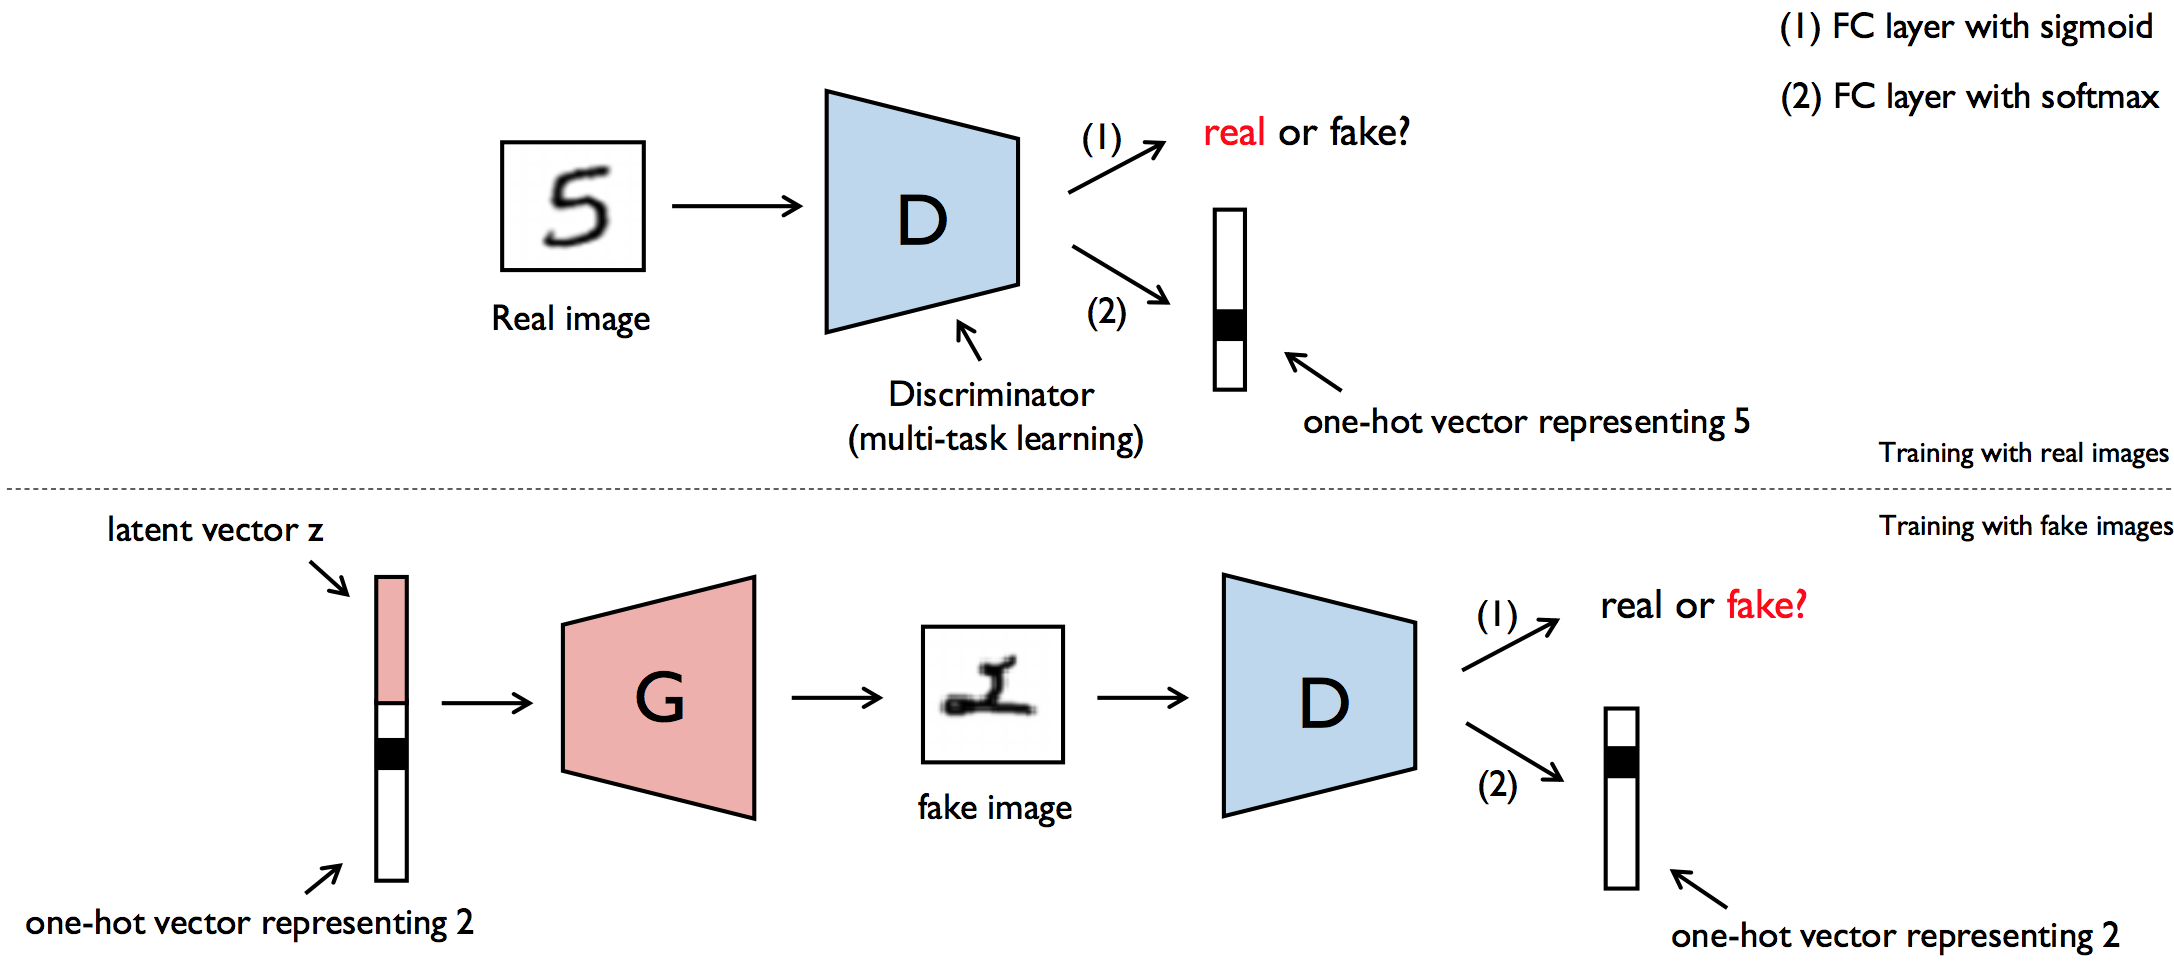

[Image Source Link ](https://stephan-osterburg.gitbook.io/coding/coding/ml-dl/tensorfow/chapter-4-conditional-generative-adversarial-network/acgan-architectural-design)

**Auxiliary Classifier Generative Adversarial Network** Model is  a extension of class-conditional GAN that requires that the discriminator to not only predict if the image is ‘real’ or ‘fake’ but also has to provide the ‘source’ or the ‘class label’ of the given image. 


Multi-input multi-output network:
   - Inputs: class embedding and noise vector
   - Outputs: binary classifier (fake/real images) and multi-class classifier (image classes)

## Examine and Understand Data

Using two datasets with same 29 subdirectories format. First dataset folder holds 3000 images and second dataset folder holds 30 images. 

In [1]:
print("Total Dataset 1 Images:", 3000*29)

Total Dataset 1 Images: 87000


In [2]:
ls  asl_alphabet_train/ 

A/       E/       I/       M/       Q/       U/       Y/       space/
B/       F/       J/       N/       R/       V/       Z/
C/       G/       K/       O/       S/       W/       del/
D/       H/       L/       P/       T/       X/       nothing/


In [3]:
print("Total Dataset 2 Images:", 30*29)

Total Dataset 2 Images: 870


In [4]:
ls asl_alphabet_sec/   

A/       E/       I/       M/       Q/       U/       Y/       space/
B/       F/       J/       N/       R/       V/       Z/
C/       G/       K/       O/       S/       W/       del/
D/       H/       L/       P/       T/       X/       nothing/


Importing helper functions to load the data with the format needed in the AC-GAN implementation:
- get_df: helps set a concat dataframe of both datasets directories
- get_image: given input shape and image path, returns image array
- load_data: sets dataset in normalized (X_train,y_train),(X_test,y_test) 

In [5]:
from prepdata import get_df, get_image, load_data

In [6]:
train_folder = "/Users/citlallylopez/Documents/SPRING2022/Project_1/data/asl_alphabet_train"

In [7]:
sec_folder = "/Users/citlallylopez/Documents/SPRING2022/Project_1/data/asl_alphabet_sec"

In [8]:
#input list of datasets paths to concat to one dframe - directory with same subdirs
df = get_df([train_folder,sec_folder])

In [9]:
df

path    label  code
0      /Users/citlallylopez/Documents/SPRING2022/Proj...        Y    24
1      /Users/citlallylopez/Documents/SPRING2022/Proj...  nothing    27
2      /Users/citlallylopez/Documents/SPRING2022/Proj...        C     2
3      /Users/citlallylopez/Documents/SPRING2022/Proj...        T    19
4      /Users/citlallylopez/Documents/SPRING2022/Proj...        X    23
...                                                  ...      ...   ...
87865  /Users/citlallylopez/Documents/SPRING2022/Proj...        C     2
87866  /Users/citlallylopez/Documents/SPRING2022/Proj...        U    20
87867  /Users/citlallylopez/Documents/SPRING2022/Proj...        A     0
87868  /Users/citlallylopez/Documents/SPRING2022/Proj...        Q    16
87869  /Users/citlallylopez/Documents/SPRING2022/Proj...        T    19

[87870 rows x 3 columns]

The dataframe is combined from both datasets with mixed index for images

In [10]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import PIL
import tensorflow as tf
from scipy.stats import norm


In [11]:
ex_datset_1= df["path"][21]
ex_datset_11= df["path"][2112]
ex_datset_1

'/Users/citlallylopez/Documents/SPRING2022/Project_1/data/asl_alphabet_train/W/W1527.jpg'

In [22]:
#df['path'].str.contains('asl_alphabet_sec') 
#-- line above shows which rows have paths from second dataset
ex_datset_2= df['path'][87858]
ex_datset_22= df['path'][87863]
ex_datset_2

'/Users/citlallylopez/Documents/SPRING2022/Project_1/data/asl_alphabet_sec/C/C0014_test.jpg'

Text(0.5, 1.0, '2nd Dataset EX Image')

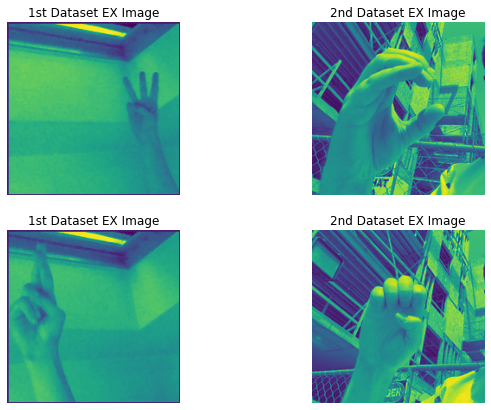

In [23]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
shape= (200,200)
example_1 = get_image(ex_datset_1, shape)
example_2 = get_image(ex_datset_2, shape)
example_3 = get_image(ex_datset_11, shape)
example_4 = get_image(ex_datset_22, shape)
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(example_1 )
plt.axis('off')
plt.title("1st Dataset EX Image")
  

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(example_2)
plt.axis('off')
plt.title("2nd Dataset EX Image")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(example_3)
plt.axis('off')
plt.title("1st Dataset EX Image")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(example_4)
plt.axis('off')
plt.title("2nd Dataset EX Image")

Images above show how images obtained from second dataset have more background noise

In [24]:
# Classes counts
print("Classes counts")
counts = df.iloc[:,1].value_counts().sort_index()
print(counts.head(counts.shape[0]))
print(f"\n\nDataset size = {counts.sum()} samples")

Classes counts
A          3030
B          3030
C          3030
D          3030
E          3030
F          3030
G          3030
H          3030
I          3030
J          3030
K          3030
L          3030
M          3030
N          3030
O          3030
P          3030
Q          3030
R          3030
S          3030
T          3030
U          3030
V          3030
W          3030
X          3030
Y          3030
Z          3030
del        3030
nothing    3030
space      3030
Name: label, dtype: int64


Dataset size = 87870 samples


We can see how the count of images per class is 3030 (3000 from first dataset and 30 from second dataset).

## Loading and Normalizing Data

In [25]:
#input dimensions
input_rows = 28
input_cols = 28
input_channels = 1

In [26]:
#loading normalized data for model
(x_train,y_train),(x_test,y_test) = load_data(df, input_rows, input_cols,input_channels)

In [27]:
x_train.shape, x_train[0].shape, y_train.shape

((70296, 28, 28, 1), (28, 28, 1), (70296,))

In [28]:
x_test.shape, x_test[0].shape

((17574, 28, 28, 1), (28, 28, 1))

In [29]:
#total images
70296+17574

87870

In [30]:
y_train

array([24, 27, 23, ..., 19, 10, 21], dtype=int8)

In [31]:
y_test

array([ 1, 23, 11, ..., 21, 12,  2], dtype=int8)

Below is an example image of loaded data with new dimmensions given.

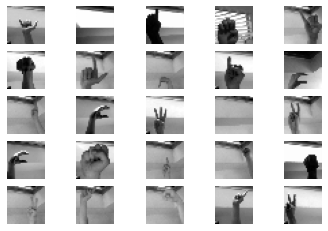

In [32]:
# plot images from the training dataset
for i in range(25):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(x_train[i], cmap='gray')
plt.show()


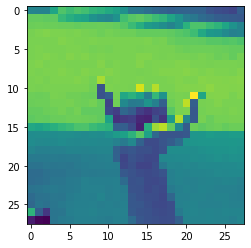

In [33]:
plt.imshow(x_train[0])

## Build ACGAN Model

PLAN: Auxiliary Classifier Generative Adversarial Network Model
- Generator Model:
    - Input: Random point from the latent space, and the class label.
    - Output: Generated image.
- Discriminator Model:
    - Input: Image (real images and generated images)
    - Output: Probability that the provided image is real, probability of the image belonging to each known class.

In [34]:
from acganmodel import define_discriminator, define_generator, define_gan

In [35]:
# size of the latent space
latent_dim = 100
#number of letter 
n_classes=29
# image shape
in_shape=(28,28,1)

In [36]:
# create the discriminator
dis = define_discriminator(in_shape, n_classes)
# create the generator
gen = define_generator(latent_dim, n_classes)
# create the gan
gan_model = define_gan(gen, dis)
# load image data
dataset = [x_train, y_train]

2022-04-15 20:07:11.695090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-15 20:07:11.695238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


/Users/citlallylopez/miniforge3/envs/mbp/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Tensorflow-metal PluggableDevice was installed to accelerate training with Metal on Mac GPUs.

## Train Model

Import training helper functions for ACGAN model:

In [37]:
from trainhelpers import generate_real_samples, generate_latent_points, generate_fake_samples, summarize_performance

Training:

In [ ]:
#if training before, input old history
with open('asl_acgan_history.pkl', 'rb') as f:
    prev_hist = pickle.load(f)

In [38]:
from collections import defaultdict

In [169]:
#100 epochs
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=64):
    # calculate the number of batches per training epoch
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    
    #progress_bar = utils.Progbar(target= bat_per_epo) - ignore
    
    #set a loss history for generator and discriminator
    hist={}
    
    gen_aux_loss = []
    gen_img_loss = []
    
    disc_aux_realex_loss = []
    disc_img_realex_loss = []
    
    disc_aux_fakeex_loss = []
    disc_img_fakeex_loss = []
    
    epoch_i=0
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # calculate the size of half a batch of samples
    half_batch = int(n_batch / 2)
    
    # manually enumerate epochs
    for i in range(n_steps):
        start = time.time()
        
        
        ### TRAIN DISCRIMINATOR ###
        
        # get randomly selected 'real' samples
        [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
        
        # update discriminator model weights
        _,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])
        
        disc_img_realex_loss.append(d_r1)
        disc_aux_realex_loss.append(d_r2)
        
        # generate 'fake' examples
        [X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        
        # update discriminator model weights
        _,d_f1,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])
        
        disc_img_fakeex_loss.append(d_f1)
        disc_aux_fakeex_loss.append(d_f2)
        
        
        # prepare points in latent space as input for the generator
        [z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
        
        # create inverted labels for the fake samples
        y_gan = np.ones((n_batch, 1))
        
        # update the generator via the discriminator's error
        _,g_1,g_2,_1,_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
        
        gen_img_loss.append(g_1)
        gen_aux_loss.append(g_2)
        
        # summarize loss on this batch
        print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_r1,d_r2, d_f1,d_f2, g_1,g_2))
        
        # evaluate the model performance every 'epoch'
        if (i+1) % bat_per_epo == 0:
            #progress_bar.update(epoch_i)
            epoch_i+= 1
            print('Done with EPOCH',(epoch_i),'Last step took',np.round(time.time()-start,1),'sec')
            summarize_performance(i, g_model, latent_dim)
    
    hist["dr_img_loss"] = disc_img_realex_loss
    hist["dr_aux_loss"] = disc_aux_realex_loss
    hist["df_img_loss"] = disc_img_fakeex_loss
    hist["df_aux_loss"] = disc_aux_fakeex_loss
    hist["g_img_loss"] = gen_img_loss
    hist["g_aux_loss"] = gen_aux_loss
     
    
    return hist
    # Save train  loss history - changes previous history if trained before
    #pickle.dump(hist, open('prev_history.pkl', 'wb')) 
        
            

## Evaluate Losses

Discriminator loss: Ideally the full discriminator's loss should be around 0.5 for one instance, which would mean the discriminator is GUESSING whether the image is real or fake (e.g. the same as coin toss: you try to guess is it a tail or a head).

Generator loss: Ultimately it should decrease over the next epoch (important: we should choose the optimal number of epoch so as not to overfit our a neural network).

- Two networks play an adversarial game
- generator learns to produce more and more realistic samples
- discriminator learns to get better and better at distinguishing generated data from real data.

1st attempt:
- Trained model for 15 epochs. 
- Model took about 40 minutes to train.
    

format: n[ real/fake loss, class loss], n=dr,df,and g

In [109]:
# train model -- old training (15 Epochs)
#logs saved under "acgan_logs"
hist = train(gen, dis, gan_model, dataset, latent_dim)

>1, dr[0.861,4.500], df[1.295,4.546], g[0.819,4.211]
>2, dr[0.653,4.272], df[0.947,4.169], g[1.245,4.157]
>3, dr[0.764,4.156], df[0.829,4.127], g[1.183,4.273]
>4, dr[0.618,4.479], df[0.751,4.339], g[1.397,4.215]
>5, dr[0.728,3.879], df[0.752,4.329], g[1.256,4.192]
>6, dr[0.539,3.693], df[0.562,4.537], g[1.721,4.030]
>7, dr[0.706,4.423], df[0.737,4.021], g[1.564,4.131]
>8, dr[0.764,4.020], df[0.582,3.794], g[1.442,4.186]
>9, dr[0.700,4.118], df[0.714,4.641], g[1.373,4.132]
>10, dr[0.554,3.886], df[0.615,4.237], g[1.220,4.387]
>11, dr[0.547,4.279], df[0.625,4.355], g[1.618,3.874]
>12, dr[0.834,3.932], df[0.499,4.409], g[1.512,4.079]
>13, dr[0.646,4.480], df[0.452,4.266], g[1.526,4.111]
>14, dr[0.717,4.098], df[0.314,4.019], g[1.558,4.351]
>15, dr[0.624,3.785], df[0.466,4.184], g[1.403,4.079]
>16, dr[0.660,4.167], df[0.353,3.811], g[1.470,4.311]
>17, dr[0.549,3.974], df[0.416,4.304], g[1.517,4.303]
>18, dr[0.298,4.286], df[0.405,4.504], g[1.590,4.436]
>19, dr[0.423,4.557], df[0.264,4.691]

>153, dr[0.280,4.124], df[0.127,4.185], g[0.849,4.170]
>154, dr[0.234,3.864], df[0.282,4.206], g[0.795,4.187]
>155, dr[0.427,3.351], df[0.256,4.429], g[0.668,3.908]
>156, dr[0.253,3.668], df[0.137,4.238], g[0.800,4.314]
>157, dr[0.180,3.476], df[0.247,4.100], g[1.009,4.426]
>158, dr[0.410,3.699], df[0.270,4.108], g[0.925,4.017]
>159, dr[0.317,3.661], df[0.159,4.309], g[0.616,4.058]
>160, dr[0.138,3.350], df[0.184,3.664], g[0.919,4.289]
>161, dr[0.231,3.536], df[0.491,3.921], g[0.981,4.188]
>162, dr[0.272,3.511], df[0.087,4.192], g[1.167,4.515]
>163, dr[0.212,3.322], df[0.190,4.091], g[0.981,4.021]
>164, dr[0.312,3.718], df[0.101,3.976], g[0.836,4.055]
>165, dr[0.175,3.827], df[0.197,4.153], g[0.782,4.181]
>166, dr[0.042,3.321], df[0.118,4.190], g[0.969,3.945]
>167, dr[0.163,3.657], df[0.165,4.001], g[1.521,4.191]
>168, dr[0.607,3.385], df[0.228,4.193], g[0.918,4.479]
>169, dr[0.304,3.312], df[0.209,4.521], g[0.928,4.311]
>170, dr[0.563,3.416], df[0.299,3.783], g[0.723,4.309]
>171, dr[0

>303, dr[0.300,3.218], df[0.564,2.956], g[1.473,2.631]
>304, dr[0.441,3.262], df[0.362,2.788], g[1.069,2.707]
>305, dr[0.744,3.375], df[0.493,2.505], g[1.110,2.842]
>306, dr[0.333,3.299], df[0.505,2.597], g[1.189,2.425]
>307, dr[0.294,3.252], df[0.551,2.975], g[1.005,2.502]
>308, dr[0.663,3.501], df[0.515,2.493], g[1.242,2.676]
>309, dr[0.407,3.004], df[0.441,2.739], g[1.058,2.922]
>310, dr[0.538,3.194], df[0.507,2.543], g[0.929,2.505]
>311, dr[0.333,3.704], df[0.390,2.150], g[0.973,2.660]
>312, dr[0.416,3.262], df[0.455,2.574], g[1.041,2.812]
>313, dr[0.403,2.788], df[0.403,2.516], g[1.191,2.598]
>314, dr[0.433,3.457], df[0.362,2.597], g[1.013,2.433]
>315, dr[0.479,2.770], df[0.489,2.317], g[1.216,2.690]
>316, dr[0.587,3.133], df[0.486,2.857], g[1.076,2.888]
>317, dr[0.645,2.998], df[0.415,2.520], g[1.099,2.727]
>318, dr[0.351,3.512], df[0.459,2.359], g[1.081,2.435]
>319, dr[0.327,2.401], df[0.480,2.461], g[1.254,2.545]
>320, dr[0.539,3.097], df[0.457,2.416], g[1.414,2.317]
>321, dr[0

>452, dr[0.389,2.769], df[0.127,1.157], g[2.282,0.989]
>453, dr[0.246,2.894], df[0.210,1.161], g[2.328,0.878]
>454, dr[0.345,2.853], df[0.127,0.995], g[1.464,1.105]
>455, dr[0.185,3.047], df[0.357,0.783], g[1.589,1.022]
>456, dr[0.208,2.886], df[0.294,0.912], g[1.781,1.023]
>457, dr[0.368,3.299], df[0.122,0.987], g[2.039,0.995]
>458, dr[0.270,2.564], df[0.114,0.888], g[2.400,1.058]
>459, dr[0.194,2.670], df[0.080,1.183], g[2.663,0.935]
>460, dr[0.218,2.903], df[0.177,1.174], g[1.805,1.000]
>461, dr[0.150,3.070], df[0.221,0.905], g[1.195,0.915]
>462, dr[0.139,3.455], df[0.273,0.808], g[1.756,0.956]
>463, dr[0.293,2.543], df[0.114,1.152], g[1.779,0.984]
>464, dr[0.204,2.693], df[0.258,0.817], g[1.794,1.221]
>465, dr[0.148,2.664], df[0.244,0.978], g[1.523,1.034]
>466, dr[0.228,3.034], df[0.208,1.303], g[1.801,1.188]
>467, dr[0.269,3.302], df[0.193,0.953], g[2.034,1.056]
>468, dr[0.205,2.859], df[0.171,0.825], g[2.292,0.707]
>469, dr[0.218,3.177], df[0.130,0.825], g[1.973,1.122]
>470, dr[0

>601, dr[0.147,2.571], df[0.049,0.454], g[2.345,0.509]
>602, dr[0.490,3.134], df[0.174,0.594], g[2.044,0.445]
>603, dr[0.179,3.058], df[0.264,0.403], g[2.041,0.476]
>604, dr[0.168,3.083], df[0.506,0.481], g[2.690,0.456]
>605, dr[0.279,3.193], df[0.151,0.599], g[2.742,0.559]
>606, dr[0.229,2.769], df[0.068,0.513], g[2.630,0.532]
>607, dr[0.993,3.494], df[0.362,0.665], g[1.276,0.516]
>608, dr[0.070,2.955], df[0.318,0.671], g[1.951,0.543]
>609, dr[0.171,2.260], df[0.142,0.345], g[2.480,0.548]
>610, dr[0.194,2.924], df[0.327,0.424], g[2.490,0.381]
>611, dr[0.439,3.064], df[0.209,0.372], g[2.164,0.356]
>612, dr[0.220,2.404], df[0.361,0.371], g[2.588,0.467]
>613, dr[0.678,2.647], df[0.182,0.471], g[1.587,0.508]
>614, dr[0.191,3.120], df[0.421,0.535], g[1.583,0.462]
>615, dr[0.173,2.572], df[0.367,0.389], g[2.301,0.472]
>616, dr[0.344,2.882], df[0.097,0.691], g[2.263,0.462]
>617, dr[0.461,2.726], df[0.377,0.525], g[1.787,0.562]
>618, dr[0.206,3.278], df[0.154,0.371], g[1.455,0.484]
>619, dr[0

>751, dr[0.190,2.349], df[0.203,0.436], g[2.674,0.550]
>752, dr[0.142,2.652], df[0.422,0.627], g[2.849,0.553]
>753, dr[0.118,2.565], df[0.034,0.552], g[3.602,0.621]
>754, dr[0.227,2.426], df[0.095,0.411], g[2.998,0.431]
>755, dr[0.146,2.790], df[0.186,0.277], g[2.598,0.385]
>756, dr[0.080,2.379], df[0.068,0.360], g[2.088,0.426]
>757, dr[0.285,2.794], df[0.296,0.361], g[2.343,0.319]
>758, dr[0.103,2.925], df[0.094,0.360], g[2.572,0.441]
>759, dr[0.303,2.308], df[0.328,0.442], g[2.188,0.509]
>760, dr[0.141,2.495], df[0.190,0.313], g[2.203,0.466]
>761, dr[0.161,2.195], df[0.189,0.392], g[2.558,0.360]
>762, dr[0.213,2.703], df[0.230,0.411], g[2.297,0.400]
>763, dr[0.371,3.139], df[0.250,0.299], g[2.248,0.533]
>764, dr[0.440,2.435], df[0.330,0.519], g[1.782,0.616]
>765, dr[0.134,2.613], df[0.224,0.417], g[1.742,0.435]
>766, dr[0.183,3.263], df[0.226,0.295], g[2.254,0.623]
>767, dr[0.170,2.917], df[0.282,0.467], g[2.630,0.346]
>768, dr[0.148,3.348], df[0.209,0.505], g[2.915,0.408]
>769, dr[0

>901, dr[0.484,2.157], df[0.298,0.227], g[1.851,0.355]
>902, dr[0.128,2.527], df[0.533,0.470], g[1.951,0.541]
>903, dr[0.406,2.324], df[0.161,0.176], g[2.162,0.377]
>904, dr[0.223,2.318], df[0.124,0.248], g[2.006,0.400]
>905, dr[0.344,3.372], df[0.278,0.391], g[1.878,0.230]
>906, dr[0.265,2.381], df[0.350,0.402], g[2.386,0.302]
>907, dr[0.267,2.414], df[0.376,0.184], g[2.748,0.320]
>908, dr[0.500,2.546], df[0.154,0.218], g[1.712,0.332]
>909, dr[0.312,2.583], df[0.428,0.400], g[1.854,0.311]
>910, dr[0.157,2.546], df[0.525,0.523], g[3.183,0.343]
>911, dr[0.314,2.536], df[0.075,0.235], g[2.556,0.351]
>912, dr[0.376,3.027], df[0.110,0.270], g[1.835,0.383]
>913, dr[0.249,3.025], df[0.331,0.260], g[1.282,0.557]
>914, dr[0.128,2.392], df[0.136,0.318], g[2.137,0.354]
>915, dr[0.074,2.179], df[0.153,0.265], g[1.892,0.353]
>916, dr[0.251,3.133], df[0.574,0.323], g[2.580,0.336]
>917, dr[0.322,2.891], df[0.034,0.376], g[3.046,0.390]
>918, dr[0.415,2.137], df[0.393,0.208], g[2.488,0.227]
>919, dr[0

>1051, dr[0.157,2.363], df[0.512,0.155], g[2.841,0.405]
>1052, dr[0.245,2.249], df[0.251,0.246], g[2.028,0.356]
>1053, dr[0.380,3.132], df[0.108,0.296], g[1.244,0.338]
>1054, dr[0.169,2.788], df[0.375,0.383], g[2.153,0.301]
>1055, dr[0.185,2.695], df[0.290,0.514], g[1.664,0.213]
>1056, dr[0.186,2.259], df[0.267,0.140], g[2.931,0.377]
>1057, dr[0.349,2.209], df[0.269,0.336], g[2.207,0.255]
>1058, dr[0.208,2.439], df[0.111,0.129], g[1.124,0.556]
>1059, dr[0.158,2.818], df[0.376,0.155], g[2.363,0.344]
>1060, dr[0.318,2.353], df[0.144,0.189], g[2.247,0.390]
>1061, dr[0.455,2.548], df[0.326,0.245], g[1.781,0.242]
>1062, dr[0.203,2.405], df[0.369,0.274], g[0.898,0.431]
>1063, dr[0.175,2.559], df[0.480,0.260], g[2.596,0.305]
>1064, dr[0.327,1.977], df[0.307,0.230], g[2.188,0.222]
>1065, dr[0.393,2.595], df[0.267,0.166], g[1.779,0.218]
>1066, dr[0.188,2.540], df[0.155,0.171], g[1.952,0.235]
>1067, dr[0.270,2.546], df[1.096,0.262], g[2.798,0.343]
>1068, dr[0.614,2.193], df[0.228,0.229], g[2.760

2022-04-04 01:58:55.015325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


>Saved: acgan_logs/generated_plot_1087.png and acgan_logs/model_1087.h5
>1088, dr[0.346,2.725], df[0.303,0.248], g[1.831,0.405]
>1089, dr[0.226,2.441], df[0.193,0.260], g[2.259,0.420]
>1090, dr[0.239,1.983], df[0.412,0.323], g[2.037,0.356]
>1091, dr[0.346,2.275], df[0.233,0.351], g[1.670,0.332]
>1092, dr[0.190,2.749], df[0.309,0.204], g[2.018,0.244]
>1093, dr[0.538,3.009], df[0.194,0.304], g[1.461,0.307]
>1094, dr[0.296,2.542], df[0.499,0.186], g[1.680,0.284]
>1095, dr[0.141,2.131], df[0.502,0.244], g[3.014,0.264]
>1096, dr[0.367,2.352], df[0.075,0.277], g[3.025,0.360]
>1097, dr[0.382,2.362], df[0.727,0.324], g[3.319,0.406]
>1098, dr[0.506,3.087], df[0.130,0.081], g[2.138,0.254]
>1099, dr[0.151,2.423], df[0.319,0.351], g[2.295,0.230]
>1100, dr[0.205,1.796], df[0.122,0.414], g[2.810,0.267]
>1101, dr[0.234,2.532], df[0.166,0.239], g[2.202,0.194]
>1102, dr[0.083,2.298], df[0.231,0.216], g[2.100,0.390]
>1103, dr[0.255,2.539], df[0.185,0.303], g[1.905,0.509]
>1104, dr[0.253,2.416], df[0.254

>1230, dr[0.366,2.066], df[0.189,0.204], g[2.053,0.486]
>1231, dr[0.193,2.215], df[0.374,0.307], g[2.563,0.446]
>1232, dr[0.203,2.476], df[0.177,0.262], g[2.926,0.304]
>1233, dr[0.270,2.540], df[0.140,0.259], g[2.535,0.426]
>1234, dr[0.141,2.597], df[0.338,0.177], g[3.400,0.350]
>1235, dr[0.286,3.063], df[0.106,0.149], g[2.251,0.337]
>1236, dr[0.145,1.785], df[0.472,0.189], g[2.861,0.406]
>1237, dr[0.473,1.887], df[0.096,0.255], g[2.985,0.408]
>1238, dr[0.170,2.727], df[0.370,0.212], g[2.408,0.374]
>1239, dr[0.161,2.097], df[0.154,0.356], g[2.302,0.593]
>1240, dr[0.136,2.669], df[0.187,0.429], g[2.996,0.508]
>1241, dr[0.265,2.132], df[0.229,0.347], g[2.969,0.250]
>1242, dr[0.138,2.592], df[0.086,0.148], g[3.141,0.622]
>1243, dr[0.137,1.834], df[0.088,0.246], g[2.958,0.379]
>1244, dr[0.328,2.267], df[0.205,0.156], g[2.257,0.446]
>1245, dr[0.294,2.435], df[0.349,0.107], g[2.720,0.560]
>1246, dr[0.200,3.088], df[0.234,0.211], g[3.445,0.316]
>1247, dr[0.122,2.289], df[0.216,0.195], g[3.171

>1378, dr[0.294,2.428], df[0.438,0.264], g[2.952,0.351]
>1379, dr[0.448,2.448], df[0.261,0.365], g[2.359,0.361]
>1380, dr[0.259,2.302], df[0.347,0.243], g[2.291,0.218]
>1381, dr[0.260,1.859], df[0.123,0.148], g[2.536,0.171]
>1382, dr[0.484,2.476], df[0.226,0.255], g[1.925,0.210]
>1383, dr[0.141,1.906], df[0.725,0.250], g[2.791,0.282]
>1384, dr[0.252,2.163], df[0.110,0.255], g[3.288,0.286]
>1385, dr[0.607,2.082], df[0.199,0.202], g[2.326,0.285]
>1386, dr[0.311,2.597], df[0.302,0.371], g[2.427,0.266]
>1387, dr[0.201,2.154], df[0.405,0.138], g[2.354,0.319]
>1388, dr[0.307,2.459], df[0.386,0.267], g[2.673,0.418]
>1389, dr[0.205,2.075], df[0.115,0.281], g[2.947,0.286]
>1390, dr[0.234,2.010], df[0.194,0.205], g[3.479,0.321]
>1391, dr[0.601,2.268], df[0.178,0.155], g[2.524,0.321]
>1392, dr[0.256,2.341], df[0.613,0.405], g[1.880,0.196]
>1393, dr[0.333,1.871], df[0.531,0.382], g[3.394,0.146]
>1394, dr[0.136,2.460], df[0.163,0.172], g[3.736,0.144]
>1395, dr[0.542,1.900], df[0.103,0.415], g[2.440

>1526, dr[0.156,2.118], df[0.218,0.099], g[2.899,0.273]
>1527, dr[0.390,1.535], df[0.391,0.200], g[2.020,0.258]
>1528, dr[0.226,2.771], df[0.291,0.169], g[3.366,0.178]
>1529, dr[0.271,1.933], df[0.057,0.187], g[3.666,0.090]
>1530, dr[0.149,2.756], df[0.159,0.196], g[4.098,0.263]
>1531, dr[0.204,1.980], df[0.239,0.159], g[2.727,0.288]
>1532, dr[0.211,2.294], df[0.678,0.346], g[3.136,0.344]
>1533, dr[0.292,2.339], df[0.315,0.318], g[3.255,0.271]
>1534, dr[0.313,2.211], df[0.217,0.307], g[3.804,0.212]
>1535, dr[0.234,2.671], df[0.074,0.297], g[4.196,0.288]
>1536, dr[0.237,2.126], df[0.343,0.177], g[2.297,0.233]
>1537, dr[0.197,2.096], df[0.539,0.294], g[2.960,0.187]
>1538, dr[0.364,2.236], df[0.074,0.135], g[2.667,0.244]
>1539, dr[0.342,1.624], df[0.409,0.260], g[2.897,0.273]
>1540, dr[0.149,1.870], df[0.236,0.162], g[2.815,0.223]
>1541, dr[0.276,1.763], df[0.300,0.400], g[3.238,0.208]
>1542, dr[0.502,2.295], df[0.292,0.163], g[2.381,0.264]
>1543, dr[0.225,1.913], df[0.569,0.289], g[2.893

>1674, dr[0.280,1.815], df[0.223,0.309], g[4.385,0.206]
>1675, dr[0.321,2.105], df[0.309,0.221], g[3.648,0.163]
>1676, dr[0.281,1.747], df[0.079,0.130], g[2.728,0.168]
>1677, dr[0.121,2.073], df[0.255,0.261], g[2.352,0.209]
>1678, dr[0.195,2.025], df[0.340,0.206], g[2.658,0.238]
>1679, dr[0.205,1.952], df[0.194,0.158], g[2.622,0.284]
>1680, dr[0.247,1.839], df[0.374,0.335], g[3.149,0.149]
>1681, dr[0.383,1.521], df[0.142,0.197], g[2.866,0.387]
>1682, dr[0.251,2.329], df[0.206,0.191], g[2.802,0.196]
>1683, dr[0.190,2.307], df[0.568,0.293], g[2.535,0.382]
>1684, dr[0.184,2.119], df[0.149,0.178], g[3.392,0.167]
>1685, dr[0.349,1.612], df[0.231,0.113], g[2.876,0.132]
>1686, dr[0.240,1.843], df[0.275,0.148], g[2.866,0.219]
>1687, dr[0.182,1.981], df[0.307,0.184], g[2.471,0.268]
>1688, dr[0.186,1.754], df[0.233,0.271], g[2.713,0.270]
>1689, dr[0.343,2.132], df[0.321,0.188], g[3.141,0.245]
>1690, dr[0.373,2.170], df[0.208,0.197], g[3.223,0.210]
>1691, dr[0.184,1.581], df[0.304,0.333], g[3.564

>1822, dr[0.119,2.159], df[0.239,0.278], g[2.773,0.287]
>1823, dr[0.765,1.827], df[0.121,0.425], g[2.204,0.128]
>1824, dr[0.015,2.244], df[0.212,0.162], g[1.951,0.206]
>1825, dr[0.048,2.078], df[0.332,0.230], g[2.397,0.142]
>1826, dr[0.328,1.664], df[0.306,0.191], g[2.979,0.143]
>1827, dr[0.098,1.752], df[0.094,0.068], g[3.420,0.152]
>1828, dr[0.520,1.751], df[0.125,0.110], g[2.714,0.119]
>1829, dr[0.206,2.084], df[0.339,0.147], g[2.091,0.136]
>1830, dr[0.128,2.367], df[0.395,0.227], g[3.520,0.245]
>1831, dr[0.217,1.795], df[0.092,0.167], g[2.440,0.221]
>1832, dr[0.220,2.017], df[0.186,0.117], g[2.276,0.232]
>1833, dr[0.200,1.820], df[0.207,0.241], g[2.669,0.185]
>1834, dr[0.167,1.384], df[0.094,0.260], g[2.989,0.086]
>1835, dr[0.387,1.305], df[0.314,0.124], g[2.276,0.285]
>1836, dr[0.130,2.232], df[0.335,0.135], g[2.351,0.327]
>1837, dr[0.215,1.918], df[0.347,0.209], g[3.081,0.220]
>1838, dr[0.388,2.109], df[0.122,0.262], g[2.962,0.185]
>1839, dr[0.333,1.964], df[0.433,0.363], g[3.139

>1969, dr[0.175,1.998], df[0.322,0.261], g[2.710,0.303]
>1970, dr[0.118,1.972], df[0.270,0.341], g[2.560,0.188]
>1971, dr[0.166,1.893], df[0.292,0.264], g[3.719,0.190]
>1972, dr[0.431,1.414], df[0.274,0.102], g[3.447,0.166]
>1973, dr[0.569,2.028], df[0.203,0.335], g[2.137,0.336]
>1974, dr[0.070,1.962], df[0.544,0.334], g[3.315,0.149]
>1975, dr[0.502,2.017], df[0.126,0.081], g[3.620,0.233]
>1976, dr[0.114,2.071], df[0.265,0.131], g[3.491,0.245]
>1977, dr[0.196,2.170], df[0.095,0.154], g[2.942,0.207]
>1978, dr[0.260,1.896], df[0.201,0.440], g[2.804,0.173]
>1979, dr[0.138,1.819], df[0.256,0.279], g[3.176,0.272]
>1980, dr[0.240,2.130], df[0.252,0.117], g[3.378,0.280]
>1981, dr[0.269,2.294], df[0.376,0.567], g[2.923,0.221]
>1982, dr[0.301,1.512], df[0.187,0.236], g[2.940,0.227]
>1983, dr[0.307,1.900], df[0.251,0.201], g[2.315,0.223]
>1984, dr[0.152,1.856], df[0.268,0.161], g[2.843,0.241]
>1985, dr[0.298,1.379], df[0.616,0.233], g[3.454,0.272]
>1986, dr[0.562,2.180], df[0.078,0.318], g[2.965

>2117, dr[0.187,2.404], df[0.347,0.109], g[3.335,0.256]
>2118, dr[0.306,2.049], df[0.604,0.432], g[3.518,0.105]
>2119, dr[0.342,2.570], df[0.147,0.115], g[3.798,0.199]
>2120, dr[0.281,1.998], df[0.265,0.203], g[3.055,0.231]
>2121, dr[0.268,1.665], df[0.252,0.268], g[2.443,0.169]
>2122, dr[0.243,1.514], df[0.245,0.127], g[3.074,0.279]
>2123, dr[0.196,1.782], df[0.332,0.130], g[3.178,0.246]
>2124, dr[0.304,2.374], df[0.123,0.181], g[2.994,0.249]
>2125, dr[0.171,1.722], df[0.310,0.176], g[3.340,0.294]
>2126, dr[0.231,1.522], df[0.205,0.169], g[3.083,0.245]
>2127, dr[0.325,2.093], df[0.173,0.216], g[2.428,0.172]
>2128, dr[0.170,1.399], df[0.334,0.176], g[2.180,0.271]
>2129, dr[0.144,2.064], df[0.289,0.149], g[2.736,0.238]
>2130, dr[0.302,1.851], df[0.248,0.363], g[2.840,0.194]
>2131, dr[0.291,2.332], df[0.238,0.165], g[3.634,0.236]
>2132, dr[0.387,1.587], df[0.142,0.151], g[2.558,0.292]
>2133, dr[0.142,1.381], df[0.300,0.093], g[2.655,0.244]
>2134, dr[0.042,2.074], df[0.186,0.146], g[3.747

>2259, dr[0.169,1.999], df[0.194,0.167], g[2.928,0.214]
>2260, dr[0.403,2.068], df[0.180,0.222], g[2.977,0.232]
>2261, dr[0.175,1.876], df[0.211,0.239], g[2.315,0.181]
>2262, dr[0.136,1.757], df[0.278,0.253], g[2.516,0.329]
>2263, dr[0.359,1.764], df[0.283,0.421], g[3.079,0.146]
>2264, dr[0.233,1.375], df[0.321,0.166], g[2.570,0.219]
>2265, dr[0.181,1.947], df[0.231,0.186], g[2.768,0.237]
>2266, dr[0.210,1.245], df[0.254,0.235], g[3.370,0.147]
>2267, dr[0.302,1.554], df[0.380,0.148], g[3.412,0.184]
>2268, dr[0.490,1.724], df[0.319,0.166], g[3.415,0.218]
>2269, dr[0.229,1.426], df[0.378,0.175], g[2.985,0.182]
>2270, dr[0.388,1.460], df[0.382,0.248], g[3.235,0.159]
>2271, dr[0.223,1.891], df[0.283,0.090], g[2.833,0.141]
>2272, dr[0.237,1.418], df[0.142,0.157], g[3.634,0.215]
>2273, dr[0.214,1.845], df[0.133,0.227], g[2.751,0.174]
>2274, dr[0.130,1.848], df[0.435,0.106], g[3.009,0.080]
>2275, dr[0.202,1.653], df[0.098,0.208], g[2.895,0.205]
>2276, dr[0.203,1.754], df[0.309,0.186], g[2.157

>2406, dr[0.108,1.829], df[0.241,0.127], g[1.965,0.216]
>2407, dr[0.092,1.295], df[0.331,0.182], g[2.963,0.134]
>2408, dr[0.450,1.961], df[0.239,0.444], g[2.846,0.111]
>2409, dr[0.373,1.972], df[0.144,0.116], g[2.800,0.220]
>2410, dr[0.171,1.732], df[0.265,0.246], g[3.134,0.196]
>2411, dr[0.175,1.825], df[0.224,0.125], g[3.330,0.411]
>2412, dr[0.155,2.016], df[0.106,0.089], g[2.650,0.237]
>2413, dr[0.329,1.645], df[0.176,0.382], g[3.129,0.236]
>2414, dr[0.159,1.572], df[0.435,0.158], g[2.627,0.284]
>2415, dr[0.191,1.584], df[0.392,0.039], g[3.296,0.235]
>2416, dr[0.146,1.859], df[0.068,0.242], g[2.638,0.247]
>2417, dr[0.256,1.745], df[0.118,0.193], g[2.287,0.275]
>2418, dr[0.287,2.132], df[0.210,0.210], g[1.850,0.195]
>2419, dr[0.125,1.493], df[0.293,0.161], g[2.445,0.248]
>2420, dr[0.222,1.635], df[0.193,0.398], g[2.812,0.179]
>2421, dr[0.205,1.689], df[0.192,0.165], g[3.388,0.145]
>2422, dr[0.242,1.854], df[0.217,0.477], g[2.951,0.124]
>2423, dr[0.181,1.728], df[0.252,0.122], g[3.298

>2554, dr[0.427,1.353], df[0.089,0.191], g[2.122,0.188]
>2555, dr[0.213,1.912], df[0.248,0.136], g[2.218,0.220]
>2556, dr[0.295,2.213], df[0.588,0.226], g[3.045,0.086]
>2557, dr[0.479,1.416], df[0.138,0.148], g[2.944,0.191]
>2558, dr[0.172,1.714], df[0.185,0.134], g[3.105,0.182]
>2559, dr[0.196,2.037], df[0.223,0.170], g[2.515,0.206]
>2560, dr[0.158,1.606], df[0.285,0.101], g[2.824,0.170]
>2561, dr[0.127,1.452], df[0.090,0.108], g[2.725,0.137]
>2562, dr[0.162,1.947], df[0.190,0.107], g[3.383,0.227]
>2563, dr[0.263,1.342], df[0.245,0.148], g[2.807,0.204]
>2564, dr[0.081,1.330], df[0.189,0.196], g[2.651,0.328]
>2565, dr[0.244,1.330], df[0.304,0.140], g[3.461,0.151]
>2566, dr[0.253,1.950], df[0.199,0.292], g[2.922,0.121]
>2567, dr[0.184,1.541], df[0.248,0.235], g[3.325,0.301]
>2568, dr[0.060,2.368], df[0.153,0.367], g[2.441,0.243]
>2569, dr[0.161,1.315], df[0.113,0.117], g[2.361,0.296]
>2570, dr[0.208,1.838], df[0.395,0.199], g[2.940,0.228]
>2571, dr[0.442,1.628], df[0.180,0.183], g[2.985

>2702, dr[0.291,1.506], df[0.079,0.103], g[2.144,0.215]
>2703, dr[0.150,1.591], df[0.291,0.120], g[2.093,0.242]
>2704, dr[0.209,1.720], df[0.184,0.291], g[3.084,0.176]
>2705, dr[0.229,1.736], df[0.235,0.297], g[3.310,0.180]
>2706, dr[0.178,2.387], df[0.335,0.125], g[3.108,0.165]
>2707, dr[0.381,1.700], df[0.226,0.156], g[2.889,0.117]
>2708, dr[0.176,1.813], df[0.771,0.332], g[3.331,0.174]
>2709, dr[0.235,1.387], df[0.114,0.269], g[3.899,0.066]
>2710, dr[0.675,1.453], df[0.166,0.097], g[2.420,0.125]
>2711, dr[0.240,1.949], df[0.629,0.139], g[2.503,0.098]
>2712, dr[0.258,1.480], df[0.237,0.154], g[2.539,0.219]
>2713, dr[0.123,1.272], df[0.138,0.169], g[2.919,0.119]
>2714, dr[0.212,1.343], df[0.225,0.197], g[2.979,0.081]
>2715, dr[0.297,1.638], df[0.332,0.135], g[3.096,0.174]
>2716, dr[0.201,1.797], df[0.192,0.084], g[2.882,0.137]
>2717, dr[0.197,1.541], df[0.184,0.118], g[3.658,0.191]
>2718, dr[0.198,1.809], df[0.156,0.217], g[2.047,0.187]
>2719, dr[0.179,1.688], df[0.188,0.431], g[2.720

>2850, dr[0.170,1.735], df[0.485,0.151], g[2.390,0.216]
>2851, dr[0.310,2.031], df[0.314,0.148], g[3.338,0.162]
>2852, dr[0.338,2.649], df[0.264,0.280], g[2.558,0.261]
>2853, dr[0.223,1.407], df[0.311,0.155], g[2.873,0.128]
>2854, dr[0.160,1.581], df[0.107,0.163], g[2.933,0.180]
>2855, dr[0.136,2.289], df[0.191,0.090], g[3.964,0.246]
>2856, dr[0.193,1.500], df[0.278,0.094], g[2.599,0.129]
>2857, dr[0.219,2.154], df[0.117,0.117], g[2.754,0.173]
>2858, dr[0.197,1.755], df[0.146,0.216], g[1.827,0.186]
>2859, dr[0.141,2.067], df[0.298,0.098], g[2.841,0.228]
>2860, dr[0.343,2.355], df[0.576,0.201], g[3.786,0.149]
>2861, dr[0.197,2.265], df[0.090,0.142], g[3.606,0.082]
>2862, dr[0.569,1.335], df[0.294,0.083], g[3.008,0.283]
>2863, dr[0.127,1.809], df[0.281,0.107], g[3.063,0.095]
>2864, dr[0.116,1.877], df[0.256,0.424], g[3.121,0.156]
>2865, dr[0.268,1.332], df[0.285,0.187], g[3.027,0.240]
>2866, dr[0.316,1.467], df[0.386,0.176], g[2.678,0.203]
>2867, dr[0.211,1.792], df[0.328,0.122], g[4.194

>2997, dr[0.226,1.837], df[0.476,0.113], g[3.269,0.135]
>2998, dr[0.179,2.000], df[0.118,0.060], g[3.388,0.191]
>2999, dr[0.376,1.622], df[0.138,0.288], g[2.245,0.270]
>3000, dr[0.122,1.582], df[0.208,0.125], g[2.694,0.124]
>3001, dr[0.318,1.222], df[0.229,0.196], g[2.454,0.132]
>3002, dr[0.155,1.200], df[0.501,0.405], g[2.781,0.289]
>3003, dr[0.252,1.586], df[0.414,0.136], g[4.041,0.086]
>3004, dr[0.436,1.454], df[0.143,0.135], g[3.554,0.076]
>3005, dr[0.402,1.730], df[0.169,0.254], g[2.301,0.204]
>3006, dr[0.233,1.821], df[0.363,0.168], g[2.950,0.127]
>3007, dr[0.420,1.289], df[0.314,0.127], g[2.096,0.128]
>3008, dr[0.168,1.973], df[0.237,0.091], g[2.336,0.217]
>3009, dr[0.125,2.242], df[0.225,0.121], g[3.277,0.141]
>3010, dr[0.235,1.258], df[0.213,0.100], g[2.980,0.282]
>3011, dr[0.399,1.662], df[0.310,0.130], g[2.899,0.127]
>3012, dr[0.230,1.791], df[0.372,0.114], g[2.972,0.124]
>3013, dr[0.224,1.589], df[0.164,0.144], g[3.424,0.157]
>3014, dr[0.287,1.849], df[0.346,0.091], g[3.363

>3145, dr[0.241,1.333], df[0.228,0.104], g[2.383,0.161]
>3146, dr[0.181,1.774], df[0.326,0.224], g[2.858,0.166]
>3147, dr[0.409,1.516], df[0.214,0.100], g[2.321,0.213]
>3148, dr[0.203,1.569], df[0.343,0.353], g[2.622,0.120]
>3149, dr[0.195,1.669], df[0.174,0.168], g[2.452,0.085]
>3150, dr[0.133,1.533], df[0.160,0.123], g[2.487,0.181]
>3151, dr[0.295,1.598], df[0.391,0.096], g[3.073,0.234]
>3152, dr[0.163,1.514], df[0.453,0.376], g[3.367,0.197]
>3153, dr[0.437,1.539], df[0.197,0.258], g[3.179,0.098]
>3154, dr[0.307,1.603], df[0.120,0.153], g[2.996,0.149]
>3155, dr[0.368,1.936], df[0.286,0.176], g[2.742,0.189]
>3156, dr[0.149,2.203], df[0.317,0.315], g[2.513,0.152]
>3157, dr[0.351,1.631], df[0.455,0.242], g[3.357,0.183]
>3158, dr[0.274,1.670], df[0.221,0.134], g[3.061,0.161]
>3159, dr[0.200,1.855], df[0.189,0.161], g[3.434,0.157]
>3160, dr[0.434,2.194], df[0.383,0.197], g[2.576,0.102]
>3161, dr[0.301,2.020], df[0.124,0.128], g[1.964,0.190]
>3162, dr[0.188,1.299], df[0.508,0.148], g[2.736

>3287, dr[0.323,1.504], df[0.153,0.195], g[2.832,0.197]
>3288, dr[0.226,1.810], df[0.308,0.206], g[3.027,0.161]
>3289, dr[0.141,1.772], df[0.229,0.181], g[2.704,0.225]
>3290, dr[0.254,1.986], df[0.229,0.203], g[2.813,0.305]
>3291, dr[0.244,1.787], df[0.108,0.155], g[2.473,0.106]
>3292, dr[0.117,1.452], df[0.241,0.097], g[2.605,0.166]
>3293, dr[0.361,2.075], df[0.268,0.293], g[2.576,0.192]
>3294, dr[0.210,1.459], df[0.641,0.075], g[3.211,0.194]
>3295, dr[0.451,1.549], df[0.253,0.232], g[3.465,0.261]
>3296, dr[0.228,1.547], df[0.163,0.220], g[3.156,0.090]
>3297, dr[0.214,1.556], df[0.343,0.192], g[3.167,0.099]
>3298, dr[0.174,1.139], df[0.153,0.270], g[3.315,0.118]
>3299, dr[0.402,1.706], df[0.541,0.261], g[3.348,0.202]
>3300, dr[0.151,1.746], df[0.182,0.128], g[3.359,0.223]
>3301, dr[0.376,1.705], df[0.223,0.295], g[2.848,0.160]
>3302, dr[0.226,1.587], df[0.123,0.108], g[3.170,0.112]
>3303, dr[0.195,1.961], df[0.356,0.240], g[2.147,0.336]
>3304, dr[0.298,2.166], df[0.239,0.142], g[2.299

>3434, dr[0.165,1.399], df[0.167,0.327], g[2.270,0.237]
>3435, dr[0.195,1.683], df[0.212,0.389], g[1.896,0.203]
>3436, dr[0.310,1.257], df[0.492,0.084], g[1.981,0.203]
>3437, dr[0.239,1.154], df[0.424,0.127], g[3.549,0.220]
>3438, dr[0.235,1.563], df[0.074,0.174], g[2.802,0.104]
>3439, dr[0.444,1.652], df[0.331,0.186], g[2.341,0.208]
>3440, dr[0.179,1.605], df[0.519,0.201], g[2.989,0.175]
>3441, dr[0.221,1.802], df[0.276,0.165], g[3.513,0.194]
>3442, dr[0.406,0.977], df[0.065,0.154], g[2.451,0.390]
>3443, dr[0.302,1.751], df[0.395,0.132], g[2.174,0.098]
>3444, dr[0.105,1.975], df[0.232,0.165], g[2.765,0.162]
>3445, dr[0.354,1.299], df[0.202,0.181], g[2.884,0.217]
>3446, dr[0.116,2.120], df[0.153,0.187], g[2.433,0.137]
>3447, dr[0.270,1.624], df[0.188,0.199], g[2.574,0.126]
>3448, dr[0.249,1.618], df[0.271,0.114], g[2.506,0.092]
>3449, dr[0.256,1.210], df[0.279,0.137], g[2.625,0.123]
>3450, dr[0.166,1.901], df[0.247,0.348], g[2.364,0.277]
>3451, dr[0.336,1.867], df[0.438,0.091], g[2.380

>3581, dr[0.255,1.832], df[0.267,0.249], g[2.703,0.235]
>3582, dr[0.432,1.620], df[0.350,0.117], g[2.301,0.185]
>3583, dr[0.172,1.501], df[0.171,0.167], g[2.524,0.166]
>3584, dr[0.224,2.242], df[0.262,0.059], g[2.728,0.115]
>3585, dr[0.167,1.834], df[0.272,0.083], g[3.089,0.110]
>3586, dr[0.211,1.631], df[0.109,0.070], g[2.642,0.152]
>3587, dr[0.388,1.188], df[0.323,0.126], g[2.560,0.227]
>3588, dr[0.180,1.645], df[0.237,0.231], g[3.143,0.213]
>3589, dr[0.126,1.749], df[0.293,0.106], g[2.578,0.136]
>3590, dr[0.421,1.422], df[0.145,0.280], g[2.267,0.165]
>3591, dr[0.387,1.849], df[0.165,0.106], g[1.875,0.337]
>3592, dr[0.092,1.513], df[0.563,0.063], g[2.631,0.142]
>3593, dr[0.189,1.778], df[0.246,0.220], g[3.483,0.112]
>3594, dr[0.295,1.429], df[0.088,0.165], g[2.858,0.171]
>3595, dr[0.513,1.778], df[0.466,0.119], g[2.220,0.119]
>3596, dr[0.202,1.598], df[0.499,0.159], g[2.202,0.220]
>3597, dr[0.239,1.367], df[0.298,0.152], g[2.982,0.178]
>3598, dr[0.334,1.335], df[0.199,0.089], g[3.120

>3729, dr[0.492,1.376], df[0.337,0.120], g[2.236,0.221]
>3730, dr[0.387,1.458], df[0.443,0.235], g[2.564,0.134]
>3731, dr[0.300,1.617], df[0.277,0.151], g[2.131,0.140]
>3732, dr[0.382,1.973], df[0.522,0.167], g[2.345,0.260]
>3733, dr[0.407,1.587], df[0.138,0.152], g[2.036,0.145]
>3734, dr[0.213,1.119], df[0.165,0.125], g[1.643,0.256]
>3735, dr[0.165,1.507], df[0.763,0.130], g[2.916,0.057]
>3736, dr[0.382,1.690], df[0.315,0.125], g[3.316,0.197]
>3737, dr[0.497,1.537], df[0.275,0.105], g[3.291,0.085]
>3738, dr[0.273,1.775], df[0.251,0.299], g[2.473,0.165]
>3739, dr[0.177,1.863], df[0.462,0.142], g[2.981,0.143]
>3740, dr[0.374,1.319], df[0.488,0.251], g[3.049,0.184]
>3741, dr[0.561,1.516], df[0.299,0.099], g[3.309,0.264]
>3742, dr[0.352,1.826], df[0.198,0.221], g[2.276,0.128]
>3743, dr[0.292,1.382], df[0.191,0.167], g[2.612,0.104]
>3744, dr[0.319,1.577], df[0.322,0.380], g[2.457,0.196]
>3745, dr[0.177,1.529], df[0.134,0.216], g[2.572,0.080]
>3746, dr[0.348,1.278], df[0.458,0.236], g[2.008

>3877, dr[0.385,1.460], df[0.488,0.157], g[2.542,0.233]
>3878, dr[0.288,2.049], df[0.229,0.100], g[2.705,0.092]
>3879, dr[0.235,1.414], df[0.136,0.082], g[3.182,0.140]
>3880, dr[0.295,1.218], df[0.155,0.307], g[2.387,0.186]
>3881, dr[0.153,1.919], df[0.836,0.107], g[2.524,0.162]
>3882, dr[0.277,1.581], df[0.144,0.178], g[3.021,0.211]
>3883, dr[0.375,1.437], df[0.125,0.126], g[2.627,0.096]
>3884, dr[0.338,1.633], df[0.330,0.089], g[2.153,0.162]
>3885, dr[0.230,1.380], df[0.392,0.092], g[2.198,0.226]
>3886, dr[0.142,1.537], df[0.380,0.095], g[2.721,0.115]
>3887, dr[0.340,1.289], df[0.275,0.100], g[2.506,0.150]
>3888, dr[0.256,1.537], df[0.262,0.107], g[2.560,0.163]
>3889, dr[0.299,1.614], df[0.313,0.204], g[2.580,0.125]
>3890, dr[0.276,1.188], df[0.226,0.097], g[3.029,0.306]
>3891, dr[0.236,1.247], df[0.364,0.201], g[2.860,0.146]
>3892, dr[0.390,1.593], df[0.241,0.040], g[2.403,0.140]
>3893, dr[0.414,1.546], df[0.162,0.134], g[2.783,0.186]
>3894, dr[0.269,1.377], df[0.441,0.206], g[3.041

>4024, dr[0.210,1.106], df[0.386,0.158], g[3.043,0.163]
>4025, dr[0.307,1.841], df[0.330,0.121], g[3.382,0.204]
>4026, dr[0.693,1.680], df[0.206,0.145], g[2.190,0.157]
>4027, dr[0.199,1.715], df[0.344,0.141], g[2.316,0.092]
>4028, dr[0.202,1.387], df[0.251,0.099], g[2.379,0.147]
>4029, dr[0.313,1.504], df[0.198,0.079], g[2.507,0.161]
>4030, dr[0.258,1.611], df[0.334,0.171], g[2.187,0.171]
>4031, dr[0.453,1.243], df[0.263,0.107], g[2.097,0.119]
>4032, dr[0.153,1.739], df[0.326,0.143], g[2.610,0.136]
>4033, dr[0.180,1.599], df[0.304,0.350], g[3.541,0.215]
>4034, dr[0.468,1.566], df[0.326,0.132], g[2.975,0.242]
>4035, dr[0.383,2.149], df[0.306,0.239], g[2.475,0.391]
>4036, dr[0.254,1.420], df[0.601,0.098], g[2.597,0.111]
>4037, dr[0.419,1.588], df[0.125,0.154], g[2.581,0.251]
>4038, dr[0.231,1.396], df[0.432,0.069], g[2.909,0.218]
>4039, dr[0.328,1.587], df[0.528,0.191], g[2.881,0.328]
>4040, dr[0.271,1.239], df[0.213,0.112], g[2.522,0.113]
>4041, dr[0.478,1.875], df[0.232,0.048], g[2.612

>4172, dr[0.414,2.076], df[0.328,0.098], g[2.433,0.116]
>4173, dr[0.274,1.529], df[0.328,0.280], g[2.386,0.159]
>4174, dr[0.389,1.452], df[0.225,0.121], g[2.340,0.232]
>4175, dr[0.249,1.353], df[0.253,0.160], g[2.355,0.125]
>4176, dr[0.349,1.801], df[0.418,0.173], g[2.472,0.146]
>4177, dr[0.182,1.529], df[0.327,0.226], g[2.148,0.137]
>4178, dr[0.314,1.559], df[0.274,0.173], g[2.394,0.168]
>4179, dr[0.204,1.745], df[0.248,0.177], g[2.640,0.170]
>4180, dr[0.299,1.119], df[0.169,0.133], g[2.205,0.281]
>4181, dr[0.254,1.521], df[0.275,0.141], g[2.291,0.163]
>4182, dr[0.183,1.215], df[0.310,0.148], g[2.411,0.081]
>4183, dr[0.213,1.389], df[0.289,0.108], g[2.701,0.192]
>4184, dr[0.154,1.673], df[0.197,0.136], g[2.786,0.134]
>4185, dr[0.461,1.602], df[0.350,0.122], g[2.416,0.105]
>4186, dr[0.228,1.222], df[0.459,0.183], g[2.795,0.171]
>4187, dr[0.670,1.778], df[0.321,0.183], g[1.848,0.225]
>4188, dr[0.175,0.784], df[0.493,0.181], g[2.710,0.188]
>4189, dr[0.162,1.163], df[0.235,0.152], g[2.747

>4320, dr[0.364,1.527], df[0.271,0.242], g[1.566,0.100]
>4321, dr[0.255,1.730], df[0.331,0.157], g[1.862,0.140]
>4322, dr[0.172,1.492], df[0.207,0.117], g[2.603,0.168]
>4323, dr[0.239,1.744], df[0.396,0.078], g[2.546,0.144]
>4324, dr[0.172,1.251], df[0.287,0.331], g[3.206,0.160]
>4325, dr[0.473,1.713], df[0.348,0.238], g[3.411,0.181]
>4326, dr[0.158,1.362], df[0.180,0.353], g[2.263,0.210]
>4327, dr[0.308,0.944], df[0.317,0.150], g[2.553,0.309]
>4328, dr[0.332,1.826], df[0.186,0.086], g[2.774,0.158]
>4329, dr[0.233,1.599], df[0.265,0.094], g[1.889,0.204]
>4330, dr[0.265,1.680], df[0.641,0.112], g[2.664,0.204]
>4331, dr[0.397,2.171], df[0.196,0.090], g[1.939,0.148]
>4332, dr[0.401,1.256], df[0.258,0.282], g[2.006,0.205]
>4333, dr[0.273,1.532], df[0.901,0.217], g[2.932,0.101]
>4334, dr[0.415,1.396], df[0.119,0.203], g[2.715,0.134]
>4335, dr[0.494,0.912], df[0.309,0.060], g[2.469,0.094]
>4336, dr[0.231,1.349], df[0.554,0.160], g[3.329,0.113]
>4337, dr[0.217,1.260], df[0.191,0.070], g[2.964

>4463, dr[0.265,1.927], df[0.285,0.048], g[2.929,0.164]
>4464, dr[0.272,1.553], df[0.396,0.334], g[2.814,0.181]
>4465, dr[0.286,1.630], df[0.366,0.154], g[3.362,0.184]
>4466, dr[0.460,1.774], df[0.303,0.137], g[2.852,0.170]
>4467, dr[0.312,1.306], df[0.254,0.116], g[3.138,0.135]
>4468, dr[0.376,1.687], df[0.379,0.046], g[2.463,0.101]
>4469, dr[0.284,1.400], df[0.231,0.110], g[2.315,0.135]
>4470, dr[0.340,1.524], df[0.349,0.114], g[2.561,0.289]
>4471, dr[0.238,1.542], df[0.374,0.312], g[2.195,0.186]
>4472, dr[0.221,1.267], df[0.241,0.097], g[2.542,0.125]
>4473, dr[0.446,1.344], df[0.456,0.136], g[2.207,0.233]
>4474, dr[0.262,1.517], df[0.234,0.064], g[2.382,0.134]
>4475, dr[0.308,1.818], df[0.431,0.132], g[2.748,0.060]
>4476, dr[0.277,1.179], df[0.256,0.119], g[1.973,0.131]
>4477, dr[0.300,1.525], df[0.413,0.124], g[2.859,0.117]
>4478, dr[0.280,1.669], df[0.547,0.229], g[2.762,0.133]
>4479, dr[0.350,1.193], df[0.155,0.064], g[2.404,0.218]
>4480, dr[0.369,1.577], df[0.233,0.148], g[2.004

>4611, dr[0.508,1.411], df[0.138,0.186], g[1.838,0.189]
>4612, dr[0.240,2.070], df[0.291,0.108], g[2.199,0.243]
>4613, dr[0.206,1.344], df[0.253,0.246], g[1.676,0.165]
>4614, dr[0.272,1.905], df[0.728,0.190], g[2.539,0.168]
>4615, dr[0.636,1.273], df[0.326,0.076], g[1.854,0.236]
>4616, dr[0.233,1.876], df[0.289,0.203], g[2.796,0.118]
>4617, dr[0.248,1.730], df[0.494,0.079], g[2.590,0.092]
>4618, dr[0.284,1.729], df[0.170,0.173], g[2.679,0.176]
>4619, dr[0.571,1.614], df[0.389,0.127], g[2.368,0.227]
>4620, dr[0.257,1.248], df[0.331,0.130], g[2.191,0.072]
>4621, dr[0.161,1.364], df[0.362,0.251], g[2.942,0.139]
>4622, dr[0.597,2.049], df[0.265,0.082], g[2.265,0.151]
>4623, dr[0.288,2.158], df[0.399,0.100], g[2.302,0.143]
>4624, dr[0.355,1.129], df[0.614,0.299], g[2.320,0.144]
>4625, dr[0.497,1.096], df[0.238,0.182], g[2.509,0.194]
>4626, dr[0.221,1.898], df[1.084,0.120], g[3.218,0.148]
>4627, dr[0.543,1.487], df[0.161,0.144], g[2.443,0.190]
>4628, dr[0.415,1.342], df[0.391,0.097], g[2.266

>4759, dr[0.157,1.573], df[0.519,0.161], g[2.356,0.141]
>4760, dr[0.272,1.184], df[0.245,0.169], g[2.394,0.089]
>4761, dr[0.239,1.227], df[0.441,0.113], g[2.132,0.221]
>4762, dr[0.469,1.305], df[0.301,0.108], g[2.596,0.154]
>4763, dr[0.212,1.402], df[0.399,0.123], g[2.394,0.146]
>4764, dr[0.483,1.463], df[0.131,0.109], g[1.893,0.201]
>4765, dr[0.337,1.535], df[0.331,0.232], g[2.423,0.107]
>4766, dr[0.222,1.158], df[0.204,0.148], g[1.758,0.181]
>4767, dr[0.200,1.245], df[0.547,0.127], g[2.236,0.086]
>4768, dr[0.368,1.599], df[0.384,0.099], g[2.919,0.202]
>4769, dr[0.456,1.794], df[0.216,0.087], g[2.000,0.119]
>4770, dr[0.396,1.167], df[0.368,0.181], g[2.024,0.103]
>4771, dr[0.259,1.837], df[0.672,0.140], g[3.026,0.131]
>4772, dr[0.254,1.498], df[0.172,0.137], g[2.509,0.067]
>4773, dr[0.423,2.006], df[0.348,0.119], g[2.139,0.116]
>4774, dr[0.507,1.661], df[0.409,0.291], g[2.387,0.112]
>4775, dr[0.300,1.529], df[0.474,0.131], g[2.489,0.131]
>4776, dr[0.476,1.323], df[0.267,0.075], g[1.996

>4907, dr[0.654,1.454], df[0.383,0.229], g[2.821,0.184]
>4908, dr[0.411,1.593], df[0.155,0.103], g[2.060,0.061]
>4909, dr[0.337,1.456], df[0.499,0.183], g[2.503,0.201]
>4910, dr[0.299,1.031], df[0.352,0.118], g[1.898,0.172]
>4911, dr[0.319,1.593], df[0.333,0.067], g[1.936,0.239]
>4912, dr[0.355,1.756], df[0.280,0.102], g[2.255,0.153]
>4913, dr[0.181,1.007], df[0.357,0.049], g[2.120,0.116]
>4914, dr[0.537,1.440], df[0.608,0.181], g[2.286,0.179]
>4915, dr[0.403,1.537], df[0.298,0.293], g[2.405,0.128]
>4916, dr[0.248,1.481], df[0.233,0.140], g[2.531,0.105]
>4917, dr[0.370,1.730], df[0.256,0.077], g[1.591,0.182]
>4918, dr[0.330,1.966], df[0.466,0.172], g[2.358,0.123]
>4919, dr[0.089,1.339], df[0.276,0.178], g[2.742,0.123]
>4920, dr[0.420,1.678], df[0.182,0.192], g[2.242,0.194]
>4921, dr[0.385,1.399], df[0.404,0.173], g[2.373,0.157]
>4922, dr[0.281,1.514], df[0.341,0.236], g[2.601,0.141]
>4923, dr[0.308,2.064], df[0.509,0.174], g[2.692,0.365]
>4924, dr[0.561,1.644], df[0.221,0.113], g[2.227

>5054, dr[0.283,1.659], df[0.252,0.144], g[2.224,0.232]
>5055, dr[0.176,0.971], df[0.373,0.088], g[2.535,0.168]
>5056, dr[0.446,1.325], df[0.382,0.181], g[2.397,0.088]
>5057, dr[0.392,1.417], df[0.666,0.456], g[2.727,0.175]
>5058, dr[0.392,1.418], df[0.498,0.038], g[3.506,0.121]
>5059, dr[0.584,1.431], df[0.389,0.121], g[2.543,0.067]
>5060, dr[0.251,2.072], df[0.186,0.125], g[1.773,0.121]
>5061, dr[0.346,1.510], df[0.376,0.177], g[2.002,0.088]
>5062, dr[0.322,1.795], df[0.431,0.231], g[2.164,0.187]
>5063, dr[0.361,1.776], df[0.322,0.090], g[2.297,0.103]
>5064, dr[0.443,1.484], df[0.606,0.092], g[2.194,0.180]
>5065, dr[0.238,1.482], df[0.394,0.129], g[2.836,0.103]
>5066, dr[0.252,1.718], df[0.217,0.081], g[3.002,0.082]
>5067, dr[0.372,1.565], df[0.241,0.171], g[2.291,0.158]
>5068, dr[0.279,1.284], df[0.279,0.104], g[2.053,0.142]
>5069, dr[0.236,1.351], df[0.309,0.170], g[1.626,0.241]
>5070, dr[0.353,1.572], df[0.336,0.262], g[2.827,0.239]
>5071, dr[0.261,1.788], df[0.212,0.220], g[2.403

>5202, dr[0.413,1.854], df[0.387,0.105], g[3.137,0.148]
>5203, dr[0.329,1.390], df[0.258,0.086], g[2.213,0.097]
>5204, dr[0.339,1.497], df[0.315,0.165], g[2.342,0.143]
>5205, dr[0.552,1.549], df[0.516,0.064], g[1.861,0.291]
>5206, dr[0.163,1.435], df[0.261,0.144], g[2.274,0.202]
>5207, dr[0.378,1.351], df[0.379,0.123], g[3.119,0.180]
>5208, dr[0.482,1.758], df[0.234,0.098], g[2.313,0.238]
>5209, dr[0.551,1.584], df[0.575,0.102], g[1.959,0.250]
>5210, dr[0.314,1.462], df[0.473,0.117], g[2.028,0.275]
>5211, dr[0.410,1.592], df[0.269,0.252], g[2.557,0.101]
>5212, dr[0.348,1.452], df[0.407,0.153], g[2.491,0.107]
>5213, dr[0.486,1.802], df[0.366,0.097], g[2.267,0.102]
>5214, dr[0.293,2.013], df[0.524,0.308], g[2.323,0.096]
>5215, dr[0.662,1.335], df[0.434,0.174], g[1.911,0.135]
>5216, dr[0.219,1.645], df[0.351,0.179], g[1.974,0.092]
>5217, dr[0.379,1.770], df[0.369,0.166], g[2.586,0.321]
>5218, dr[0.270,1.428], df[0.240,0.198], g[2.294,0.131]
>5219, dr[0.351,1.186], df[0.573,0.240], g[2.096

>5350, dr[0.216,1.839], df[0.579,0.139], g[2.775,0.200]
>5351, dr[0.439,1.900], df[0.247,0.141], g[2.574,0.135]
>5352, dr[0.558,1.843], df[0.382,0.197], g[2.100,0.126]
>5353, dr[0.369,1.575], df[0.387,0.130], g[1.835,0.181]
>5354, dr[0.364,1.674], df[0.542,0.072], g[2.136,0.298]
>5355, dr[0.271,1.937], df[0.271,0.112], g[2.446,0.187]
>5356, dr[0.453,1.593], df[0.342,0.199], g[2.399,0.254]
>5357, dr[0.459,1.665], df[0.381,0.068], g[2.016,0.143]
>5358, dr[0.272,1.475], df[0.356,0.141], g[2.375,0.183]
>5359, dr[0.317,1.247], df[0.567,0.241], g[2.506,0.171]
>5360, dr[0.149,1.018], df[0.276,0.136], g[2.568,0.165]
>5361, dr[0.416,1.597], df[0.290,0.077], g[2.235,0.173]
>5362, dr[0.499,1.269], df[0.422,0.123], g[2.161,0.189]
>5363, dr[0.237,1.519], df[0.339,0.040], g[2.313,0.102]
>5364, dr[0.235,1.333], df[0.472,0.201], g[3.099,0.159]
>5365, dr[0.336,1.348], df[0.194,0.107], g[2.604,0.106]
>5366, dr[0.324,1.955], df[0.350,0.101], g[2.084,0.123]
>5367, dr[0.276,1.554], df[0.236,0.125], g[2.502

>5492, dr[0.295,1.500], df[0.413,0.148], g[2.412,0.131]
>5493, dr[0.385,1.570], df[0.157,0.145], g[2.087,0.232]
>5494, dr[0.481,1.194], df[0.442,0.094], g[1.968,0.126]
>5495, dr[0.300,1.967], df[0.420,0.112], g[2.192,0.152]
>5496, dr[0.202,1.495], df[0.515,0.130], g[2.674,0.114]
>5497, dr[0.504,1.335], df[0.263,0.164], g[2.411,0.211]
>5498, dr[0.337,1.725], df[0.255,0.130], g[2.386,0.065]
>5499, dr[0.385,1.379], df[0.451,0.090], g[2.018,0.140]
>5500, dr[0.332,1.890], df[0.255,0.183], g[2.254,0.110]
>5501, dr[0.366,1.530], df[0.716,0.079], g[2.307,0.211]
>5502, dr[0.345,1.582], df[0.364,0.269], g[2.183,0.099]
>5503, dr[0.491,1.489], df[0.274,0.094], g[2.366,0.172]
>5504, dr[0.417,1.056], df[0.274,0.070], g[2.319,0.150]
>5505, dr[0.286,1.533], df[0.158,0.108], g[2.061,0.124]
>5506, dr[0.354,1.275], df[0.421,0.095], g[1.472,0.142]
>5507, dr[0.211,1.430], df[0.349,0.075], g[2.576,0.092]
>5508, dr[0.260,1.282], df[0.269,0.105], g[1.945,0.245]
>5509, dr[0.287,2.100], df[0.265,0.159], g[2.101

>5639, dr[0.611,1.340], df[0.260,0.179], g[2.739,0.106]
>5640, dr[0.419,1.467], df[0.582,0.124], g[1.985,0.181]
>5641, dr[0.476,0.951], df[0.416,0.289], g[1.851,0.325]
>5642, dr[0.241,1.330], df[0.241,0.100], g[1.852,0.166]
>5643, dr[0.396,1.312], df[0.595,0.227], g[2.130,0.178]
>5644, dr[0.490,1.336], df[0.549,0.071], g[2.372,0.210]
>5645, dr[0.424,1.439], df[0.561,0.132], g[2.365,0.242]
>5646, dr[0.464,1.386], df[0.352,0.120], g[2.855,0.131]
>5647, dr[0.409,1.377], df[0.163,0.314], g[2.275,0.175]
>5648, dr[0.403,1.608], df[0.384,0.079], g[1.633,0.360]
>5649, dr[0.231,1.763], df[0.375,0.130], g[1.535,0.302]
>5650, dr[0.297,1.135], df[0.300,0.114], g[2.265,0.127]
>5651, dr[0.347,1.896], df[0.317,0.205], g[1.521,0.108]
>5652, dr[0.204,1.438], df[0.418,0.092], g[2.419,0.064]
>5653, dr[0.415,1.895], df[0.157,0.241], g[2.325,0.124]
>5654, dr[0.444,1.598], df[0.595,0.073], g[2.160,0.234]
>5655, dr[0.372,1.930], df[0.588,0.163], g[2.421,0.190]
>5656, dr[0.583,1.316], df[0.551,0.085], g[2.148

>5786, dr[0.287,1.692], df[0.435,0.060], g[2.651,0.157]
>5787, dr[0.332,1.627], df[0.388,0.127], g[2.665,0.110]
>5788, dr[0.545,1.668], df[0.308,0.186], g[2.533,0.171]
>5789, dr[0.374,1.748], df[0.316,0.103], g[1.714,0.141]
>5790, dr[0.497,2.178], df[0.775,0.133], g[1.601,0.159]
>5791, dr[0.432,1.247], df[0.383,0.100], g[2.178,0.106]
>5792, dr[0.737,1.863], df[0.666,0.094], g[1.814,0.112]
>5793, dr[0.443,1.108], df[0.487,0.301], g[1.752,0.179]
>5794, dr[0.599,1.601], df[0.592,0.171], g[2.043,0.107]
>5795, dr[0.399,1.313], df[0.596,0.049], g[2.623,0.224]
>5796, dr[0.360,1.946], df[0.339,0.238], g[2.812,0.094]
>5797, dr[0.556,1.298], df[0.527,0.261], g[2.224,0.229]
>5798, dr[0.489,1.914], df[0.368,0.055], g[1.770,0.108]
>5799, dr[0.343,1.877], df[0.381,0.126], g[1.867,0.155]
>5800, dr[0.465,1.618], df[0.621,0.192], g[2.095,0.186]
>5801, dr[0.317,1.548], df[0.599,0.114], g[1.979,0.174]
>5802, dr[0.546,1.294], df[0.288,0.101], g[2.199,0.179]
>5803, dr[0.467,1.580], df[0.557,0.154], g[2.553

>5933, dr[0.338,1.515], df[0.282,0.071], g[1.977,0.156]
>5934, dr[0.340,1.311], df[0.337,0.157], g[2.375,0.259]
>5935, dr[0.559,1.305], df[0.361,0.196], g[1.661,0.109]
>5936, dr[0.358,1.225], df[0.304,0.090], g[2.043,0.110]
>5937, dr[0.246,1.592], df[0.484,0.238], g[1.791,0.100]
>5938, dr[0.211,1.757], df[0.206,0.180], g[2.249,0.126]
>5939, dr[0.382,2.082], df[0.307,0.071], g[2.377,0.129]
>5940, dr[0.377,1.157], df[0.404,0.094], g[1.885,0.200]
>5941, dr[0.355,1.999], df[0.549,0.188], g[1.729,0.091]
>5942, dr[0.364,1.707], df[0.438,0.244], g[2.578,0.128]
>5943, dr[0.346,1.308], df[0.497,0.131], g[2.296,0.243]
>5944, dr[0.431,1.674], df[0.273,0.069], g[2.861,0.101]
>5945, dr[0.676,1.528], df[0.400,0.112], g[1.448,0.225]
>5946, dr[0.271,1.379], df[0.512,0.080], g[1.814,0.128]
>5947, dr[0.603,1.336], df[0.510,0.244], g[2.061,0.180]
>5948, dr[0.293,1.504], df[0.273,0.179], g[2.113,0.169]
>5949, dr[0.490,2.079], df[0.525,0.119], g[2.390,0.239]
>5950, dr[0.378,1.682], df[0.282,0.111], g[1.765

>6080, dr[0.300,1.492], df[0.506,0.188], g[2.361,0.091]
>6081, dr[0.567,1.586], df[0.421,0.177], g[2.253,0.194]
>6082, dr[0.551,1.826], df[0.241,0.152], g[1.771,0.286]
>6083, dr[0.410,1.359], df[0.442,0.084], g[2.128,0.159]
>6084, dr[0.452,1.794], df[0.642,0.186], g[2.032,0.107]
>6085, dr[0.468,1.812], df[0.502,0.080], g[2.017,0.108]
>6086, dr[0.560,1.836], df[0.354,0.136], g[2.458,0.079]
>6087, dr[0.413,1.634], df[0.194,0.138], g[1.824,0.119]
>6088, dr[0.357,1.533], df[0.715,0.124], g[2.063,0.108]
>6089, dr[0.373,1.525], df[0.619,0.130], g[2.081,0.183]
>6090, dr[0.405,2.066], df[0.334,0.106], g[2.565,0.170]
>6091, dr[0.313,1.431], df[0.590,0.176], g[2.459,0.117]
>6092, dr[0.692,1.859], df[0.218,0.081], g[1.385,0.235]
>6093, dr[0.367,1.242], df[0.575,0.130], g[1.837,0.193]
>6094, dr[0.299,1.515], df[0.616,0.108], g[1.939,0.235]
>6095, dr[0.607,1.714], df[0.461,0.118], g[2.103,0.290]
>6096, dr[0.407,1.648], df[0.205,0.098], g[1.663,0.157]
>6097, dr[0.267,1.720], df[0.700,0.132], g[2.353

>6228, dr[0.367,1.830], df[0.313,0.152], g[2.183,0.237]
>6229, dr[0.438,1.276], df[0.573,0.087], g[2.343,0.158]
>6230, dr[0.484,1.405], df[0.225,0.193], g[1.920,0.200]
>6231, dr[0.318,1.516], df[0.403,0.269], g[2.050,0.230]
>6232, dr[0.346,2.183], df[0.515,0.398], g[1.976,0.276]
>6233, dr[0.617,1.367], df[0.289,0.307], g[2.105,0.176]
>6234, dr[0.209,1.237], df[0.331,0.166], g[1.819,0.148]
>6235, dr[0.557,1.674], df[0.502,0.066], g[1.439,0.145]
>6236, dr[0.438,2.005], df[0.577,0.175], g[2.346,0.127]
>6237, dr[0.248,1.564], df[0.627,0.237], g[2.057,0.281]
>6238, dr[0.460,1.545], df[0.114,0.116], g[3.060,0.279]
>6239, dr[0.806,1.329], df[0.389,0.085], g[1.444,0.133]
>6240, dr[0.252,1.475], df[0.866,0.208], g[2.248,0.220]
>6241, dr[0.254,1.778], df[0.303,0.223], g[2.622,0.244]
>6242, dr[0.782,1.700], df[0.462,0.204], g[1.577,0.297]
>6243, dr[0.427,1.510], df[0.360,0.127], g[1.320,0.239]
>6244, dr[0.307,2.202], df[0.374,0.148], g[1.940,0.134]
>6245, dr[0.281,1.330], df[0.491,0.105], g[1.910

>6376, dr[0.386,1.755], df[0.480,0.171], g[1.450,0.183]
>6377, dr[0.508,1.632], df[0.418,0.185], g[1.491,0.234]
>6378, dr[0.358,1.380], df[0.333,0.134], g[1.824,0.131]
>6379, dr[0.186,1.517], df[0.629,0.159], g[2.027,0.109]
>6380, dr[0.564,1.319], df[0.486,0.107], g[2.098,0.125]
>6381, dr[0.346,1.592], df[0.284,0.135], g[2.352,0.205]
>6382, dr[0.590,2.005], df[0.593,0.401], g[1.934,0.208]
>6383, dr[0.635,1.440], df[0.727,0.159], g[1.873,0.176]
>6384, dr[0.232,1.076], df[0.409,0.135], g[2.059,0.291]
>6385, dr[0.557,1.394], df[0.319,0.116], g[2.266,0.137]
>6386, dr[0.392,1.238], df[0.492,0.083], g[2.129,0.181]
>6387, dr[0.398,1.509], df[0.437,0.093], g[1.912,0.160]
>6388, dr[0.249,1.574], df[0.579,0.171], g[2.470,0.108]
>6389, dr[0.428,1.733], df[0.451,0.100], g[2.463,0.216]
>6390, dr[0.519,2.316], df[0.343,0.240], g[2.046,0.196]
>6391, dr[0.693,1.660], df[0.324,0.219], g[2.390,0.169]
>6392, dr[0.339,2.115], df[0.226,0.103], g[1.847,0.195]
>6393, dr[0.226,1.497], df[0.376,0.087], g[1.823

>Saved: acgan_logs/generated_plot_6522.png and acgan_logs/model_6522.h5
>6523, dr[0.643,1.579], df[0.575,0.090], g[2.260,0.110]
>6524, dr[0.670,1.927], df[0.524,0.244], g[2.580,0.172]
>6525, dr[0.278,1.883], df[0.391,0.172], g[2.475,0.244]
>6526, dr[0.413,1.826], df[0.385,0.185], g[2.021,0.181]
>6527, dr[0.289,1.618], df[0.308,0.204], g[1.961,0.195]
>6528, dr[0.337,1.543], df[0.258,0.123], g[1.731,0.161]
>6529, dr[0.558,1.318], df[0.544,0.220], g[1.414,0.382]
>6530, dr[0.222,1.841], df[0.640,0.110], g[1.790,0.095]
>6531, dr[0.395,1.495], df[0.241,0.139], g[2.384,0.209]
>6532, dr[0.427,1.761], df[0.484,0.081], g[1.974,0.097]
>6533, dr[0.422,1.663], df[0.461,0.120], g[1.709,0.203]
>6534, dr[0.452,1.174], df[0.287,0.252], g[1.903,0.157]
>6535, dr[0.565,1.330], df[0.431,0.270], g[1.865,0.141]
>6536, dr[0.339,1.957], df[0.889,0.272], g[2.099,0.168]
>6537, dr[0.257,1.432], df[0.182,0.158], g[2.245,0.188]
>6538, dr[0.272,1.699], df[0.358,0.086], g[2.837,0.273]
>6539, dr[0.742,1.954], df[0.296

>6665, dr[0.156,1.195], df[0.847,0.133], g[1.906,0.159]
>6666, dr[0.476,1.741], df[0.250,0.248], g[1.995,0.142]
>6667, dr[0.400,1.608], df[0.660,0.192], g[1.588,0.188]
>6668, dr[0.736,1.501], df[0.418,0.225], g[2.110,0.119]
>6669, dr[0.379,1.653], df[0.575,0.167], g[1.950,0.162]
>6670, dr[0.299,1.284], df[0.426,0.114], g[2.228,0.111]
>6671, dr[0.706,2.428], df[0.210,0.200], g[1.899,0.157]
>6672, dr[0.525,1.428], df[0.450,0.149], g[1.585,0.110]
>6673, dr[0.360,1.184], df[0.553,0.152], g[1.741,0.087]
>6674, dr[0.433,1.662], df[1.099,0.205], g[2.423,0.068]
>6675, dr[0.505,1.220], df[0.199,0.149], g[2.649,0.211]
>6676, dr[0.494,1.564], df[0.207,0.223], g[1.715,0.136]
>6677, dr[0.487,1.908], df[0.413,0.228], g[1.910,0.110]
>6678, dr[0.423,1.397], df[0.877,0.184], g[2.173,0.098]
>6679, dr[0.345,1.564], df[0.301,0.155], g[1.869,0.158]
>6680, dr[0.510,1.592], df[0.397,0.116], g[1.884,0.172]
>6681, dr[0.441,1.430], df[0.243,0.121], g[2.121,0.082]
>6682, dr[0.427,1.718], df[0.587,0.155], g[1.681

>6812, dr[0.495,1.351], df[0.186,0.191], g[2.019,0.229]
>6813, dr[0.655,1.825], df[0.687,0.092], g[1.918,0.158]
>6814, dr[0.375,1.629], df[0.436,0.163], g[1.661,0.095]
>6815, dr[0.450,1.391], df[0.753,0.200], g[2.586,0.143]
>6816, dr[0.530,1.762], df[0.356,0.149], g[2.226,0.213]
>6817, dr[0.442,1.579], df[0.287,0.115], g[1.942,0.068]
>6818, dr[0.495,1.587], df[0.333,0.071], g[1.463,0.192]
>6819, dr[0.412,1.334], df[0.528,0.245], g[1.760,0.235]
>6820, dr[0.392,1.983], df[0.452,0.248], g[1.877,0.117]
>6821, dr[0.500,1.550], df[0.442,0.107], g[1.830,0.091]
>6822, dr[0.231,1.972], df[0.450,0.260], g[1.462,0.131]
>6823, dr[0.526,2.152], df[0.738,0.119], g[1.888,0.145]
>6824, dr[0.656,1.467], df[0.592,0.148], g[2.436,0.091]
>6825, dr[0.263,2.163], df[0.323,0.140], g[2.034,0.136]
>6826, dr[0.469,2.223], df[0.358,0.157], g[1.966,0.179]
>6827, dr[0.370,1.655], df[0.355,0.306], g[1.457,0.231]
>6828, dr[0.348,1.794], df[0.411,0.118], g[1.901,0.167]
>6829, dr[0.456,1.657], df[0.296,0.168], g[1.968

>6959, dr[0.327,1.685], df[0.431,0.187], g[2.422,0.129]
>6960, dr[0.695,1.954], df[0.367,0.126], g[1.723,0.106]
>6961, dr[0.343,1.372], df[0.523,0.250], g[1.439,0.161]
>6962, dr[0.324,1.725], df[0.385,0.174], g[1.897,0.171]
>6963, dr[0.692,1.765], df[0.425,0.293], g[2.353,0.107]
>6964, dr[0.264,1.756], df[0.395,0.132], g[1.780,0.148]
>6965, dr[0.354,1.479], df[0.614,0.203], g[2.460,0.082]
>6966, dr[0.617,1.990], df[0.558,0.213], g[2.009,0.236]
>6967, dr[0.443,1.323], df[0.506,0.102], g[1.789,0.153]
>6968, dr[0.369,1.487], df[0.536,0.068], g[1.974,0.168]
>6969, dr[0.517,1.605], df[0.246,0.176], g[1.899,0.097]
>6970, dr[0.497,2.027], df[0.512,0.101], g[2.081,0.124]
>6971, dr[0.391,1.703], df[0.257,0.128], g[1.091,0.124]
>6972, dr[0.318,1.410], df[0.387,0.066], g[1.264,0.117]
>6973, dr[0.260,1.356], df[0.836,0.321], g[1.644,0.165]
>6974, dr[0.414,1.701], df[0.276,0.125], g[1.532,0.129]
>6975, dr[0.349,1.562], df[0.392,0.225], g[2.346,0.101]
>6976, dr[0.573,2.067], df[0.513,0.133], g[1.281

>7106, dr[0.396,1.967], df[0.312,0.082], g[1.209,0.086]
>7107, dr[0.254,1.322], df[0.797,0.035], g[1.390,0.144]
>7108, dr[0.521,1.558], df[0.435,0.034], g[1.713,0.217]
>7109, dr[0.357,1.733], df[0.316,0.145], g[1.814,0.108]
>7110, dr[0.604,1.168], df[0.628,0.317], g[1.800,0.190]
>7111, dr[0.487,1.476], df[0.656,0.057], g[2.007,0.114]
>7112, dr[0.393,2.066], df[0.744,0.149], g[2.866,0.142]
>7113, dr[0.470,1.767], df[0.330,0.115], g[2.150,0.146]
>7114, dr[0.493,1.379], df[0.513,0.169], g[2.438,0.096]
>7115, dr[0.725,1.699], df[0.547,0.134], g[2.375,0.183]
>7116, dr[0.347,1.339], df[0.440,0.120], g[1.901,0.157]
>7117, dr[0.502,1.689], df[0.295,0.069], g[2.138,0.142]
>7118, dr[0.549,1.582], df[0.639,0.063], g[1.294,0.082]
>7119, dr[0.470,1.616], df[0.675,0.097], g[1.577,0.113]
>7120, dr[0.408,1.537], df[0.612,0.129], g[2.171,0.153]
>7121, dr[0.467,1.386], df[0.409,0.146], g[2.121,0.264]
>7122, dr[0.526,1.705], df[0.482,0.183], g[2.125,0.145]
>7123, dr[0.455,1.803], df[0.318,0.058], g[1.971

>7253, dr[0.366,1.462], df[0.336,0.177], g[1.444,0.254]
>7254, dr[0.377,1.870], df[0.803,0.284], g[1.764,0.192]
>7255, dr[0.408,1.686], df[0.502,0.278], g[1.867,0.143]
>7256, dr[0.279,1.924], df[0.461,0.066], g[2.314,0.153]
>7257, dr[0.494,1.533], df[0.255,0.190], g[1.987,0.139]
>7258, dr[0.558,1.600], df[0.393,0.111], g[1.688,0.317]
>7259, dr[0.390,1.720], df[0.730,0.245], g[1.295,0.100]
>7260, dr[0.476,1.375], df[0.665,0.169], g[2.227,0.102]
>7261, dr[0.455,1.549], df[0.547,0.047], g[2.311,0.132]
>7262, dr[0.431,1.689], df[0.265,0.178], g[2.561,0.233]
>7263, dr[0.490,1.514], df[0.251,0.097], g[1.886,0.116]
>7264, dr[0.361,1.638], df[0.499,0.052], g[1.639,0.155]
>7265, dr[0.428,1.406], df[0.462,0.253], g[1.789,0.105]
>7266, dr[0.412,1.933], df[0.427,0.125], g[1.757,0.271]
>7267, dr[0.510,1.843], df[0.287,0.106], g[1.844,0.345]
>7268, dr[0.354,1.865], df[0.727,0.212], g[1.405,0.118]
>7269, dr[0.473,1.191], df[0.331,0.206], g[1.539,0.093]
>7270, dr[0.455,1.777], df[0.649,0.108], g[1.954

>7400, dr[0.450,0.984], df[0.546,0.102], g[1.495,0.149]
>7401, dr[0.318,1.620], df[0.506,0.201], g[1.537,0.051]
>7402, dr[0.323,1.316], df[0.357,0.164], g[1.816,0.225]
>7403, dr[0.502,1.740], df[0.615,0.177], g[1.763,0.207]
>7404, dr[0.386,1.977], df[0.660,0.237], g[1.907,0.139]
>7405, dr[0.810,1.332], df[0.316,0.193], g[1.642,0.207]
>7406, dr[0.456,1.169], df[0.325,0.312], g[1.716,0.141]
>7407, dr[0.397,1.739], df[0.674,0.217], g[1.488,0.090]
>7408, dr[0.374,1.100], df[0.369,0.087], g[1.774,0.118]
>7409, dr[0.447,1.736], df[0.317,0.120], g[2.189,0.130]
>7410, dr[0.436,1.512], df[0.482,0.056], g[1.814,0.196]
>7411, dr[0.390,1.242], df[0.787,0.210], g[1.875,0.141]
>7412, dr[0.409,1.278], df[0.381,0.135], g[1.839,0.210]
>7413, dr[0.591,1.695], df[0.426,0.266], g[1.455,0.135]
>7414, dr[0.728,1.356], df[0.411,0.282], g[1.675,0.131]
>7415, dr[0.248,1.325], df[0.504,0.132], g[1.610,0.118]
>7416, dr[0.397,2.097], df[0.693,0.084], g[1.678,0.207]
>7417, dr[0.561,1.664], df[0.487,0.107], g[1.928

>7548, dr[0.464,1.184], df[0.480,0.135], g[1.875,0.243]
>7549, dr[0.539,1.370], df[0.396,0.169], g[2.071,0.130]
>7550, dr[0.475,1.726], df[0.384,0.109], g[1.843,0.098]
>7551, dr[0.264,1.376], df[0.184,0.204], g[1.653,0.184]
>7552, dr[0.202,1.244], df[0.382,0.244], g[1.679,0.086]
>7553, dr[0.431,1.389], df[0.551,0.122], g[1.535,0.180]
>7554, dr[0.371,1.744], df[0.372,0.081], g[1.665,0.093]
>7555, dr[0.443,1.489], df[0.710,0.185], g[1.833,0.160]
>7556, dr[0.395,1.438], df[0.488,0.074], g[1.951,0.147]
>7557, dr[0.388,1.381], df[0.485,0.190], g[2.263,0.058]
>7558, dr[0.369,1.692], df[0.493,0.201], g[1.975,0.086]
>7559, dr[0.693,1.538], df[0.281,0.137], g[2.135,0.138]
>7560, dr[0.480,1.992], df[0.372,0.124], g[1.607,0.200]
>7561, dr[0.226,1.443], df[0.409,0.136], g[2.145,0.177]
>7562, dr[0.569,2.115], df[0.858,0.065], g[2.246,0.231]
>7563, dr[0.553,1.346], df[0.441,0.217], g[2.349,0.218]
>7564, dr[0.480,1.542], df[0.463,0.148], g[1.890,0.153]
>7565, dr[0.265,1.215], df[0.622,0.072], g[2.742

>7690, dr[0.438,1.070], df[0.347,0.360], g[1.749,0.174]
>7691, dr[0.336,1.621], df[0.632,0.187], g[1.509,0.262]
>7692, dr[0.674,1.630], df[0.625,0.114], g[1.837,0.135]
>7693, dr[0.328,1.299], df[0.546,0.129], g[1.583,0.173]
>7694, dr[0.527,1.480], df[0.524,0.094], g[1.833,0.128]
>7695, dr[0.610,1.627], df[0.490,0.281], g[1.721,0.103]
>7696, dr[0.347,1.979], df[0.318,0.156], g[2.077,0.185]
>7697, dr[0.519,1.626], df[0.581,0.266], g[1.989,0.165]
>7698, dr[0.369,1.437], df[0.450,0.138], g[1.695,0.097]
>7699, dr[0.465,1.383], df[0.318,0.123], g[1.355,0.226]
>7700, dr[0.313,1.589], df[0.770,0.115], g[1.411,0.164]
>7701, dr[0.602,1.653], df[0.403,0.176], g[1.791,0.104]
>7702, dr[0.388,1.486], df[0.918,0.126], g[1.972,0.156]
>7703, dr[0.535,2.291], df[0.679,0.209], g[1.853,0.111]
>7704, dr[0.537,1.497], df[0.379,0.049], g[2.334,0.108]
>7705, dr[0.280,2.013], df[0.231,0.104], g[1.960,0.148]
>7706, dr[0.489,1.478], df[0.532,0.291], g[1.852,0.114]
>7707, dr[0.447,1.282], df[0.346,0.104], g[1.527

>7837, dr[0.404,1.679], df[0.275,0.112], g[1.635,0.127]
>7838, dr[0.442,1.484], df[0.458,0.123], g[1.628,0.133]
>7839, dr[0.307,1.681], df[0.463,0.118], g[1.277,0.241]
>7840, dr[0.432,1.660], df[0.388,0.099], g[1.526,0.148]
>7841, dr[0.436,1.797], df[0.452,0.182], g[1.820,0.111]
>7842, dr[0.289,1.801], df[0.937,0.063], g[2.457,0.198]
>7843, dr[0.597,1.656], df[0.324,0.151], g[2.067,0.075]
>7844, dr[0.619,1.794], df[0.482,0.072], g[1.706,0.151]
>7845, dr[0.400,1.398], df[0.546,0.202], g[1.829,0.164]
>7846, dr[0.730,2.127], df[0.774,0.169], g[1.782,0.194]
>7847, dr[0.629,1.714], df[0.369,0.085], g[1.541,0.170]
>7848, dr[0.428,1.604], df[0.365,0.091], g[1.916,0.170]
>7849, dr[0.484,1.800], df[0.635,0.084], g[1.678,0.145]
>7850, dr[0.375,1.924], df[0.613,0.277], g[2.067,0.211]
>7851, dr[0.647,1.291], df[0.562,0.076], g[1.829,0.299]
>7852, dr[0.521,1.779], df[0.364,0.331], g[2.049,0.077]
>7853, dr[0.391,1.627], df[0.450,0.150], g[1.552,0.150]
>7854, dr[0.330,1.649], df[0.331,0.125], g[1.357

>7985, dr[0.453,1.797], df[0.313,0.152], g[1.691,0.214]
>7986, dr[0.389,2.176], df[0.500,0.081], g[1.392,0.193]
>7987, dr[0.449,1.604], df[0.683,0.110], g[1.551,0.175]
>7988, dr[0.541,1.371], df[0.329,0.097], g[1.504,0.128]
>7989, dr[0.342,1.647], df[0.335,0.169], g[1.517,0.138]
>7990, dr[0.323,1.671], df[0.393,0.229], g[1.479,0.140]
>7991, dr[0.516,1.334], df[0.440,0.165], g[1.325,0.131]
>7992, dr[0.310,1.254], df[0.733,0.158], g[1.641,0.137]
>7993, dr[0.480,1.566], df[0.510,0.176], g[1.650,0.188]
>7994, dr[0.498,1.638], df[0.579,0.231], g[1.935,0.072]
>7995, dr[0.514,1.576], df[0.486,0.069], g[1.978,0.217]
>7996, dr[0.436,1.876], df[0.516,0.127], g[1.642,0.152]
>7997, dr[0.382,1.637], df[0.462,0.141], g[1.724,0.139]
>7998, dr[0.531,1.936], df[0.424,0.241], g[1.915,0.214]
>7999, dr[0.546,1.643], df[0.389,0.171], g[1.413,0.188]
>8000, dr[0.327,1.655], df[0.520,0.116], g[2.210,0.107]
>8001, dr[0.278,1.249], df[0.439,0.101], g[1.634,0.122]
>8002, dr[0.660,2.193], df[0.451,0.074], g[1.485

>8133, dr[0.659,1.736], df[0.359,0.179], g[1.527,0.098]
>8134, dr[0.496,1.532], df[0.282,0.174], g[1.409,0.208]
>8135, dr[0.377,1.818], df[0.704,0.291], g[1.837,0.082]
>8136, dr[0.526,1.442], df[0.484,0.115], g[1.546,0.117]
>8137, dr[0.336,1.395], df[0.577,0.093], g[1.627,0.134]
>8138, dr[0.695,1.610], df[0.500,0.105], g[1.965,0.114]
>8139, dr[0.449,1.370], df[0.316,0.111], g[1.601,0.227]
>8140, dr[0.531,1.989], df[0.639,0.181], g[1.255,0.109]
>8141, dr[0.495,1.302], df[0.504,0.118], g[1.355,0.156]
>8142, dr[0.526,1.750], df[0.524,0.223], g[1.707,0.097]
>8143, dr[0.386,1.152], df[0.343,0.208], g[1.449,0.162]
>8144, dr[0.376,1.969], df[0.655,0.085], g[1.484,0.115]
>8145, dr[0.372,1.894], df[0.623,0.264], g[1.652,0.152]
>8146, dr[0.594,1.763], df[0.448,0.087], g[1.868,0.138]
>8147, dr[0.362,1.894], df[0.446,0.154], g[1.880,0.127]
>8148, dr[0.510,1.739], df[0.587,0.212], g[1.928,0.111]
>8149, dr[0.238,1.560], df[0.327,0.175], g[1.943,0.104]
>8150, dr[0.580,1.435], df[0.694,0.128], g[1.665

>8281, dr[0.508,1.357], df[0.710,0.174], g[1.550,0.220]
>8282, dr[0.522,1.924], df[0.391,0.122], g[1.299,0.199]
>8283, dr[0.509,1.774], df[0.592,0.253], g[1.524,0.115]
>8284, dr[0.509,1.755], df[0.352,0.212], g[1.342,0.154]
>8285, dr[0.373,1.757], df[0.576,0.144], g[1.386,0.190]
>8286, dr[0.351,1.515], df[0.440,0.126], g[1.544,0.100]
>8287, dr[0.430,1.504], df[0.477,0.170], g[1.589,0.100]
>8288, dr[0.439,1.567], df[0.600,0.252], g[1.255,0.199]
>8289, dr[0.537,1.591], df[0.400,0.066], g[1.837,0.252]
>8290, dr[0.416,1.370], df[0.502,0.135], g[1.447,0.093]
>8291, dr[0.474,1.643], df[0.651,0.144], g[1.699,0.077]
>8292, dr[0.544,1.474], df[0.399,0.067], g[1.897,0.141]
>8293, dr[0.585,1.787], df[0.338,0.105], g[1.621,0.104]
>8294, dr[0.546,1.347], df[0.601,0.074], g[1.629,0.203]
>8295, dr[0.420,1.855], df[0.763,0.102], g[1.965,0.120]
>8296, dr[0.502,1.638], df[0.632,0.117], g[1.486,0.136]
>8297, dr[0.666,1.529], df[0.768,0.311], g[1.810,0.210]
>8298, dr[0.671,1.802], df[0.340,0.073], g[1.608

>8429, dr[0.479,2.394], df[0.411,0.085], g[1.664,0.120]
>8430, dr[0.594,2.186], df[0.451,0.095], g[1.354,0.153]
>8431, dr[0.301,1.683], df[0.533,0.189], g[1.643,0.091]
>8432, dr[0.524,1.563], df[0.442,0.089], g[1.656,0.227]
>8433, dr[0.493,2.148], df[0.517,0.181], g[1.393,0.198]
>8434, dr[0.438,1.713], df[0.496,0.330], g[1.602,0.107]
>8435, dr[0.512,1.024], df[0.503,0.102], g[1.495,0.153]
>8436, dr[0.371,2.157], df[0.329,0.130], g[1.564,0.104]
>8437, dr[0.356,2.154], df[0.862,0.144], g[1.606,0.269]
>8438, dr[0.462,1.628], df[0.522,0.130], g[1.461,0.205]
>8439, dr[0.575,1.603], df[0.506,0.180], g[1.664,0.205]
>8440, dr[0.484,1.445], df[0.381,0.172], g[1.900,0.163]
>8441, dr[0.675,1.589], df[1.203,0.069], g[1.333,0.181]
>8442, dr[0.573,1.938], df[0.737,0.068], g[1.570,0.127]
>8443, dr[0.577,2.118], df[0.335,0.178], g[1.818,0.140]
>8444, dr[0.470,1.818], df[0.550,0.221], g[1.810,0.147]
>8445, dr[0.293,1.237], df[0.515,0.136], g[1.763,0.060]
>8446, dr[0.537,1.316], df[0.294,0.212], g[1.812

>8577, dr[0.460,1.791], df[0.295,0.128], g[1.467,0.131]
>8578, dr[0.481,1.649], df[0.438,0.130], g[1.548,0.204]
>8579, dr[0.305,1.578], df[0.686,0.119], g[1.497,0.153]
>8580, dr[0.568,1.878], df[0.446,0.235], g[1.718,0.169]
>8581, dr[0.446,1.333], df[0.691,0.168], g[1.818,0.130]
>8582, dr[0.540,1.950], df[0.468,0.208], g[1.654,0.126]
>8583, dr[0.576,1.489], df[0.762,0.131], g[1.928,0.164]
>8584, dr[0.562,1.531], df[0.289,0.126], g[1.843,0.193]
>8585, dr[0.594,1.635], df[0.523,0.223], g[1.450,0.104]
>8586, dr[0.405,1.683], df[0.509,0.186], g[1.672,0.132]
>8587, dr[0.501,1.433], df[0.686,0.125], g[1.862,0.155]
>8588, dr[0.483,1.577], df[0.483,0.102], g[1.943,0.227]
>8589, dr[0.627,1.313], df[0.491,0.292], g[1.466,0.156]
>8590, dr[0.414,1.217], df[0.456,0.144], g[1.827,0.117]
>8591, dr[0.455,1.522], df[0.751,0.119], g[1.500,0.191]
>8592, dr[0.698,2.093], df[0.540,0.090], g[1.773,0.160]
>8593, dr[0.694,1.902], df[0.470,0.240], g[1.324,0.141]
>8594, dr[0.414,1.832], df[0.492,0.241], g[1.746

>8720, dr[0.499,1.480], df[0.594,0.082], g[1.207,0.065]
>8721, dr[0.482,1.362], df[0.522,0.108], g[1.529,0.175]
>8722, dr[0.548,1.670], df[0.535,0.180], g[1.513,0.126]
>8723, dr[0.382,1.671], df[0.574,0.127], g[1.472,0.096]
>8724, dr[0.540,1.497], df[0.383,0.112], g[1.324,0.184]
>8725, dr[0.418,1.894], df[0.409,0.105], g[1.764,0.159]
>8726, dr[0.512,1.833], df[0.361,0.236], g[1.544,0.057]
>8727, dr[0.412,1.362], df[0.784,0.131], g[1.695,0.191]
>8728, dr[0.702,1.441], df[0.508,0.168], g[1.517,0.137]
>8729, dr[0.368,1.404], df[0.709,0.168], g[1.805,0.176]
>8730, dr[0.560,1.500], df[0.441,0.114], g[1.773,0.147]
>8731, dr[0.586,1.549], df[0.394,0.144], g[2.057,0.132]
>8732, dr[0.599,1.281], df[0.404,0.123], g[1.594,0.124]
>8733, dr[0.470,1.680], df[0.560,0.125], g[1.286,0.188]
>8734, dr[0.325,1.753], df[0.622,0.126], g[1.813,0.123]
>8735, dr[0.655,2.045], df[0.536,0.090], g[1.727,0.068]
>8736, dr[0.635,1.611], df[0.496,0.156], g[1.455,0.085]
>8737, dr[0.417,1.802], df[0.525,0.338], g[1.559

>8868, dr[0.456,1.456], df[0.702,0.103], g[1.308,0.141]
>8869, dr[0.625,1.545], df[0.771,0.096], g[1.452,0.180]
>8870, dr[0.457,1.864], df[0.606,0.087], g[1.728,0.079]
>8871, dr[0.581,1.522], df[0.650,0.152], g[1.363,0.083]
>8872, dr[0.621,1.905], df[0.467,0.069], g[1.605,0.194]
>8873, dr[0.451,2.153], df[0.436,0.198], g[1.544,0.136]
>8874, dr[0.480,1.560], df[0.379,0.068], g[1.519,0.077]
>8875, dr[0.602,1.683], df[0.493,0.224], g[1.285,0.068]
>8876, dr[0.442,1.824], df[0.586,0.079], g[1.375,0.089]
>8877, dr[0.290,1.318], df[0.790,0.078], g[1.748,0.109]
>8878, dr[0.621,1.675], df[0.318,0.135], g[1.541,0.094]
>8879, dr[0.688,1.558], df[0.520,0.086], g[1.539,0.168]
>8880, dr[0.445,1.869], df[0.623,0.087], g[1.775,0.107]
>8881, dr[0.478,1.347], df[0.508,0.120], g[1.695,0.071]
>8882, dr[0.703,1.412], df[0.442,0.062], g[1.351,0.169]
>8883, dr[0.361,1.316], df[0.544,0.122], g[1.707,0.093]
>8884, dr[0.575,1.570], df[0.335,0.177], g[1.565,0.134]
>8885, dr[0.440,1.548], df[0.554,0.062], g[1.613

>9016, dr[0.426,1.778], df[0.448,0.133], g[1.660,0.146]
>9017, dr[0.443,1.490], df[0.615,0.091], g[1.528,0.123]
>9018, dr[0.513,1.603], df[0.518,0.145], g[1.485,0.179]
>9019, dr[0.762,1.673], df[0.398,0.143], g[1.573,0.102]
>9020, dr[0.343,1.507], df[0.658,0.053], g[1.550,0.138]
>9021, dr[0.469,1.557], df[0.408,0.127], g[1.529,0.212]
>9022, dr[0.441,1.200], df[0.598,0.057], g[1.631,0.105]
>9023, dr[0.450,1.872], df[0.615,0.131], g[1.949,0.172]
>9024, dr[0.450,1.579], df[0.789,0.067], g[1.874,0.185]
>9025, dr[0.727,1.381], df[0.340,0.167], g[2.049,0.109]
>9026, dr[0.477,2.007], df[0.450,0.209], g[1.333,0.210]
>9027, dr[0.416,1.531], df[0.475,0.129], g[1.473,0.139]
>9028, dr[0.545,1.221], df[0.530,0.179], g[1.677,0.170]
>9029, dr[0.530,1.467], df[0.483,0.091], g[1.594,0.155]
>9030, dr[0.579,1.453], df[0.671,0.143], g[1.240,0.103]
>9031, dr[0.391,1.503], df[0.716,0.282], g[1.712,0.161]
>9032, dr[0.534,1.471], df[0.408,0.072], g[1.628,0.188]
>9033, dr[0.595,1.590], df[0.495,0.131], g[1.439

>9164, dr[0.468,1.240], df[0.453,0.129], g[1.371,0.153]
>9165, dr[0.428,1.750], df[0.591,0.231], g[1.604,0.159]
>9166, dr[0.433,1.327], df[0.668,0.143], g[1.453,0.197]
>9167, dr[0.486,1.423], df[0.488,0.068], g[1.282,0.155]
>9168, dr[0.517,1.984], df[0.559,0.144], g[1.660,0.127]
>9169, dr[0.517,1.450], df[0.608,0.163], g[1.386,0.089]
>9170, dr[0.615,1.676], df[0.524,0.125], g[1.422,0.134]
>9171, dr[0.538,2.014], df[0.442,0.121], g[1.437,0.117]
>9172, dr[0.404,1.508], df[0.352,0.299], g[1.283,0.142]
>9173, dr[0.737,2.026], df[0.521,0.240], g[1.147,0.112]
>9174, dr[0.510,1.125], df[0.797,0.113], g[1.226,0.146]
>9175, dr[0.631,1.818], df[0.693,0.140], g[1.393,0.143]
>9176, dr[0.546,1.845], df[0.526,0.147], g[1.677,0.127]
>9177, dr[0.504,1.968], df[0.391,0.083], g[1.474,0.222]
>9178, dr[0.558,1.494], df[0.740,0.344], g[1.286,0.253]
>9179, dr[0.334,1.440], df[0.547,0.126], g[1.761,0.078]
>9180, dr[0.569,1.940], df[0.633,0.096], g[1.725,0.103]
>9181, dr[0.709,1.949], df[0.588,0.069], g[1.622

>9311, dr[0.501,1.495], df[0.626,0.165], g[1.469,0.179]
>9312, dr[0.458,1.335], df[0.457,0.144], g[1.459,0.165]
>9313, dr[0.556,1.646], df[0.843,0.064], g[1.714,0.254]
>9314, dr[0.564,1.791], df[0.352,0.181], g[1.513,0.124]
>9315, dr[0.554,1.479], df[0.544,0.109], g[1.259,0.060]
>9316, dr[0.673,1.868], df[0.631,0.083], g[1.465,0.167]
>9317, dr[0.508,1.560], df[0.550,0.121], g[1.504,0.122]
>9318, dr[0.431,2.185], df[0.510,0.133], g[1.397,0.103]
>9319, dr[0.433,1.410], df[0.497,0.051], g[1.333,0.146]
>9320, dr[0.667,1.515], df[0.562,0.180], g[1.329,0.120]
>9321, dr[0.528,1.662], df[0.608,0.174], g[1.485,0.158]
>9322, dr[0.804,1.687], df[0.419,0.140], g[1.770,0.197]
>9323, dr[0.502,2.144], df[0.324,0.160], g[1.538,0.192]
>9324, dr[0.444,1.705], df[0.702,0.147], g[1.448,0.078]
>9325, dr[0.444,1.527], df[0.483,0.236], g[1.697,0.096]
>9326, dr[0.453,1.615], df[0.818,0.066], g[1.581,0.169]
>9327, dr[0.552,1.791], df[0.482,0.282], g[1.402,0.084]
>9328, dr[0.759,1.326], df[0.358,0.138], g[1.552

>9459, dr[0.536,1.395], df[0.524,0.080], g[1.650,0.150]
>9460, dr[0.596,1.627], df[0.709,0.149], g[1.429,0.175]
>9461, dr[0.575,1.266], df[0.656,0.063], g[1.669,0.115]
>9462, dr[0.661,1.585], df[0.329,0.125], g[1.789,0.180]
>9463, dr[0.664,1.386], df[0.575,0.154], g[1.159,0.153]
>9464, dr[0.348,1.675], df[0.759,0.132], g[1.449,0.167]
>9465, dr[0.594,1.565], df[0.424,0.045], g[1.473,0.130]
>9466, dr[0.559,1.159], df[0.670,0.155], g[1.498,0.165]
>9467, dr[0.446,1.391], df[0.598,0.080], g[1.459,0.119]
>9468, dr[0.393,1.157], df[0.558,0.055], g[1.861,0.128]
>9469, dr[0.599,1.789], df[0.354,0.178], g[1.885,0.160]
>9470, dr[0.643,2.009], df[0.307,0.067], g[1.401,0.115]
>9471, dr[0.500,1.894], df[0.734,0.103], g[1.474,0.134]
>9472, dr[0.312,1.630], df[0.458,0.078], g[1.392,0.122]
>9473, dr[0.509,1.125], df[0.501,0.065], g[1.402,0.196]
>9474, dr[0.506,1.371], df[0.525,0.116], g[1.597,0.129]
>9475, dr[0.460,1.308], df[0.560,0.086], g[1.586,0.150]
>9476, dr[0.663,1.259], df[0.431,0.130], g[1.616

>9607, dr[0.542,1.520], df[0.619,0.159], g[1.360,0.114]
>9608, dr[0.500,1.607], df[0.458,0.151], g[1.542,0.080]
>9609, dr[0.734,1.512], df[0.529,0.215], g[1.288,0.113]
>9610, dr[0.233,1.917], df[0.629,0.231], g[1.747,0.093]
>9611, dr[0.423,2.020], df[0.547,0.152], g[1.703,0.114]
>9612, dr[0.627,1.503], df[0.563,0.165], g[1.634,0.076]
>9613, dr[0.490,1.773], df[0.570,0.073], g[1.666,0.168]
>9614, dr[0.513,1.710], df[0.447,0.112], g[1.574,0.152]
>9615, dr[0.452,1.822], df[0.480,0.122], g[1.389,0.178]
>9616, dr[0.538,1.335], df[0.539,0.133], g[1.294,0.118]
>9617, dr[0.425,1.605], df[0.511,0.116], g[1.577,0.168]
>9618, dr[0.468,1.738], df[0.728,0.134], g[1.548,0.165]
>9619, dr[0.656,1.535], df[0.391,0.091], g[1.364,0.103]
>9620, dr[0.553,1.531], df[0.404,0.157], g[1.579,0.141]
>9621, dr[0.517,1.630], df[0.743,0.288], g[1.488,0.184]
>9622, dr[0.494,1.655], df[0.520,0.154], g[1.151,0.171]
>9623, dr[0.390,1.457], df[0.459,0.176], g[1.161,0.126]
>9624, dr[0.489,1.292], df[0.676,0.126], g[1.253

>9755, dr[0.574,1.374], df[0.738,0.132], g[1.423,0.138]
>9756, dr[0.489,1.654], df[0.572,0.106], g[1.609,0.112]
>9757, dr[0.596,1.798], df[0.534,0.078], g[1.742,0.113]
>9758, dr[0.452,1.254], df[0.464,0.159], g[1.341,0.142]
>9759, dr[0.572,1.897], df[0.471,0.140], g[1.398,0.116]
>9760, dr[0.427,1.507], df[0.606,0.163], g[1.296,0.141]
>9761, dr[0.424,1.531], df[0.595,0.059], g[1.944,0.143]
>9762, dr[0.400,1.461], df[0.483,0.185], g[1.774,0.132]
>9763, dr[0.592,1.379], df[0.402,0.108], g[1.517,0.243]
>9764, dr[0.576,1.339], df[0.595,0.227], g[1.653,0.110]
>9765, dr[0.376,1.510], df[0.402,0.055], g[1.564,0.153]
>9766, dr[0.554,2.154], df[0.486,0.138], g[1.677,0.106]
>9767, dr[0.356,1.399], df[0.745,0.058], g[1.855,0.106]
>9768, dr[0.436,1.669], df[0.353,0.126], g[1.695,0.166]
>9769, dr[0.429,1.761], df[0.575,0.110], g[1.681,0.083]
>9770, dr[0.592,1.250], df[0.439,0.141], g[1.464,0.175]
>9771, dr[0.747,1.890], df[0.355,0.151], g[1.115,0.107]
>9772, dr[0.779,1.799], df[0.695,0.129], g[1.182

>9898, dr[0.597,1.816], df[0.569,0.170], g[1.347,0.149]
>9899, dr[0.453,1.864], df[0.687,0.153], g[1.330,0.105]
>9900, dr[0.384,1.442], df[0.586,0.085], g[1.237,0.263]
>9901, dr[0.556,1.472], df[0.408,0.126], g[1.625,0.125]
>9902, dr[0.435,1.742], df[0.579,0.053], g[1.562,0.137]
>9903, dr[0.505,1.568], df[0.392,0.094], g[1.556,0.090]
>9904, dr[0.642,1.694], df[0.560,0.094], g[1.258,0.182]
>9905, dr[0.772,1.583], df[0.636,0.180], g[1.203,0.151]
>9906, dr[0.505,1.597], df[0.519,0.047], g[1.467,0.082]
>9907, dr[0.471,1.815], df[0.485,0.129], g[1.639,0.103]
>9908, dr[0.491,1.429], df[0.613,0.170], g[1.138,0.091]
>9909, dr[0.585,1.510], df[0.442,0.145], g[1.793,0.086]
>9910, dr[0.511,1.208], df[0.595,0.105], g[1.554,0.147]
>9911, dr[0.669,2.032], df[0.602,0.098], g[1.317,0.208]
>9912, dr[0.454,1.610], df[0.623,0.133], g[1.300,0.299]
>9913, dr[0.351,1.428], df[0.594,0.144], g[1.438,0.216]
>9914, dr[0.494,1.458], df[0.457,0.110], g[1.705,0.100]
>9915, dr[0.460,1.466], df[0.396,0.080], g[1.730

>10044, dr[0.511,1.992], df[0.442,0.149], g[1.558,0.150]
>10045, dr[0.429,1.656], df[0.512,0.103], g[1.437,0.067]
>10046, dr[0.533,1.461], df[0.716,0.162], g[1.629,0.107]
>10047, dr[0.498,1.295], df[0.511,0.220], g[1.676,0.115]
>10048, dr[0.548,1.558], df[0.540,0.108], g[1.640,0.129]
>10049, dr[0.617,1.726], df[0.518,0.166], g[1.505,0.095]
>10050, dr[0.520,1.404], df[0.529,0.364], g[1.756,0.045]
>10051, dr[0.433,1.392], df[0.370,0.187], g[1.575,0.065]
>10052, dr[0.437,1.244], df[0.672,0.094], g[1.408,0.135]
>10053, dr[0.509,1.310], df[0.555,0.165], g[1.821,0.138]
>10054, dr[0.529,1.565], df[0.327,0.118], g[1.537,0.092]
>10055, dr[0.611,1.764], df[0.739,0.164], g[1.454,0.082]
>10056, dr[0.538,1.918], df[0.622,0.274], g[1.648,0.080]
>10057, dr[0.600,1.865], df[0.458,0.091], g[1.295,0.105]
>10058, dr[0.540,1.678], df[0.746,0.055], g[1.379,0.076]
>10059, dr[0.407,1.602], df[0.378,0.131], g[1.483,0.104]
>10060, dr[0.533,1.503], df[0.565,0.303], g[1.300,0.124]
>10061, dr[0.534,1.841], df[0.5

>10188, dr[0.667,1.803], df[0.695,0.114], g[1.566,0.099]
>10189, dr[0.728,2.049], df[0.581,0.072], g[1.403,0.156]
>10190, dr[0.604,1.821], df[0.575,0.100], g[1.327,0.182]
>10191, dr[0.382,1.681], df[0.724,0.107], g[1.652,0.095]
>10192, dr[0.537,1.446], df[0.450,0.072], g[1.923,0.065]
>10193, dr[0.814,1.433], df[0.463,0.194], g[1.352,0.100]
>10194, dr[0.442,1.437], df[0.781,0.121], g[1.510,0.249]
>10195, dr[0.426,1.531], df[0.799,0.100], g[1.226,0.072]
>10196, dr[0.400,1.980], df[0.499,0.212], g[1.476,0.115]
>10197, dr[0.593,1.855], df[0.492,0.081], g[1.692,0.106]
>10198, dr[0.887,1.942], df[0.631,0.121], g[1.606,0.179]
>10199, dr[0.299,1.831], df[0.558,0.050], g[1.783,0.090]
>10200, dr[0.442,1.501], df[0.522,0.094], g[1.761,0.074]
>10201, dr[0.620,1.898], df[0.565,0.082], g[1.560,0.157]
>10202, dr[0.649,1.881], df[0.351,0.123], g[1.628,0.124]
>10203, dr[0.708,1.708], df[0.385,0.225], g[1.364,0.214]
>10204, dr[0.335,1.566], df[0.655,0.099], g[1.367,0.258]
>10205, dr[0.631,1.511], df[0.6

>10332, dr[0.629,1.650], df[0.550,0.181], g[1.450,0.143]
>10333, dr[0.537,1.403], df[0.764,0.044], g[1.441,0.092]
>10334, dr[0.526,2.116], df[0.461,0.139], g[1.186,0.094]
>10335, dr[0.624,1.352], df[0.442,0.117], g[1.124,0.096]
>10336, dr[0.513,1.237], df[0.502,0.121], g[1.490,0.123]
>10337, dr[0.479,1.933], df[0.537,0.256], g[1.441,0.120]
>10338, dr[0.618,1.664], df[0.605,0.127], g[1.182,0.145]
>10339, dr[0.533,1.481], df[0.520,0.205], g[1.414,0.132]
>10340, dr[0.563,1.286], df[0.560,0.083], g[1.191,0.139]
>10341, dr[0.424,1.038], df[0.440,0.077], g[1.190,0.100]
>10342, dr[0.419,1.044], df[0.503,0.187], g[1.109,0.171]
>10343, dr[0.449,1.656], df[0.803,0.161], g[1.326,0.161]
>10344, dr[0.382,1.648], df[0.420,0.084], g[1.443,0.155]
>10345, dr[0.581,1.791], df[0.468,0.073], g[1.632,0.064]
>10346, dr[0.583,1.849], df[0.558,0.074], g[1.486,0.159]
>10347, dr[0.421,1.489], df[0.626,0.078], g[1.353,0.130]
>10348, dr[0.650,1.413], df[0.564,0.118], g[1.373,0.096]
>10349, dr[0.516,2.015], df[0.5

>10476, dr[0.626,1.727], df[0.663,0.137], g[1.394,0.124]
>10477, dr[0.386,1.770], df[0.722,0.115], g[1.431,0.148]
>10478, dr[0.634,1.144], df[0.515,0.096], g[1.613,0.100]
>10479, dr[0.479,1.460], df[0.512,0.157], g[1.241,0.129]
>10480, dr[0.543,1.475], df[0.536,0.140], g[1.150,0.111]
>10481, dr[0.287,1.713], df[0.552,0.068], g[1.471,0.093]
>10482, dr[0.696,1.370], df[0.565,0.227], g[1.239,0.182]
>10483, dr[0.518,1.823], df[0.624,0.052], g[1.426,0.064]
>10484, dr[0.565,1.283], df[0.548,0.121], g[1.444,0.065]
>10485, dr[0.593,1.879], df[0.370,0.063], g[1.444,0.108]
>10486, dr[0.600,1.776], df[0.630,0.116], g[1.423,0.159]
>10487, dr[0.389,1.515], df[0.520,0.070], g[1.439,0.101]
>10488, dr[0.655,1.655], df[0.337,0.081], g[1.344,0.213]
>10489, dr[0.458,1.441], df[0.486,0.089], g[1.068,0.076]
>10490, dr[0.498,1.611], df[0.630,0.094], g[1.212,0.306]
>10491, dr[0.597,1.653], df[0.513,0.202], g[1.173,0.129]
>10492, dr[0.433,1.479], df[0.697,0.177], g[1.271,0.092]
>10493, dr[0.291,1.639], df[0.5

>10620, dr[0.422,1.896], df[0.511,0.194], g[1.473,0.084]
>10621, dr[0.456,1.496], df[0.533,0.057], g[1.530,0.175]
>10622, dr[0.465,1.976], df[0.462,0.193], g[1.559,0.165]
>10623, dr[0.575,1.278], df[0.439,0.125], g[1.431,0.072]
>10624, dr[0.557,1.586], df[0.511,0.104], g[1.576,0.153]
>10625, dr[0.474,1.632], df[0.514,0.099], g[1.325,0.109]
>10626, dr[0.438,1.677], df[0.318,0.057], g[1.398,0.113]
>10627, dr[0.496,1.511], df[0.707,0.177], g[1.374,0.149]
>10628, dr[0.472,1.300], df[0.480,0.236], g[1.453,0.109]
>10629, dr[0.513,1.876], df[0.470,0.048], g[1.253,0.043]
>10630, dr[0.522,1.953], df[0.662,0.087], g[1.336,0.087]
>10631, dr[0.616,1.581], df[0.442,0.132], g[1.132,0.238]
>10632, dr[0.498,1.767], df[0.522,0.067], g[1.449,0.129]
>10633, dr[0.691,1.681], df[0.733,0.180], g[1.090,0.112]
>10634, dr[0.468,1.427], df[0.543,0.058], g[1.182,0.099]
>10635, dr[0.498,1.494], df[0.538,0.098], g[1.061,0.115]
>10636, dr[0.450,1.785], df[0.584,0.103], g[1.305,0.153]
>10637, dr[0.447,1.400], df[0.6

>10764, dr[0.539,1.671], df[0.795,0.069], g[1.397,0.075]
>10765, dr[0.616,1.897], df[0.525,0.076], g[1.358,0.095]
>10766, dr[0.420,1.207], df[0.869,0.093], g[1.730,0.113]
>10767, dr[0.536,1.888], df[0.346,0.079], g[1.324,0.125]
>10768, dr[0.577,1.874], df[0.460,0.154], g[1.458,0.167]
>10769, dr[0.486,1.879], df[0.540,0.129], g[1.575,0.122]
>10770, dr[0.457,1.976], df[0.590,0.140], g[1.434,0.185]
>10771, dr[0.383,1.475], df[0.448,0.111], g[1.283,0.141]
>10772, dr[0.692,1.568], df[0.587,0.098], g[1.474,0.146]
>10773, dr[0.612,2.018], df[0.509,0.125], g[1.142,0.128]
>10774, dr[0.561,2.199], df[0.698,0.057], g[1.370,0.109]
>10775, dr[0.493,2.113], df[0.584,0.247], g[1.177,0.080]
>10776, dr[0.577,1.997], df[0.549,0.034], g[1.737,0.140]
>10777, dr[0.565,1.813], df[0.406,0.106], g[1.224,0.122]
>10778, dr[0.642,1.658], df[0.608,0.225], g[1.391,0.268]
>10779, dr[0.635,1.869], df[0.609,0.153], g[1.003,0.162]
>10780, dr[0.523,1.895], df[0.762,0.091], g[1.229,0.136]
>10781, dr[0.552,2.021], df[0.4

>10905, dr[0.675,2.088], df[0.468,0.106], g[1.549,0.213]
>10906, dr[0.486,1.693], df[0.561,0.411], g[1.484,0.127]
>10907, dr[0.491,1.947], df[0.506,0.060], g[1.447,0.119]
>10908, dr[0.526,1.441], df[0.477,0.122], g[1.334,0.082]
>10909, dr[0.416,1.314], df[0.546,0.217], g[1.319,0.099]
>10910, dr[0.490,1.899], df[0.637,0.115], g[1.436,0.199]
>10911, dr[0.403,1.244], df[0.545,0.118], g[1.557,0.160]
>10912, dr[0.661,1.868], df[0.504,0.139], g[1.381,0.194]
>10913, dr[0.674,1.684], df[0.538,0.077], g[1.273,0.100]
>10914, dr[0.349,2.013], df[0.421,0.115], g[1.119,0.168]
>10915, dr[0.348,1.994], df[0.482,0.120], g[1.237,0.114]
>10916, dr[0.458,1.377], df[0.435,0.166], g[1.330,0.150]
>10917, dr[0.513,1.626], df[0.401,0.209], g[1.077,0.192]
>10918, dr[0.505,1.321], df[0.635,0.114], g[1.249,0.121]
>10919, dr[0.361,1.857], df[0.621,0.134], g[1.192,0.241]
>10920, dr[0.717,1.789], df[0.717,0.167], g[1.302,0.288]
>10921, dr[0.566,1.342], df[0.462,0.125], g[1.302,0.345]
>10922, dr[0.633,1.989], df[0.4

>11049, dr[0.540,1.572], df[0.545,0.117], g[1.277,0.049]
>11050, dr[0.562,1.748], df[0.603,0.100], g[1.352,0.075]
>11051, dr[0.472,2.025], df[0.381,0.103], g[1.071,0.203]
>11052, dr[0.555,1.885], df[0.780,0.175], g[1.248,0.164]
>11053, dr[0.637,2.052], df[0.638,0.127], g[1.458,0.157]
>11054, dr[0.596,1.243], df[0.619,0.132], g[1.487,0.199]
>11055, dr[0.602,2.044], df[0.683,0.286], g[1.290,0.274]
>11056, dr[0.764,1.712], df[0.451,0.173], g[1.368,0.082]
>11057, dr[0.662,1.614], df[0.476,0.132], g[1.163,0.144]
>11058, dr[0.537,1.406], df[0.628,0.151], g[1.041,0.119]
>11059, dr[0.613,1.886], df[0.482,0.190], g[1.150,0.127]
>11060, dr[0.583,1.082], df[0.917,0.089], g[1.183,0.084]
>11061, dr[0.482,1.975], df[0.593,0.155], g[1.319,0.119]
>11062, dr[0.481,1.463], df[0.643,0.107], g[1.332,0.183]
>11063, dr[0.353,1.660], df[0.536,0.153], g[1.424,0.063]
>11064, dr[0.525,2.084], df[0.436,0.117], g[1.211,0.260]
>11065, dr[0.617,1.604], df[0.635,0.096], g[1.467,0.139]
>11066, dr[0.471,1.631], df[0.5

>11193, dr[0.502,1.458], df[0.547,0.147], g[1.182,0.091]
>11194, dr[0.443,1.838], df[0.711,0.079], g[1.533,0.154]
>11195, dr[0.552,1.465], df[0.543,0.215], g[1.452,0.183]
>11196, dr[0.647,1.120], df[0.344,0.137], g[1.290,0.218]
>11197, dr[0.498,1.220], df[0.582,0.107], g[1.401,0.123]
>11198, dr[0.713,1.276], df[0.590,0.159], g[1.211,0.105]
>11199, dr[0.559,1.534], df[0.627,0.154], g[1.243,0.229]
>11200, dr[0.600,1.609], df[0.530,0.129], g[1.196,0.108]
>11201, dr[0.401,1.683], df[0.901,0.101], g[1.256,0.215]
>11202, dr[0.472,1.536], df[0.569,0.094], g[1.669,0.077]
>11203, dr[0.672,1.517], df[0.478,0.097], g[1.484,0.123]
>11204, dr[0.618,1.095], df[0.555,0.175], g[1.307,0.111]
>11205, dr[0.527,1.169], df[0.677,0.123], g[1.247,0.078]
>11206, dr[0.470,1.747], df[0.722,0.302], g[1.576,0.113]
>11207, dr[0.546,1.497], df[0.378,0.079], g[1.188,0.165]
>11208, dr[0.583,1.655], df[0.579,0.104], g[1.498,0.079]
>11209, dr[0.479,2.006], df[0.420,0.141], g[1.350,0.137]
>11210, dr[0.509,2.174], df[0.4

>11337, dr[0.623,1.637], df[0.562,0.095], g[1.122,0.193]
>11338, dr[0.486,1.677], df[0.675,0.124], g[1.195,0.152]
>11339, dr[0.664,1.458], df[0.641,0.247], g[1.094,0.194]
>11340, dr[0.499,1.617], df[0.729,0.277], g[1.126,0.096]
>11341, dr[0.676,1.342], df[0.682,0.077], g[1.326,0.070]
>11342, dr[0.501,1.445], df[0.497,0.195], g[1.373,0.093]
>11343, dr[0.452,1.238], df[0.541,0.126], g[1.312,0.140]
>11344, dr[0.702,1.616], df[0.582,0.120], g[1.326,0.063]
>11345, dr[0.578,1.715], df[0.483,0.170], g[1.132,0.147]
>11346, dr[0.500,1.933], df[0.642,0.104], g[1.287,0.246]
>11347, dr[0.529,1.604], df[0.454,0.134], g[1.352,0.152]
>11348, dr[0.460,1.849], df[0.418,0.064], g[1.214,0.081]
>11349, dr[0.487,2.019], df[0.528,0.136], g[1.171,0.194]
>11350, dr[0.571,1.494], df[0.774,0.174], g[1.349,0.184]
>11351, dr[0.645,1.826], df[0.685,0.096], g[1.271,0.144]
>11352, dr[0.574,1.941], df[0.612,0.082], g[1.324,0.117]
>11353, dr[0.469,1.838], df[0.491,0.075], g[1.603,0.115]
>11354, dr[0.680,1.577], df[0.5

>11481, dr[0.532,1.583], df[0.497,0.304], g[1.283,0.122]
>11482, dr[0.432,1.528], df[0.531,0.200], g[1.476,0.115]
>11483, dr[0.643,1.666], df[0.683,0.155], g[1.255,0.122]
>11484, dr[0.586,1.519], df[0.531,0.136], g[1.229,0.076]
>11485, dr[0.545,1.508], df[0.465,0.086], g[1.290,0.107]
>11486, dr[0.572,1.680], df[0.542,0.102], g[1.271,0.113]
>11487, dr[0.470,2.038], df[0.683,0.143], g[1.360,0.134]
>11488, dr[0.724,1.843], df[0.535,0.176], g[1.363,0.110]
>11489, dr[0.649,1.621], df[0.535,0.098], g[1.255,0.161]
>11490, dr[0.431,1.798], df[0.537,0.235], g[1.192,0.102]
>11491, dr[0.726,1.803], df[0.561,0.068], g[1.148,0.153]
>11492, dr[0.465,1.399], df[0.624,0.157], g[1.146,0.101]
>11493, dr[0.398,1.724], df[0.674,0.110], g[1.225,0.095]
>11494, dr[0.458,1.382], df[0.501,0.057], g[1.484,0.077]
>11495, dr[0.604,1.696], df[0.633,0.082], g[1.313,0.192]
>11496, dr[0.541,1.691], df[0.517,0.041], g[1.335,0.106]
>11497, dr[0.394,1.623], df[0.685,0.098], g[1.441,0.080]
>11498, dr[0.577,1.568], df[0.6

>11625, dr[0.398,1.917], df[0.467,0.209], g[1.314,0.107]
>11626, dr[0.678,1.581], df[0.549,0.099], g[1.258,0.136]
>11627, dr[0.469,1.947], df[0.601,0.228], g[1.295,0.120]
>11628, dr[0.495,2.140], df[0.586,0.138], g[1.171,0.145]
>11629, dr[0.624,1.226], df[0.551,0.173], g[1.168,0.086]
>11630, dr[0.526,1.587], df[0.394,0.203], g[1.080,0.099]
>11631, dr[0.502,1.529], df[0.669,0.113], g[1.209,0.121]
>11632, dr[0.538,1.903], df[0.558,0.117], g[1.262,0.125]
>11633, dr[0.609,1.449], df[0.708,0.086], g[1.166,0.163]
>11634, dr[0.655,1.807], df[0.652,0.123], g[1.374,0.133]
>11635, dr[0.677,1.579], df[0.464,0.105], g[1.153,0.140]
>11636, dr[0.580,1.536], df[0.478,0.184], g[1.223,0.062]
>11637, dr[0.621,1.496], df[0.616,0.141], g[1.261,0.154]
>11638, dr[0.573,1.377], df[0.738,0.088], g[1.131,0.117]
>11639, dr[0.628,1.904], df[0.658,0.049], g[1.178,0.096]
>11640, dr[0.453,1.442], df[0.568,0.069], g[1.351,0.089]
>11641, dr[0.581,1.302], df[0.579,0.037], g[1.195,0.131]
>11642, dr[0.441,1.841], df[0.5

>11769, dr[0.636,1.808], df[0.754,0.253], g[1.319,0.110]
>11770, dr[0.515,1.190], df[0.593,0.105], g[1.048,0.091]
>11771, dr[0.602,1.499], df[0.402,0.088], g[1.268,0.206]
>11772, dr[0.468,1.188], df[0.734,0.058], g[1.260,0.099]
>11773, dr[0.610,1.652], df[0.769,0.165], g[1.303,0.053]
>11774, dr[0.500,1.889], df[0.536,0.140], g[1.169,0.120]
>11775, dr[0.604,1.081], df[0.513,0.139], g[1.409,0.104]
>11776, dr[0.430,1.230], df[0.403,0.099], g[1.407,0.129]
>11777, dr[0.628,1.478], df[0.537,0.047], g[1.347,0.123]
>11778, dr[0.511,1.885], df[0.523,0.139], g[1.117,0.074]
>11779, dr[0.593,1.867], df[0.614,0.110], g[1.205,0.187]
>11780, dr[0.583,1.446], df[0.600,0.076], g[1.115,0.229]
>11781, dr[0.405,1.353], df[0.647,0.080], g[1.077,0.067]
>11782, dr[0.397,1.390], df[0.610,0.051], g[1.354,0.083]
>11783, dr[0.533,1.496], df[0.569,0.151], g[1.389,0.137]
>11784, dr[0.563,1.392], df[0.505,0.065], g[1.467,0.130]
>11785, dr[0.485,1.690], df[0.423,0.153], g[1.124,0.111]
>11786, dr[0.620,1.871], df[0.4

>11913, dr[0.531,1.714], df[0.506,0.082], g[1.166,0.099]
>11914, dr[0.792,1.627], df[0.484,0.144], g[1.027,0.124]
>11915, dr[0.448,1.754], df[0.521,0.089], g[1.026,0.130]
>11916, dr[0.473,1.470], df[0.551,0.098], g[1.184,0.180]
>11917, dr[0.456,1.515], df[0.617,0.151], g[1.135,0.174]
>11918, dr[0.599,1.476], df[0.465,0.091], g[0.967,0.106]
>11919, dr[0.494,1.983], df[0.692,0.049], g[1.243,0.195]
>11920, dr[0.599,1.382], df[0.541,0.175], g[1.477,0.088]
>11921, dr[0.520,1.643], df[0.679,0.067], g[1.126,0.112]
>11922, dr[0.526,1.642], df[0.567,0.115], g[1.166,0.165]
>11923, dr[0.385,1.451], df[0.431,0.109], g[1.200,0.085]
>11924, dr[0.539,1.576], df[0.499,0.126], g[1.344,0.184]
>11925, dr[0.582,1.743], df[0.668,0.142], g[1.264,0.151]
>11926, dr[0.563,1.446], df[0.594,0.111], g[1.166,0.178]
>11927, dr[0.720,1.500], df[0.601,0.106], g[1.114,0.191]
>11928, dr[0.645,1.493], df[0.487,0.109], g[1.220,0.136]
>11929, dr[0.485,1.630], df[0.574,0.061], g[1.068,0.127]
>11930, dr[0.486,1.460], df[0.4

>12054, dr[0.577,1.858], df[0.547,0.046], g[1.295,0.080]
>12055, dr[0.701,1.712], df[0.539,0.115], g[1.155,0.167]
>12056, dr[0.587,1.813], df[0.455,0.104], g[1.086,0.224]
>12057, dr[0.412,1.468], df[0.746,0.129], g[1.225,0.110]
>12058, dr[0.615,1.378], df[0.648,0.109], g[1.163,0.069]
>12059, dr[0.645,1.684], df[0.570,0.101], g[1.342,0.135]
>12060, dr[0.360,1.723], df[0.557,0.089], g[1.037,0.122]
>12061, dr[0.614,1.257], df[0.587,0.062], g[1.171,0.129]
>12062, dr[0.693,1.591], df[0.820,0.111], g[1.087,0.170]
>12063, dr[0.611,1.470], df[0.778,0.070], g[1.212,0.088]
>12064, dr[0.450,1.678], df[0.646,0.123], g[1.310,0.162]
>12065, dr[0.746,1.381], df[0.445,0.079], g[1.372,0.104]
>12066, dr[0.362,1.599], df[0.440,0.061], g[1.337,0.125]
>12067, dr[0.438,1.221], df[0.655,0.125], g[1.206,0.101]
>12068, dr[0.600,2.171], df[0.588,0.124], g[1.282,0.124]
>12069, dr[0.506,1.386], df[0.375,0.112], g[1.273,0.160]
>12070, dr[0.599,1.859], df[0.586,0.116], g[1.311,0.179]
>12071, dr[0.597,1.658], df[0.6

>12198, dr[0.544,2.176], df[0.710,0.130], g[1.194,0.127]
>12199, dr[0.456,1.469], df[0.584,0.095], g[1.312,0.084]
>12200, dr[0.592,2.068], df[0.646,0.136], g[1.236,0.048]
>12201, dr[0.494,1.632], df[0.662,0.071], g[1.167,0.099]
>12202, dr[0.557,2.048], df[0.592,0.162], g[1.252,0.084]
>12203, dr[0.613,1.807], df[0.784,0.051], g[1.276,0.102]
>12204, dr[0.605,1.724], df[0.488,0.077], g[1.212,0.094]
>12205, dr[0.633,1.502], df[0.598,0.086], g[1.112,0.127]
>12206, dr[0.424,1.341], df[0.663,0.128], g[1.351,0.106]
>12207, dr[0.791,1.583], df[0.562,0.088], g[1.222,0.191]
>12208, dr[0.581,1.951], df[0.656,0.176], g[1.170,0.068]
>12209, dr[0.618,1.458], df[0.858,0.167], g[1.029,0.128]
>12210, dr[0.638,1.835], df[0.624,0.098], g[1.185,0.097]
>12211, dr[0.533,1.459], df[0.548,0.050], g[1.152,0.111]
>12212, dr[0.654,1.578], df[0.601,0.098], g[1.217,0.126]
>12213, dr[0.740,1.610], df[0.640,0.124], g[1.154,0.126]
>12214, dr[0.542,1.083], df[0.627,0.157], g[1.133,0.078]
>12215, dr[0.462,1.641], df[0.7

>12342, dr[0.528,1.102], df[0.563,0.064], g[1.219,0.145]
>12343, dr[0.658,1.875], df[0.418,0.121], g[1.254,0.117]
>12344, dr[0.547,1.613], df[0.538,0.117], g[1.136,0.106]
>12345, dr[0.606,1.772], df[0.529,0.147], g[1.250,0.123]
>12346, dr[0.552,1.290], df[0.628,0.155], g[1.279,0.133]
>12347, dr[0.563,1.591], df[0.481,0.081], g[1.294,0.079]
>12348, dr[0.585,1.717], df[0.668,0.061], g[1.103,0.165]
>12349, dr[0.523,2.052], df[0.535,0.085], g[1.153,0.118]
>12350, dr[0.666,1.934], df[0.610,0.109], g[1.023,0.192]
>12351, dr[0.553,1.544], df[0.625,0.116], g[1.174,0.073]
>12352, dr[0.537,1.360], df[0.622,0.066], g[1.198,0.138]
>12353, dr[0.615,1.593], df[0.599,0.124], g[1.132,0.118]
>12354, dr[0.468,1.578], df[0.732,0.239], g[1.210,0.116]
>12355, dr[0.581,1.706], df[0.616,0.088], g[1.338,0.144]
>12356, dr[0.529,1.371], df[0.560,0.046], g[1.190,0.099]
>12357, dr[0.549,1.329], df[0.556,0.085], g[1.331,0.181]
>12358, dr[0.644,1.439], df[0.591,0.116], g[1.157,0.149]
>12359, dr[0.557,1.497], df[0.7

>12486, dr[0.770,1.566], df[0.592,0.127], g[1.225,0.091]
>12487, dr[0.631,1.588], df[0.665,0.159], g[1.213,0.095]
>12488, dr[0.675,1.476], df[0.690,0.093], g[1.053,0.122]
>12489, dr[0.436,1.263], df[0.577,0.110], g[1.366,0.109]
>12490, dr[0.622,1.515], df[0.560,0.094], g[1.276,0.160]
>12491, dr[0.450,1.576], df[0.597,0.093], g[1.311,0.144]
>12492, dr[0.664,1.507], df[0.696,0.061], g[1.276,0.122]
>12493, dr[0.530,1.774], df[0.679,0.151], g[1.188,0.148]
>12494, dr[0.464,1.586], df[0.553,0.100], g[1.160,0.109]
>12495, dr[0.656,1.197], df[0.635,0.308], g[1.123,0.050]
>12496, dr[0.732,1.903], df[0.537,0.175], g[1.071,0.165]
>12497, dr[0.613,1.668], df[0.902,0.242], g[1.210,0.139]
>12498, dr[0.590,1.560], df[0.556,0.113], g[1.147,0.095]
>12499, dr[0.573,1.270], df[0.638,0.081], g[1.101,0.078]
>12500, dr[0.546,1.064], df[0.488,0.078], g[1.575,0.078]
>12501, dr[0.511,1.470], df[0.627,0.107], g[1.276,0.079]
>12502, dr[0.529,1.383], df[0.408,0.059], g[1.255,0.062]
>12503, dr[0.497,2.077], df[0.5

>12630, dr[0.477,1.812], df[0.708,0.070], g[1.223,0.090]
>12631, dr[0.521,1.803], df[0.680,0.196], g[1.143,0.085]
>12632, dr[0.603,1.451], df[0.533,0.074], g[1.103,0.080]
>12633, dr[0.626,1.661], df[0.687,0.084], g[1.079,0.097]
>12634, dr[0.406,1.323], df[0.459,0.132], g[1.175,0.098]
>12635, dr[0.738,1.919], df[0.530,0.134], g[1.340,0.195]
>12636, dr[0.679,1.721], df[0.688,0.141], g[1.216,0.106]
>12637, dr[0.471,1.587], df[0.599,0.078], g[1.095,0.097]
>12638, dr[0.590,1.537], df[0.572,0.085], g[1.220,0.112]
>12639, dr[0.563,1.300], df[0.716,0.131], g[0.978,0.077]
>12640, dr[0.649,1.672], df[0.546,0.082], g[1.157,0.141]
>12641, dr[0.487,1.766], df[0.559,0.058], g[1.169,0.058]
>12642, dr[0.582,1.533], df[0.507,0.088], g[1.343,0.071]
>12643, dr[0.544,1.658], df[0.456,0.131], g[1.242,0.141]
>12644, dr[0.545,1.683], df[0.664,0.088], g[1.158,0.116]
>12645, dr[0.477,1.622], df[0.659,0.098], g[1.255,0.147]
>12646, dr[0.684,1.945], df[0.771,0.109], g[1.156,0.088]
>12647, dr[0.526,1.431], df[0.4

>12774, dr[0.628,1.743], df[0.506,0.243], g[1.249,0.081]
>12775, dr[0.439,1.538], df[0.592,0.075], g[1.150,0.083]
>12776, dr[0.528,1.643], df[0.731,0.116], g[1.233,0.066]
>12777, dr[0.639,1.568], df[0.590,0.085], g[1.204,0.196]
>12778, dr[0.644,1.185], df[0.582,0.110], g[1.213,0.084]
>12779, dr[0.614,1.668], df[0.596,0.099], g[1.075,0.082]
>12780, dr[0.518,1.689], df[0.726,0.072], g[1.227,0.086]
>12781, dr[0.572,1.507], df[0.406,0.189], g[1.237,0.068]
>12782, dr[0.576,1.671], df[0.660,0.110], g[1.123,0.110]
>12783, dr[0.555,1.995], df[0.632,0.076], g[1.063,0.091]
>12784, dr[0.560,1.575], df[0.672,0.119], g[1.055,0.094]
>12785, dr[0.404,1.778], df[0.744,0.136], g[1.385,0.098]
>12786, dr[0.670,1.228], df[0.428,0.097], g[1.090,0.120]
>12787, dr[0.530,1.126], df[0.516,0.183], g[1.210,0.074]
>12788, dr[0.709,1.875], df[0.798,0.218], g[1.068,0.072]
>12789, dr[0.423,1.662], df[0.683,0.097], g[1.192,0.136]
>12790, dr[0.634,1.694], df[0.449,0.078], g[1.137,0.091]
>12791, dr[0.571,1.537], df[0.6

>12918, dr[0.535,1.606], df[0.609,0.091], g[1.365,0.097]
>12919, dr[0.626,1.341], df[0.510,0.148], g[1.322,0.103]
>12920, dr[0.645,1.448], df[0.701,0.054], g[1.244,0.053]
>12921, dr[0.637,1.780], df[0.620,0.039], g[1.289,0.085]
>12922, dr[0.612,1.787], df[0.606,0.082], g[1.111,0.099]
>12923, dr[0.551,1.061], df[0.550,0.145], g[1.223,0.049]
>12924, dr[0.597,1.378], df[0.614,0.109], g[1.070,0.082]
>12925, dr[0.619,1.344], df[0.555,0.098], g[1.344,0.070]
>12926, dr[0.681,1.544], df[0.718,0.138], g[1.171,0.087]
>12927, dr[0.575,1.753], df[0.598,0.084], g[1.242,0.100]
>12928, dr[0.519,1.316], df[0.687,0.193], g[1.010,0.123]
>12929, dr[0.450,1.640], df[0.677,0.085], g[1.195,0.148]
>12930, dr[0.663,1.371], df[0.649,0.081], g[1.378,0.073]
>12931, dr[0.683,1.261], df[0.477,0.091], g[1.305,0.058]
>12932, dr[0.713,1.586], df[0.591,0.079], g[1.020,0.099]
>12933, dr[0.634,1.656], df[0.673,0.086], g[1.064,0.241]
>12934, dr[0.565,2.154], df[0.529,0.049], g[0.939,0.176]
>12935, dr[0.364,1.457], df[0.6

>13058, dr[0.672,2.086], df[0.581,0.084], g[0.998,0.104]
>13059, dr[0.595,1.167], df[0.494,0.107], g[1.013,0.186]
>13060, dr[0.496,1.522], df[0.731,0.086], g[0.957,0.107]
>13061, dr[0.497,1.617], df[0.588,0.171], g[1.018,0.170]
>13062, dr[0.400,1.910], df[0.569,0.072], g[1.205,0.134]
>13063, dr[0.545,1.349], df[0.637,0.070], g[1.229,0.077]
>13064, dr[0.608,1.536], df[0.562,0.089], g[1.194,0.150]
>13065, dr[0.434,1.333], df[0.643,0.055], g[1.282,0.113]
>13066, dr[0.687,1.720], df[0.506,0.165], g[1.146,0.069]
>13067, dr[0.452,1.728], df[0.629,0.138], g[1.195,0.092]
>13068, dr[0.608,1.566], df[0.618,0.067], g[1.321,0.136]
>13069, dr[0.675,1.713], df[0.704,0.175], g[1.094,0.109]
>13070, dr[0.485,1.792], df[0.604,0.080], g[1.313,0.120]
>13071, dr[0.638,1.734], df[0.578,0.116], g[1.089,0.124]
>13072, dr[0.626,1.785], df[0.637,0.116], g[1.113,0.115]
>13073, dr[0.627,1.331], df[0.710,0.094], g[1.118,0.239]
>13074, dr[0.579,1.293], df[0.669,0.089], g[1.148,0.192]
>13075, dr[0.586,1.467], df[0.5

>13202, dr[0.501,1.340], df[0.565,0.130], g[1.220,0.153]
>13203, dr[0.668,1.546], df[0.575,0.088], g[1.225,0.086]
>13204, dr[0.548,1.718], df[0.629,0.133], g[1.140,0.066]
>13205, dr[0.693,1.260], df[0.705,0.062], g[1.144,0.115]
>13206, dr[0.444,1.317], df[0.554,0.071], g[1.183,0.095]
>13207, dr[0.463,1.649], df[0.662,0.132], g[1.303,0.105]
>13208, dr[0.647,2.002], df[0.749,0.131], g[1.165,0.120]
>13209, dr[0.707,1.900], df[0.570,0.084], g[1.122,0.189]
>13210, dr[0.608,1.393], df[0.703,0.088], g[1.212,0.115]
>13211, dr[0.411,1.874], df[0.519,0.056], g[1.306,0.086]
>13212, dr[0.722,1.298], df[0.708,0.230], g[1.062,0.106]
>13213, dr[0.631,1.744], df[0.543,0.071], g[1.270,0.257]
>13214, dr[0.641,1.294], df[0.660,0.238], g[1.312,0.082]
>13215, dr[0.536,1.871], df[0.753,0.120], g[1.320,0.082]
>13216, dr[0.632,1.298], df[0.639,0.098], g[1.031,0.167]
>13217, dr[0.603,1.235], df[0.556,0.090], g[1.100,0.096]
>13218, dr[0.630,1.853], df[0.548,0.104], g[1.092,0.142]
>13219, dr[0.677,1.444], df[0.6

>13346, dr[0.693,1.326], df[0.665,0.216], g[0.986,0.167]
>13347, dr[0.596,1.746], df[0.829,0.135], g[1.082,0.128]
>13348, dr[0.528,1.387], df[0.503,0.084], g[1.257,0.134]
>13349, dr[0.560,1.675], df[0.463,0.079], g[1.231,0.070]
>13350, dr[0.692,2.226], df[0.528,0.099], g[1.127,0.181]
>13351, dr[0.470,1.669], df[0.581,0.105], g[0.910,0.078]
>13352, dr[0.507,1.653], df[0.525,0.127], g[1.182,0.061]
>13353, dr[0.494,1.778], df[0.774,0.173], g[1.058,0.122]
>13354, dr[0.688,1.970], df[0.738,0.138], g[1.313,0.155]
>13355, dr[0.707,1.446], df[0.571,0.102], g[1.223,0.122]
>13356, dr[0.521,1.380], df[0.477,0.294], g[1.131,0.116]
>13357, dr[0.597,1.406], df[0.730,0.160], g[1.148,0.127]
>13358, dr[0.594,1.754], df[0.597,0.104], g[1.184,0.205]
>13359, dr[0.601,1.741], df[0.585,0.401], g[1.211,0.149]
>13360, dr[0.624,1.967], df[0.626,0.093], g[1.272,0.110]
>13361, dr[0.642,1.790], df[0.547,0.087], g[1.022,0.135]
>13362, dr[0.542,1.707], df[0.558,0.068], g[1.268,0.094]
>13363, dr[0.519,1.446], df[0.5

>13491, dr[0.582,1.624], df[0.568,0.086], g[1.108,0.220]
>13492, dr[0.494,1.610], df[0.630,0.112], g[1.222,0.102]
>13493, dr[0.602,1.342], df[0.597,0.112], g[1.060,0.121]
>13494, dr[0.747,1.588], df[0.550,0.078], g[1.127,0.083]
>13495, dr[0.413,1.778], df[0.741,0.074], g[1.070,0.129]
>13496, dr[0.379,1.785], df[0.481,0.203], g[1.052,0.097]
>13497, dr[0.600,1.568], df[0.581,0.109], g[1.225,0.125]
>13498, dr[0.588,1.312], df[0.604,0.092], g[1.098,0.129]
>13499, dr[0.670,1.596], df[0.689,0.165], g[1.252,0.072]
>13500, dr[0.599,1.597], df[0.731,0.171], g[1.137,0.039]
>13501, dr[0.443,1.617], df[0.632,0.130], g[1.219,0.116]
>13502, dr[0.602,1.698], df[0.469,0.160], g[1.101,0.144]
>13503, dr[0.645,1.595], df[0.560,0.099], g[1.061,0.141]
>13504, dr[0.655,1.168], df[0.668,0.081], g[0.963,0.099]
>13505, dr[0.482,1.614], df[0.566,0.101], g[1.185,0.079]
>13506, dr[0.548,1.274], df[0.565,0.119], g[1.087,0.128]
>13507, dr[0.508,1.745], df[0.533,0.086], g[1.076,0.079]
>13508, dr[0.744,1.412], df[0.5

>13635, dr[0.473,1.038], df[0.667,0.082], g[1.164,0.086]
>13636, dr[0.697,1.476], df[0.604,0.168], g[1.265,0.057]
>13637, dr[0.735,1.768], df[0.497,0.099], g[1.031,0.091]
>13638, dr[0.540,1.438], df[0.724,0.121], g[1.310,0.162]
>13639, dr[0.548,1.813], df[0.668,0.110], g[1.232,0.174]
>13640, dr[0.642,1.521], df[0.534,0.068], g[1.143,0.109]
>13641, dr[0.688,1.804], df[0.637,0.092], g[1.046,0.093]
>13642, dr[0.490,1.609], df[0.727,0.118], g[1.291,0.119]
>13643, dr[0.571,1.603], df[0.497,0.158], g[1.218,0.108]
>13644, dr[0.754,1.102], df[0.714,0.078], g[1.041,0.062]
>13645, dr[0.519,1.764], df[0.693,0.080], g[1.129,0.172]
>13646, dr[0.671,1.986], df[0.562,0.064], g[1.070,0.064]
>13647, dr[0.601,1.728], df[0.625,0.117], g[1.092,0.102]
>13648, dr[0.464,1.654], df[0.483,0.097], g[1.064,0.111]
>13649, dr[0.487,1.225], df[0.650,0.067], g[1.257,0.096]
>13650, dr[0.522,1.519], df[0.511,0.119], g[1.155,0.108]
>13651, dr[0.735,1.698], df[0.725,0.220], g[0.927,0.133]
>13652, dr[0.455,1.396], df[0.5

>13779, dr[0.484,1.584], df[0.714,0.064], g[1.122,0.122]
>13780, dr[0.738,1.766], df[0.618,0.055], g[1.185,0.076]
>13781, dr[0.717,1.832], df[0.618,0.099], g[1.088,0.070]
>13782, dr[0.463,1.353], df[0.819,0.075], g[1.110,0.219]
>13783, dr[0.648,1.401], df[0.533,0.078], g[1.127,0.113]
>13784, dr[0.533,1.648], df[0.591,0.125], g[1.129,0.113]
>13785, dr[0.525,1.758], df[0.612,0.069], g[1.129,0.176]
>13786, dr[0.453,1.337], df[0.492,0.206], g[0.998,0.121]
>13787, dr[0.465,1.272], df[0.615,0.204], g[1.149,0.096]
>13788, dr[0.570,1.379], df[0.565,0.139], g[1.027,0.196]
>13789, dr[0.553,1.153], df[0.665,0.104], g[1.078,0.118]
>13790, dr[0.680,1.696], df[0.484,0.038], g[1.009,0.178]
>13791, dr[0.563,1.840], df[0.578,0.122], g[1.154,0.109]
>13792, dr[0.543,1.779], df[0.645,0.180], g[0.961,0.154]
>13793, dr[0.565,1.454], df[0.679,0.084], g[1.047,0.109]
>13794, dr[0.592,1.693], df[0.598,0.086], g[1.169,0.142]
>13795, dr[0.428,1.479], df[0.636,0.200], g[1.101,0.118]
>13796, dr[0.644,1.061], df[0.5

>13923, dr[0.451,1.925], df[0.752,0.178], g[1.056,0.149]
>13924, dr[0.537,1.370], df[0.524,0.077], g[1.013,0.088]
>13925, dr[0.526,1.870], df[0.652,0.119], g[1.026,0.125]
>13926, dr[0.641,1.556], df[0.664,0.050], g[1.064,0.121]
>13927, dr[0.576,1.494], df[0.758,0.191], g[1.027,0.116]
>13928, dr[0.561,2.039], df[0.650,0.088], g[1.089,0.193]
>13929, dr[0.705,1.273], df[0.602,0.133], g[1.069,0.084]
>13930, dr[0.525,1.659], df[0.470,0.103], g[1.152,0.129]
>13931, dr[0.462,1.723], df[0.472,0.069], g[1.174,0.093]
>13932, dr[0.560,1.387], df[0.654,0.070], g[1.066,0.104]
>13933, dr[0.627,1.714], df[0.611,0.100], g[1.041,0.101]
>13934, dr[0.550,1.612], df[0.615,0.097], g[1.119,0.101]
>13935, dr[0.476,1.741], df[0.596,0.054], g[1.198,0.111]
>13936, dr[0.684,1.370], df[0.595,0.212], g[1.014,0.075]
>13937, dr[0.531,1.774], df[0.554,0.102], g[1.094,0.148]
>13938, dr[0.501,1.576], df[0.608,0.100], g[1.124,0.096]
>13939, dr[0.567,1.509], df[0.562,0.096], g[1.074,0.153]
>13940, dr[0.682,1.551], df[0.7

>14067, dr[0.772,1.665], df[0.480,0.178], g[1.009,0.228]
>14068, dr[0.597,1.461], df[0.589,0.073], g[1.169,0.088]
>14069, dr[0.454,1.419], df[0.641,0.053], g[1.127,0.201]
>14070, dr[0.559,1.222], df[0.678,0.124], g[1.176,0.078]
>14071, dr[0.562,1.381], df[0.617,0.054], g[1.093,0.116]
>14072, dr[0.528,1.405], df[0.713,0.135], g[1.135,0.177]
>14073, dr[0.686,1.563], df[0.784,0.142], g[1.287,0.109]
>14074, dr[0.542,1.513], df[0.607,0.096], g[1.257,0.051]
>14075, dr[0.484,1.891], df[0.602,0.104], g[1.174,0.114]
>14076, dr[0.588,1.909], df[0.516,0.080], g[1.159,0.066]
>14077, dr[0.674,1.617], df[0.532,0.139], g[1.192,0.130]
>14078, dr[0.567,1.526], df[0.769,0.101], g[1.003,0.056]
>14079, dr[0.590,1.733], df[0.488,0.196], g[1.381,0.090]
>14080, dr[0.463,1.331], df[0.560,0.042], g[1.254,0.059]
>14081, dr[0.669,1.352], df[0.680,0.081], g[1.044,0.067]
>14082, dr[0.570,1.447], df[0.619,0.067], g[1.076,0.135]
>14083, dr[0.535,1.529], df[0.635,0.107], g[1.162,0.201]
>14084, dr[0.581,1.257], df[0.5

>14207, dr[0.684,1.741], df[0.616,0.059], g[1.369,0.080]
>14208, dr[0.826,1.618], df[0.464,0.166], g[1.027,0.086]
>14209, dr[0.600,1.468], df[0.684,0.099], g[1.253,0.126]
>14210, dr[0.446,1.215], df[0.502,0.087], g[1.271,0.112]
>14211, dr[0.561,1.721], df[0.642,0.073], g[1.185,0.092]
>14212, dr[0.592,1.349], df[0.597,0.109], g[1.070,0.118]
>14213, dr[0.605,1.097], df[0.401,0.074], g[1.062,0.096]
>14214, dr[0.493,1.392], df[0.469,0.072], g[1.074,0.060]
>14215, dr[0.545,1.600], df[0.562,0.088], g[1.028,0.095]
>14216, dr[0.597,1.460], df[0.519,0.150], g[0.944,0.090]
>14217, dr[0.606,1.340], df[0.671,0.066], g[1.111,0.062]
>14218, dr[0.513,1.541], df[0.576,0.108], g[0.950,0.090]
>14219, dr[0.580,1.993], df[0.719,0.331], g[1.131,0.137]
>14220, dr[0.497,1.537], df[0.602,0.191], g[1.003,0.103]
>14221, dr[0.629,1.610], df[0.775,0.098], g[1.168,0.130]
>14222, dr[0.451,1.683], df[0.515,0.125], g[1.164,0.126]
>14223, dr[0.706,1.638], df[0.527,0.119], g[1.227,0.069]
>14224, dr[0.673,1.719], df[0.7

>14352, dr[0.534,1.447], df[0.732,0.061], g[1.166,0.140]
>14353, dr[0.531,1.571], df[0.640,0.113], g[1.238,0.054]
>14354, dr[0.496,1.343], df[0.545,0.096], g[1.189,0.115]
>14355, dr[0.565,1.752], df[0.561,0.077], g[1.270,0.114]
>14356, dr[0.678,1.899], df[0.608,0.059], g[1.173,0.145]
>14357, dr[0.658,2.073], df[0.580,0.124], g[1.115,0.068]
>14358, dr[0.591,1.435], df[0.482,0.104], g[1.125,0.085]
>14359, dr[0.671,1.717], df[0.584,0.128], g[1.306,0.160]
>14360, dr[0.535,1.592], df[0.593,0.101], g[1.064,0.080]
>14361, dr[0.526,1.682], df[0.550,0.070], g[1.052,0.109]
>14362, dr[0.534,1.522], df[0.804,0.127], g[1.041,0.121]
>14363, dr[0.632,1.657], df[0.654,0.101], g[1.124,0.115]
>14364, dr[0.811,1.337], df[0.484,0.055], g[1.204,0.159]
>14365, dr[0.516,1.357], df[0.602,0.071], g[1.126,0.109]
>14366, dr[0.554,1.405], df[0.733,0.090], g[1.110,0.219]
>14367, dr[0.548,1.730], df[0.630,0.071], g[1.176,0.229]
>14368, dr[0.486,1.249], df[0.531,0.115], g[0.980,0.082]
>14369, dr[0.539,1.643], df[0.7

>14496, dr[0.540,1.434], df[0.594,0.041], g[1.126,0.125]
>14497, dr[0.454,1.457], df[0.729,0.104], g[1.083,0.123]
>14498, dr[0.616,1.360], df[0.645,0.056], g[1.166,0.110]
>14499, dr[0.477,1.621], df[0.495,0.056], g[1.266,0.052]
>14500, dr[0.640,1.483], df[0.515,0.130], g[1.099,0.096]
>14501, dr[0.501,1.514], df[0.569,0.069], g[1.070,0.090]
>14502, dr[0.700,1.698], df[0.520,0.106], g[1.131,0.081]
>14503, dr[0.690,1.629], df[0.607,0.080], g[0.994,0.139]
>14504, dr[0.724,1.984], df[0.808,0.065], g[1.257,0.082]
>14505, dr[0.528,1.729], df[0.647,0.102], g[1.125,0.083]
>14506, dr[0.596,1.662], df[0.554,0.029], g[1.099,0.120]
>14507, dr[0.541,1.688], df[0.485,0.114], g[1.077,0.107]
>14508, dr[0.516,1.941], df[0.585,0.131], g[1.151,0.092]
>14509, dr[0.572,2.089], df[0.574,0.086], g[1.214,0.131]
>14510, dr[0.529,2.054], df[0.517,0.193], g[1.112,0.088]
>14511, dr[0.582,1.438], df[0.510,0.125], g[1.171,0.084]
>14512, dr[0.569,1.727], df[0.650,0.086], g[0.892,0.159]
>14513, dr[0.609,1.484], df[0.5

>14640, dr[0.588,1.214], df[0.557,0.169], g[1.172,0.098]
>14641, dr[0.500,1.846], df[0.579,0.088], g[1.103,0.122]
>14642, dr[0.712,1.757], df[0.563,0.091], g[1.178,0.114]
>14643, dr[0.658,1.757], df[0.665,0.112], g[1.149,0.127]
>14644, dr[0.425,1.439], df[0.533,0.071], g[1.086,0.178]
>14645, dr[0.571,1.912], df[0.510,0.143], g[1.059,0.087]
>14646, dr[0.468,1.562], df[0.554,0.189], g[1.085,0.130]
>14647, dr[0.572,1.255], df[0.676,0.154], g[1.107,0.087]
>14648, dr[0.541,1.302], df[0.520,0.089], g[1.232,0.130]
>14649, dr[0.602,1.370], df[0.554,0.051], g[1.027,0.126]
>14650, dr[0.582,1.376], df[0.647,0.065], g[1.256,0.076]
>14651, dr[0.571,1.524], df[0.692,0.102], g[1.059,0.071]
>14652, dr[0.575,1.624], df[0.611,0.052], g[1.264,0.103]
>14653, dr[0.541,1.639], df[0.447,0.082], g[1.048,0.141]
>14654, dr[0.628,1.615], df[0.519,0.087], g[1.207,0.116]
>14655, dr[0.598,1.818], df[0.455,0.106], g[0.980,0.192]
>14656, dr[0.535,1.432], df[0.655,0.072], g[0.914,0.106]
>14657, dr[0.680,1.740], df[0.5

>14784, dr[0.535,1.551], df[0.616,0.030], g[1.011,0.078]
>14785, dr[0.514,1.388], df[0.539,0.058], g[1.116,0.072]
>14786, dr[0.532,1.680], df[0.603,0.275], g[1.180,0.123]
>14787, dr[0.720,1.829], df[0.563,0.075], g[1.301,0.082]
>14788, dr[0.575,1.939], df[0.546,0.111], g[1.150,0.101]
>14789, dr[0.482,1.765], df[0.556,0.091], g[1.041,0.097]
>14790, dr[0.576,1.432], df[0.617,0.077], g[1.026,0.063]
>14791, dr[0.497,1.862], df[0.613,0.091], g[1.084,0.111]
>14792, dr[0.585,1.614], df[0.692,0.095], g[1.076,0.167]
>14793, dr[0.559,1.541], df[0.539,0.053], g[0.933,0.178]
>14794, dr[0.574,1.407], df[0.635,0.157], g[1.014,0.097]
>14795, dr[0.615,1.852], df[0.599,0.110], g[1.035,0.151]
>14796, dr[0.606,1.621], df[0.598,0.089], g[1.113,0.121]
>14797, dr[0.607,1.314], df[0.754,0.147], g[1.136,0.117]
>14798, dr[0.755,1.454], df[0.646,0.138], g[1.118,0.111]
>14799, dr[0.502,1.580], df[0.580,0.106], g[1.199,0.094]
>14800, dr[0.500,1.540], df[0.510,0.086], g[1.151,0.153]
>14801, dr[0.510,1.768], df[0.4

>14928, dr[0.620,1.873], df[0.583,0.064], g[1.146,0.138]
>14929, dr[0.594,1.782], df[0.447,0.099], g[1.173,0.068]
>14930, dr[0.566,1.784], df[0.676,0.141], g[1.006,0.081]
>14931, dr[0.550,1.667], df[0.696,0.071], g[1.381,0.078]
>14932, dr[0.681,1.453], df[0.481,0.092], g[1.162,0.131]
>14933, dr[0.685,1.995], df[0.684,0.048], g[0.950,0.188]
>14934, dr[0.462,1.950], df[0.500,0.084], g[1.180,0.103]
>14935, dr[0.684,1.278], df[0.570,0.061], g[0.934,0.151]
>14936, dr[0.529,1.418], df[0.607,0.206], g[1.036,0.097]
>14937, dr[0.604,1.424], df[0.547,0.101], g[1.115,0.059]
>14938, dr[0.573,1.509], df[0.685,0.160], g[1.288,0.102]
>14939, dr[0.559,1.587], df[0.643,0.125], g[1.177,0.157]
>14940, dr[0.671,1.478], df[0.593,0.115], g[1.082,0.156]
>14941, dr[0.543,1.506], df[0.433,0.078], g[1.188,0.090]
>14942, dr[0.684,1.563], df[0.649,0.080], g[1.032,0.100]
>14943, dr[0.513,1.789], df[0.687,0.093], g[1.174,0.064]
>14944, dr[0.618,1.332], df[0.607,0.121], g[1.043,0.078]
>14945, dr[0.469,1.365], df[0.5

>15072, dr[0.521,1.400], df[0.460,0.076], g[1.102,0.108]
>15073, dr[0.552,1.689], df[0.688,0.072], g[1.088,0.106]
>15074, dr[0.604,1.692], df[0.547,0.078], g[1.066,0.096]
>15075, dr[0.511,1.711], df[0.628,0.107], g[1.050,0.067]
>15076, dr[0.637,1.820], df[0.554,0.094], g[1.099,0.075]
>15077, dr[0.517,1.726], df[0.644,0.095], g[1.255,0.126]
>15078, dr[0.609,1.376], df[0.617,0.061], g[1.046,0.162]
>15079, dr[0.666,1.493], df[0.431,0.049], g[1.103,0.121]
>15080, dr[0.619,1.224], df[0.552,0.059], g[1.083,0.111]
>15081, dr[0.468,1.467], df[0.776,0.135], g[1.123,0.133]
>15082, dr[0.492,1.193], df[0.592,0.107], g[0.986,0.100]
>15083, dr[0.572,1.123], df[0.581,0.053], g[1.092,0.082]
>15084, dr[0.480,2.095], df[0.651,0.061], g[1.263,0.192]
>15085, dr[0.617,1.443], df[0.795,0.162], g[1.063,0.075]
>15086, dr[0.678,1.748], df[0.716,0.118], g[1.130,0.091]
>15087, dr[0.580,1.197], df[0.565,0.079], g[1.142,0.106]
>15088, dr[0.687,1.991], df[0.603,0.124], g[1.121,0.057]
>15089, dr[0.566,1.566], df[0.4

>15216, dr[0.582,1.256], df[0.547,0.092], g[1.100,0.070]
>15217, dr[0.655,1.413], df[0.615,0.129], g[1.182,0.119]
>15218, dr[0.544,1.621], df[0.714,0.099], g[1.140,0.066]
EPOCH 1 took 0.1 sec
>Saved: acgan_logs/generated_plot_15218.png and acgan_logs/model_15218.h5
>15219, dr[0.635,1.386], df[0.666,0.051], g[1.170,0.094]
>15220, dr[0.489,1.875], df[0.453,0.099], g[1.177,0.084]
>15221, dr[0.581,1.329], df[0.514,0.079], g[1.082,0.109]
>15222, dr[0.666,1.339], df[0.590,0.033], g[1.181,0.072]
>15223, dr[0.604,1.428], df[0.593,0.050], g[0.987,0.110]
>15224, dr[0.572,1.350], df[0.607,0.101], g[1.099,0.083]
>15225, dr[0.460,1.125], df[0.615,0.180], g[1.037,0.146]
>15226, dr[0.722,1.562], df[0.576,0.165], g[1.163,0.097]
>15227, dr[0.578,1.522], df[0.635,0.156], g[0.983,0.190]
>15228, dr[0.454,1.266], df[0.637,0.115], g[1.157,0.064]
>15229, dr[0.695,1.862], df[0.663,0.063], g[1.020,0.078]
>15230, dr[0.616,1.740], df[0.559,0.056], g[1.062,0.101]
>15231, dr[0.485,1.831], df[0.596,0.069], g[1.060,

>15356, dr[0.557,1.606], df[0.624,0.074], g[1.078,0.115]
>15357, dr[0.651,1.449], df[0.686,0.100], g[1.126,0.081]
>15358, dr[0.556,1.633], df[0.689,0.094], g[1.223,0.113]
>15359, dr[0.540,1.399], df[0.558,0.144], g[1.104,0.068]
>15360, dr[0.669,1.574], df[0.555,0.087], g[1.250,0.131]
>15361, dr[0.584,1.513], df[0.482,0.054], g[1.113,0.055]
>15362, dr[0.556,1.409], df[0.612,0.056], g[0.953,0.133]
>15363, dr[0.700,1.171], df[0.602,0.065], g[1.010,0.071]
>15364, dr[0.552,0.933], df[0.615,0.056], g[1.032,0.182]
>15365, dr[0.423,1.710], df[0.697,0.116], g[1.037,0.057]
>15366, dr[0.544,1.634], df[0.534,0.132], g[1.082,0.113]
>15367, dr[0.564,1.554], df[0.589,0.071], g[1.040,0.086]
>15368, dr[0.546,1.931], df[0.664,0.073], g[1.000,0.131]
>15369, dr[0.543,1.238], df[0.605,0.097], g[1.228,0.154]
>15370, dr[0.631,1.303], df[0.590,0.086], g[1.151,0.116]
>15371, dr[0.640,1.719], df[0.685,0.084], g[1.099,0.098]
>15372, dr[0.642,1.391], df[0.594,0.068], g[1.013,0.067]
>15373, dr[0.636,1.287], df[0.5

>15500, dr[0.601,1.562], df[0.616,0.120], g[1.157,0.051]
>15501, dr[0.535,2.004], df[0.612,0.109], g[1.197,0.062]
>15502, dr[0.404,1.354], df[0.404,0.061], g[1.205,0.097]
>15503, dr[0.544,1.589], df[0.509,0.087], g[1.261,0.070]
>15504, dr[0.592,1.737], df[0.479,0.080], g[1.165,0.069]
>15505, dr[0.607,1.174], df[0.535,0.081], g[1.108,0.150]
>15506, dr[0.544,1.468], df[0.755,0.138], g[1.110,0.075]
>15507, dr[0.621,2.007], df[0.430,0.035], g[0.941,0.106]
>15508, dr[0.724,1.400], df[0.544,0.106], g[0.929,0.068]
>15509, dr[0.507,1.339], df[0.670,0.100], g[1.067,0.127]
>15510, dr[0.694,0.965], df[0.875,0.066], g[0.960,0.106]
>15511, dr[0.564,1.338], df[0.622,0.116], g[0.929,0.112]
>15512, dr[0.532,1.516], df[0.780,0.108], g[1.021,0.112]
>15513, dr[0.670,1.174], df[0.566,0.072], g[1.380,0.045]
>15514, dr[0.635,1.662], df[0.596,0.146], g[1.137,0.058]
>15515, dr[0.519,1.545], df[0.623,0.104], g[1.121,0.089]
>15516, dr[0.451,1.273], df[0.514,0.078], g[1.202,0.125]
>15517, dr[0.493,1.477], df[0.5

>15644, dr[0.699,2.148], df[0.662,0.111], g[0.935,0.112]
>15645, dr[0.417,1.855], df[0.547,0.103], g[0.963,0.120]
>15646, dr[0.706,1.792], df[0.508,0.078], g[1.022,0.124]
>15647, dr[0.547,1.522], df[0.622,0.189], g[0.983,0.147]
>15648, dr[0.435,1.438], df[0.486,0.157], g[1.154,0.067]
>15649, dr[0.504,1.480], df[0.573,0.063], g[1.022,0.072]
>15650, dr[0.579,1.774], df[0.684,0.088], g[1.035,0.062]
>15651, dr[0.651,1.530], df[0.615,0.098], g[0.946,0.073]
>15652, dr[0.517,1.888], df[0.670,0.133], g[1.013,0.111]
>15653, dr[0.648,1.817], df[0.720,0.114], g[1.158,0.114]
>15654, dr[0.544,1.516], df[0.451,0.051], g[1.188,0.056]
>15655, dr[0.657,1.616], df[0.495,0.070], g[1.045,0.070]
>15656, dr[0.685,1.986], df[0.568,0.076], g[1.095,0.073]
>15657, dr[0.518,1.432], df[0.566,0.160], g[1.027,0.111]
>15658, dr[0.626,1.530], df[0.732,0.082], g[1.038,0.111]
>15659, dr[0.532,1.782], df[0.697,0.081], g[1.009,0.092]
>15660, dr[0.681,1.780], df[0.611,0.121], g[0.965,0.062]
>15661, dr[0.432,1.296], df[0.4

>15788, dr[0.632,1.829], df[0.606,0.056], g[1.157,0.100]
>15789, dr[0.573,1.374], df[0.565,0.101], g[1.158,0.070]
>15790, dr[0.780,1.637], df[0.582,0.067], g[1.094,0.152]
>15791, dr[0.737,1.944], df[0.672,0.077], g[1.160,0.129]
>15792, dr[0.566,1.622], df[0.555,0.050], g[0.972,0.164]
>15793, dr[0.681,1.285], df[0.585,0.050], g[1.015,0.074]
>15794, dr[0.475,1.735], df[0.670,0.119], g[1.036,0.120]
>15795, dr[0.545,1.692], df[0.509,0.115], g[1.058,0.104]
>15796, dr[0.485,1.671], df[0.732,0.185], g[1.057,0.097]
>15797, dr[0.579,1.800], df[0.632,0.074], g[1.156,0.196]
>15798, dr[0.554,1.598], df[0.582,0.056], g[1.224,0.070]
>15799, dr[0.544,1.628], df[0.405,0.074], g[1.001,0.069]
>15800, dr[0.518,1.307], df[0.556,0.129], g[1.016,0.079]
>15801, dr[0.509,1.582], df[0.658,0.078], g[0.971,0.129]
>15802, dr[0.555,1.675], df[0.683,0.047], g[0.941,0.080]
>15803, dr[0.692,1.437], df[0.705,0.075], g[0.946,0.166]
>15804, dr[0.459,1.510], df[0.663,0.041], g[0.900,0.093]
>15805, dr[0.585,1.325], df[0.5

>15932, dr[0.531,1.747], df[0.690,0.071], g[1.082,0.116]
>15933, dr[0.527,1.678], df[0.738,0.064], g[1.086,0.083]
>15934, dr[0.587,1.601], df[0.629,0.071], g[1.003,0.061]
>15935, dr[0.489,1.398], df[0.544,0.101], g[1.202,0.107]
>15936, dr[0.509,1.283], df[0.605,0.088], g[1.093,0.114]
>15937, dr[0.524,1.635], df[0.672,0.277], g[1.083,0.093]
>15938, dr[0.520,1.388], df[0.506,0.086], g[1.117,0.100]
>15939, dr[0.652,1.625], df[0.559,0.092], g[1.214,0.069]
>15940, dr[0.638,1.210], df[0.617,0.084], g[1.211,0.115]
>15941, dr[0.617,1.351], df[0.673,0.119], g[1.057,0.054]
>15942, dr[0.563,1.364], df[0.719,0.111], g[1.105,0.080]
>15943, dr[0.607,1.324], df[0.500,0.127], g[0.983,0.142]
>15944, dr[0.733,1.546], df[0.670,0.090], g[1.136,0.114]
>15945, dr[0.647,1.419], df[0.581,0.047], g[1.149,0.134]
>15946, dr[0.593,1.336], df[0.613,0.114], g[1.129,0.057]
>15947, dr[0.644,1.603], df[0.679,0.096], g[1.072,0.079]
>15948, dr[0.579,1.326], df[0.693,0.086], g[1.053,0.072]
>15949, dr[0.491,1.428], df[0.5

>16076, dr[0.502,1.622], df[0.548,0.048], g[1.203,0.074]
>16077, dr[0.610,1.585], df[0.495,0.082], g[1.051,0.100]
>16078, dr[0.509,1.628], df[0.607,0.131], g[1.070,0.100]
>16079, dr[0.670,1.583], df[0.587,0.139], g[1.051,0.105]
>16080, dr[0.519,1.678], df[0.544,0.116], g[1.183,0.115]
>16081, dr[0.471,1.476], df[0.500,0.041], g[1.071,0.104]
>16082, dr[0.625,1.759], df[0.547,0.077], g[0.953,0.093]
>16083, dr[0.669,1.614], df[0.600,0.107], g[1.044,0.090]
>16084, dr[0.712,1.340], df[0.810,0.151], g[1.083,0.133]
>16085, dr[0.725,1.510], df[0.713,0.090], g[1.094,0.099]
>16086, dr[0.584,1.339], df[0.583,0.085], g[0.913,0.150]
>16087, dr[0.491,1.062], df[0.605,0.182], g[1.034,0.151]
>16088, dr[0.644,1.333], df[0.615,0.081], g[0.987,0.137]
>16089, dr[0.451,1.470], df[0.618,0.063], g[0.954,0.198]
>16090, dr[0.507,1.435], df[0.600,0.122], g[1.027,0.062]
>16091, dr[0.621,1.427], df[0.629,0.061], g[1.139,0.065]
>16092, dr[0.585,1.552], df[0.520,0.086], g[1.073,0.085]
>16093, dr[0.599,1.139], df[0.4

>16220, dr[0.533,1.197], df[0.518,0.044], g[1.130,0.097]
>16221, dr[0.615,1.375], df[0.803,0.207], g[1.075,0.118]
>16222, dr[0.522,1.139], df[0.580,0.069], g[1.060,0.078]
>16223, dr[0.687,1.260], df[0.519,0.046], g[0.978,0.097]
>16224, dr[0.647,2.058], df[0.641,0.142], g[1.114,0.140]
>16225, dr[0.590,1.891], df[0.575,0.086], g[1.100,0.138]
>16226, dr[0.481,1.434], df[0.643,0.062], g[1.068,0.066]
>16227, dr[0.666,1.732], df[0.481,0.113], g[1.016,0.090]
>16228, dr[0.604,1.125], df[0.628,0.199], g[0.972,0.122]
>16229, dr[0.563,1.027], df[0.536,0.056], g[1.099,0.079]
>16230, dr[0.552,1.673], df[0.765,0.062], g[1.071,0.119]
>16231, dr[0.575,1.557], df[0.622,0.156], g[1.124,0.097]
>16232, dr[0.699,1.252], df[0.688,0.061], g[1.117,0.073]
>16233, dr[0.772,2.054], df[0.497,0.118], g[1.034,0.162]
>16234, dr[0.534,1.788], df[0.598,0.040], g[1.105,0.083]
>16235, dr[0.546,1.391], df[0.768,0.040], g[0.998,0.067]
>16236, dr[0.573,1.477], df[0.611,0.068], g[1.098,0.098]
>16237, dr[0.523,1.752], df[0.5

In [265]:
logs_15 ="/Users/citlallylopez/Documents/SPRING2022/Project_1/data/acgan_logs/"

2nd attempt:
- Tained model for 100 epochs.
- Model took about 6 hours to train.

In [170]:
# train model -- 100 Epochs
histt = train(gen, dis, gan_model, dataset, latent_dim)
#logs asved under "asl_logs"

>1, dr[0.556,1.425], df[0.678,0.077], g[1.184,0.103]
>2, dr[0.685,1.399], df[0.538,0.088], g[1.075,0.093]
>3, dr[0.614,1.551], df[0.680,0.186], g[1.024,0.173]
>4, dr[0.560,0.838], df[0.554,0.046], g[0.956,0.059]
>5, dr[0.583,1.399], df[0.658,0.045], g[1.003,0.106]
>6, dr[0.556,1.190], df[0.526,0.051], g[1.069,0.061]
>7, dr[0.617,1.906], df[0.634,0.036], g[1.039,0.121]
>8, dr[0.634,1.230], df[0.637,0.135], g[0.948,0.123]
>9, dr[0.594,1.356], df[0.716,0.075], g[1.119,0.094]
>10, dr[0.710,1.274], df[0.792,0.079], g[1.169,0.126]
>11, dr[0.536,1.228], df[0.584,0.078], g[1.042,0.126]
>12, dr[0.586,1.128], df[0.701,0.056], g[1.202,0.068]
>13, dr[0.574,1.721], df[0.555,0.078], g[1.198,0.102]
>14, dr[0.648,1.372], df[0.579,0.044], g[1.198,0.119]
>15, dr[0.638,1.593], df[0.516,0.070], g[1.096,0.050]
>16, dr[0.496,1.282], df[0.608,0.066], g[1.122,0.062]
>17, dr[0.648,1.063], df[0.590,0.070], g[1.144,0.088]
>18, dr[0.590,1.741], df[0.534,0.070], g[1.079,0.091]
>19, dr[0.606,1.314], df[0.539,0.048]

>152, dr[0.600,1.195], df[0.561,0.060], g[1.154,0.100]
>153, dr[0.484,1.407], df[0.622,0.046], g[1.122,0.100]
>154, dr[0.709,1.651], df[0.734,0.043], g[1.049,0.123]
>155, dr[0.548,1.658], df[0.678,0.072], g[1.047,0.124]
>156, dr[0.658,1.472], df[0.649,0.085], g[1.066,0.056]
>157, dr[0.588,1.378], df[0.559,0.061], g[0.975,0.084]
>158, dr[0.716,1.049], df[0.719,0.176], g[1.016,0.095]
>159, dr[0.686,1.364], df[0.525,0.048], g[0.982,0.129]
>160, dr[0.748,1.831], df[0.576,0.039], g[1.035,0.110]
>161, dr[0.578,1.630], df[0.682,0.107], g[0.963,0.072]
>162, dr[0.635,1.973], df[0.584,0.138], g[0.939,0.154]
>163, dr[0.581,1.912], df[0.689,0.083], g[0.988,0.072]
>164, dr[0.556,1.349], df[0.655,0.034], g[1.018,0.089]
>165, dr[0.582,1.351], df[0.537,0.144], g[1.078,0.055]
>166, dr[0.619,1.810], df[0.689,0.087], g[0.966,0.067]
>167, dr[0.575,1.937], df[0.664,0.052], g[1.001,0.121]
>168, dr[0.587,1.426], df[0.592,0.099], g[1.051,0.063]
>169, dr[0.555,1.258], df[0.590,0.082], g[0.928,0.101]
>170, dr[0

>301, dr[0.663,1.481], df[0.669,0.083], g[1.257,0.075]
>302, dr[0.590,1.751], df[0.658,0.057], g[0.971,0.082]
>303, dr[0.582,1.684], df[0.541,0.081], g[0.994,0.102]
>304, dr[0.526,1.509], df[0.567,0.064], g[1.095,0.181]
>305, dr[0.627,1.674], df[0.502,0.142], g[1.082,0.090]
>306, dr[0.498,1.686], df[0.673,0.101], g[1.029,0.119]
>307, dr[0.596,1.468], df[0.509,0.101], g[1.049,0.064]
>308, dr[0.704,1.651], df[0.496,0.061], g[0.948,0.108]
>309, dr[0.549,1.724], df[0.646,0.077], g[0.806,0.116]
>310, dr[0.543,1.722], df[0.641,0.063], g[1.009,0.077]
>311, dr[0.664,1.496], df[0.621,0.160], g[0.901,0.072]
>312, dr[0.597,1.346], df[0.541,0.034], g[0.975,0.112]
>313, dr[0.543,1.476], df[0.717,0.054], g[1.168,0.047]
>314, dr[0.632,1.395], df[0.682,0.073], g[1.045,0.049]
>315, dr[0.572,1.386], df[0.637,0.079], g[1.092,0.097]
>316, dr[0.709,1.078], df[0.519,0.033], g[0.923,0.097]
>317, dr[0.479,1.537], df[0.530,0.148], g[0.949,0.082]
>318, dr[0.747,1.640], df[0.604,0.108], g[1.014,0.073]
>319, dr[0

>451, dr[0.531,1.874], df[0.576,0.093], g[1.115,0.082]
>452, dr[0.643,1.396], df[0.615,0.041], g[1.054,0.133]
>453, dr[0.633,1.437], df[0.630,0.036], g[1.043,0.102]
>454, dr[0.679,1.125], df[0.686,0.126], g[1.126,0.074]
>455, dr[0.658,1.605], df[0.704,0.117], g[1.052,0.094]
>456, dr[0.615,1.794], df[0.648,0.080], g[1.033,0.078]
>457, dr[0.546,2.064], df[0.565,0.065], g[1.055,0.066]
>458, dr[0.434,1.515], df[0.655,0.115], g[1.029,0.069]
>459, dr[0.504,1.515], df[0.679,0.108], g[0.992,0.088]
>460, dr[0.630,1.538], df[0.638,0.086], g[1.043,0.103]
>461, dr[0.634,1.693], df[0.615,0.077], g[1.126,0.057]
>462, dr[0.615,1.633], df[0.596,0.121], g[1.125,0.059]
>463, dr[0.561,1.387], df[0.516,0.120], g[1.216,0.073]
>464, dr[0.544,1.642], df[0.568,0.114], g[1.113,0.105]
>465, dr[0.625,1.387], df[0.545,0.131], g[1.027,0.070]
>466, dr[0.477,1.755], df[0.627,0.135], g[1.052,0.054]
>467, dr[0.474,1.386], df[0.733,0.078], g[1.021,0.170]
>468, dr[0.554,1.635], df[0.541,0.055], g[0.979,0.063]
>469, dr[0

>601, dr[0.591,1.448], df[0.681,0.099], g[1.048,0.115]
>602, dr[0.660,1.564], df[0.553,0.054], g[1.210,0.079]
>603, dr[0.674,1.530], df[0.674,0.178], g[1.100,0.135]
>604, dr[0.528,1.480], df[0.646,0.088], g[0.920,0.081]
>605, dr[0.636,1.307], df[0.697,0.129], g[1.060,0.069]
>606, dr[0.568,1.465], df[0.573,0.076], g[0.958,0.051]
>607, dr[0.521,1.578], df[0.687,0.214], g[0.994,0.067]
>608, dr[0.579,1.246], df[0.575,0.104], g[1.086,0.098]
>609, dr[0.635,1.628], df[0.652,0.186], g[1.002,0.125]
>610, dr[0.637,1.475], df[0.529,0.068], g[1.062,0.170]
>611, dr[0.654,1.874], df[0.607,0.044], g[1.134,0.127]
>612, dr[0.728,1.519], df[0.695,0.089], g[1.034,0.054]
>613, dr[0.559,1.376], df[0.686,0.198], g[1.000,0.082]
>614, dr[0.683,1.395], df[0.659,0.100], g[1.037,0.053]
>615, dr[0.725,1.933], df[0.751,0.097], g[1.096,0.074]
>616, dr[0.584,1.368], df[0.565,0.120], g[0.967,0.119]
>617, dr[0.616,1.644], df[0.700,0.061], g[1.086,0.070]
>618, dr[0.496,1.619], df[0.624,0.103], g[1.269,0.123]
>619, dr[0

>751, dr[0.611,1.487], df[0.524,0.084], g[1.044,0.102]
>752, dr[0.565,1.171], df[0.674,0.098], g[1.100,0.046]
>753, dr[0.596,1.457], df[0.582,0.059], g[1.087,0.077]
>754, dr[0.646,1.611], df[0.596,0.042], g[1.020,0.091]
>755, dr[0.588,1.716], df[0.725,0.038], g[1.006,0.054]
>756, dr[0.590,1.482], df[0.584,0.063], g[1.221,0.103]
>757, dr[0.547,1.374], df[0.534,0.076], g[1.037,0.072]
>758, dr[0.615,1.790], df[0.550,0.174], g[1.155,0.062]
>759, dr[0.699,1.133], df[0.566,0.127], g[1.062,0.071]
>760, dr[0.629,1.636], df[0.727,0.164], g[1.064,0.074]
>761, dr[0.671,1.484], df[0.649,0.081], g[1.027,0.134]
>762, dr[0.555,1.390], df[0.557,0.070], g[0.990,0.121]
>763, dr[0.491,1.562], df[0.697,0.090], g[1.103,0.111]
>764, dr[0.626,1.338], df[0.664,0.164], g[1.171,0.079]
>765, dr[0.598,1.171], df[0.583,0.041], g[1.042,0.127]
>766, dr[0.595,1.414], df[0.602,0.051], g[0.931,0.098]
>767, dr[0.544,1.396], df[0.757,0.258], g[0.959,0.071]
>768, dr[0.582,2.025], df[0.601,0.111], g[1.099,0.082]
>769, dr[0

>901, dr[0.519,1.676], df[0.707,0.052], g[0.995,0.088]
>902, dr[0.487,1.230], df[0.554,0.114], g[1.110,0.071]
>903, dr[0.741,1.471], df[0.637,0.060], g[1.055,0.084]
>904, dr[0.674,1.669], df[0.556,0.123], g[1.008,0.070]
>905, dr[0.522,1.103], df[0.632,0.097], g[0.933,0.079]
>906, dr[0.453,1.701], df[0.560,0.081], g[0.996,0.081]
>907, dr[0.658,1.565], df[0.697,0.050], g[1.043,0.062]
>908, dr[0.725,1.624], df[0.658,0.051], g[1.013,0.121]
>909, dr[0.612,1.759], df[0.639,0.172], g[1.108,0.125]
>910, dr[0.699,1.448], df[0.603,0.059], g[1.031,0.122]
>911, dr[0.551,1.562], df[0.660,0.068], g[1.075,0.118]
>912, dr[0.622,1.706], df[0.635,0.076], g[1.012,0.087]
>913, dr[0.627,1.191], df[0.725,0.107], g[1.041,0.065]
>914, dr[0.592,1.747], df[0.707,0.078], g[0.843,0.209]
>915, dr[0.458,1.445], df[0.626,0.091], g[1.047,0.095]
>916, dr[0.575,1.638], df[0.562,0.079], g[0.974,0.151]
>917, dr[0.614,1.641], df[0.574,0.156], g[1.114,0.053]
>918, dr[0.633,1.273], df[0.788,0.090], g[1.009,0.092]
>919, dr[0

>1051, dr[0.535,1.257], df[0.626,0.138], g[1.027,0.119]
>1052, dr[0.686,1.482], df[0.580,0.076], g[1.095,0.139]
>1053, dr[0.633,1.316], df[0.566,0.044], g[1.044,0.081]
>1054, dr[0.538,1.315], df[0.592,0.036], g[0.979,0.084]
>1055, dr[0.675,1.305], df[0.628,0.091], g[1.043,0.151]
>1056, dr[0.629,1.731], df[0.651,0.050], g[0.901,0.081]
>1057, dr[0.440,1.795], df[0.684,0.061], g[1.003,0.085]
>1058, dr[0.779,1.578], df[0.619,0.122], g[0.980,0.067]
>1059, dr[0.561,1.456], df[0.667,0.153], g[1.052,0.036]
>1060, dr[0.632,1.180], df[0.760,0.065], g[0.991,0.109]
>1061, dr[0.676,0.994], df[0.538,0.091], g[0.960,0.119]
>1062, dr[0.572,1.441], df[0.698,0.116], g[0.861,0.058]
>1063, dr[0.616,1.502], df[0.608,0.050], g[0.940,0.090]
>1064, dr[0.485,1.603], df[0.531,0.085], g[1.129,0.056]
>1065, dr[0.564,1.401], df[0.700,0.108], g[1.006,0.086]
>1066, dr[0.583,1.303], df[0.677,0.067], g[0.962,0.069]
>1067, dr[0.665,1.383], df[0.669,0.105], g[1.001,0.147]
>1068, dr[0.562,1.700], df[0.785,0.065], g[0.977

>1193, dr[0.602,1.506], df[0.590,0.080], g[1.088,0.059]
>1194, dr[0.660,1.587], df[0.602,0.058], g[0.971,0.056]
>1195, dr[0.575,1.400], df[0.609,0.102], g[1.067,0.069]
>1196, dr[0.515,1.317], df[0.649,0.048], g[0.958,0.185]
>1197, dr[0.517,1.499], df[0.504,0.041], g[1.026,0.141]
>1198, dr[0.588,1.730], df[0.585,0.038], g[0.992,0.072]
>1199, dr[0.558,1.401], df[0.698,0.061], g[0.981,0.050]
>1200, dr[0.722,1.857], df[0.578,0.045], g[0.951,0.110]
>1201, dr[0.509,1.627], df[0.494,0.101], g[0.948,0.053]
>1202, dr[0.518,1.265], df[0.614,0.069], g[0.993,0.073]
>1203, dr[0.556,1.757], df[0.517,0.047], g[0.976,0.102]
>1204, dr[0.477,1.462], df[0.658,0.065], g[0.949,0.069]
>1205, dr[0.633,1.276], df[0.689,0.060], g[0.977,0.072]
>1206, dr[0.690,1.247], df[0.528,0.140], g[0.884,0.073]
>1207, dr[0.526,1.009], df[0.676,0.057], g[1.019,0.043]
>1208, dr[0.667,1.541], df[0.514,0.118], g[0.883,0.106]
>1209, dr[0.628,1.805], df[0.619,0.069], g[1.129,0.092]
>1210, dr[0.559,1.288], df[0.597,0.056], g[1.029

>1341, dr[0.612,1.575], df[0.565,0.214], g[0.991,0.077]
>1342, dr[0.527,1.449], df[0.583,0.203], g[1.022,0.073]
>1343, dr[0.671,1.679], df[0.606,0.096], g[0.952,0.075]
>1344, dr[0.660,1.898], df[0.693,0.085], g[0.878,0.074]
>1345, dr[0.568,1.306], df[0.758,0.055], g[0.956,0.076]
>1346, dr[0.469,1.384], df[0.628,0.056], g[1.064,0.081]
>1347, dr[0.541,1.654], df[0.614,0.097], g[1.155,0.075]
>1348, dr[0.557,1.409], df[0.599,0.103], g[0.962,0.080]
>1349, dr[0.613,1.606], df[0.644,0.077], g[0.935,0.050]
>1350, dr[0.543,1.638], df[0.626,0.050], g[0.954,0.105]
>1351, dr[0.551,1.374], df[0.706,0.106], g[0.923,0.122]
>1352, dr[0.631,1.395], df[0.603,0.080], g[1.002,0.064]
>1353, dr[0.585,1.599], df[0.725,0.092], g[1.003,0.113]
>1354, dr[0.689,1.285], df[0.741,0.111], g[0.956,0.080]
>1355, dr[0.712,1.426], df[0.602,0.116], g[0.942,0.095]
>1356, dr[0.574,1.603], df[0.573,0.129], g[0.933,0.093]
>1357, dr[0.708,1.855], df[0.639,0.038], g[0.986,0.051]
>1358, dr[0.596,1.294], df[0.545,0.097], g[1.048

>1489, dr[0.616,1.842], df[0.703,0.096], g[1.033,0.162]
>1490, dr[0.535,1.581], df[0.531,0.044], g[1.073,0.054]
>1491, dr[0.626,1.362], df[0.607,0.078], g[0.992,0.106]
>1492, dr[0.539,1.640], df[0.628,0.049], g[0.909,0.109]
>1493, dr[0.801,1.598], df[0.585,0.083], g[1.104,0.121]
>1494, dr[0.645,1.584], df[0.588,0.033], g[0.992,0.093]
>1495, dr[0.581,1.448], df[0.595,0.125], g[0.969,0.058]
>1496, dr[0.568,1.612], df[0.517,0.070], g[0.971,0.067]
>1497, dr[0.539,1.716], df[0.641,0.076], g[1.037,0.072]
>1498, dr[0.576,1.392], df[0.659,0.047], g[0.929,0.128]
>1499, dr[0.744,1.498], df[0.671,0.124], g[0.900,0.073]
>1500, dr[0.537,1.299], df[0.685,0.096], g[0.848,0.107]
>1501, dr[0.575,1.551], df[0.660,0.064], g[0.900,0.040]
>1502, dr[0.591,1.319], df[0.641,0.071], g[0.834,0.131]
>1503, dr[0.567,1.726], df[0.621,0.087], g[0.965,0.083]
>1504, dr[0.529,1.378], df[0.660,0.057], g[0.913,0.053]
>1505, dr[0.487,1.643], df[0.617,0.069], g[1.053,0.103]
>1506, dr[0.580,1.782], df[0.652,0.099], g[1.019

>1636, dr[0.499,1.189], df[0.685,0.114], g[1.083,0.070]
>1637, dr[0.611,1.603], df[0.543,0.088], g[1.071,0.062]
>1638, dr[0.616,1.805], df[0.711,0.096], g[0.957,0.075]
>1639, dr[0.564,1.108], df[0.574,0.169], g[1.080,0.103]
>1640, dr[0.598,1.665], df[0.697,0.076], g[1.099,0.096]
>1641, dr[0.686,1.454], df[0.655,0.065], g[1.075,0.074]
>1642, dr[0.680,1.702], df[0.654,0.089], g[1.009,0.094]
>1643, dr[0.607,1.369], df[0.644,0.062], g[1.023,0.051]
>1644, dr[0.687,1.768], df[0.545,0.087], g[0.861,0.061]
>1645, dr[0.603,1.433], df[0.641,0.166], g[0.937,0.076]
>1646, dr[0.653,2.233], df[0.626,0.074], g[1.053,0.073]
>1647, dr[0.602,1.675], df[0.814,0.106], g[0.976,0.064]
>1648, dr[0.647,1.662], df[0.710,0.061], g[1.015,0.057]
>1649, dr[0.639,1.434], df[0.633,0.078], g[0.930,0.043]
>1650, dr[0.621,1.650], df[0.656,0.082], g[1.043,0.094]
>1651, dr[0.653,1.216], df[0.583,0.116], g[1.063,0.092]
>1652, dr[0.605,1.442], df[0.829,0.086], g[0.792,0.103]
>1653, dr[0.529,1.640], df[0.727,0.161], g[1.065

>1784, dr[0.718,1.908], df[0.595,0.177], g[0.967,0.089]
>1785, dr[0.532,1.233], df[0.733,0.056], g[1.006,0.088]
>1786, dr[0.573,1.575], df[0.612,0.057], g[0.941,0.080]
>1787, dr[0.514,1.242], df[0.646,0.108], g[1.057,0.059]
>1788, dr[0.536,1.631], df[0.632,0.153], g[1.074,0.075]
>1789, dr[0.608,1.589], df[0.651,0.046], g[1.058,0.073]
>1790, dr[0.605,1.311], df[0.592,0.118], g[1.088,0.121]
>1791, dr[0.621,1.347], df[0.605,0.098], g[1.072,0.078]
>1792, dr[0.639,1.340], df[0.547,0.144], g[0.890,0.080]
>1793, dr[0.579,1.509], df[0.610,0.130], g[0.940,0.067]
>1794, dr[0.596,1.378], df[0.671,0.144], g[1.059,0.129]
>1795, dr[0.712,1.544], df[0.563,0.037], g[1.009,0.108]
>1796, dr[0.470,1.379], df[0.559,0.045], g[1.058,0.059]
>1797, dr[0.445,1.446], df[0.513,0.119], g[1.043,0.077]
>1798, dr[0.656,1.629], df[0.574,0.047], g[1.075,0.080]
>1799, dr[0.650,1.519], df[0.678,0.061], g[0.803,0.132]
>1800, dr[0.553,1.622], df[0.670,0.092], g[1.135,0.100]
>1801, dr[0.598,1.556], df[0.562,0.060], g[0.976

>1932, dr[0.572,1.322], df[0.506,0.082], g[1.122,0.081]
>1933, dr[0.761,1.565], df[0.524,0.073], g[0.955,0.058]
>1934, dr[0.529,1.669], df[0.715,0.088], g[0.998,0.082]
>1935, dr[0.580,1.525], df[0.748,0.096], g[1.018,0.081]
>1936, dr[0.480,1.045], df[0.580,0.102], g[1.027,0.099]
>1937, dr[0.670,1.230], df[0.608,0.112], g[1.079,0.088]
>1938, dr[0.595,1.531], df[0.640,0.054], g[0.918,0.081]
>1939, dr[0.665,1.164], df[0.715,0.180], g[1.069,0.094]
>1940, dr[0.505,1.877], df[0.594,0.063], g[0.987,0.137]
>1941, dr[0.526,1.378], df[0.634,0.105], g[1.023,0.077]
>1942, dr[0.606,1.400], df[0.714,0.089], g[0.964,0.060]
>1943, dr[0.608,1.586], df[0.568,0.087], g[1.057,0.080]
>1944, dr[0.829,1.270], df[0.713,0.134], g[1.024,0.071]
>1945, dr[0.592,1.512], df[0.658,0.059], g[1.007,0.069]
>1946, dr[0.578,1.595], df[0.642,0.078], g[1.102,0.113]
>1947, dr[0.623,1.696], df[0.569,0.044], g[0.979,0.079]
>1948, dr[0.588,1.542], df[0.654,0.057], g[1.084,0.068]
>1949, dr[0.628,1.570], df[0.551,0.036], g[1.068

>2080, dr[0.529,1.262], df[0.674,0.085], g[0.923,0.065]
>2081, dr[0.549,1.079], df[0.578,0.071], g[0.968,0.112]
>2082, dr[0.541,1.334], df[0.664,0.065], g[0.983,0.110]
>2083, dr[0.546,1.334], df[0.594,0.131], g[1.026,0.126]
>2084, dr[0.531,1.167], df[0.587,0.094], g[1.019,0.088]
>2085, dr[0.681,1.690], df[0.605,0.110], g[1.112,0.096]
>2086, dr[0.555,1.232], df[0.607,0.046], g[1.015,0.096]
>2087, dr[0.561,1.312], df[0.531,0.042], g[1.014,0.085]
>2088, dr[0.616,1.664], df[0.560,0.077], g[0.973,0.130]
>2089, dr[0.630,1.642], df[0.622,0.049], g[0.944,0.071]
>2090, dr[0.695,1.477], df[0.734,0.049], g[0.999,0.097]
>2091, dr[0.559,1.586], df[0.690,0.061], g[1.163,0.080]
>2092, dr[0.452,1.902], df[0.654,0.149], g[1.112,0.120]
>2093, dr[0.571,1.488], df[0.603,0.171], g[1.069,0.081]
>2094, dr[0.697,1.343], df[0.696,0.063], g[1.073,0.085]
>2095, dr[0.668,1.453], df[0.555,0.089], g[1.079,0.109]
>2096, dr[0.677,1.550], df[0.651,0.091], g[0.877,0.124]
>2097, dr[0.599,1.335], df[0.665,0.159], g[1.084

>2223, dr[0.564,1.289], df[0.659,0.070], g[0.998,0.062]
>2224, dr[0.573,1.102], df[0.686,0.124], g[1.050,0.064]
>2225, dr[0.620,1.577], df[0.595,0.171], g[1.005,0.093]
>2226, dr[0.620,1.717], df[0.586,0.062], g[0.923,0.069]
>2227, dr[0.521,1.277], df[0.662,0.077], g[1.001,0.067]
>2228, dr[0.609,1.441], df[0.554,0.091], g[0.923,0.069]
>2229, dr[0.624,1.631], df[0.672,0.077], g[1.076,0.134]
>2230, dr[0.619,1.443], df[0.558,0.096], g[1.033,0.055]
>2231, dr[0.688,1.559], df[0.560,0.081], g[0.953,0.039]
>2232, dr[0.566,1.628], df[0.590,0.089], g[0.959,0.146]
>2233, dr[0.732,1.674], df[0.699,0.112], g[1.010,0.106]
>2234, dr[0.654,1.435], df[0.756,0.073], g[1.009,0.098]
>2235, dr[0.560,1.528], df[0.659,0.081], g[1.041,0.055]
>2236, dr[0.564,1.746], df[0.608,0.098], g[0.996,0.092]
>2237, dr[0.606,1.222], df[0.689,0.067], g[1.014,0.086]
>2238, dr[0.601,1.197], df[0.525,0.090], g[1.099,0.105]
>2239, dr[0.767,1.467], df[0.512,0.098], g[0.915,0.062]
>2240, dr[0.562,1.283], df[0.668,0.087], g[0.956

>2371, dr[0.589,1.238], df[0.635,0.054], g[1.043,0.057]
>2372, dr[0.512,1.223], df[0.610,0.051], g[1.024,0.105]
>2373, dr[0.679,1.069], df[0.598,0.049], g[1.053,0.098]
>2374, dr[0.704,1.348], df[0.658,0.104], g[0.992,0.114]
>2375, dr[0.482,1.875], df[0.566,0.076], g[1.165,0.090]
>2376, dr[0.655,1.552], df[0.496,0.077], g[1.034,0.113]
>2377, dr[0.571,1.552], df[0.616,0.041], g[1.029,0.078]
>2378, dr[0.544,1.197], df[0.703,0.102], g[1.013,0.107]
>2379, dr[0.570,1.252], df[0.574,0.090], g[0.959,0.091]
>2380, dr[0.628,1.664], df[0.552,0.067], g[1.110,0.040]
>2381, dr[0.658,1.433], df[0.551,0.089], g[1.016,0.075]
>2382, dr[0.525,1.290], df[0.729,0.103], g[1.028,0.068]
>2383, dr[0.644,1.499], df[0.682,0.076], g[1.168,0.096]
>2384, dr[0.648,1.121], df[0.587,0.041], g[0.961,0.071]
>2385, dr[0.641,1.449], df[0.704,0.105], g[0.916,0.069]
>2386, dr[0.599,1.510], df[0.577,0.035], g[0.979,0.074]
>2387, dr[0.717,1.751], df[0.560,0.111], g[1.064,0.110]
>2388, dr[0.629,1.549], df[0.593,0.242], g[0.926

>2519, dr[0.628,1.337], df[0.552,0.088], g[0.962,0.078]
>2520, dr[0.504,1.622], df[0.728,0.061], g[1.015,0.126]
>2521, dr[0.622,1.810], df[0.524,0.069], g[1.011,0.079]
>2522, dr[0.505,1.590], df[0.658,0.079], g[0.963,0.064]
>2523, dr[0.558,1.234], df[0.619,0.081], g[1.022,0.161]
>2524, dr[0.548,1.498], df[0.601,0.093], g[1.105,0.075]
>2525, dr[0.606,1.497], df[0.719,0.052], g[1.039,0.082]
>2526, dr[0.626,1.346], df[0.658,0.050], g[0.910,0.068]
>2527, dr[0.650,1.343], df[0.709,0.044], g[1.107,0.115]
>2528, dr[0.677,1.671], df[0.682,0.093], g[1.015,0.159]
>2529, dr[0.552,1.380], df[0.668,0.090], g[1.071,0.072]
>2530, dr[0.533,1.167], df[0.517,0.039], g[1.128,0.101]
>2531, dr[0.717,1.372], df[0.665,0.094], g[1.041,0.063]
>2532, dr[0.673,1.863], df[0.498,0.128], g[1.133,0.092]
>2533, dr[0.613,1.537], df[0.652,0.101], g[0.954,0.070]
>2534, dr[0.705,1.517], df[0.720,0.066], g[0.927,0.063]
>2535, dr[0.577,1.569], df[0.624,0.135], g[1.079,0.084]
>2536, dr[0.528,2.034], df[0.654,0.093], g[1.086

>2667, dr[0.625,1.651], df[0.628,0.071], g[0.827,0.064]
>2668, dr[0.589,1.696], df[0.665,0.041], g[0.931,0.072]
>2669, dr[0.720,1.017], df[0.532,0.104], g[0.876,0.101]
>2670, dr[0.522,1.649], df[0.724,0.096], g[0.980,0.087]
>2671, dr[0.576,1.434], df[0.730,0.106], g[0.995,0.047]
>2672, dr[0.740,1.574], df[0.620,0.105], g[0.910,0.095]
>2673, dr[0.647,1.948], df[0.679,0.065], g[0.873,0.178]
>2674, dr[0.673,1.403], df[0.805,0.194], g[0.901,0.092]
>2675, dr[0.580,1.555], df[0.678,0.039], g[0.901,0.075]
>2676, dr[0.540,1.133], df[0.729,0.225], g[0.915,0.060]
>2677, dr[0.608,1.237], df[0.648,0.086], g[0.860,0.104]
>2678, dr[0.549,0.871], df[0.602,0.071], g[0.913,0.123]
>2679, dr[0.653,1.332], df[0.697,0.055], g[0.982,0.086]
>2680, dr[0.615,1.249], df[0.576,0.033], g[1.105,0.097]
>2681, dr[0.673,1.904], df[0.625,0.050], g[0.948,0.110]
>2682, dr[0.566,1.387], df[0.675,0.102], g[1.071,0.128]
>2683, dr[0.653,1.217], df[0.606,0.085], g[1.050,0.059]
>2684, dr[0.566,1.504], df[0.530,0.082], g[1.051

>2815, dr[0.523,1.512], df[0.563,0.122], g[0.929,0.089]
>2816, dr[0.811,1.287], df[0.688,0.047], g[0.953,0.062]
>2817, dr[0.657,1.446], df[0.663,0.068], g[0.961,0.182]
>2818, dr[0.578,1.095], df[0.601,0.033], g[0.992,0.063]
>2819, dr[0.653,1.457], df[0.647,0.090], g[0.853,0.046]
>2820, dr[0.633,1.141], df[0.603,0.063], g[0.967,0.057]
>2821, dr[0.598,1.680], df[0.720,0.053], g[0.913,0.057]
>2822, dr[0.597,1.719], df[0.645,0.070], g[1.044,0.056]
>2823, dr[0.593,1.536], df[0.688,0.063], g[0.932,0.047]
>2824, dr[0.579,1.775], df[0.621,0.042], g[0.976,0.112]
>2825, dr[0.654,1.629], df[0.617,0.034], g[1.101,0.057]
>2826, dr[0.533,1.536], df[0.690,0.138], g[0.945,0.098]
>2827, dr[0.596,1.373], df[0.493,0.080], g[1.057,0.109]
>2828, dr[0.638,1.648], df[0.570,0.120], g[1.023,0.090]
>2829, dr[0.640,1.053], df[0.500,0.047], g[0.915,0.074]
>2830, dr[0.614,1.827], df[0.708,0.069], g[1.050,0.074]
>2831, dr[0.494,1.036], df[0.548,0.091], g[0.965,0.057]
>2832, dr[0.628,1.422], df[0.687,0.038], g[1.034

>2963, dr[0.558,1.278], df[0.558,0.073], g[0.914,0.045]
>2964, dr[0.554,1.300], df[0.794,0.033], g[0.938,0.069]
>2965, dr[0.613,1.232], df[0.725,0.066], g[0.878,0.081]
>2966, dr[0.599,1.170], df[0.735,0.184], g[0.893,0.069]
>2967, dr[0.616,1.394], df[0.592,0.057], g[0.956,0.080]
>2968, dr[0.711,1.317], df[0.601,0.101], g[0.986,0.107]
>2969, dr[0.591,1.318], df[0.665,0.071], g[1.017,0.058]
>2970, dr[0.757,1.400], df[0.600,0.073], g[1.023,0.114]
>2971, dr[0.725,1.443], df[0.550,0.081], g[1.032,0.048]
>2972, dr[0.625,0.897], df[0.599,0.045], g[0.928,0.224]
>2973, dr[0.531,1.433], df[0.721,0.043], g[0.897,0.075]
>2974, dr[0.649,1.330], df[0.692,0.071], g[0.896,0.072]
>2975, dr[0.614,1.685], df[0.690,0.059], g[0.995,0.104]
>2976, dr[0.467,1.249], df[0.742,0.058], g[0.950,0.047]
>2977, dr[0.590,1.319], df[0.836,0.084], g[1.054,0.096]
>2978, dr[0.631,1.447], df[0.589,0.128], g[1.011,0.081]
>2979, dr[0.690,1.798], df[0.541,0.085], g[1.097,0.076]
>2980, dr[0.598,1.267], df[0.718,0.095], g[1.055

>3111, dr[0.667,1.653], df[0.612,0.027], g[0.978,0.109]
>3112, dr[0.531,1.314], df[0.488,0.059], g[0.897,0.086]
>3113, dr[0.826,1.396], df[0.681,0.094], g[0.988,0.069]
>3114, dr[0.572,1.343], df[0.563,0.075], g[0.954,0.068]
>3115, dr[0.692,1.206], df[0.672,0.096], g[0.923,0.059]
>3116, dr[0.589,1.703], df[0.622,0.048], g[1.017,0.047]
>3117, dr[0.622,1.531], df[0.640,0.160], g[0.959,0.086]
>3118, dr[0.500,2.277], df[0.589,0.096], g[0.970,0.129]
>3119, dr[0.650,1.039], df[0.710,0.168], g[1.051,0.067]
>3120, dr[0.728,1.478], df[0.594,0.083], g[1.050,0.077]
>3121, dr[0.580,1.262], df[0.655,0.179], g[0.941,0.079]
>3122, dr[0.505,1.476], df[0.695,0.102], g[0.952,0.110]
>3123, dr[0.507,1.567], df[0.642,0.070], g[0.998,0.144]
>3124, dr[0.571,1.380], df[0.619,0.086], g[1.083,0.128]
>3125, dr[0.565,1.423], df[0.601,0.081], g[1.072,0.090]
>3126, dr[0.630,1.472], df[0.507,0.062], g[1.043,0.080]
>3127, dr[0.603,1.538], df[0.548,0.122], g[1.055,0.115]
>3128, dr[0.628,1.322], df[0.839,0.042], g[1.028

>3259, dr[0.653,1.069], df[0.653,0.050], g[1.048,0.078]
>3260, dr[0.607,1.303], df[0.639,0.144], g[1.154,0.161]
>3261, dr[0.580,1.705], df[0.662,0.045], g[0.997,0.050]
Done with EPOCH 3 Last step took 0.2 sec
>Saved: asl_logs/generated_plot_3261.png and asl_logs/model_3261.h5
>3262, dr[0.519,1.261], df[0.719,0.137], g[1.042,0.112]
>3263, dr[0.568,1.436], df[0.575,0.099], g[1.068,0.070]
>3264, dr[0.520,1.348], df[0.583,0.092], g[0.900,0.114]
>3265, dr[0.706,1.346], df[0.604,0.059], g[1.044,0.140]
>3266, dr[0.682,1.436], df[0.620,0.104], g[0.952,0.090]
>3267, dr[0.562,1.474], df[0.692,0.182], g[0.854,0.063]
>3268, dr[0.746,1.840], df[0.711,0.111], g[0.990,0.089]
>3269, dr[0.579,1.544], df[0.604,0.055], g[0.977,0.217]
>3270, dr[0.471,1.286], df[0.635,0.179], g[1.016,0.094]
>3271, dr[0.557,1.507], df[0.645,0.107], g[1.015,0.118]
>3272, dr[0.618,1.214], df[0.571,0.091], g[1.060,0.135]
>3273, dr[0.685,1.393], df[0.573,0.084], g[1.131,0.070]
>3274, dr[0.557,1.671], df[0.745,0.128], g[1.115,0.

>3402, dr[0.587,1.646], df[0.715,0.037], g[0.971,0.071]
>3403, dr[0.526,1.726], df[0.835,0.075], g[0.974,0.160]
>3404, dr[0.624,1.935], df[0.612,0.064], g[0.937,0.110]
>3405, dr[0.503,1.412], df[0.633,0.046], g[1.065,0.123]
>3406, dr[0.613,1.175], df[0.554,0.072], g[1.087,0.077]
>3407, dr[0.583,1.153], df[0.534,0.060], g[1.010,0.109]
>3408, dr[0.685,1.730], df[0.623,0.073], g[1.016,0.074]
>3409, dr[0.496,1.056], df[0.563,0.087], g[0.943,0.085]
>3410, dr[0.612,1.447], df[0.649,0.065], g[1.041,0.096]
>3411, dr[0.511,1.451], df[0.697,0.119], g[0.943,0.125]
>3412, dr[0.552,1.840], df[0.607,0.083], g[0.946,0.124]
>3413, dr[0.507,1.471], df[0.638,0.117], g[1.095,0.055]
>3414, dr[0.608,1.420], df[0.528,0.077], g[1.001,0.067]
>3415, dr[0.764,1.164], df[0.493,0.074], g[1.073,0.139]
>3416, dr[0.640,1.634], df[0.693,0.085], g[0.864,0.069]
>3417, dr[0.536,1.747], df[0.618,0.093], g[1.002,0.073]
>3418, dr[0.656,1.340], df[0.615,0.069], g[0.969,0.069]
>3419, dr[0.533,1.506], df[0.616,0.105], g[0.934

>3550, dr[0.649,1.657], df[0.671,0.048], g[0.992,0.117]
>3551, dr[0.666,1.377], df[0.671,0.098], g[0.958,0.090]
>3552, dr[0.661,1.424], df[0.607,0.092], g[0.955,0.052]
>3553, dr[0.714,1.419], df[0.579,0.089], g[0.900,0.074]
>3554, dr[0.615,1.418], df[0.708,0.068], g[0.985,0.055]
>3555, dr[0.693,1.238], df[0.513,0.087], g[0.922,0.079]
>3556, dr[0.662,2.028], df[0.780,0.233], g[0.959,0.112]
>3557, dr[0.623,1.344], df[0.557,0.056], g[0.905,0.079]
>3558, dr[0.422,1.634], df[0.600,0.089], g[0.975,0.067]
>3559, dr[0.666,1.309], df[0.584,0.124], g[0.898,0.076]
>3560, dr[0.717,1.489], df[0.639,0.075], g[0.947,0.097]
>3561, dr[0.485,1.135], df[0.529,0.151], g[0.964,0.052]
>3562, dr[0.592,1.589], df[0.568,0.051], g[0.975,0.102]
>3563, dr[0.547,1.442], df[0.659,0.033], g[0.916,0.096]
>3564, dr[0.514,1.011], df[0.592,0.076], g[0.850,0.160]
>3565, dr[0.546,1.500], df[0.566,0.087], g[0.934,0.053]
>3566, dr[0.665,1.173], df[0.628,0.064], g[0.991,0.093]
>3567, dr[0.598,1.576], df[0.771,0.220], g[0.981

>3698, dr[0.538,2.074], df[0.649,0.034], g[0.950,0.092]
>3699, dr[0.685,1.386], df[0.622,0.094], g[0.973,0.079]
>3700, dr[0.489,1.751], df[0.738,0.103], g[0.956,0.054]
>3701, dr[0.663,1.371], df[0.567,0.065], g[1.012,0.091]
>3702, dr[0.629,1.818], df[0.662,0.114], g[0.994,0.059]
>3703, dr[0.657,1.395], df[0.750,0.084], g[0.990,0.059]
>3704, dr[0.566,1.435], df[0.632,0.124], g[0.984,0.189]
>3705, dr[0.639,1.540], df[0.692,0.092], g[0.988,0.075]
>3706, dr[0.658,1.777], df[0.542,0.066], g[1.013,0.072]
>3707, dr[0.606,1.778], df[0.650,0.133], g[0.920,0.101]
>3708, dr[0.682,1.434], df[0.565,0.092], g[1.008,0.049]
>3709, dr[0.632,1.541], df[0.770,0.187], g[0.888,0.111]
>3710, dr[0.531,1.552], df[0.705,0.110], g[1.054,0.057]
>3711, dr[0.544,1.729], df[0.509,0.083], g[1.015,0.076]
>3712, dr[0.734,1.530], df[0.530,0.058], g[0.902,0.054]
>3713, dr[0.567,1.395], df[0.641,0.106], g[0.911,0.074]
>3714, dr[0.626,1.583], df[0.696,0.093], g[0.924,0.088]
>3715, dr[0.447,1.653], df[0.522,0.100], g[0.989

>3846, dr[0.541,1.724], df[0.561,0.041], g[1.006,0.104]
>3847, dr[0.535,1.475], df[0.622,0.116], g[0.992,0.074]
>3848, dr[0.659,0.911], df[0.641,0.052], g[1.098,0.156]
>3849, dr[0.522,1.548], df[0.646,0.091], g[1.092,0.057]
>3850, dr[0.609,1.382], df[0.550,0.089], g[1.024,0.098]
>3851, dr[0.605,1.695], df[0.662,0.076], g[0.960,0.142]
>3852, dr[0.611,1.276], df[0.534,0.044], g[0.973,0.121]
>3853, dr[0.685,1.430], df[0.672,0.052], g[1.057,0.044]
>3854, dr[0.665,1.514], df[0.703,0.065], g[0.974,0.068]
>3855, dr[0.598,1.731], df[0.737,0.128], g[1.047,0.122]
>3856, dr[0.670,1.720], df[0.685,0.072], g[1.082,0.070]
>3857, dr[0.583,1.299], df[0.602,0.119], g[0.998,0.056]
>3858, dr[0.612,1.063], df[0.606,0.095], g[0.920,0.078]
>3859, dr[0.732,1.365], df[0.575,0.081], g[0.914,0.126]
>3860, dr[0.667,1.664], df[0.575,0.101], g[0.875,0.091]
>3861, dr[0.633,1.422], df[0.599,0.099], g[1.039,0.140]
>3862, dr[0.542,1.311], df[0.640,0.149], g[0.982,0.047]
>3863, dr[0.538,1.317], df[0.689,0.055], g[0.856

>3994, dr[0.522,1.424], df[0.557,0.098], g[1.012,0.057]
>3995, dr[0.533,1.530], df[0.678,0.050], g[0.895,0.114]
>3996, dr[0.592,1.327], df[0.538,0.088], g[0.890,0.147]
>3997, dr[0.604,1.741], df[0.605,0.077], g[0.936,0.095]
>3998, dr[0.502,1.414], df[0.552,0.056], g[1.062,0.123]
>3999, dr[0.564,1.386], df[0.570,0.057], g[0.914,0.135]
>4000, dr[0.528,1.300], df[0.611,0.107], g[0.926,0.066]
>4001, dr[0.656,1.415], df[0.567,0.030], g[1.042,0.076]
>4002, dr[0.552,1.336], df[0.594,0.058], g[0.990,0.078]
>4003, dr[0.570,1.170], df[0.655,0.175], g[0.885,0.119]
>4004, dr[0.567,1.266], df[0.621,0.095], g[0.853,0.067]
>4005, dr[0.500,1.532], df[0.547,0.043], g[0.968,0.064]
>4006, dr[0.679,1.342], df[0.670,0.034], g[0.978,0.128]
>4007, dr[0.581,1.708], df[0.629,0.044], g[1.069,0.079]
>4008, dr[0.742,1.435], df[0.657,0.039], g[1.028,0.084]
>4009, dr[0.533,1.442], df[0.663,0.070], g[0.973,0.098]
>4010, dr[0.528,1.883], df[0.598,0.098], g[1.007,0.080]
>4011, dr[0.628,1.490], df[0.732,0.110], g[1.015

>4142, dr[0.570,1.282], df[0.755,0.095], g[1.090,0.065]
>4143, dr[0.641,1.204], df[0.589,0.034], g[1.012,0.116]
>4144, dr[0.546,1.546], df[0.565,0.062], g[1.148,0.045]
>4145, dr[0.660,1.375], df[0.612,0.096], g[1.052,0.094]
>4146, dr[0.643,1.615], df[0.605,0.053], g[1.082,0.089]
>4147, dr[0.782,1.399], df[0.563,0.048], g[0.925,0.033]
>4148, dr[0.708,1.394], df[0.664,0.067], g[1.019,0.108]
>4149, dr[0.602,1.559], df[0.611,0.105], g[1.106,0.104]
>4150, dr[0.650,1.714], df[0.536,0.059], g[1.012,0.097]
>4151, dr[0.541,1.813], df[0.617,0.051], g[0.931,0.085]
>4152, dr[0.619,1.470], df[0.613,0.070], g[0.986,0.048]
>4153, dr[0.642,1.230], df[0.582,0.063], g[0.922,0.089]
>4154, dr[0.687,1.484], df[0.528,0.140], g[0.952,0.080]
>4155, dr[0.535,1.408], df[0.613,0.044], g[0.873,0.117]
>4156, dr[0.545,1.443], df[0.626,0.094], g[0.880,0.073]
>4157, dr[0.644,1.190], df[0.656,0.064], g[0.926,0.133]
>4158, dr[0.554,1.396], df[0.612,0.050], g[1.045,0.048]
>4159, dr[0.598,1.719], df[0.658,0.079], g[1.008

>4290, dr[0.641,1.417], df[0.493,0.082], g[1.170,0.091]
>4291, dr[0.619,1.304], df[0.633,0.078], g[0.946,0.079]
>4292, dr[0.631,1.273], df[0.660,0.085], g[0.959,0.129]
>4293, dr[0.649,1.510], df[0.723,0.074], g[1.026,0.098]
>4294, dr[0.628,1.642], df[0.611,0.071], g[1.122,0.073]
>4295, dr[0.716,1.572], df[0.508,0.082], g[0.909,0.059]
>4296, dr[0.579,1.254], df[0.662,0.080], g[0.993,0.085]
>4297, dr[0.474,1.489], df[0.704,0.081], g[1.109,0.076]
>4298, dr[0.542,2.272], df[0.554,0.046], g[0.903,0.091]
>4299, dr[0.663,1.150], df[0.669,0.044], g[1.031,0.055]
>4300, dr[0.729,1.379], df[0.571,0.071], g[1.063,0.055]
>4301, dr[0.625,1.486], df[0.646,0.064], g[1.014,0.167]
>4302, dr[0.664,1.130], df[0.612,0.092], g[1.004,0.073]
>4303, dr[0.606,1.644], df[0.531,0.079], g[0.978,0.085]
>4304, dr[0.711,1.396], df[0.530,0.065], g[0.979,0.092]
>4305, dr[0.600,1.037], df[0.558,0.046], g[0.987,0.069]
>4306, dr[0.572,1.483], df[0.602,0.051], g[0.982,0.074]
>4307, dr[0.582,1.770], df[0.597,0.044], g[0.959

>4433, dr[0.537,1.258], df[0.561,0.062], g[0.953,0.159]
>4434, dr[0.505,1.323], df[0.602,0.084], g[0.949,0.069]
>4435, dr[0.498,1.527], df[0.579,0.222], g[0.887,0.100]
>4436, dr[0.625,1.514], df[0.652,0.109], g[0.998,0.090]
>4437, dr[0.521,1.482], df[0.596,0.065], g[1.122,0.065]
>4438, dr[0.520,1.639], df[0.542,0.081], g[1.084,0.042]
>4439, dr[0.584,1.180], df[0.553,0.071], g[1.030,0.081]
>4440, dr[0.618,1.533], df[0.736,0.074], g[0.993,0.106]
>4441, dr[0.468,1.125], df[0.494,0.039], g[0.989,0.044]
>4442, dr[0.622,1.100], df[0.626,0.049], g[1.072,0.059]
>4443, dr[0.595,1.093], df[0.576,0.050], g[0.948,0.087]
>4444, dr[0.567,1.531], df[0.641,0.174], g[1.016,0.084]
>4445, dr[0.690,1.348], df[0.560,0.092], g[0.987,0.085]
>4446, dr[0.652,1.522], df[0.566,0.142], g[0.982,0.065]
>4447, dr[0.674,1.890], df[0.685,0.116], g[0.844,0.099]
>4448, dr[0.553,1.993], df[0.758,0.067], g[0.988,0.117]
>4449, dr[0.635,1.023], df[0.647,0.041], g[0.909,0.098]
>4450, dr[0.644,1.914], df[0.755,0.139], g[0.868

>4581, dr[0.629,1.346], df[0.627,0.185], g[1.010,0.055]
>4582, dr[0.545,1.700], df[0.620,0.052], g[1.013,0.103]
>4583, dr[0.643,1.638], df[0.731,0.080], g[1.002,0.060]
>4584, dr[0.619,1.212], df[0.594,0.090], g[0.930,0.142]
>4585, dr[0.708,1.313], df[0.602,0.090], g[0.886,0.100]
>4586, dr[0.581,1.486], df[0.600,0.096], g[1.052,0.064]
>4587, dr[0.673,1.379], df[0.583,0.038], g[0.976,0.085]
>4588, dr[0.712,1.499], df[0.626,0.140], g[0.967,0.138]
>4589, dr[0.574,1.395], df[0.596,0.054], g[1.021,0.093]
>4590, dr[0.636,1.800], df[0.554,0.045], g[1.070,0.096]
>4591, dr[0.635,1.442], df[0.650,0.169], g[1.024,0.083]
>4592, dr[0.566,1.355], df[0.572,0.098], g[0.873,0.091]
>4593, dr[0.585,1.915], df[0.683,0.096], g[0.972,0.064]
>4594, dr[0.610,1.659], df[0.572,0.094], g[0.929,0.068]
>4595, dr[0.670,1.329], df[0.673,0.094], g[1.006,0.045]
>4596, dr[0.606,1.490], df[0.631,0.081], g[0.910,0.086]
>4597, dr[0.605,1.442], df[0.734,0.114], g[0.988,0.091]
>4598, dr[0.560,1.193], df[0.618,0.073], g[1.034

>4729, dr[0.621,1.568], df[0.635,0.159], g[1.077,0.100]
>4730, dr[0.548,1.351], df[0.679,0.053], g[1.157,0.061]
>4731, dr[0.615,1.324], df[0.579,0.086], g[1.019,0.083]
>4732, dr[0.687,1.340], df[0.614,0.064], g[1.033,0.108]
>4733, dr[0.593,1.449], df[0.755,0.044], g[0.982,0.055]
>4734, dr[0.514,1.275], df[0.626,0.050], g[1.088,0.063]
>4735, dr[0.660,1.456], df[0.603,0.125], g[0.930,0.075]
>4736, dr[0.560,1.375], df[0.677,0.089], g[1.040,0.097]
>4737, dr[0.601,1.640], df[0.562,0.209], g[0.996,0.079]
>4738, dr[0.646,1.937], df[0.664,0.097], g[0.979,0.102]
>4739, dr[0.542,1.344], df[0.656,0.122], g[0.927,0.081]
>4740, dr[0.586,1.667], df[0.625,0.078], g[1.037,0.095]
>4741, dr[0.668,1.453], df[0.662,0.091], g[1.068,0.068]
>4742, dr[0.576,1.168], df[0.567,0.089], g[1.044,0.148]
>4743, dr[0.518,1.395], df[0.586,0.076], g[0.834,0.110]
>4744, dr[0.547,1.437], df[0.652,0.088], g[0.975,0.123]
>4745, dr[0.620,1.242], df[0.656,0.087], g[1.045,0.100]
>4746, dr[0.591,1.152], df[0.687,0.104], g[1.159

>4877, dr[0.628,1.477], df[0.689,0.131], g[0.978,0.137]
>4878, dr[0.659,1.172], df[0.723,0.148], g[0.925,0.131]
>4879, dr[0.595,1.244], df[0.580,0.036], g[0.960,0.057]
>4880, dr[0.688,1.457], df[0.618,0.036], g[0.938,0.067]
>4881, dr[0.630,1.619], df[0.630,0.073], g[1.130,0.072]
>4882, dr[0.651,1.518], df[0.580,0.069], g[1.067,0.082]
>4883, dr[0.761,1.062], df[0.546,0.107], g[0.917,0.094]
>4884, dr[0.605,1.322], df[0.542,0.095], g[0.847,0.123]
>4885, dr[0.675,1.258], df[0.663,0.073], g[0.992,0.075]
>4886, dr[0.539,1.114], df[0.647,0.110], g[1.041,0.067]
>4887, dr[0.672,1.627], df[0.781,0.134], g[0.981,0.089]
>4888, dr[0.623,1.253], df[0.558,0.050], g[1.005,0.066]
>4889, dr[0.461,1.376], df[0.613,0.037], g[0.942,0.080]
>4890, dr[0.560,1.578], df[0.515,0.055], g[0.950,0.052]
>4891, dr[0.678,0.913], df[0.597,0.083], g[1.039,0.061]
>4892, dr[0.511,1.252], df[0.522,0.098], g[1.004,0.110]
>4893, dr[0.535,1.451], df[0.609,0.086], g[1.008,0.049]
>4894, dr[0.482,1.615], df[0.708,0.040], g[0.958

>5025, dr[0.554,1.505], df[0.679,0.116], g[0.942,0.115]
>5026, dr[0.560,1.773], df[0.581,0.102], g[0.960,0.136]
>5027, dr[0.787,1.434], df[0.678,0.135], g[0.831,0.091]
>5028, dr[0.499,1.278], df[0.583,0.038], g[0.910,0.088]
>5029, dr[0.501,1.606], df[0.602,0.061], g[1.013,0.104]
>5030, dr[0.562,1.521], df[0.642,0.058], g[1.017,0.078]
>5031, dr[0.672,1.344], df[0.711,0.071], g[1.143,0.055]
>5032, dr[0.582,1.475], df[0.632,0.085], g[1.057,0.068]
>5033, dr[0.570,1.171], df[0.696,0.059], g[1.084,0.054]
>5034, dr[0.647,1.429], df[0.572,0.074], g[1.019,0.093]
>5035, dr[0.604,2.092], df[0.621,0.046], g[1.040,0.109]
>5036, dr[0.532,1.520], df[0.628,0.060], g[1.063,0.075]
>5037, dr[0.489,1.586], df[0.552,0.060], g[0.994,0.083]
>5038, dr[0.555,1.472], df[0.665,0.072], g[0.953,0.068]
>5039, dr[0.529,1.318], df[0.672,0.077], g[1.031,0.041]
>5040, dr[0.591,1.477], df[0.613,0.264], g[0.938,0.078]
>5041, dr[0.625,1.657], df[0.573,0.079], g[0.970,0.048]
>5042, dr[0.581,0.936], df[0.503,0.048], g[0.991

>5173, dr[0.617,1.413], df[0.667,0.097], g[1.044,0.103]
>5174, dr[0.672,1.147], df[0.703,0.060], g[0.975,0.075]
>5175, dr[0.679,1.800], df[0.626,0.052], g[0.921,0.058]
>5176, dr[0.553,1.465], df[0.678,0.077], g[0.905,0.067]
>5177, dr[0.787,1.391], df[0.588,0.064], g[1.008,0.063]
>5178, dr[0.500,1.333], df[0.635,0.067], g[1.023,0.097]
>5179, dr[0.604,1.419], df[0.502,0.064], g[0.933,0.057]
>5180, dr[0.562,1.487], df[0.669,0.118], g[0.979,0.094]
>5181, dr[0.547,1.381], df[0.647,0.054], g[0.970,0.051]
>5182, dr[0.647,1.407], df[0.669,0.137], g[1.021,0.067]
>5183, dr[0.588,1.456], df[0.522,0.060], g[1.063,0.079]
>5184, dr[0.605,1.823], df[0.499,0.061], g[1.036,0.102]
>5185, dr[0.561,1.805], df[0.771,0.121], g[1.031,0.083]
>5186, dr[0.589,1.982], df[0.505,0.088], g[0.932,0.100]
>5187, dr[0.515,1.552], df[0.594,0.081], g[1.016,0.129]
>5188, dr[0.597,1.792], df[0.561,0.089], g[0.943,0.086]
>5189, dr[0.683,1.199], df[0.556,0.064], g[1.097,0.115]
>5190, dr[0.568,1.633], df[0.740,0.160], g[0.880

>5321, dr[0.723,1.447], df[0.536,0.104], g[0.973,0.060]
>5322, dr[0.593,1.640], df[0.526,0.083], g[1.043,0.076]
>5323, dr[0.506,1.441], df[0.581,0.089], g[0.970,0.131]
>5324, dr[0.624,1.174], df[0.681,0.062], g[0.922,0.158]
>5325, dr[0.552,1.320], df[0.565,0.042], g[0.905,0.052]
>5326, dr[0.537,0.974], df[0.665,0.064], g[1.040,0.134]
>5327, dr[0.571,1.740], df[0.626,0.072], g[0.926,0.071]
>5328, dr[0.625,1.910], df[0.652,0.104], g[1.111,0.085]
>5329, dr[0.722,1.529], df[0.594,0.038], g[1.002,0.079]
>5330, dr[0.493,1.683], df[0.587,0.077], g[0.940,0.049]
>5331, dr[0.615,1.587], df[0.518,0.083], g[0.958,0.046]
>5332, dr[0.502,1.613], df[0.690,0.079], g[0.939,0.106]
>5333, dr[0.550,1.307], df[0.662,0.059], g[0.992,0.113]
>5334, dr[0.622,1.450], df[0.654,0.055], g[0.980,0.075]
>5335, dr[0.711,1.841], df[0.513,0.066], g[0.916,0.044]
>5336, dr[0.551,1.452], df[0.580,0.039], g[0.967,0.092]
>5337, dr[0.532,1.243], df[0.683,0.055], g[0.979,0.065]
>5338, dr[0.571,1.204], df[0.587,0.075], g[0.974

>5463, dr[0.606,1.434], df[0.658,0.043], g[0.888,0.113]
>5464, dr[0.727,1.607], df[0.728,0.073], g[0.899,0.085]
>5465, dr[0.770,1.075], df[0.627,0.077], g[0.975,0.055]
>5466, dr[0.647,1.110], df[0.747,0.060], g[0.965,0.094]
>5467, dr[0.630,1.525], df[0.573,0.067], g[0.913,0.041]
>5468, dr[0.598,1.542], df[0.736,0.084], g[0.950,0.086]
>5469, dr[0.578,1.614], df[0.523,0.112], g[0.775,0.130]
>5470, dr[0.698,1.259], df[0.688,0.142], g[0.955,0.075]
>5471, dr[0.510,1.325], df[0.637,0.105], g[0.844,0.093]
>5472, dr[0.638,1.316], df[0.542,0.079], g[0.899,0.106]
>5473, dr[0.622,1.485], df[0.624,0.048], g[1.006,0.086]
>5474, dr[0.549,1.666], df[0.683,0.058], g[0.888,0.091]
>5475, dr[0.616,1.508], df[0.583,0.131], g[1.124,0.080]
>5476, dr[0.656,1.705], df[0.684,0.074], g[0.900,0.152]
>5477, dr[0.458,1.492], df[0.675,0.060], g[1.043,0.112]
>5478, dr[0.719,1.257], df[0.698,0.093], g[1.030,0.105]
>5479, dr[0.605,1.309], df[0.568,0.123], g[1.050,0.105]
>5480, dr[0.692,1.020], df[0.561,0.056], g[0.945

>5610, dr[0.495,1.124], df[0.660,0.046], g[0.958,0.068]
>5611, dr[0.758,1.360], df[0.809,0.118], g[0.951,0.079]
>5612, dr[0.545,1.646], df[0.712,0.066], g[0.971,0.081]
>5613, dr[0.553,1.439], df[0.612,0.121], g[0.999,0.077]
>5614, dr[0.623,1.822], df[0.611,0.103], g[0.878,0.100]
>5615, dr[0.647,1.034], df[0.722,0.067], g[0.962,0.041]
>5616, dr[0.492,1.375], df[0.544,0.084], g[0.996,0.052]
>5617, dr[0.692,1.682], df[0.664,0.053], g[1.016,0.065]
>5618, dr[0.685,1.596], df[0.657,0.082], g[1.022,0.103]
>5619, dr[0.579,1.254], df[0.678,0.096], g[0.969,0.136]
>5620, dr[0.619,1.225], df[0.626,0.063], g[0.889,0.054]
>5621, dr[0.516,1.348], df[0.664,0.056], g[1.050,0.060]
>5622, dr[0.618,1.447], df[0.670,0.071], g[1.048,0.114]
>5623, dr[0.533,1.706], df[0.559,0.072], g[1.069,0.071]
>5624, dr[0.668,1.599], df[0.654,0.107], g[0.950,0.053]
>5625, dr[0.640,1.469], df[0.531,0.094], g[1.013,0.079]
>5626, dr[0.549,1.419], df[0.585,0.057], g[1.024,0.083]
>5627, dr[0.474,1.506], df[0.626,0.081], g[0.895

>5758, dr[0.647,1.372], df[0.680,0.112], g[1.064,0.060]
>5759, dr[0.593,1.618], df[0.684,0.069], g[0.913,0.100]
>5760, dr[0.608,1.592], df[0.663,0.099], g[1.063,0.098]
>5761, dr[0.537,1.307], df[0.613,0.055], g[1.056,0.084]
>5762, dr[0.517,1.549], df[0.549,0.080], g[1.026,0.054]
>5763, dr[0.625,1.388], df[0.582,0.104], g[1.002,0.084]
>5764, dr[0.659,1.307], df[0.598,0.091], g[0.984,0.136]
>5765, dr[0.630,1.635], df[0.550,0.077], g[1.016,0.076]
>5766, dr[0.611,1.239], df[0.621,0.116], g[0.988,0.070]
>5767, dr[0.551,1.602], df[0.666,0.045], g[1.017,0.087]
>5768, dr[0.646,1.369], df[0.666,0.079], g[0.922,0.108]
>5769, dr[0.547,1.653], df[0.563,0.078], g[1.058,0.089]
>5770, dr[0.685,1.754], df[0.688,0.048], g[0.960,0.083]
>5771, dr[0.624,1.185], df[0.555,0.028], g[0.965,0.141]
>5772, dr[0.592,1.140], df[0.681,0.084], g[0.996,0.048]
>5773, dr[0.619,1.681], df[0.618,0.070], g[1.010,0.065]
>5774, dr[0.622,1.516], df[0.686,0.067], g[0.888,0.100]
>5775, dr[0.479,1.312], df[0.569,0.095], g[0.932

>5906, dr[0.635,1.062], df[0.602,0.040], g[0.972,0.071]
>5907, dr[0.652,1.552], df[0.541,0.143], g[0.988,0.074]
>5908, dr[0.554,1.647], df[0.531,0.080], g[0.990,0.065]
>5909, dr[0.617,1.154], df[0.610,0.061], g[0.900,0.201]
>5910, dr[0.617,1.054], df[0.660,0.097], g[1.029,0.069]
>5911, dr[0.581,1.327], df[0.657,0.037], g[1.011,0.085]
>5912, dr[0.624,1.023], df[0.610,0.082], g[0.897,0.065]
>5913, dr[0.684,1.532], df[0.766,0.145], g[0.942,0.086]
>5914, dr[0.726,1.637], df[0.647,0.089], g[0.948,0.064]
>5915, dr[0.682,1.246], df[0.678,0.082], g[0.984,0.115]
>5916, dr[0.535,1.326], df[0.694,0.100], g[0.835,0.102]
>5917, dr[0.592,1.394], df[0.685,0.140], g[0.950,0.124]
>5918, dr[0.634,1.362], df[0.694,0.124], g[0.997,0.057]
>5919, dr[0.601,1.290], df[0.666,0.084], g[0.970,0.161]
>5920, dr[0.571,1.225], df[0.702,0.069], g[1.063,0.089]
>5921, dr[0.694,1.312], df[0.550,0.064], g[1.022,0.054]
>5922, dr[0.615,1.083], df[0.656,0.097], g[0.912,0.087]
>5923, dr[0.621,1.516], df[0.599,0.087], g[0.987

>6053, dr[0.662,1.186], df[0.720,0.118], g[0.965,0.078]
>6054, dr[0.552,1.612], df[0.710,0.075], g[0.964,0.064]
>6055, dr[0.577,1.451], df[0.722,0.066], g[0.987,0.091]
>6056, dr[0.490,1.575], df[0.587,0.091], g[1.143,0.113]
>6057, dr[0.515,1.670], df[0.599,0.060], g[0.980,0.089]
>6058, dr[0.624,1.303], df[0.600,0.052], g[0.980,0.127]
>6059, dr[0.617,1.512], df[0.604,0.047], g[0.932,0.076]
>6060, dr[0.583,1.568], df[0.614,0.048], g[1.071,0.091]
>6061, dr[0.645,1.493], df[0.552,0.055], g[0.917,0.092]
>6062, dr[0.544,1.299], df[0.561,0.053], g[0.930,0.084]
>6063, dr[0.511,1.157], df[0.555,0.059], g[1.006,0.062]
>6064, dr[0.561,1.481], df[0.639,0.085], g[0.864,0.079]
>6065, dr[0.617,1.507], df[0.729,0.088], g[0.977,0.059]
>6066, dr[0.656,1.622], df[0.617,0.036], g[1.070,0.063]
>6067, dr[0.607,1.671], df[0.796,0.110], g[0.945,0.061]
>6068, dr[0.720,1.465], df[0.682,0.070], g[0.845,0.087]
>6069, dr[0.596,1.608], df[0.643,0.058], g[1.084,0.071]
>6070, dr[0.626,1.625], df[0.518,0.051], g[0.947

>6201, dr[0.486,1.605], df[0.756,0.099], g[0.955,0.105]
>6202, dr[0.559,1.252], df[0.575,0.058], g[0.980,0.070]
>6203, dr[0.614,1.387], df[0.627,0.064], g[1.027,0.045]
>6204, dr[0.704,1.154], df[0.600,0.058], g[1.062,0.083]
>6205, dr[0.570,2.119], df[0.720,0.083], g[1.023,0.054]
>6206, dr[0.657,1.422], df[0.640,0.089], g[1.011,0.064]
>6207, dr[0.596,1.474], df[0.546,0.086], g[0.910,0.091]
>6208, dr[0.573,1.584], df[0.598,0.063], g[0.877,0.078]
>6209, dr[0.623,1.500], df[0.643,0.073], g[0.954,0.093]
>6210, dr[0.553,1.326], df[0.658,0.047], g[0.883,0.093]
>6211, dr[0.527,1.198], df[0.682,0.073], g[0.939,0.059]
>6212, dr[0.649,0.911], df[0.564,0.063], g[0.952,0.101]
>6213, dr[0.491,1.299], df[0.653,0.095], g[1.070,0.100]
>6214, dr[0.623,1.102], df[0.626,0.059], g[0.903,0.115]
>6215, dr[0.621,1.730], df[0.551,0.087], g[0.982,0.087]
>6216, dr[0.766,1.258], df[0.806,0.032], g[1.012,0.074]
>6217, dr[0.664,1.508], df[0.605,0.101], g[0.995,0.062]
>6218, dr[0.663,1.305], df[0.636,0.111], g[0.903

>6349, dr[0.677,1.585], df[0.670,0.096], g[1.037,0.069]
>6350, dr[0.637,1.224], df[0.640,0.046], g[1.085,0.058]
>6351, dr[0.605,1.822], df[0.549,0.058], g[1.054,0.029]
>6352, dr[0.624,1.207], df[0.599,0.040], g[0.996,0.091]
>6353, dr[0.569,1.537], df[0.616,0.183], g[1.038,0.140]
>6354, dr[0.622,1.359], df[0.674,0.057], g[0.936,0.087]
>6355, dr[0.526,1.718], df[0.604,0.064], g[1.044,0.139]
>6356, dr[0.623,1.458], df[0.705,0.094], g[1.024,0.078]
>6357, dr[0.663,1.716], df[0.491,0.045], g[1.020,0.135]
>6358, dr[0.688,1.299], df[0.598,0.078], g[1.045,0.074]
>6359, dr[0.645,1.921], df[0.640,0.082], g[0.946,0.076]
>6360, dr[0.637,0.988], df[0.635,0.081], g[0.943,0.181]
>6361, dr[0.606,0.976], df[0.694,0.044], g[0.899,0.043]
>6362, dr[0.585,1.316], df[0.566,0.082], g[0.910,0.134]
>6363, dr[0.655,1.476], df[0.562,0.089], g[1.029,0.127]
>6364, dr[0.647,1.497], df[0.595,0.044], g[0.915,0.082]
>6365, dr[0.642,1.422], df[0.639,0.299], g[0.922,0.047]
>6366, dr[0.464,1.429], df[0.735,0.059], g[1.062

>6497, dr[0.542,1.655], df[0.683,0.053], g[0.900,0.091]
>6498, dr[0.472,1.357], df[0.691,0.083], g[0.853,0.101]
>6499, dr[0.615,1.728], df[0.744,0.087], g[0.853,0.062]
>6500, dr[0.534,1.497], df[0.615,0.140], g[0.981,0.087]
>6501, dr[0.693,1.299], df[0.526,0.048], g[0.936,0.073]
>6502, dr[0.572,1.704], df[0.621,0.091], g[0.960,0.063]
>6503, dr[0.640,1.338], df[0.689,0.088], g[0.963,0.084]
>6504, dr[0.517,1.283], df[0.666,0.100], g[1.034,0.069]
>6505, dr[0.722,1.203], df[0.575,0.056], g[0.950,0.055]
>6506, dr[0.691,1.381], df[0.610,0.036], g[1.060,0.058]
>6507, dr[0.610,1.532], df[0.694,0.183], g[0.885,0.047]
>6508, dr[0.606,1.539], df[0.556,0.054], g[0.965,0.060]
>6509, dr[0.605,1.223], df[0.567,0.048], g[0.926,0.046]
>6510, dr[0.511,1.342], df[0.818,0.095], g[0.884,0.094]
>6511, dr[0.459,1.579], df[0.654,0.062], g[0.966,0.105]
>6512, dr[0.594,1.499], df[0.546,0.028], g[0.999,0.077]
>6513, dr[0.646,1.407], df[0.589,0.151], g[1.023,0.073]
>6514, dr[0.522,1.667], df[0.593,0.096], g[0.974

>6639, dr[0.693,1.248], df[0.806,0.092], g[0.917,0.068]
>6640, dr[0.627,1.675], df[0.605,0.104], g[0.925,0.051]
>6641, dr[0.573,2.069], df[0.588,0.070], g[0.965,0.121]
>6642, dr[0.557,1.560], df[0.727,0.078], g[1.003,0.106]
>6643, dr[0.591,1.038], df[0.587,0.065], g[1.056,0.057]
>6644, dr[0.594,1.656], df[0.566,0.059], g[0.979,0.122]
>6645, dr[0.707,1.247], df[0.605,0.070], g[1.104,0.073]
>6646, dr[0.670,1.508], df[0.645,0.051], g[0.864,0.094]
>6647, dr[0.621,1.282], df[0.675,0.085], g[0.844,0.111]
>6648, dr[0.627,1.452], df[0.708,0.117], g[0.892,0.053]
>6649, dr[0.632,1.824], df[0.685,0.026], g[0.943,0.067]
>6650, dr[0.617,1.183], df[0.546,0.073], g[0.971,0.058]
>6651, dr[0.631,1.433], df[0.621,0.049], g[0.971,0.068]
>6652, dr[0.657,1.734], df[0.685,0.072], g[0.921,0.064]
>6653, dr[0.592,1.795], df[0.591,0.081], g[0.845,0.118]
>6654, dr[0.725,1.208], df[0.685,0.073], g[0.947,0.079]
>6655, dr[0.596,1.893], df[0.720,0.047], g[0.906,0.141]
>6656, dr[0.494,0.966], df[0.716,0.043], g[0.980

>6786, dr[0.613,1.474], df[0.591,0.157], g[1.000,0.041]
>6787, dr[0.637,1.201], df[0.596,0.077], g[1.038,0.050]
>6788, dr[0.613,1.498], df[0.677,0.040], g[0.967,0.093]
>6789, dr[0.659,1.242], df[0.667,0.136], g[0.892,0.053]
>6790, dr[0.620,1.638], df[0.651,0.092], g[1.040,0.035]
>6791, dr[0.569,1.525], df[0.640,0.090], g[0.930,0.050]
>6792, dr[0.659,1.374], df[0.622,0.090], g[1.018,0.130]
>6793, dr[0.550,1.204], df[0.723,0.210], g[1.052,0.100]
>6794, dr[0.623,1.595], df[0.643,0.035], g[0.957,0.098]
>6795, dr[0.703,1.303], df[0.576,0.039], g[0.959,0.107]
>6796, dr[0.597,1.484], df[0.673,0.092], g[0.973,0.076]
>6797, dr[0.695,1.097], df[0.734,0.064], g[1.045,0.084]
>6798, dr[0.697,1.292], df[0.540,0.126], g[0.956,0.072]
>6799, dr[0.562,1.385], df[0.705,0.074], g[0.912,0.045]
>6800, dr[0.680,1.400], df[0.572,0.039], g[0.821,0.061]
>6801, dr[0.572,1.355], df[0.553,0.053], g[0.996,0.060]
>6802, dr[0.554,1.544], df[0.556,0.034], g[1.034,0.062]
>6803, dr[0.597,1.355], df[0.642,0.116], g[1.027

>6933, dr[0.584,1.509], df[0.641,0.062], g[0.919,0.096]
>6934, dr[0.597,1.770], df[0.523,0.099], g[1.013,0.142]
>6935, dr[0.780,1.371], df[0.674,0.044], g[1.124,0.111]
>6936, dr[0.494,1.593], df[0.627,0.064], g[0.920,0.112]
>6937, dr[0.608,1.068], df[0.715,0.053], g[1.122,0.122]
>6938, dr[0.580,1.483], df[0.747,0.068], g[0.929,0.093]
>6939, dr[0.707,1.920], df[0.619,0.043], g[0.981,0.133]
>6940, dr[0.624,1.180], df[0.675,0.046], g[0.921,0.033]
>6941, dr[0.704,1.473], df[0.652,0.065], g[0.957,0.076]
>6942, dr[0.699,1.633], df[0.578,0.037], g[0.836,0.109]
>6943, dr[0.701,1.505], df[0.679,0.089], g[0.980,0.080]
>6944, dr[0.562,1.395], df[0.534,0.051], g[0.959,0.070]
>6945, dr[0.586,1.152], df[0.628,0.096], g[0.851,0.091]
>6946, dr[0.609,1.935], df[0.708,0.074], g[1.017,0.033]
>6947, dr[0.654,1.245], df[0.678,0.065], g[0.901,0.115]
>6948, dr[0.622,1.236], df[0.627,0.096], g[0.965,0.084]
>6949, dr[0.563,1.518], df[0.622,0.045], g[1.033,0.073]
>6950, dr[0.535,1.458], df[0.625,0.070], g[1.070

>7081, dr[0.569,1.294], df[0.606,0.082], g[0.899,0.086]
>7082, dr[0.659,1.471], df[0.583,0.053], g[0.985,0.046]
>7083, dr[0.628,1.621], df[0.665,0.134], g[0.899,0.162]
>7084, dr[0.675,1.694], df[0.697,0.039], g[0.910,0.097]
>7085, dr[0.483,1.052], df[0.692,0.042], g[0.932,0.054]
>7086, dr[0.503,1.433], df[0.648,0.069], g[0.967,0.045]
>7087, dr[0.680,1.259], df[0.555,0.087], g[1.018,0.093]
>7088, dr[0.543,1.389], df[0.673,0.094], g[1.075,0.087]
>7089, dr[0.536,1.114], df[0.696,0.043], g[1.071,0.107]
>7090, dr[0.686,1.468], df[0.678,0.089], g[1.017,0.087]
>7091, dr[0.700,1.072], df[0.601,0.100], g[0.964,0.063]
>7092, dr[0.412,1.208], df[0.604,0.036], g[0.923,0.055]
>7093, dr[0.655,1.224], df[0.691,0.066], g[0.998,0.055]
>7094, dr[0.692,1.361], df[0.578,0.061], g[1.011,0.062]
>7095, dr[0.585,1.610], df[0.532,0.049], g[0.887,0.104]
>7096, dr[0.531,1.202], df[0.708,0.062], g[1.020,0.036]
>7097, dr[0.649,1.666], df[0.619,0.159], g[0.948,0.047]
>7098, dr[0.527,1.519], df[0.553,0.178], g[0.916

>7229, dr[0.515,1.521], df[0.628,0.073], g[0.997,0.074]
>7230, dr[0.563,1.411], df[0.647,0.047], g[0.944,0.134]
>7231, dr[0.623,1.272], df[0.664,0.076], g[0.951,0.118]
>7232, dr[0.605,1.387], df[0.605,0.077], g[1.008,0.137]
>7233, dr[0.595,1.277], df[0.700,0.157], g[0.982,0.091]
>7234, dr[0.537,1.240], df[0.623,0.060], g[0.920,0.065]
>7235, dr[0.714,1.166], df[0.607,0.061], g[1.039,0.051]
>7236, dr[0.702,1.174], df[0.677,0.067], g[0.830,0.048]
>7237, dr[0.584,1.808], df[0.561,0.056], g[1.086,0.076]
>7238, dr[0.727,1.343], df[0.662,0.099], g[0.942,0.076]
>7239, dr[0.470,1.501], df[0.583,0.064], g[0.958,0.068]
>7240, dr[0.639,1.542], df[0.597,0.040], g[0.945,0.141]
>7241, dr[0.690,1.262], df[0.654,0.126], g[0.925,0.075]
>7242, dr[0.597,1.728], df[0.733,0.038], g[0.907,0.140]
>7243, dr[0.674,1.423], df[0.547,0.097], g[0.909,0.098]
>7244, dr[0.647,1.319], df[0.719,0.090], g[0.924,0.104]
>7245, dr[0.628,1.524], df[0.524,0.057], g[0.847,0.084]
>7246, dr[0.611,1.146], df[0.608,0.056], g[0.902

>7377, dr[0.685,1.295], df[0.700,0.068], g[0.821,0.067]
>7378, dr[0.665,1.235], df[0.665,0.044], g[0.926,0.062]
>7379, dr[0.556,1.537], df[0.615,0.129], g[0.991,0.040]
>7380, dr[0.561,1.331], df[0.592,0.088], g[0.970,0.090]
>7381, dr[0.568,1.502], df[0.586,0.125], g[1.024,0.069]
>7382, dr[0.659,1.065], df[0.565,0.096], g[0.941,0.090]
>7383, dr[0.558,1.285], df[0.704,0.048], g[0.950,0.058]
>7384, dr[0.650,1.313], df[0.600,0.086], g[0.924,0.100]
>7385, dr[0.599,1.621], df[0.584,0.068], g[0.922,0.069]
>7386, dr[0.577,1.363], df[0.621,0.061], g[0.777,0.133]
>7387, dr[0.548,1.575], df[0.660,0.119], g[0.944,0.059]
>7388, dr[0.649,1.574], df[0.649,0.070], g[0.871,0.060]
>7389, dr[0.588,1.639], df[0.581,0.045], g[0.977,0.052]
>7390, dr[0.692,1.195], df[0.594,0.128], g[0.886,0.052]
>7391, dr[0.619,1.988], df[0.631,0.083], g[0.988,0.059]
>7392, dr[0.571,1.302], df[0.593,0.056], g[0.872,0.103]
>7393, dr[0.599,1.432], df[0.603,0.045], g[0.919,0.056]
>7394, dr[0.618,1.078], df[0.713,0.073], g[0.955

>7525, dr[0.711,1.313], df[0.573,0.072], g[1.129,0.096]
>7526, dr[0.597,1.600], df[0.592,0.045], g[0.971,0.025]
>7527, dr[0.657,1.413], df[0.652,0.088], g[1.052,0.103]
>7528, dr[0.641,1.130], df[0.567,0.047], g[0.895,0.057]
>7529, dr[0.654,1.319], df[0.726,0.053], g[0.866,0.059]
>7530, dr[0.504,1.717], df[0.637,0.077], g[0.912,0.094]
>7531, dr[0.513,1.344], df[0.774,0.095], g[0.929,0.091]
>7532, dr[0.560,1.522], df[0.658,0.144], g[1.030,0.070]
>7533, dr[0.643,1.408], df[0.592,0.072], g[0.889,0.064]
>7534, dr[0.583,1.377], df[0.514,0.080], g[0.898,0.100]
>7535, dr[0.612,1.435], df[0.627,0.102], g[1.015,0.069]
>7536, dr[0.710,1.627], df[0.615,0.089], g[0.962,0.079]
>7537, dr[0.729,1.582], df[0.629,0.078], g[0.774,0.124]
>7538, dr[0.523,1.291], df[0.632,0.046], g[0.829,0.060]
>7539, dr[0.581,1.618], df[0.719,0.061], g[0.857,0.040]
>7540, dr[0.561,1.489], df[0.687,0.107], g[0.908,0.117]
>7541, dr[0.550,1.225], df[0.678,0.158], g[0.932,0.117]
>7542, dr[0.610,1.256], df[0.699,0.045], g[1.040

>7667, dr[0.664,1.004], df[0.660,0.092], g[1.071,0.060]
>7668, dr[0.661,1.447], df[0.537,0.063], g[0.956,0.073]
>7669, dr[0.524,1.417], df[0.587,0.153], g[0.921,0.076]
>7670, dr[0.624,1.233], df[0.627,0.085], g[0.873,0.087]
>7671, dr[0.602,1.307], df[0.659,0.123], g[0.975,0.118]
>7672, dr[0.496,1.177], df[0.545,0.080], g[0.989,0.076]
>7673, dr[0.560,1.180], df[0.691,0.037], g[0.862,0.075]
>7674, dr[0.598,1.479], df[0.738,0.077], g[0.919,0.107]
>7675, dr[0.733,1.498], df[0.652,0.080], g[0.987,0.106]
>7676, dr[0.646,1.671], df[0.691,0.058], g[1.033,0.069]
>7677, dr[0.608,1.455], df[0.700,0.109], g[0.912,0.051]
>7678, dr[0.662,1.140], df[0.663,0.077], g[0.971,0.085]
>7679, dr[0.615,1.278], df[0.570,0.066], g[0.952,0.097]
>7680, dr[0.683,0.933], df[0.668,0.038], g[0.823,0.056]
>7681, dr[0.620,1.420], df[0.561,0.058], g[0.962,0.088]
>7682, dr[0.517,1.486], df[0.707,0.082], g[0.845,0.089]
>7683, dr[0.622,1.800], df[0.652,0.063], g[0.964,0.060]
>7684, dr[0.635,1.388], df[0.720,0.071], g[0.957

>7815, dr[0.573,1.309], df[0.614,0.078], g[0.964,0.047]
>7816, dr[0.514,1.696], df[0.638,0.064], g[0.962,0.084]
>7817, dr[0.556,1.472], df[0.632,0.118], g[1.067,0.118]
>7818, dr[0.579,1.201], df[0.711,0.042], g[1.003,0.056]
>7819, dr[0.513,1.416], df[0.545,0.084], g[1.041,0.119]
>7820, dr[0.636,1.071], df[0.689,0.028], g[0.937,0.118]
>7821, dr[0.681,1.038], df[0.670,0.094], g[0.848,0.086]
>7822, dr[0.631,1.458], df[0.551,0.033], g[1.016,0.055]
>7823, dr[0.550,1.750], df[0.627,0.055], g[1.025,0.040]
>7824, dr[0.604,1.266], df[0.550,0.063], g[0.914,0.085]
>7825, dr[0.551,1.089], df[0.559,0.087], g[0.963,0.071]
>7826, dr[0.586,1.180], df[0.545,0.038], g[1.053,0.076]
>7827, dr[0.612,1.772], df[0.570,0.062], g[0.895,0.069]
>7828, dr[0.704,1.249], df[0.749,0.100], g[0.918,0.085]
>7829, dr[0.585,0.856], df[0.610,0.058], g[0.940,0.067]
>7830, dr[0.654,1.318], df[0.686,0.064], g[1.041,0.083]
>7831, dr[0.702,1.487], df[0.651,0.140], g[0.896,0.078]
>7832, dr[0.531,1.382], df[0.710,0.055], g[0.904

>7963, dr[0.605,1.742], df[0.579,0.077], g[0.884,0.055]
>7964, dr[0.567,1.353], df[0.703,0.109], g[1.017,0.084]
>7965, dr[0.529,1.621], df[0.628,0.098], g[1.035,0.077]
>7966, dr[0.540,1.629], df[0.658,0.065], g[0.846,0.037]
>7967, dr[0.681,1.266], df[0.602,0.052], g[0.860,0.059]
>7968, dr[0.618,1.456], df[0.658,0.086], g[0.950,0.048]
>7969, dr[0.563,1.541], df[0.615,0.082], g[0.987,0.090]
>7970, dr[0.699,1.318], df[0.577,0.084], g[0.928,0.048]
>7971, dr[0.709,1.597], df[0.640,0.095], g[0.899,0.108]
>7972, dr[0.502,2.032], df[0.609,0.100], g[0.907,0.045]
>7973, dr[0.589,1.560], df[0.570,0.060], g[0.882,0.089]
>7974, dr[0.600,1.611], df[0.641,0.098], g[0.981,0.053]
>7975, dr[0.549,1.509], df[0.582,0.179], g[0.876,0.052]
>7976, dr[0.601,1.659], df[0.563,0.065], g[0.993,0.050]
>7977, dr[0.650,1.351], df[0.594,0.143], g[0.919,0.049]
>7978, dr[0.655,1.087], df[0.648,0.046], g[1.053,0.095]
>7979, dr[0.549,1.503], df[0.545,0.038], g[1.008,0.136]
>7980, dr[0.596,0.930], df[0.591,0.161], g[0.988

>8111, dr[0.639,1.473], df[0.667,0.062], g[0.971,0.083]
>8112, dr[0.650,1.166], df[0.596,0.067], g[0.989,0.070]
>8113, dr[0.557,1.490], df[0.613,0.091], g[0.888,0.059]
>8114, dr[0.674,1.480], df[0.763,0.051], g[0.833,0.128]
>8115, dr[0.497,1.518], df[0.677,0.074], g[0.863,0.071]
>8116, dr[0.538,1.654], df[0.594,0.067], g[0.951,0.054]
>8117, dr[0.575,1.729], df[0.638,0.055], g[0.912,0.056]
>8118, dr[0.571,1.786], df[0.637,0.069], g[0.918,0.095]
>8119, dr[0.701,1.456], df[0.616,0.062], g[0.995,0.091]
>8120, dr[0.553,1.209], df[0.627,0.080], g[0.869,0.105]
>8121, dr[0.605,1.383], df[0.579,0.029], g[0.883,0.090]
>8122, dr[0.669,1.348], df[0.593,0.069], g[0.877,0.047]
>8123, dr[0.662,1.117], df[0.666,0.109], g[0.899,0.085]
>8124, dr[0.561,1.787], df[0.680,0.054], g[0.912,0.070]
>8125, dr[0.456,1.669], df[0.566,0.084], g[0.892,0.097]
>8126, dr[0.605,1.399], df[0.599,0.118], g[0.937,0.052]
>8127, dr[0.596,1.500], df[0.617,0.075], g[0.918,0.074]
>8128, dr[0.559,1.306], df[0.620,0.093], g[0.995

>8259, dr[0.574,1.382], df[0.542,0.123], g[0.914,0.061]
>8260, dr[0.632,1.439], df[0.643,0.085], g[0.977,0.041]
>8261, dr[0.643,1.145], df[0.717,0.099], g[0.876,0.062]
>8262, dr[0.532,1.336], df[0.622,0.068], g[0.918,0.092]
>8263, dr[0.619,1.673], df[0.730,0.066], g[0.912,0.092]
>8264, dr[0.541,1.423], df[0.557,0.168], g[0.899,0.093]
>8265, dr[0.526,1.032], df[0.513,0.056], g[0.931,0.085]
>8266, dr[0.642,1.502], df[0.677,0.071], g[0.976,0.098]
>8267, dr[0.607,1.322], df[0.554,0.054], g[1.027,0.073]
>8268, dr[0.607,1.146], df[0.620,0.047], g[0.941,0.059]
>8269, dr[0.516,1.229], df[0.675,0.027], g[0.952,0.097]
>8270, dr[0.644,1.742], df[0.616,0.044], g[0.942,0.115]
>8271, dr[0.549,1.531], df[0.618,0.046], g[1.013,0.053]
>8272, dr[0.659,1.452], df[0.614,0.026], g[0.876,0.059]
>8273, dr[0.648,1.307], df[0.690,0.047], g[0.910,0.094]
>8274, dr[0.602,1.313], df[0.534,0.114], g[0.996,0.073]
>8275, dr[0.497,1.840], df[0.654,0.087], g[0.915,0.088]
>8276, dr[0.613,1.573], df[0.591,0.073], g[0.932

>8406, dr[0.533,1.696], df[0.526,0.059], g[0.922,0.109]
>8407, dr[0.561,1.586], df[0.643,0.085], g[1.077,0.063]
>8408, dr[0.717,1.282], df[0.482,0.031], g[0.905,0.094]
>8409, dr[0.663,1.516], df[0.504,0.081], g[0.890,0.086]
>8410, dr[0.584,1.139], df[0.657,0.053], g[0.911,0.066]
>8411, dr[0.567,1.511], df[0.622,0.044], g[0.972,0.075]
>8412, dr[0.602,1.201], df[0.666,0.034], g[0.975,0.071]
>8413, dr[0.662,1.760], df[0.688,0.069], g[0.989,0.072]
>8414, dr[0.537,1.405], df[0.709,0.080], g[0.889,0.156]
>8415, dr[0.586,1.571], df[0.584,0.130], g[0.984,0.056]
>8416, dr[0.575,1.679], df[0.699,0.081], g[0.958,0.076]
>8417, dr[0.651,1.560], df[0.553,0.096], g[1.063,0.064]
>8418, dr[0.530,1.354], df[0.571,0.027], g[0.934,0.111]
>8419, dr[0.648,1.377], df[0.536,0.052], g[0.902,0.060]
>8420, dr[0.620,1.268], df[0.697,0.097], g[0.879,0.084]
>8421, dr[0.609,1.842], df[0.656,0.079], g[0.861,0.071]
>8422, dr[0.622,1.155], df[0.749,0.082], g[0.948,0.082]
>8423, dr[0.644,1.123], df[0.662,0.055], g[0.953

>8554, dr[0.556,1.358], df[0.572,0.041], g[0.954,0.058]
>8555, dr[0.496,1.309], df[0.634,0.046], g[0.864,0.159]
>8556, dr[0.593,1.799], df[0.642,0.151], g[1.020,0.095]
>8557, dr[0.539,1.065], df[0.653,0.053], g[0.957,0.074]
>8558, dr[0.568,1.338], df[0.656,0.027], g[0.945,0.050]
>8559, dr[0.558,1.201], df[0.635,0.061], g[1.030,0.040]
>8560, dr[0.699,1.480], df[0.666,0.050], g[1.006,0.112]
>8561, dr[0.618,1.473], df[0.734,0.074], g[1.017,0.057]
>8562, dr[0.548,1.373], df[0.678,0.048], g[0.933,0.071]
>8563, dr[0.673,1.286], df[0.566,0.136], g[0.961,0.098]
>8564, dr[0.700,1.727], df[0.668,0.060], g[1.016,0.036]
>8565, dr[0.593,1.400], df[0.713,0.175], g[1.001,0.050]
>8566, dr[0.638,1.225], df[0.712,0.113], g[0.998,0.111]
>8567, dr[0.712,1.266], df[0.708,0.047], g[0.935,0.101]
>8568, dr[0.550,1.578], df[0.706,0.056], g[1.077,0.095]
>8569, dr[0.680,1.224], df[0.584,0.094], g[0.950,0.087]
>8570, dr[0.571,1.477], df[0.596,0.155], g[0.918,0.076]
>8571, dr[0.593,1.327], df[0.730,0.037], g[0.885

>Saved: asl_logs/generated_plot_8696.png and asl_logs/model_8696.h5
>8697, dr[0.556,1.164], df[0.545,0.072], g[0.851,0.068]
>8698, dr[0.578,1.270], df[0.644,0.136], g[0.979,0.111]
>8699, dr[0.692,1.625], df[0.642,0.041], g[1.004,0.059]
>8700, dr[0.578,1.103], df[0.610,0.131], g[1.050,0.139]
>8701, dr[0.538,1.747], df[0.629,0.113], g[0.984,0.084]
>8702, dr[0.512,1.731], df[0.645,0.047], g[1.079,0.072]
>8703, dr[0.590,1.457], df[0.607,0.101], g[0.946,0.095]
>8704, dr[0.622,1.348], df[0.479,0.048], g[0.987,0.070]
>8705, dr[0.600,1.744], df[0.592,0.052], g[0.848,0.068]
>8706, dr[0.517,1.522], df[0.602,0.033], g[0.973,0.091]
>8707, dr[0.679,1.537], df[0.569,0.077], g[0.932,0.054]
>8708, dr[0.552,1.406], df[0.679,0.031], g[0.909,0.060]
>8709, dr[0.596,1.033], df[0.676,0.091], g[1.036,0.069]
>8710, dr[0.614,1.583], df[0.734,0.102], g[0.967,0.062]
>8711, dr[0.595,1.066], df[0.740,0.102], g[1.038,0.116]
>8712, dr[0.549,1.422], df[0.632,0.072], g[0.969,0.080]
>8713, dr[0.715,1.800], df[0.653,0.0

>8843, dr[0.584,1.311], df[0.603,0.039], g[0.893,0.061]
>8844, dr[0.616,1.479], df[0.710,0.047], g[0.921,0.100]
>8845, dr[0.605,1.144], df[0.592,0.220], g[0.952,0.058]
>8846, dr[0.706,1.432], df[0.712,0.049], g[0.953,0.053]
>8847, dr[0.578,1.296], df[0.680,0.112], g[0.898,0.172]
>8848, dr[0.572,1.311], df[0.599,0.135], g[0.882,0.055]
>8849, dr[0.619,1.712], df[0.484,0.086], g[0.922,0.073]
>8850, dr[0.568,1.178], df[0.705,0.077], g[0.885,0.087]
>8851, dr[0.602,1.268], df[0.614,0.091], g[0.953,0.042]
>8852, dr[0.668,1.523], df[0.669,0.088], g[0.914,0.088]
>8853, dr[0.570,1.398], df[0.660,0.059], g[0.978,0.082]
>8854, dr[0.531,1.562], df[0.694,0.080], g[1.007,0.047]
>8855, dr[0.619,1.417], df[0.525,0.059], g[0.940,0.098]
>8856, dr[0.658,1.216], df[0.606,0.164], g[0.953,0.059]
>8857, dr[0.615,1.357], df[0.626,0.093], g[0.823,0.058]
>8858, dr[0.568,1.600], df[0.686,0.082], g[1.012,0.080]
>8859, dr[0.701,1.209], df[0.597,0.037], g[0.967,0.080]
>8860, dr[0.522,1.295], df[0.599,0.093], g[0.975

>8991, dr[0.673,1.542], df[0.577,0.065], g[0.912,0.095]
>8992, dr[0.607,1.614], df[0.623,0.038], g[0.878,0.124]
>8993, dr[0.506,1.419], df[0.702,0.107], g[1.020,0.106]
>8994, dr[0.581,1.254], df[0.650,0.018], g[0.842,0.087]
>8995, dr[0.568,1.321], df[0.589,0.064], g[0.966,0.062]
>8996, dr[0.612,1.540], df[0.612,0.100], g[0.986,0.067]
>8997, dr[0.589,1.300], df[0.619,0.121], g[0.919,0.038]
>8998, dr[0.568,1.410], df[0.686,0.048], g[1.013,0.067]
>8999, dr[0.652,1.633], df[0.637,0.034], g[0.935,0.057]
>9000, dr[0.770,1.399], df[0.637,0.039], g[0.960,0.090]
>9001, dr[0.672,1.427], df[0.730,0.093], g[0.914,0.165]
>9002, dr[0.581,1.519], df[0.532,0.028], g[0.876,0.153]
>9003, dr[0.528,1.254], df[0.646,0.076], g[0.955,0.048]
>9004, dr[0.611,1.091], df[0.695,0.054], g[0.915,0.043]
>9005, dr[0.643,1.323], df[0.672,0.084], g[0.968,0.040]
>9006, dr[0.667,1.281], df[0.730,0.084], g[0.853,0.074]
>9007, dr[0.627,1.311], df[0.514,0.039], g[0.985,0.049]
>9008, dr[0.560,1.428], df[0.628,0.077], g[0.890

>9139, dr[0.727,1.368], df[0.534,0.047], g[0.851,0.062]
>9140, dr[0.637,1.567], df[0.678,0.106], g[0.959,0.065]
>9141, dr[0.584,1.386], df[0.644,0.072], g[0.957,0.070]
>9142, dr[0.627,1.466], df[0.666,0.050], g[0.989,0.059]
>9143, dr[0.576,1.360], df[0.485,0.076], g[0.823,0.059]
>9144, dr[0.708,1.277], df[0.675,0.024], g[0.892,0.058]
>9145, dr[0.621,1.797], df[0.600,0.116], g[0.931,0.070]
>9146, dr[0.631,1.315], df[0.846,0.021], g[0.934,0.027]
>9147, dr[0.683,1.930], df[0.674,0.102], g[0.961,0.070]
>9148, dr[0.630,1.368], df[0.650,0.038], g[0.986,0.103]
>9149, dr[0.666,1.185], df[0.590,0.128], g[0.890,0.156]
>9150, dr[0.575,1.551], df[0.635,0.069], g[0.936,0.086]
>9151, dr[0.598,1.652], df[0.707,0.049], g[0.980,0.056]
>9152, dr[0.721,1.445], df[0.729,0.032], g[0.950,0.084]
>9153, dr[0.692,1.250], df[0.659,0.063], g[0.974,0.075]
>9154, dr[0.605,1.444], df[0.672,0.067], g[0.899,0.083]
>9155, dr[0.672,1.521], df[0.671,0.103], g[0.958,0.052]
>9156, dr[0.581,1.302], df[0.684,0.057], g[0.833

>9287, dr[0.545,1.018], df[0.710,0.074], g[0.831,0.140]
>9288, dr[0.654,1.116], df[0.524,0.114], g[0.971,0.069]
>9289, dr[0.608,1.256], df[0.556,0.036], g[0.962,0.067]
>9290, dr[0.530,1.449], df[0.720,0.039], g[0.977,0.046]
>9291, dr[0.555,1.209], df[0.690,0.061], g[0.980,0.068]
>9292, dr[0.623,1.420], df[0.479,0.065], g[1.029,0.067]
>9293, dr[0.585,1.549], df[0.629,0.098], g[0.979,0.066]
>9294, dr[0.721,1.773], df[0.647,0.041], g[0.982,0.064]
>9295, dr[0.652,1.631], df[0.625,0.100], g[0.869,0.097]
>9296, dr[0.654,1.061], df[0.600,0.054], g[1.058,0.066]
>9297, dr[0.624,1.244], df[0.666,0.055], g[0.884,0.077]
>9298, dr[0.628,1.493], df[0.601,0.103], g[1.036,0.079]
>9299, dr[0.629,1.553], df[0.513,0.034], g[0.864,0.046]
>9300, dr[0.665,1.899], df[0.590,0.121], g[0.868,0.051]
>9301, dr[0.546,1.638], df[0.667,0.106], g[0.887,0.101]
>9302, dr[0.613,1.495], df[0.726,0.055], g[0.927,0.107]
>9303, dr[0.578,1.348], df[0.683,0.038], g[0.972,0.080]
>9304, dr[0.559,1.083], df[0.541,0.080], g[1.019

>9435, dr[0.671,1.039], df[0.676,0.064], g[0.893,0.089]
>9436, dr[0.552,1.507], df[0.606,0.094], g[0.974,0.058]
>9437, dr[0.596,1.253], df[0.682,0.071], g[1.083,0.048]
>9438, dr[0.604,0.940], df[0.546,0.076], g[0.940,0.063]
>9439, dr[0.638,1.441], df[0.575,0.041], g[0.934,0.115]
>9440, dr[0.692,1.613], df[0.609,0.045], g[0.888,0.062]
>9441, dr[0.541,1.641], df[0.744,0.046], g[0.924,0.095]
>9442, dr[0.642,1.120], df[0.636,0.081], g[0.938,0.115]
>9443, dr[0.576,1.327], df[0.495,0.091], g[0.910,0.076]
>9444, dr[0.542,1.763], df[0.527,0.086], g[0.963,0.075]
>9445, dr[0.634,1.565], df[0.613,0.044], g[0.864,0.113]
>9446, dr[0.631,1.897], df[0.584,0.082], g[0.909,0.064]
>9447, dr[0.554,1.346], df[0.535,0.064], g[0.921,0.092]
>9448, dr[0.557,1.512], df[0.579,0.088], g[0.869,0.061]
>9449, dr[0.443,2.051], df[0.630,0.037], g[0.947,0.050]
>9450, dr[0.716,1.579], df[0.667,0.042], g[0.855,0.039]
>9451, dr[0.643,1.503], df[0.631,0.047], g[0.924,0.067]
>9452, dr[0.603,1.520], df[0.723,0.044], g[1.042

>9582, dr[0.516,1.440], df[0.739,0.062], g[1.024,0.047]
>9583, dr[0.595,0.906], df[0.605,0.043], g[1.000,0.095]
>9584, dr[0.725,1.006], df[0.734,0.120], g[1.025,0.041]
>9585, dr[0.611,1.292], df[0.661,0.069], g[0.974,0.093]
>9586, dr[0.778,1.233], df[0.548,0.067], g[0.954,0.050]
>9587, dr[0.557,1.184], df[0.640,0.039], g[1.036,0.045]
>9588, dr[0.632,1.403], df[0.669,0.051], g[0.879,0.039]
>9589, dr[0.599,1.850], df[0.584,0.051], g[1.025,0.128]
>9590, dr[0.627,1.429], df[0.685,0.065], g[0.926,0.091]
>9591, dr[0.725,1.539], df[0.722,0.062], g[0.907,0.057]
>9592, dr[0.535,1.375], df[0.742,0.058], g[0.923,0.071]
>9593, dr[0.713,1.405], df[0.616,0.052], g[0.930,0.067]
>9594, dr[0.546,1.477], df[0.545,0.067], g[0.904,0.092]
>9595, dr[0.649,1.396], df[0.544,0.043], g[0.899,0.071]
>9596, dr[0.544,2.087], df[0.633,0.071], g[0.970,0.064]
>9597, dr[0.609,1.459], df[0.656,0.045], g[0.870,0.045]
>9598, dr[0.567,1.373], df[0.699,0.082], g[1.026,0.092]
>9599, dr[0.692,1.308], df[0.694,0.125], g[0.913

>9730, dr[0.584,0.900], df[0.680,0.065], g[1.011,0.058]
>9731, dr[0.695,1.075], df[0.573,0.052], g[0.881,0.050]
>9732, dr[0.633,1.391], df[0.574,0.085], g[0.992,0.048]
>9733, dr[0.597,1.371], df[0.727,0.067], g[0.851,0.087]
>9734, dr[0.567,1.296], df[0.583,0.049], g[0.836,0.067]
>9735, dr[0.546,1.369], df[0.620,0.063], g[0.935,0.064]
>9736, dr[0.689,2.127], df[0.671,0.049], g[0.914,0.134]
>9737, dr[0.605,1.260], df[0.597,0.070], g[0.912,0.036]
>9738, dr[0.568,1.537], df[0.681,0.044], g[0.880,0.093]
>9739, dr[0.653,1.336], df[0.564,0.033], g[0.808,0.065]
>9740, dr[0.488,1.198], df[0.548,0.054], g[0.954,0.081]
>9741, dr[0.622,1.209], df[0.575,0.037], g[0.984,0.096]
>9742, dr[0.619,1.226], df[0.666,0.039], g[0.956,0.042]
>9743, dr[0.619,1.276], df[0.595,0.064], g[1.028,0.041]
>9744, dr[0.608,1.540], df[0.560,0.079], g[0.875,0.073]
>9745, dr[0.604,1.817], df[0.631,0.064], g[0.909,0.060]
>9746, dr[0.587,1.434], df[0.589,0.045], g[0.900,0.075]
>9747, dr[0.638,1.560], df[0.671,0.074], g[0.916

>9872, dr[0.603,1.193], df[0.644,0.117], g[0.954,0.038]
>9873, dr[0.653,1.841], df[0.641,0.068], g[0.872,0.084]
>9874, dr[0.680,1.441], df[0.618,0.075], g[0.880,0.067]
>9875, dr[0.504,1.285], df[0.607,0.035], g[0.883,0.090]
>9876, dr[0.511,1.108], df[0.739,0.038], g[0.940,0.058]
>9877, dr[0.593,1.435], df[0.641,0.139], g[0.965,0.061]
>9878, dr[0.570,1.202], df[0.568,0.078], g[0.945,0.072]
>9879, dr[0.587,1.534], df[0.678,0.057], g[0.897,0.109]
>9880, dr[0.677,1.407], df[0.687,0.053], g[1.018,0.047]
>9881, dr[0.619,1.362], df[0.669,0.068], g[0.934,0.053]
>9882, dr[0.681,1.539], df[0.723,0.060], g[1.036,0.044]
>9883, dr[0.660,1.427], df[0.744,0.104], g[0.983,0.051]
>9884, dr[0.649,1.141], df[0.589,0.101], g[0.894,0.087]
>9885, dr[0.607,1.315], df[0.593,0.097], g[0.894,0.051]
>9886, dr[0.703,1.090], df[0.633,0.078], g[0.896,0.071]
>9887, dr[0.621,1.418], df[0.659,0.060], g[0.903,0.058]
>9888, dr[0.622,1.311], df[0.548,0.061], g[0.925,0.079]
>9889, dr[0.608,1.429], df[0.566,0.082], g[0.905

>10018, dr[0.645,1.554], df[0.631,0.076], g[0.912,0.068]
>10019, dr[0.552,1.444], df[0.674,0.054], g[0.984,0.087]
>10020, dr[0.582,1.278], df[0.574,0.074], g[0.928,0.075]
>10021, dr[0.577,1.305], df[0.738,0.048], g[0.877,0.120]
>10022, dr[0.763,1.428], df[0.658,0.121], g[0.870,0.070]
>10023, dr[0.662,1.484], df[0.608,0.139], g[0.913,0.084]
>10024, dr[0.677,1.587], df[0.766,0.084], g[0.853,0.084]
>10025, dr[0.643,1.239], df[0.472,0.074], g[1.051,0.048]
>10026, dr[0.742,1.093], df[0.699,0.065], g[0.873,0.106]
>10027, dr[0.589,1.427], df[0.669,0.054], g[0.967,0.061]
>10028, dr[0.520,1.420], df[0.533,0.064], g[0.933,0.077]
>10029, dr[0.652,1.207], df[0.625,0.031], g[0.919,0.041]
>10030, dr[0.517,1.830], df[0.694,0.063], g[0.966,0.057]
>10031, dr[0.552,1.326], df[0.697,0.178], g[0.853,0.099]
>10032, dr[0.667,1.456], df[0.595,0.059], g[0.917,0.044]
>10033, dr[0.503,1.450], df[0.602,0.053], g[0.924,0.041]
>10034, dr[0.669,1.594], df[0.649,0.053], g[0.940,0.051]
>10035, dr[0.676,1.906], df[0.7

>10162, dr[0.562,1.444], df[0.723,0.074], g[0.889,0.062]
>10163, dr[0.497,1.479], df[0.611,0.082], g[0.915,0.053]
>10164, dr[0.633,1.302], df[0.617,0.117], g[0.880,0.050]
>10165, dr[0.577,1.282], df[0.653,0.029], g[0.970,0.068]
>10166, dr[0.657,1.361], df[0.742,0.191], g[0.980,0.062]
>10167, dr[0.541,1.522], df[0.667,0.049], g[0.822,0.080]
>10168, dr[0.580,1.358], df[0.677,0.065], g[0.918,0.079]
>10169, dr[0.537,1.167], df[0.607,0.104], g[0.932,0.085]
>10170, dr[0.608,1.626], df[0.601,0.059], g[0.916,0.077]
>10171, dr[0.615,1.427], df[0.746,0.076], g[0.955,0.062]
>10172, dr[0.567,1.735], df[0.658,0.040], g[0.969,0.064]
>10173, dr[0.670,1.444], df[0.670,0.096], g[0.961,0.064]
>10174, dr[0.622,1.372], df[0.621,0.046], g[0.871,0.089]
>10175, dr[0.641,1.417], df[0.448,0.085], g[0.908,0.045]
>10176, dr[0.563,1.494], df[0.649,0.177], g[0.995,0.045]
>10177, dr[0.656,1.098], df[0.702,0.053], g[0.977,0.057]
>10178, dr[0.708,1.661], df[0.638,0.060], g[0.889,0.062]
>10179, dr[0.584,1.214], df[0.6

>10306, dr[0.707,0.979], df[0.689,0.042], g[0.929,0.066]
>10307, dr[0.531,1.809], df[0.621,0.056], g[0.876,0.061]
>10308, dr[0.612,1.329], df[0.754,0.274], g[0.944,0.037]
>10309, dr[0.549,1.325], df[0.589,0.071], g[0.845,0.056]
>10310, dr[0.602,1.687], df[0.656,0.074], g[0.905,0.081]
>10311, dr[0.695,1.179], df[0.689,0.056], g[0.902,0.121]
>10312, dr[0.614,1.382], df[0.617,0.084], g[0.881,0.063]
>10313, dr[0.551,1.647], df[0.656,0.079], g[0.922,0.087]
>10314, dr[0.650,1.334], df[0.592,0.042], g[0.908,0.089]
>10315, dr[0.651,1.692], df[0.658,0.060], g[0.936,0.053]
>10316, dr[0.624,1.746], df[0.695,0.045], g[0.975,0.068]
>10317, dr[0.631,1.373], df[0.700,0.054], g[0.876,0.053]
>10318, dr[0.550,1.363], df[0.605,0.031], g[0.958,0.078]
>10319, dr[0.581,1.328], df[0.661,0.029], g[0.936,0.046]
>10320, dr[0.506,1.514], df[0.678,0.068], g[0.961,0.085]
>10321, dr[0.541,1.353], df[0.666,0.044], g[1.018,0.063]
>10322, dr[0.665,1.112], df[0.655,0.052], g[0.858,0.093]
>10323, dr[0.594,1.750], df[0.6

>10450, dr[0.542,1.375], df[0.639,0.051], g[0.936,0.062]
>10451, dr[0.603,1.640], df[0.540,0.074], g[0.932,0.056]
>10452, dr[0.787,1.627], df[0.696,0.062], g[0.931,0.066]
>10453, dr[0.523,1.267], df[0.595,0.072], g[0.869,0.072]
>10454, dr[0.615,1.577], df[0.588,0.045], g[0.890,0.072]
>10455, dr[0.698,1.275], df[0.609,0.161], g[0.904,0.099]
>10456, dr[0.593,1.911], df[0.660,0.050], g[0.938,0.048]
>10457, dr[0.460,1.191], df[0.653,0.035], g[0.831,0.055]
>10458, dr[0.522,1.111], df[0.578,0.064], g[0.957,0.063]
>10459, dr[0.630,1.208], df[0.760,0.066], g[0.887,0.099]
>10460, dr[0.530,1.635], df[0.647,0.058], g[0.997,0.079]
>10461, dr[0.566,1.836], df[0.658,0.081], g[0.897,0.068]
>10462, dr[0.617,1.634], df[0.557,0.031], g[1.008,0.052]
>10463, dr[0.496,1.183], df[0.592,0.060], g[0.908,0.079]
>10464, dr[0.544,1.406], df[0.726,0.062], g[0.922,0.059]
>10465, dr[0.544,1.177], df[0.595,0.076], g[0.957,0.066]
>10466, dr[0.698,1.166], df[0.713,0.040], g[1.003,0.109]
>10467, dr[0.579,1.231], df[0.6

>10594, dr[0.543,1.510], df[0.615,0.036], g[0.930,0.053]
>10595, dr[0.601,1.554], df[0.651,0.033], g[0.874,0.061]
>10596, dr[0.649,1.306], df[0.614,0.074], g[1.073,0.097]
>10597, dr[0.722,1.587], df[0.655,0.090], g[0.930,0.066]
>10598, dr[0.571,1.471], df[0.623,0.078], g[0.938,0.066]
>10599, dr[0.570,1.124], df[0.537,0.052], g[0.957,0.059]
>10600, dr[0.808,1.198], df[0.565,0.069], g[0.966,0.069]
>10601, dr[0.642,1.431], df[0.655,0.056], g[0.916,0.061]
>10602, dr[0.659,1.629], df[0.608,0.095], g[0.870,0.060]
>10603, dr[0.585,1.178], df[0.716,0.060], g[0.954,0.056]
>10604, dr[0.625,1.046], df[0.581,0.073], g[0.971,0.068]
>10605, dr[0.598,1.202], df[0.674,0.256], g[0.803,0.077]
>10606, dr[0.543,1.230], df[0.592,0.066], g[0.910,0.042]
>10607, dr[0.594,1.523], df[0.683,0.051], g[0.850,0.064]
>10608, dr[0.672,1.278], df[0.595,0.101], g[0.974,0.049]
>10609, dr[0.662,1.002], df[0.634,0.054], g[0.814,0.112]
>10610, dr[0.604,1.707], df[0.701,0.083], g[0.933,0.060]
>10611, dr[0.585,1.454], df[0.5

>10738, dr[0.562,1.183], df[0.652,0.054], g[0.895,0.074]
>10739, dr[0.551,1.496], df[0.709,0.053], g[0.944,0.070]
>10740, dr[0.508,1.245], df[0.605,0.046], g[0.931,0.069]
>10741, dr[0.656,1.179], df[0.701,0.060], g[1.052,0.050]
>10742, dr[0.684,1.369], df[0.706,0.044], g[0.985,0.048]
>10743, dr[0.703,1.281], df[0.662,0.050], g[0.854,0.099]
>10744, dr[0.703,1.261], df[0.606,0.119], g[0.907,0.133]
>10745, dr[0.682,1.300], df[0.635,0.061], g[0.991,0.062]
>10746, dr[0.524,1.209], df[0.647,0.100], g[0.867,0.067]
>10747, dr[0.596,1.291], df[0.624,0.084], g[0.862,0.063]
>10748, dr[0.551,1.121], df[0.637,0.101], g[0.980,0.033]
>10749, dr[0.585,1.040], df[0.618,0.079], g[1.070,0.046]
>10750, dr[0.624,1.286], df[0.628,0.067], g[0.901,0.070]
>10751, dr[0.598,1.147], df[0.604,0.046], g[0.938,0.049]
>10752, dr[0.613,0.875], df[0.626,0.071], g[0.829,0.073]
>10753, dr[0.560,1.392], df[0.612,0.057], g[1.012,0.048]
>10754, dr[0.613,1.018], df[0.690,0.063], g[1.002,0.088]
>10755, dr[0.731,1.197], df[0.6

>10877, dr[0.514,1.267], df[0.610,0.121], g[0.860,0.046]
>10878, dr[0.704,1.202], df[0.616,0.031], g[0.974,0.071]
>10879, dr[0.598,1.488], df[0.579,0.072], g[0.855,0.089]
>10880, dr[0.575,0.958], df[0.697,0.099], g[0.903,0.075]
>10881, dr[0.627,1.446], df[0.688,0.048], g[0.969,0.118]
>10882, dr[0.621,1.632], df[0.581,0.062], g[0.949,0.046]
>10883, dr[0.564,1.269], df[0.511,0.040], g[0.967,0.078]
>10884, dr[0.537,1.331], df[0.696,0.062], g[0.890,0.038]
>10885, dr[0.574,1.319], df[0.652,0.066], g[0.920,0.076]
>10886, dr[0.691,1.276], df[0.557,0.031], g[0.928,0.052]
>10887, dr[0.592,1.282], df[0.562,0.101], g[0.900,0.085]
>10888, dr[0.569,1.244], df[0.476,0.092], g[1.028,0.032]
>10889, dr[0.479,1.600], df[0.614,0.090], g[0.902,0.043]
>10890, dr[0.529,1.839], df[0.582,0.047], g[0.955,0.051]
>10891, dr[0.605,1.080], df[0.725,0.063], g[0.898,0.043]
>10892, dr[0.567,1.487], df[0.661,0.041], g[0.946,0.056]
>10893, dr[0.764,1.317], df[0.640,0.070], g[0.827,0.071]
>10894, dr[0.513,1.411], df[0.6

>11021, dr[0.651,1.682], df[0.567,0.044], g[0.945,0.076]
>11022, dr[0.560,1.175], df[0.621,0.062], g[0.966,0.045]
>11023, dr[0.673,1.418], df[0.710,0.054], g[0.822,0.076]
>11024, dr[0.657,1.353], df[0.618,0.100], g[0.884,0.087]
>11025, dr[0.575,1.372], df[0.578,0.055], g[1.071,0.040]
>11026, dr[0.566,1.537], df[0.698,0.093], g[0.844,0.053]
>11027, dr[0.542,1.548], df[0.704,0.049], g[0.927,0.053]
>11028, dr[0.640,1.554], df[0.655,0.059], g[0.846,0.076]
>11029, dr[0.594,0.925], df[0.564,0.059], g[0.972,0.054]
>11030, dr[0.670,1.418], df[0.642,0.113], g[0.904,0.059]
>11031, dr[0.647,1.167], df[0.514,0.060], g[0.937,0.058]
>11032, dr[0.653,1.337], df[0.645,0.057], g[0.985,0.039]
>11033, dr[0.579,1.351], df[0.669,0.031], g[0.955,0.094]
>11034, dr[0.526,1.222], df[0.505,0.064], g[0.910,0.036]
>11035, dr[0.625,1.200], df[0.567,0.043], g[0.961,0.029]
>11036, dr[0.550,1.526], df[0.573,0.067], g[0.997,0.054]
>11037, dr[0.520,1.411], df[0.678,0.046], g[0.994,0.109]
>11038, dr[0.589,1.773], df[0.6

>11165, dr[0.694,1.969], df[0.601,0.072], g[1.013,0.058]
>11166, dr[0.605,1.224], df[0.603,0.052], g[0.945,0.057]
>11167, dr[0.600,1.595], df[0.607,0.049], g[0.917,0.122]
>11168, dr[0.718,1.027], df[0.565,0.044], g[0.986,0.103]
>11169, dr[0.559,1.361], df[0.655,0.069], g[1.007,0.084]
>11170, dr[0.672,1.313], df[0.492,0.049], g[0.967,0.091]
>11171, dr[0.494,1.374], df[0.588,0.093], g[0.972,0.071]
>11172, dr[0.576,1.248], df[0.686,0.041], g[0.889,0.106]
>11173, dr[0.628,1.139], df[0.618,0.071], g[0.982,0.045]
>11174, dr[0.739,1.350], df[0.556,0.097], g[1.035,0.099]
>11175, dr[0.602,0.770], df[0.656,0.061], g[0.959,0.037]
>11176, dr[0.581,1.499], df[0.588,0.051], g[0.878,0.073]
>11177, dr[0.618,1.498], df[0.534,0.056], g[0.884,0.047]
>11178, dr[0.548,1.427], df[0.611,0.063], g[0.971,0.083]
>11179, dr[0.585,1.140], df[0.807,0.102], g[0.968,0.073]
>11180, dr[0.600,1.298], df[0.671,0.039], g[0.832,0.066]
>11181, dr[0.565,1.330], df[0.634,0.050], g[1.025,0.056]
>11182, dr[0.558,1.441], df[0.7

>11309, dr[0.573,1.533], df[0.818,0.033], g[0.962,0.038]
>11310, dr[0.566,1.717], df[0.600,0.099], g[0.990,0.054]
>11311, dr[0.597,1.439], df[0.603,0.054], g[0.939,0.043]
>11312, dr[0.703,1.234], df[0.534,0.068], g[0.952,0.063]
>11313, dr[0.648,1.447], df[0.629,0.072], g[1.020,0.052]
>11314, dr[0.560,1.135], df[0.524,0.050], g[0.897,0.078]
>11315, dr[0.612,1.315], df[0.721,0.059], g[0.860,0.077]
>11316, dr[0.659,1.059], df[0.666,0.055], g[0.823,0.069]
>11317, dr[0.670,1.076], df[0.655,0.079], g[0.922,0.103]
>11318, dr[0.611,1.185], df[0.650,0.064], g[0.916,0.053]
>11319, dr[0.690,1.260], df[0.679,0.048], g[0.944,0.067]
>11320, dr[0.684,1.616], df[0.645,0.108], g[0.883,0.107]
>11321, dr[0.571,1.295], df[0.638,0.041], g[0.950,0.047]
>11322, dr[0.669,1.269], df[0.659,0.052], g[0.928,0.052]
>11323, dr[0.580,1.133], df[0.612,0.025], g[0.965,0.034]
>11324, dr[0.502,1.391], df[0.654,0.041], g[1.005,0.042]
>11325, dr[0.613,1.143], df[0.616,0.035], g[1.034,0.051]
>11326, dr[0.761,1.476], df[0.5

>11453, dr[0.569,1.037], df[0.626,0.047], g[0.931,0.079]
>11454, dr[0.660,0.930], df[0.583,0.055], g[0.978,0.069]
>11455, dr[0.621,1.526], df[0.629,0.067], g[0.975,0.054]
>11456, dr[0.568,1.295], df[0.624,0.051], g[0.937,0.096]
>11457, dr[0.525,1.236], df[0.593,0.066], g[0.921,0.072]
>11458, dr[0.601,1.221], df[0.601,0.047], g[0.885,0.040]
>11459, dr[0.602,1.229], df[0.583,0.035], g[0.943,0.075]
>11460, dr[0.584,1.425], df[0.760,0.046], g[0.947,0.063]
>11461, dr[0.537,1.486], df[0.601,0.029], g[0.961,0.059]
>11462, dr[0.675,1.299], df[0.508,0.057], g[0.876,0.075]
>11463, dr[0.486,0.992], df[0.664,0.027], g[0.915,0.082]
>11464, dr[0.421,1.121], df[0.594,0.086], g[0.990,0.083]
>11465, dr[0.595,1.503], df[0.634,0.091], g[0.914,0.072]
>11466, dr[0.647,1.147], df[0.511,0.023], g[0.866,0.053]
>11467, dr[0.579,1.308], df[0.657,0.058], g[0.949,0.048]
>11468, dr[0.535,1.127], df[0.562,0.045], g[0.888,0.071]
>11469, dr[0.602,1.074], df[0.624,0.122], g[0.920,0.114]
>11470, dr[0.680,1.365], df[0.6

>11597, dr[0.529,1.188], df[0.672,0.045], g[0.820,0.105]
>11598, dr[0.548,1.517], df[0.621,0.055], g[0.906,0.052]
>11599, dr[0.592,1.292], df[0.645,0.049], g[0.910,0.067]
>11600, dr[0.601,1.573], df[0.567,0.046], g[0.900,0.083]
>11601, dr[0.506,1.159], df[0.631,0.046], g[0.847,0.077]
>11602, dr[0.469,1.609], df[0.667,0.050], g[0.983,0.054]
>11603, dr[0.636,1.586], df[0.596,0.031], g[0.984,0.064]
>11604, dr[0.572,1.600], df[0.598,0.025], g[1.000,0.110]
>11605, dr[0.705,1.519], df[0.633,0.057], g[0.897,0.098]
>11606, dr[0.651,1.040], df[0.675,0.100], g[0.958,0.067]
>11607, dr[0.576,1.121], df[0.615,0.083], g[0.981,0.065]
>11608, dr[0.549,1.401], df[0.667,0.031], g[0.957,0.060]
>11609, dr[0.558,1.394], df[0.591,0.127], g[1.012,0.086]
>11610, dr[0.666,1.644], df[0.628,0.098], g[0.894,0.075]
>11611, dr[0.555,1.444], df[0.548,0.052], g[0.964,0.050]
>11612, dr[0.645,1.727], df[0.608,0.081], g[0.958,0.049]
>11613, dr[0.540,1.015], df[0.650,0.048], g[0.938,0.075]
>11614, dr[0.761,1.230], df[0.5

>11742, dr[0.619,1.543], df[0.750,0.048], g[0.943,0.054]
>11743, dr[0.504,1.531], df[0.631,0.084], g[1.077,0.051]
>11744, dr[0.689,1.544], df[0.554,0.065], g[0.963,0.030]
>11745, dr[0.630,1.204], df[0.669,0.031], g[0.952,0.087]
>11746, dr[0.489,1.613], df[0.706,0.091], g[0.945,0.071]
>11747, dr[0.588,1.528], df[0.556,0.037], g[0.936,0.044]
>11748, dr[0.691,1.195], df[0.719,0.033], g[0.999,0.099]
>11749, dr[0.668,1.240], df[0.657,0.073], g[0.963,0.044]
>11750, dr[0.538,1.102], df[0.555,0.078], g[0.865,0.074]
>11751, dr[0.626,1.282], df[0.656,0.054], g[0.945,0.063]
>11752, dr[0.618,1.179], df[0.613,0.039], g[0.962,0.074]
>11753, dr[0.572,1.436], df[0.611,0.098], g[0.998,0.053]
>11754, dr[0.628,1.351], df[0.635,0.034], g[0.914,0.101]
>11755, dr[0.498,0.940], df[0.663,0.093], g[0.939,0.042]
>11756, dr[0.678,1.744], df[0.669,0.118], g[0.850,0.032]
>11757, dr[0.662,1.378], df[0.622,0.108], g[0.913,0.056]
>11758, dr[0.601,1.054], df[0.648,0.086], g[0.911,0.023]
>11759, dr[0.622,1.304], df[0.6

>11886, dr[0.516,1.334], df[0.555,0.102], g[0.942,0.093]
>11887, dr[0.561,1.414], df[0.569,0.041], g[0.853,0.089]
>11888, dr[0.707,1.117], df[0.612,0.131], g[0.940,0.061]
>11889, dr[0.589,1.269], df[0.711,0.032], g[0.961,0.043]
>11890, dr[0.608,0.981], df[0.687,0.045], g[0.865,0.047]
>11891, dr[0.541,0.922], df[0.790,0.069], g[0.985,0.033]
>11892, dr[0.563,1.158], df[0.757,0.114], g[0.943,0.043]
>11893, dr[0.662,1.184], df[0.590,0.071], g[0.894,0.050]
>11894, dr[0.647,1.669], df[0.639,0.048], g[0.978,0.068]
>11895, dr[0.685,0.964], df[0.655,0.105], g[0.905,0.086]
>11896, dr[0.521,1.439], df[0.588,0.077], g[0.913,0.113]
>11897, dr[0.649,1.341], df[0.698,0.049], g[0.910,0.066]
>11898, dr[0.549,1.113], df[0.701,0.022], g[1.007,0.064]
>11899, dr[0.586,1.049], df[0.557,0.080], g[0.836,0.088]
>11900, dr[0.561,1.218], df[0.614,0.054], g[0.853,0.086]
>11901, dr[0.592,1.656], df[0.548,0.062], g[0.943,0.082]
>11902, dr[0.600,1.317], df[0.647,0.032], g[0.921,0.064]
>11903, dr[0.635,1.612], df[0.6

>12025, dr[0.574,1.113], df[0.551,0.053], g[0.895,0.130]
>12026, dr[0.668,1.276], df[0.563,0.043], g[0.926,0.087]
>12027, dr[0.678,1.051], df[0.587,0.069], g[1.037,0.060]
>12028, dr[0.581,1.229], df[0.607,0.055], g[0.936,0.054]
>12029, dr[0.713,1.189], df[0.619,0.058], g[0.965,0.038]
>12030, dr[0.586,0.808], df[0.549,0.061], g[0.966,0.071]
>12031, dr[0.663,1.212], df[0.592,0.043], g[0.912,0.076]
>12032, dr[0.623,1.504], df[0.682,0.047], g[0.833,0.045]
>12033, dr[0.579,1.133], df[0.641,0.035], g[0.880,0.075]
>12034, dr[0.609,1.229], df[0.586,0.051], g[0.925,0.093]
>12035, dr[0.602,1.463], df[0.598,0.103], g[0.875,0.025]
>12036, dr[0.542,1.194], df[0.668,0.057], g[0.988,0.185]
>12037, dr[0.627,1.334], df[0.572,0.084], g[0.898,0.052]
>12038, dr[0.736,1.513], df[0.681,0.066], g[0.852,0.072]
>12039, dr[0.676,1.222], df[0.704,0.085], g[1.003,0.055]
>12040, dr[0.421,1.702], df[0.582,0.147], g[0.903,0.035]
>12041, dr[0.621,1.106], df[0.712,0.047], g[0.777,0.099]
>12042, dr[0.629,1.286], df[0.5

>12169, dr[0.619,1.134], df[0.654,0.037], g[0.874,0.038]
>12170, dr[0.682,1.578], df[0.722,0.101], g[0.930,0.037]
>12171, dr[0.602,1.369], df[0.732,0.033], g[0.904,0.070]
>12172, dr[0.532,1.383], df[0.700,0.165], g[1.045,0.050]
>12173, dr[0.590,1.263], df[0.702,0.056], g[0.968,0.112]
>12174, dr[0.726,1.240], df[0.715,0.070], g[0.946,0.045]
>12175, dr[0.563,1.068], df[0.635,0.115], g[0.919,0.072]
>12176, dr[0.586,1.663], df[0.655,0.071], g[0.922,0.063]
>12177, dr[0.534,1.374], df[0.563,0.040], g[1.038,0.066]
>12178, dr[0.653,1.231], df[0.637,0.050], g[0.889,0.098]
>12179, dr[0.692,1.187], df[0.660,0.047], g[0.982,0.058]
>12180, dr[0.602,1.382], df[0.557,0.039], g[0.924,0.053]
>12181, dr[0.588,1.603], df[0.751,0.037], g[1.039,0.132]
>12182, dr[0.674,1.325], df[0.647,0.059], g[0.941,0.051]
>12183, dr[0.601,0.950], df[0.755,0.043], g[0.947,0.047]
>12184, dr[0.510,1.278], df[0.594,0.100], g[1.004,0.077]
>12185, dr[0.705,1.519], df[0.597,0.073], g[1.013,0.052]
>12186, dr[0.521,1.375], df[0.5

>12313, dr[0.612,0.918], df[0.578,0.059], g[0.927,0.069]
>12314, dr[0.635,1.192], df[0.647,0.029], g[1.020,0.112]
>12315, dr[0.569,1.349], df[0.643,0.076], g[0.963,0.056]
>12316, dr[0.589,1.182], df[0.602,0.043], g[0.894,0.045]
>12317, dr[0.548,1.538], df[0.677,0.066], g[0.907,0.092]
>12318, dr[0.536,1.697], df[0.609,0.057], g[1.106,0.113]
>12319, dr[0.735,1.468], df[0.689,0.069], g[1.073,0.052]
>12320, dr[0.665,1.179], df[0.621,0.082], g[0.934,0.073]
>12321, dr[0.517,1.102], df[0.700,0.034], g[0.902,0.050]
>12322, dr[0.646,1.521], df[0.710,0.028], g[0.912,0.065]
>12323, dr[0.650,0.965], df[0.628,0.058], g[1.012,0.069]
>12324, dr[0.559,1.224], df[0.520,0.035], g[1.041,0.043]
>12325, dr[0.593,1.351], df[0.558,0.034], g[0.946,0.055]
>12326, dr[0.541,0.929], df[0.516,0.109], g[0.914,0.056]
>12327, dr[0.582,1.295], df[0.661,0.065], g[0.903,0.061]
>12328, dr[0.609,1.813], df[0.622,0.039], g[0.988,0.035]
>12329, dr[0.739,1.495], df[0.600,0.283], g[0.879,0.046]
>12330, dr[0.591,1.322], df[0.6

>12457, dr[0.622,1.364], df[0.635,0.044], g[0.960,0.080]
>12458, dr[0.670,1.223], df[0.622,0.071], g[1.008,0.079]
>12459, dr[0.688,0.956], df[0.522,0.079], g[0.971,0.043]
>12460, dr[0.696,1.681], df[0.623,0.035], g[0.907,0.058]
>12461, dr[0.526,1.813], df[0.652,0.056], g[0.951,0.030]
>12462, dr[0.605,1.353], df[0.558,0.053], g[0.912,0.065]
>12463, dr[0.782,1.165], df[0.687,0.040], g[0.831,0.034]
>12464, dr[0.586,1.327], df[0.655,0.063], g[0.925,0.068]
>12465, dr[0.674,1.166], df[0.741,0.069], g[0.919,0.075]
>12466, dr[0.586,1.488], df[0.563,0.099], g[0.995,0.041]
>12467, dr[0.598,1.006], df[0.675,0.138], g[0.944,0.026]
>12468, dr[0.610,1.079], df[0.696,0.045], g[0.965,0.056]
>12469, dr[0.582,1.333], df[0.590,0.056], g[0.960,0.042]
>12470, dr[0.524,1.437], df[0.548,0.097], g[0.910,0.064]
>12471, dr[0.643,1.549], df[0.555,0.080], g[0.854,0.116]
>12472, dr[0.634,1.485], df[0.660,0.073], g[0.901,0.071]
>12473, dr[0.626,1.250], df[0.703,0.067], g[0.858,0.129]
>12474, dr[0.498,1.076], df[0.6

>12601, dr[0.570,1.503], df[0.577,0.069], g[0.972,0.104]
>12602, dr[0.662,1.229], df[0.596,0.072], g[0.937,0.130]
>12603, dr[0.615,1.170], df[0.587,0.054], g[0.934,0.093]
>12604, dr[0.549,1.282], df[0.616,0.029], g[0.842,0.042]
>12605, dr[0.581,1.130], df[0.617,0.050], g[0.967,0.072]
>12606, dr[0.684,1.540], df[0.639,0.038], g[0.902,0.085]
>12607, dr[0.609,1.160], df[0.680,0.034], g[0.897,0.060]
>12608, dr[0.522,1.401], df[0.665,0.073], g[1.033,0.034]
>12609, dr[0.603,1.595], df[0.683,0.065], g[0.988,0.087]
>12610, dr[0.695,1.447], df[0.654,0.031], g[0.931,0.056]
>12611, dr[0.722,1.518], df[0.696,0.065], g[0.951,0.065]
>12612, dr[0.704,1.421], df[0.644,0.046], g[0.935,0.079]
>12613, dr[0.593,1.179], df[0.657,0.021], g[0.946,0.047]
>12614, dr[0.537,1.436], df[0.713,0.056], g[1.005,0.055]
>12615, dr[0.679,1.422], df[0.619,0.065], g[0.881,0.055]
>12616, dr[0.578,1.231], df[0.649,0.032], g[0.933,0.057]
>12617, dr[0.673,1.436], df[0.651,0.037], g[0.937,0.064]
>12618, dr[0.609,1.640], df[0.6

>12745, dr[0.641,1.217], df[0.527,0.038], g[0.981,0.059]
>12746, dr[0.537,1.543], df[0.622,0.060], g[0.938,0.119]
>12747, dr[0.624,1.392], df[0.625,0.057], g[0.898,0.112]
>12748, dr[0.488,1.352], df[0.655,0.057], g[0.905,0.074]
>12749, dr[0.617,1.103], df[0.641,0.070], g[0.905,0.060]
>12750, dr[0.683,1.398], df[0.574,0.098], g[0.945,0.047]
>12751, dr[0.636,1.575], df[0.677,0.054], g[0.906,0.062]
>12752, dr[0.659,1.100], df[0.542,0.135], g[0.923,0.050]
>12753, dr[0.566,1.173], df[0.676,0.047], g[0.911,0.079]
>12754, dr[0.669,1.581], df[0.649,0.045], g[0.888,0.077]
>12755, dr[0.692,0.979], df[0.834,0.061], g[0.888,0.081]
>12756, dr[0.519,1.921], df[0.777,0.052], g[0.869,0.044]
>12757, dr[0.604,1.389], df[0.697,0.041], g[0.952,0.073]
>12758, dr[0.603,1.642], df[0.614,0.097], g[1.067,0.086]
>12759, dr[0.672,0.940], df[0.581,0.058], g[0.930,0.052]
>12760, dr[0.660,1.502], df[0.668,0.156], g[0.992,0.050]
>12761, dr[0.652,1.530], df[0.632,0.089], g[1.080,0.060]
>12762, dr[0.470,0.952], df[0.6

>12889, dr[0.585,1.261], df[0.635,0.042], g[0.942,0.085]
>12890, dr[0.771,1.543], df[0.508,0.129], g[0.912,0.058]
>12891, dr[0.613,1.623], df[0.617,0.044], g[0.902,0.043]
>12892, dr[0.581,1.203], df[0.546,0.059], g[0.877,0.070]
>12893, dr[0.684,1.413], df[0.653,0.051], g[1.094,0.083]
>12894, dr[0.633,1.719], df[0.647,0.067], g[0.842,0.089]
>12895, dr[0.603,1.338], df[0.650,0.059], g[0.930,0.048]
>12896, dr[0.552,1.624], df[0.612,0.085], g[0.963,0.094]
>12897, dr[0.755,1.596], df[0.577,0.064], g[0.963,0.056]
>12898, dr[0.624,1.231], df[0.673,0.051], g[0.870,0.076]
>12899, dr[0.583,1.449], df[0.544,0.095], g[1.011,0.051]
>12900, dr[0.627,1.556], df[0.641,0.070], g[1.056,0.050]
>12901, dr[0.677,1.687], df[0.615,0.071], g[0.964,0.091]
>12902, dr[0.689,1.773], df[0.581,0.074], g[0.989,0.077]
>12903, dr[0.550,1.545], df[0.635,0.074], g[0.854,0.049]
>12904, dr[0.509,1.544], df[0.710,0.079], g[0.909,0.033]
>12905, dr[0.605,1.261], df[0.729,0.037], g[1.059,0.066]
>12906, dr[0.583,1.201], df[0.6

>13033, dr[0.621,1.557], df[0.712,0.054], g[0.926,0.075]
>13034, dr[0.584,1.382], df[0.591,0.075], g[0.996,0.077]
>13035, dr[0.683,1.303], df[0.558,0.044], g[0.773,0.078]
>13036, dr[0.569,1.240], df[0.659,0.047], g[0.823,0.072]
>13037, dr[0.575,1.351], df[0.759,0.043], g[0.893,0.080]
>13038, dr[0.552,1.237], df[0.563,0.020], g[0.797,0.063]
>13039, dr[0.573,1.514], df[0.637,0.049], g[0.950,0.032]
>13040, dr[0.599,1.411], df[0.604,0.096], g[0.787,0.108]
>13041, dr[0.512,1.312], df[0.654,0.020], g[0.986,0.038]
>13042, dr[0.697,1.412], df[0.777,0.037], g[0.846,0.073]
>13043, dr[0.613,1.808], df[0.582,0.070], g[0.880,0.040]
>13044, dr[0.615,1.342], df[0.691,0.039], g[0.995,0.072]
Done with EPOCH 12 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_13044.png and asl_logs/model_13044.h5
>13045, dr[0.579,1.500], df[0.732,0.082], g[0.977,0.067]
>13046, dr[0.605,1.517], df[0.568,0.056], g[1.030,0.079]
>13047, dr[0.511,1.203], df[0.618,0.103], g[0.926,0.083]
>13048, dr[0.625,1.285], df[0.632

>13172, dr[0.553,1.894], df[0.691,0.128], g[1.011,0.053]
>13173, dr[0.587,1.135], df[0.804,0.032], g[0.855,0.055]
>13174, dr[0.619,1.523], df[0.624,0.056], g[0.980,0.111]
>13175, dr[0.696,1.154], df[0.683,0.052], g[1.015,0.099]
>13176, dr[0.502,1.008], df[0.623,0.032], g[0.876,0.084]
>13177, dr[0.438,0.996], df[0.589,0.094], g[0.955,0.035]
>13178, dr[0.605,1.491], df[0.584,0.079], g[0.931,0.065]
>13179, dr[0.561,1.264], df[0.711,0.058], g[1.052,0.053]
>13180, dr[0.567,1.019], df[0.757,0.119], g[0.964,0.040]
>13181, dr[0.617,1.164], df[0.641,0.089], g[1.036,0.045]
>13182, dr[0.629,1.670], df[0.633,0.089], g[1.001,0.049]
>13183, dr[0.666,1.134], df[0.627,0.061], g[0.995,0.046]
>13184, dr[0.631,1.735], df[0.717,0.053], g[0.918,0.052]
>13185, dr[0.535,1.346], df[0.675,0.080], g[0.973,0.086]
>13186, dr[0.639,1.783], df[0.686,0.057], g[0.962,0.053]
>13187, dr[0.673,1.278], df[0.686,0.086], g[0.943,0.072]
>13188, dr[0.455,1.317], df[0.649,0.078], g[0.978,0.103]
>13189, dr[0.673,1.589], df[0.6

>13316, dr[0.635,1.458], df[0.738,0.046], g[0.960,0.060]
>13317, dr[0.496,0.982], df[0.581,0.064], g[0.903,0.102]
>13318, dr[0.620,1.578], df[0.589,0.101], g[0.895,0.082]
>13319, dr[0.704,1.818], df[0.621,0.078], g[0.921,0.057]
>13320, dr[0.728,1.580], df[0.614,0.138], g[1.006,0.072]
>13321, dr[0.507,1.262], df[0.718,0.035], g[0.909,0.073]
>13322, dr[0.580,1.329], df[0.662,0.060], g[0.945,0.064]
>13323, dr[0.654,1.406], df[0.561,0.112], g[0.953,0.052]
>13324, dr[0.698,1.468], df[0.483,0.055], g[0.985,0.094]
>13325, dr[0.562,1.688], df[0.643,0.078], g[0.919,0.134]
>13326, dr[0.538,1.215], df[0.712,0.038], g[1.022,0.049]
>13327, dr[0.604,1.340], df[0.590,0.037], g[1.001,0.043]
>13328, dr[0.691,1.464], df[0.701,0.092], g[0.937,0.111]
>13329, dr[0.621,0.906], df[0.578,0.083], g[0.886,0.037]
>13330, dr[0.642,1.459], df[0.718,0.058], g[0.930,0.059]
>13331, dr[0.687,1.504], df[0.663,0.151], g[1.011,0.193]
>13332, dr[0.707,1.655], df[0.686,0.085], g[0.992,0.072]
>13333, dr[0.580,1.381], df[0.6

>13460, dr[0.664,1.477], df[0.581,0.087], g[0.976,0.064]
>13461, dr[0.631,1.248], df[0.619,0.080], g[0.865,0.092]
>13462, dr[0.546,1.514], df[0.692,0.081], g[0.903,0.056]
>13463, dr[0.623,0.826], df[0.617,0.039], g[0.855,0.097]
>13464, dr[0.560,1.315], df[0.562,0.083], g[1.027,0.081]
>13465, dr[0.674,0.982], df[0.653,0.037], g[0.948,0.064]
>13466, dr[0.650,1.197], df[0.632,0.053], g[0.933,0.131]
>13467, dr[0.680,1.156], df[0.729,0.116], g[0.939,0.065]
>13468, dr[0.603,1.114], df[0.657,0.074], g[0.930,0.050]
>13469, dr[0.565,1.363], df[0.578,0.041], g[0.978,0.075]
>13470, dr[0.617,1.172], df[0.606,0.065], g[0.975,0.060]
>13471, dr[0.698,1.431], df[0.711,0.130], g[0.898,0.052]
>13472, dr[0.554,1.568], df[0.621,0.049], g[0.969,0.080]
>13473, dr[0.592,1.389], df[0.622,0.040], g[0.931,0.057]
>13474, dr[0.704,1.598], df[0.748,0.020], g[0.968,0.072]
>13475, dr[0.521,1.294], df[0.552,0.116], g[0.868,0.069]
>13476, dr[0.633,1.434], df[0.663,0.049], g[0.907,0.067]
>13477, dr[0.558,1.149], df[0.7

>13604, dr[0.522,1.244], df[0.795,0.064], g[0.919,0.039]
>13605, dr[0.545,1.435], df[0.575,0.041], g[0.868,0.053]
>13606, dr[0.640,1.378], df[0.599,0.132], g[0.898,0.101]
>13607, dr[0.527,1.199], df[0.676,0.049], g[1.007,0.077]
>13608, dr[0.637,1.053], df[0.685,0.023], g[0.926,0.090]
>13609, dr[0.613,1.073], df[0.527,0.045], g[0.886,0.054]
>13610, dr[0.540,1.393], df[0.666,0.062], g[0.914,0.044]
>13611, dr[0.556,1.398], df[0.559,0.037], g[0.913,0.045]
>13612, dr[0.709,1.205], df[0.684,0.080], g[0.939,0.067]
>13613, dr[0.543,0.985], df[0.724,0.056], g[1.012,0.079]
>13614, dr[0.597,1.542], df[0.642,0.070], g[0.940,0.068]
>13615, dr[0.568,1.222], df[0.692,0.048], g[1.046,0.040]
>13616, dr[0.664,1.545], df[0.659,0.195], g[1.021,0.062]
>13617, dr[0.668,1.482], df[0.579,0.061], g[0.966,0.070]
>13618, dr[0.539,1.608], df[0.648,0.033], g[0.936,0.074]
>13619, dr[0.661,1.219], df[0.675,0.050], g[0.952,0.063]
>13620, dr[0.580,1.837], df[0.548,0.035], g[0.977,0.034]
>13621, dr[0.642,1.643], df[0.7

>13748, dr[0.699,1.124], df[0.756,0.027], g[0.961,0.052]
>13749, dr[0.550,1.450], df[0.590,0.036], g[0.899,0.108]
>13750, dr[0.726,1.265], df[0.668,0.035], g[1.005,0.065]
>13751, dr[0.715,1.691], df[0.660,0.057], g[0.861,0.145]
>13752, dr[0.616,1.392], df[0.756,0.048], g[0.842,0.083]
>13753, dr[0.505,1.471], df[0.589,0.026], g[0.985,0.066]
>13754, dr[0.640,1.127], df[0.566,0.020], g[0.865,0.113]
>13755, dr[0.560,1.088], df[0.598,0.057], g[0.943,0.114]
>13756, dr[0.538,1.384], df[0.510,0.149], g[0.954,0.075]
>13757, dr[0.554,1.421], df[0.500,0.061], g[0.904,0.071]
>13758, dr[0.526,1.455], df[0.634,0.074], g[0.943,0.077]
>13759, dr[0.614,1.323], df[0.685,0.052], g[0.975,0.100]
>13760, dr[0.528,1.708], df[0.607,0.025], g[0.994,0.087]
>13761, dr[0.627,1.617], df[0.609,0.049], g[0.981,0.084]
>13762, dr[0.652,1.212], df[0.589,0.050], g[0.996,0.072]
>13763, dr[0.643,0.985], df[0.677,0.035], g[0.936,0.055]
>13764, dr[0.667,1.232], df[0.606,0.053], g[0.876,0.055]
>13765, dr[0.569,0.965], df[0.6

>13892, dr[0.607,0.943], df[0.640,0.050], g[1.019,0.050]
>13893, dr[0.638,1.138], df[0.690,0.087], g[0.943,0.078]
>13894, dr[0.670,1.433], df[0.666,0.038], g[0.948,0.066]
>13895, dr[0.576,1.591], df[0.661,0.046], g[0.949,0.044]
>13896, dr[0.760,1.449], df[0.496,0.034], g[0.996,0.039]
>13897, dr[0.646,1.369], df[0.542,0.073], g[0.897,0.057]
>13898, dr[0.603,1.310], df[0.725,0.062], g[0.800,0.076]
>13899, dr[0.743,1.390], df[0.652,0.084], g[0.958,0.054]
>13900, dr[0.605,1.433], df[0.650,0.090], g[0.930,0.048]
>13901, dr[0.633,1.889], df[0.592,0.061], g[0.915,0.062]
>13902, dr[0.637,1.164], df[0.627,0.048], g[0.916,0.053]
>13903, dr[0.536,1.060], df[0.550,0.043], g[0.861,0.049]
>13904, dr[0.599,1.525], df[0.746,0.157], g[0.938,0.061]
>13905, dr[0.669,1.341], df[0.765,0.079], g[0.934,0.037]
>13906, dr[0.531,1.016], df[0.613,0.042], g[0.827,0.042]
>13907, dr[0.617,1.276], df[0.709,0.086], g[0.944,0.055]
>13908, dr[0.667,1.209], df[0.778,0.093], g[0.980,0.027]
>13909, dr[0.695,1.629], df[0.6

>14037, dr[0.612,1.414], df[0.608,0.056], g[0.924,0.051]
>14038, dr[0.732,1.267], df[0.763,0.045], g[0.994,0.107]
>14039, dr[0.676,1.919], df[0.651,0.045], g[0.873,0.052]
>14040, dr[0.657,1.164], df[0.591,0.084], g[0.997,0.067]
>14041, dr[0.713,1.379], df[0.604,0.020], g[0.887,0.032]
>14042, dr[0.538,0.992], df[0.672,0.070], g[0.923,0.046]
>14043, dr[0.630,1.150], df[0.669,0.080], g[1.034,0.075]
>14044, dr[0.626,1.198], df[0.646,0.045], g[0.831,0.054]
>14045, dr[0.590,1.043], df[0.637,0.067], g[0.923,0.047]
>14046, dr[0.625,1.984], df[0.597,0.068], g[0.918,0.060]
>14047, dr[0.718,1.472], df[0.712,0.155], g[0.877,0.087]
>14048, dr[0.672,0.980], df[0.706,0.105], g[0.915,0.033]
>14049, dr[0.578,1.883], df[0.732,0.053], g[0.882,0.062]
>14050, dr[0.556,1.135], df[0.663,0.062], g[0.879,0.037]
>14051, dr[0.720,1.648], df[0.652,0.060], g[1.061,0.142]
>14052, dr[0.586,1.263], df[0.439,0.074], g[0.890,0.066]
>14053, dr[0.646,1.530], df[0.611,0.139], g[1.066,0.081]
>14054, dr[0.662,1.150], df[0.7

>14176, dr[0.642,1.341], df[0.664,0.107], g[0.937,0.072]
>14177, dr[0.624,1.238], df[0.604,0.065], g[0.926,0.050]
>14178, dr[0.608,1.236], df[0.622,0.034], g[0.881,0.057]
>14179, dr[0.630,1.484], df[0.716,0.066], g[0.963,0.047]
>14180, dr[0.602,1.366], df[0.674,0.080], g[0.950,0.080]
>14181, dr[0.723,1.961], df[0.743,0.244], g[0.973,0.101]
>14182, dr[0.587,1.595], df[0.621,0.034], g[0.993,0.054]
>14183, dr[0.639,1.266], df[0.596,0.077], g[0.967,0.050]
>14184, dr[0.656,1.344], df[0.630,0.031], g[0.865,0.096]
>14185, dr[0.523,1.861], df[0.719,0.032], g[0.839,0.043]
>14186, dr[0.631,1.532], df[0.617,0.038], g[1.039,0.049]
>14187, dr[0.606,0.981], df[0.661,0.044], g[0.954,0.054]
>14188, dr[0.662,1.360], df[0.547,0.085], g[0.967,0.080]
>14189, dr[0.692,1.222], df[0.712,0.041], g[0.911,0.090]
>14190, dr[0.568,1.414], df[0.616,0.095], g[0.949,0.058]
>14191, dr[0.625,0.918], df[0.742,0.048], g[0.914,0.037]
>14192, dr[0.512,1.124], df[0.747,0.063], g[0.887,0.076]
>14193, dr[0.589,1.217], df[0.6

>14320, dr[0.608,0.967], df[0.722,0.096], g[0.873,0.045]
>14321, dr[0.559,1.160], df[0.599,0.070], g[0.931,0.073]
>14322, dr[0.628,1.203], df[0.626,0.043], g[0.866,0.082]
>14323, dr[0.678,1.275], df[0.696,0.046], g[0.840,0.075]
>14324, dr[0.608,1.479], df[0.701,0.058], g[0.925,0.041]
>14325, dr[0.596,1.194], df[0.660,0.030], g[0.907,0.059]
>14326, dr[0.610,1.098], df[0.607,0.043], g[0.885,0.090]
>14327, dr[0.534,1.235], df[0.712,0.055], g[0.887,0.057]
>14328, dr[0.647,1.360], df[0.525,0.045], g[0.888,0.067]
>14329, dr[0.576,1.356], df[0.640,0.064], g[0.863,0.071]
>14330, dr[0.548,1.153], df[0.717,0.057], g[0.938,0.065]
>14331, dr[0.601,1.538], df[0.692,0.043], g[0.858,0.055]
>14332, dr[0.599,1.357], df[0.621,0.070], g[0.876,0.058]
>14333, dr[0.769,1.069], df[0.688,0.043], g[0.890,0.118]
>14334, dr[0.660,1.442], df[0.639,0.110], g[0.811,0.074]
>14335, dr[0.541,1.019], df[0.744,0.093], g[0.970,0.044]
>14336, dr[0.661,1.171], df[0.661,0.190], g[0.892,0.064]
>14337, dr[0.626,1.569], df[0.6

>14464, dr[0.556,0.882], df[0.600,0.043], g[0.837,0.118]
>14465, dr[0.634,1.198], df[0.681,0.089], g[0.875,0.097]
>14466, dr[0.654,1.280], df[0.786,0.054], g[0.974,0.076]
>14467, dr[0.698,0.949], df[0.717,0.063], g[0.981,0.038]
>14468, dr[0.511,1.013], df[0.515,0.122], g[0.949,0.089]
>14469, dr[0.633,1.560], df[0.783,0.049], g[0.832,0.056]
>14470, dr[0.576,1.278], df[0.656,0.143], g[0.905,0.053]
>14471, dr[0.575,1.225], df[0.577,0.060], g[1.038,0.031]
>14472, dr[0.604,1.139], df[0.604,0.057], g[0.787,0.101]
>14473, dr[0.618,1.621], df[0.718,0.029], g[0.911,0.066]
>14474, dr[0.588,1.113], df[0.688,0.059], g[0.798,0.111]
>14475, dr[0.571,1.427], df[0.778,0.045], g[0.992,0.077]
>14476, dr[0.661,1.128], df[0.746,0.074], g[0.992,0.029]
>14477, dr[0.732,1.594], df[0.655,0.066], g[0.933,0.110]
>14478, dr[0.789,1.625], df[0.545,0.033], g[0.816,0.089]
>14479, dr[0.645,1.257], df[0.652,0.081], g[0.955,0.079]
>14480, dr[0.552,1.462], df[0.625,0.104], g[0.959,0.047]
>14481, dr[0.560,1.712], df[0.7

>14608, dr[0.662,1.633], df[0.591,0.031], g[0.874,0.077]
>14609, dr[0.683,1.217], df[0.563,0.047], g[0.895,0.038]
>14610, dr[0.586,1.371], df[0.595,0.073], g[0.832,0.068]
>14611, dr[0.513,1.372], df[0.539,0.082], g[0.935,0.079]
>14612, dr[0.590,1.508], df[0.564,0.082], g[0.812,0.063]
>14613, dr[0.567,1.255], df[0.733,0.041], g[0.891,0.054]
>14614, dr[0.583,1.247], df[0.748,0.028], g[1.025,0.073]
>14615, dr[0.588,1.450], df[0.624,0.041], g[0.974,0.099]
>14616, dr[0.545,1.676], df[0.652,0.079], g[0.861,0.069]
>14617, dr[0.589,1.616], df[0.549,0.056], g[0.869,0.121]
>14618, dr[0.593,1.557], df[0.649,0.053], g[1.024,0.050]
>14619, dr[0.532,1.634], df[0.609,0.055], g[0.930,0.078]
>14620, dr[0.619,1.201], df[0.687,0.055], g[0.821,0.060]
>14621, dr[0.538,1.322], df[0.554,0.043], g[0.903,0.080]
>14622, dr[0.661,1.436], df[0.616,0.083], g[0.970,0.048]
>14623, dr[0.704,1.090], df[0.742,0.077], g[0.842,0.041]
>14624, dr[0.571,1.674], df[0.672,0.081], g[1.006,0.035]
>14625, dr[0.640,1.537], df[0.7

>14752, dr[0.567,1.517], df[0.545,0.035], g[0.885,0.121]
>14753, dr[0.567,1.316], df[0.682,0.046], g[0.900,0.044]
>14754, dr[0.586,1.106], df[0.648,0.076], g[0.956,0.055]
>14755, dr[0.693,2.057], df[0.601,0.032], g[0.936,0.069]
>14756, dr[0.637,1.407], df[0.607,0.068], g[0.983,0.054]
>14757, dr[0.553,1.519], df[0.650,0.053], g[1.007,0.049]
>14758, dr[0.754,1.407], df[0.666,0.048], g[0.947,0.071]
>14759, dr[0.731,1.475], df[0.741,0.057], g[0.992,0.085]
>14760, dr[0.664,1.423], df[0.618,0.049], g[0.936,0.068]
>14761, dr[0.558,1.221], df[0.654,0.108], g[1.026,0.103]
>14762, dr[0.604,1.110], df[0.544,0.056], g[0.908,0.048]
>14763, dr[0.601,1.085], df[0.625,0.036], g[0.848,0.022]
>14764, dr[0.622,1.259], df[0.623,0.043], g[0.915,0.059]
>14765, dr[0.802,1.537], df[0.720,0.067], g[0.898,0.054]
>14766, dr[0.580,2.102], df[0.617,0.100], g[0.955,0.046]
>14767, dr[0.627,1.572], df[0.660,0.031], g[0.965,0.042]
>14768, dr[0.541,1.251], df[0.705,0.066], g[0.903,0.073]
>14769, dr[0.679,1.076], df[0.6

>14896, dr[0.753,1.585], df[0.609,0.047], g[0.905,0.061]
>14897, dr[0.495,1.298], df[0.629,0.027], g[1.058,0.095]
>14898, dr[0.602,1.029], df[0.611,0.063], g[1.045,0.064]
>14899, dr[0.538,1.637], df[0.632,0.087], g[0.934,0.086]
>14900, dr[0.717,1.334], df[0.675,0.076], g[1.126,0.058]
>14901, dr[0.582,1.295], df[0.516,0.048], g[0.999,0.073]
>14902, dr[0.669,1.448], df[0.709,0.035], g[1.026,0.046]
>14903, dr[0.687,1.222], df[0.619,0.033], g[0.872,0.088]
>14904, dr[0.602,1.473], df[0.642,0.072], g[0.943,0.069]
>14905, dr[0.580,1.499], df[0.671,0.052], g[0.924,0.032]
>14906, dr[0.542,1.417], df[0.625,0.028], g[1.013,0.088]
>14907, dr[0.634,1.169], df[0.647,0.056], g[0.944,0.076]
>14908, dr[0.647,1.677], df[0.623,0.058], g[0.944,0.038]
>14909, dr[0.610,1.049], df[0.681,0.094], g[0.930,0.045]
>14910, dr[0.653,1.463], df[0.643,0.058], g[1.044,0.026]
>14911, dr[0.674,1.151], df[0.596,0.064], g[0.942,0.135]
>14912, dr[0.594,1.011], df[0.620,0.080], g[0.926,0.036]
>14913, dr[0.553,1.109], df[0.6

>15040, dr[0.576,1.021], df[0.734,0.038], g[1.003,0.092]
>15041, dr[0.545,1.179], df[0.519,0.058], g[0.903,0.063]
>15042, dr[0.610,1.206], df[0.613,0.063], g[0.884,0.058]
>15043, dr[0.678,1.453], df[0.713,0.051], g[0.849,0.095]
>15044, dr[0.563,1.794], df[0.693,0.028], g[0.871,0.054]
>15045, dr[0.560,1.033], df[0.692,0.079], g[0.952,0.077]
>15046, dr[0.608,1.911], df[0.544,0.069], g[0.912,0.055]
>15047, dr[0.656,1.312], df[0.536,0.069], g[0.929,0.047]
>15048, dr[0.604,1.189], df[0.635,0.097], g[0.856,0.072]
>15049, dr[0.501,1.072], df[0.692,0.047], g[0.829,0.066]
>15050, dr[0.560,1.436], df[0.673,0.052], g[0.949,0.078]
>15051, dr[0.591,1.399], df[0.687,0.047], g[0.890,0.056]
>15052, dr[0.558,1.561], df[0.581,0.088], g[0.998,0.073]
>15053, dr[0.573,1.565], df[0.703,0.052], g[0.932,0.056]
>15054, dr[0.670,1.361], df[0.570,0.052], g[0.988,0.053]
>15055, dr[0.678,1.000], df[0.556,0.118], g[0.930,0.096]
>15056, dr[0.580,1.705], df[0.579,0.045], g[0.984,0.048]
>15057, dr[0.509,1.399], df[0.6

>15184, dr[0.653,1.746], df[0.747,0.034], g[0.886,0.067]
>15185, dr[0.626,1.005], df[0.698,0.088], g[0.984,0.076]
>15186, dr[0.576,1.165], df[0.588,0.024], g[0.895,0.051]
>15187, dr[0.506,1.249], df[0.672,0.091], g[0.838,0.107]
>15188, dr[0.563,1.223], df[0.576,0.063], g[0.836,0.125]
>15189, dr[0.489,1.262], df[0.645,0.042], g[1.011,0.066]
>15190, dr[0.677,1.569], df[0.626,0.090], g[1.130,0.039]
>15191, dr[0.554,1.098], df[0.675,0.041], g[0.944,0.041]
>15192, dr[0.621,1.225], df[0.678,0.030], g[0.963,0.051]
>15193, dr[0.695,1.021], df[0.599,0.071], g[0.986,0.073]
>15194, dr[0.612,1.479], df[0.664,0.049], g[0.945,0.060]
>15195, dr[0.719,1.796], df[0.628,0.031], g[0.964,0.058]
>15196, dr[0.639,1.450], df[0.607,0.045], g[0.922,0.067]
>15197, dr[0.637,1.115], df[0.656,0.088], g[0.832,0.044]
>15198, dr[0.631,1.542], df[0.755,0.049], g[0.898,0.051]
>15199, dr[0.741,1.610], df[0.686,0.091], g[0.895,0.061]
>15200, dr[0.544,1.125], df[0.607,0.027], g[0.894,0.068]
>15201, dr[0.666,1.398], df[0.7

>15324, dr[0.536,1.111], df[0.698,0.027], g[0.993,0.048]
>15325, dr[0.649,1.426], df[0.677,0.054], g[0.924,0.090]
>15326, dr[0.627,1.007], df[0.663,0.110], g[0.932,0.059]
>15327, dr[0.585,1.634], df[0.640,0.126], g[0.931,0.040]
>15328, dr[0.530,0.995], df[0.711,0.072], g[0.974,0.041]
>15329, dr[0.565,1.598], df[0.635,0.055], g[0.859,0.068]
>15330, dr[0.630,1.468], df[0.725,0.038], g[0.948,0.130]
>15331, dr[0.568,1.412], df[0.593,0.131], g[0.972,0.055]
>15332, dr[0.699,1.602], df[0.644,0.082], g[0.940,0.069]
>15333, dr[0.591,1.109], df[0.788,0.043], g[0.901,0.089]
>15334, dr[0.564,1.206], df[0.591,0.080], g[0.894,0.093]
>15335, dr[0.551,1.405], df[0.628,0.030], g[0.869,0.075]
>15336, dr[0.565,1.155], df[0.625,0.063], g[0.944,0.065]
>15337, dr[0.504,1.220], df[0.588,0.095], g[0.945,0.068]
>15338, dr[0.680,1.326], df[0.685,0.089], g[0.813,0.101]
>15339, dr[0.583,1.593], df[0.575,0.061], g[0.807,0.069]
>15340, dr[0.541,1.390], df[0.631,0.055], g[0.931,0.093]
>15341, dr[0.678,1.580], df[0.6

>15468, dr[0.598,1.757], df[0.632,0.059], g[0.854,0.046]
>15469, dr[0.576,1.709], df[0.685,0.036], g[0.888,0.070]
>15470, dr[0.543,1.478], df[0.574,0.055], g[0.914,0.059]
>15471, dr[0.602,1.353], df[0.714,0.062], g[0.995,0.066]
>15472, dr[0.644,0.785], df[0.614,0.065], g[0.924,0.063]
>15473, dr[0.591,1.391], df[0.632,0.056], g[0.885,0.081]
>15474, dr[0.596,1.129], df[0.640,0.044], g[0.941,0.060]
>15475, dr[0.581,1.689], df[0.593,0.036], g[0.875,0.095]
>15476, dr[0.695,1.434], df[0.636,0.069], g[0.864,0.068]
>15477, dr[0.561,1.474], df[0.643,0.087], g[0.885,0.054]
>15478, dr[0.680,1.440], df[0.664,0.090], g[0.919,0.054]
>15479, dr[0.599,1.272], df[0.655,0.039], g[0.945,0.069]
>15480, dr[0.619,1.208], df[0.638,0.040], g[0.989,0.061]
>15481, dr[0.594,1.904], df[0.636,0.027], g[0.960,0.092]
>15482, dr[0.605,1.221], df[0.615,0.081], g[0.943,0.090]
>15483, dr[0.597,1.565], df[0.659,0.044], g[0.809,0.053]
>15484, dr[0.643,1.920], df[0.647,0.040], g[0.856,0.062]
>15485, dr[0.552,1.790], df[0.6

>15612, dr[0.640,1.700], df[0.642,0.040], g[0.981,0.058]
>15613, dr[0.467,1.166], df[0.714,0.060], g[0.898,0.045]
>15614, dr[0.570,1.538], df[0.599,0.039], g[0.916,0.091]
>15615, dr[0.571,1.205], df[0.712,0.077], g[0.785,0.090]
>15616, dr[0.627,1.194], df[0.710,0.039], g[0.871,0.087]
>15617, dr[0.523,1.616], df[0.703,0.025], g[1.041,0.079]
>15618, dr[0.578,1.653], df[0.698,0.038], g[0.986,0.068]
>15619, dr[0.665,1.164], df[0.634,0.086], g[0.994,0.042]
>15620, dr[0.697,1.203], df[0.509,0.219], g[0.896,0.057]
>15621, dr[0.713,1.250], df[0.652,0.059], g[0.953,0.073]
>15622, dr[0.586,1.467], df[0.620,0.038], g[1.004,0.065]
>15623, dr[0.550,1.428], df[0.669,0.056], g[1.008,0.075]
>15624, dr[0.662,1.098], df[0.704,0.074], g[0.893,0.060]
>15625, dr[0.601,1.171], df[0.577,0.053], g[0.978,0.037]
>15626, dr[0.562,1.350], df[0.673,0.083], g[0.978,0.060]
>15627, dr[0.675,1.399], df[0.619,0.050], g[0.911,0.035]
>15628, dr[0.625,1.201], df[0.715,0.063], g[0.854,0.048]
>15629, dr[0.570,1.301], df[0.6

>15756, dr[0.647,1.312], df[0.591,0.071], g[0.813,0.161]
>15757, dr[0.563,1.566], df[0.690,0.118], g[0.881,0.072]
>15758, dr[0.663,1.674], df[0.722,0.070], g[0.899,0.065]
>15759, dr[0.578,1.272], df[0.634,0.070], g[0.937,0.093]
>15760, dr[0.645,1.283], df[0.737,0.057], g[0.861,0.103]
>15761, dr[0.601,1.278], df[0.612,0.031], g[0.790,0.040]
>15762, dr[0.684,1.140], df[0.599,0.102], g[0.833,0.064]
>15763, dr[0.606,1.262], df[0.653,0.121], g[0.767,0.052]
>15764, dr[0.554,1.703], df[0.566,0.056], g[0.967,0.062]
>15765, dr[0.500,1.656], df[0.688,0.063], g[0.878,0.083]
>15766, dr[0.643,1.529], df[0.630,0.095], g[0.973,0.056]
>15767, dr[0.634,1.059], df[0.598,0.097], g[0.922,0.067]
>15768, dr[0.665,1.372], df[0.606,0.054], g[0.887,0.048]
>15769, dr[0.589,1.287], df[0.718,0.128], g[0.990,0.058]
>15770, dr[0.623,1.492], df[0.622,0.086], g[0.828,0.055]
>15771, dr[0.523,1.555], df[0.698,0.103], g[0.876,0.079]
>15772, dr[0.527,1.597], df[0.645,0.091], g[0.835,0.048]
>15773, dr[0.624,1.271], df[0.6

>15900, dr[0.670,1.368], df[0.739,0.083], g[0.886,0.065]
>15901, dr[0.612,1.449], df[0.720,0.097], g[0.870,0.056]
>15902, dr[0.604,1.261], df[0.689,0.075], g[0.919,0.114]
>15903, dr[0.524,1.169], df[0.567,0.050], g[0.877,0.063]
>15904, dr[0.529,1.369], df[0.685,0.149], g[0.955,0.049]
>15905, dr[0.638,1.067], df[0.574,0.070], g[0.877,0.065]
>15906, dr[0.586,1.870], df[0.609,0.079], g[0.994,0.034]
>15907, dr[0.587,1.285], df[0.679,0.071], g[0.931,0.036]
>15908, dr[0.505,1.308], df[0.688,0.037], g[0.922,0.072]
>15909, dr[0.629,1.666], df[0.748,0.072], g[0.884,0.069]
>15910, dr[0.622,1.343], df[0.667,0.028], g[0.949,0.102]
>15911, dr[0.504,1.442], df[0.695,0.048], g[0.853,0.076]
>15912, dr[0.557,1.609], df[0.610,0.065], g[0.870,0.038]
>15913, dr[0.628,1.347], df[0.638,0.039], g[0.872,0.057]
>15914, dr[0.564,1.456], df[0.658,0.057], g[0.918,0.065]
>15915, dr[0.682,1.422], df[0.742,0.060], g[0.909,0.056]
>15916, dr[0.627,1.582], df[0.621,0.104], g[0.806,0.071]
>15917, dr[0.535,1.341], df[0.6

>16044, dr[0.716,1.371], df[0.632,0.065], g[0.959,0.107]
>16045, dr[0.506,0.854], df[0.621,0.090], g[0.866,0.084]
>16046, dr[0.623,1.377], df[0.675,0.034], g[0.870,0.055]
>16047, dr[0.605,1.811], df[0.584,0.046], g[0.929,0.050]
>16048, dr[0.489,1.577], df[0.675,0.075], g[0.952,0.090]
>16049, dr[0.699,1.413], df[0.677,0.041], g[0.881,0.095]
>16050, dr[0.692,1.235], df[0.668,0.058], g[0.943,0.045]
>16051, dr[0.550,1.329], df[0.654,0.060], g[0.925,0.080]
>16052, dr[0.650,1.177], df[0.651,0.091], g[0.829,0.094]
>16053, dr[0.612,1.622], df[0.701,0.103], g[0.906,0.044]
>16054, dr[0.631,1.213], df[0.741,0.184], g[0.963,0.065]
>16055, dr[0.665,1.219], df[0.782,0.044], g[0.928,0.100]
>16056, dr[0.525,1.248], df[0.542,0.082], g[0.962,0.048]
>16057, dr[0.689,1.535], df[0.565,0.077], g[0.787,0.066]
>16058, dr[0.613,1.083], df[0.627,0.069], g[1.002,0.035]
>16059, dr[0.608,1.458], df[0.604,0.113], g[0.896,0.080]
>16060, dr[0.593,1.230], df[0.618,0.040], g[0.989,0.061]
>16061, dr[0.595,1.423], df[0.6

>16188, dr[0.628,1.379], df[0.702,0.048], g[0.868,0.056]
>16189, dr[0.599,1.119], df[0.680,0.049], g[0.807,0.062]
>16190, dr[0.615,1.362], df[0.671,0.058], g[0.890,0.103]
>16191, dr[0.626,0.931], df[0.622,0.032], g[0.900,0.049]
>16192, dr[0.490,1.151], df[0.688,0.044], g[0.867,0.092]
>16193, dr[0.583,1.209], df[0.608,0.024], g[0.886,0.059]
>16194, dr[0.614,1.163], df[0.599,0.053], g[0.976,0.064]
>16195, dr[0.556,1.216], df[0.594,0.067], g[0.803,0.045]
>16196, dr[0.530,1.570], df[0.578,0.056], g[0.888,0.050]
>16197, dr[0.546,1.521], df[0.611,0.055], g[0.875,0.045]
>16198, dr[0.662,1.170], df[0.702,0.068], g[0.916,0.044]
>16199, dr[0.658,1.259], df[0.600,0.032], g[0.839,0.046]
>16200, dr[0.504,1.329], df[0.638,0.039], g[0.926,0.050]
>16201, dr[0.554,1.505], df[0.569,0.059], g[0.832,0.052]
>16202, dr[0.479,1.382], df[0.585,0.074], g[0.833,0.056]
>16203, dr[0.584,1.107], df[0.661,0.085], g[0.910,0.037]
>16204, dr[0.603,1.808], df[0.682,0.038], g[0.876,0.061]
>16205, dr[0.565,1.095], df[0.6

>16328, dr[0.639,1.135], df[0.762,0.118], g[1.001,0.069]
>16329, dr[0.611,1.301], df[0.723,0.087], g[0.897,0.097]
>16330, dr[0.549,0.973], df[0.604,0.052], g[1.005,0.037]
>16331, dr[0.662,1.461], df[0.698,0.062], g[0.854,0.089]
>16332, dr[0.675,1.390], df[0.602,0.041], g[0.964,0.086]
>16333, dr[0.636,1.536], df[0.646,0.044], g[0.986,0.056]
>16334, dr[0.593,1.636], df[0.705,0.059], g[0.852,0.039]
>16335, dr[0.706,1.109], df[0.635,0.055], g[0.935,0.054]
>16336, dr[0.652,1.119], df[0.623,0.033], g[0.908,0.064]
>16337, dr[0.619,1.390], df[0.689,0.101], g[0.827,0.077]
>16338, dr[0.664,1.396], df[0.687,0.051], g[0.821,0.073]
>16339, dr[0.645,1.276], df[0.619,0.066], g[0.972,0.046]
>16340, dr[0.626,1.197], df[0.614,0.063], g[0.909,0.030]
>16341, dr[0.577,1.465], df[0.694,0.040], g[0.856,0.041]
>16342, dr[0.704,1.246], df[0.684,0.048], g[0.827,0.064]
>16343, dr[0.518,1.138], df[0.712,0.052], g[0.898,0.052]
>16344, dr[0.727,1.596], df[0.659,0.094], g[0.922,0.069]
>16345, dr[0.623,1.057], df[0.7

>16472, dr[0.607,1.569], df[0.647,0.055], g[0.936,0.065]
>16473, dr[0.591,1.439], df[0.686,0.031], g[0.912,0.058]
>16474, dr[0.586,1.481], df[0.654,0.051], g[0.823,0.076]
>16475, dr[0.673,1.584], df[0.705,0.117], g[0.829,0.053]
>16476, dr[0.481,1.346], df[0.639,0.189], g[0.943,0.040]
>16477, dr[0.550,1.025], df[0.761,0.067], g[0.862,0.107]
>16478, dr[0.682,1.254], df[0.675,0.037], g[0.838,0.037]
>16479, dr[0.553,1.046], df[0.587,0.047], g[0.980,0.073]
>16480, dr[0.690,1.314], df[0.601,0.080], g[0.958,0.081]
>16481, dr[0.604,1.577], df[0.673,0.045], g[0.959,0.044]
>16482, dr[0.606,1.395], df[0.731,0.049], g[0.908,0.069]
>16483, dr[0.600,1.408], df[0.699,0.071], g[0.959,0.034]
>16484, dr[0.653,1.316], df[0.697,0.032], g[0.945,0.037]
>16485, dr[0.642,1.502], df[0.608,0.041], g[0.933,0.039]
>16486, dr[0.677,1.441], df[0.670,0.075], g[0.807,0.098]
>16487, dr[0.606,1.913], df[0.677,0.027], g[0.889,0.092]
>16488, dr[0.729,1.206], df[0.686,0.057], g[0.821,0.057]
>16489, dr[0.588,1.239], df[0.6

>16616, dr[0.553,1.648], df[0.662,0.049], g[0.904,0.052]
>16617, dr[0.596,1.413], df[0.753,0.060], g[0.848,0.064]
>16618, dr[0.552,1.351], df[0.626,0.053], g[0.908,0.052]
>16619, dr[0.554,1.539], df[0.589,0.068], g[0.895,0.044]
>16620, dr[0.636,1.097], df[0.666,0.054], g[1.006,0.082]
>16621, dr[0.626,1.233], df[0.538,0.034], g[0.939,0.068]
>16622, dr[0.620,0.878], df[0.613,0.060], g[0.867,0.116]
>16623, dr[0.619,1.699], df[0.644,0.069], g[0.966,0.080]
>16624, dr[0.525,1.157], df[0.611,0.049], g[0.830,0.034]
>16625, dr[0.545,1.401], df[0.575,0.082], g[0.868,0.049]
>16626, dr[0.583,1.382], df[0.604,0.077], g[0.821,0.085]
>16627, dr[0.611,1.673], df[0.665,0.062], g[0.965,0.057]
>16628, dr[0.603,1.444], df[0.662,0.064], g[0.902,0.095]
>16629, dr[0.545,0.999], df[0.596,0.080], g[0.899,0.038]
>16630, dr[0.611,1.073], df[0.609,0.047], g[0.846,0.051]
>16631, dr[0.491,1.263], df[0.574,0.045], g[0.933,0.105]
>16632, dr[0.592,0.859], df[0.641,0.075], g[0.881,0.049]
>16633, dr[0.573,1.324], df[0.5

>16760, dr[0.677,1.383], df[0.683,0.197], g[0.957,0.074]
>16761, dr[0.627,1.496], df[0.627,0.047], g[0.804,0.076]
>16762, dr[0.567,1.302], df[0.679,0.045], g[0.974,0.046]
>16763, dr[0.603,1.294], df[0.656,0.039], g[0.941,0.049]
>16764, dr[0.588,1.387], df[0.641,0.052], g[0.924,0.071]
>16765, dr[0.651,1.206], df[0.588,0.039], g[0.916,0.063]
>16766, dr[0.690,1.068], df[0.568,0.043], g[0.937,0.054]
>16767, dr[0.593,1.154], df[0.718,0.120], g[0.841,0.057]
>16768, dr[0.525,1.161], df[0.696,0.043], g[0.998,0.071]
>16769, dr[0.655,1.789], df[0.707,0.078], g[0.870,0.090]
>16770, dr[0.445,1.251], df[0.588,0.061], g[0.849,0.041]
>16771, dr[0.523,1.067], df[0.728,0.056], g[0.948,0.061]
>16772, dr[0.682,1.294], df[0.570,0.035], g[0.866,0.109]
>16773, dr[0.702,0.953], df[0.664,0.058], g[0.851,0.075]
>16774, dr[0.548,1.037], df[0.616,0.061], g[0.907,0.036]
>16775, dr[0.505,1.030], df[0.598,0.028], g[0.930,0.175]
>16776, dr[0.654,1.337], df[0.590,0.049], g[0.800,0.080]
>16777, dr[0.691,1.072], df[0.7

>16904, dr[0.667,1.760], df[0.610,0.043], g[0.881,0.105]
>16905, dr[0.573,1.424], df[0.590,0.068], g[0.892,0.078]
>16906, dr[0.711,1.134], df[0.700,0.039], g[0.891,0.037]
>16907, dr[0.477,1.382], df[0.656,0.057], g[0.913,0.036]
>16908, dr[0.811,1.097], df[0.711,0.097], g[0.825,0.035]
>16909, dr[0.594,1.358], df[0.676,0.058], g[0.931,0.117]
>16910, dr[0.569,1.483], df[0.766,0.059], g[0.784,0.068]
>16911, dr[0.555,1.248], df[0.604,0.057], g[0.914,0.050]
>16912, dr[0.642,1.278], df[0.566,0.067], g[0.886,0.055]
>16913, dr[0.618,1.759], df[0.617,0.044], g[0.996,0.047]
>16914, dr[0.580,1.215], df[0.641,0.034], g[0.929,0.102]
>16915, dr[0.674,1.387], df[0.626,0.071], g[0.883,0.083]
>16916, dr[0.632,1.324], df[0.754,0.052], g[0.972,0.070]
>16917, dr[0.639,1.306], df[0.635,0.043], g[0.856,0.078]
>16918, dr[0.678,1.470], df[0.675,0.034], g[0.852,0.102]
>16919, dr[0.623,1.121], df[0.677,0.048], g[0.837,0.068]
>16920, dr[0.602,1.387], df[0.750,0.037], g[0.844,0.068]
>16921, dr[0.684,0.885], df[0.7

>17048, dr[0.558,1.246], df[0.692,0.049], g[0.845,0.055]
>17049, dr[0.619,1.548], df[0.628,0.057], g[0.889,0.069]
>17050, dr[0.641,1.493], df[0.652,0.035], g[0.980,0.061]
>17051, dr[0.587,1.111], df[0.689,0.069], g[0.872,0.052]
>17052, dr[0.539,1.500], df[0.656,0.102], g[0.935,0.062]
>17053, dr[0.508,1.463], df[0.533,0.033], g[0.921,0.063]
>17054, dr[0.572,1.364], df[0.688,0.056], g[0.958,0.059]
>17055, dr[0.714,0.905], df[0.632,0.044], g[0.891,0.059]
>17056, dr[0.720,1.357], df[0.598,0.036], g[0.891,0.055]
>17057, dr[0.640,0.895], df[0.605,0.100], g[0.979,0.072]
>17058, dr[0.787,1.209], df[0.656,0.046], g[0.909,0.062]
>17059, dr[0.617,1.541], df[0.601,0.053], g[0.919,0.102]
>17060, dr[0.692,1.128], df[0.688,0.053], g[0.777,0.104]
>17061, dr[0.570,1.397], df[0.663,0.069], g[0.875,0.069]
>17062, dr[0.730,1.450], df[0.621,0.057], g[0.832,0.106]
>17063, dr[0.590,1.185], df[0.702,0.054], g[0.849,0.060]
>17064, dr[0.637,1.348], df[0.664,0.048], g[0.886,0.056]
>17065, dr[0.576,0.990], df[0.5

>17192, dr[0.813,1.189], df[0.622,0.053], g[0.876,0.045]
>17193, dr[0.611,1.179], df[0.723,0.042], g[0.809,0.087]
>17194, dr[0.622,1.265], df[0.747,0.089], g[0.929,0.087]
>17195, dr[0.669,1.046], df[0.759,0.042], g[0.819,0.063]
>17196, dr[0.559,1.463], df[0.601,0.057], g[0.916,0.089]
>17197, dr[0.551,1.336], df[0.683,0.054], g[0.931,0.050]
>17198, dr[0.626,1.443], df[0.605,0.076], g[0.879,0.036]
>17199, dr[0.520,1.145], df[0.559,0.081], g[0.948,0.037]
>17200, dr[0.483,1.755], df[0.642,0.035], g[0.923,0.045]
>17201, dr[0.605,1.457], df[0.730,0.090], g[0.875,0.048]
>17202, dr[0.678,1.518], df[0.664,0.134], g[0.782,0.055]
>17203, dr[0.619,1.231], df[0.666,0.048], g[0.965,0.056]
>17204, dr[0.555,1.581], df[0.719,0.074], g[1.012,0.045]
>17205, dr[0.578,1.089], df[0.644,0.081], g[0.932,0.055]
>17206, dr[0.658,1.270], df[0.584,0.080], g[0.992,0.062]
>17207, dr[0.611,1.875], df[0.707,0.080], g[0.934,0.028]
>17208, dr[0.544,1.463], df[0.721,0.050], g[0.836,0.052]
>17209, dr[0.613,1.162], df[0.7

>17336, dr[0.551,1.588], df[0.637,0.045], g[0.957,0.071]
>17337, dr[0.541,1.061], df[0.673,0.035], g[0.953,0.038]
>17338, dr[0.642,1.079], df[0.670,0.036], g[0.944,0.087]
>17339, dr[0.664,1.297], df[0.579,0.108], g[0.995,0.059]
>17340, dr[0.604,0.984], df[0.610,0.066], g[0.960,0.043]
>17341, dr[0.664,1.160], df[0.616,0.034], g[0.877,0.046]
>17342, dr[0.571,1.177], df[0.746,0.043], g[0.888,0.054]
>17343, dr[0.618,1.232], df[0.716,0.080], g[0.871,0.049]
>17344, dr[0.570,1.336], df[0.692,0.073], g[0.898,0.049]
>17345, dr[0.688,1.426], df[0.655,0.051], g[0.862,0.054]
>17346, dr[0.637,1.504], df[0.712,0.048], g[0.921,0.041]
>17347, dr[0.465,1.474], df[0.764,0.051], g[0.822,0.083]
>17348, dr[0.602,1.023], df[0.748,0.044], g[0.892,0.055]
>17349, dr[0.650,1.458], df[0.715,0.057], g[0.927,0.162]
>17350, dr[0.618,1.250], df[0.674,0.054], g[0.886,0.067]
>17351, dr[0.664,1.281], df[0.715,0.063], g[0.983,0.073]
>17352, dr[0.561,1.165], df[0.688,0.055], g[0.851,0.032]
>17353, dr[0.651,1.094], df[0.6

>17475, dr[0.662,0.972], df[0.681,0.027], g[0.892,0.042]
>17476, dr[0.570,1.302], df[0.631,0.115], g[0.938,0.065]
>17477, dr[0.604,1.115], df[0.684,0.046], g[0.872,0.063]
>17478, dr[0.682,1.600], df[0.674,0.033], g[0.898,0.070]
>17479, dr[0.543,1.729], df[0.731,0.039], g[0.903,0.057]
>17480, dr[0.596,1.515], df[0.609,0.046], g[0.957,0.057]
>17481, dr[0.701,1.289], df[0.728,0.034], g[0.910,0.044]
>17482, dr[0.552,1.148], df[0.625,0.041], g[0.973,0.081]
>17483, dr[0.643,1.160], df[0.532,0.053], g[0.978,0.045]
>17484, dr[0.615,1.029], df[0.550,0.053], g[1.052,0.032]
>17485, dr[0.675,1.153], df[0.630,0.036], g[0.911,0.085]
>17486, dr[0.647,1.224], df[0.586,0.058], g[0.905,0.091]
>17487, dr[0.586,1.324], df[0.664,0.028], g[0.972,0.055]
>17488, dr[0.562,1.011], df[0.601,0.031], g[1.061,0.042]
>17489, dr[0.605,1.155], df[0.577,0.034], g[0.994,0.070]
>17490, dr[0.712,1.389], df[0.613,0.047], g[0.926,0.040]
>17491, dr[0.589,1.380], df[0.599,0.033], g[0.932,0.058]
>17492, dr[0.500,1.170], df[0.6

>17619, dr[0.524,1.012], df[0.612,0.054], g[0.898,0.060]
>17620, dr[0.568,1.312], df[0.716,0.048], g[0.873,0.102]
>17621, dr[0.667,1.492], df[0.606,0.025], g[0.947,0.042]
>17622, dr[0.621,1.369], df[0.654,0.054], g[0.911,0.071]
>17623, dr[0.586,1.684], df[0.665,0.076], g[0.844,0.033]
>17624, dr[0.623,1.298], df[0.557,0.052], g[0.902,0.078]
>17625, dr[0.508,1.555], df[0.635,0.073], g[0.897,0.045]
>17626, dr[0.653,1.251], df[0.596,0.027], g[0.945,0.055]
>17627, dr[0.571,1.694], df[0.640,0.106], g[0.905,0.061]
>17628, dr[0.658,0.906], df[0.694,0.031], g[0.785,0.055]
>17629, dr[0.593,0.964], df[0.530,0.026], g[1.011,0.047]
>17630, dr[0.582,1.421], df[0.633,0.041], g[0.999,0.074]
>17631, dr[0.561,1.114], df[0.569,0.084], g[0.899,0.054]
>17632, dr[0.523,1.570], df[0.674,0.048], g[0.802,0.063]
>17633, dr[0.664,1.316], df[0.663,0.032], g[0.830,0.130]
>17634, dr[0.520,1.515], df[0.610,0.043], g[0.784,0.067]
>17635, dr[0.635,1.430], df[0.699,0.044], g[0.869,0.051]
>17636, dr[0.565,1.485], df[0.6

>17763, dr[0.641,1.537], df[0.678,0.065], g[0.960,0.059]
>17764, dr[0.577,1.096], df[0.686,0.063], g[0.915,0.079]
>17765, dr[0.593,1.168], df[0.702,0.030], g[0.844,0.045]
>17766, dr[0.661,1.244], df[0.717,0.064], g[0.919,0.030]
>17767, dr[0.666,1.114], df[0.747,0.065], g[0.874,0.052]
>17768, dr[0.587,1.459], df[0.550,0.051], g[0.919,0.045]
>17769, dr[0.602,1.304], df[0.742,0.083], g[0.956,0.039]
>17770, dr[0.591,1.069], df[0.662,0.031], g[0.957,0.050]
>17771, dr[0.590,1.131], df[0.580,0.047], g[0.965,0.041]
>17772, dr[0.611,1.405], df[0.577,0.038], g[0.909,0.064]
>17773, dr[0.614,1.509], df[0.624,0.049], g[0.902,0.041]
>17774, dr[0.599,1.502], df[0.617,0.059], g[1.010,0.069]
>17775, dr[0.548,1.653], df[0.582,0.045], g[0.851,0.052]
>17776, dr[0.580,1.120], df[0.629,0.043], g[0.876,0.068]
>17777, dr[0.583,1.465], df[0.713,0.039], g[0.970,0.089]
>17778, dr[0.680,1.309], df[0.600,0.039], g[0.925,0.037]
>17779, dr[0.496,1.397], df[0.599,0.053], g[0.913,0.057]
>17780, dr[0.599,1.500], df[0.6

>17907, dr[0.559,1.350], df[0.731,0.041], g[0.976,0.039]
>17908, dr[0.611,1.357], df[0.687,0.043], g[0.952,0.045]
>17909, dr[0.631,1.287], df[0.614,0.053], g[0.873,0.057]
>17910, dr[0.615,1.104], df[0.682,0.048], g[0.835,0.070]
>17911, dr[0.578,1.253], df[0.673,0.035], g[0.887,0.056]
>17912, dr[0.610,1.229], df[0.707,0.081], g[0.910,0.026]
>17913, dr[0.666,1.488], df[0.637,0.068], g[0.931,0.048]
>17914, dr[0.603,1.257], df[0.558,0.043], g[0.882,0.086]
>17915, dr[0.566,1.016], df[0.666,0.071], g[1.005,0.061]
>17916, dr[0.629,0.960], df[0.677,0.146], g[0.841,0.103]
>17917, dr[0.715,1.746], df[0.679,0.034], g[0.933,0.035]
>17918, dr[0.580,0.967], df[0.752,0.128], g[0.957,0.030]
>17919, dr[0.531,1.038], df[0.613,0.072], g[1.014,0.042]
>17920, dr[0.585,1.178], df[0.635,0.060], g[0.939,0.057]
>17921, dr[0.626,1.017], df[0.525,0.034], g[0.882,0.063]
>17922, dr[0.598,1.585], df[0.532,0.059], g[0.910,0.045]
>17923, dr[0.545,1.248], df[0.715,0.028], g[0.896,0.125]
>17924, dr[0.670,0.996], df[0.6

>18051, dr[0.531,1.406], df[0.803,0.068], g[0.835,0.067]
>18052, dr[0.655,1.158], df[0.700,0.059], g[0.860,0.043]
>18053, dr[0.536,1.095], df[0.744,0.036], g[0.855,0.048]
>18054, dr[0.580,1.081], df[0.661,0.035], g[1.002,0.047]
>18055, dr[0.670,1.334], df[0.666,0.050], g[0.896,0.061]
>18056, dr[0.573,1.438], df[0.690,0.074], g[1.032,0.062]
>18057, dr[0.701,1.279], df[0.668,0.034], g[1.029,0.049]
>18058, dr[0.601,1.341], df[0.525,0.059], g[0.922,0.055]
>18059, dr[0.629,1.382], df[0.660,0.032], g[1.012,0.049]
>18060, dr[0.711,1.466], df[0.662,0.054], g[1.024,0.048]
>18061, dr[0.517,1.018], df[0.719,0.031], g[0.993,0.118]
>18062, dr[0.653,1.292], df[0.558,0.098], g[0.996,0.043]
>18063, dr[0.601,1.468], df[0.648,0.056], g[0.910,0.102]
>18064, dr[0.664,1.466], df[0.633,0.042], g[0.938,0.053]
>18065, dr[0.651,1.165], df[0.616,0.122], g[0.869,0.068]
>18066, dr[0.549,1.223], df[0.739,0.032], g[1.004,0.084]
>18067, dr[0.496,1.434], df[0.661,0.039], g[0.921,0.080]
>18068, dr[0.654,1.260], df[0.5

>18195, dr[0.551,1.098], df[0.759,0.037], g[0.908,0.065]
>18196, dr[0.554,1.343], df[0.640,0.107], g[1.049,0.041]
>18197, dr[0.684,1.419], df[0.707,0.023], g[0.894,0.066]
>18198, dr[0.529,0.840], df[0.648,0.078], g[0.998,0.045]
>18199, dr[0.614,1.122], df[0.687,0.078], g[0.965,0.046]
>18200, dr[0.772,1.728], df[0.699,0.026], g[0.870,0.042]
>18201, dr[0.654,1.145], df[0.615,0.027], g[0.910,0.060]
>18202, dr[0.674,1.147], df[0.547,0.072], g[0.849,0.048]
>18203, dr[0.581,1.595], df[0.640,0.048], g[0.842,0.045]
>18204, dr[0.616,1.137], df[0.599,0.059], g[0.929,0.032]
>18205, dr[0.566,1.209], df[0.650,0.036], g[0.936,0.069]
>18206, dr[0.679,1.574], df[0.716,0.039], g[0.941,0.048]
>18207, dr[0.531,1.217], df[0.669,0.057], g[0.997,0.068]
>18208, dr[0.657,1.140], df[0.754,0.081], g[0.842,0.057]
>18209, dr[0.537,1.077], df[0.602,0.028], g[0.901,0.056]
>18210, dr[0.703,1.220], df[0.721,0.034], g[0.912,0.053]
>18211, dr[0.585,1.410], df[0.642,0.055], g[0.871,0.050]
>18212, dr[0.543,1.508], df[0.6

>18339, dr[0.563,1.498], df[0.606,0.106], g[1.031,0.069]
>18340, dr[0.552,1.320], df[0.624,0.115], g[1.002,0.046]
>18341, dr[0.751,1.332], df[0.684,0.080], g[0.864,0.043]
>18342, dr[0.678,0.910], df[0.627,0.077], g[0.947,0.064]
>18343, dr[0.521,1.105], df[0.624,0.066], g[0.882,0.045]
>18344, dr[0.571,1.797], df[0.648,0.052], g[0.932,0.075]
>18345, dr[0.510,1.415], df[0.701,0.050], g[0.938,0.053]
>18346, dr[0.522,1.597], df[0.601,0.020], g[0.968,0.122]
>18347, dr[0.721,1.371], df[0.615,0.073], g[0.950,0.030]
>18348, dr[0.633,0.837], df[0.627,0.042], g[0.990,0.049]
>18349, dr[0.636,1.215], df[0.634,0.059], g[1.019,0.065]
>18350, dr[0.772,1.608], df[0.632,0.057], g[0.912,0.097]
>18351, dr[0.704,0.926], df[0.596,0.093], g[0.981,0.055]
>18352, dr[0.496,0.953], df[0.539,0.085], g[0.891,0.104]
>18353, dr[0.637,1.605], df[0.560,0.062], g[0.903,0.071]
>18354, dr[0.557,1.336], df[0.703,0.073], g[0.918,0.032]
>18355, dr[0.621,1.634], df[0.528,0.081], g[0.961,0.046]
>18356, dr[0.636,1.229], df[0.5

>Saved: asl_logs/generated_plot_18479.png and asl_logs/model_18479.h5
>18480, dr[0.666,1.360], df[0.650,0.032], g[0.806,0.044]
>18481, dr[0.576,1.252], df[0.599,0.044], g[0.850,0.044]
>18482, dr[0.531,1.161], df[0.747,0.134], g[0.954,0.051]
>18483, dr[0.768,0.925], df[0.651,0.027], g[0.870,0.033]
>18484, dr[0.524,1.149], df[0.622,0.052], g[0.883,0.062]
>18485, dr[0.667,1.107], df[0.521,0.049], g[0.934,0.037]
>18486, dr[0.668,0.913], df[0.684,0.062], g[0.934,0.059]
>18487, dr[0.691,1.882], df[0.611,0.050], g[0.905,0.043]
>18488, dr[0.569,1.130], df[0.589,0.056], g[0.979,0.045]
>18489, dr[0.560,1.095], df[0.677,0.080], g[0.918,0.041]
>18490, dr[0.558,1.386], df[0.603,0.049], g[0.861,0.040]
>18491, dr[0.577,0.801], df[0.647,0.062], g[0.845,0.080]
>18492, dr[0.601,1.318], df[0.708,0.043], g[0.790,0.056]
>18493, dr[0.595,1.014], df[0.729,0.092], g[0.938,0.070]
>18494, dr[0.603,0.977], df[0.697,0.039], g[0.909,0.081]
>18495, dr[0.726,1.163], df[0.682,0.032], g[0.998,0.047]
>18496, dr[0.493,1

>18624, dr[0.663,1.175], df[0.727,0.047], g[0.971,0.058]
>18625, dr[0.551,1.390], df[0.597,0.024], g[0.945,0.051]
>18626, dr[0.606,1.214], df[0.595,0.053], g[0.891,0.074]
>18627, dr[0.703,1.264], df[0.577,0.017], g[0.812,0.039]
>18628, dr[0.578,1.631], df[0.636,0.047], g[0.928,0.148]
>18629, dr[0.635,1.179], df[0.616,0.066], g[0.904,0.045]
>18630, dr[0.634,1.621], df[0.559,0.070], g[0.936,0.063]
>18631, dr[0.784,0.958], df[0.677,0.041], g[0.906,0.035]
>18632, dr[0.609,1.289], df[0.616,0.051], g[0.912,0.042]
>18633, dr[0.520,1.382], df[0.569,0.032], g[0.852,0.043]
>18634, dr[0.618,1.168], df[0.569,0.028], g[0.898,0.038]
>18635, dr[0.620,1.107], df[0.643,0.088], g[0.931,0.068]
>18636, dr[0.615,0.745], df[0.636,0.097], g[0.953,0.053]
>18637, dr[0.700,1.327], df[0.698,0.052], g[0.908,0.057]
>18638, dr[0.481,1.528], df[0.680,0.028], g[0.971,0.041]
>18639, dr[0.602,1.557], df[0.819,0.104], g[0.928,0.032]
>18640, dr[0.667,1.625], df[0.772,0.043], g[0.934,0.098]
>18641, dr[0.609,1.192], df[0.7

>18768, dr[0.548,1.678], df[0.558,0.039], g[0.883,0.086]
>18769, dr[0.599,1.345], df[0.634,0.067], g[0.964,0.060]
>18770, dr[0.606,1.809], df[0.651,0.038], g[0.895,0.093]
>18771, dr[0.650,1.685], df[0.681,0.043], g[0.991,0.058]
>18772, dr[0.603,1.464], df[0.661,0.053], g[0.851,0.029]
>18773, dr[0.600,1.303], df[0.710,0.085], g[0.890,0.043]
>18774, dr[0.610,0.933], df[0.581,0.051], g[0.872,0.040]
>18775, dr[0.520,0.876], df[0.699,0.088], g[0.884,0.144]
>18776, dr[0.629,1.632], df[0.585,0.040], g[0.970,0.065]
>18777, dr[0.664,1.410], df[0.541,0.048], g[0.875,0.044]
>18778, dr[0.553,1.125], df[0.638,0.034], g[0.861,0.048]
>18779, dr[0.599,1.307], df[0.538,0.221], g[0.900,0.046]
>18780, dr[0.635,1.327], df[0.633,0.043], g[0.885,0.043]
>18781, dr[0.616,0.962], df[0.636,0.020], g[1.000,0.062]
>18782, dr[0.649,0.893], df[0.691,0.039], g[0.889,0.099]
>18783, dr[0.657,1.244], df[0.657,0.023], g[0.805,0.045]
>18784, dr[0.541,1.315], df[0.669,0.081], g[0.784,0.064]
>18785, dr[0.476,1.136], df[0.6

>18912, dr[0.614,1.647], df[0.568,0.049], g[1.004,0.037]
>18913, dr[0.587,1.229], df[0.623,0.041], g[0.903,0.066]
>18914, dr[0.644,0.993], df[0.753,0.065], g[0.912,0.036]
>18915, dr[0.560,1.422], df[0.583,0.031], g[0.910,0.074]
>18916, dr[0.588,1.533], df[0.652,0.081], g[0.908,0.053]
>18917, dr[0.505,1.007], df[0.607,0.036], g[0.986,0.111]
>18918, dr[0.773,0.684], df[0.564,0.039], g[0.947,0.050]
>18919, dr[0.557,1.439], df[0.647,0.047], g[0.876,0.072]
>18920, dr[0.604,1.388], df[0.593,0.037], g[0.912,0.069]
>18921, dr[0.713,1.452], df[0.590,0.110], g[0.992,0.081]
>18922, dr[0.590,0.619], df[0.539,0.031], g[0.947,0.062]
>18923, dr[0.581,1.190], df[0.622,0.042], g[1.023,0.059]
>18924, dr[0.596,1.484], df[0.715,0.062], g[0.947,0.051]
>18925, dr[0.674,1.469], df[0.646,0.083], g[0.799,0.096]
>18926, dr[0.573,1.405], df[0.614,0.029], g[0.847,0.090]
>18927, dr[0.578,1.055], df[0.667,0.059], g[0.855,0.057]
>18928, dr[0.603,1.158], df[0.729,0.113], g[0.874,0.028]
>18929, dr[0.669,1.428], df[0.6

>19057, dr[0.674,1.156], df[0.657,0.036], g[0.841,0.045]
>19058, dr[0.630,1.692], df[0.672,0.035], g[0.918,0.042]
>19059, dr[0.569,1.160], df[0.745,0.028], g[0.952,0.049]
>19060, dr[0.639,1.698], df[0.574,0.050], g[0.962,0.111]
>19061, dr[0.523,1.504], df[0.637,0.053], g[0.904,0.046]
>19062, dr[0.543,0.920], df[0.584,0.052], g[1.030,0.061]
>19063, dr[0.750,1.195], df[0.571,0.139], g[0.995,0.067]
>19064, dr[0.742,1.481], df[0.659,0.092], g[0.957,0.050]
>19065, dr[0.735,1.680], df[0.659,0.045], g[0.938,0.032]
>19066, dr[0.603,0.994], df[0.551,0.047], g[0.919,0.046]
>19067, dr[0.487,1.190], df[0.688,0.060], g[0.893,0.065]
>19068, dr[0.581,1.056], df[0.593,0.034], g[0.863,0.030]
>19069, dr[0.578,1.473], df[0.624,0.036], g[0.928,0.056]
>19070, dr[0.674,1.069], df[0.632,0.028], g[0.919,0.088]
>19071, dr[0.607,1.226], df[0.733,0.066], g[1.005,0.084]
>19072, dr[0.600,1.475], df[0.670,0.077], g[0.906,0.037]
>19073, dr[0.646,1.272], df[0.585,0.037], g[0.933,0.039]
>19074, dr[0.616,1.455], df[0.6

>19201, dr[0.561,1.541], df[0.672,0.104], g[0.944,0.092]
>19202, dr[0.603,1.470], df[0.644,0.052], g[0.855,0.040]
>19203, dr[0.757,1.706], df[0.742,0.033], g[0.931,0.061]
>19204, dr[0.580,1.263], df[0.731,0.077], g[0.937,0.034]
>19205, dr[0.743,1.501], df[0.758,0.031], g[0.918,0.064]
>19206, dr[0.587,1.270], df[0.663,0.053], g[0.944,0.147]
>19207, dr[0.709,1.457], df[0.610,0.174], g[0.961,0.046]
>19208, dr[0.515,1.460], df[0.721,0.065], g[0.887,0.037]
>19209, dr[0.665,0.803], df[0.657,0.089], g[0.938,0.047]
>19210, dr[0.609,1.498], df[0.644,0.028], g[1.032,0.055]
>19211, dr[0.628,1.281], df[0.715,0.116], g[0.954,0.065]
>19212, dr[0.515,1.341], df[0.610,0.032], g[0.879,0.115]
>19213, dr[0.555,1.513], df[0.520,0.127], g[0.999,0.077]
>19214, dr[0.642,1.290], df[0.650,0.055], g[0.989,0.043]
>19215, dr[0.534,1.693], df[0.672,0.046], g[0.971,0.038]
>19216, dr[0.589,1.311], df[0.693,0.072], g[1.009,0.052]
>19217, dr[0.579,1.298], df[0.548,0.065], g[1.030,0.084]
>19218, dr[0.673,1.304], df[0.6

>19345, dr[0.661,1.216], df[0.689,0.131], g[0.896,0.055]
>19346, dr[0.605,1.281], df[0.670,0.035], g[0.872,0.094]
>19347, dr[0.564,1.484], df[0.751,0.069], g[0.909,0.038]
>19348, dr[0.581,1.098], df[0.602,0.063], g[0.935,0.051]
>19349, dr[0.608,1.210], df[0.537,0.039], g[0.956,0.055]
>19350, dr[0.669,1.402], df[0.583,0.062], g[0.916,0.055]
>19351, dr[0.650,1.302], df[0.660,0.066], g[1.007,0.030]
>19352, dr[0.604,1.157], df[0.696,0.047], g[1.011,0.091]
>19353, dr[0.650,1.344], df[0.516,0.061], g[0.923,0.045]
>19354, dr[0.617,1.350], df[0.671,0.080], g[0.926,0.049]
>19355, dr[0.581,1.166], df[0.630,0.072], g[0.962,0.057]
>19356, dr[0.711,1.466], df[0.682,0.069], g[0.944,0.105]
>19357, dr[0.741,1.188], df[0.595,0.049], g[0.926,0.116]
>19358, dr[0.596,1.494], df[0.663,0.054], g[0.974,0.119]
>19359, dr[0.664,1.479], df[0.579,0.036], g[0.875,0.026]
>19360, dr[0.697,1.334], df[0.717,0.059], g[0.955,0.106]
>19361, dr[0.694,1.372], df[0.675,0.045], g[0.866,0.072]
>19362, dr[0.638,1.412], df[0.5

>19489, dr[0.572,1.444], df[0.743,0.019], g[0.887,0.061]
>19490, dr[0.787,1.293], df[0.766,0.032], g[0.942,0.057]
>19491, dr[0.687,1.683], df[0.687,0.040], g[1.097,0.042]
>19492, dr[0.585,1.186], df[0.556,0.052], g[0.883,0.054]
>19493, dr[0.624,1.313], df[0.678,0.040], g[0.932,0.050]
>19494, dr[0.563,1.552], df[0.494,0.070], g[0.964,0.063]
>19495, dr[0.652,1.401], df[0.648,0.037], g[0.831,0.062]
>19496, dr[0.612,1.058], df[0.587,0.045], g[0.803,0.079]
>19497, dr[0.631,1.556], df[0.866,0.060], g[1.016,0.059]
>19498, dr[0.467,1.243], df[0.586,0.041], g[0.862,0.049]
>19499, dr[0.706,1.393], df[0.854,0.043], g[0.895,0.041]
>19500, dr[0.625,1.186], df[0.684,0.071], g[0.972,0.058]
>19501, dr[0.578,1.069], df[0.800,0.065], g[0.884,0.050]
>19502, dr[0.623,1.053], df[0.666,0.082], g[0.892,0.063]
>19503, dr[0.675,1.093], df[0.562,0.082], g[1.000,0.048]
>19504, dr[0.679,0.947], df[0.672,0.031], g[0.935,0.043]
>19505, dr[0.612,1.374], df[0.574,0.085], g[0.935,0.042]
>19506, dr[0.672,0.847], df[0.5

>19628, dr[0.770,1.934], df[0.752,0.085], g[0.857,0.033]
>19629, dr[0.583,1.162], df[0.622,0.031], g[1.038,0.046]
>19630, dr[0.524,1.212], df[0.611,0.071], g[0.953,0.052]
>19631, dr[0.656,1.449], df[0.579,0.038], g[0.920,0.040]
>19632, dr[0.628,1.269], df[0.713,0.022], g[1.009,0.054]
>19633, dr[0.611,1.187], df[0.626,0.087], g[0.913,0.038]
>19634, dr[0.566,1.174], df[0.625,0.031], g[0.902,0.115]
>19635, dr[0.724,1.280], df[0.661,0.026], g[0.965,0.072]
>19636, dr[0.565,1.068], df[0.623,0.082], g[0.913,0.126]
>19637, dr[0.549,1.718], df[0.613,0.063], g[0.927,0.042]
>19638, dr[0.634,1.414], df[0.681,0.077], g[0.866,0.026]
>19639, dr[0.649,1.213], df[0.726,0.063], g[0.970,0.065]
>19640, dr[0.629,1.760], df[0.589,0.031], g[0.972,0.109]
>19641, dr[0.725,1.295], df[0.590,0.111], g[0.942,0.037]
>19642, dr[0.696,1.439], df[0.528,0.034], g[0.977,0.031]
>19643, dr[0.614,1.196], df[0.739,0.023], g[0.979,0.066]
>19644, dr[0.549,1.510], df[0.761,0.132], g[0.920,0.043]
>19645, dr[0.608,1.084], df[0.6

>19772, dr[0.561,1.506], df[0.634,0.030], g[0.909,0.077]
>19773, dr[0.705,1.231], df[0.576,0.033], g[0.904,0.044]
>19774, dr[0.565,1.141], df[0.675,0.082], g[0.901,0.033]
>19775, dr[0.707,1.237], df[0.724,0.065], g[0.884,0.051]
>19776, dr[0.591,1.562], df[0.688,0.042], g[1.018,0.121]
>19777, dr[0.619,1.694], df[0.594,0.033], g[0.980,0.037]
>19778, dr[0.646,1.500], df[0.639,0.043], g[1.026,0.045]
>19779, dr[0.480,1.366], df[0.705,0.049], g[1.036,0.036]
>19780, dr[0.573,1.454], df[0.575,0.052], g[0.995,0.066]
>19781, dr[0.584,1.395], df[0.532,0.117], g[0.943,0.107]
>19782, dr[0.840,1.454], df[0.622,0.072], g[0.976,0.033]
>19783, dr[0.678,1.377], df[0.620,0.032], g[0.902,0.038]
>19784, dr[0.585,1.327], df[0.641,0.033], g[0.953,0.051]
>19785, dr[0.662,1.412], df[0.664,0.042], g[0.895,0.042]
>19786, dr[0.576,1.139], df[0.688,0.044], g[0.843,0.072]
>19787, dr[0.542,1.206], df[0.574,0.061], g[0.924,0.031]
>19788, dr[0.589,1.082], df[0.705,0.085], g[0.969,0.060]
>19789, dr[0.566,1.138], df[0.5

>19916, dr[0.614,1.442], df[0.579,0.101], g[0.954,0.031]
>19917, dr[0.628,1.092], df[0.643,0.034], g[0.861,0.058]
>19918, dr[0.463,1.242], df[0.615,0.037], g[0.851,0.042]
>19919, dr[0.607,1.425], df[0.655,0.074], g[0.883,0.050]
>19920, dr[0.616,1.171], df[0.811,0.069], g[0.838,0.044]
>19921, dr[0.554,1.172], df[0.671,0.064], g[0.965,0.129]
>19922, dr[0.628,1.426], df[0.542,0.038], g[0.923,0.067]
>19923, dr[0.670,1.202], df[0.652,0.084], g[0.977,0.035]
>19924, dr[0.620,1.022], df[0.741,0.074], g[1.037,0.037]
>19925, dr[0.622,1.228], df[0.715,0.054], g[1.018,0.042]
>19926, dr[0.605,1.640], df[0.633,0.044], g[0.998,0.065]
>19927, dr[0.590,1.348], df[0.558,0.086], g[0.863,0.058]
>19928, dr[0.564,1.815], df[0.730,0.038], g[1.028,0.055]
>19929, dr[0.583,1.143], df[0.605,0.057], g[0.916,0.055]
>19930, dr[0.637,1.316], df[0.565,0.083], g[1.022,0.085]
>19931, dr[0.619,1.302], df[0.541,0.066], g[0.892,0.075]
>19932, dr[0.659,0.941], df[0.666,0.042], g[0.959,0.043]
>19933, dr[0.594,1.565], df[0.5

>20060, dr[0.717,1.111], df[0.579,0.043], g[0.957,0.032]
>20061, dr[0.657,0.885], df[0.676,0.046], g[0.902,0.033]
>20062, dr[0.657,1.605], df[0.738,0.102], g[1.067,0.085]
>20063, dr[0.518,1.341], df[0.677,0.070], g[0.952,0.066]
>20064, dr[0.717,0.933], df[0.707,0.056], g[0.921,0.046]
>20065, dr[0.575,1.319], df[0.679,0.071], g[0.880,0.075]
>20066, dr[0.602,1.425], df[0.687,0.039], g[1.021,0.049]
>20067, dr[0.586,1.195], df[0.537,0.048], g[1.023,0.047]
>20068, dr[0.660,1.472], df[0.725,0.058], g[0.902,0.038]
>20069, dr[0.730,1.636], df[0.711,0.025], g[0.946,0.080]
>20070, dr[0.706,1.104], df[0.697,0.033], g[0.999,0.069]
>20071, dr[0.569,1.362], df[0.658,0.035], g[0.905,0.104]
>20072, dr[0.658,0.713], df[0.611,0.038], g[0.988,0.037]
>20073, dr[0.634,1.496], df[0.571,0.031], g[0.886,0.065]
>20074, dr[0.611,1.038], df[0.653,0.113], g[0.794,0.056]
>20075, dr[0.728,1.224], df[0.696,0.038], g[0.899,0.037]
>20076, dr[0.693,1.498], df[0.715,0.085], g[0.886,0.048]
>20077, dr[0.635,1.312], df[0.6

>20204, dr[0.476,1.144], df[0.670,0.044], g[0.832,0.071]
>20205, dr[0.639,1.085], df[0.557,0.062], g[1.034,0.032]
>20206, dr[0.840,1.289], df[0.749,0.085], g[0.907,0.038]
>20207, dr[0.619,1.523], df[0.730,0.044], g[0.983,0.053]
>20208, dr[0.583,1.321], df[0.644,0.075], g[0.867,0.034]
>20209, dr[0.748,1.098], df[0.617,0.032], g[0.854,0.113]
>20210, dr[0.555,1.460], df[0.733,0.050], g[0.926,0.034]
>20211, dr[0.693,1.323], df[0.668,0.056], g[0.846,0.052]
>20212, dr[0.562,1.131], df[0.597,0.069], g[1.043,0.135]
>20213, dr[0.605,1.460], df[0.757,0.047], g[0.987,0.054]
>20214, dr[0.700,1.212], df[0.522,0.094], g[0.904,0.075]
>20215, dr[0.585,0.853], df[0.562,0.033], g[1.029,0.047]
>20216, dr[0.656,1.687], df[0.617,0.031], g[1.008,0.043]
>20217, dr[0.471,1.382], df[0.739,0.033], g[0.923,0.043]
>20218, dr[0.607,1.287], df[0.509,0.039], g[0.939,0.058]
>20219, dr[0.691,1.253], df[0.597,0.050], g[1.017,0.075]
>20220, dr[0.579,1.453], df[0.716,0.070], g[1.007,0.121]
>20221, dr[0.590,1.405], df[0.7

>20348, dr[0.630,1.124], df[0.621,0.040], g[0.882,0.047]
>20349, dr[0.607,0.970], df[0.582,0.133], g[0.915,0.057]
>20350, dr[0.655,1.323], df[0.624,0.105], g[0.885,0.078]
>20351, dr[0.684,1.162], df[0.723,0.048], g[0.940,0.032]
>20352, dr[0.651,1.023], df[0.731,0.042], g[0.996,0.043]
>20353, dr[0.663,1.436], df[0.673,0.092], g[1.002,0.052]
>20354, dr[0.638,1.296], df[0.590,0.055], g[0.878,0.032]
>20355, dr[0.731,1.151], df[0.698,0.059], g[0.925,0.047]
>20356, dr[0.537,1.042], df[0.648,0.035], g[0.991,0.032]
>20357, dr[0.657,1.492], df[0.756,0.040], g[1.031,0.067]
>20358, dr[0.605,1.001], df[0.609,0.049], g[0.894,0.047]
>20359, dr[0.590,1.323], df[0.549,0.071], g[0.868,0.046]
>20360, dr[0.678,1.096], df[0.793,0.059], g[0.918,0.145]
>20361, dr[0.628,0.954], df[0.710,0.063], g[0.867,0.042]
>20362, dr[0.612,1.341], df[0.630,0.032], g[0.945,0.064]
>20363, dr[0.551,1.552], df[0.635,0.043], g[0.974,0.059]
>20364, dr[0.747,1.344], df[0.699,0.057], g[0.927,0.052]
>20365, dr[0.684,0.970], df[0.6

>20492, dr[0.561,1.139], df[0.693,0.061], g[0.888,0.049]
>20493, dr[0.660,1.114], df[0.663,0.037], g[0.838,0.058]
>20494, dr[0.721,1.116], df[0.582,0.046], g[0.912,0.085]
>20495, dr[0.786,1.107], df[0.647,0.109], g[0.934,0.052]
>20496, dr[0.628,1.316], df[0.622,0.041], g[0.872,0.041]
>20497, dr[0.657,1.273], df[0.697,0.071], g[0.837,0.062]
>20498, dr[0.729,1.988], df[0.749,0.064], g[0.843,0.074]
>20499, dr[0.609,1.156], df[0.672,0.040], g[0.804,0.078]
>20500, dr[0.665,1.070], df[0.635,0.032], g[0.917,0.063]
>20501, dr[0.600,1.579], df[0.608,0.033], g[0.883,0.051]
>20502, dr[0.667,1.454], df[0.618,0.121], g[0.827,0.051]
>20503, dr[0.598,1.107], df[0.572,0.028], g[0.899,0.054]
>20504, dr[0.739,1.498], df[0.621,0.054], g[0.831,0.034]
>20505, dr[0.637,1.647], df[0.722,0.076], g[0.782,0.067]
>20506, dr[0.706,1.490], df[0.599,0.115], g[0.885,0.032]
>20507, dr[0.571,0.878], df[0.566,0.071], g[0.921,0.043]
>20508, dr[0.581,1.440], df[0.641,0.092], g[0.933,0.068]
>20509, dr[0.502,1.211], df[0.6

>20637, dr[0.621,1.073], df[0.614,0.066], g[0.944,0.057]
>20638, dr[0.578,1.314], df[0.624,0.051], g[1.055,0.062]
>20639, dr[0.690,1.046], df[0.600,0.052], g[0.928,0.036]
>20640, dr[0.595,1.634], df[0.659,0.062], g[0.937,0.051]
>20641, dr[0.733,1.260], df[0.756,0.100], g[0.947,0.035]
>20642, dr[0.576,1.312], df[0.610,0.046], g[1.033,0.085]
>20643, dr[0.581,0.942], df[0.549,0.049], g[0.975,0.070]
>20644, dr[0.686,1.188], df[0.636,0.040], g[1.007,0.124]
>20645, dr[0.682,1.380], df[0.677,0.083], g[0.949,0.063]
>20646, dr[0.653,1.135], df[0.607,0.049], g[0.907,0.051]
>20647, dr[0.607,1.751], df[0.704,0.072], g[0.922,0.070]
>20648, dr[0.615,1.493], df[0.697,0.036], g[0.784,0.051]
>20649, dr[0.631,1.307], df[0.544,0.043], g[0.888,0.044]
>20650, dr[0.603,1.405], df[0.721,0.048], g[0.809,0.085]
>20651, dr[0.554,0.929], df[0.563,0.032], g[0.922,0.055]
>20652, dr[0.638,1.282], df[0.724,0.035], g[0.884,0.039]
>20653, dr[0.686,1.234], df[0.745,0.078], g[1.011,0.075]
Done with EPOCH 19 Last step to

>20777, dr[0.599,1.606], df[0.512,0.039], g[0.878,0.035]
>20778, dr[0.695,1.341], df[0.529,0.042], g[1.038,0.048]
>20779, dr[0.576,0.944], df[0.671,0.051], g[0.907,0.029]
>20780, dr[0.638,1.338], df[0.639,0.058], g[0.932,0.038]
>20781, dr[0.578,1.158], df[0.618,0.061], g[0.885,0.037]
>20782, dr[0.641,1.336], df[0.662,0.024], g[0.913,0.041]
>20783, dr[0.616,1.565], df[0.656,0.025], g[0.937,0.047]
>20784, dr[0.749,1.095], df[0.636,0.102], g[0.848,0.047]
>20785, dr[0.630,1.537], df[0.700,0.085], g[0.886,0.062]
>20786, dr[0.666,1.556], df[0.674,0.118], g[0.929,0.054]
>20787, dr[0.660,1.285], df[0.653,0.062], g[0.861,0.062]
>20788, dr[0.607,1.465], df[0.584,0.085], g[1.004,0.028]
>20789, dr[0.575,1.225], df[0.753,0.026], g[0.885,0.062]
>20790, dr[0.710,1.384], df[0.579,0.082], g[0.784,0.079]
>20791, dr[0.693,1.690], df[0.792,0.034], g[0.929,0.084]
>20792, dr[0.607,1.315], df[0.703,0.069], g[0.888,0.110]
>20793, dr[0.661,1.510], df[0.692,0.043], g[0.890,0.046]
>20794, dr[0.637,0.955], df[0.7

>20921, dr[0.606,1.466], df[0.638,0.050], g[0.965,0.048]
>20922, dr[0.651,1.053], df[0.651,0.064], g[0.968,0.033]
>20923, dr[0.610,1.421], df[0.611,0.025], g[0.973,0.068]
>20924, dr[0.598,1.127], df[0.661,0.168], g[0.892,0.041]
>20925, dr[0.535,1.064], df[0.632,0.232], g[0.925,0.085]
>20926, dr[0.609,0.852], df[0.663,0.087], g[0.873,0.053]
>20927, dr[0.682,0.990], df[0.683,0.037], g[0.922,0.050]
>20928, dr[0.624,1.242], df[0.729,0.043], g[0.811,0.080]
>20929, dr[0.615,1.386], df[0.645,0.047], g[0.926,0.080]
>20930, dr[0.620,1.281], df[0.679,0.050], g[1.008,0.068]
>20931, dr[0.614,1.468], df[0.628,0.108], g[0.880,0.048]
>20932, dr[0.664,1.442], df[0.716,0.141], g[0.946,0.063]
>20933, dr[0.560,0.966], df[0.649,0.040], g[1.004,0.069]
>20934, dr[0.681,1.220], df[0.653,0.103], g[0.969,0.057]
>20935, dr[0.605,1.115], df[0.635,0.077], g[0.932,0.038]
>20936, dr[0.536,1.272], df[0.595,0.054], g[0.938,0.032]
>20937, dr[0.682,1.600], df[0.548,0.071], g[0.937,0.040]
>20938, dr[0.482,1.301], df[0.6

>21065, dr[0.552,1.316], df[0.605,0.040], g[0.955,0.038]
>21066, dr[0.711,0.876], df[0.637,0.092], g[0.823,0.090]
>21067, dr[0.689,1.292], df[0.628,0.176], g[0.892,0.073]
>21068, dr[0.650,1.290], df[0.651,0.084], g[0.867,0.078]
>21069, dr[0.457,1.701], df[0.714,0.076], g[0.962,0.061]
>21070, dr[0.741,1.005], df[0.586,0.088], g[0.938,0.108]
>21071, dr[0.578,1.221], df[0.527,0.049], g[0.963,0.038]
>21072, dr[0.635,1.125], df[0.666,0.045], g[0.920,0.045]
>21073, dr[0.688,1.412], df[0.580,0.036], g[0.879,0.036]
>21074, dr[0.497,1.851], df[0.578,0.080], g[0.868,0.037]
>21075, dr[0.568,1.311], df[0.600,0.107], g[0.886,0.048]
>21076, dr[0.669,1.520], df[0.564,0.034], g[0.994,0.062]
>21077, dr[0.542,0.923], df[0.759,0.024], g[0.881,0.063]
>21078, dr[0.710,1.535], df[0.660,0.044], g[0.953,0.106]
>21079, dr[0.575,1.103], df[0.611,0.096], g[0.837,0.052]
>21080, dr[0.649,1.354], df[0.686,0.062], g[0.903,0.039]
>21081, dr[0.637,1.483], df[0.630,0.171], g[0.979,0.047]
>21082, dr[0.569,1.217], df[0.7

>21209, dr[0.643,1.080], df[0.655,0.112], g[0.973,0.060]
>21210, dr[0.652,1.305], df[0.667,0.037], g[1.036,0.065]
>21211, dr[0.501,1.102], df[0.658,0.110], g[1.022,0.106]
>21212, dr[0.590,1.267], df[0.603,0.068], g[1.013,0.030]
>21213, dr[0.631,1.656], df[0.580,0.095], g[1.054,0.043]
>21214, dr[0.561,1.013], df[0.646,0.061], g[0.961,0.067]
>21215, dr[0.664,1.365], df[0.559,0.051], g[0.927,0.053]
>21216, dr[0.631,1.212], df[0.656,0.057], g[0.887,0.098]
>21217, dr[0.564,1.073], df[0.671,0.043], g[0.914,0.086]
>21218, dr[0.600,1.347], df[0.612,0.086], g[1.039,0.080]
>21219, dr[0.660,1.332], df[0.657,0.070], g[0.847,0.059]
>21220, dr[0.690,1.308], df[0.461,0.032], g[0.953,0.062]
>21221, dr[0.624,0.989], df[0.714,0.060], g[0.906,0.042]
>21222, dr[0.598,0.983], df[0.592,0.043], g[0.898,0.058]
>21223, dr[0.718,1.370], df[0.558,0.074], g[0.916,0.043]
>21224, dr[0.609,1.416], df[0.602,0.061], g[0.900,0.050]
>21225, dr[0.582,1.587], df[0.562,0.095], g[1.096,0.028]
>21226, dr[0.646,1.213], df[0.6

>21353, dr[0.681,1.084], df[0.650,0.094], g[0.953,0.061]
>21354, dr[0.561,1.402], df[0.559,0.032], g[0.966,0.040]
>21355, dr[0.617,1.316], df[0.638,0.055], g[0.842,0.050]
>21356, dr[0.666,1.473], df[0.816,0.089], g[0.848,0.064]
>21357, dr[0.623,1.736], df[0.651,0.141], g[1.002,0.064]
>21358, dr[0.495,1.082], df[0.621,0.057], g[0.980,0.045]
>21359, dr[0.655,0.976], df[0.743,0.033], g[0.898,0.042]
>21360, dr[0.640,1.322], df[0.614,0.051], g[0.915,0.029]
>21361, dr[0.725,1.108], df[0.601,0.036], g[0.951,0.043]
>21362, dr[0.462,1.095], df[0.614,0.095], g[1.030,0.060]
>21363, dr[0.717,1.280], df[0.648,0.034], g[0.974,0.224]
>21364, dr[0.593,1.323], df[0.530,0.039], g[0.945,0.044]
>21365, dr[0.577,1.428], df[0.579,0.056], g[0.956,0.028]
>21366, dr[0.699,1.121], df[0.719,0.033], g[1.000,0.040]
>21367, dr[0.533,1.068], df[0.613,0.137], g[0.899,0.049]
>21368, dr[0.595,1.001], df[0.564,0.047], g[0.894,0.053]
>21369, dr[0.626,1.209], df[0.574,0.039], g[0.850,0.057]
>21370, dr[0.544,1.109], df[0.6

>21497, dr[0.638,1.373], df[0.625,0.048], g[0.951,0.064]
>21498, dr[0.505,1.749], df[0.668,0.061], g[0.932,0.043]
>21499, dr[0.576,1.651], df[0.727,0.057], g[0.862,0.074]
>21500, dr[0.633,1.225], df[0.663,0.045], g[0.910,0.034]
>21501, dr[0.514,1.398], df[0.711,0.089], g[0.861,0.096]
>21502, dr[0.654,1.446], df[0.612,0.045], g[0.816,0.052]
>21503, dr[0.590,1.327], df[0.641,0.052], g[0.807,0.059]
>21504, dr[0.703,1.596], df[0.729,0.060], g[0.953,0.104]
>21505, dr[0.575,1.425], df[0.613,0.032], g[0.863,0.075]
>21506, dr[0.611,1.501], df[0.727,0.078], g[1.020,0.143]
>21507, dr[0.619,1.236], df[0.650,0.036], g[0.941,0.054]
>21508, dr[0.727,1.310], df[0.674,0.100], g[0.932,0.039]
>21509, dr[0.637,1.166], df[0.581,0.058], g[0.982,0.039]
>21510, dr[0.675,1.081], df[0.597,0.058], g[0.841,0.080]
>21511, dr[0.656,0.822], df[0.806,0.067], g[0.912,0.069]
>21512, dr[0.647,1.041], df[0.605,0.089], g[0.827,0.040]
>21513, dr[0.676,1.060], df[0.792,0.066], g[0.841,0.028]
>21514, dr[0.686,1.180], df[0.6

>21641, dr[0.672,1.311], df[0.725,0.041], g[0.992,0.136]
>21642, dr[0.585,1.570], df[0.673,0.080], g[0.871,0.067]
>21643, dr[0.657,1.344], df[0.683,0.078], g[0.987,0.035]
>21644, dr[0.699,1.121], df[0.597,0.037], g[0.885,0.044]
>21645, dr[0.798,1.260], df[0.695,0.045], g[0.930,0.053]
>21646, dr[0.627,1.100], df[0.657,0.043], g[0.798,0.053]
>21647, dr[0.692,1.139], df[0.646,0.044], g[0.971,0.132]
>21648, dr[0.721,1.298], df[0.510,0.043], g[0.896,0.035]
>21649, dr[0.646,1.148], df[0.679,0.025], g[0.797,0.065]
>21650, dr[0.563,1.157], df[0.585,0.053], g[0.889,0.055]
>21651, dr[0.716,1.314], df[0.604,0.062], g[0.932,0.047]
>21652, dr[0.659,1.388], df[0.675,0.034], g[0.891,0.042]
>21653, dr[0.530,1.380], df[0.677,0.057], g[0.966,0.030]
>21654, dr[0.667,1.899], df[0.683,0.054], g[0.790,0.054]
>21655, dr[0.662,1.111], df[0.701,0.057], g[0.837,0.038]
>21656, dr[0.585,0.994], df[0.694,0.036], g[0.903,0.041]
>21657, dr[0.681,0.928], df[0.673,0.055], g[0.891,0.022]
>21658, dr[0.687,1.015], df[0.6

>21780, dr[0.700,1.508], df[0.703,0.027], g[0.958,0.035]
>21781, dr[0.756,1.325], df[0.706,0.046], g[0.868,0.064]
>21782, dr[0.639,1.274], df[0.712,0.026], g[1.033,0.039]
>21783, dr[0.579,1.084], df[0.653,0.100], g[0.947,0.047]
>21784, dr[0.645,1.361], df[0.681,0.061], g[1.029,0.025]
>21785, dr[0.624,1.373], df[0.660,0.079], g[0.880,0.053]
>21786, dr[0.566,1.132], df[0.599,0.027], g[0.984,0.082]
>21787, dr[0.668,1.533], df[0.745,0.066], g[0.965,0.047]
>21788, dr[0.539,1.349], df[0.629,0.090], g[0.896,0.068]
>21789, dr[0.715,1.654], df[0.667,0.053], g[0.980,0.028]
>21790, dr[0.695,1.327], df[0.683,0.042], g[0.915,0.084]
>21791, dr[0.642,1.810], df[0.722,0.045], g[0.902,0.082]
>21792, dr[0.615,1.454], df[0.598,0.050], g[0.958,0.074]
>21793, dr[0.612,1.431], df[0.658,0.050], g[0.925,0.075]
>21794, dr[0.613,1.247], df[0.607,0.064], g[0.792,0.111]
>21795, dr[0.631,1.071], df[0.745,0.065], g[0.862,0.031]
>21796, dr[0.632,1.622], df[0.664,0.031], g[0.818,0.051]
>21797, dr[0.562,1.157], df[0.6

>21924, dr[0.612,1.229], df[0.564,0.061], g[1.038,0.041]
>21925, dr[0.669,1.241], df[0.746,0.089], g[1.001,0.087]
>21926, dr[0.645,1.065], df[0.754,0.043], g[0.883,0.056]
>21927, dr[0.515,1.425], df[0.709,0.111], g[0.886,0.074]
>21928, dr[0.650,1.284], df[0.656,0.045], g[0.950,0.053]
>21929, dr[0.701,1.697], df[0.719,0.045], g[0.890,0.055]
>21930, dr[0.696,1.625], df[0.589,0.026], g[0.926,0.053]
>21931, dr[0.732,1.311], df[0.710,0.072], g[0.979,0.044]
>21932, dr[0.619,1.359], df[0.534,0.038], g[0.932,0.086]
>21933, dr[0.649,1.042], df[0.621,0.065], g[0.823,0.062]
>21934, dr[0.619,1.552], df[0.629,0.046], g[0.846,0.071]
>21935, dr[0.538,1.385], df[0.725,0.060], g[1.005,0.043]
>21936, dr[0.551,0.904], df[0.708,0.054], g[0.908,0.065]
>21937, dr[0.573,1.937], df[0.786,0.039], g[0.888,0.045]
>21938, dr[0.643,1.394], df[0.514,0.042], g[0.897,0.055]
>21939, dr[0.715,1.399], df[0.643,0.042], g[0.892,0.031]
>21940, dr[0.666,1.295], df[0.661,0.106], g[0.850,0.051]
>21941, dr[0.667,1.550], df[0.6

>22068, dr[0.687,1.159], df[0.639,0.076], g[0.902,0.073]
>22069, dr[0.599,1.261], df[0.641,0.065], g[0.999,0.040]
>22070, dr[0.620,1.349], df[0.615,0.016], g[0.856,0.038]
>22071, dr[0.572,1.068], df[0.673,0.141], g[0.812,0.129]
>22072, dr[0.601,1.137], df[0.665,0.029], g[0.927,0.070]
>22073, dr[0.738,1.006], df[0.677,0.071], g[0.816,0.061]
>22074, dr[0.596,1.345], df[0.691,0.055], g[0.898,0.036]
>22075, dr[0.643,0.838], df[0.605,0.073], g[0.865,0.021]
>22076, dr[0.632,1.261], df[0.593,0.035], g[0.883,0.033]
>22077, dr[0.524,1.194], df[0.591,0.050], g[0.828,0.096]
>22078, dr[0.581,1.476], df[0.618,0.021], g[0.945,0.045]
>22079, dr[0.626,1.410], df[0.710,0.031], g[0.910,0.037]
>22080, dr[0.656,1.619], df[0.717,0.033], g[0.827,0.054]
>22081, dr[0.546,0.907], df[0.693,0.097], g[0.888,0.064]
>22082, dr[0.613,1.489], df[0.568,0.027], g[0.792,0.067]
>22083, dr[0.670,0.870], df[0.571,0.037], g[0.936,0.058]
>22084, dr[0.628,1.149], df[0.718,0.034], g[0.876,0.050]
>22085, dr[0.603,1.104], df[0.8

>22212, dr[0.657,1.185], df[0.627,0.074], g[0.975,0.091]
>22213, dr[0.697,1.210], df[0.803,0.064], g[0.879,0.057]
>22214, dr[0.579,1.347], df[0.611,0.016], g[1.110,0.085]
>22215, dr[0.676,1.240], df[0.764,0.076], g[0.988,0.081]
>22216, dr[0.632,1.072], df[0.697,0.072], g[0.848,0.078]
>22217, dr[0.651,0.936], df[0.686,0.036], g[0.906,0.057]
>22218, dr[0.688,0.896], df[0.623,0.042], g[0.859,0.036]
>22219, dr[0.619,1.286], df[0.623,0.096], g[0.884,0.063]
>22220, dr[0.618,1.035], df[0.615,0.025], g[0.924,0.062]
>22221, dr[0.592,1.452], df[0.727,0.036], g[0.909,0.091]
>22222, dr[0.645,1.583], df[0.463,0.065], g[0.891,0.069]
>22223, dr[0.603,1.233], df[0.715,0.054], g[0.972,0.054]
>22224, dr[0.566,1.232], df[0.608,0.055], g[0.909,0.053]
>22225, dr[0.636,1.576], df[0.741,0.108], g[0.950,0.050]
>22226, dr[0.683,1.522], df[0.534,0.061], g[0.882,0.054]
>22227, dr[0.627,1.785], df[0.645,0.135], g[0.790,0.042]
>22228, dr[0.610,1.311], df[0.755,0.116], g[0.904,0.027]
>22229, dr[0.648,1.454], df[0.5

>22356, dr[0.662,0.950], df[0.641,0.077], g[0.816,0.055]
>22357, dr[0.615,1.626], df[0.671,0.029], g[0.998,0.036]
>22358, dr[0.620,1.188], df[0.630,0.058], g[0.926,0.036]
>22359, dr[0.637,1.462], df[0.649,0.118], g[0.941,0.065]
>22360, dr[0.613,1.163], df[0.648,0.039], g[0.883,0.047]
>22361, dr[0.758,1.632], df[0.634,0.069], g[0.905,0.043]
>22362, dr[0.727,0.943], df[0.762,0.058], g[0.834,0.036]
>22363, dr[0.616,1.352], df[0.606,0.031], g[0.900,0.042]
>22364, dr[0.688,1.256], df[0.699,0.043], g[0.903,0.054]
>22365, dr[0.574,1.112], df[0.662,0.202], g[0.812,0.068]
>22366, dr[0.643,1.273], df[0.701,0.044], g[0.891,0.084]
>22367, dr[0.679,1.096], df[0.589,0.037], g[0.924,0.064]
>22368, dr[0.712,1.313], df[0.595,0.036], g[0.951,0.059]
>22369, dr[0.614,1.355], df[0.620,0.047], g[0.867,0.064]
>22370, dr[0.735,1.340], df[0.555,0.099], g[0.953,0.084]
>22371, dr[0.643,1.192], df[0.600,0.041], g[0.922,0.057]
>22372, dr[0.635,1.301], df[0.659,0.066], g[0.905,0.098]
>22373, dr[0.626,1.365], df[0.6

>22501, dr[0.659,1.459], df[0.571,0.088], g[0.940,0.107]
>22502, dr[0.645,1.200], df[0.632,0.087], g[0.977,0.043]
>22503, dr[0.652,1.294], df[0.690,0.057], g[0.862,0.079]
>22504, dr[0.632,0.995], df[0.597,0.058], g[0.904,0.026]
>22505, dr[0.642,1.093], df[0.556,0.035], g[0.921,0.066]
>22506, dr[0.679,1.309], df[0.606,0.049], g[0.968,0.046]
>22507, dr[0.592,1.267], df[0.603,0.054], g[0.828,0.073]
>22508, dr[0.627,1.147], df[0.567,0.036], g[0.908,0.114]
>22509, dr[0.712,1.670], df[0.664,0.047], g[0.875,0.080]
>22510, dr[0.563,1.165], df[0.624,0.045], g[0.866,0.094]
>22511, dr[0.610,1.429], df[0.673,0.066], g[0.877,0.041]
>22512, dr[0.638,1.559], df[0.655,0.041], g[0.820,0.055]
>22513, dr[0.526,1.384], df[0.632,0.048], g[0.853,0.057]
>22514, dr[0.685,1.606], df[0.561,0.039], g[0.885,0.035]
>22515, dr[0.553,1.183], df[0.595,0.032], g[0.955,0.047]
>22516, dr[0.527,1.144], df[0.603,0.066], g[0.853,0.082]
>22517, dr[0.639,1.305], df[0.670,0.048], g[0.875,0.043]
>22518, dr[0.698,1.399], df[0.6

>22645, dr[0.720,1.551], df[0.602,0.196], g[0.910,0.045]
>22646, dr[0.606,0.960], df[0.688,0.031], g[0.798,0.069]
>22647, dr[0.618,1.442], df[0.639,0.136], g[0.796,0.041]
>22648, dr[0.479,0.817], df[0.599,0.081], g[0.771,0.042]
>22649, dr[0.647,1.361], df[0.695,0.043], g[0.817,0.082]
>22650, dr[0.715,0.806], df[0.656,0.067], g[0.893,0.031]
>22651, dr[0.570,1.509], df[0.717,0.062], g[0.822,0.109]
>22652, dr[0.740,1.493], df[0.666,0.049], g[0.893,0.031]
>22653, dr[0.638,1.135], df[0.709,0.053], g[1.045,0.041]
>22654, dr[0.585,1.249], df[0.638,0.060], g[0.908,0.040]
>22655, dr[0.621,1.339], df[0.588,0.037], g[0.841,0.057]
>22656, dr[0.532,1.251], df[0.684,0.033], g[0.916,0.062]
>22657, dr[0.547,0.986], df[0.628,0.031], g[0.899,0.045]
>22658, dr[0.710,1.273], df[0.719,0.112], g[0.845,0.056]
>22659, dr[0.552,1.028], df[0.602,0.075], g[0.778,0.112]
>22660, dr[0.616,1.083], df[0.529,0.130], g[0.940,0.072]
>22661, dr[0.557,1.210], df[0.583,0.029], g[0.922,0.034]
>22662, dr[0.607,1.372], df[0.5

>22789, dr[0.549,1.475], df[0.613,0.050], g[0.851,0.077]
>22790, dr[0.610,1.054], df[0.575,0.025], g[0.878,0.036]
>22791, dr[0.617,1.239], df[0.819,0.116], g[1.053,0.055]
>22792, dr[0.600,1.233], df[0.663,0.035], g[0.937,0.051]
>22793, dr[0.594,1.508], df[0.626,0.044], g[0.895,0.075]
>22794, dr[0.770,1.592], df[0.627,0.100], g[0.917,0.065]
>22795, dr[0.762,0.951], df[0.581,0.098], g[0.890,0.122]
>22796, dr[0.635,1.420], df[0.594,0.029], g[0.978,0.036]
>22797, dr[0.578,1.431], df[0.679,0.040], g[0.905,0.043]
>22798, dr[0.616,1.287], df[0.644,0.090], g[0.825,0.034]
>22799, dr[0.727,1.093], df[0.728,0.035], g[0.902,0.084]
>22800, dr[0.621,1.164], df[0.589,0.080], g[0.769,0.022]
>22801, dr[0.617,1.099], df[0.563,0.056], g[0.900,0.045]
>22802, dr[0.696,0.895], df[0.769,0.094], g[0.836,0.079]
>22803, dr[0.707,1.629], df[0.686,0.057], g[0.869,0.028]
>22804, dr[0.607,1.310], df[0.679,0.049], g[0.970,0.051]
>22805, dr[0.526,1.212], df[0.665,0.063], g[0.946,0.061]
>22806, dr[0.667,1.339], df[0.6

>22928, dr[0.533,1.317], df[0.704,0.082], g[0.840,0.117]
>22929, dr[0.624,1.613], df[0.714,0.020], g[0.978,0.053]
>22930, dr[0.627,1.495], df[0.749,0.036], g[1.062,0.036]
>22931, dr[0.516,1.777], df[0.560,0.055], g[0.848,0.056]
>22932, dr[0.564,0.954], df[0.628,0.043], g[0.898,0.044]
>22933, dr[0.722,1.459], df[0.748,0.040], g[0.889,0.095]
>22934, dr[0.680,1.000], df[0.534,0.048], g[0.939,0.094]
>22935, dr[0.757,1.350], df[0.584,0.070], g[0.896,0.048]
>22936, dr[0.549,1.239], df[0.610,0.027], g[0.995,0.053]
>22937, dr[0.547,1.125], df[0.605,0.177], g[0.940,0.064]
>22938, dr[0.829,0.937], df[0.720,0.107], g[0.884,0.031]
>22939, dr[0.608,1.295], df[0.691,0.047], g[0.985,0.065]
>22940, dr[0.565,1.503], df[0.647,0.036], g[0.885,0.055]
>22941, dr[0.677,1.108], df[0.547,0.030], g[0.899,0.051]
>22942, dr[0.607,1.244], df[0.602,0.036], g[0.947,0.040]
>22943, dr[0.714,1.246], df[0.576,0.033], g[0.931,0.074]
>22944, dr[0.591,1.238], df[0.729,0.037], g[0.907,0.104]
>22945, dr[0.570,0.722], df[0.6

>23072, dr[0.647,1.131], df[0.564,0.049], g[0.938,0.141]
>23073, dr[0.534,1.102], df[0.646,0.071], g[0.831,0.048]
>23074, dr[0.702,1.416], df[0.641,0.053], g[0.983,0.054]
>23075, dr[0.557,1.743], df[0.562,0.050], g[0.909,0.079]
>23076, dr[0.607,0.971], df[0.696,0.102], g[0.881,0.099]
>23077, dr[0.636,0.955], df[0.644,0.051], g[0.824,0.051]
>23078, dr[0.644,1.165], df[0.661,0.092], g[0.876,0.050]
>23079, dr[0.639,1.648], df[0.678,0.054], g[0.915,0.114]
>23080, dr[0.519,1.536], df[0.641,0.027], g[0.941,0.045]
>23081, dr[0.568,1.483], df[0.787,0.080], g[0.877,0.066]
>23082, dr[0.580,0.959], df[0.637,0.038], g[0.915,0.041]
>23083, dr[0.753,1.446], df[0.659,0.091], g[0.915,0.091]
>23084, dr[0.736,1.167], df[0.684,0.074], g[0.950,0.041]
>23085, dr[0.701,0.866], df[0.608,0.070], g[0.862,0.032]
>23086, dr[0.616,1.554], df[0.585,0.050], g[0.909,0.042]
>23087, dr[0.626,0.893], df[0.526,0.105], g[0.867,0.064]
>23088, dr[0.582,1.493], df[0.752,0.041], g[0.966,0.044]
>23089, dr[0.617,1.297], df[0.6

>23216, dr[0.572,1.169], df[0.690,0.040], g[0.834,0.050]
>23217, dr[0.701,1.100], df[0.607,0.048], g[0.846,0.092]
>23218, dr[0.662,1.150], df[0.691,0.087], g[0.844,0.090]
>23219, dr[0.613,1.089], df[0.617,0.033], g[0.858,0.066]
>23220, dr[0.641,1.427], df[0.731,0.061], g[0.959,0.049]
>23221, dr[0.651,1.186], df[0.654,0.033], g[0.934,0.048]
>23222, dr[0.632,1.102], df[0.716,0.030], g[0.823,0.055]
>23223, dr[0.721,1.239], df[0.589,0.105], g[0.908,0.039]
>23224, dr[0.598,1.030], df[0.632,0.042], g[0.783,0.036]
>23225, dr[0.684,1.210], df[0.626,0.041], g[0.878,0.070]
>23226, dr[0.654,1.484], df[0.704,0.026], g[0.832,0.049]
>23227, dr[0.539,1.395], df[0.669,0.063], g[0.873,0.066]
>23228, dr[0.717,1.346], df[0.700,0.034], g[0.919,0.047]
>23229, dr[0.688,0.909], df[0.601,0.118], g[0.857,0.043]
>23230, dr[0.643,1.315], df[0.643,0.064], g[0.843,0.077]
>23231, dr[0.622,1.139], df[0.802,0.061], g[0.906,0.025]
>23232, dr[0.676,1.254], df[0.680,0.043], g[0.897,0.057]
>23233, dr[0.675,1.383], df[0.6

>23360, dr[0.517,1.210], df[0.673,0.086], g[0.928,0.066]
>23361, dr[0.524,1.572], df[0.672,0.039], g[0.947,0.044]
>23362, dr[0.578,1.543], df[0.619,0.060], g[0.896,0.049]
>23363, dr[0.707,1.373], df[0.617,0.027], g[1.023,0.038]
>23364, dr[0.629,1.422], df[0.607,0.092], g[0.884,0.057]
>23365, dr[0.730,1.343], df[0.651,0.083], g[0.838,0.042]
>23366, dr[0.569,1.579], df[0.716,0.075], g[0.883,0.036]
>23367, dr[0.642,1.018], df[0.729,0.049], g[0.802,0.066]
>23368, dr[0.612,1.255], df[0.645,0.098], g[0.853,0.037]
>23369, dr[0.490,1.421], df[0.687,0.138], g[0.940,0.071]
>23370, dr[0.672,1.326], df[0.728,0.082], g[0.982,0.057]
>23371, dr[0.584,1.220], df[0.661,0.130], g[0.882,0.039]
>23372, dr[0.640,1.544], df[0.697,0.082], g[0.862,0.075]
>23373, dr[0.658,1.475], df[0.600,0.032], g[0.905,0.062]
>23374, dr[0.682,1.047], df[0.715,0.085], g[0.979,0.026]
>23375, dr[0.672,1.204], df[0.618,0.046], g[0.918,0.047]
>23376, dr[0.571,1.686], df[0.679,0.042], g[0.835,0.060]
>23377, dr[0.684,0.733], df[0.6

>23504, dr[0.723,1.111], df[0.629,0.044], g[0.813,0.039]
>23505, dr[0.545,1.062], df[0.636,0.055], g[0.890,0.035]
>23506, dr[0.679,1.583], df[0.670,0.065], g[0.849,0.025]
>23507, dr[0.550,1.556], df[0.749,0.049], g[0.904,0.044]
>23508, dr[0.556,1.462], df[0.759,0.075], g[0.882,0.084]
>23509, dr[0.734,1.191], df[0.605,0.121], g[0.847,0.049]
>23510, dr[0.594,1.458], df[0.650,0.043], g[0.895,0.095]
>23511, dr[0.716,1.495], df[0.709,0.106], g[0.784,0.089]
>23512, dr[0.624,1.297], df[0.655,0.030], g[0.936,0.055]
>23513, dr[0.555,1.167], df[0.573,0.034], g[0.888,0.097]
>23514, dr[0.604,1.627], df[0.546,0.052], g[0.809,0.079]
>23515, dr[0.560,1.188], df[0.619,0.066], g[0.873,0.065]
>23516, dr[0.600,1.358], df[0.728,0.050], g[0.913,0.050]
>23517, dr[0.631,1.634], df[0.677,0.052], g[0.863,0.022]
>23518, dr[0.637,1.136], df[0.575,0.109], g[0.760,0.078]
>23519, dr[0.663,1.216], df[0.664,0.061], g[0.886,0.042]
>23520, dr[0.581,0.789], df[0.820,0.062], g[0.879,0.054]
>23521, dr[0.598,1.483], df[0.7

>23648, dr[0.591,1.639], df[0.711,0.056], g[0.805,0.072]
>23649, dr[0.695,1.011], df[0.598,0.035], g[0.920,0.055]
>23650, dr[0.600,1.158], df[0.683,0.024], g[0.788,0.056]
>23651, dr[0.648,1.063], df[0.740,0.053], g[0.928,0.036]
>23652, dr[0.542,1.464], df[0.637,0.092], g[0.918,0.091]
>23653, dr[0.676,1.169], df[0.754,0.066], g[0.905,0.088]
>23654, dr[0.570,1.129], df[0.651,0.041], g[0.860,0.041]
>23655, dr[0.612,1.295], df[0.562,0.031], g[0.904,0.078]
>23656, dr[0.608,1.753], df[0.583,0.016], g[0.919,0.066]
>23657, dr[0.609,1.301], df[0.614,0.140], g[0.860,0.094]
>23658, dr[0.645,1.081], df[0.618,0.031], g[1.026,0.038]
>23659, dr[0.558,1.071], df[0.634,0.112], g[0.936,0.060]
>23660, dr[0.668,1.119], df[0.746,0.037], g[0.917,0.075]
>23661, dr[0.743,1.331], df[0.632,0.038], g[0.906,0.081]
>23662, dr[0.616,1.187], df[0.693,0.058], g[0.855,0.066]
>23663, dr[0.622,1.123], df[0.697,0.029], g[0.900,0.036]
>23664, dr[0.507,1.148], df[0.554,0.095], g[0.946,0.053]
>23665, dr[0.743,0.940], df[0.6

>23792, dr[0.727,1.107], df[0.765,0.078], g[0.864,0.042]
>23793, dr[0.550,1.256], df[0.673,0.048], g[0.868,0.031]
>23794, dr[0.577,1.402], df[0.799,0.085], g[0.951,0.063]
>23795, dr[0.552,1.352], df[0.698,0.018], g[0.794,0.086]
>23796, dr[0.533,1.052], df[0.756,0.102], g[0.845,0.027]
>23797, dr[0.653,1.016], df[0.596,0.041], g[0.827,0.059]
>23798, dr[0.609,1.356], df[0.656,0.081], g[0.841,0.068]
>23799, dr[0.740,0.967], df[0.756,0.054], g[0.943,0.056]
>23800, dr[0.616,1.649], df[0.697,0.061], g[0.900,0.063]
>23801, dr[0.623,1.231], df[0.643,0.092], g[0.891,0.116]
>23802, dr[0.533,1.192], df[0.651,0.086], g[0.952,0.054]
>23803, dr[0.608,1.371], df[0.619,0.045], g[0.850,0.059]
>23804, dr[0.596,1.159], df[0.619,0.094], g[0.945,0.051]
>23805, dr[0.561,1.822], df[0.693,0.075], g[0.980,0.040]
>23806, dr[0.626,1.587], df[0.609,0.040], g[0.908,0.043]
>23807, dr[0.587,1.097], df[0.705,0.074], g[0.828,0.067]
>23808, dr[0.531,1.279], df[0.565,0.050], g[0.894,0.084]
>23809, dr[0.629,1.504], df[0.6

>23931, dr[0.669,1.308], df[0.721,0.073], g[1.010,0.066]
>23932, dr[0.798,1.360], df[0.580,0.082], g[0.861,0.095]
>23933, dr[0.643,1.571], df[0.625,0.078], g[0.839,0.063]
>23934, dr[0.605,1.145], df[0.711,0.030], g[0.893,0.086]
>23935, dr[0.654,1.194], df[0.736,0.042], g[0.871,0.037]
>23936, dr[0.607,1.963], df[0.633,0.098], g[1.026,0.049]
>23937, dr[0.703,1.119], df[0.703,0.033], g[0.929,0.051]
>23938, dr[0.595,1.305], df[0.747,0.045], g[0.963,0.081]
>23939, dr[0.612,1.366], df[0.596,0.025], g[0.818,0.060]
>23940, dr[0.624,1.642], df[0.629,0.056], g[0.871,0.075]
>23941, dr[0.732,1.667], df[0.649,0.043], g[0.870,0.054]
>23942, dr[0.695,1.451], df[0.626,0.045], g[0.828,0.047]
>23943, dr[0.575,1.848], df[0.670,0.105], g[0.889,0.046]
>23944, dr[0.543,1.088], df[0.650,0.042], g[0.880,0.038]
>23945, dr[0.722,1.211], df[0.588,0.069], g[0.897,0.047]
>23946, dr[0.596,1.223], df[0.633,0.074], g[0.900,0.042]
>23947, dr[0.625,1.294], df[0.653,0.090], g[0.987,0.047]
>23948, dr[0.577,1.656], df[0.7

>24075, dr[0.636,1.031], df[0.589,0.079], g[0.878,0.056]
>24076, dr[0.694,0.683], df[0.609,0.069], g[0.889,0.050]
>24077, dr[0.607,1.065], df[0.783,0.048], g[0.775,0.056]
>24078, dr[0.578,1.190], df[0.588,0.038], g[0.801,0.066]
>24079, dr[0.711,1.046], df[0.638,0.059], g[0.921,0.090]
>24080, dr[0.655,1.142], df[0.770,0.055], g[0.838,0.065]
>24081, dr[0.551,0.867], df[0.660,0.036], g[0.966,0.083]
>24082, dr[0.643,1.238], df[0.706,0.037], g[0.901,0.093]
>24083, dr[0.629,1.177], df[0.680,0.051], g[0.884,0.068]
>24084, dr[0.445,1.082], df[0.597,0.045], g[0.860,0.033]
>24085, dr[0.563,1.301], df[0.595,0.020], g[0.960,0.054]
>24086, dr[0.619,1.224], df[0.635,0.082], g[0.974,0.040]
>24087, dr[0.705,1.318], df[0.675,0.094], g[0.822,0.032]
>24088, dr[0.585,1.158], df[0.656,0.069], g[0.861,0.076]
>24089, dr[0.592,1.236], df[0.682,0.050], g[0.864,0.049]
>24090, dr[0.711,1.147], df[0.642,0.059], g[0.825,0.045]
>24091, dr[0.627,1.128], df[0.573,0.034], g[0.829,0.045]
>24092, dr[0.522,1.123], df[0.6

>24219, dr[0.737,1.096], df[0.663,0.043], g[0.975,0.075]
>24220, dr[0.699,1.197], df[0.591,0.044], g[0.952,0.031]
>24221, dr[0.657,1.293], df[0.599,0.031], g[0.886,0.054]
>24222, dr[0.631,1.569], df[0.611,0.072], g[0.953,0.047]
>24223, dr[0.527,1.190], df[0.694,0.073], g[0.938,0.102]
>24224, dr[0.542,1.029], df[0.697,0.038], g[0.992,0.037]
>24225, dr[0.653,1.356], df[0.579,0.058], g[0.931,0.093]
>24226, dr[0.634,1.539], df[0.673,0.071], g[0.992,0.022]
>24227, dr[0.623,1.669], df[0.602,0.055], g[0.972,0.063]
>24228, dr[0.706,1.383], df[0.666,0.040], g[0.874,0.061]
>24229, dr[0.667,1.332], df[0.640,0.029], g[0.891,0.035]
>24230, dr[0.746,1.571], df[0.678,0.058], g[0.896,0.041]
>24231, dr[0.627,1.325], df[0.666,0.096], g[0.928,0.048]
>24232, dr[0.666,1.288], df[0.568,0.022], g[0.795,0.126]
>24233, dr[0.655,1.400], df[0.686,0.055], g[0.953,0.060]
>24234, dr[0.582,0.914], df[0.578,0.088], g[0.938,0.033]
>24235, dr[0.721,1.216], df[0.734,0.088], g[0.842,0.064]
>24236, dr[0.710,0.935], df[0.6

>24363, dr[0.635,0.995], df[0.537,0.060], g[0.851,0.043]
>24364, dr[0.521,1.455], df[0.684,0.124], g[0.892,0.087]
>24365, dr[0.609,1.344], df[0.594,0.027], g[0.952,0.037]
>24366, dr[0.655,0.875], df[0.607,0.027], g[0.856,0.093]
>24367, dr[0.665,1.881], df[0.686,0.093], g[0.838,0.035]
>24368, dr[0.580,1.344], df[0.661,0.024], g[0.758,0.046]
>24369, dr[0.621,1.399], df[0.681,0.050], g[0.910,0.043]
>24370, dr[0.594,1.211], df[0.672,0.055], g[0.917,0.050]
>24371, dr[0.621,1.269], df[0.651,0.041], g[0.919,0.046]
>24372, dr[0.607,1.514], df[0.582,0.061], g[0.865,0.033]
>24373, dr[0.648,1.191], df[0.555,0.029], g[0.849,0.065]
>24374, dr[0.717,1.290], df[0.660,0.044], g[0.857,0.089]
>24375, dr[0.616,1.334], df[0.652,0.041], g[0.884,0.064]
>24376, dr[0.559,1.627], df[0.660,0.037], g[0.889,0.028]
>24377, dr[0.641,1.044], df[0.796,0.079], g[0.800,0.047]
>24378, dr[0.557,1.407], df[0.675,0.043], g[0.950,0.073]
>24379, dr[0.651,1.490], df[0.687,0.040], g[0.883,0.046]
>24380, dr[0.616,1.273], df[0.5

>24507, dr[0.725,0.889], df[0.564,0.050], g[0.840,0.077]
>24508, dr[0.590,1.505], df[0.625,0.018], g[0.911,0.034]
>24509, dr[0.680,1.323], df[0.601,0.070], g[0.763,0.062]
>24510, dr[0.612,1.644], df[0.612,0.062], g[0.860,0.045]
>24511, dr[0.596,1.542], df[0.675,0.065], g[0.859,0.070]
>24512, dr[0.628,1.391], df[0.547,0.092], g[0.997,0.040]
>24513, dr[0.721,1.577], df[0.692,0.055], g[0.837,0.034]
>24514, dr[0.576,1.275], df[0.734,0.153], g[0.879,0.071]
>24515, dr[0.576,1.547], df[0.673,0.039], g[0.896,0.060]
>24516, dr[0.657,1.276], df[0.754,0.023], g[0.853,0.034]
>24517, dr[0.687,1.182], df[0.646,0.043], g[0.874,0.048]
>24518, dr[0.552,1.350], df[0.678,0.037], g[0.890,0.040]
>24519, dr[0.658,1.174], df[0.579,0.036], g[0.877,0.058]
>24520, dr[0.736,1.614], df[0.588,0.030], g[0.807,0.038]
>24521, dr[0.651,1.252], df[0.732,0.075], g[0.970,0.035]
>24522, dr[0.652,1.243], df[0.598,0.031], g[0.812,0.073]
>24523, dr[0.619,1.009], df[0.762,0.042], g[0.874,0.082]
>24524, dr[0.560,1.502], df[0.6

>24651, dr[0.632,1.041], df[0.769,0.031], g[0.832,0.036]
>24652, dr[0.725,1.218], df[0.634,0.030], g[0.912,0.060]
>24653, dr[0.739,1.091], df[0.670,0.046], g[0.905,0.073]
>24654, dr[0.731,1.319], df[0.596,0.048], g[0.806,0.029]
>24655, dr[0.660,0.742], df[0.621,0.085], g[0.782,0.049]
>24656, dr[0.534,0.955], df[0.625,0.064], g[0.901,0.081]
>24657, dr[0.647,1.062], df[0.694,0.065], g[0.837,0.060]
>24658, dr[0.643,1.233], df[0.653,0.041], g[0.840,0.052]
>24659, dr[0.656,0.923], df[0.721,0.051], g[0.859,0.071]
>24660, dr[0.616,1.467], df[0.503,0.040], g[0.881,0.027]
>24661, dr[0.625,1.065], df[0.615,0.068], g[0.881,0.068]
>24662, dr[0.666,1.315], df[0.720,0.123], g[0.854,0.047]
>24663, dr[0.548,1.113], df[0.648,0.056], g[0.831,0.068]
>24664, dr[0.668,1.284], df[0.641,0.047], g[0.835,0.054]
>24665, dr[0.620,1.118], df[0.726,0.059], g[0.871,0.058]
>24666, dr[0.602,1.055], df[0.712,0.037], g[0.818,0.089]
>24667, dr[0.739,1.217], df[0.649,0.027], g[0.847,0.056]
>24668, dr[0.591,1.504], df[0.6

>24795, dr[0.644,1.359], df[0.694,0.043], g[0.893,0.053]
>24796, dr[0.631,1.432], df[0.706,0.027], g[0.889,0.097]
>24797, dr[0.611,1.452], df[0.662,0.019], g[0.883,0.083]
>24798, dr[0.558,1.484], df[0.720,0.029], g[0.905,0.039]
>24799, dr[0.701,1.079], df[0.738,0.059], g[0.937,0.027]
>24800, dr[0.639,1.310], df[0.631,0.047], g[0.889,0.107]
>24801, dr[0.723,1.367], df[0.602,0.120], g[0.828,0.045]
>24802, dr[0.723,1.494], df[0.561,0.018], g[0.809,0.071]
>24803, dr[0.684,1.298], df[0.716,0.057], g[0.770,0.037]
>24804, dr[0.655,1.236], df[0.743,0.124], g[0.782,0.063]
>24805, dr[0.609,1.716], df[0.686,0.058], g[0.904,0.062]
>24806, dr[0.693,1.631], df[0.622,0.031], g[0.814,0.052]
>24807, dr[0.614,1.425], df[0.720,0.061], g[0.757,0.068]
>24808, dr[0.613,1.282], df[0.709,0.044], g[0.862,0.026]
>24809, dr[0.594,1.149], df[0.681,0.026], g[0.812,0.048]
>24810, dr[0.630,1.125], df[0.709,0.060], g[0.899,0.032]
>24811, dr[0.610,0.978], df[0.738,0.025], g[0.782,0.059]
>24812, dr[0.637,1.404], df[0.6

>24940, dr[0.588,1.444], df[0.676,0.063], g[0.862,0.046]
>24941, dr[0.643,1.373], df[0.734,0.048], g[0.799,0.074]
>24942, dr[0.618,1.370], df[0.546,0.079], g[0.856,0.085]
>24943, dr[0.689,1.745], df[0.634,0.037], g[0.795,0.048]
>24944, dr[0.553,1.418], df[0.662,0.068], g[0.839,0.024]
>24945, dr[0.743,1.079], df[0.667,0.039], g[0.863,0.065]
>24946, dr[0.719,1.198], df[0.737,0.036], g[0.836,0.044]
>24947, dr[0.560,1.212], df[0.796,0.034], g[0.806,0.039]
>24948, dr[0.628,1.167], df[0.739,0.059], g[0.834,0.046]
>24949, dr[0.630,1.275], df[0.637,0.027], g[0.917,0.037]
>24950, dr[0.641,1.502], df[0.745,0.040], g[0.869,0.149]
>24951, dr[0.674,1.115], df[0.604,0.078], g[0.964,0.079]
>24952, dr[0.751,1.235], df[0.777,0.048], g[0.815,0.041]
>24953, dr[0.546,0.991], df[0.633,0.044], g[0.910,0.037]
>24954, dr[0.692,1.463], df[0.746,0.040], g[0.873,0.046]
>24955, dr[0.585,1.103], df[0.715,0.017], g[0.966,0.059]
>24956, dr[0.672,1.040], df[0.574,0.039], g[0.922,0.068]
>24957, dr[0.711,1.314], df[0.6

>25079, dr[0.599,1.092], df[0.666,0.032], g[0.820,0.086]
>25080, dr[0.741,1.120], df[0.602,0.155], g[0.826,0.033]
>25081, dr[0.691,0.881], df[0.703,0.027], g[0.906,0.065]
>25082, dr[0.615,1.002], df[0.753,0.037], g[0.902,0.038]
>25083, dr[0.603,1.413], df[0.679,0.019], g[0.883,0.050]
>25084, dr[0.613,1.585], df[0.621,0.055], g[0.795,0.039]
>25085, dr[0.636,1.167], df[0.620,0.030], g[0.922,0.034]
>25086, dr[0.595,1.308], df[0.680,0.029], g[0.886,0.050]
>25087, dr[0.563,1.559], df[0.682,0.040], g[0.899,0.021]
>25088, dr[0.665,1.034], df[0.744,0.041], g[0.856,0.044]
>25089, dr[0.651,1.079], df[0.626,0.014], g[0.888,0.050]
>25090, dr[0.665,1.925], df[0.510,0.025], g[0.877,0.102]
>25091, dr[0.743,1.661], df[0.667,0.029], g[0.828,0.066]
>25092, dr[0.568,1.301], df[0.735,0.031], g[0.787,0.022]
>25093, dr[0.722,1.140], df[0.690,0.034], g[0.905,0.071]
>25094, dr[0.638,1.611], df[0.561,0.054], g[0.923,0.046]
>25095, dr[0.663,1.437], df[0.561,0.070], g[0.885,0.063]
>25096, dr[0.619,1.394], df[0.6

>25223, dr[0.638,1.638], df[0.658,0.046], g[0.893,0.027]
>25224, dr[0.610,1.422], df[0.718,0.059], g[0.904,0.037]
>25225, dr[0.601,1.531], df[0.691,0.059], g[0.735,0.044]
>25226, dr[0.606,1.541], df[0.679,0.039], g[0.885,0.032]
>25227, dr[0.617,1.230], df[0.632,0.020], g[0.906,0.082]
>25228, dr[0.683,1.427], df[0.668,0.071], g[0.792,0.037]
>25229, dr[0.586,1.288], df[0.694,0.036], g[0.874,0.079]
>25230, dr[0.600,0.799], df[0.661,0.027], g[0.902,0.065]
>25231, dr[0.676,1.656], df[0.655,0.063], g[0.926,0.069]
>25232, dr[0.678,1.203], df[0.576,0.052], g[0.763,0.044]
>25233, dr[0.715,1.280], df[0.667,0.061], g[0.790,0.033]
>25234, dr[0.544,1.233], df[0.679,0.024], g[0.869,0.043]
>25235, dr[0.637,1.687], df[0.611,0.020], g[0.792,0.039]
>25236, dr[0.618,1.314], df[0.675,0.032], g[0.944,0.052]
>25237, dr[0.663,1.390], df[0.684,0.049], g[0.855,0.030]
>25238, dr[0.607,1.272], df[0.623,0.117], g[0.798,0.064]
>25239, dr[0.633,0.955], df[0.834,0.026], g[0.920,0.060]
>25240, dr[0.658,1.189], df[0.7

>25367, dr[0.560,1.417], df[0.786,0.067], g[0.870,0.081]
>25368, dr[0.621,1.269], df[0.834,0.038], g[0.866,0.059]
>25369, dr[0.637,1.402], df[0.655,0.043], g[0.864,0.051]
>25370, dr[0.618,1.548], df[0.670,0.089], g[0.784,0.072]
>25371, dr[0.576,1.360], df[0.620,0.061], g[0.882,0.048]
>25372, dr[0.676,1.070], df[0.551,0.149], g[0.935,0.062]
>25373, dr[0.597,1.458], df[0.564,0.030], g[0.803,0.061]
>25374, dr[0.725,1.208], df[0.612,0.087], g[0.756,0.080]
>25375, dr[0.668,1.496], df[0.800,0.041], g[0.881,0.023]
>25376, dr[0.624,0.803], df[0.700,0.027], g[0.815,0.079]
>25377, dr[0.587,1.036], df[0.687,0.026], g[0.834,0.032]
>25378, dr[0.657,1.657], df[0.564,0.045], g[0.780,0.078]
>25379, dr[0.687,1.005], df[0.572,0.066], g[0.833,0.078]
>25380, dr[0.637,1.295], df[0.655,0.058], g[0.855,0.026]
>25381, dr[0.676,1.451], df[0.729,0.046], g[0.817,0.063]
>25382, dr[0.606,1.207], df[0.668,0.055], g[0.901,0.026]
>25383, dr[0.624,1.187], df[0.694,0.042], g[0.836,0.079]
>25384, dr[0.634,1.146], df[0.6

>25512, dr[0.532,1.168], df[0.697,0.038], g[0.807,0.061]
>25513, dr[0.615,1.186], df[0.568,0.046], g[0.886,0.035]
>25514, dr[0.740,1.612], df[0.655,0.085], g[0.960,0.047]
>25515, dr[0.652,0.944], df[0.649,0.064], g[0.974,0.052]
>25516, dr[0.637,1.129], df[0.628,0.053], g[0.901,0.034]
>25517, dr[0.691,1.022], df[0.742,0.054], g[0.845,0.034]
>25518, dr[0.575,1.266], df[0.751,0.079], g[0.830,0.046]
>25519, dr[0.602,1.394], df[0.640,0.132], g[0.722,0.053]
>25520, dr[0.585,0.842], df[0.666,0.039], g[0.910,0.038]
>25521, dr[0.587,1.069], df[0.693,0.025], g[0.887,0.035]
>25522, dr[0.588,1.550], df[0.739,0.048], g[0.868,0.060]
>25523, dr[0.613,1.151], df[0.555,0.065], g[0.915,0.067]
>25524, dr[0.665,0.743], df[0.755,0.090], g[0.859,0.044]
>25525, dr[0.568,1.838], df[0.628,0.039], g[0.754,0.053]
>25526, dr[0.651,1.856], df[0.602,0.080], g[0.828,0.036]
>25527, dr[0.670,1.020], df[0.636,0.042], g[0.897,0.037]
>25528, dr[0.653,1.721], df[0.617,0.040], g[0.855,0.107]
>25529, dr[0.666,1.212], df[0.6

>25656, dr[0.580,1.743], df[0.655,0.076], g[1.011,0.055]
>25657, dr[0.578,1.262], df[0.664,0.037], g[0.893,0.043]
>25658, dr[0.688,1.110], df[0.710,0.027], g[0.873,0.042]
>25659, dr[0.763,1.669], df[0.631,0.070], g[0.810,0.050]
>25660, dr[0.661,1.740], df[0.650,0.049], g[0.860,0.078]
>25661, dr[0.747,0.977], df[0.711,0.031], g[0.813,0.021]
>25662, dr[0.579,1.077], df[0.748,0.084], g[0.853,0.052]
>25663, dr[0.692,1.439], df[0.647,0.105], g[0.879,0.031]
>25664, dr[0.676,1.234], df[0.625,0.067], g[0.873,0.047]
>25665, dr[0.745,1.009], df[0.779,0.036], g[0.803,0.061]
>25666, dr[0.644,1.389], df[0.690,0.042], g[0.835,0.076]
>25667, dr[0.624,1.495], df[0.676,0.073], g[0.807,0.086]
>25668, dr[0.634,1.113], df[0.625,0.033], g[0.951,0.084]
>25669, dr[0.705,1.320], df[0.710,0.042], g[0.916,0.085]
>25670, dr[0.631,1.173], df[0.793,0.053], g[0.866,0.048]
>25671, dr[0.536,1.196], df[0.715,0.046], g[0.969,0.035]
>25672, dr[0.715,1.124], df[0.670,0.022], g[0.899,0.040]
>25673, dr[0.670,1.009], df[0.6

>25800, dr[0.451,1.027], df[0.581,0.052], g[0.935,0.040]
>25801, dr[0.704,1.335], df[0.811,0.050], g[0.853,0.063]
>25802, dr[0.562,1.548], df[0.570,0.108], g[0.849,0.063]
>25803, dr[0.667,1.470], df[0.668,0.054], g[0.833,0.036]
>25804, dr[0.650,1.464], df[0.757,0.053], g[0.838,0.052]
>25805, dr[0.716,1.324], df[0.678,0.030], g[0.755,0.074]
>25806, dr[0.648,1.509], df[0.719,0.041], g[0.886,0.040]
>25807, dr[0.673,1.698], df[0.649,0.022], g[0.882,0.089]
>25808, dr[0.610,0.863], df[0.723,0.049], g[0.852,0.071]
>25809, dr[0.711,1.176], df[0.610,0.043], g[0.890,0.028]
>25810, dr[0.808,1.633], df[0.739,0.094], g[0.778,0.035]
>25811, dr[0.575,1.337], df[0.679,0.113], g[0.833,0.085]
>25812, dr[0.649,1.069], df[0.779,0.071], g[0.895,0.035]
>25813, dr[0.609,1.312], df[0.601,0.031], g[0.873,0.031]
>25814, dr[0.606,1.386], df[0.645,0.032], g[0.861,0.032]
>25815, dr[0.683,1.354], df[0.697,0.025], g[0.847,0.059]
>25816, dr[0.613,1.242], df[0.686,0.054], g[0.849,0.044]
>25817, dr[0.719,1.636], df[0.6

>25944, dr[0.592,1.275], df[0.681,0.032], g[0.821,0.036]
>25945, dr[0.574,1.351], df[0.758,0.064], g[0.915,0.080]
>25946, dr[0.572,1.261], df[0.723,0.017], g[0.845,0.055]
>25947, dr[0.602,1.612], df[0.671,0.041], g[0.892,0.063]
>25948, dr[0.790,1.018], df[0.654,0.050], g[0.894,0.055]
>25949, dr[0.688,1.325], df[0.676,0.043], g[0.806,0.044]
>25950, dr[0.572,1.074], df[0.672,0.023], g[0.865,0.069]
>25951, dr[0.744,1.175], df[0.668,0.089], g[0.960,0.047]
>25952, dr[0.603,1.006], df[0.644,0.035], g[0.837,0.047]
>25953, dr[0.592,1.467], df[0.622,0.025], g[0.820,0.048]
>25954, dr[0.755,1.267], df[0.651,0.080], g[0.912,0.046]
>25955, dr[0.563,1.295], df[0.826,0.027], g[0.943,0.022]
>25956, dr[0.581,1.199], df[0.611,0.086], g[0.825,0.041]
>25957, dr[0.612,1.573], df[0.604,0.022], g[0.908,0.038]
>25958, dr[0.557,1.198], df[0.642,0.020], g[0.881,0.037]
>25959, dr[0.585,1.333], df[0.767,0.028], g[0.853,0.037]
>25960, dr[0.718,1.507], df[0.761,0.091], g[0.767,0.030]
>25961, dr[0.618,1.096], df[0.7

>26088, dr[0.647,1.155], df[0.671,0.044], g[0.922,0.044]
Done with EPOCH 24 Last step took 0.2 sec
>Saved: asl_logs/generated_plot_26088.png and asl_logs/model_26088.h5
>26089, dr[0.621,1.369], df[0.673,0.044], g[0.812,0.052]
>26090, dr[0.566,1.424], df[0.702,0.067], g[0.834,0.074]
>26091, dr[0.595,1.706], df[0.613,0.035], g[0.713,0.022]
>26092, dr[0.618,1.397], df[0.668,0.022], g[0.817,0.073]
>26093, dr[0.644,1.448], df[0.770,0.046], g[0.925,0.039]
>26094, dr[0.511,1.328], df[0.655,0.045], g[0.908,0.031]
>26095, dr[0.800,0.939], df[0.666,0.044], g[0.935,0.053]
>26096, dr[0.620,1.211], df[0.663,0.039], g[0.801,0.048]
>26097, dr[0.698,1.154], df[0.634,0.052], g[0.869,0.024]
>26098, dr[0.736,1.202], df[0.710,0.080], g[0.831,0.037]
>26099, dr[0.607,1.655], df[0.662,0.040], g[0.790,0.079]
>26100, dr[0.693,1.264], df[0.744,0.039], g[0.790,0.058]
>26101, dr[0.632,1.557], df[0.785,0.049], g[0.875,0.059]
>26102, dr[0.659,1.587], df[0.706,0.059], g[0.932,0.083]
>26103, dr[0.611,1.098], df[0.680

>26228, dr[0.604,1.429], df[0.734,0.031], g[0.849,0.044]
>26229, dr[0.686,1.861], df[0.660,0.060], g[0.789,0.045]
>26230, dr[0.599,1.237], df[0.710,0.042], g[0.848,0.058]
>26231, dr[0.710,1.112], df[0.713,0.034], g[0.726,0.063]
>26232, dr[0.701,1.363], df[0.608,0.080], g[0.836,0.068]
>26233, dr[0.679,1.465], df[0.727,0.029], g[0.907,0.050]
>26234, dr[0.703,1.245], df[0.731,0.055], g[0.856,0.026]
>26235, dr[0.609,1.336], df[0.606,0.071], g[0.916,0.049]
>26236, dr[0.535,1.208], df[0.618,0.061], g[0.832,0.061]
>26237, dr[0.548,1.046], df[0.751,0.033], g[0.864,0.081]
>26238, dr[0.665,1.203], df[0.613,0.084], g[0.837,0.038]
>26239, dr[0.679,0.915], df[0.690,0.109], g[0.898,0.061]
>26240, dr[0.564,1.420], df[0.623,0.035], g[0.943,0.056]
>26241, dr[0.598,1.488], df[0.584,0.032], g[0.809,0.027]
>26242, dr[0.624,1.357], df[0.649,0.087], g[0.930,0.027]
>26243, dr[0.600,1.057], df[0.746,0.075], g[0.801,0.072]
>26244, dr[0.670,1.172], df[0.603,0.042], g[0.908,0.053]
>26245, dr[0.627,1.335], df[0.7

>26372, dr[0.626,1.496], df[0.599,0.076], g[0.898,0.046]
>26373, dr[0.612,1.333], df[0.619,0.079], g[0.898,0.037]
>26374, dr[0.655,1.459], df[0.812,0.111], g[0.841,0.112]
>26375, dr[0.713,1.177], df[0.590,0.034], g[0.874,0.049]
>26376, dr[0.640,1.456], df[0.732,0.050], g[0.848,0.041]
>26377, dr[0.626,1.309], df[0.701,0.030], g[0.865,0.051]
>26378, dr[0.699,1.532], df[0.644,0.046], g[0.812,0.058]
>26379, dr[0.587,1.471], df[0.620,0.034], g[0.850,0.049]
>26380, dr[0.662,1.271], df[0.698,0.049], g[0.822,0.109]
>26381, dr[0.673,1.180], df[0.721,0.039], g[0.856,0.038]
>26382, dr[0.570,0.952], df[0.740,0.058], g[0.820,0.061]
>26383, dr[0.683,1.115], df[0.664,0.034], g[0.835,0.041]
>26384, dr[0.718,1.071], df[0.622,0.049], g[0.866,0.033]
>26385, dr[0.587,0.886], df[0.642,0.062], g[0.849,0.033]
>26386, dr[0.589,1.461], df[0.617,0.032], g[0.890,0.092]
>26387, dr[0.548,1.164], df[0.623,0.027], g[0.943,0.053]
>26388, dr[0.603,1.265], df[0.627,0.058], g[0.980,0.034]
>26389, dr[0.645,1.055], df[0.6

>26516, dr[0.643,1.532], df[0.605,0.038], g[0.793,0.032]
>26517, dr[0.640,1.476], df[0.634,0.073], g[0.866,0.041]
>26518, dr[0.606,1.110], df[0.672,0.080], g[0.903,0.165]
>26519, dr[0.732,1.237], df[0.646,0.113], g[0.881,0.056]
>26520, dr[0.572,1.353], df[0.627,0.061], g[0.812,0.062]
>26521, dr[0.629,1.646], df[0.633,0.031], g[0.754,0.050]
>26522, dr[0.596,1.133], df[0.580,0.040], g[0.800,0.038]
>26523, dr[0.591,1.302], df[0.647,0.053], g[0.776,0.087]
>26524, dr[0.619,1.323], df[0.644,0.030], g[0.894,0.049]
>26525, dr[0.562,1.257], df[0.634,0.028], g[0.829,0.057]
>26526, dr[0.574,1.431], df[0.750,0.070], g[0.802,0.050]
>26527, dr[0.598,2.097], df[0.665,0.036], g[0.895,0.026]
>26528, dr[0.676,1.053], df[0.578,0.072], g[0.817,0.046]
>26529, dr[0.568,1.051], df[0.761,0.089], g[0.777,0.088]
>26530, dr[0.664,1.222], df[0.651,0.034], g[0.818,0.053]
>26531, dr[0.577,1.691], df[0.635,0.062], g[0.950,0.054]
>26532, dr[0.574,1.279], df[0.761,0.026], g[0.889,0.044]
>26533, dr[0.675,1.005], df[0.7

>26660, dr[0.688,1.612], df[0.690,0.066], g[0.915,0.033]
>26661, dr[0.578,1.601], df[0.776,0.038], g[0.842,0.070]
>26662, dr[0.610,0.970], df[0.664,0.032], g[0.866,0.040]
>26663, dr[0.636,1.051], df[0.662,0.029], g[0.917,0.041]
>26664, dr[0.741,1.114], df[0.740,0.094], g[0.965,0.050]
>26665, dr[0.616,1.673], df[0.734,0.060], g[0.828,0.031]
>26666, dr[0.644,1.297], df[0.724,0.034], g[0.742,0.029]
>26667, dr[0.603,1.015], df[0.706,0.041], g[0.826,0.051]
>26668, dr[0.615,1.118], df[0.661,0.044], g[0.900,0.038]
>26669, dr[0.649,1.355], df[0.671,0.047], g[0.973,0.082]
>26670, dr[0.744,1.161], df[0.718,0.060], g[0.917,0.046]
>26671, dr[0.712,1.020], df[0.647,0.046], g[0.922,0.041]
>26672, dr[0.607,1.726], df[0.676,0.022], g[0.911,0.040]
>26673, dr[0.584,1.493], df[0.743,0.055], g[0.817,0.053]
>26674, dr[0.703,1.527], df[0.638,0.052], g[0.881,0.063]
>26675, dr[0.546,1.105], df[0.645,0.086], g[0.786,0.041]
>26676, dr[0.640,1.211], df[0.657,0.071], g[0.812,0.091]
>26677, dr[0.588,1.101], df[0.6

>26804, dr[0.745,1.140], df[0.633,0.097], g[0.809,0.035]
>26805, dr[0.519,1.239], df[0.822,0.044], g[0.888,0.058]
>26806, dr[0.597,1.065], df[0.653,0.026], g[0.864,0.051]
>26807, dr[0.570,1.259], df[0.639,0.054], g[0.878,0.080]
>26808, dr[0.569,1.097], df[0.719,0.029], g[0.825,0.043]
>26809, dr[0.642,1.218], df[0.718,0.039], g[0.834,0.030]
>26810, dr[0.614,1.241], df[0.663,0.049], g[0.859,0.047]
>26811, dr[0.658,1.974], df[0.546,0.052], g[0.868,0.049]
>26812, dr[0.583,1.210], df[0.581,0.030], g[0.770,0.042]
>26813, dr[0.720,1.395], df[0.742,0.019], g[0.857,0.086]
>26814, dr[0.625,1.199], df[0.714,0.075], g[0.812,0.089]
>26815, dr[0.567,1.047], df[0.661,0.029], g[0.836,0.042]
>26816, dr[0.649,1.161], df[0.658,0.040], g[0.830,0.040]
>26817, dr[0.596,1.137], df[0.735,0.177], g[0.927,0.052]
>26818, dr[0.698,1.255], df[0.703,0.041], g[0.892,0.050]
>26819, dr[0.633,1.247], df[0.750,0.042], g[0.834,0.044]
>26820, dr[0.546,1.397], df[0.805,0.075], g[0.872,0.056]
>26821, dr[0.669,1.430], df[0.7

>26948, dr[0.649,1.151], df[0.586,0.062], g[0.882,0.023]
>26949, dr[0.669,1.528], df[0.681,0.047], g[0.892,0.069]
>26950, dr[0.656,1.593], df[0.685,0.032], g[0.964,0.045]
>26951, dr[0.650,1.390], df[0.712,0.017], g[0.827,0.070]
>26952, dr[0.588,1.694], df[0.769,0.036], g[0.870,0.035]
>26953, dr[0.698,1.164], df[0.621,0.075], g[0.915,0.024]
>26954, dr[0.693,0.997], df[0.750,0.021], g[0.888,0.027]
>26955, dr[0.582,1.279], df[0.696,0.041], g[0.892,0.038]
>26956, dr[0.713,1.214], df[0.662,0.067], g[0.739,0.051]
>26957, dr[0.622,1.040], df[0.654,0.039], g[0.804,0.089]
>26958, dr[0.811,0.956], df[0.701,0.059], g[0.874,0.040]
>26959, dr[0.673,0.911], df[0.682,0.094], g[0.812,0.046]
>26960, dr[0.668,1.199], df[0.635,0.024], g[0.874,0.052]
>26961, dr[0.576,1.142], df[0.758,0.056], g[0.894,0.039]
>26962, dr[0.614,1.632], df[0.765,0.032], g[0.882,0.074]
>26963, dr[0.653,1.446], df[0.627,0.056], g[0.827,0.040]
>26964, dr[0.663,1.442], df[0.652,0.065], g[1.011,0.044]
>26965, dr[0.702,1.311], df[0.7

>27092, dr[0.582,0.857], df[0.750,0.036], g[0.777,0.039]
>27093, dr[0.626,1.616], df[0.647,0.031], g[0.918,0.067]
>27094, dr[0.680,1.270], df[0.635,0.091], g[0.820,0.033]
>27095, dr[0.672,1.129], df[0.676,0.018], g[0.793,0.086]
>27096, dr[0.686,1.353], df[0.653,0.042], g[0.807,0.055]
>27097, dr[0.737,1.484], df[0.666,0.068], g[0.744,0.028]
>27098, dr[0.682,0.794], df[0.726,0.032], g[0.863,0.061]
>27099, dr[0.669,1.479], df[0.661,0.042], g[0.846,0.059]
>27100, dr[0.595,1.179], df[0.662,0.048], g[0.884,0.053]
>27101, dr[0.546,1.343], df[0.624,0.045], g[0.873,0.067]
>27102, dr[0.621,1.690], df[0.690,0.062], g[0.845,0.060]
>27103, dr[0.642,1.176], df[0.639,0.060], g[0.822,0.122]
>27104, dr[0.626,1.141], df[0.687,0.059], g[0.822,0.062]
>27105, dr[0.670,1.285], df[0.585,0.030], g[0.836,0.056]
>27106, dr[0.647,1.585], df[0.804,0.075], g[0.880,0.059]
>27107, dr[0.630,1.163], df[0.666,0.042], g[0.835,0.050]
>27108, dr[0.681,1.475], df[0.688,0.021], g[0.873,0.058]
>27109, dr[0.639,1.555], df[0.7

>27231, dr[0.704,1.064], df[0.682,0.037], g[0.759,0.041]
>27232, dr[0.644,1.323], df[0.702,0.034], g[0.799,0.059]
>27233, dr[0.652,1.185], df[0.730,0.042], g[0.808,0.087]
>27234, dr[0.541,1.374], df[0.684,0.084], g[0.864,0.052]
>27235, dr[0.693,1.219], df[0.666,0.077], g[0.951,0.040]
>27236, dr[0.703,1.321], df[0.702,0.086], g[0.830,0.043]
>27237, dr[0.685,1.023], df[0.793,0.048], g[0.847,0.069]
>27238, dr[0.507,1.122], df[0.686,0.066], g[0.818,0.066]
>27239, dr[0.683,1.230], df[0.632,0.049], g[0.901,0.044]
>27240, dr[0.669,1.637], df[0.717,0.040], g[0.887,0.079]
>27241, dr[0.656,1.638], df[0.576,0.033], g[0.779,0.027]
>27242, dr[0.595,1.379], df[0.761,0.032], g[0.842,0.029]
>27243, dr[0.717,1.366], df[0.798,0.041], g[0.945,0.031]
>27244, dr[0.643,1.597], df[0.764,0.046], g[0.862,0.041]
>27245, dr[0.705,1.228], df[0.653,0.026], g[0.848,0.042]
>27246, dr[0.696,0.990], df[0.564,0.159], g[0.776,0.056]
>27247, dr[0.523,1.075], df[0.747,0.059], g[0.876,0.041]
>27248, dr[0.703,0.959], df[0.6

>27376, dr[0.578,1.621], df[0.710,0.085], g[0.807,0.066]
>27377, dr[0.613,1.599], df[0.613,0.122], g[0.880,0.033]
>27378, dr[0.672,1.970], df[0.633,0.021], g[0.839,0.054]
>27379, dr[0.664,1.098], df[0.720,0.028], g[0.847,0.047]
>27380, dr[0.598,1.501], df[0.777,0.020], g[0.859,0.021]
>27381, dr[0.719,1.314], df[0.679,0.073], g[0.816,0.032]
>27382, dr[0.699,1.568], df[0.716,0.039], g[0.776,0.047]
>27383, dr[0.587,1.181], df[0.569,0.061], g[0.904,0.059]
>27384, dr[0.607,1.386], df[0.709,0.082], g[0.797,0.071]
>27385, dr[0.634,1.212], df[0.740,0.046], g[0.909,0.065]
>27386, dr[0.614,1.420], df[0.590,0.045], g[0.908,0.035]
>27387, dr[0.680,1.386], df[0.718,0.039], g[0.883,0.034]
>27388, dr[0.587,1.561], df[0.612,0.074], g[0.817,0.039]
>27389, dr[0.627,1.169], df[0.662,0.121], g[0.830,0.105]
>27390, dr[0.590,1.262], df[0.596,0.037], g[0.747,0.067]
>27391, dr[0.644,1.217], df[0.658,0.034], g[0.838,0.054]
>27392, dr[0.730,1.339], df[0.788,0.080], g[0.814,0.048]
>27393, dr[0.610,1.310], df[0.6

>27520, dr[0.622,1.573], df[0.579,0.051], g[0.842,0.032]
>27521, dr[0.674,1.043], df[0.758,0.027], g[0.906,0.073]
>27522, dr[0.608,1.054], df[0.613,0.028], g[0.824,0.084]
>27523, dr[0.571,1.206], df[0.675,0.088], g[0.836,0.055]
>27524, dr[0.665,1.659], df[0.648,0.029], g[0.861,0.085]
>27525, dr[0.654,1.467], df[0.735,0.045], g[0.898,0.121]
>27526, dr[0.704,1.585], df[0.686,0.037], g[0.793,0.024]
>27527, dr[0.613,1.586], df[0.564,0.085], g[0.871,0.060]
>27528, dr[0.593,1.382], df[0.806,0.092], g[0.819,0.045]
>27529, dr[0.628,1.163], df[0.598,0.039], g[0.971,0.063]
>27530, dr[0.611,1.092], df[0.610,0.060], g[0.905,0.071]
>27531, dr[0.682,1.094], df[0.721,0.058], g[0.893,0.052]
>27532, dr[0.664,1.036], df[0.580,0.068], g[0.938,0.035]
>27533, dr[0.660,1.151], df[0.638,0.054], g[0.790,0.048]
>27534, dr[0.735,1.930], df[0.709,0.032], g[0.878,0.078]
>27535, dr[0.630,0.959], df[0.722,0.030], g[0.845,0.072]
>27536, dr[0.692,1.561], df[0.625,0.056], g[0.865,0.119]
>27537, dr[0.671,1.519], df[0.6

>27664, dr[0.649,1.617], df[0.787,0.066], g[0.757,0.042]
>27665, dr[0.620,1.252], df[0.678,0.033], g[0.866,0.068]
>27666, dr[0.687,1.057], df[0.707,0.062], g[0.874,0.038]
>27667, dr[0.638,1.134], df[0.694,0.020], g[0.872,0.053]
>27668, dr[0.594,1.036], df[0.785,0.041], g[0.922,0.019]
>27669, dr[0.642,1.133], df[0.639,0.096], g[0.835,0.054]
>27670, dr[0.750,1.079], df[0.642,0.045], g[0.883,0.073]
>27671, dr[0.657,1.322], df[0.764,0.046], g[0.827,0.038]
>27672, dr[0.694,1.388], df[0.652,0.014], g[0.966,0.047]
>27673, dr[0.670,1.055], df[0.552,0.031], g[0.893,0.033]
>27674, dr[0.717,1.046], df[0.606,0.031], g[0.820,0.031]
>27675, dr[0.676,1.331], df[0.641,0.021], g[0.746,0.042]
>27676, dr[0.533,1.339], df[0.660,0.100], g[0.842,0.084]
>27677, dr[0.565,1.215], df[0.705,0.089], g[0.837,0.038]
>27678, dr[0.683,0.843], df[0.712,0.063], g[0.924,0.066]
>27679, dr[0.716,1.117], df[0.687,0.032], g[0.891,0.024]
>27680, dr[0.609,1.519], df[0.753,0.059], g[0.837,0.080]
>27681, dr[0.680,1.344], df[0.6

>27808, dr[0.693,1.283], df[0.609,0.030], g[0.839,0.046]
>27809, dr[0.561,1.271], df[0.708,0.058], g[0.898,0.023]
>27810, dr[0.564,1.348], df[0.703,0.035], g[0.855,0.056]
>27811, dr[0.680,1.410], df[0.612,0.051], g[0.792,0.058]
>27812, dr[0.696,0.997], df[0.725,0.049], g[0.820,0.045]
>27813, dr[0.680,1.281], df[0.717,0.042], g[0.856,0.080]
>27814, dr[0.671,1.079], df[0.750,0.034], g[0.798,0.054]
>27815, dr[0.592,1.546], df[0.703,0.041], g[0.847,0.031]
>27816, dr[0.661,1.778], df[0.587,0.036], g[0.859,0.062]
>27817, dr[0.680,1.072], df[0.675,0.036], g[0.866,0.053]
>27818, dr[0.683,1.551], df[0.710,0.054], g[0.852,0.049]
>27819, dr[0.588,1.538], df[0.653,0.021], g[0.785,0.042]
>27820, dr[0.607,1.301], df[0.714,0.046], g[0.836,0.067]
>27821, dr[0.684,1.555], df[0.694,0.033], g[0.906,0.060]
>27822, dr[0.740,1.652], df[0.603,0.053], g[0.857,0.041]
>27823, dr[0.787,1.913], df[0.697,0.128], g[0.798,0.059]
>27824, dr[0.628,1.753], df[0.709,0.063], g[0.888,0.067]
>27825, dr[0.693,1.391], df[0.6

>27952, dr[0.715,1.266], df[0.739,0.062], g[0.791,0.032]
>27953, dr[0.689,1.536], df[0.644,0.057], g[0.819,0.043]
>27954, dr[0.786,1.063], df[0.657,0.045], g[0.818,0.033]
>27955, dr[0.684,1.295], df[0.659,0.033], g[0.955,0.036]
>27956, dr[0.702,1.221], df[0.691,0.036], g[0.799,0.045]
>27957, dr[0.654,1.284], df[0.721,0.046], g[0.711,0.070]
>27958, dr[0.697,1.646], df[0.691,0.050], g[0.787,0.067]
>27959, dr[0.690,1.283], df[0.779,0.069], g[0.827,0.112]
>27960, dr[0.646,1.358], df[0.694,0.064], g[0.927,0.046]
>27961, dr[0.661,0.945], df[0.605,0.045], g[0.904,0.055]
>27962, dr[0.766,1.555], df[0.770,0.056], g[0.752,0.032]
>27963, dr[0.729,1.457], df[0.665,0.035], g[0.925,0.062]
>27964, dr[0.792,1.068], df[0.638,0.030], g[0.913,0.035]
>27965, dr[0.630,1.200], df[0.621,0.076], g[0.887,0.048]
>27966, dr[0.804,1.159], df[0.667,0.098], g[0.871,0.042]
>27967, dr[0.551,1.149], df[0.721,0.033], g[0.825,0.056]
>27968, dr[0.680,0.999], df[0.659,0.033], g[0.802,0.079]
>27969, dr[0.682,1.476], df[0.7

>28096, dr[0.740,0.904], df[0.695,0.040], g[0.822,0.025]
>28097, dr[0.682,1.029], df[0.649,0.044], g[0.822,0.102]
>28098, dr[0.585,1.322], df[0.735,0.022], g[0.854,0.042]
>28099, dr[0.618,1.438], df[0.672,0.075], g[0.912,0.042]
>28100, dr[0.628,1.348], df[0.734,0.048], g[0.937,0.061]
>28101, dr[0.688,1.006], df[0.642,0.052], g[0.863,0.071]
>28102, dr[0.698,1.202], df[0.751,0.045], g[0.805,0.107]
>28103, dr[0.653,1.282], df[0.788,0.060], g[0.817,0.048]
>28104, dr[0.637,1.232], df[0.657,0.026], g[0.901,0.063]
>28105, dr[0.665,1.746], df[0.641,0.028], g[0.952,0.051]
>28106, dr[0.614,1.061], df[0.692,0.049], g[0.791,0.040]
>28107, dr[0.685,0.999], df[0.649,0.025], g[0.871,0.055]
>28108, dr[0.648,0.951], df[0.803,0.022], g[0.881,0.033]
>28109, dr[0.612,1.179], df[0.746,0.033], g[0.837,0.041]
>28110, dr[0.688,1.402], df[0.827,0.087], g[0.893,0.053]
>28111, dr[0.619,1.146], df[0.703,0.026], g[0.938,0.039]
>28112, dr[0.577,1.045], df[0.636,0.047], g[0.871,0.077]
>28113, dr[0.619,0.858], df[0.6

>28240, dr[0.661,1.144], df[0.680,0.048], g[0.935,0.045]
>28241, dr[0.600,1.415], df[0.613,0.069], g[0.860,0.024]
>28242, dr[0.647,1.854], df[0.669,0.022], g[0.840,0.047]
>28243, dr[0.709,1.603], df[0.708,0.038], g[0.856,0.058]
>28244, dr[0.601,1.100], df[0.616,0.073], g[0.853,0.061]
>28245, dr[0.659,1.519], df[0.641,0.030], g[0.943,0.067]
>28246, dr[0.633,0.847], df[0.811,0.051], g[0.815,0.041]
>28247, dr[0.651,1.596], df[0.566,0.027], g[0.821,0.062]
>28248, dr[0.663,1.450], df[0.599,0.043], g[0.812,0.057]
>28249, dr[0.691,1.486], df[0.707,0.027], g[0.837,0.045]
>28250, dr[0.683,1.057], df[0.727,0.048], g[0.958,0.043]
>28251, dr[0.628,1.169], df[0.601,0.024], g[0.845,0.034]
>28252, dr[0.588,1.224], df[0.712,0.044], g[0.794,0.070]
>28253, dr[0.618,0.782], df[0.751,0.030], g[0.760,0.040]
>28254, dr[0.641,1.073], df[0.704,0.120], g[0.894,0.034]
>28255, dr[0.697,0.964], df[0.785,0.044], g[0.854,0.091]
>28256, dr[0.618,1.319], df[0.629,0.064], g[0.780,0.058]
>28257, dr[0.584,1.298], df[0.7

>28379, dr[0.560,1.565], df[0.666,0.050], g[0.822,0.060]
>28380, dr[0.761,1.686], df[0.668,0.049], g[0.876,0.048]
>28381, dr[0.666,1.134], df[0.606,0.048], g[0.872,0.054]
>28382, dr[0.663,1.428], df[0.708,0.123], g[0.821,0.043]
>28383, dr[0.600,0.955], df[0.710,0.071], g[0.828,0.028]
>28384, dr[0.761,1.285], df[0.691,0.045], g[0.847,0.056]
>28385, dr[0.589,1.182], df[0.642,0.023], g[0.823,0.031]
>28386, dr[0.756,1.176], df[0.699,0.034], g[0.862,0.027]
>28387, dr[0.789,1.117], df[0.770,0.023], g[0.841,0.079]
>28388, dr[0.604,1.476], df[0.791,0.033], g[0.917,0.064]
>28389, dr[0.630,1.773], df[0.649,0.051], g[0.788,0.049]
>28390, dr[0.702,0.999], df[0.658,0.031], g[0.796,0.047]
>28391, dr[0.586,1.479], df[0.770,0.037], g[0.878,0.077]
>28392, dr[0.593,1.315], df[0.554,0.058], g[0.849,0.049]
>28393, dr[0.668,1.141], df[0.606,0.037], g[0.753,0.056]
>28394, dr[0.631,1.564], df[0.704,0.036], g[0.831,0.038]
>28395, dr[0.700,1.570], df[0.677,0.036], g[0.846,0.047]
>28396, dr[0.763,1.520], df[0.6

>28523, dr[0.587,1.145], df[0.634,0.027], g[0.868,0.092]
>28524, dr[0.707,1.298], df[0.650,0.057], g[0.811,0.100]
>28525, dr[0.665,1.499], df[0.627,0.035], g[0.893,0.030]
>28526, dr[0.604,1.303], df[0.745,0.063], g[0.819,0.054]
>28527, dr[0.707,1.079], df[0.650,0.035], g[0.844,0.046]
>28528, dr[0.600,1.543], df[0.660,0.039], g[0.861,0.047]
>28529, dr[0.554,1.369], df[0.696,0.086], g[0.872,0.024]
>28530, dr[0.679,1.233], df[0.676,0.057], g[0.848,0.050]
>28531, dr[0.618,1.234], df[0.635,0.023], g[0.835,0.082]
>28532, dr[0.681,1.419], df[0.660,0.029], g[0.917,0.054]
>28533, dr[0.544,1.848], df[0.706,0.090], g[0.843,0.061]
>28534, dr[0.602,1.469], df[0.698,0.048], g[0.885,0.048]
>28535, dr[0.614,1.291], df[0.738,0.073], g[0.860,0.048]
>28536, dr[0.683,1.455], df[0.711,0.041], g[0.869,0.054]
>28537, dr[0.735,1.145], df[0.784,0.048], g[0.748,0.035]
>28538, dr[0.688,1.030], df[0.663,0.074], g[0.839,0.059]
>28539, dr[0.590,1.052], df[0.663,0.041], g[0.906,0.028]
>28540, dr[0.751,1.105], df[0.6

>28667, dr[0.562,1.492], df[0.669,0.194], g[0.915,0.077]
>28668, dr[0.639,1.434], df[0.589,0.050], g[0.866,0.051]
>28669, dr[0.688,0.999], df[0.554,0.031], g[0.798,0.033]
>28670, dr[0.614,1.661], df[0.640,0.026], g[0.752,0.051]
>28671, dr[0.642,0.937], df[0.774,0.067], g[0.704,0.053]
>28672, dr[0.643,1.160], df[0.638,0.054], g[0.828,0.061]
>28673, dr[0.647,1.661], df[0.637,0.080], g[0.880,0.033]
>28674, dr[0.601,1.203], df[0.743,0.027], g[0.750,0.046]
>28675, dr[0.605,1.485], df[0.697,0.023], g[0.769,0.023]
>28676, dr[0.647,1.197], df[0.741,0.028], g[0.876,0.050]
>28677, dr[0.547,1.438], df[0.791,0.024], g[0.872,0.031]
>28678, dr[0.474,1.151], df[0.728,0.028], g[0.787,0.054]
>28679, dr[0.587,1.637], df[0.632,0.034], g[0.796,0.055]
>28680, dr[0.719,1.367], df[0.666,0.029], g[0.809,0.063]
>28681, dr[0.615,1.747], df[0.564,0.075], g[0.847,0.034]
>28682, dr[0.684,0.955], df[0.771,0.116], g[0.872,0.055]
>28683, dr[0.619,1.390], df[0.780,0.023], g[0.818,0.050]
>28684, dr[0.591,1.328], df[0.6

>28811, dr[0.580,1.306], df[0.655,0.062], g[0.909,0.042]
>28812, dr[0.606,1.351], df[0.724,0.095], g[0.817,0.057]
>28813, dr[0.712,1.020], df[0.678,0.075], g[0.814,0.110]
>28814, dr[0.592,1.902], df[0.680,0.030], g[0.815,0.044]
>28815, dr[0.673,1.373], df[0.825,0.023], g[0.846,0.047]
>28816, dr[0.579,1.105], df[0.678,0.043], g[0.833,0.055]
>28817, dr[0.722,1.073], df[0.687,0.037], g[0.854,0.030]
>28818, dr[0.545,1.033], df[0.661,0.059], g[0.872,0.055]
>28819, dr[0.545,1.810], df[0.787,0.047], g[0.830,0.052]
>28820, dr[0.714,1.595], df[0.626,0.018], g[0.893,0.052]
>28821, dr[0.729,1.280], df[0.693,0.041], g[0.856,0.060]
>28822, dr[0.628,1.005], df[0.687,0.055], g[0.831,0.037]
>28823, dr[0.721,1.364], df[0.600,0.028], g[0.807,0.047]
>28824, dr[0.589,1.566], df[0.791,0.079], g[0.866,0.050]
>28825, dr[0.784,1.270], df[0.693,0.059], g[0.798,0.053]
>28826, dr[0.615,1.398], df[0.711,0.161], g[0.983,0.051]
>28827, dr[0.677,1.510], df[0.700,0.042], g[0.804,0.055]
>28828, dr[0.605,1.490], df[0.5

>28956, dr[0.688,1.036], df[0.712,0.030], g[0.785,0.067]
>28957, dr[0.622,1.108], df[0.698,0.052], g[0.795,0.043]
>28958, dr[0.617,1.590], df[0.685,0.048], g[0.802,0.036]
>28959, dr[0.619,1.152], df[0.757,0.029], g[0.819,0.071]
>28960, dr[0.719,1.028], df[0.677,0.051], g[0.933,0.040]
>28961, dr[0.700,1.376], df[0.668,0.079], g[0.807,0.057]
>28962, dr[0.738,1.703], df[0.628,0.062], g[0.778,0.066]
>28963, dr[0.694,1.332], df[0.652,0.039], g[0.778,0.031]
>28964, dr[0.687,1.172], df[0.694,0.055], g[0.917,0.034]
>28965, dr[0.636,0.962], df[0.718,0.070], g[0.826,0.042]
>28966, dr[0.752,0.801], df[0.574,0.017], g[0.839,0.049]
>28967, dr[0.761,1.177], df[0.772,0.038], g[0.815,0.026]
>28968, dr[0.630,1.003], df[0.644,0.053], g[0.800,0.040]
>28969, dr[0.759,1.395], df[0.603,0.039], g[0.771,0.052]
>28970, dr[0.623,1.238], df[0.725,0.106], g[0.817,0.057]
>28971, dr[0.629,1.183], df[0.683,0.061], g[0.830,0.053]
>28972, dr[0.699,1.356], df[0.729,0.025], g[0.807,0.030]
>28973, dr[0.675,1.367], df[0.6

>29101, dr[0.590,1.252], df[0.756,0.030], g[0.865,0.116]
>29102, dr[0.622,1.361], df[0.637,0.038], g[0.784,0.066]
>29103, dr[0.605,1.276], df[0.658,0.040], g[0.853,0.097]
>29104, dr[0.547,0.996], df[0.660,0.030], g[0.876,0.037]
>29105, dr[0.619,1.005], df[0.802,0.038], g[0.857,0.035]
>29106, dr[0.638,1.180], df[0.670,0.027], g[0.749,0.071]
>29107, dr[0.646,1.240], df[0.711,0.067], g[0.889,0.013]
>29108, dr[0.560,1.333], df[0.717,0.030], g[0.901,0.051]
>29109, dr[0.684,0.955], df[0.711,0.035], g[0.892,0.020]
>29110, dr[0.610,1.608], df[0.684,0.043], g[0.871,0.041]
>29111, dr[0.755,1.472], df[0.658,0.097], g[0.847,0.084]
>29112, dr[0.773,1.509], df[0.672,0.075], g[0.840,0.027]
>29113, dr[0.686,0.925], df[0.685,0.021], g[0.874,0.040]
>29114, dr[0.668,0.897], df[0.671,0.058], g[0.850,0.063]
>29115, dr[0.610,1.272], df[0.750,0.100], g[0.849,0.040]
>29116, dr[0.595,1.015], df[0.606,0.027], g[0.881,0.139]
>29117, dr[0.683,1.264], df[0.667,0.094], g[0.783,0.050]
>29118, dr[0.665,1.296], df[0.7

>29245, dr[0.674,1.340], df[0.732,0.252], g[0.817,0.040]
>29246, dr[0.733,1.373], df[0.616,0.127], g[0.863,0.032]
>29247, dr[0.689,1.124], df[0.749,0.093], g[0.891,0.046]
>29248, dr[0.616,1.329], df[0.789,0.034], g[0.798,0.026]
>29249, dr[0.500,1.299], df[0.690,0.023], g[0.853,0.036]
>29250, dr[0.611,1.620], df[0.718,0.028], g[0.922,0.031]
>29251, dr[0.630,1.340], df[0.625,0.048], g[0.859,0.068]
>29252, dr[0.612,1.473], df[0.615,0.031], g[0.831,0.042]
>29253, dr[0.608,1.104], df[0.744,0.027], g[0.893,0.093]
>29254, dr[0.667,1.038], df[0.718,0.028], g[0.900,0.043]
>29255, dr[0.637,1.346], df[0.652,0.032], g[0.834,0.068]
>29256, dr[0.699,1.137], df[0.728,0.030], g[0.838,0.041]
>29257, dr[0.693,1.187], df[0.706,0.043], g[0.851,0.053]
>29258, dr[0.625,1.364], df[0.611,0.041], g[0.830,0.061]
>29259, dr[0.649,1.252], df[0.632,0.054], g[0.914,0.030]
>29260, dr[0.567,1.508], df[0.762,0.088], g[0.872,0.060]
>29261, dr[0.674,1.337], df[0.703,0.064], g[0.838,0.033]
>29262, dr[0.616,1.489], df[0.6

>29384, dr[0.729,1.092], df[0.638,0.031], g[0.785,0.047]
>29385, dr[0.579,1.754], df[0.733,0.067], g[0.887,0.034]
>29386, dr[0.579,0.983], df[0.617,0.035], g[0.798,0.053]
>29387, dr[0.725,1.454], df[0.683,0.022], g[0.769,0.055]
>29388, dr[0.726,1.217], df[0.726,0.056], g[0.913,0.044]
>29389, dr[0.691,1.275], df[0.646,0.042], g[0.840,0.040]
>29390, dr[0.624,1.442], df[0.677,0.048], g[0.782,0.063]
>29391, dr[0.622,1.332], df[0.734,0.059], g[0.737,0.060]
>29392, dr[0.647,1.270], df[0.750,0.057], g[0.795,0.051]
>29393, dr[0.597,1.639], df[0.643,0.032], g[0.791,0.030]
>29394, dr[0.634,1.176], df[0.751,0.055], g[0.766,0.046]
>29395, dr[0.546,1.212], df[0.667,0.100], g[0.846,0.060]
>29396, dr[0.678,1.293], df[0.777,0.031], g[0.862,0.040]
>29397, dr[0.663,1.398], df[0.743,0.036], g[0.843,0.030]
>29398, dr[0.663,0.876], df[0.667,0.025], g[0.816,0.040]
>29399, dr[0.687,0.919], df[0.690,0.060], g[0.753,0.030]
>29400, dr[0.613,1.202], df[0.734,0.023], g[0.792,0.043]
>29401, dr[0.585,1.304], df[0.7

>29528, dr[0.630,0.947], df[0.772,0.035], g[0.784,0.045]
>29529, dr[0.668,0.990], df[0.648,0.066], g[0.793,0.035]
>29530, dr[0.691,1.807], df[0.705,0.051], g[0.782,0.051]
>29531, dr[0.651,1.474], df[0.716,0.074], g[0.800,0.042]
>29532, dr[0.606,1.123], df[0.674,0.021], g[0.787,0.056]
>29533, dr[0.626,1.182], df[0.580,0.037], g[0.819,0.049]
>29534, dr[0.621,1.334], df[0.780,0.090], g[0.835,0.053]
>29535, dr[0.562,1.271], df[0.664,0.024], g[0.804,0.034]
>29536, dr[0.726,0.996], df[0.703,0.028], g[0.814,0.057]
>29537, dr[0.653,1.550], df[0.731,0.049], g[0.754,0.088]
>29538, dr[0.608,1.090], df[0.654,0.110], g[0.792,0.039]
>29539, dr[0.791,0.799], df[0.719,0.026], g[0.818,0.030]
>29540, dr[0.677,1.306], df[0.698,0.037], g[0.766,0.049]
>29541, dr[0.634,1.503], df[0.680,0.022], g[0.858,0.035]
>29542, dr[0.650,1.667], df[0.665,0.031], g[0.852,0.082]
>29543, dr[0.675,1.043], df[0.875,0.033], g[0.851,0.036]
>29544, dr[0.684,1.118], df[0.770,0.064], g[0.846,0.060]
>29545, dr[0.630,1.188], df[0.6

>29673, dr[0.613,1.198], df[0.647,0.021], g[0.864,0.025]
>29674, dr[0.658,1.391], df[0.617,0.029], g[0.853,0.052]
>29675, dr[0.717,0.888], df[0.714,0.033], g[0.768,0.053]
>29676, dr[0.650,1.339], df[0.528,0.058], g[0.848,0.029]
>29677, dr[0.574,1.591], df[0.667,0.025], g[0.805,0.058]
>29678, dr[0.716,1.294], df[0.615,0.046], g[0.867,0.051]
>29679, dr[0.613,1.217], df[0.697,0.077], g[0.842,0.051]
>29680, dr[0.659,1.350], df[0.554,0.053], g[0.835,0.035]
>29681, dr[0.653,1.384], df[0.658,0.029], g[0.742,0.090]
>29682, dr[0.680,1.439], df[0.780,0.058], g[0.822,0.047]
>29683, dr[0.683,1.452], df[0.707,0.015], g[0.742,0.052]
>29684, dr[0.606,0.880], df[0.659,0.046], g[0.877,0.090]
>29685, dr[0.529,1.389], df[0.677,0.036], g[0.827,0.042]
>29686, dr[0.600,0.834], df[0.651,0.033], g[0.775,0.050]
>29687, dr[0.654,1.039], df[0.700,0.015], g[0.791,0.081]
>29688, dr[0.621,1.434], df[0.791,0.062], g[0.927,0.041]
>29689, dr[0.601,1.600], df[0.696,0.030], g[0.929,0.020]
>29690, dr[0.611,1.285], df[0.7

>29818, dr[0.627,1.224], df[0.711,0.038], g[0.748,0.023]
>29819, dr[0.635,1.303], df[0.569,0.088], g[0.857,0.082]
>29820, dr[0.549,1.195], df[0.689,0.046], g[0.837,0.049]
>29821, dr[0.678,1.261], df[0.657,0.076], g[0.875,0.060]
>29822, dr[0.655,1.276], df[0.663,0.039], g[0.938,0.023]
>29823, dr[0.711,1.172], df[0.577,0.059], g[0.734,0.075]
>29824, dr[0.605,1.065], df[0.633,0.057], g[0.839,0.095]
>29825, dr[0.714,1.349], df[0.645,0.058], g[0.873,0.039]
>29826, dr[0.702,1.292], df[0.657,0.126], g[0.816,0.049]
>29827, dr[0.554,1.213], df[0.606,0.050], g[0.788,0.107]
>29828, dr[0.506,1.165], df[0.698,0.043], g[0.904,0.049]
>29829, dr[0.605,1.261], df[0.717,0.046], g[0.808,0.045]
>29830, dr[0.644,0.875], df[0.617,0.029], g[0.820,0.025]
>29831, dr[0.662,1.288], df[0.670,0.026], g[0.819,0.050]
>29832, dr[0.630,0.984], df[0.669,0.034], g[0.893,0.063]
>29833, dr[0.624,1.096], df[0.644,0.146], g[0.941,0.036]
>29834, dr[0.695,1.424], df[0.816,0.047], g[1.015,0.046]
>29835, dr[0.644,1.212], df[0.6

>29962, dr[0.653,1.254], df[0.730,0.053], g[0.865,0.046]
>29963, dr[0.576,1.168], df[0.623,0.018], g[0.820,0.070]
>29964, dr[0.639,1.189], df[0.655,0.077], g[0.784,0.045]
>29965, dr[0.649,1.045], df[0.620,0.052], g[0.856,0.044]
>29966, dr[0.590,1.233], df[0.751,0.027], g[0.861,0.063]
>29967, dr[0.582,1.310], df[0.769,0.031], g[0.832,0.032]
>29968, dr[0.734,0.826], df[0.641,0.035], g[0.826,0.038]
>29969, dr[0.601,1.082], df[0.735,0.064], g[0.835,0.051]
>29970, dr[0.635,1.771], df[0.729,0.080], g[0.815,0.045]
>29971, dr[0.713,1.021], df[0.746,0.050], g[0.873,0.028]
>29972, dr[0.509,1.551], df[0.665,0.059], g[0.857,0.073]
>29973, dr[0.706,1.181], df[0.672,0.059], g[0.880,0.053]
>29974, dr[0.665,1.507], df[0.624,0.099], g[0.846,0.060]
>29975, dr[0.697,1.056], df[0.664,0.094], g[0.865,0.048]
>29976, dr[0.628,1.361], df[0.635,0.066], g[0.815,0.109]
>29977, dr[0.630,1.024], df[0.608,0.060], g[0.812,0.072]
>29978, dr[0.694,1.334], df[0.706,0.063], g[0.891,0.041]
>29979, dr[0.572,1.293], df[0.6

>30106, dr[0.660,0.687], df[0.696,0.104], g[0.856,0.057]
>30107, dr[0.667,1.348], df[0.757,0.037], g[0.867,0.022]
>30108, dr[0.632,1.129], df[0.636,0.073], g[0.859,0.055]
>30109, dr[0.700,1.405], df[0.849,0.074], g[0.891,0.055]
>30110, dr[0.740,1.218], df[0.633,0.053], g[0.957,0.032]
>30111, dr[0.602,0.999], df[0.682,0.029], g[0.843,0.054]
>30112, dr[0.637,1.504], df[0.561,0.023], g[0.904,0.058]
>30113, dr[0.757,1.398], df[0.582,0.023], g[0.830,0.035]
>30114, dr[0.605,1.150], df[0.692,0.074], g[0.798,0.056]
>30115, dr[0.573,1.060], df[0.688,0.069], g[0.932,0.052]
>30116, dr[0.572,1.420], df[0.630,0.062], g[0.836,0.050]
>30117, dr[0.671,1.273], df[0.724,0.050], g[0.892,0.033]
>30118, dr[0.676,1.413], df[0.626,0.071], g[0.851,0.063]
>30119, dr[0.637,1.428], df[0.694,0.033], g[0.821,0.048]
>30120, dr[0.590,1.521], df[0.654,0.049], g[0.900,0.029]
>30121, dr[0.663,0.956], df[0.617,0.053], g[0.919,0.096]
>30122, dr[0.741,1.247], df[0.643,0.022], g[0.856,0.042]
>30123, dr[0.650,1.097], df[0.7

>30250, dr[0.631,1.312], df[0.723,0.051], g[0.831,0.053]
>30251, dr[0.585,1.352], df[0.803,0.116], g[0.899,0.025]
>30252, dr[0.646,1.025], df[0.658,0.028], g[0.856,0.039]
>30253, dr[0.676,1.262], df[0.601,0.132], g[0.826,0.050]
>30254, dr[0.634,1.082], df[0.755,0.031], g[0.829,0.045]
>30255, dr[0.657,1.368], df[0.773,0.028], g[0.801,0.072]
>30256, dr[0.637,1.382], df[0.608,0.029], g[0.924,0.027]
>30257, dr[0.760,0.979], df[0.633,0.025], g[0.828,0.061]
>30258, dr[0.702,1.230], df[0.741,0.119], g[0.839,0.054]
>30259, dr[0.870,1.513], df[0.681,0.045], g[0.952,0.043]
>30260, dr[0.621,1.659], df[0.661,0.046], g[0.881,0.053]
>30261, dr[0.620,1.221], df[0.778,0.044], g[0.954,0.052]
>30262, dr[0.781,1.367], df[0.670,0.040], g[0.900,0.072]
>30263, dr[0.548,1.857], df[0.685,0.047], g[0.847,0.054]
>30264, dr[0.700,1.249], df[0.554,0.036], g[0.905,0.044]
>30265, dr[0.669,1.423], df[0.596,0.034], g[0.871,0.049]
>30266, dr[0.612,1.751], df[0.649,0.056], g[0.900,0.055]
>30267, dr[0.727,1.176], df[0.7

>30394, dr[0.713,1.285], df[0.619,0.045], g[0.787,0.057]
>30395, dr[0.586,1.329], df[0.659,0.035], g[0.862,0.033]
>30396, dr[0.659,1.183], df[0.678,0.028], g[0.886,0.035]
>30397, dr[0.700,1.148], df[0.711,0.045], g[0.896,0.051]
>30398, dr[0.633,1.178], df[0.644,0.039], g[0.776,0.065]
>30399, dr[0.674,1.217], df[0.659,0.046], g[0.831,0.074]
>30400, dr[0.668,1.074], df[0.714,0.027], g[0.963,0.075]
>30401, dr[0.617,1.077], df[0.699,0.048], g[0.805,0.044]
>30402, dr[0.521,1.327], df[0.706,0.047], g[0.838,0.077]
>30403, dr[0.623,1.426], df[0.717,0.129], g[0.872,0.049]
>30404, dr[0.600,1.434], df[0.641,0.044], g[0.885,0.072]
>30405, dr[0.646,1.074], df[0.629,0.022], g[0.841,0.032]
>30406, dr[0.620,0.998], df[0.727,0.060], g[0.854,0.073]
>30407, dr[0.653,0.888], df[0.576,0.030], g[0.802,0.075]
>30408, dr[0.638,1.526], df[0.648,0.089], g[0.842,0.032]
>30409, dr[0.676,1.315], df[0.636,0.111], g[0.819,0.047]
>30410, dr[0.840,0.907], df[0.674,0.024], g[0.910,0.029]
>30411, dr[0.582,1.101], df[0.6

>30533, dr[0.737,1.411], df[0.689,0.084], g[0.821,0.047]
>30534, dr[0.630,1.088], df[0.590,0.042], g[0.779,0.053]
>30535, dr[0.646,1.258], df[0.869,0.033], g[0.827,0.036]
>30536, dr[0.668,1.336], df[0.651,0.028], g[0.808,0.038]
>30537, dr[0.651,1.011], df[0.653,0.031], g[0.868,0.024]
>30538, dr[0.672,1.374], df[0.787,0.030], g[0.817,0.043]
>30539, dr[0.677,1.620], df[0.670,0.087], g[0.929,0.042]
>30540, dr[0.694,1.455], df[0.766,0.049], g[0.809,0.077]
>30541, dr[0.708,1.157], df[0.591,0.046], g[0.911,0.050]
>30542, dr[0.594,1.235], df[0.686,0.056], g[0.814,0.032]
>30543, dr[0.749,1.578], df[0.678,0.057], g[0.848,0.058]
>30544, dr[0.703,1.195], df[0.755,0.028], g[0.806,0.034]
>30545, dr[0.636,1.138], df[0.714,0.041], g[0.827,0.039]
>30546, dr[0.645,1.778], df[0.743,0.031], g[0.836,0.117]
>30547, dr[0.653,1.540], df[0.537,0.032], g[0.860,0.050]
>30548, dr[0.647,1.382], df[0.723,0.025], g[0.887,0.064]
>30549, dr[0.686,1.471], df[0.647,0.038], g[0.831,0.047]
>30550, dr[0.538,1.528], df[0.6

>30677, dr[0.551,1.451], df[0.616,0.061], g[0.797,0.037]
>30678, dr[0.730,1.290], df[0.592,0.043], g[0.928,0.067]
>30679, dr[0.631,0.951], df[0.718,0.054], g[0.837,0.038]
>30680, dr[0.625,1.286], df[0.776,0.033], g[0.790,0.087]
>30681, dr[0.586,1.282], df[0.708,0.038], g[0.872,0.063]
>30682, dr[0.584,0.983], df[0.714,0.094], g[0.931,0.070]
>30683, dr[0.729,0.902], df[0.719,0.062], g[0.749,0.038]
>30684, dr[0.636,1.064], df[0.710,0.059], g[0.763,0.054]
>30685, dr[0.711,1.106], df[0.745,0.036], g[0.854,0.059]
>30686, dr[0.602,0.908], df[0.744,0.133], g[0.902,0.025]
>30687, dr[0.675,1.208], df[0.693,0.045], g[0.840,0.061]
>30688, dr[0.637,0.802], df[0.658,0.074], g[0.942,0.029]
>30689, dr[0.570,1.671], df[0.585,0.043], g[0.830,0.049]
>30690, dr[0.767,1.630], df[0.663,0.029], g[0.922,0.020]
>30691, dr[0.656,1.423], df[0.622,0.053], g[0.846,0.033]
>30692, dr[0.659,1.302], df[0.660,0.015], g[0.838,0.044]
>30693, dr[0.598,1.263], df[0.694,0.049], g[0.812,0.036]
>30694, dr[0.653,1.709], df[0.7

>30821, dr[0.688,0.947], df[0.759,0.055], g[0.869,0.030]
>30822, dr[0.656,1.354], df[0.720,0.065], g[0.839,0.032]
>30823, dr[0.644,1.264], df[0.628,0.059], g[0.850,0.060]
>30824, dr[0.648,0.700], df[0.771,0.044], g[0.774,0.042]
>30825, dr[0.680,1.498], df[0.653,0.048], g[0.866,0.032]
>30826, dr[0.662,1.748], df[0.765,0.047], g[0.718,0.033]
>30827, dr[0.691,1.767], df[0.727,0.024], g[0.822,0.050]
>30828, dr[0.604,1.589], df[0.582,0.058], g[0.805,0.060]
>30829, dr[0.678,1.285], df[0.733,0.043], g[0.878,0.026]
>30830, dr[0.779,1.153], df[0.627,0.050], g[0.821,0.056]
>30831, dr[0.613,1.163], df[0.755,0.023], g[0.815,0.041]
>30832, dr[0.656,1.125], df[0.656,0.055], g[0.790,0.059]
>30833, dr[0.672,1.523], df[0.527,0.042], g[0.710,0.076]
>30834, dr[0.595,0.956], df[0.595,0.083], g[0.832,0.051]
>30835, dr[0.558,1.694], df[0.773,0.024], g[0.835,0.056]
>30836, dr[0.670,0.971], df[0.690,0.026], g[0.798,0.035]
>30837, dr[0.716,1.144], df[0.608,0.044], g[0.889,0.045]
>30838, dr[0.585,1.424], df[0.6

>30965, dr[0.666,1.095], df[0.796,0.095], g[0.934,0.033]
>30966, dr[0.661,1.111], df[0.759,0.074], g[0.861,0.039]
>30967, dr[0.625,1.317], df[0.683,0.033], g[0.809,0.033]
>30968, dr[0.584,1.056], df[0.592,0.031], g[0.897,0.045]
>30969, dr[0.817,0.955], df[0.728,0.038], g[0.845,0.042]
>30970, dr[0.611,1.154], df[0.654,0.036], g[0.796,0.045]
>30971, dr[0.525,1.182], df[0.765,0.054], g[0.809,0.023]
>30972, dr[0.678,1.063], df[0.636,0.022], g[0.759,0.058]
>30973, dr[0.596,1.169], df[0.644,0.049], g[0.896,0.034]
>30974, dr[0.614,1.289], df[0.676,0.046], g[0.855,0.034]
>30975, dr[0.682,1.062], df[0.654,0.046], g[0.847,0.083]
>30976, dr[0.621,1.187], df[0.882,0.125], g[0.811,0.047]
>30977, dr[0.593,1.132], df[0.680,0.051], g[0.920,0.039]
>30978, dr[0.622,1.151], df[0.576,0.057], g[0.886,0.041]
>30979, dr[0.679,1.084], df[0.554,0.040], g[0.925,0.046]
>30980, dr[0.659,1.335], df[0.532,0.014], g[0.886,0.064]
>30981, dr[0.741,0.962], df[0.733,0.030], g[0.861,0.064]
>30982, dr[0.598,1.020], df[0.6

>31109, dr[0.704,1.160], df[0.567,0.118], g[0.767,0.045]
>31110, dr[0.595,1.288], df[0.704,0.029], g[0.792,0.037]
>31111, dr[0.666,1.796], df[0.641,0.070], g[0.804,0.039]
>31112, dr[0.721,1.192], df[0.637,0.026], g[0.853,0.037]
>31113, dr[0.683,0.737], df[0.717,0.093], g[0.827,0.043]
>31114, dr[0.630,1.429], df[0.702,0.017], g[0.832,0.073]
>31115, dr[0.574,1.696], df[0.656,0.036], g[0.829,0.053]
>31116, dr[0.628,1.327], df[0.631,0.022], g[0.862,0.083]
>31117, dr[0.585,1.317], df[0.634,0.022], g[0.871,0.039]
>31118, dr[0.608,1.075], df[0.540,0.027], g[0.840,0.035]
>31119, dr[0.712,1.347], df[0.640,0.015], g[0.922,0.041]
>31120, dr[0.688,1.235], df[0.748,0.028], g[0.867,0.024]
>31121, dr[0.711,1.321], df[0.729,0.037], g[0.781,0.078]
>31122, dr[0.674,0.950], df[0.658,0.048], g[0.920,0.037]
>31123, dr[0.592,1.226], df[0.720,0.019], g[0.745,0.039]
>31124, dr[0.624,1.099], df[0.729,0.031], g[0.836,0.021]
>31125, dr[0.568,1.343], df[0.732,0.052], g[0.827,0.033]
>31126, dr[0.765,1.409], df[0.6

>31253, dr[0.611,0.930], df[0.747,0.134], g[0.834,0.055]
>31254, dr[0.711,1.233], df[0.707,0.027], g[0.894,0.031]
>31255, dr[0.655,0.898], df[0.662,0.012], g[0.803,0.032]
>31256, dr[0.688,1.184], df[0.602,0.039], g[0.848,0.027]
>31257, dr[0.656,1.240], df[0.655,0.049], g[0.821,0.071]
>31258, dr[0.751,1.154], df[0.726,0.063], g[0.863,0.047]
>31259, dr[0.590,1.203], df[0.644,0.073], g[0.939,0.020]
>31260, dr[0.619,0.911], df[0.580,0.058], g[0.821,0.048]
>31261, dr[0.629,1.667], df[0.665,0.058], g[0.901,0.037]
>31262, dr[0.692,1.528], df[0.657,0.033], g[0.811,0.036]
>31263, dr[0.746,1.227], df[0.697,0.026], g[0.877,0.069]
>31264, dr[0.616,1.049], df[0.684,0.042], g[0.883,0.039]
>31265, dr[0.652,1.251], df[0.645,0.087], g[0.771,0.025]
>31266, dr[0.610,1.361], df[0.630,0.053], g[0.865,0.041]
>31267, dr[0.601,1.222], df[0.592,0.047], g[0.880,0.055]
>31268, dr[0.662,1.233], df[0.747,0.061], g[0.765,0.045]
>31269, dr[0.709,1.375], df[0.608,0.022], g[0.797,0.046]
>31270, dr[0.594,1.211], df[0.6

>31397, dr[0.568,1.500], df[0.731,0.065], g[0.839,0.036]
>31398, dr[0.565,1.295], df[0.760,0.031], g[0.846,0.032]
>31399, dr[0.677,1.157], df[0.672,0.016], g[0.819,0.041]
>31400, dr[0.602,1.287], df[0.784,0.074], g[0.827,0.042]
>31401, dr[0.620,1.035], df[0.587,0.048], g[0.825,0.081]
>31402, dr[0.743,1.377], df[0.654,0.026], g[0.883,0.042]
>31403, dr[0.679,1.352], df[0.754,0.045], g[0.736,0.046]
>31404, dr[0.657,0.894], df[0.672,0.028], g[0.788,0.035]
>31405, dr[0.592,1.515], df[0.719,0.062], g[0.867,0.021]
>31406, dr[0.658,1.174], df[0.728,0.086], g[0.839,0.115]
>31407, dr[0.713,0.954], df[0.604,0.052], g[0.893,0.133]
>31408, dr[0.641,1.506], df[0.598,0.032], g[0.837,0.032]
>31409, dr[0.716,0.802], df[0.609,0.064], g[0.750,0.066]
>31410, dr[0.562,1.345], df[0.764,0.067], g[0.739,0.072]
>31411, dr[0.630,1.547], df[0.638,0.029], g[0.894,0.051]
>31412, dr[0.602,1.419], df[0.710,0.076], g[0.790,0.049]
>31413, dr[0.605,1.145], df[0.552,0.031], g[0.886,0.030]
>31414, dr[0.717,1.133], df[0.5

>31536, dr[0.616,1.411], df[0.733,0.027], g[0.752,0.021]
>31537, dr[0.521,1.490], df[0.792,0.037], g[0.833,0.044]
>31538, dr[0.737,1.200], df[0.636,0.016], g[0.888,0.049]
>31539, dr[0.596,1.715], df[0.734,0.074], g[0.827,0.055]
>31540, dr[0.740,1.421], df[0.666,0.092], g[0.899,0.054]
>31541, dr[0.639,1.690], df[0.647,0.053], g[0.849,0.039]
>31542, dr[0.699,1.252], df[0.629,0.075], g[0.849,0.086]
>31543, dr[0.766,1.193], df[0.593,0.041], g[0.869,0.117]
>31544, dr[0.633,1.322], df[0.695,0.072], g[0.775,0.070]
>31545, dr[0.639,1.403], df[0.706,0.012], g[0.758,0.088]
>31546, dr[0.716,1.201], df[0.670,0.025], g[0.868,0.051]
>31547, dr[0.655,1.294], df[0.629,0.047], g[0.882,0.082]
>31548, dr[0.555,1.163], df[0.618,0.048], g[0.760,0.030]
>31549, dr[0.598,1.309], df[0.637,0.044], g[0.909,0.036]
>31550, dr[0.623,1.694], df[0.688,0.092], g[0.877,0.043]
>31551, dr[0.661,1.262], df[0.663,0.033], g[0.834,0.036]
>31552, dr[0.604,1.567], df[0.721,0.073], g[0.804,0.054]
>31553, dr[0.630,1.213], df[0.7

>31680, dr[0.663,1.245], df[0.753,0.072], g[0.969,0.047]
>31681, dr[0.547,1.234], df[0.770,0.054], g[0.860,0.033]
>31682, dr[0.786,1.094], df[0.696,0.064], g[0.832,0.040]
>31683, dr[0.651,1.028], df[0.586,0.035], g[0.851,0.033]
>31684, dr[0.629,1.403], df[0.690,0.019], g[0.838,0.047]
>31685, dr[0.594,1.326], df[0.652,0.020], g[0.883,0.027]
>31686, dr[0.580,1.345], df[0.706,0.072], g[0.842,0.017]
>31687, dr[0.674,1.277], df[0.695,0.065], g[0.891,0.032]
>31688, dr[0.731,1.173], df[0.857,0.029], g[0.846,0.024]
>31689, dr[0.619,1.217], df[0.732,0.059], g[0.929,0.027]
>31690, dr[0.645,1.311], df[0.560,0.014], g[0.937,0.071]
>31691, dr[0.743,1.351], df[0.726,0.036], g[0.808,0.078]
>31692, dr[0.637,1.260], df[0.609,0.020], g[0.826,0.028]
>31693, dr[0.594,1.266], df[0.603,0.024], g[0.930,0.037]
>31694, dr[0.662,1.076], df[0.630,0.039], g[0.804,0.036]
>31695, dr[0.636,1.063], df[0.586,0.026], g[0.826,0.044]
>31696, dr[0.614,1.184], df[0.727,0.049], g[0.975,0.025]
>31697, dr[0.697,1.409], df[0.5

>31825, dr[0.728,0.784], df[0.697,0.080], g[0.823,0.050]
>31826, dr[0.514,1.253], df[0.641,0.065], g[0.912,0.037]
>31827, dr[0.643,0.926], df[0.695,0.031], g[0.846,0.037]
>31828, dr[0.618,1.347], df[0.689,0.033], g[0.959,0.065]
>31829, dr[0.666,1.436], df[0.819,0.025], g[0.784,0.024]
>31830, dr[0.582,1.233], df[0.709,0.066], g[0.921,0.034]
>31831, dr[0.592,1.502], df[0.634,0.032], g[0.829,0.042]
>31832, dr[0.597,1.309], df[0.640,0.023], g[0.842,0.035]
>31833, dr[0.664,1.336], df[0.586,0.025], g[0.942,0.055]
>31834, dr[0.828,1.197], df[0.718,0.036], g[0.847,0.020]
>31835, dr[0.666,1.418], df[0.761,0.038], g[0.854,0.038]
>31836, dr[0.663,1.283], df[0.831,0.048], g[0.888,0.065]
>31837, dr[0.609,1.257], df[0.674,0.044], g[0.882,0.031]
>31838, dr[0.536,1.729], df[0.713,0.045], g[0.875,0.046]
>31839, dr[0.549,1.047], df[0.747,0.033], g[0.890,0.025]
>31840, dr[0.602,1.399], df[0.747,0.078], g[0.967,0.030]
>31841, dr[0.623,1.229], df[0.602,0.020], g[0.872,0.053]
>31842, dr[0.615,1.016], df[0.7

>31969, dr[0.516,1.122], df[0.599,0.117], g[0.803,0.021]
>31970, dr[0.588,1.715], df[0.613,0.048], g[0.871,0.049]
>31971, dr[0.637,1.508], df[0.780,0.137], g[0.959,0.032]
>31972, dr[0.649,1.222], df[0.697,0.072], g[0.886,0.042]
>31973, dr[0.620,1.311], df[0.627,0.035], g[0.926,0.049]
>31974, dr[0.670,1.224], df[0.655,0.036], g[0.884,0.041]
>31975, dr[0.688,1.015], df[0.689,0.045], g[0.894,0.051]
>31976, dr[0.550,1.257], df[0.791,0.084], g[0.849,0.027]
>31977, dr[0.769,1.582], df[0.570,0.039], g[0.830,0.031]
>31978, dr[0.683,0.845], df[0.643,0.050], g[0.789,0.059]
>31979, dr[0.666,1.195], df[0.665,0.041], g[0.791,0.040]
>31980, dr[0.638,1.064], df[0.721,0.072], g[0.904,0.044]
>31981, dr[0.585,1.729], df[0.745,0.056], g[0.848,0.055]
>31982, dr[0.646,1.522], df[0.708,0.036], g[0.873,0.024]
>31983, dr[0.682,1.149], df[0.606,0.025], g[0.924,0.035]
>31984, dr[0.600,1.185], df[0.628,0.036], g[0.760,0.066]
>31985, dr[0.686,1.191], df[0.659,0.035], g[0.863,0.063]
>31986, dr[0.647,1.045], df[0.6

>32113, dr[0.613,1.552], df[0.650,0.058], g[0.901,0.027]
>32114, dr[0.666,1.085], df[0.707,0.045], g[0.937,0.027]
>32115, dr[0.531,1.338], df[0.696,0.035], g[0.892,0.022]
>32116, dr[0.620,1.175], df[0.639,0.115], g[0.920,0.046]
>32117, dr[0.567,1.371], df[0.667,0.020], g[0.887,0.081]
>32118, dr[0.590,1.394], df[0.688,0.038], g[0.957,0.080]
>32119, dr[0.665,0.694], df[0.689,0.071], g[0.916,0.060]
>32120, dr[0.662,1.263], df[0.686,0.032], g[0.796,0.060]
>32121, dr[0.594,1.324], df[0.697,0.029], g[0.856,0.028]
>32122, dr[0.692,1.322], df[0.627,0.047], g[0.829,0.027]
>32123, dr[0.635,1.231], df[0.661,0.055], g[0.796,0.075]
>32124, dr[0.557,1.145], df[0.710,0.039], g[1.015,0.046]
>32125, dr[0.733,1.388], df[0.677,0.046], g[0.909,0.008]
>32126, dr[0.640,1.101], df[0.694,0.009], g[0.858,0.041]
>32127, dr[0.669,1.329], df[0.750,0.036], g[0.914,0.064]
>32128, dr[0.551,1.317], df[0.559,0.024], g[0.921,0.048]
>32129, dr[0.629,1.681], df[0.575,0.032], g[0.827,0.029]
>32130, dr[0.722,1.126], df[0.6

>32257, dr[0.594,1.273], df[0.787,0.081], g[0.835,0.045]
>32258, dr[0.657,1.183], df[0.635,0.048], g[0.880,0.037]
>32259, dr[0.657,1.410], df[0.605,0.043], g[0.890,0.021]
>32260, dr[0.633,1.569], df[0.694,0.090], g[0.849,0.046]
>32261, dr[0.589,1.008], df[0.706,0.087], g[0.790,0.053]
>32262, dr[0.682,1.196], df[0.761,0.037], g[0.860,0.067]
>32263, dr[0.654,1.234], df[0.630,0.023], g[0.900,0.052]
>32264, dr[0.672,1.249], df[0.689,0.033], g[0.842,0.055]
>32265, dr[0.763,1.236], df[0.633,0.103], g[0.879,0.031]
>32266, dr[0.612,1.134], df[0.608,0.042], g[0.855,0.046]
>32267, dr[0.674,1.691], df[0.621,0.028], g[0.877,0.059]
>32268, dr[0.633,1.018], df[0.765,0.009], g[0.871,0.053]
>32269, dr[0.617,1.008], df[0.654,0.043], g[0.832,0.069]
>32270, dr[0.744,1.276], df[0.663,0.043], g[0.868,0.055]
>32271, dr[0.772,1.369], df[0.713,0.031], g[0.911,0.064]
>32272, dr[0.674,1.014], df[0.754,0.052], g[0.863,0.071]
>32273, dr[0.638,1.111], df[0.742,0.048], g[0.905,0.144]
>32274, dr[0.666,1.302], df[0.7

>32401, dr[0.623,1.422], df[0.632,0.092], g[0.749,0.059]
>32402, dr[0.572,1.342], df[0.776,0.026], g[0.861,0.022]
>32403, dr[0.631,1.350], df[0.657,0.069], g[0.797,0.075]
>32404, dr[0.695,1.239], df[0.730,0.038], g[0.845,0.038]
>32405, dr[0.755,1.361], df[0.685,0.047], g[0.808,0.025]
>32406, dr[0.742,1.248], df[0.677,0.034], g[0.870,0.064]
>32407, dr[0.683,1.637], df[0.681,0.051], g[0.836,0.029]
>32408, dr[0.603,1.735], df[0.673,0.017], g[0.860,0.043]
>32409, dr[0.574,1.089], df[0.652,0.051], g[0.759,0.161]
>32410, dr[0.637,1.596], df[0.689,0.028], g[0.857,0.043]
>32411, dr[0.612,1.257], df[0.694,0.085], g[0.831,0.037]
>32412, dr[0.688,1.305], df[0.638,0.044], g[0.805,0.089]
>32413, dr[0.686,1.660], df[0.629,0.029], g[0.805,0.074]
>32414, dr[0.581,1.378], df[0.708,0.052], g[0.911,0.077]
>32415, dr[0.670,1.686], df[0.617,0.069], g[0.864,0.038]
>32416, dr[0.693,0.888], df[0.746,0.057], g[0.837,0.046]
>32417, dr[0.628,1.203], df[0.836,0.077], g[0.926,0.038]
>32418, dr[0.647,1.235], df[0.5

>32545, dr[0.718,1.178], df[0.681,0.033], g[0.817,0.044]
>32546, dr[0.680,1.415], df[0.681,0.036], g[0.819,0.028]
>32547, dr[0.667,1.402], df[0.594,0.061], g[0.791,0.043]
>32548, dr[0.630,1.525], df[0.656,0.031], g[0.798,0.067]
>32549, dr[0.604,1.653], df[0.653,0.045], g[0.817,0.052]
>32550, dr[0.554,1.008], df[0.643,0.036], g[0.878,0.026]
>32551, dr[0.583,1.210], df[0.611,0.054], g[0.777,0.131]
>32552, dr[0.576,1.303], df[0.582,0.045], g[0.830,0.056]
>32553, dr[0.643,1.277], df[0.668,0.020], g[0.845,0.038]
>32554, dr[0.669,1.089], df[0.633,0.083], g[0.834,0.039]
>32555, dr[0.598,1.114], df[0.722,0.053], g[0.808,0.038]
>32556, dr[0.699,1.117], df[0.823,0.110], g[0.820,0.032]
>32557, dr[0.630,1.240], df[0.715,0.031], g[0.785,0.060]
>32558, dr[0.609,1.426], df[0.664,0.087], g[1.006,0.033]
>32559, dr[0.646,0.984], df[0.659,0.033], g[0.763,0.035]
>32560, dr[0.604,1.435], df[0.675,0.033], g[0.672,0.072]
>32561, dr[0.674,0.907], df[0.694,0.058], g[0.938,0.041]
>32562, dr[0.657,1.136], df[0.6

>32685, dr[0.678,1.088], df[0.717,0.064], g[0.834,0.056]
>32686, dr[0.683,1.456], df[0.602,0.048], g[0.757,0.044]
>32687, dr[0.774,1.395], df[0.752,0.021], g[0.815,0.049]
>32688, dr[0.619,1.282], df[0.677,0.084], g[0.807,0.034]
>32689, dr[0.610,1.303], df[0.632,0.042], g[0.769,0.076]
>32690, dr[0.613,0.986], df[0.773,0.036], g[0.792,0.134]
>32691, dr[0.702,1.095], df[0.719,0.028], g[0.812,0.042]
>32692, dr[0.550,0.920], df[0.747,0.028], g[0.794,0.025]
>32693, dr[0.633,0.957], df[0.670,0.036], g[0.736,0.076]
>32694, dr[0.666,1.085], df[0.733,0.044], g[0.957,0.042]
>32695, dr[0.634,1.267], df[0.629,0.022], g[0.883,0.044]
>32696, dr[0.660,0.847], df[0.643,0.039], g[0.787,0.046]
>32697, dr[0.688,0.897], df[0.610,0.044], g[0.891,0.032]
>32698, dr[0.685,1.261], df[0.662,0.064], g[0.786,0.032]
>32699, dr[0.782,1.280], df[0.706,0.026], g[0.815,0.033]
>32700, dr[0.544,1.005], df[0.654,0.042], g[0.948,0.051]
>32701, dr[0.719,1.676], df[0.725,0.039], g[0.899,0.051]
>32702, dr[0.726,1.057], df[0.7

>32829, dr[0.630,1.258], df[0.636,0.024], g[0.848,0.060]
>32830, dr[0.653,1.764], df[0.726,0.074], g[0.897,0.032]
>32831, dr[0.661,1.446], df[0.695,0.022], g[0.825,0.108]
>32832, dr[0.555,1.257], df[0.660,0.027], g[0.831,0.071]
>32833, dr[0.595,1.511], df[0.649,0.036], g[0.820,0.092]
>32834, dr[0.648,1.678], df[0.664,0.046], g[0.848,0.054]
>32835, dr[0.674,1.199], df[0.688,0.072], g[0.809,0.077]
>32836, dr[0.590,1.547], df[0.651,0.046], g[0.848,0.040]
>32837, dr[0.655,1.181], df[0.735,0.040], g[0.866,0.031]
>32838, dr[0.734,1.157], df[0.666,0.070], g[0.765,0.036]
>32839, dr[0.645,1.037], df[0.612,0.035], g[0.788,0.030]
>32840, dr[0.715,1.214], df[0.784,0.044], g[0.882,0.068]
>32841, dr[0.577,1.396], df[0.724,0.039], g[0.918,0.063]
>32842, dr[0.591,1.258], df[0.712,0.061], g[0.879,0.088]
>32843, dr[0.677,1.489], df[0.610,0.039], g[0.896,0.035]
>32844, dr[0.696,1.171], df[0.652,0.043], g[0.785,0.053]
>32845, dr[0.757,1.616], df[0.781,0.063], g[0.870,0.029]
>32846, dr[0.709,0.889], df[0.6

>32973, dr[0.650,1.064], df[0.663,0.084], g[0.969,0.047]
>32974, dr[0.619,1.155], df[0.696,0.110], g[0.798,0.083]
>32975, dr[0.653,1.238], df[0.658,0.034], g[0.934,0.049]
>32976, dr[0.658,1.700], df[0.658,0.055], g[0.945,0.053]
>32977, dr[0.670,1.338], df[0.675,0.045], g[0.881,0.053]
>32978, dr[0.738,1.369], df[0.665,0.038], g[0.956,0.064]
>32979, dr[0.680,1.444], df[0.681,0.074], g[0.804,0.091]
>32980, dr[0.669,1.226], df[0.595,0.046], g[0.909,0.072]
>32981, dr[0.677,1.200], df[0.694,0.027], g[0.897,0.038]
>32982, dr[0.601,1.991], df[0.597,0.032], g[0.897,0.023]
>32983, dr[0.614,1.126], df[0.684,0.042], g[0.993,0.072]
>32984, dr[0.629,1.139], df[0.704,0.053], g[0.828,0.087]
>32985, dr[0.653,1.377], df[0.664,0.025], g[0.893,0.017]
>32986, dr[0.772,1.244], df[0.592,0.055], g[0.981,0.064]
>32987, dr[0.758,0.918], df[0.650,0.025], g[0.866,0.050]
>32988, dr[0.632,0.776], df[0.573,0.044], g[0.869,0.053]
>32989, dr[0.634,1.063], df[0.695,0.042], g[0.889,0.056]
>32990, dr[0.641,1.326], df[0.5

>33117, dr[0.738,1.681], df[0.789,0.093], g[0.844,0.045]
>33118, dr[0.745,1.063], df[0.691,0.064], g[0.864,0.047]
>33119, dr[0.693,1.233], df[0.774,0.058], g[0.838,0.052]
>33120, dr[0.595,1.624], df[0.732,0.040], g[0.830,0.022]
>33121, dr[0.692,1.126], df[0.732,0.059], g[0.855,0.085]
>33122, dr[0.769,0.987], df[0.681,0.039], g[0.794,0.034]
>33123, dr[0.723,1.533], df[0.747,0.044], g[0.729,0.053]
>33124, dr[0.588,1.326], df[0.734,0.135], g[0.885,0.025]
>33125, dr[0.679,1.183], df[0.780,0.119], g[0.822,0.070]
>33126, dr[0.747,1.166], df[0.654,0.056], g[0.817,0.040]
>33127, dr[0.660,1.167], df[0.722,0.050], g[0.880,0.026]
>33128, dr[0.614,1.161], df[0.820,0.058], g[0.896,0.081]
>33129, dr[0.584,1.136], df[0.661,0.095], g[0.876,0.058]
>33130, dr[0.707,1.480], df[0.658,0.027], g[0.767,0.088]
>33131, dr[0.716,1.357], df[0.782,0.044], g[0.852,0.033]
>33132, dr[0.697,1.605], df[0.694,0.030], g[0.823,0.054]
>33133, dr[0.577,1.699], df[0.751,0.098], g[1.016,0.035]
>33134, dr[0.490,1.526], df[0.7

>33261, dr[0.705,1.152], df[0.739,0.022], g[0.906,0.040]
>33262, dr[0.748,1.398], df[0.748,0.130], g[0.918,0.057]
>33263, dr[0.679,1.510], df[0.622,0.033], g[0.927,0.028]
>33264, dr[0.705,1.077], df[0.705,0.052], g[0.819,0.072]
>33265, dr[0.725,1.196], df[0.716,0.094], g[0.952,0.038]
>33266, dr[0.586,1.016], df[0.735,0.046], g[0.964,0.035]
>33267, dr[0.664,1.639], df[0.573,0.082], g[0.918,0.050]
>33268, dr[0.645,1.118], df[0.680,0.038], g[0.840,0.052]
>33269, dr[0.768,1.272], df[0.742,0.028], g[0.849,0.020]
>33270, dr[0.624,1.268], df[0.680,0.028], g[0.862,0.021]
>33271, dr[0.600,1.663], df[0.585,0.060], g[0.853,0.044]
>33272, dr[0.652,1.197], df[0.746,0.033], g[0.876,0.063]
>33273, dr[0.673,1.848], df[0.659,0.070], g[0.787,0.066]
>33274, dr[0.634,1.513], df[0.805,0.049], g[0.936,0.032]
>33275, dr[0.635,1.774], df[0.717,0.100], g[0.933,0.038]
>33276, dr[0.727,1.252], df[0.648,0.045], g[0.928,0.047]
>33277, dr[0.689,1.307], df[0.697,0.034], g[0.821,0.041]
>33278, dr[0.644,1.538], df[0.6

>33405, dr[0.647,1.177], df[0.560,0.024], g[0.843,0.060]
>33406, dr[0.622,1.467], df[0.842,0.029], g[0.811,0.058]
>33407, dr[0.718,1.311], df[0.682,0.044], g[0.789,0.056]
>33408, dr[0.654,1.660], df[0.717,0.047], g[0.842,0.037]
>33409, dr[0.609,1.713], df[0.756,0.076], g[0.910,0.078]
>33410, dr[0.688,1.613], df[0.682,0.019], g[0.843,0.050]
>33411, dr[0.690,1.466], df[0.619,0.024], g[0.891,0.058]
>33412, dr[0.593,1.053], df[0.701,0.033], g[0.786,0.036]
>33413, dr[0.601,1.279], df[0.723,0.042], g[0.906,0.081]
>33414, dr[0.669,1.274], df[0.573,0.034], g[0.856,0.065]
>33415, dr[0.584,1.508], df[0.700,0.079], g[0.807,0.062]
>33416, dr[0.693,1.727], df[0.633,0.039], g[0.941,0.090]
>33417, dr[0.551,1.074], df[0.649,0.108], g[0.804,0.051]
>33418, dr[0.606,0.651], df[0.700,0.072], g[0.880,0.047]
>33419, dr[0.574,1.378], df[0.630,0.023], g[0.898,0.043]
>33420, dr[0.722,0.969], df[0.741,0.022], g[0.823,0.069]
>33421, dr[0.646,1.214], df[0.686,0.019], g[0.871,0.040]
>33422, dr[0.627,1.334], df[0.6

>33549, dr[0.619,1.672], df[0.619,0.027], g[0.909,0.068]
>33550, dr[0.623,1.709], df[0.704,0.065], g[0.809,0.052]
>33551, dr[0.680,1.372], df[0.686,0.136], g[0.832,0.032]
>33552, dr[0.559,0.845], df[0.728,0.031], g[0.932,0.045]
>33553, dr[0.688,1.417], df[0.641,0.074], g[0.822,0.090]
>33554, dr[0.537,0.855], df[0.639,0.089], g[0.819,0.053]
>33555, dr[0.640,0.911], df[0.717,0.088], g[0.965,0.019]
>33556, dr[0.599,1.346], df[0.700,0.036], g[0.910,0.038]
>33557, dr[0.737,1.573], df[0.601,0.038], g[0.909,0.031]
>33558, dr[0.562,1.667], df[0.587,0.063], g[0.712,0.060]
>33559, dr[0.643,1.475], df[0.783,0.056], g[0.719,0.052]
>33560, dr[0.671,1.536], df[0.617,0.043], g[0.844,0.068]
>33561, dr[0.656,1.941], df[0.827,0.183], g[0.898,0.081]
>33562, dr[0.780,0.959], df[0.681,0.052], g[0.828,0.080]
>33563, dr[0.718,1.185], df[0.744,0.078], g[0.919,0.072]
>33564, dr[0.563,1.385], df[0.684,0.044], g[0.790,0.020]
>33565, dr[0.586,1.320], df[0.717,0.035], g[0.952,0.049]
>33566, dr[0.755,1.358], df[0.6

>33693, dr[0.645,1.046], df[0.579,0.046], g[0.913,0.059]
>33694, dr[0.696,1.499], df[0.788,0.045], g[0.802,0.039]
>33695, dr[0.579,1.318], df[0.636,0.051], g[0.871,0.054]
>33696, dr[0.636,1.499], df[0.596,0.042], g[0.813,0.080]
>33697, dr[0.605,1.860], df[0.642,0.024], g[0.934,0.043]
Done with EPOCH 31 Last step took 0.2 sec
>Saved: asl_logs/generated_plot_33697.png and asl_logs/model_33697.h5
>33698, dr[0.624,1.053], df[0.786,0.034], g[0.844,0.059]
>33699, dr[0.706,1.265], df[0.628,0.027], g[0.839,0.075]
>33700, dr[0.700,1.132], df[0.710,0.046], g[0.804,0.058]
>33701, dr[0.630,1.308], df[0.522,0.061], g[0.823,0.044]
>33702, dr[0.588,1.059], df[0.668,0.114], g[0.835,0.036]
>33703, dr[0.643,1.415], df[0.657,0.016], g[0.805,0.039]
>33704, dr[0.605,1.460], df[0.616,0.026], g[0.869,0.065]
>33705, dr[0.757,0.988], df[0.657,0.040], g[0.870,0.039]
>33706, dr[0.704,1.072], df[0.587,0.076], g[0.886,0.056]
>33707, dr[0.752,1.335], df[0.635,0.044], g[0.839,0.031]
>33708, dr[0.731,0.863], df[0.718

>33832, dr[0.620,0.724], df[0.609,0.043], g[0.807,0.043]
>33833, dr[0.798,0.954], df[0.662,0.046], g[0.829,0.036]
>33834, dr[0.765,1.566], df[0.755,0.106], g[0.809,0.038]
>33835, dr[0.654,1.203], df[0.587,0.055], g[0.909,0.067]
>33836, dr[0.599,1.104], df[0.792,0.050], g[0.845,0.028]
>33837, dr[0.715,1.457], df[0.678,0.020], g[0.778,0.029]
>33838, dr[0.658,1.037], df[0.544,0.019], g[0.857,0.087]
>33839, dr[0.596,1.315], df[0.781,0.053], g[0.783,0.060]
>33840, dr[0.597,0.949], df[0.688,0.048], g[0.809,0.070]
>33841, dr[0.574,1.295], df[0.648,0.031], g[0.953,0.029]
>33842, dr[0.653,1.493], df[0.731,0.043], g[0.835,0.048]
>33843, dr[0.542,1.054], df[0.673,0.049], g[0.810,0.032]
>33844, dr[0.495,1.002], df[0.605,0.072], g[0.869,0.030]
>33845, dr[0.599,1.412], df[0.607,0.031], g[0.857,0.059]
>33846, dr[0.657,1.127], df[0.715,0.035], g[0.918,0.083]
>33847, dr[0.589,1.742], df[0.728,0.040], g[0.798,0.038]
>33848, dr[0.721,1.362], df[0.668,0.077], g[0.824,0.043]
>33849, dr[0.760,1.210], df[0.7

>33976, dr[0.649,1.259], df[0.715,0.060], g[0.899,0.056]
>33977, dr[0.684,1.443], df[0.642,0.058], g[0.840,0.097]
>33978, dr[0.674,1.335], df[0.636,0.011], g[0.879,0.076]
>33979, dr[0.577,1.349], df[0.643,0.072], g[0.952,0.040]
>33980, dr[0.705,0.948], df[0.739,0.032], g[0.789,0.045]
>33981, dr[0.733,1.502], df[0.594,0.031], g[0.858,0.033]
>33982, dr[0.692,1.170], df[0.729,0.026], g[0.871,0.035]
>33983, dr[0.523,0.847], df[0.761,0.038], g[0.858,0.056]
>33984, dr[0.575,1.356], df[0.686,0.035], g[0.888,0.039]
>33985, dr[0.729,1.490], df[0.616,0.037], g[0.891,0.063]
>33986, dr[0.709,1.330], df[0.628,0.041], g[0.891,0.040]
>33987, dr[0.657,1.148], df[0.825,0.068], g[0.771,0.055]
>33988, dr[0.721,1.078], df[0.731,0.016], g[0.839,0.050]
>33989, dr[0.583,1.246], df[0.688,0.037], g[0.864,0.124]
>33990, dr[0.529,1.201], df[0.657,0.035], g[0.941,0.050]
>33991, dr[0.611,1.117], df[0.604,0.111], g[0.896,0.058]
>33992, dr[0.726,1.219], df[0.553,0.020], g[0.931,0.054]
>33993, dr[0.650,1.294], df[0.7

>34120, dr[0.637,1.377], df[0.712,0.058], g[0.917,0.085]
>34121, dr[0.652,1.255], df[0.709,0.040], g[0.847,0.056]
>34122, dr[0.603,1.825], df[0.658,0.056], g[0.830,0.043]
>34123, dr[0.632,1.354], df[0.553,0.032], g[0.879,0.040]
>34124, dr[0.580,1.505], df[0.711,0.111], g[0.865,0.040]
>34125, dr[0.696,1.352], df[0.703,0.033], g[0.843,0.061]
>34126, dr[0.616,1.495], df[0.646,0.054], g[0.859,0.034]
>34127, dr[0.698,1.268], df[0.717,0.037], g[0.870,0.042]
>34128, dr[0.712,1.313], df[0.673,0.080], g[0.896,0.055]
>34129, dr[0.661,1.125], df[0.641,0.063], g[0.877,0.034]
>34130, dr[0.659,0.868], df[0.750,0.041], g[0.761,0.045]
>34131, dr[0.591,0.979], df[0.713,0.064], g[0.873,0.028]
>34132, dr[0.676,1.512], df[0.699,0.034], g[0.914,0.105]
>34133, dr[0.700,0.965], df[0.616,0.036], g[0.904,0.050]
>34134, dr[0.670,1.004], df[0.604,0.035], g[0.774,0.043]
>34135, dr[0.793,1.569], df[0.629,0.094], g[0.828,0.028]
>34136, dr[0.775,1.359], df[0.658,0.082], g[0.806,0.039]
>34137, dr[0.667,1.203], df[0.5

>34264, dr[0.684,1.745], df[0.678,0.047], g[0.822,0.035]
>34265, dr[0.766,1.482], df[0.771,0.026], g[0.868,0.028]
>34266, dr[0.727,1.323], df[0.684,0.071], g[0.880,0.055]
>34267, dr[0.602,1.523], df[0.638,0.037], g[0.833,0.079]
>34268, dr[0.677,1.169], df[0.660,0.062], g[0.815,0.099]
>34269, dr[0.631,1.270], df[0.541,0.062], g[0.905,0.050]
>34270, dr[0.607,1.113], df[0.669,0.103], g[0.948,0.056]
>34271, dr[0.666,0.995], df[0.831,0.063], g[0.897,0.075]
>34272, dr[0.617,1.428], df[0.709,0.109], g[0.909,0.081]
>34273, dr[0.676,1.026], df[0.698,0.057], g[0.865,0.029]
>34274, dr[0.686,1.116], df[0.568,0.040], g[0.894,0.040]
>34275, dr[0.697,1.146], df[0.558,0.057], g[0.777,0.052]
>34276, dr[0.676,1.098], df[0.536,0.040], g[0.750,0.054]
>34277, dr[0.661,1.591], df[0.675,0.058], g[0.842,0.061]
>34278, dr[0.643,1.044], df[0.626,0.037], g[0.888,0.054]
>34279, dr[0.717,1.285], df[0.662,0.025], g[0.796,0.086]
>34280, dr[0.725,1.592], df[0.723,0.085], g[0.889,0.046]
>34281, dr[0.816,1.360], df[0.7

>34408, dr[0.656,0.940], df[0.667,0.028], g[0.805,0.026]
>34409, dr[0.641,1.117], df[0.722,0.045], g[0.873,0.042]
>34410, dr[0.623,1.066], df[0.642,0.054], g[0.914,0.063]
>34411, dr[0.591,1.316], df[0.560,0.033], g[0.886,0.160]
>34412, dr[0.672,0.999], df[0.696,0.033], g[0.803,0.034]
>34413, dr[0.649,1.236], df[0.637,0.015], g[0.885,0.078]
>34414, dr[0.664,1.285], df[0.801,0.032], g[0.828,0.041]
>34415, dr[0.659,0.569], df[0.683,0.131], g[0.796,0.034]
>34416, dr[0.622,1.569], df[0.782,0.085], g[0.800,0.054]
>34417, dr[0.689,1.143], df[0.622,0.060], g[0.740,0.035]
>34418, dr[0.636,1.773], df[0.636,0.039], g[0.887,0.026]
>34419, dr[0.679,1.244], df[0.613,0.037], g[0.846,0.053]
>34420, dr[0.671,1.440], df[0.676,0.054], g[0.806,0.064]
>34421, dr[0.755,1.142], df[0.738,0.054], g[0.764,0.057]
>34422, dr[0.596,1.321], df[0.730,0.073], g[0.886,0.042]
>34423, dr[0.713,1.499], df[0.751,0.038], g[0.767,0.065]
>34424, dr[0.607,1.189], df[0.781,0.028], g[0.822,0.057]
>34425, dr[0.611,1.205], df[0.6

>34552, dr[0.624,0.938], df[0.657,0.045], g[0.849,0.028]
>34553, dr[0.674,1.429], df[0.719,0.035], g[0.840,0.054]
>34554, dr[0.637,1.165], df[0.774,0.043], g[0.764,0.063]
>34555, dr[0.610,1.269], df[0.594,0.054], g[0.861,0.065]
>34556, dr[0.668,1.488], df[0.682,0.083], g[0.919,0.073]
>34557, dr[0.669,1.088], df[0.736,0.029], g[0.819,0.040]
>34558, dr[0.571,1.546], df[0.634,0.051], g[0.772,0.049]
>34559, dr[0.747,1.385], df[0.805,0.035], g[0.897,0.052]
>34560, dr[0.601,1.013], df[0.579,0.034], g[0.843,0.039]
>34561, dr[0.677,1.271], df[0.702,0.037], g[0.772,0.045]
>34562, dr[0.701,1.050], df[0.706,0.077], g[0.786,0.072]
>34563, dr[0.587,1.307], df[0.689,0.015], g[0.812,0.041]
>34564, dr[0.622,0.803], df[0.672,0.041], g[0.791,0.047]
>34565, dr[0.657,1.101], df[0.754,0.044], g[0.801,0.029]
>34566, dr[0.694,1.065], df[0.741,0.044], g[0.799,0.039]
>34567, dr[0.573,1.358], df[0.807,0.027], g[0.845,0.082]
>34568, dr[0.682,1.073], df[0.678,0.049], g[0.802,0.030]
>34569, dr[0.630,1.087], df[0.6

>34696, dr[0.725,1.011], df[0.816,0.042], g[0.809,0.023]
>34697, dr[0.629,1.330], df[0.728,0.084], g[0.828,0.038]
>34698, dr[0.675,1.241], df[0.708,0.039], g[0.865,0.046]
>34699, dr[0.677,1.390], df[0.692,0.060], g[0.918,0.024]
>34700, dr[0.629,1.506], df[0.637,0.041], g[0.797,0.062]
>34701, dr[0.649,1.600], df[0.709,0.041], g[0.769,0.033]
>34702, dr[0.693,1.424], df[0.604,0.033], g[0.790,0.033]
>34703, dr[0.656,1.356], df[0.528,0.029], g[0.862,0.053]
>34704, dr[0.668,1.084], df[0.817,0.111], g[0.767,0.072]
>34705, dr[0.640,1.068], df[0.645,0.054], g[0.879,0.063]
>34706, dr[0.533,1.218], df[0.685,0.046], g[0.780,0.058]
>34707, dr[0.530,1.409], df[0.592,0.019], g[0.837,0.035]
>34708, dr[0.640,1.525], df[0.639,0.077], g[0.917,0.027]
>34709, dr[0.581,1.438], df[0.674,0.024], g[0.797,0.202]
>34710, dr[0.659,1.581], df[0.656,0.054], g[0.832,0.037]
>34711, dr[0.652,1.271], df[0.662,0.124], g[0.788,0.031]
>34712, dr[0.681,1.771], df[0.662,0.089], g[0.856,0.046]
>34713, dr[0.625,1.188], df[0.6

>34836, dr[0.720,1.334], df[0.567,0.062], g[0.861,0.036]
>34837, dr[0.691,1.330], df[0.616,0.020], g[0.864,0.041]
>34838, dr[0.643,1.142], df[0.646,0.039], g[0.886,0.087]
>34839, dr[0.620,1.097], df[0.663,0.037], g[0.838,0.054]
>34840, dr[0.600,1.209], df[0.799,0.046], g[0.922,0.031]
>34841, dr[0.662,1.354], df[0.725,0.045], g[0.888,0.048]
>34842, dr[0.733,1.194], df[0.712,0.047], g[0.735,0.056]
>34843, dr[0.616,0.889], df[0.720,0.029], g[0.819,0.056]
>34844, dr[0.785,1.506], df[0.676,0.037], g[0.822,0.039]
>34845, dr[0.612,0.990], df[0.661,0.047], g[0.788,0.049]
>34846, dr[0.652,2.035], df[0.529,0.053], g[0.831,0.027]
>34847, dr[0.552,1.344], df[0.634,0.036], g[0.860,0.100]
>34848, dr[0.741,1.127], df[0.666,0.017], g[0.862,0.023]
>34849, dr[0.653,1.228], df[0.710,0.030], g[0.872,0.058]
>34850, dr[0.623,1.555], df[0.776,0.068], g[0.925,0.039]
>34851, dr[0.634,1.878], df[0.670,0.026], g[0.803,0.042]
>34852, dr[0.678,1.405], df[0.644,0.027], g[0.792,0.040]
>34853, dr[0.708,1.183], df[0.7

>34980, dr[0.598,1.483], df[0.733,0.053], g[0.949,0.042]
>34981, dr[0.725,2.199], df[0.716,0.041], g[0.883,0.040]
>34982, dr[0.646,1.016], df[0.736,0.020], g[0.829,0.042]
>34983, dr[0.724,1.367], df[0.770,0.046], g[0.791,0.048]
>34984, dr[0.677,1.131], df[0.702,0.043], g[0.860,0.109]
>34985, dr[0.629,1.530], df[0.740,0.056], g[0.852,0.040]
>34986, dr[0.693,1.533], df[0.674,0.039], g[0.917,0.071]
>34987, dr[0.673,0.914], df[0.708,0.046], g[0.882,0.067]
>34988, dr[0.709,1.523], df[0.628,0.034], g[0.793,0.026]
>34989, dr[0.743,1.282], df[0.701,0.036], g[0.849,0.042]
>34990, dr[0.725,0.981], df[0.647,0.026], g[0.805,0.031]
>34991, dr[0.628,1.524], df[0.579,0.033], g[0.822,0.029]
>34992, dr[0.715,1.595], df[0.636,0.072], g[0.886,0.068]
>34993, dr[0.568,1.421], df[0.701,0.050], g[0.855,0.045]
>34994, dr[0.741,1.604], df[0.672,0.011], g[0.826,0.053]
>34995, dr[0.698,1.595], df[0.772,0.041], g[0.742,0.032]
>34996, dr[0.602,1.044], df[0.793,0.030], g[0.846,0.029]
>34997, dr[0.813,1.266], df[0.7

>35125, dr[0.624,1.296], df[0.653,0.057], g[0.833,0.045]
>35126, dr[0.765,1.741], df[0.641,0.034], g[0.867,0.069]
>35127, dr[0.695,1.427], df[0.720,0.025], g[0.790,0.037]
>35128, dr[0.624,1.222], df[0.672,0.057], g[0.925,0.056]
>35129, dr[0.634,1.163], df[0.651,0.025], g[0.894,0.051]
>35130, dr[0.607,1.153], df[0.719,0.026], g[0.902,0.021]
>35131, dr[0.715,1.382], df[0.670,0.051], g[0.882,0.032]
>35132, dr[0.720,1.164], df[0.604,0.064], g[0.870,0.067]
>35133, dr[0.684,0.823], df[0.613,0.053], g[0.832,0.031]
>35134, dr[0.866,1.564], df[0.688,0.059], g[0.872,0.044]
>35135, dr[0.584,1.584], df[0.642,0.015], g[0.828,0.040]
>35136, dr[0.594,1.186], df[0.625,0.076], g[0.769,0.084]
>35137, dr[0.742,1.402], df[0.723,0.099], g[0.727,0.063]
>35138, dr[0.597,1.183], df[0.671,0.081], g[0.760,0.059]
>35139, dr[0.621,1.569], df[0.649,0.090], g[0.910,0.034]
>35140, dr[0.600,1.374], df[0.772,0.055], g[0.786,0.030]
>35141, dr[0.711,1.342], df[0.781,0.029], g[0.837,0.048]
>35142, dr[0.676,1.595], df[0.6

>35269, dr[0.724,1.632], df[0.583,0.020], g[0.838,0.048]
>35270, dr[0.684,1.423], df[0.710,0.021], g[0.765,0.056]
>35271, dr[0.627,1.487], df[0.669,0.045], g[0.807,0.025]
>35272, dr[0.553,1.301], df[0.711,0.043], g[0.823,0.037]
>35273, dr[0.598,1.301], df[0.733,0.037], g[0.843,0.047]
>35274, dr[0.545,0.947], df[0.679,0.075], g[0.775,0.044]
>35275, dr[0.671,0.941], df[0.733,0.035], g[0.821,0.045]
>35276, dr[0.770,1.430], df[0.694,0.044], g[0.759,0.030]
>35277, dr[0.550,1.331], df[0.654,0.054], g[0.797,0.043]
>35278, dr[0.627,1.329], df[0.574,0.068], g[0.733,0.029]
>35279, dr[0.687,1.375], df[0.689,0.084], g[0.846,0.047]
>35280, dr[0.583,1.304], df[0.743,0.032], g[0.849,0.030]
>35281, dr[0.567,1.257], df[0.745,0.104], g[0.813,0.041]
>35282, dr[0.560,1.429], df[0.755,0.029], g[0.772,0.030]
>35283, dr[0.632,1.451], df[0.701,0.053], g[0.879,0.045]
>35284, dr[0.599,1.338], df[0.712,0.038], g[0.836,0.046]
>35285, dr[0.533,1.446], df[0.676,0.047], g[0.812,0.066]
>35286, dr[0.732,1.460], df[0.6

>35413, dr[0.676,1.428], df[0.625,0.018], g[0.863,0.072]
>35414, dr[0.732,1.189], df[0.633,0.052], g[0.919,0.085]
>35415, dr[0.751,1.304], df[0.771,0.064], g[0.873,0.031]
>35416, dr[0.632,1.097], df[0.736,0.038], g[0.851,0.036]
>35417, dr[0.710,1.682], df[0.707,0.039], g[0.847,0.030]
>35418, dr[0.537,1.126], df[0.507,0.047], g[0.769,0.089]
>35419, dr[0.609,1.355], df[0.767,0.066], g[0.833,0.032]
>35420, dr[0.637,1.310], df[0.761,0.093], g[0.881,0.015]
>35421, dr[0.672,0.820], df[0.810,0.026], g[0.859,0.059]
>35422, dr[0.685,1.305], df[0.638,0.020], g[0.918,0.073]
>35423, dr[0.685,1.259], df[0.668,0.084], g[0.806,0.027]
>35424, dr[0.667,1.140], df[0.749,0.057], g[0.837,0.094]
>35425, dr[0.650,1.143], df[0.663,0.062], g[0.861,0.049]
>35426, dr[0.669,1.352], df[0.718,0.043], g[0.834,0.042]
>35427, dr[0.720,1.455], df[0.720,0.048], g[0.837,0.039]
>35428, dr[0.594,1.529], df[0.686,0.020], g[0.813,0.034]
>35429, dr[0.629,1.418], df[0.656,0.069], g[0.836,0.052]
>35430, dr[0.612,1.847], df[0.7

>35557, dr[0.634,1.511], df[0.734,0.022], g[0.951,0.049]
>35558, dr[0.638,1.037], df[0.788,0.051], g[0.946,0.033]
>35559, dr[0.677,1.439], df[0.748,0.039], g[0.842,0.041]
>35560, dr[0.629,0.929], df[0.665,0.044], g[0.863,0.065]
>35561, dr[0.664,0.782], df[0.690,0.019], g[0.866,0.036]
>35562, dr[0.680,1.056], df[0.642,0.022], g[0.769,0.037]
>35563, dr[0.692,1.243], df[0.738,0.092], g[0.892,0.061]
>35564, dr[0.626,1.174], df[0.579,0.029], g[0.920,0.111]
>35565, dr[0.632,0.793], df[0.681,0.157], g[0.838,0.043]
>35566, dr[0.784,1.716], df[0.740,0.018], g[0.771,0.035]
>35567, dr[0.724,0.837], df[0.651,0.123], g[0.856,0.033]
>35568, dr[0.654,0.978], df[0.752,0.037], g[0.860,0.029]
>35569, dr[0.676,2.103], df[0.707,0.054], g[0.841,0.053]
>35570, dr[0.733,1.157], df[0.788,0.057], g[0.833,0.054]
>35571, dr[0.650,1.318], df[0.695,0.023], g[0.917,0.021]
>35572, dr[0.693,1.491], df[0.624,0.051], g[0.842,0.030]
>35573, dr[0.654,1.310], df[0.724,0.064], g[0.786,0.072]
>35574, dr[0.704,1.499], df[0.7

>35701, dr[0.689,1.044], df[0.684,0.026], g[0.888,0.048]
>35702, dr[0.614,1.549], df[0.680,0.019], g[0.881,0.049]
>35703, dr[0.645,1.444], df[0.657,0.066], g[0.826,0.105]
>35704, dr[0.699,1.437], df[0.603,0.034], g[0.868,0.036]
>35705, dr[0.554,1.548], df[0.688,0.168], g[0.801,0.063]
>35706, dr[0.757,1.432], df[0.671,0.088], g[0.798,0.048]
>35707, dr[0.626,1.373], df[0.784,0.032], g[0.867,0.059]
>35708, dr[0.642,1.222], df[0.738,0.053], g[0.799,0.042]
>35709, dr[0.630,2.057], df[0.702,0.036], g[0.893,0.030]
>35710, dr[0.595,1.237], df[0.670,0.046], g[0.831,0.039]
>35711, dr[0.656,0.966], df[0.575,0.030], g[0.866,0.146]
>35712, dr[0.582,0.807], df[0.681,0.058], g[0.794,0.030]
>35713, dr[0.689,0.987], df[0.624,0.042], g[0.751,0.087]
>35714, dr[0.637,1.028], df[0.688,0.038], g[0.832,0.083]
>35715, dr[0.709,1.273], df[0.696,0.096], g[0.893,0.056]
>35716, dr[0.602,1.333], df[0.704,0.020], g[0.824,0.077]
>35717, dr[0.732,0.965], df[0.794,0.026], g[0.807,0.031]
>35718, dr[0.672,1.058], df[0.6

>35845, dr[0.702,1.458], df[0.584,0.066], g[0.805,0.050]
>35846, dr[0.605,1.991], df[0.667,0.027], g[0.841,0.035]
>35847, dr[0.641,1.045], df[0.693,0.063], g[0.848,0.076]
>35848, dr[0.672,1.061], df[0.808,0.087], g[0.925,0.062]
>35849, dr[0.613,1.253], df[0.688,0.021], g[0.858,0.041]
>35850, dr[0.702,1.389], df[0.674,0.070], g[0.901,0.047]
>35851, dr[0.594,1.817], df[0.626,0.024], g[0.904,0.041]
>35852, dr[0.591,1.093], df[0.740,0.027], g[0.930,0.031]
>35853, dr[0.797,1.487], df[0.557,0.055], g[0.814,0.036]
>35854, dr[0.692,1.369], df[0.663,0.114], g[0.824,0.033]
>35855, dr[0.623,1.318], df[0.662,0.043], g[0.841,0.049]
>35856, dr[0.666,1.691], df[0.642,0.029], g[0.832,0.064]
>35857, dr[0.708,1.197], df[0.683,0.018], g[0.771,0.065]
>35858, dr[0.780,0.953], df[0.722,0.075], g[0.884,0.074]
>35859, dr[0.727,1.848], df[0.676,0.027], g[0.841,0.069]
>35860, dr[0.602,1.099], df[0.657,0.034], g[0.761,0.049]
>35861, dr[0.650,1.827], df[0.696,0.028], g[0.758,0.048]
>35862, dr[0.699,1.272], df[0.7

>35984, dr[0.771,1.008], df[0.700,0.095], g[0.765,0.068]
>35985, dr[0.646,1.374], df[0.725,0.033], g[0.939,0.042]
>35986, dr[0.752,1.260], df[0.712,0.036], g[0.770,0.076]
>35987, dr[0.649,1.148], df[0.741,0.090], g[0.778,0.048]
>35988, dr[0.661,1.038], df[0.735,0.052], g[0.805,0.037]
>35989, dr[0.755,1.497], df[0.740,0.021], g[0.824,0.063]
>35990, dr[0.692,1.038], df[0.631,0.081], g[0.798,0.063]
>35991, dr[0.747,1.182], df[0.678,0.054], g[0.803,0.050]
>35992, dr[0.758,1.202], df[0.638,0.024], g[0.860,0.033]
>35993, dr[0.582,1.468], df[0.709,0.029], g[0.834,0.036]
>35994, dr[0.731,1.469], df[0.626,0.191], g[0.839,0.047]
>35995, dr[0.664,1.117], df[0.670,0.028], g[0.765,0.051]
>35996, dr[0.583,1.134], df[0.786,0.018], g[0.819,0.060]
>35997, dr[0.630,0.956], df[0.706,0.034], g[0.852,0.039]
>35998, dr[0.598,1.238], df[0.738,0.028], g[0.804,0.057]
>35999, dr[0.691,1.350], df[0.758,0.058], g[0.800,0.029]
>36000, dr[0.715,1.208], df[0.621,0.069], g[0.828,0.027]
>36001, dr[0.614,1.215], df[0.5

>36129, dr[0.643,1.799], df[0.696,0.032], g[0.852,0.035]
>36130, dr[0.713,1.165], df[0.782,0.066], g[0.859,0.034]
>36131, dr[0.659,1.380], df[0.642,0.023], g[0.793,0.034]
>36132, dr[0.662,1.090], df[0.661,0.097], g[0.876,0.038]
>36133, dr[0.629,1.152], df[0.723,0.046], g[0.931,0.035]
>36134, dr[0.741,1.189], df[0.817,0.063], g[0.776,0.047]
>36135, dr[0.646,0.925], df[0.709,0.061], g[0.890,0.041]
>36136, dr[0.647,1.253], df[0.731,0.019], g[0.832,0.059]
>36137, dr[0.722,1.064], df[0.771,0.095], g[0.761,0.063]
>36138, dr[0.690,0.961], df[0.702,0.064], g[0.889,0.055]
>36139, dr[0.616,0.905], df[0.673,0.048], g[0.847,0.049]
>36140, dr[0.594,1.039], df[0.717,0.065], g[0.895,0.036]
>36141, dr[0.627,0.827], df[0.603,0.032], g[0.920,0.052]
>36142, dr[0.529,1.191], df[0.684,0.028], g[0.796,0.058]
>36143, dr[0.637,1.307], df[0.589,0.035], g[0.868,0.049]
>36144, dr[0.757,1.554], df[0.732,0.115], g[0.869,0.048]
>36145, dr[0.651,1.497], df[0.684,0.015], g[0.784,0.102]
>36146, dr[0.687,1.645], df[0.6

>36273, dr[0.741,1.156], df[0.613,0.145], g[0.769,0.056]
>36274, dr[0.590,1.853], df[0.556,0.024], g[0.912,0.041]
>36275, dr[0.634,1.124], df[0.621,0.030], g[0.853,0.059]
>36276, dr[0.710,0.775], df[0.679,0.051], g[0.808,0.089]
>36277, dr[0.565,1.464], df[0.687,0.079], g[0.919,0.053]
>36278, dr[0.630,1.381], df[0.666,0.024], g[0.778,0.024]
>36279, dr[0.815,1.132], df[0.688,0.031], g[0.739,0.037]
>36280, dr[0.635,1.048], df[0.674,0.050], g[0.707,0.063]
>36281, dr[0.628,1.404], df[0.688,0.033], g[0.797,0.061]
>36282, dr[0.618,1.251], df[0.664,0.093], g[0.858,0.050]
>36283, dr[0.561,0.979], df[0.661,0.024], g[0.808,0.035]
>36284, dr[0.624,1.376], df[0.790,0.050], g[0.788,0.047]
>36285, dr[0.682,2.035], df[0.743,0.055], g[0.827,0.034]
>36286, dr[0.572,1.317], df[0.628,0.033], g[0.790,0.041]
>36287, dr[0.732,0.915], df[0.657,0.063], g[0.834,0.028]
>36288, dr[0.603,1.271], df[0.692,0.045], g[0.885,0.050]
>36289, dr[0.635,1.485], df[0.729,0.035], g[0.781,0.070]
>36290, dr[0.613,1.401], df[0.7

>36417, dr[0.696,1.579], df[0.797,0.055], g[0.876,0.083]
>36418, dr[0.701,1.087], df[0.802,0.038], g[0.778,0.035]
>36419, dr[0.648,1.461], df[0.655,0.039], g[0.797,0.041]
>36420, dr[0.509,1.334], df[0.633,0.019], g[0.855,0.021]
>36421, dr[0.609,1.066], df[0.793,0.056], g[0.861,0.045]
>36422, dr[0.698,1.251], df[0.719,0.043], g[0.850,0.040]
>36423, dr[0.593,1.227], df[0.843,0.115], g[0.834,0.038]
>36424, dr[0.596,1.366], df[0.784,0.040], g[0.865,0.032]
>36425, dr[0.685,1.455], df[0.727,0.033], g[0.833,0.107]
>36426, dr[0.654,1.458], df[0.754,0.098], g[0.964,0.067]
>36427, dr[0.711,1.204], df[0.612,0.079], g[0.935,0.058]
>36428, dr[0.770,1.222], df[0.646,0.057], g[0.837,0.032]
>36429, dr[0.592,1.356], df[0.592,0.049], g[0.877,0.040]
>36430, dr[0.605,1.112], df[0.720,0.033], g[0.904,0.049]
>36431, dr[0.614,1.926], df[0.595,0.075], g[0.955,0.040]
>36432, dr[0.784,0.959], df[0.610,0.025], g[0.830,0.079]
>36433, dr[0.644,1.204], df[0.686,0.012], g[0.809,0.055]
>36434, dr[0.539,1.376], df[0.6

>36562, dr[0.809,1.857], df[0.732,0.033], g[0.960,0.031]
>36563, dr[0.657,1.668], df[0.775,0.035], g[0.763,0.052]
>36564, dr[0.757,0.923], df[0.616,0.050], g[0.858,0.065]
>36565, dr[0.602,1.293], df[0.796,0.022], g[0.867,0.071]
>36566, dr[0.632,1.587], df[0.624,0.040], g[0.861,0.025]
>36567, dr[0.707,1.597], df[0.804,0.023], g[0.870,0.030]
>36568, dr[0.561,1.084], df[0.643,0.076], g[0.776,0.062]
>36569, dr[0.697,1.272], df[0.727,0.047], g[0.915,0.033]
>36570, dr[0.742,1.300], df[0.566,0.053], g[0.814,0.052]
>36571, dr[0.662,0.970], df[0.680,0.040], g[0.874,0.037]
>36572, dr[0.670,1.658], df[0.628,0.031], g[0.869,0.031]
>36573, dr[0.681,0.937], df[0.698,0.047], g[0.932,0.079]
>36574, dr[0.713,1.684], df[0.656,0.025], g[0.863,0.044]
>36575, dr[0.769,1.069], df[0.656,0.056], g[0.912,0.073]
>36576, dr[0.657,1.572], df[0.697,0.042], g[0.865,0.017]
>36577, dr[0.661,1.161], df[0.668,0.069], g[0.883,0.049]
>36578, dr[0.679,1.048], df[0.609,0.043], g[0.797,0.058]
>36579, dr[0.648,1.458], df[0.7

>36706, dr[0.663,1.497], df[0.581,0.087], g[0.838,0.038]
>36707, dr[0.710,1.384], df[0.767,0.019], g[0.791,0.043]
>36708, dr[0.680,1.778], df[0.595,0.040], g[0.934,0.022]
>36709, dr[0.688,1.391], df[0.586,0.034], g[0.875,0.048]
>36710, dr[0.609,1.112], df[0.754,0.033], g[0.793,0.041]
>36711, dr[0.732,1.215], df[0.604,0.060], g[0.827,0.063]
>36712, dr[0.700,1.244], df[0.585,0.014], g[0.839,0.057]
>36713, dr[0.759,1.130], df[0.682,0.063], g[0.827,0.083]
>36714, dr[0.629,1.101], df[0.742,0.044], g[0.851,0.033]
>36715, dr[0.550,1.090], df[0.722,0.030], g[0.899,0.044]
>36716, dr[0.748,1.542], df[0.636,0.033], g[0.846,0.069]
>36717, dr[0.619,1.346], df[0.737,0.053], g[0.943,0.032]
>36718, dr[0.570,0.995], df[0.682,0.036], g[0.867,0.066]
>36719, dr[0.671,1.205], df[0.686,0.029], g[0.778,0.036]
>36720, dr[0.640,1.517], df[0.659,0.089], g[0.924,0.046]
>36721, dr[0.572,1.681], df[0.638,0.071], g[0.895,0.060]
>36722, dr[0.731,1.523], df[0.798,0.036], g[0.946,0.051]
>36723, dr[0.593,1.406], df[0.6

>36850, dr[0.657,1.592], df[0.643,0.091], g[0.813,0.039]
>36851, dr[0.680,1.417], df[0.598,0.059], g[0.893,0.065]
>36852, dr[0.677,1.389], df[0.619,0.056], g[0.896,0.061]
>36853, dr[0.727,1.016], df[0.720,0.063], g[0.858,0.030]
>36854, dr[0.622,1.588], df[0.585,0.061], g[0.895,0.038]
>36855, dr[0.768,1.527], df[0.738,0.041], g[0.852,0.048]
>36856, dr[0.644,1.182], df[0.571,0.073], g[0.748,0.121]
>36857, dr[0.635,1.013], df[0.697,0.076], g[0.852,0.052]
>36858, dr[0.677,1.436], df[0.744,0.071], g[0.818,0.027]
>36859, dr[0.829,1.303], df[0.712,0.064], g[0.847,0.028]
>36860, dr[0.589,1.183], df[0.753,0.134], g[0.864,0.034]
>36861, dr[0.626,1.374], df[0.608,0.040], g[0.808,0.053]
>36862, dr[0.543,1.302], df[0.729,0.053], g[0.809,0.040]
>36863, dr[0.589,0.916], df[0.718,0.146], g[0.955,0.050]
>36864, dr[0.807,2.257], df[0.649,0.068], g[0.844,0.050]
>36865, dr[0.651,1.171], df[0.675,0.019], g[0.863,0.031]
>36866, dr[0.716,1.537], df[0.621,0.039], g[0.850,0.050]
>36867, dr[0.614,0.978], df[0.6

>36989, dr[0.627,1.602], df[0.689,0.041], g[0.808,0.039]
>36990, dr[0.649,1.280], df[0.687,0.045], g[0.837,0.061]
>36991, dr[0.776,1.207], df[0.671,0.061], g[0.930,0.032]
>36992, dr[0.579,1.081], df[0.729,0.027], g[0.836,0.073]
>36993, dr[0.768,0.921], df[0.669,0.099], g[0.738,0.035]
>36994, dr[0.652,1.582], df[0.712,0.046], g[0.832,0.047]
>36995, dr[0.580,0.977], df[0.734,0.092], g[0.785,0.041]
>36996, dr[0.723,0.895], df[0.669,0.028], g[0.826,0.028]
>36997, dr[0.622,1.069], df[0.554,0.028], g[0.908,0.061]
>36998, dr[0.624,1.107], df[0.720,0.044], g[0.846,0.047]
>36999, dr[0.694,1.440], df[0.707,0.040], g[0.820,0.054]
>37000, dr[0.515,1.082], df[0.731,0.032], g[0.867,0.072]
>37001, dr[0.717,1.701], df[0.536,0.056], g[0.855,0.041]
>37002, dr[0.644,1.329], df[0.669,0.057], g[0.843,0.031]
>37003, dr[0.647,1.365], df[0.601,0.049], g[0.840,0.019]
>37004, dr[0.528,1.294], df[0.690,0.038], g[0.887,0.043]
>37005, dr[0.596,1.231], df[0.690,0.014], g[0.788,0.038]
>37006, dr[0.626,1.225], df[0.6

>37133, dr[0.737,1.233], df[0.667,0.025], g[0.920,0.039]
>37134, dr[0.655,1.473], df[0.634,0.078], g[0.870,0.023]
>37135, dr[0.704,1.968], df[0.642,0.042], g[0.786,0.113]
>37136, dr[0.786,1.193], df[0.631,0.048], g[0.919,0.069]
>37137, dr[0.648,1.394], df[0.604,0.188], g[0.833,0.059]
>37138, dr[0.742,1.176], df[0.640,0.053], g[0.786,0.056]
>37139, dr[0.640,1.388], df[0.659,0.025], g[0.784,0.029]
>37140, dr[0.621,1.393], df[0.727,0.026], g[0.798,0.055]
>37141, dr[0.683,0.933], df[0.708,0.185], g[0.776,0.048]
>37142, dr[0.712,1.603], df[0.697,0.074], g[0.795,0.050]
>37143, dr[0.610,1.152], df[0.785,0.025], g[0.782,0.051]
>37144, dr[0.602,1.050], df[0.749,0.068], g[0.798,0.023]
>37145, dr[0.640,1.449], df[0.678,0.034], g[0.840,0.065]
>37146, dr[0.630,1.110], df[0.628,0.079], g[0.750,0.050]
>37147, dr[0.565,1.105], df[0.670,0.096], g[0.912,0.055]
>37148, dr[0.711,1.389], df[0.740,0.042], g[0.898,0.039]
>37149, dr[0.697,1.295], df[0.682,0.044], g[0.856,0.051]
>37150, dr[0.626,1.349], df[0.7

>37277, dr[0.598,1.252], df[0.720,0.029], g[0.885,0.032]
>37278, dr[0.718,1.234], df[0.623,0.019], g[0.803,0.032]
>37279, dr[0.713,1.004], df[0.661,0.056], g[0.799,0.045]
>37280, dr[0.617,1.057], df[0.706,0.010], g[0.755,0.048]
>37281, dr[0.762,0.759], df[0.691,0.029], g[0.787,0.064]
>37282, dr[0.622,0.993], df[0.736,0.068], g[0.869,0.027]
>37283, dr[0.616,1.341], df[0.656,0.049], g[0.749,0.034]
>37284, dr[0.650,1.528], df[0.497,0.030], g[0.832,0.073]
>37285, dr[0.632,1.763], df[0.716,0.076], g[0.796,0.068]
>37286, dr[0.599,1.195], df[0.675,0.052], g[0.772,0.037]
>37287, dr[0.579,1.206], df[0.615,0.044], g[0.910,0.030]
>37288, dr[0.734,1.423], df[0.734,0.026], g[0.890,0.025]
>37289, dr[0.625,1.189], df[0.616,0.052], g[0.810,0.053]
>37290, dr[0.725,1.682], df[0.765,0.052], g[0.943,0.040]
>37291, dr[0.749,1.648], df[0.722,0.038], g[0.912,0.059]
>37292, dr[0.593,2.207], df[0.703,0.063], g[0.840,0.059]
>37293, dr[0.720,0.853], df[0.679,0.037], g[0.860,0.050]
>37294, dr[0.601,1.488], df[0.7

>37421, dr[0.811,1.578], df[0.644,0.078], g[0.857,0.058]
>37422, dr[0.664,0.980], df[0.744,0.041], g[0.821,0.052]
>37423, dr[0.649,1.100], df[0.784,0.057], g[0.854,0.060]
>37424, dr[0.630,1.356], df[0.627,0.047], g[0.756,0.028]
>37425, dr[0.630,1.538], df[0.778,0.075], g[0.897,0.080]
>37426, dr[0.628,0.844], df[0.698,0.021], g[0.856,0.044]
>37427, dr[0.704,1.195], df[0.634,0.025], g[0.760,0.074]
>37428, dr[0.692,1.519], df[0.762,0.055], g[0.986,0.052]
>37429, dr[0.617,1.235], df[0.755,0.049], g[0.863,0.042]
>37430, dr[0.708,1.418], df[0.825,0.044], g[0.881,0.090]
>37431, dr[0.652,1.112], df[0.701,0.056], g[0.811,0.066]
>37432, dr[0.784,0.834], df[0.697,0.029], g[0.814,0.041]
>37433, dr[0.786,1.716], df[0.624,0.022], g[0.909,0.045]
>37434, dr[0.617,0.954], df[0.771,0.038], g[0.911,0.051]
>37435, dr[0.619,1.537], df[0.816,0.012], g[0.838,0.077]
>37436, dr[0.586,1.711], df[0.719,0.028], g[0.929,0.044]
>37437, dr[0.682,1.271], df[0.680,0.080], g[0.827,0.076]
>37438, dr[0.783,0.845], df[0.7

>37565, dr[0.590,1.123], df[0.631,0.031], g[0.752,0.046]
>37566, dr[0.702,1.104], df[0.696,0.052], g[0.812,0.056]
>37567, dr[0.589,1.238], df[0.771,0.194], g[0.758,0.040]
>37568, dr[0.590,1.345], df[0.767,0.060], g[0.844,0.056]
>37569, dr[0.708,1.114], df[0.613,0.045], g[0.928,0.024]
>37570, dr[0.700,1.534], df[0.717,0.031], g[0.799,0.061]
>37571, dr[0.572,1.636], df[0.746,0.043], g[0.854,0.038]
>37572, dr[0.600,1.097], df[0.717,0.051], g[0.754,0.066]
>37573, dr[0.643,1.217], df[0.617,0.053], g[0.744,0.028]
>37574, dr[0.749,1.307], df[0.687,0.035], g[0.811,0.048]
>37575, dr[0.728,1.720], df[0.719,0.048], g[0.896,0.046]
>37576, dr[0.744,1.049], df[0.766,0.028], g[0.855,0.049]
>37577, dr[0.689,1.148], df[0.701,0.125], g[0.854,0.033]
>37578, dr[0.729,1.153], df[0.781,0.101], g[0.789,0.053]
>37579, dr[0.608,1.408], df[0.769,0.070], g[0.865,0.048]
>37580, dr[0.581,1.307], df[0.951,0.052], g[0.779,0.046]
>37581, dr[0.638,1.158], df[0.691,0.042], g[0.915,0.060]
>37582, dr[0.583,1.932], df[0.7

>37710, dr[0.775,1.161], df[0.686,0.072], g[0.799,0.028]
>37711, dr[0.573,1.149], df[0.681,0.020], g[0.884,0.045]
>37712, dr[0.657,1.275], df[0.745,0.067], g[0.825,0.040]
>37713, dr[0.614,1.140], df[0.664,0.108], g[0.827,0.109]
>37714, dr[0.721,1.275], df[0.687,0.027], g[0.801,0.046]
>37715, dr[0.674,1.127], df[0.723,0.026], g[0.942,0.055]
>37716, dr[0.685,1.061], df[0.671,0.033], g[0.856,0.057]
>37717, dr[0.679,1.641], df[0.630,0.029], g[0.785,0.052]
>37718, dr[0.741,1.395], df[0.761,0.040], g[0.775,0.037]
>37719, dr[0.677,1.033], df[0.645,0.045], g[0.806,0.045]
>37720, dr[0.619,1.613], df[0.614,0.049], g[0.789,0.030]
>37721, dr[0.604,0.918], df[0.770,0.031], g[0.831,0.038]
>37722, dr[0.674,1.264], df[0.680,0.056], g[0.802,0.052]
>37723, dr[0.665,1.509], df[0.707,0.012], g[0.891,0.048]
>37724, dr[0.564,1.240], df[0.583,0.028], g[0.783,0.034]
>37725, dr[0.693,1.356], df[0.738,0.121], g[0.757,0.058]
>37726, dr[0.684,1.508], df[0.731,0.089], g[0.814,0.050]
>37727, dr[0.665,1.491], df[0.6

>37854, dr[0.676,1.735], df[0.626,0.023], g[0.796,0.040]
>37855, dr[0.651,1.357], df[0.703,0.019], g[0.853,0.064]
>37856, dr[0.781,1.530], df[0.578,0.040], g[0.879,0.040]
>37857, dr[0.630,1.445], df[0.736,0.024], g[0.797,0.056]
>37858, dr[0.696,1.597], df[0.697,0.024], g[0.986,0.037]
>37859, dr[0.831,0.952], df[0.651,0.071], g[0.810,0.034]
>37860, dr[0.663,1.334], df[0.645,0.027], g[0.863,0.029]
>37861, dr[0.652,1.443], df[0.617,0.042], g[0.782,0.032]
>37862, dr[0.699,1.305], df[0.692,0.045], g[0.882,0.033]
>37863, dr[0.713,1.237], df[0.799,0.163], g[0.857,0.042]
>37864, dr[0.661,1.029], df[0.678,0.057], g[0.807,0.072]
>37865, dr[0.681,1.262], df[0.677,0.063], g[0.842,0.043]
>37866, dr[0.574,1.352], df[0.778,0.029], g[0.828,0.025]
>37867, dr[0.638,1.273], df[0.611,0.050], g[0.795,0.031]
>37868, dr[0.616,1.065], df[0.786,0.035], g[0.823,0.039]
>37869, dr[0.689,1.026], df[0.646,0.028], g[0.851,0.080]
>37870, dr[0.688,1.249], df[0.762,0.024], g[0.916,0.037]
>37871, dr[0.811,1.111], df[0.7

>37998, dr[0.596,1.500], df[0.570,0.059], g[0.788,0.118]
>37999, dr[0.678,1.091], df[0.674,0.033], g[0.937,0.034]
>38000, dr[0.685,1.589], df[0.758,0.065], g[0.811,0.054]
>38001, dr[0.611,1.426], df[0.666,0.025], g[0.767,0.034]
>38002, dr[0.617,0.769], df[0.858,0.064], g[0.807,0.043]
>38003, dr[0.604,0.979], df[0.735,0.025], g[0.816,0.075]
>38004, dr[0.624,1.189], df[0.674,0.026], g[0.864,0.058]
>38005, dr[0.709,1.559], df[0.733,0.019], g[0.834,0.023]
>38006, dr[0.587,0.949], df[0.672,0.017], g[0.872,0.045]
>38007, dr[0.713,0.960], df[0.716,0.055], g[0.818,0.070]
>38008, dr[0.706,1.282], df[0.600,0.031], g[0.820,0.058]
>38009, dr[0.753,1.801], df[0.606,0.049], g[0.803,0.028]
>38010, dr[0.635,1.749], df[0.816,0.033], g[0.799,0.060]
>38011, dr[0.671,1.403], df[0.725,0.048], g[0.764,0.055]
>38012, dr[0.671,1.679], df[0.763,0.121], g[0.843,0.043]
>38013, dr[0.674,1.329], df[0.635,0.060], g[0.833,0.040]
>38014, dr[0.714,0.859], df[0.786,0.053], g[0.801,0.032]
>38015, dr[0.717,0.872], df[0.6

>38137, dr[0.651,1.044], df[0.676,0.016], g[0.875,0.052]
>38138, dr[0.628,1.559], df[0.655,0.018], g[0.823,0.064]
>38139, dr[0.714,1.118], df[0.683,0.046], g[0.853,0.038]
>38140, dr[0.607,1.429], df[0.699,0.022], g[0.870,0.029]
>38141, dr[0.670,1.398], df[0.646,0.023], g[0.817,0.067]
>38142, dr[0.742,1.249], df[0.652,0.063], g[0.820,0.033]
>38143, dr[0.695,1.597], df[0.690,0.029], g[0.839,0.078]
>38144, dr[0.531,1.693], df[0.656,0.049], g[0.823,0.040]
>38145, dr[0.727,1.573], df[0.682,0.051], g[0.717,0.056]
>38146, dr[0.668,1.035], df[0.723,0.036], g[0.810,0.044]
>38147, dr[0.670,1.285], df[0.636,0.064], g[0.799,0.067]
>38148, dr[0.606,1.402], df[0.709,0.080], g[0.754,0.054]
>38149, dr[0.651,1.139], df[0.879,0.052], g[0.883,0.036]
>38150, dr[0.717,1.316], df[0.720,0.055], g[0.853,0.071]
>38151, dr[0.577,1.018], df[0.711,0.023], g[0.814,0.054]
>38152, dr[0.666,1.044], df[0.706,0.047], g[0.861,0.065]
>38153, dr[0.663,1.022], df[0.772,0.024], g[0.859,0.026]
>38154, dr[0.729,1.160], df[0.6

>38281, dr[0.596,1.514], df[0.713,0.121], g[0.815,0.052]
>38282, dr[0.654,1.455], df[0.694,0.170], g[0.922,0.070]
>38283, dr[0.593,1.317], df[0.753,0.081], g[0.851,0.036]
>38284, dr[0.786,1.310], df[0.668,0.030], g[0.832,0.066]
>38285, dr[0.779,1.137], df[0.671,0.116], g[0.868,0.024]
>38286, dr[0.709,0.688], df[0.793,0.039], g[0.798,0.013]
>38287, dr[0.650,1.206], df[0.613,0.124], g[0.740,0.030]
>38288, dr[0.550,1.240], df[0.707,0.039], g[0.754,0.050]
>38289, dr[0.640,1.175], df[0.716,0.066], g[0.859,0.021]
>38290, dr[0.654,0.853], df[0.672,0.049], g[0.870,0.036]
>38291, dr[0.662,1.275], df[0.787,0.058], g[0.798,0.060]
>38292, dr[0.703,1.328], df[0.656,0.079], g[0.912,0.032]
>38293, dr[0.641,1.735], df[0.713,0.021], g[0.811,0.079]
>38294, dr[0.638,1.378], df[0.717,0.062], g[0.856,0.053]
>38295, dr[0.754,1.285], df[0.646,0.048], g[0.763,0.062]
>38296, dr[0.615,1.220], df[0.670,0.026], g[0.809,0.085]
>38297, dr[0.681,1.570], df[0.695,0.032], g[0.775,0.122]
>38298, dr[0.622,1.767], df[0.6

>38425, dr[0.630,0.975], df[0.766,0.058], g[0.830,0.071]
>38426, dr[0.595,1.456], df[0.708,0.092], g[0.896,0.040]
>38427, dr[0.715,1.501], df[0.664,0.054], g[0.861,0.045]
>38428, dr[0.634,1.410], df[0.688,0.016], g[0.936,0.034]
>38429, dr[0.695,1.007], df[0.589,0.026], g[0.777,0.040]
>38430, dr[0.591,1.326], df[0.612,0.054], g[0.779,0.081]
>38431, dr[0.663,1.036], df[0.612,0.048], g[0.818,0.051]
>38432, dr[0.657,1.124], df[0.805,0.034], g[0.895,0.040]
>38433, dr[0.612,1.537], df[0.695,0.041], g[0.871,0.040]
>38434, dr[0.623,1.137], df[0.693,0.032], g[0.787,0.026]
>38435, dr[0.772,1.836], df[0.634,0.033], g[0.736,0.046]
>38436, dr[0.650,1.258], df[0.616,0.073], g[0.800,0.047]
>38437, dr[0.623,0.962], df[0.751,0.034], g[0.811,0.050]
>38438, dr[0.590,0.829], df[0.615,0.039], g[0.799,0.016]
>38439, dr[0.662,1.733], df[0.704,0.118], g[0.784,0.020]
>38440, dr[0.712,1.241], df[0.592,0.047], g[0.719,0.050]
>38441, dr[0.690,0.920], df[0.780,0.065], g[0.785,0.060]
>38442, dr[0.565,1.047], df[0.7

>38569, dr[0.630,0.872], df[0.770,0.041], g[0.818,0.028]
>38570, dr[0.613,1.133], df[0.637,0.034], g[0.840,0.072]
>38571, dr[0.651,1.264], df[0.659,0.040], g[0.766,0.027]
>38572, dr[0.651,1.272], df[0.657,0.080], g[0.816,0.055]
>38573, dr[0.649,1.718], df[0.640,0.098], g[0.844,0.050]
>38574, dr[0.567,1.309], df[0.692,0.042], g[0.787,0.035]
>38575, dr[0.579,1.732], df[0.830,0.059], g[0.739,0.025]
>38576, dr[0.633,1.154], df[0.654,0.031], g[0.812,0.029]
>38577, dr[0.732,1.216], df[0.774,0.081], g[0.849,0.053]
>38578, dr[0.600,1.139], df[0.781,0.041], g[0.791,0.036]
>38579, dr[0.798,1.044], df[0.830,0.049], g[0.759,0.033]
>38580, dr[0.645,1.163], df[0.635,0.032], g[0.834,0.024]
>38581, dr[0.751,0.840], df[0.735,0.036], g[0.836,0.034]
>38582, dr[0.639,1.516], df[0.620,0.028], g[0.807,0.091]
>38583, dr[0.693,1.367], df[0.713,0.067], g[0.837,0.045]
>38584, dr[0.561,1.318], df[0.669,0.020], g[0.837,0.034]
>38585, dr[0.769,1.151], df[0.706,0.016], g[0.834,0.027]
>38586, dr[0.599,0.877], df[0.6

>38713, dr[0.660,1.872], df[0.666,0.022], g[0.761,0.043]
>38714, dr[0.730,1.517], df[0.593,0.050], g[0.834,0.095]
>38715, dr[0.689,1.412], df[0.791,0.027], g[0.872,0.031]
>38716, dr[0.638,1.022], df[0.687,0.034], g[0.772,0.030]
>38717, dr[0.595,1.304], df[0.775,0.103], g[0.745,0.020]
>38718, dr[0.681,1.246], df[0.707,0.036], g[0.785,0.042]
>38719, dr[0.584,1.145], df[0.716,0.027], g[0.907,0.032]
>38720, dr[0.630,1.066], df[0.817,0.035], g[0.837,0.028]
>38721, dr[0.676,1.305], df[0.868,0.044], g[0.777,0.057]
>38722, dr[0.673,1.177], df[0.665,0.022], g[0.892,0.029]
>38723, dr[0.714,0.854], df[0.792,0.083], g[0.883,0.056]
>38724, dr[0.693,1.231], df[0.676,0.061], g[0.850,0.066]
>38725, dr[0.741,1.364], df[0.658,0.098], g[0.831,0.079]
>38726, dr[0.590,0.982], df[0.670,0.069], g[0.910,0.028]
>38727, dr[0.652,1.365], df[0.812,0.046], g[0.793,0.047]
>38728, dr[0.703,1.465], df[0.741,0.018], g[0.817,0.030]
>38729, dr[0.610,1.047], df[0.724,0.096], g[0.884,0.020]
>38730, dr[0.660,1.468], df[0.6

>38857, dr[0.616,1.219], df[0.669,0.018], g[0.801,0.049]
>38858, dr[0.695,1.058], df[0.707,0.056], g[0.754,0.043]
>38859, dr[0.666,1.447], df[0.677,0.011], g[0.854,0.037]
>38860, dr[0.745,1.285], df[0.753,0.030], g[0.722,0.046]
>38861, dr[0.612,1.090], df[0.589,0.036], g[0.751,0.049]
>38862, dr[0.628,1.160], df[0.708,0.065], g[0.761,0.074]
>38863, dr[0.670,1.176], df[0.747,0.116], g[0.810,0.030]
>38864, dr[0.648,1.157], df[0.716,0.029], g[0.756,0.054]
>38865, dr[0.641,0.928], df[0.782,0.172], g[0.837,0.028]
>38866, dr[0.659,1.454], df[0.600,0.019], g[0.776,0.024]
>38867, dr[0.590,1.348], df[0.744,0.052], g[0.884,0.023]
>38868, dr[0.557,1.256], df[0.735,0.035], g[0.748,0.052]
>38869, dr[0.597,1.158], df[0.792,0.055], g[0.806,0.032]
>38870, dr[0.642,1.009], df[0.606,0.028], g[0.844,0.066]
>38871, dr[0.657,1.089], df[0.699,0.030], g[0.882,0.051]
>38872, dr[0.614,1.072], df[0.641,0.078], g[0.843,0.034]
>38873, dr[0.655,1.381], df[0.764,0.028], g[0.856,0.029]
>38874, dr[0.707,1.337], df[0.7

>39001, dr[0.617,1.661], df[0.700,0.035], g[0.859,0.054]
>39002, dr[0.628,1.087], df[0.729,0.032], g[0.746,0.027]
>39003, dr[0.507,1.577], df[0.631,0.032], g[0.836,0.029]
>39004, dr[0.622,1.235], df[0.726,0.048], g[0.856,0.067]
>39005, dr[0.670,1.447], df[0.678,0.045], g[0.831,0.035]
>39006, dr[0.678,1.340], df[0.611,0.053], g[0.748,0.034]
>39007, dr[0.707,1.567], df[0.721,0.023], g[0.788,0.036]
>39008, dr[0.670,1.761], df[0.656,0.050], g[0.922,0.043]
>39009, dr[0.770,1.071], df[0.793,0.056], g[0.837,0.101]
>39010, dr[0.691,1.577], df[0.713,0.020], g[0.774,0.050]
>39011, dr[0.720,1.207], df[0.781,0.031], g[0.728,0.032]
>39012, dr[0.668,1.274], df[0.696,0.062], g[0.754,0.040]
>39013, dr[0.711,1.023], df[0.699,0.025], g[0.881,0.029]
>39014, dr[0.685,1.243], df[0.821,0.058], g[0.835,0.045]
>39015, dr[0.625,1.247], df[0.618,0.083], g[0.871,0.077]
>39016, dr[0.772,1.227], df[0.727,0.069], g[0.819,0.026]
>39017, dr[0.621,1.118], df[0.702,0.045], g[0.856,0.068]
>39018, dr[0.627,1.733], df[0.6

>39140, dr[0.697,1.308], df[0.708,0.022], g[0.740,0.066]
>39141, dr[0.626,1.230], df[0.763,0.023], g[0.808,0.033]
>39142, dr[0.622,1.369], df[0.701,0.027], g[0.801,0.032]
>39143, dr[0.654,0.816], df[0.672,0.038], g[0.774,0.030]
>39144, dr[0.730,1.200], df[0.690,0.023], g[0.778,0.019]
>39145, dr[0.638,1.199], df[0.726,0.029], g[0.779,0.050]
>39146, dr[0.626,1.166], df[0.690,0.032], g[0.758,0.025]
>39147, dr[0.612,1.289], df[0.629,0.028], g[0.883,0.025]
>39148, dr[0.649,1.216], df[0.660,0.053], g[0.789,0.045]
>39149, dr[0.600,1.358], df[0.675,0.046], g[0.847,0.040]
>39150, dr[0.702,1.556], df[0.614,0.033], g[0.796,0.038]
>39151, dr[0.605,0.923], df[0.646,0.050], g[0.822,0.038]
>39152, dr[0.780,1.148], df[0.660,0.022], g[0.849,0.045]
>39153, dr[0.723,1.376], df[0.704,0.054], g[0.790,0.035]
>39154, dr[0.629,0.984], df[0.713,0.032], g[0.779,0.030]
>39155, dr[0.634,1.185], df[0.703,0.037], g[0.785,0.077]
>39156, dr[0.647,1.672], df[0.759,0.027], g[0.966,0.028]
>39157, dr[0.627,1.061], df[0.7

>39284, dr[0.736,1.158], df[0.757,0.026], g[0.783,0.028]
>39285, dr[0.613,0.880], df[0.670,0.082], g[0.817,0.034]
>39286, dr[0.614,1.129], df[0.786,0.015], g[0.819,0.034]
>39287, dr[0.716,1.552], df[0.675,0.063], g[0.792,0.034]
>39288, dr[0.663,1.267], df[0.757,0.092], g[0.868,0.042]
>39289, dr[0.621,1.252], df[0.726,0.036], g[0.741,0.032]
>39290, dr[0.699,1.230], df[0.693,0.022], g[0.792,0.058]
>39291, dr[0.700,1.458], df[0.801,0.013], g[0.760,0.049]
>39292, dr[0.596,1.232], df[0.709,0.072], g[0.871,0.061]
>39293, dr[0.642,1.340], df[0.789,0.021], g[0.798,0.035]
>39294, dr[0.715,0.992], df[0.701,0.046], g[0.761,0.039]
>39295, dr[0.606,1.384], df[0.661,0.040], g[0.841,0.032]
>39296, dr[0.649,1.139], df[0.628,0.110], g[0.751,0.037]
>39297, dr[0.746,0.974], df[0.655,0.095], g[0.787,0.036]
>39298, dr[0.624,1.064], df[0.779,0.058], g[0.840,0.042]
>39299, dr[0.653,1.220], df[0.754,0.034], g[0.832,0.066]
>39300, dr[0.614,1.564], df[0.829,0.072], g[0.769,0.095]
>39301, dr[0.678,1.342], df[0.7

>39428, dr[0.653,1.458], df[0.669,0.038], g[0.854,0.037]
>39429, dr[0.629,1.321], df[0.572,0.024], g[0.847,0.045]
>39430, dr[0.670,1.045], df[0.603,0.316], g[0.794,0.047]
>39431, dr[0.618,0.827], df[0.703,0.030], g[0.727,0.026]
>39432, dr[0.654,1.539], df[0.687,0.017], g[0.783,0.045]
>39433, dr[0.712,1.741], df[0.725,0.029], g[0.849,0.036]
>39434, dr[0.681,1.137], df[0.740,0.021], g[0.842,0.075]
>39435, dr[0.746,1.334], df[0.603,0.045], g[0.796,0.041]
>39436, dr[0.630,1.336], df[0.818,0.039], g[0.829,0.027]
>39437, dr[0.598,1.082], df[0.735,0.129], g[0.796,0.077]
>39438, dr[0.713,1.522], df[0.762,0.027], g[0.844,0.036]
>39439, dr[0.649,1.478], df[0.668,0.034], g[0.792,0.052]
>39440, dr[0.565,1.354], df[0.683,0.017], g[0.759,0.046]
>39441, dr[0.653,1.252], df[0.811,0.032], g[0.781,0.045]
>39442, dr[0.754,1.016], df[0.796,0.016], g[0.848,0.028]
>39443, dr[0.649,1.582], df[0.657,0.029], g[0.800,0.043]
>39444, dr[0.615,1.165], df[0.645,0.023], g[0.931,0.044]
>39445, dr[0.627,1.402], df[0.5

>39572, dr[0.623,1.050], df[0.650,0.046], g[0.827,0.039]
>39573, dr[0.542,0.961], df[0.755,0.080], g[0.819,0.038]
>39574, dr[0.620,1.551], df[0.528,0.096], g[0.812,0.049]
>39575, dr[0.650,1.409], df[0.677,0.027], g[0.859,0.041]
>39576, dr[0.696,1.261], df[0.657,0.051], g[0.821,0.033]
>39577, dr[0.741,1.119], df[0.678,0.055], g[0.848,0.023]
>39578, dr[0.657,0.896], df[0.686,0.211], g[0.832,0.044]
>39579, dr[0.702,0.822], df[0.656,0.056], g[0.880,0.065]
>39580, dr[0.610,1.591], df[0.764,0.021], g[0.820,0.036]
>39581, dr[0.584,1.874], df[0.651,0.047], g[0.856,0.050]
>39582, dr[0.798,1.488], df[0.623,0.053], g[0.730,0.060]
>39583, dr[0.658,1.387], df[0.703,0.055], g[0.840,0.040]
>39584, dr[0.641,1.542], df[0.708,0.093], g[0.814,0.053]
>39585, dr[0.577,1.179], df[0.753,0.082], g[0.782,0.076]
>39586, dr[0.654,1.386], df[0.690,0.054], g[0.826,0.050]
>39587, dr[0.729,1.724], df[0.733,0.062], g[0.834,0.022]
>39588, dr[0.821,1.023], df[0.671,0.037], g[0.845,0.023]
>39589, dr[0.718,1.158], df[0.6

>39716, dr[0.701,1.322], df[0.846,0.103], g[0.804,0.048]
>39717, dr[0.645,0.817], df[0.689,0.021], g[0.738,0.127]
>39718, dr[0.664,1.219], df[0.712,0.046], g[0.804,0.046]
>39719, dr[0.626,1.188], df[0.615,0.033], g[0.780,0.049]
>39720, dr[0.642,1.225], df[0.629,0.068], g[0.830,0.044]
>39721, dr[0.714,1.321], df[0.644,0.051], g[0.874,0.037]
>39722, dr[0.730,1.431], df[0.623,0.092], g[0.876,0.032]
>39723, dr[0.652,1.706], df[0.694,0.054], g[0.817,0.039]
>39724, dr[0.560,1.387], df[0.712,0.111], g[0.887,0.033]
>39725, dr[0.721,1.381], df[0.759,0.011], g[0.845,0.026]
>39726, dr[0.672,1.539], df[0.668,0.060], g[0.892,0.036]
>39727, dr[0.650,1.075], df[0.700,0.041], g[0.838,0.027]
>39728, dr[0.780,1.154], df[0.660,0.044], g[0.888,0.030]
>39729, dr[0.701,1.453], df[0.657,0.015], g[0.826,0.043]
>39730, dr[0.659,1.157], df[0.709,0.064], g[0.794,0.085]
>39731, dr[0.752,1.224], df[0.660,0.037], g[0.741,0.040]
>39732, dr[0.726,1.381], df[0.643,0.039], g[0.748,0.049]
>39733, dr[0.663,1.112], df[0.7

>39860, dr[0.724,1.327], df[0.824,0.041], g[0.831,0.033]
>39861, dr[0.717,1.213], df[0.736,0.064], g[0.789,0.043]
>39862, dr[0.612,1.379], df[0.676,0.042], g[0.876,0.057]
>39863, dr[0.696,1.747], df[0.704,0.024], g[0.822,0.053]
>39864, dr[0.645,1.328], df[0.705,0.022], g[0.855,0.052]
>39865, dr[0.716,1.087], df[0.750,0.055], g[0.752,0.035]
>39866, dr[0.660,1.096], df[0.747,0.021], g[0.801,0.036]
>39867, dr[0.682,1.512], df[0.680,0.015], g[0.775,0.043]
>39868, dr[0.616,1.128], df[0.673,0.023], g[0.725,0.038]
>39869, dr[0.702,1.322], df[0.709,0.064], g[0.885,0.061]
>39870, dr[0.617,1.215], df[0.715,0.026], g[0.835,0.025]
>39871, dr[0.512,1.144], df[0.735,0.056], g[0.853,0.048]
>39872, dr[0.799,1.606], df[0.666,0.037], g[0.856,0.063]
>39873, dr[0.729,0.741], df[0.614,0.026], g[0.871,0.122]
>39874, dr[0.703,1.360], df[0.651,0.040], g[0.895,0.031]
>39875, dr[0.761,1.088], df[0.682,0.038], g[0.852,0.035]
>39876, dr[0.644,1.327], df[0.709,0.034], g[0.762,0.027]
>39877, dr[0.782,1.205], df[0.6

>40004, dr[0.772,0.912], df[0.719,0.034], g[0.799,0.040]
>40005, dr[0.622,1.348], df[0.775,0.053], g[0.810,0.050]
>40006, dr[0.636,1.012], df[0.720,0.041], g[0.797,0.057]
>40007, dr[0.672,0.975], df[0.688,0.059], g[0.856,0.032]
>40008, dr[0.775,1.068], df[0.674,0.042], g[0.852,0.037]
>40009, dr[0.793,1.400], df[0.656,0.023], g[0.788,0.058]
>40010, dr[0.666,2.028], df[0.698,0.055], g[0.807,0.027]
>40011, dr[0.800,1.597], df[0.722,0.021], g[0.812,0.032]
>40012, dr[0.692,1.111], df[0.718,0.025], g[0.773,0.041]
>40013, dr[0.649,1.607], df[0.631,0.026], g[0.757,0.038]
>40014, dr[0.587,1.718], df[0.685,0.047], g[0.786,0.039]
>40015, dr[0.646,1.102], df[0.790,0.030], g[0.719,0.117]
>40016, dr[0.678,1.336], df[0.774,0.039], g[0.770,0.037]
>40017, dr[0.700,1.740], df[0.709,0.044], g[0.791,0.050]
>40018, dr[0.638,1.126], df[0.766,0.053], g[0.872,0.049]
>40019, dr[0.686,1.572], df[0.576,0.024], g[0.773,0.016]
>40020, dr[0.627,1.120], df[0.674,0.052], g[0.778,0.121]
>40021, dr[0.578,1.167], df[0.7

>40148, dr[0.673,1.411], df[0.821,0.037], g[0.833,0.056]
>40149, dr[0.709,1.569], df[0.742,0.027], g[0.854,0.075]
>40150, dr[0.640,1.155], df[0.741,0.120], g[0.777,0.030]
>40151, dr[0.689,1.665], df[0.687,0.037], g[0.753,0.051]
>40152, dr[0.680,1.176], df[0.721,0.042], g[0.759,0.020]
>40153, dr[0.610,1.071], df[0.907,0.057], g[0.768,0.045]
>40154, dr[0.607,1.132], df[0.801,0.025], g[0.863,0.063]
>40155, dr[0.766,1.676], df[0.703,0.041], g[0.896,0.030]
>40156, dr[0.618,1.196], df[0.855,0.066], g[0.795,0.025]
>40157, dr[0.667,1.080], df[0.808,0.041], g[0.869,0.037]
>40158, dr[0.725,1.154], df[0.741,0.027], g[0.813,0.056]
>40159, dr[0.583,1.318], df[0.624,0.044], g[0.868,0.038]
>40160, dr[0.632,1.016], df[0.675,0.050], g[0.806,0.076]
>40161, dr[0.827,1.013], df[0.687,0.061], g[0.899,0.019]
>40162, dr[0.699,1.172], df[0.604,0.031], g[0.786,0.043]
>40163, dr[0.708,1.709], df[0.784,0.032], g[0.843,0.050]
>40164, dr[0.641,1.464], df[0.726,0.038], g[0.860,0.054]
>40165, dr[0.732,0.697], df[0.7

>40287, dr[0.664,1.167], df[0.693,0.030], g[0.807,0.046]
>40288, dr[0.709,1.419], df[0.614,0.080], g[0.809,0.065]
>40289, dr[0.713,1.620], df[0.734,0.028], g[0.845,0.043]
>40290, dr[0.655,1.370], df[0.625,0.019], g[0.770,0.048]
>40291, dr[0.585,1.344], df[0.714,0.066], g[0.783,0.025]
>40292, dr[0.542,1.280], df[0.603,0.049], g[0.749,0.032]
>40293, dr[0.723,1.137], df[0.782,0.036], g[0.750,0.028]
>40294, dr[0.673,1.168], df[0.636,0.026], g[0.806,0.042]
>40295, dr[0.580,1.693], df[0.687,0.046], g[0.737,0.077]
>40296, dr[0.771,1.135], df[0.602,0.052], g[0.775,0.033]
>40297, dr[0.655,1.155], df[0.771,0.053], g[0.808,0.035]
>40298, dr[0.632,1.056], df[0.802,0.045], g[0.826,0.076]
>40299, dr[0.716,1.326], df[0.795,0.061], g[0.769,0.054]
>40300, dr[0.661,1.627], df[0.713,0.023], g[0.758,0.036]
>40301, dr[0.722,0.958], df[0.734,0.033], g[0.833,0.024]
>40302, dr[0.613,0.843], df[0.745,0.066], g[0.888,0.021]
>40303, dr[0.568,1.400], df[0.676,0.030], g[0.781,0.030]
>40304, dr[0.721,1.331], df[0.6

>40431, dr[0.630,1.124], df[0.633,0.131], g[0.779,0.036]
>40432, dr[0.634,1.300], df[0.639,0.042], g[0.743,0.030]
>40433, dr[0.609,1.324], df[0.734,0.093], g[0.868,0.051]
>40434, dr[0.673,1.376], df[0.720,0.053], g[0.811,0.033]
>40435, dr[0.672,1.339], df[0.687,0.021], g[0.850,0.028]
>40436, dr[0.747,1.408], df[0.616,0.020], g[0.753,0.048]
>40437, dr[0.615,1.266], df[0.730,0.058], g[0.801,0.025]
>40438, dr[0.675,1.034], df[0.761,0.068], g[0.794,0.065]
>40439, dr[0.586,1.283], df[0.689,0.017], g[0.794,0.065]
>40440, dr[0.594,1.637], df[0.728,0.030], g[0.872,0.087]
>40441, dr[0.633,1.316], df[0.688,0.013], g[0.863,0.018]
>40442, dr[0.671,1.246], df[0.716,0.018], g[0.813,0.056]
>40443, dr[0.620,0.964], df[0.781,0.049], g[0.792,0.040]
>40444, dr[0.583,1.598], df[0.735,0.016], g[0.871,0.072]
>40445, dr[0.633,1.074], df[0.599,0.019], g[0.832,0.081]
>40446, dr[0.661,1.278], df[0.707,0.041], g[0.920,0.064]
>40447, dr[0.604,1.386], df[0.680,0.031], g[0.819,0.050]
>40448, dr[0.632,1.242], df[0.6

>40575, dr[0.597,1.092], df[0.656,0.100], g[0.701,0.040]
>40576, dr[0.698,1.074], df[0.696,0.042], g[0.762,0.033]
>40577, dr[0.621,1.173], df[0.737,0.021], g[0.833,0.039]
>40578, dr[0.614,1.605], df[0.781,0.032], g[0.827,0.039]
>40579, dr[0.656,1.374], df[0.785,0.028], g[0.738,0.040]
>40580, dr[0.643,1.108], df[0.623,0.035], g[0.804,0.031]
>40581, dr[0.596,1.238], df[0.690,0.052], g[0.945,0.039]
>40582, dr[0.843,1.571], df[0.709,0.013], g[0.826,0.062]
>40583, dr[0.578,1.317], df[0.703,0.119], g[0.853,0.035]
>40584, dr[0.674,1.128], df[0.661,0.023], g[0.826,0.032]
>40585, dr[0.632,1.500], df[0.718,0.053], g[0.852,0.033]
>40586, dr[0.623,1.380], df[0.608,0.075], g[0.849,0.042]
>40587, dr[0.753,1.067], df[0.633,0.049], g[0.783,0.034]
>40588, dr[0.667,0.951], df[0.653,0.038], g[0.742,0.039]
>40589, dr[0.725,1.287], df[0.766,0.033], g[0.852,0.045]
>40590, dr[0.668,1.011], df[0.631,0.018], g[0.767,0.134]
>40591, dr[0.688,1.399], df[0.654,0.023], g[0.930,0.026]
>40592, dr[0.736,0.928], df[0.6

>40719, dr[0.745,1.535], df[0.689,0.024], g[0.784,0.033]
>40720, dr[0.568,1.075], df[0.696,0.036], g[0.859,0.029]
>40721, dr[0.668,1.225], df[0.716,0.026], g[0.815,0.020]
>40722, dr[0.776,1.202], df[0.719,0.062], g[0.796,0.045]
>40723, dr[0.663,1.108], df[0.711,0.043], g[0.810,0.031]
>40724, dr[0.596,1.442], df[0.596,0.069], g[0.796,0.050]
>40725, dr[0.709,1.313], df[0.712,0.031], g[0.803,0.061]
>40726, dr[0.653,1.249], df[0.661,0.155], g[0.784,0.057]
>40727, dr[0.565,1.143], df[0.723,0.033], g[0.782,0.048]
>40728, dr[0.723,1.247], df[0.723,0.025], g[0.859,0.063]
>40729, dr[0.583,1.088], df[0.677,0.051], g[0.795,0.062]
>40730, dr[0.618,1.570], df[0.651,0.097], g[0.818,0.044]
>40731, dr[0.757,1.154], df[0.674,0.054], g[0.770,0.042]
>40732, dr[0.700,1.172], df[0.768,0.031], g[0.840,0.107]
>40733, dr[0.708,1.206], df[0.676,0.058], g[0.819,0.029]
>40734, dr[0.539,1.353], df[0.672,0.060], g[0.803,0.050]
>40735, dr[0.667,1.280], df[0.624,0.019], g[0.815,0.038]
>40736, dr[0.718,1.133], df[0.7

>40863, dr[0.759,1.558], df[0.721,0.068], g[0.824,0.071]
>40864, dr[0.603,1.008], df[0.724,0.053], g[0.826,0.045]
>40865, dr[0.639,1.120], df[0.610,0.020], g[0.816,0.038]
>40866, dr[0.712,1.236], df[0.670,0.113], g[0.874,0.040]
>40867, dr[0.676,0.983], df[0.639,0.038], g[0.903,0.030]
>40868, dr[0.590,1.011], df[0.694,0.048], g[0.847,0.037]
>40869, dr[0.663,1.145], df[0.706,0.046], g[0.895,0.047]
>40870, dr[0.642,1.324], df[0.683,0.041], g[0.847,0.043]
>40871, dr[0.794,1.555], df[0.687,0.027], g[0.851,0.022]
>40872, dr[0.639,1.102], df[0.783,0.034], g[0.886,0.060]
>40873, dr[0.757,1.763], df[0.675,0.074], g[0.847,0.042]
>40874, dr[0.684,1.548], df[0.670,0.029], g[0.850,0.038]
>40875, dr[0.598,0.902], df[0.678,0.020], g[0.797,0.073]
>40876, dr[0.645,1.435], df[0.667,0.019], g[0.835,0.045]
>40877, dr[0.685,0.877], df[0.727,0.042], g[0.856,0.053]
>40878, dr[0.640,1.197], df[0.616,0.064], g[0.753,0.027]
>40879, dr[0.646,1.159], df[0.704,0.051], g[0.849,0.040]
>40880, dr[0.636,1.310], df[0.6

>41007, dr[0.704,1.183], df[0.725,0.022], g[0.837,0.025]
>41008, dr[0.618,1.167], df[0.740,0.087], g[0.887,0.054]
>41009, dr[0.592,1.175], df[0.676,0.098], g[0.764,0.021]
>41010, dr[0.673,1.201], df[0.773,0.026], g[0.801,0.038]
>41011, dr[0.616,1.118], df[0.663,0.029], g[0.837,0.043]
>41012, dr[0.637,1.657], df[0.567,0.034], g[0.831,0.033]
>41013, dr[0.748,1.342], df[0.647,0.047], g[0.861,0.070]
>41014, dr[0.733,1.255], df[0.807,0.040], g[0.789,0.051]
>41015, dr[0.688,1.058], df[0.618,0.042], g[0.737,0.059]
>41016, dr[0.681,1.250], df[0.642,0.029], g[0.850,0.022]
>41017, dr[0.673,1.464], df[0.696,0.016], g[0.806,0.057]
>41018, dr[0.633,1.405], df[0.687,0.068], g[0.833,0.035]
>41019, dr[0.698,1.190], df[0.721,0.064], g[0.857,0.060]
>41020, dr[0.772,1.168], df[0.632,0.058], g[0.829,0.030]
>41021, dr[0.697,1.105], df[0.659,0.036], g[0.846,0.031]
>41022, dr[0.732,1.327], df[0.709,0.095], g[0.770,0.062]
>41023, dr[0.684,1.170], df[0.707,0.031], g[0.843,0.044]
>41024, dr[0.607,1.588], df[0.7

>41151, dr[0.720,1.194], df[0.651,0.049], g[0.847,0.045]
>41152, dr[0.614,1.208], df[0.736,0.034], g[0.742,0.049]
>41153, dr[0.728,1.540], df[0.671,0.027], g[0.907,0.037]
>41154, dr[0.685,1.450], df[0.658,0.027], g[0.755,0.022]
>41155, dr[0.674,1.404], df[0.656,0.029], g[0.804,0.041]
>41156, dr[0.726,1.400], df[0.750,0.032], g[0.842,0.047]
>41157, dr[0.684,1.317], df[0.771,0.093], g[0.769,0.080]
>41158, dr[0.701,1.411], df[0.625,0.048], g[0.856,0.094]
>41159, dr[0.691,1.617], df[0.653,0.029], g[0.869,0.054]
>41160, dr[0.610,1.415], df[0.729,0.048], g[0.817,0.072]
>41161, dr[0.605,1.034], df[0.627,0.084], g[0.821,0.040]
>41162, dr[0.710,1.079], df[0.644,0.058], g[0.848,0.038]
>41163, dr[0.660,1.104], df[0.653,0.040], g[0.822,0.059]
>41164, dr[0.674,1.170], df[0.723,0.023], g[0.835,0.064]
>41165, dr[0.624,1.427], df[0.634,0.079], g[0.827,0.032]
>41166, dr[0.654,0.956], df[0.714,0.063], g[0.779,0.039]
>41167, dr[0.656,1.045], df[0.662,0.039], g[0.827,0.051]
>41168, dr[0.716,1.120], df[0.6

>41295, dr[0.639,1.007], df[0.634,0.027], g[0.782,0.016]
>41296, dr[0.645,1.134], df[0.688,0.025], g[0.808,0.027]
>41297, dr[0.693,0.948], df[0.692,0.046], g[0.894,0.040]
>41298, dr[0.724,1.342], df[0.796,0.050], g[0.859,0.047]
>41299, dr[0.746,1.539], df[0.874,0.086], g[0.917,0.057]
>41300, dr[0.612,0.996], df[0.833,0.043], g[0.719,0.057]
>41301, dr[0.687,0.866], df[0.781,0.090], g[0.859,0.042]
>41302, dr[0.651,1.375], df[0.681,0.023], g[0.789,0.121]
>41303, dr[0.712,1.379], df[0.577,0.041], g[0.790,0.070]
>41304, dr[0.653,1.506], df[0.669,0.027], g[0.778,0.041]
>41305, dr[0.611,1.405], df[0.683,0.030], g[0.899,0.083]
>41306, dr[0.690,1.153], df[0.744,0.107], g[0.847,0.050]
Done with EPOCH 38 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_41306.png and asl_logs/model_41306.h5
>41307, dr[0.704,1.602], df[0.705,0.041], g[0.837,0.062]
>41308, dr[0.648,1.412], df[0.566,0.037], g[0.930,0.114]
>41309, dr[0.824,1.363], df[0.732,0.035], g[0.860,0.064]
>41310, dr[0.662,1.002], df[0.595

>41434, dr[0.596,1.274], df[0.761,0.045], g[0.820,0.060]
>41435, dr[0.589,1.090], df[0.760,0.069], g[0.792,0.041]
>41436, dr[0.712,1.589], df[0.738,0.071], g[0.896,0.036]
>41437, dr[0.768,1.690], df[0.639,0.010], g[0.835,0.041]
>41438, dr[0.717,1.347], df[0.637,0.031], g[0.873,0.031]
>41439, dr[0.616,1.904], df[0.665,0.044], g[0.827,0.027]
>41440, dr[0.636,1.343], df[0.678,0.034], g[0.844,0.061]
>41441, dr[0.604,1.159], df[0.688,0.049], g[0.907,0.034]
>41442, dr[0.610,1.323], df[0.712,0.091], g[0.926,0.038]
>41443, dr[0.649,0.973], df[0.618,0.022], g[0.794,0.065]
>41444, dr[0.637,1.469], df[0.711,0.019], g[0.741,0.046]
>41445, dr[0.624,1.457], df[0.650,0.047], g[0.864,0.044]
>41446, dr[0.666,1.546], df[0.708,0.028], g[0.851,0.017]
>41447, dr[0.598,1.834], df[0.710,0.053], g[0.854,0.031]
>41448, dr[0.676,1.036], df[0.602,0.043], g[0.823,0.040]
>41449, dr[0.633,0.970], df[0.649,0.069], g[0.736,0.050]
>41450, dr[0.685,1.227], df[0.747,0.031], g[0.865,0.044]
>41451, dr[0.572,0.795], df[0.6

>41578, dr[0.678,0.949], df[0.687,0.074], g[0.794,0.044]
>41579, dr[0.684,1.490], df[0.712,0.071], g[0.815,0.025]
>41580, dr[0.573,1.219], df[0.636,0.027], g[0.931,0.033]
>41581, dr[0.557,1.418], df[0.675,0.021], g[0.830,0.036]
>41582, dr[0.708,1.134], df[0.616,0.043], g[0.858,0.026]
>41583, dr[0.678,1.536], df[0.668,0.044], g[0.836,0.041]
>41584, dr[0.643,1.194], df[0.843,0.020], g[0.899,0.061]
>41585, dr[0.693,1.337], df[0.652,0.025], g[0.855,0.072]
>41586, dr[0.593,1.873], df[0.621,0.037], g[0.762,0.046]
>41587, dr[0.640,1.420], df[0.677,0.035], g[0.961,0.072]
>41588, dr[0.702,1.299], df[0.725,0.030], g[0.839,0.039]
>41589, dr[0.625,0.870], df[0.705,0.010], g[0.831,0.090]
>41590, dr[0.632,1.697], df[0.609,0.029], g[0.802,0.035]
>41591, dr[0.665,1.143], df[0.736,0.037], g[0.815,0.063]
>41592, dr[0.606,1.326], df[0.653,0.073], g[0.901,0.038]
>41593, dr[0.608,1.483], df[0.630,0.122], g[0.856,0.065]
>41594, dr[0.675,1.554], df[0.661,0.028], g[0.813,0.044]
>41595, dr[0.665,1.068], df[0.7

>41722, dr[0.627,0.660], df[0.669,0.030], g[0.764,0.037]
>41723, dr[0.631,1.117], df[0.718,0.023], g[0.868,0.026]
>41724, dr[0.674,1.369], df[0.706,0.024], g[0.786,0.049]
>41725, dr[0.712,1.218], df[0.617,0.057], g[0.876,0.047]
>41726, dr[0.667,1.646], df[0.739,0.039], g[0.812,0.043]
>41727, dr[0.635,1.262], df[0.668,0.162], g[0.824,0.022]
>41728, dr[0.693,1.122], df[0.600,0.017], g[0.960,0.045]
>41729, dr[0.655,1.148], df[0.627,0.097], g[0.884,0.054]
>41730, dr[0.753,1.249], df[0.715,0.168], g[0.756,0.083]
>41731, dr[0.557,1.189], df[0.670,0.055], g[0.813,0.054]
>41732, dr[0.575,1.190], df[0.814,0.042], g[0.855,0.046]
>41733, dr[0.545,1.427], df[0.701,0.023], g[0.853,0.034]
>41734, dr[0.574,1.025], df[0.745,0.053], g[0.827,0.029]
>41735, dr[0.708,0.954], df[0.733,0.031], g[0.771,0.060]
>41736, dr[0.602,1.320], df[0.636,0.048], g[0.791,0.058]
>41737, dr[0.590,1.177], df[0.681,0.055], g[0.835,0.048]
>41738, dr[0.508,1.231], df[0.573,0.007], g[0.901,0.067]
>41739, dr[0.682,1.200], df[0.6

>41867, dr[0.575,1.507], df[0.733,0.090], g[0.888,0.043]
>41868, dr[0.753,0.920], df[0.609,0.051], g[0.853,0.043]
>41869, dr[0.671,1.075], df[0.647,0.023], g[0.837,0.070]
>41870, dr[0.713,1.192], df[0.577,0.032], g[0.863,0.046]
>41871, dr[0.679,1.137], df[0.716,0.052], g[0.890,0.047]
>41872, dr[0.705,1.348], df[0.753,0.024], g[0.845,0.035]
>41873, dr[0.634,1.509], df[0.656,0.053], g[0.925,0.041]
>41874, dr[0.680,1.689], df[0.676,0.037], g[0.861,0.043]
>41875, dr[0.682,1.400], df[0.740,0.075], g[0.814,0.038]
>41876, dr[0.675,0.885], df[0.681,0.069], g[0.791,0.035]
>41877, dr[0.651,1.331], df[0.652,0.023], g[0.796,0.048]
>41878, dr[0.661,1.264], df[0.603,0.046], g[0.799,0.095]
>41879, dr[0.723,1.276], df[0.652,0.035], g[0.833,0.043]
>41880, dr[0.681,1.605], df[0.600,0.037], g[0.803,0.033]
>41881, dr[0.799,1.281], df[0.698,0.020], g[0.822,0.039]
>41882, dr[0.610,1.378], df[0.720,0.064], g[0.775,0.065]
>41883, dr[0.671,1.226], df[0.683,0.020], g[0.763,0.053]
>41884, dr[0.708,1.116], df[0.6

>42011, dr[0.702,1.196], df[0.601,0.052], g[0.810,0.038]
>42012, dr[0.662,1.238], df[0.758,0.037], g[0.756,0.021]
>42013, dr[0.623,1.270], df[0.653,0.030], g[0.864,0.055]
>42014, dr[0.661,1.274], df[0.788,0.032], g[0.904,0.047]
>42015, dr[0.675,1.703], df[0.636,0.026], g[0.889,0.024]
>42016, dr[0.751,1.255], df[0.569,0.017], g[0.881,0.040]
>42017, dr[0.647,1.143], df[0.749,0.038], g[0.762,0.069]
>42018, dr[0.628,1.380], df[0.748,0.061], g[0.865,0.082]
>42019, dr[0.600,1.718], df[0.652,0.027], g[0.834,0.057]
>42020, dr[0.640,1.266], df[0.549,0.022], g[0.868,0.042]
>42021, dr[0.647,1.196], df[0.632,0.023], g[0.783,0.078]
>42022, dr[0.706,1.475], df[0.640,0.035], g[0.780,0.084]
>42023, dr[0.687,1.073], df[0.612,0.009], g[0.790,0.043]
>42024, dr[0.656,1.312], df[0.753,0.030], g[0.793,0.075]
>42025, dr[0.703,1.286], df[0.718,0.046], g[0.787,0.074]
>42026, dr[0.567,1.073], df[0.638,0.055], g[0.800,0.018]
>42027, dr[0.717,0.943], df[0.682,0.030], g[0.811,0.053]
>42028, dr[0.623,1.251], df[0.7

>42155, dr[0.687,1.386], df[0.755,0.039], g[0.859,0.034]
>42156, dr[0.656,1.416], df[0.659,0.047], g[0.890,0.023]
>42157, dr[0.661,1.374], df[0.721,0.065], g[0.861,0.034]
>42158, dr[0.693,1.397], df[0.605,0.059], g[0.819,0.051]
>42159, dr[0.611,1.089], df[0.625,0.020], g[0.809,0.039]
>42160, dr[0.760,0.711], df[0.599,0.048], g[0.918,0.082]
>42161, dr[0.637,1.079], df[0.667,0.021], g[0.872,0.032]
>42162, dr[0.569,1.087], df[0.657,0.075], g[0.767,0.021]
>42163, dr[0.602,1.442], df[0.720,0.049], g[0.761,0.044]
>42164, dr[0.766,1.776], df[0.674,0.063], g[0.773,0.040]
>42165, dr[0.697,1.152], df[0.777,0.025], g[0.839,0.034]
>42166, dr[0.665,1.123], df[0.681,0.032], g[0.808,0.022]
>42167, dr[0.641,1.111], df[0.708,0.018], g[0.873,0.024]
>42168, dr[0.726,1.037], df[0.802,0.024], g[0.809,0.036]
>42169, dr[0.626,0.987], df[0.636,0.035], g[0.799,0.036]
>42170, dr[0.633,1.305], df[0.710,0.043], g[0.826,0.024]
>42171, dr[0.707,0.921], df[0.626,0.051], g[0.867,0.029]
>42172, dr[0.632,1.319], df[0.7

>42299, dr[0.793,0.798], df[0.796,0.022], g[0.828,0.035]
>42300, dr[0.609,1.730], df[0.696,0.057], g[0.805,0.030]
>42301, dr[0.749,0.980], df[0.700,0.026], g[0.765,0.018]
>42302, dr[0.717,1.849], df[0.679,0.042], g[0.780,0.174]
>42303, dr[0.623,1.409], df[0.714,0.032], g[0.903,0.046]
>42304, dr[0.705,1.038], df[0.687,0.063], g[0.817,0.077]
>42305, dr[0.662,1.504], df[0.735,0.042], g[0.859,0.059]
>42306, dr[0.702,1.205], df[0.731,0.030], g[0.782,0.022]
>42307, dr[0.648,1.127], df[0.736,0.014], g[0.849,0.045]
>42308, dr[0.720,1.117], df[0.682,0.019], g[0.796,0.054]
>42309, dr[0.677,1.741], df[0.685,0.019], g[0.814,0.024]
>42310, dr[0.714,1.502], df[0.622,0.013], g[0.881,0.024]
>42311, dr[0.649,1.490], df[0.669,0.022], g[0.814,0.030]
>42312, dr[0.529,1.145], df[0.758,0.076], g[0.812,0.028]
>42313, dr[0.638,1.032], df[0.817,0.016], g[0.861,0.028]
>42314, dr[0.626,0.731], df[0.733,0.180], g[0.734,0.057]
>42315, dr[0.663,1.698], df[0.735,0.018], g[0.915,0.048]
>42316, dr[0.519,1.380], df[0.8

>42438, dr[0.669,1.244], df[0.705,0.024], g[0.867,0.057]
>42439, dr[0.716,1.329], df[0.656,0.039], g[0.810,0.044]
>42440, dr[0.708,1.302], df[0.670,0.032], g[0.870,0.065]
>42441, dr[0.682,1.388], df[0.685,0.035], g[0.856,0.065]
>42442, dr[0.666,1.603], df[0.639,0.013], g[0.824,0.044]
>42443, dr[0.654,1.580], df[0.690,0.028], g[0.834,0.034]
>42444, dr[0.692,1.503], df[0.791,0.044], g[0.873,0.036]
>42445, dr[0.649,1.046], df[0.689,0.029], g[0.912,0.029]
>42446, dr[0.733,1.201], df[0.691,0.040], g[0.867,0.056]
>42447, dr[0.689,0.861], df[0.610,0.022], g[0.853,0.036]
>42448, dr[0.613,1.062], df[0.663,0.022], g[0.833,0.039]
>42449, dr[0.688,1.480], df[0.780,0.034], g[0.803,0.099]
>42450, dr[0.699,1.141], df[0.754,0.052], g[0.839,0.070]
>42451, dr[0.750,0.872], df[0.733,0.148], g[0.803,0.021]
>42452, dr[0.696,1.436], df[0.688,0.055], g[0.715,0.058]
>42453, dr[0.612,1.443], df[0.623,0.051], g[0.868,0.036]
>42454, dr[0.623,0.991], df[0.645,0.025], g[0.819,0.026]
>42455, dr[0.669,1.036], df[0.6

>42582, dr[0.685,1.385], df[0.688,0.025], g[0.845,0.070]
>42583, dr[0.738,1.443], df[0.678,0.030], g[0.787,0.038]
>42584, dr[0.694,1.191], df[0.687,0.061], g[0.751,0.037]
>42585, dr[0.640,1.376], df[0.653,0.043], g[0.801,0.089]
>42586, dr[0.682,1.077], df[0.640,0.080], g[0.776,0.074]
>42587, dr[0.763,1.944], df[0.843,0.023], g[0.803,0.024]
>42588, dr[0.656,1.489], df[0.648,0.062], g[0.804,0.033]
>42589, dr[0.680,1.234], df[0.664,0.013], g[0.811,0.027]
>42590, dr[0.636,1.456], df[0.737,0.041], g[0.798,0.077]
>42591, dr[0.686,0.993], df[0.638,0.093], g[0.753,0.072]
>42592, dr[0.651,1.665], df[0.749,0.043], g[0.794,0.068]
>42593, dr[0.650,1.272], df[0.630,0.062], g[0.879,0.038]
>42594, dr[0.548,1.273], df[0.631,0.056], g[0.794,0.054]
>42595, dr[0.568,1.160], df[0.785,0.018], g[0.801,0.032]
>42596, dr[0.621,1.522], df[0.644,0.035], g[0.916,0.018]
>42597, dr[0.595,1.552], df[0.690,0.029], g[0.790,0.037]
>42598, dr[0.647,1.249], df[0.677,0.028], g[0.817,0.069]
>42599, dr[0.714,1.369], df[0.8

>42726, dr[0.576,0.934], df[0.537,0.023], g[0.730,0.027]
>42727, dr[0.634,1.130], df[0.682,0.082], g[0.929,0.158]
>42728, dr[0.624,1.023], df[0.769,0.039], g[0.870,0.031]
>42729, dr[0.641,1.279], df[0.696,0.024], g[0.849,0.043]
>42730, dr[0.622,1.443], df[0.745,0.061], g[0.860,0.064]
>42731, dr[0.625,1.552], df[0.702,0.021], g[0.967,0.042]
>42732, dr[0.606,1.489], df[0.569,0.019], g[0.881,0.033]
>42733, dr[0.731,1.183], df[0.743,0.019], g[0.821,0.064]
>42734, dr[0.718,0.992], df[0.574,0.062], g[0.809,0.027]
>42735, dr[0.764,1.677], df[0.657,0.021], g[0.820,0.034]
>42736, dr[0.607,1.335], df[0.836,0.016], g[0.823,0.032]
>42737, dr[0.707,1.287], df[0.651,0.073], g[0.855,0.062]
>42738, dr[0.668,1.359], df[0.757,0.048], g[0.790,0.031]
>42739, dr[0.661,1.200], df[0.731,0.028], g[0.839,0.051]
>42740, dr[0.760,1.332], df[0.663,0.031], g[0.817,0.052]
>42741, dr[0.599,2.013], df[0.693,0.031], g[0.827,0.040]
>42742, dr[0.683,1.157], df[0.643,0.017], g[0.867,0.041]
>42743, dr[0.612,1.202], df[0.6

>42870, dr[0.616,1.267], df[0.759,0.038], g[0.840,0.030]
>42871, dr[0.708,1.163], df[0.710,0.087], g[0.796,0.037]
>42872, dr[0.626,1.405], df[0.783,0.093], g[0.868,0.035]
>42873, dr[0.668,1.404], df[0.707,0.072], g[0.826,0.043]
>42874, dr[0.624,0.934], df[0.674,0.036], g[0.854,0.097]
>42875, dr[0.691,1.510], df[0.635,0.061], g[0.840,0.040]
>42876, dr[0.615,1.118], df[0.686,0.019], g[0.846,0.019]
>42877, dr[0.763,1.293], df[0.664,0.048], g[0.792,0.048]
>42878, dr[0.688,1.421], df[0.679,0.063], g[0.767,0.032]
>42879, dr[0.680,0.811], df[0.719,0.030], g[0.814,0.047]
>42880, dr[0.713,1.361], df[0.601,0.025], g[0.813,0.038]
>42881, dr[0.652,1.908], df[0.631,0.034], g[0.778,0.032]
>42882, dr[0.773,1.321], df[0.654,0.042], g[0.806,0.027]
>42883, dr[0.692,1.056], df[0.754,0.036], g[0.832,0.056]
>42884, dr[0.673,1.429], df[0.646,0.061], g[0.802,0.045]
>42885, dr[0.781,1.286], df[0.791,0.017], g[0.922,0.064]
>42886, dr[0.695,1.622], df[0.689,0.021], g[0.707,0.020]
>42887, dr[0.635,1.386], df[0.8

>43014, dr[0.639,0.856], df[0.804,0.046], g[0.841,0.063]
>43015, dr[0.600,0.858], df[0.599,0.029], g[0.818,0.036]
>43016, dr[0.673,1.147], df[0.640,0.058], g[0.839,0.049]
>43017, dr[0.694,1.398], df[0.717,0.055], g[0.789,0.052]
>43018, dr[0.611,1.588], df[0.617,0.030], g[0.869,0.026]
>43019, dr[0.666,0.961], df[0.733,0.018], g[0.839,0.085]
>43020, dr[0.661,1.313], df[0.766,0.038], g[0.741,0.041]
>43021, dr[0.667,0.774], df[0.722,0.040], g[0.845,0.025]
>43022, dr[0.606,1.176], df[0.767,0.021], g[0.811,0.078]
>43023, dr[0.659,1.280], df[0.711,0.043], g[0.794,0.034]
>43024, dr[0.652,1.734], df[0.751,0.089], g[0.924,0.030]
>43025, dr[0.652,1.136], df[0.596,0.044], g[0.849,0.045]
>43026, dr[0.686,1.167], df[0.774,0.031], g[0.724,0.042]
>43027, dr[0.757,1.311], df[0.680,0.034], g[0.864,0.042]
>43028, dr[0.658,1.093], df[0.682,0.015], g[0.835,0.034]
>43029, dr[0.693,1.225], df[0.743,0.032], g[0.849,0.055]
>43030, dr[0.751,1.363], df[0.730,0.063], g[0.790,0.074]
>43031, dr[0.685,1.307], df[0.7

>43158, dr[0.700,1.205], df[0.681,0.057], g[0.826,0.041]
>43159, dr[0.704,1.284], df[0.663,0.043], g[0.801,0.030]
>43160, dr[0.637,1.343], df[0.708,0.029], g[0.810,0.039]
>43161, dr[0.734,1.283], df[0.736,0.033], g[0.792,0.079]
>43162, dr[0.585,1.549], df[0.715,0.023], g[0.801,0.062]
>43163, dr[0.656,1.516], df[0.709,0.037], g[0.795,0.037]
>43164, dr[0.763,1.269], df[0.614,0.077], g[0.862,0.057]
>43165, dr[0.562,1.191], df[0.716,0.028], g[0.799,0.028]
>43166, dr[0.593,1.190], df[0.725,0.068], g[0.753,0.030]
>43167, dr[0.647,0.836], df[0.706,0.018], g[0.793,0.036]
>43168, dr[0.686,1.017], df[0.746,0.068], g[0.875,0.020]
>43169, dr[0.741,1.355], df[0.791,0.049], g[0.833,0.056]
>43170, dr[0.704,1.421], df[0.706,0.035], g[0.827,0.029]
>43171, dr[0.795,0.886], df[0.748,0.013], g[0.774,0.074]
>43172, dr[0.650,1.602], df[0.750,0.063], g[0.873,0.062]
>43173, dr[0.711,1.345], df[0.715,0.075], g[0.922,0.025]
>43174, dr[0.558,1.344], df[0.715,0.177], g[0.801,0.037]
>43175, dr[0.675,1.006], df[0.6

>43302, dr[0.598,1.322], df[0.680,0.042], g[0.796,0.040]
>43303, dr[0.644,0.940], df[0.660,0.017], g[0.808,0.059]
>43304, dr[0.702,1.217], df[0.745,0.053], g[0.828,0.088]
>43305, dr[0.593,1.570], df[0.688,0.073], g[0.844,0.019]
>43306, dr[0.585,1.120], df[0.734,0.066], g[0.817,0.037]
>43307, dr[0.630,1.361], df[0.639,0.112], g[0.820,0.041]
>43308, dr[0.692,1.927], df[0.601,0.015], g[0.809,0.027]
>43309, dr[0.696,1.487], df[0.736,0.036], g[0.787,0.030]
>43310, dr[0.724,1.213], df[0.691,0.049], g[0.870,0.031]
>43311, dr[0.662,0.927], df[0.593,0.009], g[0.828,0.023]
>43312, dr[0.792,1.474], df[0.755,0.023], g[0.783,0.029]
>43313, dr[0.726,1.672], df[0.763,0.049], g[0.831,0.035]
>43314, dr[0.647,0.935], df[0.709,0.054], g[0.773,0.044]
>43315, dr[0.579,0.918], df[0.652,0.021], g[0.776,0.016]
>43316, dr[0.577,1.443], df[0.618,0.028], g[0.774,0.049]
>43317, dr[0.680,1.315], df[0.760,0.056], g[0.813,0.047]
>43318, dr[0.602,1.382], df[0.663,0.019], g[0.843,0.032]
>43319, dr[0.636,1.194], df[0.6

>43446, dr[0.612,1.610], df[0.567,0.026], g[0.781,0.046]
>43447, dr[0.706,1.536], df[0.669,0.052], g[0.852,0.026]
>43448, dr[0.553,1.364], df[0.707,0.097], g[0.853,0.040]
>43449, dr[0.656,1.004], df[0.662,0.028], g[0.849,0.060]
>43450, dr[0.639,1.064], df[0.688,0.048], g[0.797,0.043]
>43451, dr[0.541,1.389], df[0.697,0.074], g[0.825,0.040]
>43452, dr[0.713,1.498], df[0.710,0.047], g[0.788,0.043]
>43453, dr[0.690,1.170], df[0.693,0.134], g[0.785,0.042]
>43454, dr[0.714,1.658], df[0.639,0.085], g[0.751,0.032]
>43455, dr[0.619,1.610], df[0.671,0.091], g[0.782,0.081]
>43456, dr[0.757,1.225], df[0.695,0.062], g[0.770,0.034]
>43457, dr[0.676,0.779], df[0.729,0.038], g[0.779,0.087]
>43458, dr[0.680,1.299], df[0.707,0.038], g[0.893,0.038]
>43459, dr[0.649,1.282], df[0.615,0.032], g[0.840,0.097]
>43460, dr[0.756,1.615], df[0.805,0.057], g[0.757,0.033]
>43461, dr[0.650,1.429], df[0.754,0.045], g[0.773,0.029]
>43462, dr[0.645,1.045], df[0.705,0.081], g[0.755,0.060]
>43463, dr[0.632,0.971], df[0.7

>43586, dr[0.711,1.637], df[0.689,0.051], g[0.927,0.030]
>43587, dr[0.642,1.038], df[0.759,0.049], g[0.808,0.044]
>43588, dr[0.610,1.410], df[0.621,0.028], g[0.783,0.062]
>43589, dr[0.699,1.093], df[0.819,0.095], g[0.823,0.053]
>43590, dr[0.549,1.375], df[0.763,0.042], g[0.789,0.046]
>43591, dr[0.568,1.693], df[0.734,0.031], g[0.847,0.054]
>43592, dr[0.712,1.509], df[0.775,0.069], g[0.682,0.050]
>43593, dr[0.618,1.264], df[0.730,0.012], g[0.779,0.033]
>43594, dr[0.639,0.974], df[0.614,0.043], g[0.851,0.022]
>43595, dr[0.626,1.447], df[0.753,0.037], g[0.782,0.105]
>43596, dr[0.718,1.016], df[0.640,0.035], g[0.919,0.034]
>43597, dr[0.739,1.552], df[0.662,0.031], g[0.971,0.044]
>43598, dr[0.673,1.341], df[0.692,0.029], g[0.847,0.035]
>43599, dr[0.633,1.655], df[0.720,0.037], g[0.882,0.033]
>43600, dr[0.614,1.164], df[0.673,0.033], g[0.775,0.027]
>43601, dr[0.632,1.148], df[0.753,0.043], g[0.860,0.068]
>43602, dr[0.776,1.021], df[0.664,0.028], g[0.860,0.019]
>43603, dr[0.698,1.549], df[0.7

>43731, dr[0.792,1.718], df[0.813,0.102], g[0.859,0.026]
>43732, dr[0.672,1.089], df[0.802,0.032], g[0.826,0.038]
>43733, dr[0.648,1.551], df[0.641,0.074], g[0.811,0.043]
>43734, dr[0.723,1.108], df[0.621,0.034], g[0.827,0.057]
>43735, dr[0.730,1.636], df[0.681,0.037], g[0.841,0.040]
>43736, dr[0.645,1.220], df[0.691,0.074], g[0.766,0.073]
>43737, dr[0.541,1.381], df[0.827,0.044], g[0.875,0.026]
>43738, dr[0.633,1.596], df[0.654,0.012], g[0.857,0.033]
>43739, dr[0.627,1.428], df[0.649,0.028], g[0.805,0.051]
>43740, dr[0.556,1.372], df[0.770,0.025], g[0.827,0.039]
>43741, dr[0.657,1.607], df[0.662,0.021], g[0.833,0.052]
>43742, dr[0.595,0.907], df[0.626,0.060], g[0.790,0.039]
>43743, dr[0.724,1.499], df[0.668,0.028], g[0.835,0.032]
>43744, dr[0.658,0.915], df[0.528,0.028], g[0.812,0.117]
>43745, dr[0.607,1.442], df[0.738,0.035], g[0.829,0.039]
>43746, dr[0.564,1.956], df[0.703,0.042], g[0.828,0.035]
>43747, dr[0.678,1.146], df[0.689,0.122], g[0.737,0.040]
>43748, dr[0.815,0.979], df[0.6

>43875, dr[0.660,0.932], df[0.706,0.036], g[0.798,0.032]
>43876, dr[0.579,1.246], df[0.666,0.019], g[0.777,0.037]
>43877, dr[0.616,0.806], df[0.634,0.029], g[0.799,0.039]
>43878, dr[0.723,1.152], df[0.597,0.035], g[0.828,0.043]
>43879, dr[0.618,1.251], df[0.681,0.032], g[0.812,0.033]
>43880, dr[0.672,1.684], df[0.715,0.043], g[0.908,0.054]
>43881, dr[0.593,1.329], df[0.662,0.051], g[0.816,0.045]
>43882, dr[0.691,1.128], df[0.640,0.022], g[0.810,0.062]
>43883, dr[0.673,1.236], df[0.688,0.040], g[0.831,0.055]
>43884, dr[0.751,1.658], df[0.786,0.021], g[0.744,0.061]
>43885, dr[0.539,1.457], df[0.715,0.095], g[0.834,0.036]
>43886, dr[0.600,1.422], df[0.614,0.075], g[0.798,0.038]
>43887, dr[0.666,1.790], df[0.745,0.061], g[0.812,0.023]
>43888, dr[0.627,1.197], df[0.565,0.016], g[0.816,0.045]
>43889, dr[0.766,0.847], df[0.749,0.042], g[0.731,0.058]
>43890, dr[0.665,1.144], df[0.662,0.017], g[0.878,0.044]
>43891, dr[0.532,1.293], df[0.747,0.060], g[0.801,0.047]
>43892, dr[0.687,1.420], df[0.7

>44019, dr[0.696,1.099], df[0.633,0.022], g[0.785,0.057]
>44020, dr[0.666,1.316], df[0.654,0.067], g[0.848,0.051]
>44021, dr[0.734,1.155], df[0.802,0.084], g[0.774,0.026]
>44022, dr[0.572,1.294], df[0.643,0.027], g[0.840,0.057]
>44023, dr[0.662,1.230], df[0.615,0.063], g[0.880,0.038]
>44024, dr[0.616,1.256], df[0.769,0.023], g[0.849,0.064]
>44025, dr[0.661,1.252], df[0.571,0.038], g[0.844,0.031]
>44026, dr[0.642,1.354], df[0.605,0.033], g[0.789,0.035]
>44027, dr[0.665,1.672], df[0.604,0.037], g[0.757,0.030]
>44028, dr[0.539,1.671], df[0.652,0.033], g[0.764,0.049]
>44029, dr[0.677,1.359], df[0.811,0.063], g[0.791,0.033]
>44030, dr[0.572,1.240], df[0.693,0.034], g[0.861,0.040]
>44031, dr[0.539,1.441], df[0.678,0.052], g[0.817,0.044]
>44032, dr[0.725,1.282], df[0.613,0.030], g[0.840,0.037]
>44033, dr[0.554,1.189], df[0.656,0.041], g[0.877,0.051]
>44034, dr[0.557,1.831], df[0.619,0.032], g[0.834,0.084]
>44035, dr[0.796,1.397], df[0.699,0.019], g[0.948,0.069]
>44036, dr[0.715,1.149], df[0.6

>44163, dr[0.755,0.936], df[0.613,0.051], g[0.800,0.040]
>44164, dr[0.603,1.169], df[0.770,0.031], g[0.795,0.039]
>44165, dr[0.635,1.102], df[0.687,0.016], g[0.881,0.031]
>44166, dr[0.716,1.174], df[0.760,0.030], g[0.806,0.033]
>44167, dr[0.604,1.321], df[0.709,0.051], g[0.858,0.031]
>44168, dr[0.557,1.512], df[0.649,0.030], g[0.844,0.037]
>44169, dr[0.724,1.787], df[0.757,0.085], g[0.777,0.078]
>44170, dr[0.806,1.543], df[0.593,0.050], g[0.799,0.032]
>44171, dr[0.644,1.627], df[0.671,0.012], g[0.847,0.047]
>44172, dr[0.586,1.151], df[0.655,0.037], g[0.884,0.040]
>44173, dr[0.710,1.128], df[0.748,0.051], g[0.846,0.054]
>44174, dr[0.645,1.137], df[0.728,0.099], g[0.788,0.022]
>44175, dr[0.632,1.403], df[0.733,0.058], g[0.868,0.028]
>44176, dr[0.622,1.451], df[0.692,0.201], g[0.828,0.046]
>44177, dr[0.590,1.735], df[0.723,0.023], g[0.790,0.047]
>44178, dr[0.628,1.263], df[0.615,0.038], g[0.785,0.022]
>44179, dr[0.776,1.025], df[0.553,0.066], g[0.777,0.063]
>44180, dr[0.703,1.181], df[0.5

>44307, dr[0.574,1.751], df[0.685,0.038], g[0.798,0.027]
>44308, dr[0.659,0.885], df[0.668,0.090], g[0.796,0.039]
>44309, dr[0.628,1.511], df[0.630,0.027], g[0.784,0.038]
>44310, dr[0.696,1.517], df[0.718,0.016], g[0.784,0.057]
>44311, dr[0.626,1.341], df[0.614,0.042], g[0.805,0.107]
>44312, dr[0.733,0.958], df[0.673,0.043], g[0.848,0.050]
>44313, dr[0.617,1.279], df[0.581,0.022], g[0.799,0.040]
>44314, dr[0.654,1.319], df[0.702,0.037], g[0.788,0.025]
>44315, dr[0.657,0.940], df[0.694,0.039], g[0.800,0.029]
>44316, dr[0.627,1.372], df[0.723,0.021], g[0.835,0.053]
>44317, dr[0.647,1.106], df[0.702,0.021], g[0.842,0.035]
>44318, dr[0.691,1.116], df[0.692,0.037], g[0.788,0.037]
>44319, dr[0.635,1.286], df[0.750,0.029], g[0.802,0.027]
>44320, dr[0.648,1.151], df[0.603,0.052], g[0.827,0.017]
>44321, dr[0.613,1.220], df[0.714,0.043], g[0.807,0.015]
>44322, dr[0.663,1.530], df[0.606,0.025], g[0.852,0.074]
>44323, dr[0.613,1.377], df[0.702,0.058], g[0.898,0.033]
>44324, dr[0.617,1.976], df[0.7

>44451, dr[0.668,1.041], df[0.668,0.106], g[0.877,0.044]
>44452, dr[0.694,0.579], df[0.618,0.031], g[0.825,0.039]
>44453, dr[0.640,1.275], df[0.807,0.042], g[0.864,0.089]
>44454, dr[0.673,1.395], df[0.725,0.029], g[0.900,0.042]
>44455, dr[0.615,1.239], df[0.714,0.059], g[0.825,0.030]
>44456, dr[0.628,1.895], df[0.708,0.041], g[0.926,0.053]
>44457, dr[0.753,0.973], df[0.716,0.027], g[0.814,0.064]
>44458, dr[0.619,1.049], df[0.746,0.053], g[0.886,0.044]
>44459, dr[0.551,1.250], df[0.685,0.074], g[0.806,0.039]
>44460, dr[0.710,1.621], df[0.716,0.053], g[0.884,0.031]
>44461, dr[0.722,1.097], df[0.664,0.037], g[0.843,0.069]
>44462, dr[0.646,1.259], df[0.671,0.017], g[0.845,0.071]
>44463, dr[0.648,1.415], df[0.710,0.032], g[0.747,0.068]
>44464, dr[0.646,1.264], df[0.685,0.019], g[0.765,0.061]
>44465, dr[0.633,1.099], df[0.696,0.026], g[0.834,0.069]
>44466, dr[0.681,1.567], df[0.663,0.037], g[0.785,0.049]
>44467, dr[0.587,1.184], df[0.630,0.067], g[0.773,0.047]
>44468, dr[0.674,1.596], df[0.6

>44590, dr[0.612,1.261], df[0.649,0.020], g[0.901,0.065]
>44591, dr[0.535,1.778], df[0.664,0.029], g[0.862,0.024]
>44592, dr[0.623,0.966], df[0.651,0.054], g[0.833,0.035]
>44593, dr[0.680,1.466], df[0.634,0.031], g[0.855,0.053]
>44594, dr[0.617,1.628], df[0.714,0.015], g[0.823,0.043]
>44595, dr[0.643,1.136], df[0.655,0.045], g[0.913,0.051]
>44596, dr[0.662,1.317], df[0.662,0.033], g[0.816,0.037]
>44597, dr[0.666,1.212], df[0.677,0.016], g[0.855,0.032]
>44598, dr[0.639,1.119], df[0.677,0.047], g[0.853,0.034]
>44599, dr[0.591,1.262], df[0.688,0.048], g[0.833,0.041]
>44600, dr[0.595,1.272], df[0.716,0.117], g[0.873,0.066]
>44601, dr[0.654,1.351], df[0.691,0.045], g[0.859,0.041]
>44602, dr[0.751,1.304], df[0.708,0.090], g[0.848,0.043]
>44603, dr[0.629,1.238], df[0.701,0.049], g[0.914,0.064]
>44604, dr[0.657,1.093], df[0.603,0.059], g[0.839,0.076]
>44605, dr[0.703,1.348], df[0.602,0.030], g[0.809,0.039]
>44606, dr[0.583,1.247], df[0.725,0.043], g[0.846,0.045]
>44607, dr[0.796,1.318], df[0.5

>44734, dr[0.618,0.908], df[0.700,0.070], g[0.780,0.093]
>44735, dr[0.665,1.729], df[0.657,0.036], g[0.776,0.061]
>44736, dr[0.578,1.260], df[0.691,0.052], g[0.751,0.033]
>44737, dr[0.669,1.446], df[0.715,0.033], g[0.909,0.030]
>44738, dr[0.677,1.317], df[0.638,0.052], g[0.816,0.041]
>44739, dr[0.679,1.278], df[0.766,0.033], g[0.871,0.066]
>44740, dr[0.631,1.473], df[0.708,0.030], g[0.815,0.056]
>44741, dr[0.642,1.540], df[0.644,0.132], g[0.874,0.086]
>44742, dr[0.678,1.102], df[0.706,0.036], g[0.872,0.043]
>44743, dr[0.617,1.452], df[0.650,0.031], g[0.816,0.022]
>44744, dr[0.574,1.439], df[0.601,0.122], g[0.897,0.050]
>44745, dr[0.648,1.741], df[0.682,0.056], g[0.908,0.040]
>44746, dr[0.649,1.305], df[0.651,0.014], g[0.957,0.027]
>44747, dr[0.625,0.979], df[0.618,0.113], g[0.864,0.047]
>44748, dr[0.626,1.081], df[0.681,0.033], g[0.814,0.066]
>44749, dr[0.642,1.738], df[0.648,0.033], g[0.777,0.087]
>44750, dr[0.703,1.293], df[0.534,0.043], g[0.870,0.056]
>44751, dr[0.673,1.105], df[0.7

>44878, dr[0.754,1.052], df[0.743,0.034], g[0.833,0.032]
>44879, dr[0.658,1.180], df[0.748,0.073], g[0.829,0.078]
>44880, dr[0.630,1.185], df[0.665,0.126], g[0.916,0.068]
>44881, dr[0.601,1.132], df[0.736,0.116], g[0.889,0.067]
>44882, dr[0.580,1.030], df[0.738,0.073], g[0.889,0.032]
>44883, dr[0.681,1.204], df[0.697,0.168], g[0.770,0.064]
>44884, dr[0.581,1.093], df[0.740,0.067], g[0.873,0.028]
>44885, dr[0.675,1.196], df[0.719,0.022], g[0.848,0.055]
>44886, dr[0.559,1.141], df[0.585,0.058], g[0.895,0.025]
>44887, dr[0.717,1.185], df[0.645,0.053], g[0.822,0.045]
>44888, dr[0.600,1.567], df[0.658,0.042], g[0.923,0.040]
>44889, dr[0.700,1.340], df[0.675,0.030], g[0.867,0.066]
>44890, dr[0.712,1.115], df[0.635,0.048], g[0.722,0.072]
>44891, dr[0.627,1.151], df[0.654,0.035], g[0.842,0.065]
>44892, dr[0.721,1.138], df[0.667,0.064], g[0.873,0.068]
>44893, dr[0.769,1.259], df[0.710,0.049], g[0.844,0.032]
>44894, dr[0.644,1.209], df[0.638,0.024], g[0.879,0.030]
>44895, dr[0.607,1.148], df[0.6

>45022, dr[0.610,1.160], df[0.736,0.056], g[0.926,0.039]
>45023, dr[0.618,1.359], df[0.642,0.052], g[0.810,0.048]
>45024, dr[0.666,1.452], df[0.691,0.018], g[0.843,0.061]
>45025, dr[0.626,0.960], df[0.728,0.055], g[0.800,0.037]
>45026, dr[0.712,1.149], df[0.653,0.067], g[0.769,0.036]
>45027, dr[0.567,1.548], df[0.662,0.063], g[0.798,0.061]
>45028, dr[0.697,1.566], df[0.650,0.060], g[0.784,0.082]
>45029, dr[0.604,1.211], df[0.673,0.090], g[0.796,0.026]
>45030, dr[0.636,1.385], df[0.748,0.024], g[0.837,0.038]
>45031, dr[0.616,1.330], df[0.679,0.075], g[0.743,0.039]
>45032, dr[0.692,1.644], df[0.744,0.041], g[0.871,0.073]
>45033, dr[0.602,1.667], df[0.725,0.044], g[0.854,0.047]
>45034, dr[0.622,1.054], df[0.578,0.015], g[0.764,0.039]
>45035, dr[0.730,1.368], df[0.606,0.026], g[0.917,0.037]
>45036, dr[0.655,1.324], df[0.649,0.056], g[0.770,0.035]
>45037, dr[0.711,1.198], df[0.669,0.022], g[0.825,0.063]
>45038, dr[0.666,1.001], df[0.786,0.065], g[0.862,0.029]
>45039, dr[0.689,0.960], df[0.6

>45166, dr[0.650,1.139], df[0.608,0.040], g[0.891,0.032]
>45167, dr[0.603,1.210], df[0.650,0.032], g[0.747,0.019]
>45168, dr[0.619,1.540], df[0.666,0.051], g[0.893,0.036]
>45169, dr[0.521,1.331], df[0.785,0.079], g[0.744,0.048]
>45170, dr[0.633,1.338], df[0.746,0.016], g[0.894,0.030]
>45171, dr[0.611,1.287], df[0.639,0.054], g[0.830,0.049]
>45172, dr[0.668,1.091], df[0.699,0.059], g[0.838,0.028]
>45173, dr[0.655,1.389], df[0.597,0.053], g[0.821,0.037]
>45174, dr[0.667,1.345], df[0.725,0.013], g[0.790,0.034]
>45175, dr[0.594,1.350], df[0.688,0.034], g[0.814,0.083]
>45176, dr[0.678,1.878], df[0.640,0.039], g[0.872,0.061]
>45177, dr[0.717,1.447], df[0.711,0.247], g[0.751,0.053]
>45178, dr[0.699,1.277], df[0.547,0.063], g[0.836,0.062]
>45179, dr[0.543,0.980], df[0.662,0.076], g[0.758,0.074]
>45180, dr[0.629,1.099], df[0.650,0.079], g[0.849,0.034]
>45181, dr[0.563,1.375], df[0.676,0.054], g[0.808,0.043]
>45182, dr[0.682,1.145], df[0.712,0.048], g[0.902,0.043]
>45183, dr[0.593,1.419], df[0.6

>45310, dr[0.649,1.316], df[0.572,0.105], g[0.727,0.042]
>45311, dr[0.566,1.610], df[0.697,0.144], g[0.912,0.038]
>45312, dr[0.734,1.162], df[0.705,0.060], g[0.878,0.041]
>45313, dr[0.676,1.236], df[0.726,0.034], g[0.858,0.043]
>45314, dr[0.727,1.664], df[0.743,0.041], g[0.793,0.054]
>45315, dr[0.591,0.683], df[0.802,0.040], g[0.818,0.053]
>45316, dr[0.641,1.218], df[0.663,0.028], g[0.783,0.088]
>45317, dr[0.696,1.129], df[0.680,0.062], g[0.776,0.098]
>45318, dr[0.633,1.119], df[0.682,0.051], g[0.796,0.027]
>45319, dr[0.579,1.290], df[0.679,0.038], g[0.779,0.034]
>45320, dr[0.662,1.171], df[0.691,0.059], g[0.774,0.033]
>45321, dr[0.616,1.368], df[0.686,0.051], g[0.890,0.039]
>45322, dr[0.649,0.849], df[0.669,0.036], g[0.751,0.064]
>45323, dr[0.783,1.241], df[0.696,0.038], g[0.868,0.043]
>45324, dr[0.596,1.554], df[0.677,0.096], g[0.767,0.073]
>45325, dr[0.714,1.564], df[0.694,0.108], g[0.790,0.064]
>45326, dr[0.621,1.138], df[0.623,0.086], g[0.790,0.037]
>45327, dr[0.602,1.713], df[0.7

>45454, dr[0.636,0.978], df[0.677,0.041], g[0.848,0.047]
>45455, dr[0.703,1.292], df[0.704,0.084], g[0.808,0.041]
>45456, dr[0.702,1.053], df[0.739,0.042], g[0.806,0.034]
>45457, dr[0.599,1.682], df[0.681,0.053], g[0.815,0.093]
>45458, dr[0.732,1.092], df[0.661,0.025], g[0.736,0.055]
>45459, dr[0.734,0.968], df[0.632,0.018], g[0.831,0.059]
>45460, dr[0.625,1.330], df[0.713,0.085], g[0.801,0.069]
>45461, dr[0.684,1.419], df[0.649,0.021], g[0.856,0.067]
>45462, dr[0.624,1.333], df[0.672,0.086], g[0.848,0.062]
>45463, dr[0.623,1.110], df[0.657,0.052], g[0.944,0.043]
>45464, dr[0.668,1.394], df[0.739,0.072], g[0.812,0.052]
>45465, dr[0.729,1.529], df[0.665,0.078], g[0.870,0.037]
>45466, dr[0.696,1.132], df[0.622,0.073], g[0.783,0.037]
>45467, dr[0.651,0.983], df[0.685,0.079], g[0.878,0.043]
>45468, dr[0.799,1.143], df[0.682,0.034], g[0.754,0.051]
>45469, dr[0.572,1.494], df[0.735,0.104], g[0.838,0.033]
>45470, dr[0.739,1.242], df[0.764,0.052], g[0.738,0.049]
>45471, dr[0.597,1.305], df[0.6

>45598, dr[0.575,1.607], df[0.683,0.020], g[0.795,0.054]
>45599, dr[0.682,1.198], df[0.567,0.033], g[0.889,0.025]
>45600, dr[0.635,1.238], df[0.713,0.031], g[0.788,0.039]
>45601, dr[0.566,1.376], df[0.701,0.133], g[0.741,0.075]
>45602, dr[0.711,1.495], df[0.735,0.046], g[0.829,0.056]
>45603, dr[0.693,0.633], df[0.783,0.027], g[0.888,0.053]
>45604, dr[0.683,1.165], df[0.763,0.032], g[0.886,0.062]
>45605, dr[0.649,0.875], df[0.856,0.030], g[0.832,0.039]
>45606, dr[0.608,1.110], df[0.697,0.052], g[0.877,0.057]
>45607, dr[0.621,0.987], df[0.728,0.061], g[0.903,0.036]
>45608, dr[0.617,0.979], df[0.673,0.025], g[0.806,0.022]
>45609, dr[0.749,0.956], df[0.772,0.025], g[0.862,0.061]
>45610, dr[0.714,1.419], df[0.658,0.034], g[0.799,0.048]
>45611, dr[0.752,1.128], df[0.628,0.059], g[0.887,0.018]
>45612, dr[0.708,1.269], df[0.662,0.060], g[0.829,0.031]
>45613, dr[0.728,1.663], df[0.732,0.048], g[0.766,0.034]
>45614, dr[0.772,1.222], df[0.652,0.071], g[0.854,0.035]
>45615, dr[0.543,1.436], df[0.6

>45737, dr[0.597,0.965], df[0.702,0.086], g[0.830,0.063]
>45738, dr[0.611,1.262], df[0.714,0.065], g[0.743,0.061]
>45739, dr[0.706,1.417], df[0.756,0.110], g[0.765,0.060]
>45740, dr[0.545,1.211], df[0.699,0.047], g[0.789,0.104]
>45741, dr[0.592,1.455], df[0.831,0.039], g[0.857,0.040]
>45742, dr[0.650,1.164], df[0.710,0.039], g[0.856,0.031]
>45743, dr[0.664,1.426], df[0.730,0.021], g[0.841,0.073]
>45744, dr[0.555,1.649], df[0.616,0.022], g[0.801,0.040]
>45745, dr[0.760,1.312], df[0.693,0.024], g[0.835,0.028]
>45746, dr[0.619,1.222], df[0.604,0.061], g[0.827,0.051]
>45747, dr[0.588,1.502], df[0.761,0.018], g[0.766,0.054]
>45748, dr[0.667,1.238], df[0.749,0.020], g[0.821,0.031]
>45749, dr[0.601,1.434], df[0.678,0.053], g[0.935,0.052]
>45750, dr[0.727,1.190], df[0.574,0.011], g[0.817,0.036]
>45751, dr[0.774,1.199], df[0.720,0.038], g[0.894,0.037]
>45752, dr[0.620,1.662], df[0.769,0.061], g[0.790,0.054]
>45753, dr[0.703,1.613], df[0.738,0.031], g[0.831,0.031]
>45754, dr[0.689,1.052], df[0.5

>45882, dr[0.679,1.708], df[0.745,0.052], g[0.818,0.029]
>45883, dr[0.715,1.185], df[0.691,0.060], g[0.856,0.036]
>45884, dr[0.624,1.464], df[0.788,0.102], g[0.821,0.035]
>45885, dr[0.814,1.180], df[0.724,0.024], g[0.871,0.066]
>45886, dr[0.554,1.278], df[0.658,0.032], g[0.852,0.050]
>45887, dr[0.615,0.967], df[0.720,0.049], g[0.836,0.074]
>45888, dr[0.797,0.921], df[0.698,0.098], g[0.755,0.054]
>45889, dr[0.723,1.276], df[0.683,0.021], g[0.753,0.073]
>45890, dr[0.666,1.091], df[0.660,0.064], g[0.870,0.028]
>45891, dr[0.565,1.485], df[0.752,0.030], g[0.830,0.038]
>45892, dr[0.680,1.101], df[0.808,0.050], g[0.808,0.020]
>45893, dr[0.689,1.141], df[0.747,0.038], g[0.869,0.020]
>45894, dr[0.619,1.359], df[0.788,0.034], g[0.831,0.069]
>45895, dr[0.674,1.345], df[0.691,0.030], g[0.855,0.031]
>45896, dr[0.592,1.827], df[0.684,0.041], g[0.846,0.027]
>45897, dr[0.646,1.614], df[0.752,0.062], g[0.764,0.032]
>45898, dr[0.599,0.895], df[0.777,0.050], g[0.846,0.031]
>45899, dr[0.698,1.397], df[0.8

>46026, dr[0.720,0.998], df[0.745,0.019], g[0.753,0.070]
>46027, dr[0.659,1.237], df[0.658,0.136], g[0.799,0.074]
>46028, dr[0.575,1.365], df[0.654,0.021], g[0.866,0.041]
>46029, dr[0.683,1.521], df[0.695,0.083], g[0.772,0.025]
>46030, dr[0.649,1.629], df[0.679,0.065], g[0.802,0.044]
>46031, dr[0.706,1.526], df[0.643,0.042], g[0.816,0.031]
>46032, dr[0.639,1.691], df[0.745,0.024], g[0.817,0.038]
>46033, dr[0.781,1.141], df[0.689,0.023], g[0.969,0.041]
>46034, dr[0.873,1.484], df[0.727,0.014], g[0.852,0.033]
>46035, dr[0.632,1.362], df[0.674,0.035], g[0.757,0.047]
>46036, dr[0.734,1.113], df[0.799,0.067], g[0.825,0.050]
>46037, dr[0.671,1.264], df[0.681,0.026], g[0.792,0.037]
>46038, dr[0.686,1.231], df[0.677,0.043], g[0.865,0.041]
>46039, dr[0.685,1.843], df[0.820,0.074], g[0.899,0.042]
>46040, dr[0.627,1.155], df[0.732,0.056], g[0.848,0.030]
>46041, dr[0.667,1.373], df[0.716,0.101], g[0.832,0.051]
>46042, dr[0.614,1.176], df[0.705,0.095], g[0.763,0.026]
>46043, dr[0.682,1.262], df[0.7

>46170, dr[0.609,1.671], df[0.770,0.066], g[0.729,0.054]
>46171, dr[0.612,1.656], df[0.775,0.049], g[0.735,0.031]
>46172, dr[0.654,1.621], df[0.822,0.030], g[0.790,0.061]
>46173, dr[0.707,1.154], df[0.684,0.025], g[0.750,0.058]
>46174, dr[0.605,0.935], df[0.601,0.089], g[0.837,0.028]
>46175, dr[0.643,0.906], df[0.666,0.076], g[0.813,0.059]
>46176, dr[0.629,1.260], df[0.545,0.037], g[0.849,0.056]
>46177, dr[0.684,1.225], df[0.710,0.016], g[0.873,0.041]
>46178, dr[0.671,1.363], df[0.741,0.054], g[0.833,0.064]
>46179, dr[0.646,1.488], df[0.701,0.025], g[0.869,0.054]
>46180, dr[0.686,1.924], df[0.749,0.048], g[0.780,0.030]
>46181, dr[0.691,1.409], df[0.690,0.075], g[0.837,0.113]
>46182, dr[0.690,1.353], df[0.792,0.044], g[0.764,0.022]
>46183, dr[0.573,1.205], df[0.695,0.069], g[0.768,0.045]
>46184, dr[0.676,1.751], df[0.711,0.016], g[0.860,0.050]
>46185, dr[0.740,1.542], df[0.800,0.049], g[0.847,0.050]
>46186, dr[0.591,1.288], df[0.676,0.063], g[0.811,0.027]
>46187, dr[0.728,1.584], df[0.8

>46314, dr[0.811,1.611], df[0.740,0.077], g[0.837,0.046]
>46315, dr[0.623,1.441], df[0.747,0.026], g[0.865,0.049]
>46316, dr[0.645,1.561], df[0.728,0.030], g[0.786,0.065]
>46317, dr[0.687,1.283], df[0.759,0.027], g[0.837,0.080]
>46318, dr[0.837,1.488], df[0.675,0.033], g[0.811,0.043]
>46319, dr[0.675,1.339], df[0.798,0.035], g[0.745,0.080]
>46320, dr[0.767,1.318], df[0.811,0.064], g[0.855,0.085]
>46321, dr[0.691,1.430], df[0.696,0.024], g[0.842,0.026]
>46322, dr[0.720,1.285], df[0.848,0.058], g[0.846,0.063]
>46323, dr[0.635,1.055], df[0.753,0.056], g[0.777,0.069]
>46324, dr[0.603,1.711], df[0.772,0.049], g[0.880,0.056]
>46325, dr[0.649,1.313], df[0.723,0.147], g[0.753,0.094]
>46326, dr[0.720,1.309], df[0.738,0.075], g[0.855,0.051]
>46327, dr[0.614,1.247], df[0.744,0.078], g[0.883,0.043]
>46328, dr[0.685,2.201], df[0.625,0.049], g[0.682,0.066]
>46329, dr[0.597,1.547], df[0.793,0.066], g[0.844,0.052]
>46330, dr[0.634,1.223], df[0.751,0.024], g[0.875,0.084]
>46331, dr[0.680,1.190], df[0.6

>46458, dr[0.566,1.502], df[0.750,0.034], g[0.846,0.019]
>46459, dr[0.701,1.248], df[0.728,0.047], g[0.895,0.016]
>46460, dr[0.707,1.125], df[0.695,0.023], g[0.876,0.056]
>46461, dr[0.658,1.418], df[0.664,0.023], g[0.808,0.057]
>46462, dr[0.771,1.070], df[0.737,0.063], g[0.728,0.108]
>46463, dr[0.695,1.282], df[0.874,0.013], g[0.825,0.093]
>46464, dr[0.740,1.427], df[0.723,0.054], g[0.916,0.020]
>46465, dr[0.670,0.942], df[0.760,0.030], g[0.889,0.067]
>46466, dr[0.628,1.512], df[0.630,0.030], g[0.806,0.048]
>46467, dr[0.614,1.166], df[0.806,0.037], g[0.791,0.045]
>46468, dr[0.688,1.411], df[0.666,0.045], g[0.814,0.050]
>46469, dr[0.621,1.040], df[0.585,0.058], g[0.766,0.056]
>46470, dr[0.722,1.728], df[0.778,0.038], g[0.904,0.067]
>46471, dr[0.617,1.276], df[0.705,0.118], g[0.793,0.105]
>46472, dr[0.606,1.239], df[0.761,0.033], g[0.796,0.047]
>46473, dr[0.626,1.230], df[0.733,0.055], g[0.814,0.033]
>46474, dr[0.689,1.300], df[0.686,0.029], g[0.808,0.032]
>46475, dr[0.772,1.411], df[0.7

>46602, dr[0.627,1.290], df[0.670,0.044], g[0.770,0.056]
>46603, dr[0.732,1.419], df[0.682,0.071], g[0.865,0.037]
>46604, dr[0.662,1.287], df[0.830,0.031], g[0.746,0.046]
>46605, dr[0.682,1.369], df[0.672,0.052], g[0.804,0.049]
>46606, dr[0.710,1.787], df[0.663,0.103], g[0.801,0.030]
>46607, dr[0.714,1.268], df[0.750,0.028], g[0.783,0.041]
>46608, dr[0.662,1.280], df[0.787,0.024], g[0.859,0.061]
>46609, dr[0.602,1.314], df[0.739,0.056], g[0.848,0.016]
>46610, dr[0.732,1.153], df[0.722,0.034], g[0.863,0.067]
>46611, dr[0.781,0.932], df[0.727,0.045], g[0.765,0.067]
>46612, dr[0.675,1.701], df[0.698,0.035], g[0.760,0.035]
>46613, dr[0.704,1.142], df[0.772,0.113], g[0.840,0.043]
>46614, dr[0.616,1.466], df[0.632,0.022], g[0.772,0.048]
>46615, dr[0.829,1.627], df[0.716,0.050], g[0.821,0.048]
>46616, dr[0.584,1.084], df[0.779,0.029], g[0.804,0.044]
>46617, dr[0.683,0.946], df[0.749,0.142], g[0.700,0.030]
>46618, dr[0.616,1.022], df[0.753,0.057], g[0.718,0.045]
>46619, dr[0.678,0.979], df[0.7

>46742, dr[0.626,1.658], df[0.699,0.068], g[0.760,0.045]
>46743, dr[0.700,1.456], df[0.858,0.067], g[0.739,0.041]
>46744, dr[0.695,1.406], df[0.632,0.188], g[0.922,0.030]
>46745, dr[0.698,1.111], df[0.727,0.044], g[0.923,0.039]
>46746, dr[0.591,1.008], df[0.690,0.029], g[0.783,0.024]
>46747, dr[0.758,1.538], df[0.692,0.031], g[0.877,0.047]
>46748, dr[0.595,1.162], df[0.665,0.020], g[0.867,0.043]
>46749, dr[0.727,1.228], df[0.676,0.026], g[0.798,0.039]
>46750, dr[0.707,0.924], df[0.675,0.033], g[0.745,0.047]
>46751, dr[0.630,1.098], df[0.749,0.021], g[0.821,0.037]
>46752, dr[0.608,1.777], df[0.737,0.039], g[0.818,0.075]
>46753, dr[0.693,1.510], df[0.666,0.049], g[0.814,0.041]
>46754, dr[0.717,1.123], df[0.553,0.056], g[0.837,0.023]
>46755, dr[0.646,1.312], df[0.772,0.014], g[0.756,0.030]
>46756, dr[0.640,1.359], df[0.735,0.039], g[0.889,0.097]
>46757, dr[0.774,1.165], df[0.822,0.029], g[0.768,0.085]
>46758, dr[0.662,1.262], df[0.712,0.017], g[0.802,0.034]
>46759, dr[0.639,1.418], df[0.6

>46886, dr[0.707,1.381], df[0.776,0.023], g[0.792,0.034]
>46887, dr[0.653,1.248], df[0.734,0.029], g[0.916,0.037]
>46888, dr[0.665,1.678], df[0.745,0.023], g[0.789,0.023]
>46889, dr[0.655,1.494], df[0.600,0.044], g[0.760,0.055]
>46890, dr[0.692,1.108], df[0.747,0.068], g[0.798,0.043]
>46891, dr[0.799,1.560], df[0.690,0.051], g[0.726,0.041]
>46892, dr[0.683,1.071], df[0.762,0.035], g[0.795,0.056]
>46893, dr[0.687,0.947], df[0.675,0.035], g[0.847,0.067]
>46894, dr[0.753,1.580], df[0.780,0.037], g[0.798,0.033]
>46895, dr[0.688,1.494], df[0.751,0.044], g[0.739,0.032]
>46896, dr[0.489,1.278], df[0.705,0.036], g[0.809,0.059]
>46897, dr[0.645,1.281], df[0.751,0.043], g[0.839,0.033]
>46898, dr[0.703,1.296], df[0.670,0.020], g[0.799,0.045]
>46899, dr[0.749,1.472], df[0.641,0.021], g[0.755,0.035]
>46900, dr[0.600,0.960], df[0.728,0.184], g[0.797,0.053]
>46901, dr[0.704,1.075], df[0.645,0.031], g[0.854,0.052]
>46902, dr[0.676,1.350], df[0.591,0.042], g[0.842,0.027]
>46903, dr[0.617,1.529], df[0.6

>47030, dr[0.594,1.264], df[0.728,0.060], g[0.761,0.034]
>47031, dr[0.692,1.185], df[0.741,0.067], g[0.823,0.031]
>47032, dr[0.666,1.636], df[0.757,0.069], g[0.789,0.051]
>47033, dr[0.677,1.472], df[0.619,0.046], g[0.760,0.062]
>47034, dr[0.705,1.282], df[0.817,0.063], g[0.764,0.040]
>47035, dr[0.638,1.290], df[0.637,0.072], g[0.792,0.049]
>47036, dr[0.574,1.068], df[0.714,0.029], g[0.755,0.045]
>47037, dr[0.612,1.317], df[0.711,0.041], g[0.800,0.032]
>47038, dr[0.716,0.998], df[0.680,0.052], g[0.692,0.063]
>47039, dr[0.655,1.987], df[0.724,0.024], g[0.781,0.049]
>47040, dr[0.677,1.298], df[0.788,0.081], g[0.693,0.103]
>47041, dr[0.651,0.948], df[0.756,0.020], g[0.829,0.032]
>47042, dr[0.577,1.496], df[0.649,0.022], g[0.893,0.058]
>47043, dr[0.711,1.602], df[0.708,0.019], g[0.718,0.060]
>47044, dr[0.776,1.286], df[0.763,0.066], g[0.862,0.031]
>47045, dr[0.594,1.278], df[0.652,0.073], g[0.824,0.031]
>47046, dr[0.630,1.306], df[0.601,0.037], g[0.861,0.081]
>47047, dr[0.561,0.808], df[0.5

>47174, dr[0.707,1.433], df[0.623,0.137], g[0.763,0.039]
>47175, dr[0.602,0.916], df[0.723,0.069], g[0.790,0.041]
>47176, dr[0.680,1.425], df[0.683,0.034], g[0.873,0.030]
>47177, dr[0.626,1.115], df[0.769,0.021], g[0.869,0.031]
>47178, dr[0.847,1.480], df[0.762,0.041], g[0.755,0.099]
>47179, dr[0.727,1.411], df[0.647,0.023], g[0.776,0.053]
>47180, dr[0.711,1.498], df[0.707,0.021], g[0.768,0.045]
>47181, dr[0.549,1.345], df[0.717,0.046], g[0.832,0.038]
>47182, dr[0.833,1.152], df[0.749,0.042], g[0.865,0.052]
>47183, dr[0.635,1.273], df[0.685,0.025], g[0.853,0.064]
>47184, dr[0.641,1.718], df[0.702,0.040], g[0.780,0.033]
>47185, dr[0.739,1.257], df[0.715,0.016], g[0.820,0.038]
>47186, dr[0.676,1.171], df[0.677,0.035], g[0.794,0.052]
>47187, dr[0.624,1.105], df[0.722,0.079], g[0.764,0.048]
>47188, dr[0.627,1.292], df[0.645,0.041], g[0.761,0.057]
>47189, dr[0.696,1.434], df[0.758,0.038], g[0.710,0.041]
>47190, dr[0.598,1.183], df[0.759,0.038], g[0.804,0.052]
>47191, dr[0.753,0.966], df[0.6

>47318, dr[0.584,0.810], df[0.722,0.055], g[0.801,0.053]
>47319, dr[0.619,1.231], df[0.625,0.024], g[0.842,0.030]
>47320, dr[0.685,1.099], df[0.812,0.064], g[0.777,0.035]
>47321, dr[0.626,1.413], df[0.650,0.016], g[0.785,0.054]
>47322, dr[0.622,1.637], df[0.799,0.031], g[0.817,0.061]
>47323, dr[0.719,1.277], df[0.678,0.083], g[0.832,0.061]
>47324, dr[0.657,1.692], df[0.610,0.038], g[0.807,0.049]
>47325, dr[0.707,0.990], df[0.787,0.023], g[0.825,0.041]
>47326, dr[0.756,1.026], df[0.631,0.038], g[0.807,0.057]
>47327, dr[0.620,1.576], df[0.716,0.038], g[0.801,0.121]
>47328, dr[0.645,1.429], df[0.830,0.036], g[0.829,0.064]
>47329, dr[0.754,1.563], df[0.737,0.050], g[0.796,0.037]
>47330, dr[0.647,1.431], df[0.661,0.048], g[0.830,0.016]
>47331, dr[0.759,1.458], df[0.675,0.048], g[0.881,0.051]
>47332, dr[0.691,1.289], df[0.777,0.032], g[0.769,0.054]
>47333, dr[0.641,1.738], df[0.802,0.054], g[0.835,0.025]
>47334, dr[0.762,1.540], df[0.808,0.058], g[0.854,0.032]
>47335, dr[0.696,1.167], df[0.6

>47462, dr[0.583,1.413], df[0.722,0.042], g[0.833,0.029]
>47463, dr[0.664,1.386], df[0.628,0.022], g[0.870,0.075]
>47464, dr[0.680,1.406], df[0.659,0.088], g[0.839,0.022]
>47465, dr[0.599,1.958], df[0.633,0.038], g[0.849,0.033]
>47466, dr[0.778,1.482], df[0.792,0.045], g[0.742,0.065]
>47467, dr[0.595,1.038], df[0.621,0.042], g[0.774,0.027]
>47468, dr[0.672,1.259], df[0.682,0.045], g[0.728,0.032]
>47469, dr[0.662,1.673], df[0.686,0.034], g[0.724,0.012]
>47470, dr[0.569,1.490], df[0.796,0.025], g[0.789,0.028]
>47471, dr[0.747,1.352], df[0.718,0.027], g[0.785,0.053]
>47472, dr[0.726,1.166], df[0.686,0.056], g[0.781,0.039]
>47473, dr[0.611,0.838], df[0.749,0.068], g[0.764,0.054]
>47474, dr[0.534,1.588], df[0.776,0.071], g[0.778,0.024]
>47475, dr[0.625,1.298], df[0.757,0.033], g[0.826,0.083]
>47476, dr[0.649,1.378], df[0.667,0.039], g[0.735,0.076]
>47477, dr[0.638,1.208], df[0.694,0.052], g[0.820,0.020]
>47478, dr[0.769,1.069], df[0.775,0.030], g[0.823,0.068]
>47479, dr[0.683,1.190], df[0.6

>47606, dr[0.692,1.520], df[0.503,0.046], g[0.879,0.032]
>47607, dr[0.749,1.455], df[0.821,0.054], g[0.810,0.047]
>47608, dr[0.671,0.987], df[0.809,0.036], g[0.762,0.066]
>47609, dr[0.686,0.681], df[0.670,0.076], g[0.767,0.030]
>47610, dr[0.582,1.340], df[0.691,0.024], g[0.823,0.028]
>47611, dr[0.636,1.703], df[0.721,0.048], g[0.799,0.034]
>47612, dr[0.653,1.416], df[0.737,0.071], g[0.867,0.045]
>47613, dr[0.678,1.236], df[0.753,0.092], g[0.827,0.043]
>47614, dr[0.814,1.143], df[0.820,0.029], g[0.813,0.039]
>47615, dr[0.616,0.926], df[0.670,0.023], g[0.790,0.037]
>47616, dr[0.637,1.227], df[0.723,0.026], g[0.719,0.057]
>47617, dr[0.725,1.075], df[0.704,0.050], g[0.766,0.058]
>47618, dr[0.621,1.481], df[0.721,0.048], g[0.836,0.036]
>47619, dr[0.653,1.337], df[0.669,0.036], g[0.726,0.034]
>47620, dr[0.697,1.562], df[0.761,0.058], g[0.812,0.047]
>47621, dr[0.738,0.765], df[0.700,0.056], g[0.787,0.022]
>47622, dr[0.688,1.332], df[0.739,0.039], g[0.766,0.054]
>47623, dr[0.594,1.080], df[0.6

>47750, dr[0.752,0.853], df[0.747,0.019], g[0.757,0.031]
>47751, dr[0.658,1.090], df[0.726,0.026], g[0.787,0.037]
>47752, dr[0.752,1.441], df[0.689,0.027], g[0.805,0.036]
>47753, dr[0.674,1.259], df[0.608,0.022], g[0.805,0.037]
>47754, dr[0.622,1.423], df[0.727,0.015], g[0.754,0.036]
>47755, dr[0.621,1.426], df[0.826,0.021], g[0.787,0.098]
>47756, dr[0.728,1.418], df[0.711,0.079], g[0.707,0.029]
>47757, dr[0.691,0.940], df[0.758,0.063], g[0.736,0.020]
>47758, dr[0.762,1.440], df[0.798,0.029], g[0.820,0.028]
>47759, dr[0.671,1.154], df[0.652,0.040], g[0.822,0.040]
>47760, dr[0.720,1.443], df[0.638,0.063], g[0.716,0.053]
>47761, dr[0.502,1.026], df[0.643,0.049], g[0.814,0.029]
>47762, dr[0.623,1.472], df[0.643,0.039], g[0.683,0.055]
>47763, dr[0.611,1.176], df[0.646,0.019], g[0.777,0.038]
>47764, dr[0.716,1.390], df[0.720,0.050], g[0.738,0.064]
>47765, dr[0.599,1.210], df[0.820,0.020], g[0.807,0.064]
>47766, dr[0.633,1.234], df[0.690,0.027], g[0.851,0.038]
>47767, dr[0.605,1.255], df[0.8

>47889, dr[0.577,1.372], df[0.682,0.060], g[0.708,0.029]
>47890, dr[0.623,1.671], df[0.752,0.062], g[0.793,0.050]
>47891, dr[0.655,1.200], df[0.740,0.110], g[0.897,0.042]
>47892, dr[0.639,1.284], df[0.708,0.068], g[0.811,0.022]
>47893, dr[0.724,1.048], df[0.700,0.042], g[0.822,0.026]
>47894, dr[0.617,1.592], df[0.704,0.014], g[0.825,0.036]
>47895, dr[0.721,1.343], df[0.631,0.022], g[0.784,0.019]
>47896, dr[0.744,1.436], df[0.740,0.084], g[0.777,0.026]
>47897, dr[0.725,1.196], df[0.774,0.028], g[0.784,0.018]
>47898, dr[0.626,1.390], df[0.750,0.090], g[0.797,0.040]
>47899, dr[0.738,1.912], df[0.739,0.024], g[0.799,0.044]
>47900, dr[0.572,1.537], df[0.728,0.070], g[0.782,0.050]
>47901, dr[0.664,1.163], df[0.626,0.029], g[0.855,0.026]
>47902, dr[0.577,1.464], df[0.667,0.024], g[0.760,0.032]
>47903, dr[0.588,1.222], df[0.683,0.035], g[0.858,0.027]
>47904, dr[0.655,1.207], df[0.830,0.149], g[0.826,0.023]
>47905, dr[0.672,1.104], df[0.716,0.039], g[0.754,0.035]
>47906, dr[0.574,1.540], df[0.7

>48033, dr[0.587,1.287], df[0.687,0.039], g[0.786,0.063]
>48034, dr[0.679,0.982], df[0.699,0.047], g[0.732,0.037]
>48035, dr[0.551,1.228], df[0.755,0.016], g[0.808,0.044]
>48036, dr[0.712,1.237], df[0.787,0.048], g[0.730,0.034]
>48037, dr[0.673,1.463], df[0.877,0.023], g[0.769,0.030]
>48038, dr[0.702,1.414], df[0.707,0.029], g[0.897,0.066]
>48039, dr[0.665,1.365], df[0.600,0.032], g[0.945,0.029]
>48040, dr[0.601,1.480], df[0.616,0.040], g[0.799,0.029]
>48041, dr[0.710,0.977], df[0.762,0.020], g[0.725,0.043]
>48042, dr[0.570,1.612], df[0.579,0.027], g[0.785,0.033]
>48043, dr[0.706,1.489], df[0.577,0.036], g[0.830,0.044]
>48044, dr[0.635,1.280], df[0.723,0.100], g[0.802,0.031]
>48045, dr[0.575,1.446], df[0.813,0.034], g[0.853,0.029]
>48046, dr[0.649,1.187], df[0.740,0.049], g[0.906,0.039]
>48047, dr[0.800,1.920], df[0.725,0.035], g[0.816,0.044]
>48048, dr[0.684,1.366], df[0.662,0.044], g[0.893,0.028]
>48049, dr[0.688,1.631], df[0.821,0.078], g[0.868,0.049]
>48050, dr[0.729,1.640], df[0.6

>48177, dr[0.726,0.941], df[0.726,0.079], g[0.757,0.065]
>48178, dr[0.695,1.282], df[0.670,0.034], g[0.838,0.038]
>48179, dr[0.686,1.126], df[0.751,0.067], g[0.863,0.031]
>48180, dr[0.560,1.990], df[0.625,0.040], g[0.784,0.044]
>48181, dr[0.740,1.406], df[0.638,0.064], g[0.701,0.059]
>48182, dr[0.724,1.257], df[0.755,0.042], g[0.821,0.049]
>48183, dr[0.747,0.984], df[0.726,0.111], g[0.824,0.065]
>48184, dr[0.617,1.135], df[0.806,0.036], g[0.766,0.028]
>48185, dr[0.672,1.445], df[0.827,0.034], g[0.735,0.028]
>48186, dr[0.596,1.403], df[0.742,0.019], g[0.789,0.077]
>48187, dr[0.597,1.155], df[0.746,0.207], g[0.830,0.033]
>48188, dr[0.676,0.992], df[0.652,0.031], g[0.867,0.046]
>48189, dr[0.690,1.624], df[0.701,0.029], g[0.717,0.087]
>48190, dr[0.817,1.246], df[0.746,0.036], g[0.792,0.020]
>48191, dr[0.578,1.475], df[0.786,0.028], g[0.760,0.033]
>48192, dr[0.698,1.199], df[0.721,0.030], g[0.800,0.039]
>48193, dr[0.588,1.351], df[0.733,0.053], g[0.765,0.059]
>48194, dr[0.663,1.031], df[0.8

>48321, dr[0.567,1.353], df[0.859,0.024], g[0.836,0.034]
>48322, dr[0.649,0.914], df[0.627,0.026], g[0.960,0.054]
>48323, dr[0.687,0.614], df[0.893,0.053], g[0.755,0.033]
>48324, dr[0.682,1.277], df[0.763,0.062], g[0.780,0.024]
>48325, dr[0.691,1.254], df[0.787,0.050], g[0.768,0.037]
>48326, dr[0.657,1.051], df[0.739,0.079], g[0.693,0.031]
>48327, dr[0.648,1.601], df[0.745,0.049], g[0.838,0.025]
>48328, dr[0.597,1.132], df[0.655,0.067], g[0.849,0.132]
>48329, dr[0.727,1.764], df[0.627,0.059], g[0.842,0.018]
>48330, dr[0.732,1.530], df[0.744,0.043], g[0.889,0.025]
>48331, dr[0.698,1.403], df[0.685,0.027], g[0.825,0.047]
>48332, dr[0.719,1.384], df[0.720,0.124], g[0.823,0.045]
>48333, dr[0.685,0.891], df[0.664,0.038], g[0.903,0.073]
>48334, dr[0.607,1.750], df[0.668,0.020], g[0.803,0.035]
>48335, dr[0.695,1.451], df[0.747,0.049], g[0.869,0.039]
>48336, dr[0.697,1.752], df[0.673,0.054], g[0.799,0.042]
>48337, dr[0.626,2.088], df[0.777,0.039], g[0.764,0.084]
>48338, dr[0.765,1.023], df[0.6

>48465, dr[0.600,1.508], df[0.692,0.114], g[0.789,0.035]
>48466, dr[0.600,0.947], df[0.714,0.019], g[0.706,0.050]
>48467, dr[0.675,0.499], df[0.792,0.027], g[0.680,0.049]
>48468, dr[0.657,1.273], df[0.722,0.067], g[0.796,0.063]
>48469, dr[0.682,1.582], df[0.740,0.034], g[0.753,0.055]
>48470, dr[0.595,0.891], df[0.791,0.051], g[0.851,0.031]
>48471, dr[0.679,1.243], df[0.659,0.035], g[0.786,0.039]
>48472, dr[0.587,1.069], df[0.709,0.040], g[0.893,0.041]
>48473, dr[0.753,1.122], df[0.664,0.113], g[0.852,0.039]
>48474, dr[0.628,1.046], df[0.696,0.037], g[0.811,0.033]
>48475, dr[0.719,1.181], df[0.720,0.041], g[0.820,0.051]
>48476, dr[0.607,1.482], df[0.806,0.022], g[0.885,0.027]
>48477, dr[0.624,1.180], df[0.643,0.018], g[0.809,0.075]
>48478, dr[0.659,1.527], df[0.776,0.021], g[0.888,0.048]
>48479, dr[0.623,1.201], df[0.654,0.085], g[0.800,0.045]
>48480, dr[0.647,1.042], df[0.681,0.064], g[0.854,0.032]
>48481, dr[0.629,0.922], df[0.684,0.054], g[0.799,0.036]
>48482, dr[0.719,0.736], df[0.6

>48609, dr[0.709,1.172], df[0.743,0.033], g[0.792,0.014]
>48610, dr[0.734,0.972], df[0.701,0.042], g[0.775,0.056]
>48611, dr[0.643,1.053], df[0.708,0.021], g[0.852,0.042]
>48612, dr[0.678,1.107], df[0.647,0.030], g[0.854,0.046]
>48613, dr[0.659,1.507], df[0.808,0.025], g[0.864,0.040]
>48614, dr[0.640,1.063], df[0.723,0.020], g[0.743,0.054]
>48615, dr[0.761,1.959], df[0.689,0.058], g[0.776,0.022]
>48616, dr[0.676,1.095], df[0.742,0.028], g[0.929,0.041]
>48617, dr[0.590,0.944], df[0.736,0.013], g[0.784,0.032]
>48618, dr[0.759,1.676], df[0.621,0.032], g[0.793,0.092]
>48619, dr[0.700,1.293], df[0.726,0.027], g[0.780,0.023]
>48620, dr[0.704,1.066], df[0.652,0.098], g[0.786,0.047]
>48621, dr[0.852,1.071], df[0.805,0.045], g[0.792,0.044]
>48622, dr[0.681,1.173], df[0.630,0.042], g[0.828,0.042]
>48623, dr[0.673,1.063], df[0.751,0.032], g[0.832,0.072]
>48624, dr[0.615,1.287], df[0.760,0.038], g[0.756,0.044]
>48625, dr[0.788,1.592], df[0.753,0.069], g[0.841,0.108]
>48626, dr[0.644,1.600], df[0.7

>48753, dr[0.798,1.276], df[0.784,0.024], g[0.775,0.074]
>48754, dr[0.667,1.340], df[0.855,0.027], g[0.739,0.033]
>48755, dr[0.603,1.049], df[0.694,0.020], g[0.812,0.025]
>48756, dr[0.662,1.432], df[0.805,0.021], g[0.869,0.039]
>48757, dr[0.606,0.899], df[0.726,0.029], g[0.689,0.023]
>48758, dr[0.691,1.539], df[0.620,0.031], g[0.809,0.074]
>48759, dr[0.693,1.479], df[0.842,0.027], g[0.777,0.075]
>48760, dr[0.724,1.156], df[0.716,0.159], g[0.855,0.033]
>48761, dr[0.586,1.389], df[0.649,0.041], g[0.837,0.027]
>48762, dr[0.655,1.371], df[0.666,0.059], g[0.828,0.045]
>48763, dr[0.789,1.132], df[0.781,0.023], g[0.828,0.030]
>48764, dr[0.632,1.707], df[0.671,0.074], g[0.820,0.048]
>48765, dr[0.862,0.842], df[0.683,0.034], g[0.833,0.037]
>48766, dr[0.596,1.387], df[0.778,0.043], g[0.748,0.036]
>48767, dr[0.841,1.030], df[0.687,0.040], g[0.755,0.100]
>48768, dr[0.652,1.303], df[0.701,0.059], g[0.795,0.036]
>48769, dr[0.635,0.964], df[0.789,0.038], g[0.931,0.059]
>48770, dr[0.600,1.157], df[0.6

>48897, dr[0.705,1.350], df[0.641,0.031], g[0.860,0.028]
>48898, dr[0.677,1.582], df[0.704,0.035], g[0.785,0.045]
>48899, dr[0.630,1.194], df[0.763,0.049], g[0.790,0.065]
>48900, dr[0.716,1.513], df[0.640,0.033], g[0.816,0.052]
>48901, dr[0.591,0.973], df[0.728,0.042], g[0.805,0.050]
>48902, dr[0.664,1.215], df[0.628,0.067], g[0.885,0.029]
>48903, dr[0.681,1.662], df[0.710,0.015], g[0.805,0.035]
>48904, dr[0.721,1.332], df[0.657,0.026], g[0.883,0.037]
>48905, dr[0.641,1.468], df[0.637,0.018], g[0.884,0.050]
>48906, dr[0.680,1.363], df[0.768,0.040], g[0.777,0.042]
>48907, dr[0.634,1.567], df[0.713,0.037], g[0.775,0.055]
>48908, dr[0.670,1.265], df[0.657,0.048], g[0.893,0.027]
>48909, dr[0.666,1.227], df[0.741,0.028], g[0.772,0.056]
>48910, dr[0.678,1.389], df[0.735,0.069], g[0.816,0.064]
>48911, dr[0.643,1.453], df[0.663,0.037], g[0.881,0.040]
>48912, dr[0.649,1.222], df[0.682,0.032], g[0.725,0.039]
>48913, dr[0.646,0.997], df[0.711,0.031], g[0.841,0.043]
>48914, dr[0.667,1.354], df[0.7

>49037, dr[0.757,1.464], df[0.770,0.078], g[0.807,0.034]
>49038, dr[0.723,1.265], df[0.738,0.016], g[0.877,0.040]
>49039, dr[0.642,0.997], df[0.761,0.050], g[0.845,0.019]
>49040, dr[0.671,2.063], df[0.738,0.070], g[0.870,0.034]
>49041, dr[0.748,1.087], df[0.796,0.068], g[0.806,0.049]
>49042, dr[0.670,1.698], df[0.713,0.036], g[0.762,0.049]
>49043, dr[0.755,1.014], df[0.784,0.030], g[0.730,0.043]
>49044, dr[0.652,1.294], df[0.804,0.055], g[0.802,0.049]
>49045, dr[0.632,1.118], df[0.774,0.051], g[0.808,0.048]
>49046, dr[0.638,1.227], df[0.783,0.027], g[0.819,0.024]
>49047, dr[0.558,1.282], df[0.648,0.047], g[0.719,0.022]
>49048, dr[0.676,1.307], df[0.720,0.043], g[0.723,0.040]
>49049, dr[0.731,0.884], df[0.775,0.026], g[0.724,0.060]
>49050, dr[0.616,1.568], df[0.622,0.022], g[0.768,0.050]
>49051, dr[0.567,1.116], df[0.735,0.072], g[0.846,0.048]
>49052, dr[0.692,0.753], df[0.770,0.013], g[0.805,0.052]
>49053, dr[0.598,1.212], df[0.726,0.020], g[0.767,0.010]
>49054, dr[0.664,1.204], df[0.7

>49181, dr[0.625,1.626], df[0.747,0.013], g[0.760,0.067]
>49182, dr[0.589,1.735], df[0.610,0.029], g[0.769,0.020]
>49183, dr[0.675,1.077], df[0.683,0.042], g[0.784,0.043]
>49184, dr[0.720,1.405], df[0.753,0.021], g[0.841,0.107]
>49185, dr[0.787,1.318], df[0.751,0.024], g[0.782,0.029]
>49186, dr[0.709,1.503], df[0.650,0.066], g[0.812,0.026]
>49187, dr[0.641,1.489], df[0.720,0.188], g[0.807,0.038]
>49188, dr[0.674,1.280], df[0.811,0.028], g[0.857,0.030]
>49189, dr[0.634,1.299], df[0.791,0.038], g[0.734,0.029]
>49190, dr[0.789,1.268], df[0.561,0.034], g[0.831,0.031]
>49191, dr[0.649,1.199], df[0.723,0.047], g[0.831,0.055]
>49192, dr[0.758,1.379], df[0.688,0.058], g[0.807,0.017]
>49193, dr[0.659,1.165], df[0.727,0.038], g[0.746,0.024]
>49194, dr[0.736,0.819], df[0.707,0.051], g[0.721,0.041]
>49195, dr[0.755,1.126], df[0.714,0.027], g[0.712,0.054]
>49196, dr[0.693,1.728], df[0.661,0.026], g[0.765,0.020]
>49197, dr[0.674,1.315], df[0.809,0.077], g[0.827,0.059]
>49198, dr[0.573,1.019], df[0.7

>49325, dr[0.583,1.614], df[0.638,0.063], g[0.697,0.067]
>49326, dr[0.741,1.130], df[0.794,0.015], g[0.872,0.040]
>49327, dr[0.669,1.582], df[0.627,0.029], g[0.730,0.019]
>49328, dr[0.595,1.093], df[0.751,0.031], g[0.806,0.057]
>49329, dr[0.708,1.257], df[0.679,0.023], g[0.749,0.029]
>49330, dr[0.596,0.924], df[0.725,0.025], g[0.801,0.045]
>49331, dr[0.598,1.261], df[0.782,0.054], g[0.815,0.039]
>49332, dr[0.738,1.256], df[0.688,0.044], g[0.791,0.058]
>49333, dr[0.739,1.131], df[0.783,0.041], g[0.807,0.059]
>49334, dr[0.686,1.057], df[0.668,0.041], g[0.745,0.059]
>49335, dr[0.618,1.550], df[0.672,0.019], g[0.785,0.020]
>49336, dr[0.563,1.585], df[0.689,0.050], g[0.775,0.033]
>49337, dr[0.662,1.421], df[0.688,0.044], g[0.730,0.073]
>49338, dr[0.595,1.082], df[0.691,0.012], g[0.813,0.030]
>49339, dr[0.627,0.897], df[0.716,0.111], g[0.709,0.039]
>49340, dr[0.571,1.168], df[0.744,0.045], g[0.784,0.024]
>49341, dr[0.768,1.340], df[0.762,0.035], g[0.846,0.024]
>49342, dr[0.608,1.202], df[0.7

>49469, dr[0.630,1.408], df[0.766,0.028], g[0.765,0.044]
>49470, dr[0.752,1.013], df[0.699,0.022], g[0.878,0.025]
>49471, dr[0.699,1.343], df[0.713,0.024], g[0.829,0.078]
>49472, dr[0.710,0.999], df[0.776,0.051], g[0.833,0.040]
>49473, dr[0.760,1.017], df[0.647,0.056], g[0.870,0.048]
>49474, dr[0.766,1.238], df[0.642,0.046], g[0.821,0.029]
>49475, dr[0.671,1.209], df[0.710,0.029], g[0.823,0.051]
>49476, dr[0.670,1.508], df[0.700,0.084], g[0.824,0.023]
>49477, dr[0.668,1.424], df[0.716,0.022], g[0.782,0.032]
>49478, dr[0.738,1.166], df[0.750,0.032], g[0.854,0.049]
>49479, dr[0.684,1.071], df[0.730,0.084], g[0.814,0.037]
>49480, dr[0.617,1.551], df[0.699,0.059], g[0.726,0.069]
>49481, dr[0.620,1.272], df[0.614,0.062], g[0.781,0.022]
>49482, dr[0.720,1.939], df[0.843,0.022], g[0.847,0.027]
>49483, dr[0.580,1.333], df[0.698,0.041], g[0.846,0.033]
>49484, dr[0.787,1.477], df[0.675,0.057], g[0.787,0.052]
>49485, dr[0.854,1.850], df[0.692,0.039], g[0.736,0.030]
>49486, dr[0.586,1.422], df[0.7

>49613, dr[0.668,1.711], df[0.633,0.029], g[0.809,0.069]
>49614, dr[0.581,1.068], df[0.701,0.035], g[0.799,0.028]
>49615, dr[0.677,1.406], df[0.760,0.071], g[0.770,0.017]
>49616, dr[0.664,0.860], df[0.694,0.034], g[0.870,0.043]
>49617, dr[0.617,1.770], df[0.668,0.028], g[0.888,0.021]
>49618, dr[0.702,1.331], df[0.758,0.026], g[0.836,0.015]
>49619, dr[0.653,1.590], df[0.694,0.024], g[0.790,0.017]
>49620, dr[0.693,1.522], df[0.773,0.029], g[0.814,0.024]
>49621, dr[0.631,1.247], df[0.655,0.031], g[0.802,0.035]
>49622, dr[0.623,1.250], df[0.740,0.037], g[0.805,0.027]
>49623, dr[0.647,1.145], df[0.699,0.034], g[0.805,0.024]
>49624, dr[0.633,1.384], df[0.802,0.068], g[0.814,0.069]
>49625, dr[0.589,1.211], df[0.645,0.060], g[0.883,0.042]
>49626, dr[0.648,1.385], df[0.736,0.026], g[0.764,0.029]
>49627, dr[0.728,1.280], df[0.762,0.065], g[0.877,0.049]
>49628, dr[0.579,1.299], df[0.832,0.041], g[0.717,0.058]
>49629, dr[0.807,0.890], df[0.811,0.083], g[0.792,0.040]
>49630, dr[0.644,1.108], df[0.6

>49757, dr[0.636,1.150], df[0.681,0.019], g[0.882,0.046]
>49758, dr[0.654,1.072], df[0.691,0.152], g[0.890,0.029]
>49759, dr[0.658,1.368], df[0.649,0.041], g[0.745,0.030]
>49760, dr[0.731,1.530], df[0.724,0.032], g[0.858,0.035]
>49761, dr[0.774,1.509], df[0.578,0.016], g[0.882,0.033]
>49762, dr[0.710,1.160], df[0.661,0.014], g[0.862,0.100]
>49763, dr[0.693,0.910], df[0.621,0.018], g[0.777,0.043]
>49764, dr[0.703,1.461], df[0.695,0.028], g[0.818,0.026]
>49765, dr[0.664,1.330], df[0.697,0.023], g[0.851,0.075]
>49766, dr[0.722,1.176], df[0.713,0.043], g[0.876,0.021]
>49767, dr[0.646,0.951], df[0.717,0.040], g[0.813,0.041]
>49768, dr[0.808,0.972], df[0.653,0.061], g[0.805,0.037]
>49769, dr[0.730,1.229], df[0.737,0.026], g[0.800,0.073]
>49770, dr[0.617,0.956], df[0.651,0.048], g[0.848,0.023]
>49771, dr[0.654,1.283], df[0.729,0.025], g[0.835,0.018]
>49772, dr[0.742,1.820], df[0.694,0.027], g[0.777,0.090]
>49773, dr[0.629,1.405], df[0.779,0.017], g[0.833,0.054]
>49774, dr[0.670,1.040], df[0.8

>49901, dr[0.706,1.745], df[0.757,0.036], g[0.810,0.035]
>49902, dr[0.793,1.295], df[0.699,0.116], g[0.902,0.076]
>49903, dr[0.662,1.122], df[0.676,0.043], g[0.821,0.051]
>49904, dr[0.604,1.493], df[0.665,0.013], g[0.785,0.057]
>49905, dr[0.703,1.684], df[0.716,0.045], g[0.840,0.032]
>49906, dr[0.652,0.980], df[0.797,0.011], g[0.773,0.070]
>49907, dr[0.762,1.052], df[0.658,0.042], g[0.764,0.015]
>49908, dr[0.664,1.188], df[0.789,0.029], g[0.795,0.035]
>49909, dr[0.576,1.603], df[0.758,0.025], g[0.768,0.028]
>49910, dr[0.597,1.308], df[0.684,0.141], g[0.786,0.027]
>49911, dr[0.721,1.710], df[0.798,0.078], g[0.794,0.014]
>49912, dr[0.651,1.360], df[0.655,0.027], g[0.862,0.036]
>49913, dr[0.805,1.427], df[0.668,0.080], g[0.810,0.065]
>49914, dr[0.535,1.298], df[0.719,0.033], g[0.872,0.043]
>49915, dr[0.609,0.950], df[0.625,0.041], g[0.814,0.023]
>49916, dr[0.699,0.787], df[0.621,0.035], g[0.852,0.038]
>49917, dr[0.610,1.275], df[0.713,0.173], g[0.740,0.117]
>49918, dr[0.729,1.000], df[0.6

>50041, dr[0.609,1.337], df[0.764,0.040], g[0.815,0.039]
>50042, dr[0.721,1.481], df[0.705,0.022], g[0.875,0.029]
>50043, dr[0.692,1.053], df[0.643,0.042], g[0.864,0.029]
>50044, dr[0.765,1.453], df[0.715,0.045], g[0.828,0.052]
>50045, dr[0.676,1.385], df[0.731,0.060], g[0.787,0.033]
>50046, dr[0.572,1.003], df[0.818,0.024], g[0.916,0.032]
>50047, dr[0.651,1.171], df[0.568,0.026], g[0.693,0.072]
>50048, dr[0.791,1.292], df[0.708,0.022], g[0.787,0.039]
>50049, dr[0.697,1.592], df[0.768,0.019], g[0.754,0.035]
>50050, dr[0.716,1.091], df[0.680,0.079], g[0.779,0.039]
>50051, dr[0.740,1.408], df[0.724,0.052], g[0.742,0.053]
>50052, dr[0.780,1.500], df[0.756,0.060], g[0.756,0.053]
>50053, dr[0.609,1.382], df[0.635,0.054], g[0.821,0.032]
>50054, dr[0.600,1.454], df[0.703,0.015], g[0.782,0.066]
>50055, dr[0.634,1.319], df[0.773,0.032], g[0.693,0.020]
>50056, dr[0.602,1.518], df[0.739,0.020], g[0.879,0.024]
>50057, dr[0.745,1.266], df[0.711,0.024], g[0.743,0.025]
>50058, dr[0.599,1.458], df[0.7

>50186, dr[0.640,1.216], df[0.808,0.033], g[0.822,0.030]
>50187, dr[0.655,1.159], df[0.707,0.126], g[0.856,0.024]
>50188, dr[0.705,0.875], df[0.679,0.034], g[0.863,0.113]
>50189, dr[0.671,0.966], df[0.715,0.037], g[0.763,0.030]
>50190, dr[0.686,1.017], df[0.744,0.016], g[0.892,0.071]
>50191, dr[0.662,1.689], df[0.757,0.076], g[0.894,0.025]
>50192, dr[0.731,1.212], df[0.795,0.030], g[0.855,0.040]
>50193, dr[0.669,1.442], df[0.718,0.038], g[0.782,0.052]
>50194, dr[0.735,1.895], df[0.675,0.015], g[0.844,0.050]
>50195, dr[0.686,1.051], df[0.634,0.062], g[0.704,0.041]
>50196, dr[0.670,1.148], df[0.713,0.053], g[0.820,0.084]
>50197, dr[0.750,1.067], df[0.639,0.030], g[0.729,0.050]
>50198, dr[0.664,1.215], df[0.789,0.042], g[0.735,0.054]
>50199, dr[0.660,1.325], df[0.716,0.049], g[0.782,0.039]
>50200, dr[0.615,1.182], df[0.699,0.060], g[0.797,0.068]
>50201, dr[0.576,1.394], df[0.684,0.041], g[0.839,0.049]
>50202, dr[0.571,1.064], df[0.728,0.035], g[0.835,0.054]
>50203, dr[0.611,0.804], df[0.7

>50330, dr[0.661,1.077], df[0.715,0.019], g[0.785,0.045]
>50331, dr[0.677,1.379], df[0.703,0.040], g[0.861,0.019]
>50332, dr[0.661,1.196], df[0.693,0.022], g[0.781,0.051]
>50333, dr[0.653,1.161], df[0.764,0.033], g[0.886,0.017]
>50334, dr[0.626,1.252], df[0.697,0.030], g[0.845,0.032]
>50335, dr[0.687,1.087], df[0.765,0.064], g[0.787,0.023]
>50336, dr[0.622,1.162], df[0.657,0.039], g[0.744,0.083]
>50337, dr[0.662,0.902], df[0.653,0.026], g[0.869,0.031]
>50338, dr[0.594,0.913], df[0.730,0.077], g[0.856,0.032]
>50339, dr[0.787,0.952], df[0.709,0.031], g[0.796,0.034]
>50340, dr[0.755,1.347], df[0.693,0.035], g[0.799,0.020]
>50341, dr[0.713,1.091], df[0.633,0.064], g[0.801,0.054]
>50342, dr[0.612,1.049], df[0.664,0.034], g[0.807,0.052]
>50343, dr[0.611,1.231], df[0.678,0.069], g[0.817,0.062]
>50344, dr[0.628,1.130], df[0.659,0.036], g[0.935,0.032]
>50345, dr[0.588,1.215], df[0.699,0.037], g[0.840,0.033]
>50346, dr[0.679,1.205], df[0.752,0.030], g[0.731,0.019]
>50347, dr[0.629,1.161], df[0.6

>50474, dr[0.668,1.027], df[0.663,0.099], g[0.802,0.054]
>50475, dr[0.644,1.186], df[0.720,0.042], g[0.774,0.030]
>50476, dr[0.741,1.583], df[0.744,0.047], g[0.770,0.041]
>50477, dr[0.611,1.531], df[0.653,0.049], g[0.877,0.033]
>50478, dr[0.636,1.243], df[0.656,0.028], g[0.818,0.045]
>50479, dr[0.660,0.991], df[0.744,0.160], g[0.838,0.091]
>50480, dr[0.715,1.260], df[0.743,0.054], g[0.747,0.086]
>50481, dr[0.796,1.059], df[0.692,0.020], g[0.872,0.023]
>50482, dr[0.664,1.277], df[0.713,0.071], g[0.798,0.054]
>50483, dr[0.606,1.185], df[0.735,0.034], g[0.801,0.082]
>50484, dr[0.779,1.632], df[0.838,0.026], g[0.782,0.041]
>50485, dr[0.635,0.936], df[0.714,0.105], g[0.849,0.042]
>50486, dr[0.647,1.629], df[0.764,0.050], g[0.792,0.072]
>50487, dr[0.570,0.995], df[0.651,0.022], g[0.767,0.061]
>50488, dr[0.684,1.441], df[0.692,0.049], g[0.802,0.023]
>50489, dr[0.711,1.291], df[0.753,0.096], g[0.775,0.074]
>50490, dr[0.691,1.201], df[0.636,0.025], g[0.830,0.031]
>50491, dr[0.757,0.910], df[0.6

>50618, dr[0.629,1.284], df[0.641,0.061], g[0.776,0.058]
>50619, dr[0.734,1.336], df[0.681,0.040], g[0.767,0.030]
>50620, dr[0.793,1.231], df[0.701,0.037], g[0.772,0.014]
>50621, dr[0.634,0.910], df[0.769,0.034], g[0.933,0.050]
>50622, dr[0.691,1.281], df[0.802,0.088], g[0.724,0.074]
>50623, dr[0.612,0.890], df[0.640,0.026], g[0.773,0.061]
>50624, dr[0.672,1.125], df[0.753,0.058], g[0.817,0.032]
>50625, dr[0.632,1.126], df[0.679,0.009], g[0.871,0.064]
>50626, dr[0.657,1.302], df[0.696,0.047], g[0.795,0.043]
>50627, dr[0.864,1.248], df[0.654,0.035], g[0.793,0.036]
>50628, dr[0.689,1.337], df[0.693,0.027], g[0.779,0.055]
>50629, dr[0.645,1.408], df[0.706,0.050], g[0.776,0.022]
>50630, dr[0.725,1.393], df[0.627,0.037], g[0.874,0.036]
>50631, dr[0.729,1.116], df[0.766,0.023], g[0.827,0.029]
>50632, dr[0.652,1.494], df[0.589,0.028], g[0.814,0.023]
>50633, dr[0.676,1.338], df[0.774,0.050], g[0.867,0.041]
>50634, dr[0.658,1.781], df[0.647,0.049], g[0.800,0.055]
>50635, dr[0.700,0.978], df[0.7

>50762, dr[0.758,1.312], df[0.625,0.154], g[0.871,0.061]
>50763, dr[0.682,1.394], df[0.798,0.025], g[0.766,0.072]
>50764, dr[0.585,1.278], df[0.635,0.041], g[0.787,0.056]
>50765, dr[0.715,1.135], df[0.684,0.053], g[0.717,0.045]
>50766, dr[0.648,1.527], df[0.773,0.015], g[0.797,0.048]
>50767, dr[0.668,0.738], df[0.700,0.033], g[0.877,0.044]
>50768, dr[0.587,1.054], df[0.659,0.026], g[0.785,0.061]
>50769, dr[0.663,1.306], df[0.685,0.069], g[0.881,0.027]
>50770, dr[0.652,1.713], df[0.660,0.040], g[0.828,0.028]
>50771, dr[0.581,1.209], df[0.684,0.050], g[0.815,0.035]
>50772, dr[0.634,1.053], df[0.595,0.067], g[0.839,0.069]
>50773, dr[0.639,0.846], df[0.702,0.035], g[0.858,0.026]
>50774, dr[0.659,1.340], df[0.708,0.035], g[0.831,0.045]
>50775, dr[0.713,1.218], df[0.763,0.023], g[0.820,0.027]
>50776, dr[0.735,1.049], df[0.655,0.032], g[0.803,0.031]
>50777, dr[0.801,1.334], df[0.702,0.177], g[0.816,0.037]
>50778, dr[0.727,1.294], df[0.639,0.026], g[0.742,0.057]
>50779, dr[0.567,1.110], df[0.7

>50906, dr[0.651,1.832], df[0.776,0.036], g[0.799,0.063]
>50907, dr[0.607,1.330], df[0.652,0.046], g[0.729,0.026]
>50908, dr[0.569,1.398], df[0.701,0.082], g[0.759,0.046]
>50909, dr[0.635,1.688], df[0.854,0.023], g[0.804,0.034]
>50910, dr[0.654,1.699], df[0.727,0.038], g[0.852,0.047]
>50911, dr[0.666,1.442], df[0.655,0.033], g[0.801,0.030]
>50912, dr[0.744,1.589], df[0.675,0.037], g[0.887,0.029]
>50913, dr[0.792,1.406], df[0.651,0.073], g[0.769,0.038]
>50914, dr[0.509,1.487], df[0.719,0.025], g[0.771,0.047]
>50915, dr[0.671,1.285], df[0.642,0.025], g[0.738,0.032]
>50916, dr[0.596,1.266], df[0.849,0.076], g[0.814,0.023]
>50917, dr[0.596,1.560], df[0.772,0.055], g[0.811,0.048]
>50918, dr[0.610,1.342], df[0.744,0.128], g[0.832,0.071]
>50919, dr[0.728,1.395], df[0.663,0.022], g[0.807,0.041]
>50920, dr[0.669,1.424], df[0.752,0.049], g[0.802,0.021]
>50921, dr[0.666,1.442], df[0.683,0.034], g[0.908,0.038]
>50922, dr[0.693,1.250], df[0.746,0.067], g[0.892,0.030]
>50923, dr[0.682,1.187], df[0.6

>51050, dr[0.715,1.175], df[0.742,0.054], g[0.828,0.026]
>51051, dr[0.762,0.888], df[0.698,0.033], g[0.776,0.045]
>51052, dr[0.701,1.310], df[0.631,0.042], g[0.738,0.085]
>51053, dr[0.762,1.831], df[0.676,0.038], g[0.791,0.038]
>51054, dr[0.644,1.272], df[0.819,0.056], g[0.697,0.032]
>51055, dr[0.599,1.113], df[0.745,0.116], g[0.783,0.059]
>51056, dr[0.771,1.422], df[0.755,0.061], g[0.750,0.080]
>51057, dr[0.660,1.547], df[0.651,0.086], g[0.751,0.017]
>51058, dr[0.653,1.426], df[0.818,0.066], g[0.725,0.023]
>51059, dr[0.612,1.260], df[0.774,0.038], g[0.800,0.035]
>51060, dr[0.570,1.726], df[0.665,0.022], g[0.854,0.057]
>51061, dr[0.508,1.279], df[0.760,0.045], g[0.802,0.056]
>51062, dr[0.638,0.868], df[0.851,0.017], g[0.897,0.040]
>51063, dr[0.676,1.317], df[0.703,0.079], g[0.888,0.045]
>51064, dr[0.803,0.797], df[0.759,0.040], g[0.711,0.031]
>51065, dr[0.727,1.076], df[0.710,0.038], g[0.839,0.064]
>51066, dr[0.779,1.504], df[0.647,0.072], g[0.812,0.033]
>51067, dr[0.607,1.126], df[0.7

>51189, dr[0.711,1.186], df[0.756,0.014], g[0.840,0.032]
>51190, dr[0.714,1.191], df[0.764,0.071], g[0.739,0.020]
>51191, dr[0.798,1.055], df[0.764,0.025], g[0.848,0.043]
>51192, dr[0.758,1.634], df[0.682,0.026], g[0.707,0.040]
>51193, dr[0.617,0.950], df[0.739,0.034], g[0.768,0.049]
>51194, dr[0.661,1.082], df[0.729,0.068], g[0.872,0.028]
>51195, dr[0.632,1.230], df[0.739,0.083], g[0.776,0.063]
>51196, dr[0.699,1.295], df[0.820,0.018], g[0.883,0.032]
>51197, dr[0.731,1.220], df[0.672,0.038], g[0.812,0.064]
>51198, dr[0.639,1.112], df[0.645,0.022], g[0.835,0.033]
>51199, dr[0.702,1.390], df[0.718,0.023], g[0.769,0.037]
>51200, dr[0.650,0.819], df[0.789,0.041], g[0.886,0.034]
>51201, dr[0.663,1.285], df[0.717,0.028], g[0.710,0.037]
>51202, dr[0.639,1.542], df[0.770,0.053], g[0.723,0.031]
>51203, dr[0.715,1.310], df[0.772,0.018], g[0.811,0.039]
>51204, dr[0.605,1.633], df[0.769,0.059], g[0.922,0.040]
>51205, dr[0.655,1.031], df[0.738,0.021], g[0.758,0.064]
>51206, dr[0.679,1.111], df[0.7

>51333, dr[0.703,1.175], df[0.794,0.075], g[0.800,0.034]
>51334, dr[0.683,1.378], df[0.635,0.023], g[0.782,0.035]
>51335, dr[0.651,1.028], df[0.720,0.039], g[0.805,0.024]
>51336, dr[0.636,1.733], df[0.622,0.018], g[0.784,0.024]
>51337, dr[0.662,0.875], df[0.640,0.027], g[0.807,0.071]
>51338, dr[0.625,0.997], df[0.688,0.027], g[0.819,0.060]
>51339, dr[0.834,0.958], df[0.715,0.033], g[0.890,0.039]
>51340, dr[0.664,0.948], df[0.681,0.052], g[0.763,0.038]
>51341, dr[0.717,1.249], df[0.607,0.025], g[0.778,0.042]
>51342, dr[0.805,1.796], df[0.735,0.014], g[0.783,0.048]
>51343, dr[0.627,1.461], df[0.831,0.021], g[0.818,0.044]
>51344, dr[0.680,1.572], df[0.703,0.013], g[0.856,0.055]
>51345, dr[0.711,1.094], df[0.759,0.073], g[0.748,0.050]
>51346, dr[0.586,0.999], df[0.778,0.036], g[0.733,0.036]
>51347, dr[0.677,1.395], df[0.691,0.030], g[0.791,0.042]
>51348, dr[0.639,1.332], df[0.828,0.040], g[0.765,0.064]
>51349, dr[0.596,1.549], df[0.668,0.039], g[0.725,0.039]
>51350, dr[0.669,0.947], df[0.6

>51477, dr[0.612,1.833], df[0.705,0.042], g[0.746,0.026]
>51478, dr[0.675,1.090], df[0.564,0.056], g[0.747,0.050]
>51479, dr[0.726,1.538], df[0.677,0.031], g[0.724,0.038]
>51480, dr[0.620,1.698], df[0.708,0.050], g[0.806,0.043]
>51481, dr[0.675,1.689], df[0.638,0.036], g[0.779,0.040]
>51482, dr[0.675,1.005], df[0.658,0.028], g[0.793,0.077]
>51483, dr[0.675,1.611], df[0.694,0.034], g[0.817,0.055]
>51484, dr[0.614,1.466], df[0.628,0.034], g[0.809,0.040]
>51485, dr[0.722,1.610], df[0.750,0.048], g[0.754,0.026]
>51486, dr[0.631,1.064], df[0.736,0.098], g[0.780,0.025]
>51487, dr[0.633,0.909], df[0.738,0.041], g[0.768,0.067]
>51488, dr[0.584,1.163], df[0.767,0.031], g[0.751,0.047]
>51489, dr[0.577,1.343], df[0.682,0.027], g[0.814,0.018]
>51490, dr[0.587,1.393], df[0.738,0.051], g[0.868,0.029]
>51491, dr[0.725,1.797], df[0.725,0.029], g[0.842,0.036]
>51492, dr[0.734,1.251], df[0.767,0.041], g[0.857,0.052]
>51493, dr[0.634,1.158], df[0.646,0.053], g[0.830,0.045]
>51494, dr[0.685,1.106], df[0.7

>51621, dr[0.600,1.399], df[0.686,0.032], g[0.738,0.023]
>51622, dr[0.657,1.361], df[0.678,0.074], g[0.792,0.034]
>51623, dr[0.688,1.184], df[0.647,0.062], g[0.819,0.037]
>51624, dr[0.633,0.996], df[0.822,0.035], g[0.818,0.028]
>51625, dr[0.634,1.577], df[0.702,0.023], g[0.860,0.050]
>51626, dr[0.638,1.249], df[0.729,0.045], g[0.726,0.065]
>51627, dr[0.664,1.021], df[0.799,0.036], g[0.809,0.026]
>51628, dr[0.744,1.092], df[0.814,0.030], g[0.793,0.059]
>51629, dr[0.626,1.215], df[0.713,0.026], g[0.832,0.031]
>51630, dr[0.718,1.360], df[0.746,0.042], g[0.832,0.045]
>51631, dr[0.613,1.277], df[0.793,0.017], g[0.764,0.046]
>51632, dr[0.632,0.983], df[0.702,0.037], g[0.887,0.038]
>51633, dr[0.558,1.540], df[0.631,0.125], g[0.854,0.025]
>51634, dr[0.703,1.002], df[0.716,0.017], g[0.812,0.044]
>51635, dr[0.633,1.487], df[0.757,0.081], g[0.751,0.094]
>51636, dr[0.679,0.999], df[0.657,0.063], g[0.861,0.029]
>51637, dr[0.593,1.583], df[0.697,0.054], g[0.837,0.021]
>51638, dr[0.684,1.357], df[0.8

>51765, dr[0.755,1.396], df[0.697,0.039], g[0.925,0.035]
>51766, dr[0.771,1.110], df[0.616,0.042], g[0.784,0.042]
>51767, dr[0.609,1.408], df[0.696,0.072], g[0.847,0.050]
>51768, dr[0.695,1.094], df[0.741,0.085], g[0.887,0.034]
>51769, dr[0.614,0.964], df[0.697,0.045], g[0.796,0.035]
>51770, dr[0.708,1.168], df[0.713,0.067], g[0.950,0.031]
>51771, dr[0.661,1.681], df[0.701,0.047], g[0.859,0.024]
>51772, dr[0.801,0.928], df[0.693,0.072], g[0.832,0.040]
>51773, dr[0.587,1.328], df[0.759,0.016], g[0.808,0.035]
>51774, dr[0.748,1.405], df[0.761,0.018], g[0.771,0.035]
>51775, dr[0.664,1.098], df[0.728,0.034], g[0.832,0.046]
>51776, dr[0.588,1.294], df[0.654,0.043], g[0.936,0.074]
>51777, dr[0.561,1.136], df[0.595,0.067], g[0.865,0.024]
>51778, dr[0.699,1.209], df[0.646,0.080], g[0.757,0.057]
>51779, dr[0.766,0.928], df[0.707,0.063], g[0.749,0.042]
>51780, dr[0.582,0.917], df[0.625,0.041], g[0.844,0.019]
>51781, dr[0.779,1.422], df[0.720,0.036], g[0.812,0.060]
>51782, dr[0.763,1.621], df[0.7

>51909, dr[0.614,1.732], df[0.756,0.136], g[0.795,0.030]
>51910, dr[0.710,1.344], df[0.757,0.062], g[0.747,0.043]
>51911, dr[0.697,1.526], df[0.647,0.022], g[0.829,0.047]
>51912, dr[0.682,1.350], df[0.735,0.032], g[0.858,0.044]
>51913, dr[0.782,1.126], df[0.763,0.030], g[0.809,0.057]
>51914, dr[0.723,0.915], df[0.662,0.028], g[0.839,0.038]
>51915, dr[0.695,1.617], df[0.717,0.075], g[0.814,0.031]
>51916, dr[0.669,1.279], df[0.741,0.018], g[0.817,0.031]
>51917, dr[0.751,1.459], df[0.713,0.047], g[0.809,0.026]
>51918, dr[0.720,1.205], df[0.742,0.033], g[0.822,0.034]
>51919, dr[0.602,1.709], df[0.673,0.064], g[0.795,0.088]
>51920, dr[0.703,1.842], df[0.835,0.057], g[0.779,0.110]
>51921, dr[0.645,0.767], df[0.650,0.064], g[0.779,0.072]
>51922, dr[0.691,1.336], df[0.719,0.022], g[0.869,0.080]
>51923, dr[0.731,1.020], df[0.782,0.058], g[0.760,0.033]
>51924, dr[0.672,1.230], df[0.691,0.066], g[0.828,0.026]
>51925, dr[0.601,1.093], df[0.730,0.032], g[0.831,0.037]
>51926, dr[0.667,1.245], df[0.7

>52053, dr[0.737,1.469], df[0.696,0.042], g[0.847,0.054]
>52054, dr[0.686,1.397], df[0.730,0.024], g[0.800,0.060]
>52055, dr[0.520,1.284], df[0.661,0.041], g[0.734,0.053]
>52056, dr[0.675,1.579], df[0.722,0.027], g[0.790,0.040]
>52057, dr[0.670,1.349], df[0.749,0.051], g[0.818,0.052]
>52058, dr[0.661,1.128], df[0.772,0.033], g[0.838,0.062]
>52059, dr[0.735,1.371], df[0.730,0.093], g[0.867,0.014]
>52060, dr[0.724,1.173], df[0.715,0.025], g[0.774,0.069]
>52061, dr[0.616,1.202], df[0.695,0.074], g[0.870,0.058]
>52062, dr[0.683,1.487], df[0.782,0.036], g[0.768,0.065]
>52063, dr[0.649,1.592], df[0.772,0.042], g[0.806,0.053]
>52064, dr[0.632,1.531], df[0.624,0.040], g[0.784,0.027]
>52065, dr[0.637,1.311], df[0.795,0.017], g[0.773,0.037]
>52066, dr[0.682,1.332], df[0.665,0.041], g[0.736,0.025]
>52067, dr[0.644,1.017], df[0.733,0.081], g[0.810,0.039]
>52068, dr[0.641,1.276], df[0.739,0.072], g[0.803,0.016]
>52069, dr[0.637,1.635], df[0.678,0.037], g[0.781,0.065]
>52070, dr[0.651,1.405], df[0.6

>52193, dr[0.643,1.237], df[0.739,0.062], g[0.787,0.021]
>52194, dr[0.673,1.056], df[0.678,0.030], g[0.755,0.061]
>52195, dr[0.715,1.303], df[0.772,0.040], g[0.780,0.021]
>52196, dr[0.598,1.392], df[0.658,0.026], g[0.832,0.030]
>52197, dr[0.689,1.468], df[0.710,0.070], g[0.771,0.079]
>52198, dr[0.589,1.423], df[0.640,0.031], g[0.790,0.029]
>52199, dr[0.694,1.219], df[0.729,0.031], g[0.820,0.041]
>52200, dr[0.737,1.515], df[0.688,0.032], g[0.801,0.041]
>52201, dr[0.629,1.543], df[0.842,0.030], g[0.822,0.066]
>52202, dr[0.678,1.154], df[0.735,0.091], g[0.844,0.026]
>52203, dr[0.738,1.602], df[0.664,0.075], g[0.799,0.066]
>52204, dr[0.614,1.580], df[0.699,0.031], g[0.817,0.046]
>52205, dr[0.659,1.163], df[0.739,0.031], g[0.735,0.037]
>52206, dr[0.640,1.158], df[0.667,0.086], g[0.789,0.047]
>52207, dr[0.749,1.405], df[0.634,0.045], g[0.794,0.044]
>52208, dr[0.694,1.246], df[0.687,0.047], g[0.794,0.044]
>52209, dr[0.734,1.186], df[0.631,0.094], g[0.777,0.058]
>52210, dr[0.661,1.439], df[0.7

>52337, dr[0.645,1.301], df[0.695,0.057], g[0.817,0.055]
>52338, dr[0.748,1.229], df[0.715,0.032], g[0.784,0.083]
>52339, dr[0.661,1.578], df[0.753,0.024], g[0.802,0.039]
>52340, dr[0.709,1.253], df[0.691,0.012], g[0.768,0.029]
>52341, dr[0.655,1.105], df[0.728,0.064], g[0.806,0.038]
>52342, dr[0.652,1.623], df[0.713,0.041], g[0.796,0.039]
>52343, dr[0.712,1.399], df[0.658,0.055], g[0.815,0.035]
>52344, dr[0.628,0.918], df[0.726,0.036], g[0.867,0.051]
>52345, dr[0.783,1.479], df[0.816,0.013], g[0.804,0.029]
>52346, dr[0.684,1.354], df[0.694,0.036], g[0.826,0.034]
>52347, dr[0.655,0.902], df[0.729,0.069], g[0.756,0.054]
>52348, dr[0.698,1.628], df[0.691,0.169], g[0.737,0.035]
>52349, dr[0.684,1.100], df[0.777,0.020], g[0.806,0.043]
>52350, dr[0.583,1.535], df[0.640,0.050], g[0.818,0.029]
>52351, dr[0.629,1.645], df[0.614,0.014], g[0.805,0.041]
>52352, dr[0.626,1.143], df[0.799,0.029], g[0.877,0.048]
>52353, dr[0.629,1.832], df[0.697,0.023], g[0.795,0.038]
>52354, dr[0.619,1.364], df[0.6

>52481, dr[0.616,1.029], df[0.677,0.035], g[0.760,0.021]
>52482, dr[0.688,1.547], df[0.637,0.036], g[0.784,0.038]
>52483, dr[0.599,1.061], df[0.834,0.077], g[0.767,0.032]
>52484, dr[0.608,1.218], df[0.747,0.020], g[0.810,0.054]
>52485, dr[0.670,1.209], df[0.657,0.033], g[0.765,0.039]
>52486, dr[0.653,1.000], df[0.680,0.018], g[0.831,0.026]
>52487, dr[0.700,1.308], df[0.767,0.060], g[0.788,0.030]
>52488, dr[0.704,1.381], df[0.713,0.048], g[0.759,0.047]
>52489, dr[0.691,1.300], df[0.704,0.029], g[0.822,0.027]
>52490, dr[0.764,1.516], df[0.728,0.029], g[0.759,0.045]
>52491, dr[0.610,1.315], df[0.797,0.054], g[0.775,0.033]
>52492, dr[0.666,1.435], df[0.713,0.046], g[0.820,0.048]
>52493, dr[0.643,1.478], df[0.783,0.010], g[0.774,0.029]
>52494, dr[0.676,1.227], df[0.684,0.038], g[0.761,0.039]
>52495, dr[0.604,1.381], df[0.692,0.037], g[0.817,0.021]
>52496, dr[0.547,1.562], df[0.774,0.105], g[0.818,0.066]
>52497, dr[0.680,1.706], df[0.691,0.030], g[0.816,0.020]
>52498, dr[0.657,1.256], df[0.7

>52625, dr[0.559,1.298], df[0.629,0.057], g[0.807,0.035]
>52626, dr[0.664,1.116], df[0.784,0.016], g[0.815,0.037]
>52627, dr[0.656,1.572], df[0.786,0.039], g[0.848,0.033]
>52628, dr[0.704,1.559], df[0.650,0.107], g[0.877,0.040]
>52629, dr[0.642,1.418], df[0.763,0.020], g[0.775,0.048]
>52630, dr[0.715,1.683], df[0.708,0.021], g[0.818,0.035]
>52631, dr[0.781,0.957], df[0.651,0.033], g[0.859,0.057]
>52632, dr[0.679,1.182], df[0.648,0.078], g[0.811,0.033]
>52633, dr[0.678,1.555], df[0.745,0.033], g[0.771,0.053]
>52634, dr[0.741,1.210], df[0.694,0.105], g[0.842,0.038]
>52635, dr[0.664,1.076], df[0.711,0.046], g[0.812,0.023]
>52636, dr[0.838,1.176], df[0.644,0.047], g[0.835,0.025]
>52637, dr[0.695,1.734], df[0.689,0.020], g[0.769,0.049]
>52638, dr[0.642,1.075], df[0.719,0.057], g[0.761,0.017]
>52639, dr[0.685,0.970], df[0.657,0.054], g[0.915,0.030]
>52640, dr[0.779,1.211], df[0.696,0.046], g[0.780,0.054]
>52641, dr[0.724,0.950], df[0.708,0.021], g[0.806,0.015]
>52642, dr[0.631,1.379], df[0.7

>52769, dr[0.695,1.498], df[0.769,0.029], g[0.770,0.033]
>52770, dr[0.579,1.401], df[0.626,0.056], g[0.758,0.034]
>52771, dr[0.666,1.627], df[0.619,0.058], g[0.741,0.041]
>52772, dr[0.708,1.369], df[0.606,0.020], g[0.780,0.074]
>52773, dr[0.718,1.894], df[0.735,0.040], g[0.727,0.046]
>52774, dr[0.715,1.145], df[0.761,0.024], g[0.663,0.040]
>52775, dr[0.722,0.851], df[0.664,0.085], g[0.770,0.058]
>52776, dr[0.697,1.635], df[0.720,0.038], g[0.724,0.035]
>52777, dr[0.609,1.151], df[0.711,0.044], g[0.699,0.026]
>52778, dr[0.701,1.171], df[0.781,0.030], g[0.760,0.057]
>52779, dr[0.586,1.413], df[0.718,0.054], g[0.778,0.027]
>52780, dr[0.560,1.341], df[0.685,0.019], g[0.769,0.030]
>52781, dr[0.602,1.240], df[0.804,0.017], g[0.803,0.026]
>52782, dr[0.604,1.311], df[0.697,0.024], g[0.788,0.026]
>52783, dr[0.710,1.361], df[0.736,0.047], g[0.781,0.026]
>52784, dr[0.670,0.922], df[0.735,0.034], g[0.735,0.068]
>52785, dr[0.656,1.249], df[0.674,0.043], g[0.852,0.056]
>52786, dr[0.668,1.459], df[0.7

>52913, dr[0.627,1.122], df[0.701,0.056], g[0.796,0.072]
>52914, dr[0.597,1.083], df[0.679,0.036], g[0.849,0.072]
>52915, dr[0.691,1.367], df[0.757,0.033], g[0.799,0.037]
>52916, dr[0.740,1.379], df[0.711,0.009], g[0.884,0.048]
>52917, dr[0.653,1.810], df[0.667,0.052], g[0.825,0.041]
>52918, dr[0.706,0.897], df[0.853,0.033], g[0.829,0.029]
>52919, dr[0.678,1.553], df[0.612,0.032], g[0.802,0.034]
>52920, dr[0.680,1.302], df[0.826,0.050], g[0.853,0.047]
>52921, dr[0.605,1.438], df[0.677,0.053], g[0.924,0.032]
>52922, dr[0.679,1.628], df[0.784,0.036], g[0.806,0.029]
>52923, dr[0.627,0.926], df[0.586,0.034], g[0.761,0.058]
>52924, dr[0.699,0.979], df[0.763,0.025], g[0.798,0.048]
>52925, dr[0.723,1.352], df[0.693,0.044], g[0.759,0.058]
>52926, dr[0.670,1.463], df[0.620,0.034], g[0.817,0.045]
>52927, dr[0.701,0.938], df[0.600,0.129], g[0.817,0.026]
>52928, dr[0.740,1.417], df[0.760,0.019], g[0.814,0.020]
>52929, dr[0.638,1.244], df[0.646,0.044], g[0.858,0.039]
>52930, dr[0.621,1.329], df[0.7

>53057, dr[0.690,1.892], df[0.722,0.034], g[0.747,0.073]
>53058, dr[0.610,1.259], df[0.664,0.038], g[0.785,0.034]
>53059, dr[0.529,0.954], df[0.658,0.085], g[0.833,0.047]
>53060, dr[0.697,1.395], df[0.619,0.042], g[0.831,0.043]
>53061, dr[0.657,1.157], df[0.591,0.050], g[0.795,0.026]
>53062, dr[0.557,1.137], df[0.774,0.037], g[0.787,0.039]
>53063, dr[0.730,1.168], df[0.755,0.037], g[0.746,0.044]
>53064, dr[0.782,0.981], df[0.688,0.085], g[0.788,0.045]
>53065, dr[0.590,1.302], df[0.850,0.075], g[0.759,0.042]
>53066, dr[0.616,0.791], df[0.692,0.016], g[0.790,0.038]
>53067, dr[0.621,1.200], df[0.687,0.029], g[0.840,0.042]
>53068, dr[0.642,1.564], df[0.715,0.036], g[0.787,0.034]
>53069, dr[0.721,1.014], df[0.685,0.019], g[0.803,0.041]
>53070, dr[0.633,1.266], df[0.727,0.051], g[0.828,0.068]
>53071, dr[0.639,1.106], df[0.674,0.014], g[0.827,0.047]
>53072, dr[0.690,1.666], df[0.766,0.036], g[0.816,0.045]
>53073, dr[0.677,1.537], df[0.700,0.031], g[0.817,0.052]
>53074, dr[0.654,1.274], df[0.7

>53202, dr[0.667,1.096], df[0.657,0.069], g[0.902,0.043]
>53203, dr[0.695,1.356], df[0.741,0.033], g[0.751,0.022]
>53204, dr[0.674,1.276], df[0.667,0.060], g[0.822,0.044]
>53205, dr[0.627,1.309], df[0.725,0.038], g[0.801,0.023]
>53206, dr[0.626,1.756], df[0.671,0.040], g[0.791,0.024]
>53207, dr[0.664,1.126], df[0.748,0.132], g[0.797,0.033]
>53208, dr[0.670,1.293], df[0.708,0.067], g[0.777,0.048]
>53209, dr[0.643,1.379], df[0.713,0.042], g[0.772,0.079]
>53210, dr[0.633,1.062], df[0.706,0.023], g[0.807,0.053]
>53211, dr[0.672,1.236], df[0.653,0.031], g[0.810,0.060]
>53212, dr[0.634,1.120], df[0.716,0.019], g[0.717,0.029]
>53213, dr[0.633,1.254], df[0.726,0.046], g[0.760,0.037]
>53214, dr[0.672,1.601], df[0.775,0.018], g[0.745,0.022]
>53215, dr[0.700,1.159], df[0.666,0.071], g[0.795,0.111]
>53216, dr[0.669,1.486], df[0.734,0.051], g[0.814,0.059]
>53217, dr[0.648,0.912], df[0.697,0.032], g[0.876,0.064]
>53218, dr[0.654,1.346], df[0.842,0.020], g[0.819,0.017]
>53219, dr[0.663,1.057], df[0.7

>53341, dr[0.698,1.278], df[0.773,0.047], g[0.832,0.034]
>53342, dr[0.743,1.288], df[0.717,0.075], g[0.740,0.046]
>53343, dr[0.732,1.158], df[0.897,0.030], g[0.795,0.041]
>53344, dr[0.802,1.226], df[0.624,0.039], g[0.827,0.035]
>53345, dr[0.733,1.084], df[0.758,0.030], g[0.792,0.028]
>53346, dr[0.637,1.114], df[0.752,0.029], g[0.805,0.038]
>53347, dr[0.621,1.439], df[0.715,0.036], g[0.688,0.029]
>53348, dr[0.711,0.963], df[0.781,0.055], g[0.833,0.025]
>53349, dr[0.741,1.345], df[0.695,0.041], g[0.772,0.069]
>53350, dr[0.613,1.463], df[0.882,0.028], g[0.818,0.034]
>53351, dr[0.569,1.166], df[0.654,0.041], g[0.804,0.060]
>53352, dr[0.673,1.547], df[0.673,0.024], g[0.785,0.032]
>53353, dr[0.603,1.418], df[0.667,0.031], g[0.812,0.035]
>53354, dr[0.576,1.697], df[0.730,0.021], g[0.870,0.032]
>53355, dr[0.651,1.048], df[0.761,0.032], g[0.773,0.041]
>53356, dr[0.672,0.833], df[0.662,0.032], g[0.867,0.031]
>53357, dr[0.744,1.475], df[0.597,0.040], g[0.755,0.041]
>53358, dr[0.599,1.266], df[0.7

>53485, dr[0.690,1.176], df[0.681,0.048], g[0.834,0.034]
>53486, dr[0.616,1.404], df[0.636,0.049], g[0.744,0.062]
>53487, dr[0.721,1.123], df[0.658,0.044], g[0.829,0.046]
>53488, dr[0.708,1.568], df[0.695,0.040], g[0.848,0.023]
>53489, dr[0.657,1.536], df[0.651,0.050], g[0.839,0.055]
>53490, dr[0.633,1.362], df[0.693,0.028], g[0.746,0.057]
>53491, dr[0.625,1.171], df[0.653,0.016], g[0.819,0.082]
>53492, dr[0.709,1.139], df[0.787,0.070], g[0.793,0.053]
>53493, dr[0.716,1.559], df[0.702,0.038], g[0.737,0.070]
>53494, dr[0.685,1.093], df[0.715,0.080], g[0.837,0.070]
>53495, dr[0.660,0.910], df[0.672,0.043], g[0.767,0.020]
>53496, dr[0.775,1.306], df[0.848,0.054], g[0.761,0.042]
>53497, dr[0.608,1.529], df[0.804,0.044], g[0.830,0.032]
>53498, dr[0.777,1.100], df[0.764,0.047], g[0.768,0.042]
>53499, dr[0.570,1.140], df[0.803,0.030], g[0.744,0.071]
>53500, dr[0.664,1.604], df[0.717,0.039], g[0.777,0.055]
>53501, dr[0.698,1.267], df[0.740,0.033], g[0.766,0.038]
>53502, dr[0.864,1.210], df[0.7

>53630, dr[0.584,1.172], df[0.729,0.017], g[0.737,0.051]
>53631, dr[0.627,1.447], df[0.775,0.037], g[0.856,0.048]
>53632, dr[0.649,0.919], df[0.711,0.036], g[0.822,0.045]
>53633, dr[0.589,1.448], df[0.609,0.051], g[0.790,0.019]
>53634, dr[0.611,1.547], df[0.640,0.046], g[0.799,0.034]
>53635, dr[0.614,1.039], df[0.658,0.059], g[0.824,0.033]
>53636, dr[0.637,0.967], df[0.699,0.116], g[0.936,0.030]
>53637, dr[0.753,1.115], df[0.665,0.046], g[0.882,0.047]
>53638, dr[0.655,1.509], df[0.754,0.071], g[0.781,0.038]
>53639, dr[0.621,0.898], df[0.697,0.039], g[0.725,0.031]
>53640, dr[0.686,1.336], df[0.614,0.070], g[0.796,0.036]
>53641, dr[0.714,1.299], df[0.689,0.023], g[0.863,0.047]
>53642, dr[0.593,1.048], df[0.656,0.088], g[0.803,0.036]
>53643, dr[0.629,0.991], df[0.742,0.050], g[0.833,0.023]
>53644, dr[0.673,1.354], df[0.778,0.096], g[0.761,0.040]
>53645, dr[0.777,1.404], df[0.568,0.101], g[0.716,0.053]
>53646, dr[0.739,1.407], df[0.721,0.039], g[0.858,0.071]
>53647, dr[0.621,1.365], df[0.6

>53774, dr[0.641,0.715], df[0.641,0.072], g[0.798,0.027]
>53775, dr[0.753,1.423], df[0.689,0.037], g[0.812,0.041]
>53776, dr[0.603,1.243], df[0.597,0.022], g[0.836,0.051]
>53777, dr[0.781,1.417], df[0.724,0.118], g[0.789,0.027]
>53778, dr[0.647,1.386], df[0.724,0.056], g[0.849,0.053]
>53779, dr[0.653,1.466], df[0.886,0.031], g[0.767,0.055]
>53780, dr[0.767,0.891], df[0.761,0.059], g[0.736,0.068]
>53781, dr[0.708,1.596], df[0.719,0.035], g[0.843,0.054]
>53782, dr[0.746,1.453], df[0.657,0.025], g[0.900,0.045]
>53783, dr[0.759,0.899], df[0.757,0.013], g[0.807,0.049]
>53784, dr[0.636,1.321], df[0.745,0.036], g[0.843,0.034]
>53785, dr[0.708,1.879], df[0.650,0.020], g[0.848,0.021]
>53786, dr[0.735,0.941], df[0.697,0.036], g[0.775,0.037]
>53787, dr[0.718,1.068], df[0.705,0.056], g[0.767,0.054]
>53788, dr[0.701,1.541], df[0.717,0.045], g[0.802,0.021]
>53789, dr[0.772,1.292], df[0.672,0.022], g[0.804,0.029]
>53790, dr[0.641,0.976], df[0.701,0.062], g[0.672,0.036]
>53791, dr[0.603,1.358], df[0.6

>53918, dr[0.607,1.073], df[0.603,0.024], g[0.763,0.046]
>53919, dr[0.629,1.712], df[0.691,0.036], g[0.785,0.042]
>53920, dr[0.661,1.138], df[0.721,0.036], g[0.746,0.070]
>53921, dr[0.686,1.495], df[0.626,0.058], g[0.776,0.040]
>53922, dr[0.673,1.621], df[0.736,0.025], g[0.808,0.034]
>53923, dr[0.630,1.191], df[0.599,0.037], g[0.748,0.058]
>53924, dr[0.631,1.586], df[0.820,0.041], g[0.829,0.052]
>53925, dr[0.662,1.166], df[0.752,0.033], g[0.830,0.017]
>53926, dr[0.601,1.111], df[0.702,0.045], g[0.828,0.045]
>53927, dr[0.740,1.177], df[0.628,0.048], g[0.817,0.039]
>53928, dr[0.765,1.073], df[0.710,0.074], g[0.764,0.033]
>53929, dr[0.630,1.254], df[0.591,0.039], g[0.796,0.045]
>53930, dr[0.729,1.126], df[0.579,0.056], g[0.812,0.052]
>53931, dr[0.609,0.952], df[0.772,0.021], g[0.852,0.041]
>53932, dr[0.593,1.598], df[0.716,0.015], g[0.835,0.044]
>53933, dr[0.683,1.534], df[0.746,0.029], g[0.828,0.022]
>53934, dr[0.599,1.156], df[0.716,0.037], g[0.805,0.026]
>53935, dr[0.603,1.134], df[0.7

>54062, dr[0.781,1.351], df[0.783,0.021], g[0.817,0.044]
>54063, dr[0.725,1.548], df[0.855,0.071], g[0.879,0.046]
>54064, dr[0.580,0.994], df[0.760,0.027], g[0.896,0.039]
>54065, dr[0.757,1.312], df[0.660,0.070], g[0.702,0.038]
>54066, dr[0.615,1.545], df[0.649,0.024], g[0.827,0.029]
>54067, dr[0.587,1.202], df[0.713,0.031], g[0.809,0.057]
>54068, dr[0.558,1.328], df[0.690,0.053], g[0.866,0.048]
>54069, dr[0.744,1.619], df[0.718,0.054], g[0.806,0.044]
>54070, dr[0.710,1.261], df[0.732,0.093], g[0.784,0.058]
>54071, dr[0.675,1.273], df[0.689,0.057], g[0.804,0.080]
>54072, dr[0.610,1.278], df[0.639,0.017], g[0.801,0.053]
>54073, dr[0.689,1.158], df[0.771,0.034], g[0.836,0.018]
>54074, dr[0.672,0.992], df[0.752,0.045], g[0.814,0.043]
>54075, dr[0.731,1.065], df[0.686,0.027], g[0.808,0.035]
>54076, dr[0.594,1.424], df[0.735,0.044], g[0.790,0.041]
>54077, dr[0.672,1.200], df[0.638,0.042], g[0.802,0.018]
>54078, dr[0.694,1.317], df[0.675,0.019], g[0.803,0.049]
>54079, dr[0.702,1.354], df[0.7

>54206, dr[0.661,1.197], df[0.788,0.200], g[0.701,0.036]
>54207, dr[0.581,1.071], df[0.653,0.019], g[0.812,0.025]
>54208, dr[0.596,1.340], df[0.645,0.032], g[0.797,0.048]
>54209, dr[0.667,1.292], df[0.733,0.026], g[0.776,0.043]
>54210, dr[0.639,0.965], df[0.839,0.023], g[0.752,0.046]
>54211, dr[0.616,1.672], df[0.581,0.023], g[0.891,0.045]
>54212, dr[0.733,1.536], df[0.647,0.023], g[0.745,0.075]
>54213, dr[0.652,0.867], df[0.689,0.042], g[0.838,0.032]
>54214, dr[0.645,1.370], df[0.673,0.014], g[0.797,0.019]
>54215, dr[0.694,1.384], df[0.710,0.022], g[0.835,0.035]
>54216, dr[0.571,1.211], df[0.707,0.119], g[0.833,0.054]
>54217, dr[0.750,1.696], df[0.738,0.032], g[0.816,0.041]
>54218, dr[0.703,1.329], df[0.794,0.055], g[0.771,0.045]
>54219, dr[0.688,1.192], df[0.723,0.065], g[0.804,0.045]
>54220, dr[0.684,1.283], df[0.727,0.027], g[0.751,0.050]
>54221, dr[0.747,1.018], df[0.635,0.023], g[0.842,0.052]
>54222, dr[0.599,1.365], df[0.839,0.035], g[0.879,0.065]
>54223, dr[0.568,1.241], df[0.7

>54350, dr[0.721,1.190], df[0.703,0.024], g[0.715,0.061]
Done with EPOCH 50 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_54350.png and asl_logs/model_54350.h5
>54351, dr[0.668,1.287], df[0.606,0.034], g[0.838,0.036]
>54352, dr[0.717,1.287], df[0.634,0.023], g[0.871,0.058]
>54353, dr[0.650,1.669], df[0.623,0.027], g[0.817,0.054]
>54354, dr[0.579,1.535], df[0.741,0.045], g[0.827,0.040]
>54355, dr[0.740,0.980], df[0.768,0.032], g[0.765,0.083]
>54356, dr[0.663,1.127], df[0.788,0.046], g[0.875,0.042]
>54357, dr[0.699,1.201], df[0.687,0.020], g[0.900,0.037]
>54358, dr[0.783,1.203], df[0.679,0.053], g[0.741,0.041]
>54359, dr[0.677,1.176], df[0.682,0.039], g[0.818,0.021]
>54360, dr[0.634,1.593], df[0.718,0.037], g[0.952,0.047]
>54361, dr[0.708,1.654], df[0.749,0.017], g[0.827,0.046]
>54362, dr[0.696,1.371], df[0.653,0.031], g[0.786,0.024]
>54363, dr[0.660,1.495], df[0.847,0.047], g[0.788,0.029]
>54364, dr[0.666,1.551], df[0.750,0.065], g[0.771,0.031]
>54365, dr[0.639,1.435], df[0.725

>54490, dr[0.648,1.504], df[0.719,0.075], g[0.886,0.041]
>54491, dr[0.795,1.306], df[0.715,0.043], g[0.826,0.029]
>54492, dr[0.590,1.217], df[0.738,0.048], g[0.819,0.042]
>54493, dr[0.606,0.886], df[0.683,0.017], g[0.840,0.077]
>54494, dr[0.693,1.230], df[0.765,0.067], g[0.806,0.028]
>54495, dr[0.625,1.522], df[0.668,0.044], g[0.851,0.029]
>54496, dr[0.610,1.394], df[0.595,0.029], g[0.841,0.027]
>54497, dr[0.647,1.406], df[0.680,0.034], g[0.804,0.038]
>54498, dr[0.708,1.455], df[0.707,0.036], g[0.739,0.026]
>54499, dr[0.716,0.858], df[0.669,0.066], g[0.799,0.024]
>54500, dr[0.678,0.812], df[0.621,0.046], g[0.856,0.030]
>54501, dr[0.722,1.505], df[0.754,0.026], g[0.863,0.043]
>54502, dr[0.703,1.160], df[0.698,0.048], g[0.780,0.040]
>54503, dr[0.717,1.437], df[0.692,0.036], g[0.824,0.045]
>54504, dr[0.712,1.009], df[0.772,0.034], g[0.771,0.038]
>54505, dr[0.560,1.691], df[0.675,0.022], g[0.786,0.077]
>54506, dr[0.692,1.216], df[0.682,0.043], g[0.818,0.024]
>54507, dr[0.653,1.231], df[0.6

>54634, dr[0.709,1.561], df[0.831,0.027], g[0.747,0.068]
>54635, dr[0.594,0.900], df[0.877,0.045], g[0.765,0.033]
>54636, dr[0.710,1.445], df[0.705,0.056], g[0.856,0.048]
>54637, dr[0.624,1.152], df[0.644,0.049], g[0.785,0.022]
>54638, dr[0.709,1.438], df[0.669,0.036], g[0.743,0.078]
>54639, dr[0.688,1.690], df[0.719,0.041], g[0.764,0.028]
>54640, dr[0.606,1.353], df[0.693,0.030], g[0.815,0.034]
>54641, dr[0.674,1.303], df[0.777,0.053], g[0.891,0.030]
>54642, dr[0.663,1.133], df[0.584,0.018], g[0.716,0.031]
>54643, dr[0.718,0.856], df[0.690,0.033], g[0.808,0.086]
>54644, dr[0.672,1.178], df[0.753,0.023], g[0.732,0.027]
>54645, dr[0.678,1.725], df[0.731,0.034], g[0.771,0.032]
>54646, dr[0.626,1.368], df[0.781,0.137], g[0.822,0.054]
>54647, dr[0.653,1.366], df[0.708,0.027], g[0.796,0.024]
>54648, dr[0.611,1.245], df[0.704,0.026], g[0.815,0.063]
>54649, dr[0.704,1.566], df[0.851,0.043], g[0.823,0.060]
>54650, dr[0.684,1.147], df[0.813,0.023], g[0.808,0.031]
>54651, dr[0.681,1.156], df[0.7

>54778, dr[0.664,0.895], df[0.678,0.036], g[0.798,0.036]
>54779, dr[0.580,1.080], df[0.693,0.041], g[0.901,0.030]
>54780, dr[0.657,1.729], df[0.725,0.073], g[0.936,0.040]
>54781, dr[0.660,0.892], df[0.597,0.010], g[0.797,0.051]
>54782, dr[0.674,1.273], df[0.651,0.066], g[0.733,0.030]
>54783, dr[0.684,1.353], df[0.589,0.040], g[0.820,0.042]
>54784, dr[0.606,1.517], df[0.753,0.041], g[0.853,0.051]
>54785, dr[0.612,1.464], df[0.607,0.051], g[0.829,0.033]
>54786, dr[0.751,1.402], df[0.637,0.061], g[0.815,0.034]
>54787, dr[0.760,0.963], df[0.691,0.041], g[0.773,0.027]
>54788, dr[0.689,0.900], df[0.676,0.031], g[0.870,0.042]
>54789, dr[0.565,1.199], df[0.764,0.014], g[0.761,0.056]
>54790, dr[0.748,1.373], df[0.799,0.029], g[0.840,0.023]
>54791, dr[0.641,1.344], df[0.799,0.086], g[0.838,0.059]
>54792, dr[0.637,1.265], df[0.718,0.043], g[0.805,0.027]
>54793, dr[0.624,0.982], df[0.753,0.018], g[0.787,0.043]
>54794, dr[0.789,1.768], df[0.635,0.025], g[0.796,0.026]
>54795, dr[0.738,1.523], df[0.6

>54922, dr[0.688,1.317], df[0.712,0.025], g[0.768,0.030]
>54923, dr[0.688,1.381], df[0.627,0.022], g[0.779,0.047]
>54924, dr[0.619,1.275], df[0.664,0.063], g[0.684,0.071]
>54925, dr[0.623,1.018], df[0.783,0.022], g[0.737,0.071]
>54926, dr[0.776,1.423], df[0.744,0.020], g[0.732,0.071]
>54927, dr[0.685,1.338], df[0.675,0.010], g[0.860,0.052]
>54928, dr[0.659,1.155], df[0.744,0.037], g[0.786,0.069]
>54929, dr[0.752,0.952], df[0.703,0.028], g[0.849,0.045]
>54930, dr[0.687,1.060], df[0.607,0.031], g[0.843,0.034]
>54931, dr[0.695,1.045], df[0.771,0.014], g[0.762,0.043]
>54932, dr[0.675,1.276], df[0.771,0.085], g[0.804,0.053]
>54933, dr[0.553,1.386], df[0.682,0.024], g[0.779,0.034]
>54934, dr[0.698,1.321], df[0.770,0.032], g[0.780,0.079]
>54935, dr[0.696,1.014], df[0.737,0.054], g[0.795,0.022]
>54936, dr[0.738,1.191], df[0.657,0.022], g[0.792,0.025]
>54937, dr[0.693,1.563], df[0.627,0.108], g[0.877,0.037]
>54938, dr[0.663,1.416], df[0.735,0.064], g[0.789,0.071]
>54939, dr[0.772,1.022], df[0.7

>55066, dr[0.637,1.991], df[0.708,0.020], g[0.808,0.019]
>55067, dr[0.716,1.030], df[0.594,0.026], g[0.769,0.071]
>55068, dr[0.698,1.346], df[0.715,0.021], g[0.888,0.033]
>55069, dr[0.780,1.507], df[0.731,0.072], g[0.791,0.060]
>55070, dr[0.765,1.189], df[0.646,0.022], g[0.778,0.068]
>55071, dr[0.707,1.903], df[0.685,0.036], g[0.814,0.040]
>55072, dr[0.686,1.450], df[0.650,0.029], g[0.807,0.031]
>55073, dr[0.657,1.528], df[0.692,0.021], g[0.866,0.029]
>55074, dr[0.723,0.845], df[0.734,0.037], g[0.852,0.023]
>55075, dr[0.625,1.374], df[0.682,0.041], g[0.797,0.034]
>55076, dr[0.687,1.200], df[0.677,0.038], g[0.888,0.029]
>55077, dr[0.618,1.637], df[0.636,0.023], g[0.827,0.051]
>55078, dr[0.731,1.032], df[0.819,0.027], g[0.800,0.022]
>55079, dr[0.671,1.903], df[0.713,0.084], g[0.815,0.067]
>55080, dr[0.778,1.389], df[0.720,0.021], g[0.780,0.036]
>55081, dr[0.667,1.194], df[0.702,0.026], g[0.809,0.037]
>55082, dr[0.682,1.263], df[0.823,0.019], g[0.817,0.051]
>55083, dr[0.707,1.231], df[0.6

>55210, dr[0.777,1.342], df[0.682,0.029], g[0.797,0.043]
>55211, dr[0.661,1.438], df[0.729,0.045], g[0.884,0.047]
>55212, dr[0.609,0.995], df[0.678,0.042], g[0.832,0.021]
>55213, dr[0.727,1.077], df[0.641,0.053], g[0.786,0.051]
>55214, dr[0.713,1.078], df[0.710,0.030], g[0.864,0.062]
>55215, dr[0.699,1.306], df[0.782,0.033], g[0.866,0.035]
>55216, dr[0.557,1.503], df[0.764,0.039], g[0.765,0.041]
>55217, dr[0.753,1.249], df[0.685,0.025], g[0.772,0.028]
>55218, dr[0.692,1.011], df[0.793,0.015], g[0.817,0.032]
>55219, dr[0.666,0.938], df[0.726,0.045], g[0.793,0.058]
>55220, dr[0.686,1.090], df[0.615,0.048], g[0.757,0.028]
>55221, dr[0.723,1.225], df[0.737,0.061], g[0.792,0.030]
>55222, dr[0.718,0.920], df[0.681,0.032], g[0.832,0.019]
>55223, dr[0.650,1.228], df[0.737,0.016], g[0.830,0.016]
>55224, dr[0.688,1.145], df[0.674,0.026], g[0.850,0.014]
>55225, dr[0.775,0.907], df[0.728,0.026], g[0.834,0.052]
>55226, dr[0.720,1.072], df[0.642,0.023], g[0.826,0.035]
>55227, dr[0.633,1.209], df[0.6

>55354, dr[0.629,1.019], df[0.788,0.037], g[0.792,0.028]
>55355, dr[0.622,1.771], df[0.668,0.020], g[0.676,0.052]
>55356, dr[0.620,1.287], df[0.747,0.025], g[0.838,0.035]
>55357, dr[0.597,1.318], df[0.717,0.100], g[0.825,0.050]
>55358, dr[0.623,1.382], df[0.758,0.033], g[0.809,0.030]
>55359, dr[0.701,0.927], df[0.710,0.011], g[0.827,0.029]
>55360, dr[0.600,1.247], df[0.801,0.050], g[0.889,0.014]
>55361, dr[0.694,1.230], df[0.649,0.037], g[0.827,0.043]
>55362, dr[0.768,1.851], df[0.670,0.016], g[0.750,0.018]
>55363, dr[0.646,0.964], df[0.683,0.024], g[0.808,0.037]
>55364, dr[0.636,1.333], df[0.712,0.060], g[0.764,0.028]
>55365, dr[0.692,1.445], df[0.789,0.037], g[0.730,0.038]
>55366, dr[0.687,1.442], df[0.794,0.036], g[0.798,0.032]
>55367, dr[0.766,1.270], df[0.715,0.025], g[0.774,0.034]
>55368, dr[0.711,1.447], df[0.720,0.019], g[0.776,0.054]
>55369, dr[0.653,1.313], df[0.722,0.023], g[0.777,0.047]
>55370, dr[0.677,1.028], df[0.667,0.041], g[0.766,0.055]
>55371, dr[0.614,1.219], df[0.6

>55493, dr[0.720,0.865], df[0.746,0.040], g[0.738,0.037]
>55494, dr[0.743,1.491], df[0.746,0.032], g[0.818,0.015]
>55495, dr[0.772,2.088], df[0.791,0.042], g[0.831,0.045]
>55496, dr[0.611,1.133], df[0.696,0.024], g[0.764,0.023]
>55497, dr[0.750,1.308], df[0.633,0.025], g[0.768,0.068]
>55498, dr[0.626,1.649], df[0.801,0.035], g[0.691,0.043]
>55499, dr[0.586,1.563], df[0.631,0.019], g[0.794,0.045]
>55500, dr[0.674,0.960], df[0.786,0.038], g[0.814,0.035]
>55501, dr[0.702,0.713], df[0.754,0.034], g[0.801,0.056]
>55502, dr[0.712,1.164], df[0.719,0.047], g[0.825,0.062]
>55503, dr[0.685,1.421], df[0.675,0.036], g[0.807,0.094]
>55504, dr[0.759,1.462], df[0.634,0.035], g[0.816,0.062]
>55505, dr[0.702,1.436], df[0.794,0.036], g[0.782,0.042]
>55506, dr[0.753,0.959], df[0.609,0.036], g[0.771,0.043]
>55507, dr[0.661,1.248], df[0.719,0.053], g[0.777,0.044]
>55508, dr[0.893,0.760], df[0.742,0.075], g[0.733,0.026]
>55509, dr[0.681,1.068], df[0.700,0.041], g[0.776,0.044]
>55510, dr[0.669,1.435], df[0.6

>55637, dr[0.746,1.588], df[0.745,0.030], g[0.797,0.040]
>55638, dr[0.708,1.413], df[0.751,0.031], g[0.752,0.042]
>55639, dr[0.700,1.073], df[0.673,0.109], g[0.758,0.030]
>55640, dr[0.687,0.925], df[0.747,0.050], g[0.813,0.028]
>55641, dr[0.635,0.896], df[0.607,0.013], g[0.787,0.036]
>55642, dr[0.646,1.174], df[0.694,0.015], g[0.793,0.015]
>55643, dr[0.673,0.842], df[0.764,0.066], g[0.782,0.075]
>55644, dr[0.696,1.328], df[0.675,0.062], g[0.738,0.030]
>55645, dr[0.559,0.844], df[0.671,0.020], g[0.799,0.053]
>55646, dr[0.636,2.017], df[0.570,0.029], g[0.720,0.068]
>55647, dr[0.639,1.409], df[0.682,0.024], g[0.799,0.015]
>55648, dr[0.708,1.622], df[0.763,0.049], g[0.876,0.014]
>55649, dr[0.812,1.616], df[0.803,0.028], g[0.910,0.025]
>55650, dr[0.788,1.334], df[0.729,0.034], g[0.844,0.057]
>55651, dr[0.693,0.681], df[0.615,0.034], g[0.807,0.048]
>55652, dr[0.648,1.234], df[0.615,0.031], g[0.759,0.068]
>55653, dr[0.666,0.937], df[0.651,0.011], g[0.787,0.033]
>55654, dr[0.634,1.445], df[0.6

>55781, dr[0.649,1.439], df[0.730,0.026], g[0.866,0.034]
>55782, dr[0.763,1.253], df[0.679,0.015], g[0.872,0.046]
>55783, dr[0.616,1.039], df[0.733,0.034], g[0.792,0.035]
>55784, dr[0.544,1.831], df[0.707,0.061], g[0.812,0.033]
>55785, dr[0.792,1.119], df[0.619,0.069], g[0.752,0.041]
>55786, dr[0.618,1.042], df[0.671,0.014], g[0.780,0.066]
>55787, dr[0.590,1.693], df[0.663,0.026], g[0.855,0.036]
>55788, dr[0.621,1.553], df[0.749,0.031], g[0.783,0.049]
>55789, dr[0.652,1.330], df[0.780,0.065], g[0.768,0.027]
>55790, dr[0.670,1.324], df[0.619,0.126], g[0.849,0.037]
>55791, dr[0.707,1.331], df[0.744,0.014], g[0.846,0.074]
>55792, dr[0.677,1.116], df[0.685,0.034], g[0.760,0.048]
>55793, dr[0.703,1.360], df[0.653,0.036], g[0.903,0.057]
>55794, dr[0.688,1.120], df[0.647,0.045], g[0.802,0.048]
>55795, dr[0.737,1.029], df[0.598,0.033], g[0.779,0.033]
>55796, dr[0.677,1.054], df[0.636,0.074], g[0.801,0.048]
>55797, dr[0.625,0.969], df[0.646,0.039], g[0.714,0.036]
>55798, dr[0.704,1.457], df[0.6

>55925, dr[0.680,0.888], df[0.778,0.036], g[0.906,0.033]
>55926, dr[0.675,1.080], df[0.634,0.026], g[0.847,0.042]
>55927, dr[0.675,1.137], df[0.606,0.024], g[0.793,0.026]
>55928, dr[0.764,1.553], df[0.762,0.029], g[0.841,0.026]
>55929, dr[0.620,1.169], df[0.703,0.035], g[0.757,0.030]
>55930, dr[0.738,1.131], df[0.664,0.041], g[0.835,0.024]
>55931, dr[0.695,0.975], df[0.658,0.022], g[0.837,0.031]
>55932, dr[0.613,1.360], df[0.729,0.086], g[0.765,0.041]
>55933, dr[0.608,1.202], df[0.836,0.029], g[0.763,0.081]
>55934, dr[0.699,1.209], df[0.658,0.105], g[0.796,0.033]
>55935, dr[0.683,1.299], df[0.616,0.033], g[0.827,0.023]
>55936, dr[0.632,1.074], df[0.628,0.024], g[0.786,0.034]
>55937, dr[0.691,1.025], df[0.716,0.160], g[0.783,0.021]
>55938, dr[0.665,1.272], df[0.780,0.021], g[0.808,0.044]
>55939, dr[0.620,1.480], df[0.739,0.024], g[0.869,0.022]
>55940, dr[0.605,1.747], df[0.809,0.074], g[0.859,0.049]
>55941, dr[0.812,1.024], df[0.708,0.048], g[0.862,0.058]
>55942, dr[0.729,1.545], df[0.7

>56069, dr[0.712,1.362], df[0.746,0.030], g[0.936,0.029]
>56070, dr[0.696,1.214], df[0.617,0.019], g[0.878,0.041]
>56071, dr[0.714,1.408], df[0.656,0.054], g[0.758,0.067]
>56072, dr[0.777,1.338], df[0.680,0.036], g[0.838,0.036]
>56073, dr[0.632,1.293], df[0.749,0.057], g[0.828,0.043]
>56074, dr[0.703,1.138], df[0.658,0.037], g[0.811,0.063]
>56075, dr[0.689,1.422], df[0.718,0.036], g[0.884,0.043]
>56076, dr[0.664,1.541], df[0.662,0.025], g[0.768,0.047]
>56077, dr[0.672,1.347], df[0.657,0.030], g[0.839,0.039]
>56078, dr[0.793,1.359], df[0.745,0.041], g[0.826,0.056]
>56079, dr[0.625,0.808], df[0.612,0.017], g[0.909,0.046]
>56080, dr[0.593,1.545], df[0.699,0.019], g[0.734,0.041]
>56081, dr[0.682,1.164], df[0.662,0.071], g[0.769,0.050]
>56082, dr[0.658,1.136], df[0.709,0.018], g[0.799,0.041]
>56083, dr[0.630,0.892], df[0.707,0.013], g[0.831,0.025]
>56084, dr[0.651,1.188], df[0.617,0.048], g[0.766,0.034]
>56085, dr[0.654,1.192], df[0.732,0.018], g[0.795,0.022]
>56086, dr[0.662,1.337], df[0.7

>56213, dr[0.575,1.277], df[0.580,0.032], g[0.854,0.039]
>56214, dr[0.569,1.496], df[0.687,0.038], g[0.792,0.051]
>56215, dr[0.650,1.138], df[0.721,0.114], g[0.796,0.068]
>56216, dr[0.600,1.127], df[0.624,0.011], g[0.891,0.036]
>56217, dr[0.651,1.356], df[0.606,0.030], g[0.826,0.036]
>56218, dr[0.713,0.991], df[0.612,0.020], g[0.842,0.071]
>56219, dr[0.695,1.032], df[0.665,0.045], g[0.818,0.040]
>56220, dr[0.628,1.342], df[0.727,0.013], g[0.839,0.036]
>56221, dr[0.765,1.066], df[0.619,0.047], g[0.838,0.042]
>56222, dr[0.653,1.636], df[0.705,0.019], g[0.898,0.089]
>56223, dr[0.631,1.239], df[0.724,0.025], g[0.821,0.044]
>56224, dr[0.520,1.312], df[0.723,0.023], g[0.871,0.049]
>56225, dr[0.688,1.443], df[0.733,0.019], g[0.687,0.086]
>56226, dr[0.748,1.592], df[0.717,0.020], g[0.799,0.030]
>56227, dr[0.741,1.006], df[0.662,0.080], g[0.795,0.045]
>56228, dr[0.740,0.954], df[0.684,0.060], g[0.786,0.021]
>56229, dr[0.669,1.017], df[0.711,0.036], g[0.856,0.069]
>56230, dr[0.666,1.150], df[0.7

>56357, dr[0.606,1.941], df[0.716,0.083], g[0.885,0.053]
>56358, dr[0.545,1.061], df[0.799,0.031], g[0.795,0.035]
>56359, dr[0.727,1.125], df[0.737,0.055], g[0.803,0.040]
>56360, dr[0.783,1.487], df[0.647,0.116], g[0.795,0.050]
>56361, dr[0.624,1.487], df[0.749,0.046], g[0.875,0.024]
>56362, dr[0.676,1.345], df[0.782,0.070], g[0.732,0.041]
>56363, dr[0.649,1.115], df[0.805,0.052], g[0.771,0.041]
>56364, dr[0.769,1.304], df[0.615,0.029], g[0.892,0.045]
>56365, dr[0.746,1.091], df[0.731,0.019], g[0.826,0.055]
>56366, dr[0.651,1.554], df[0.589,0.022], g[0.830,0.038]
>56367, dr[0.702,1.435], df[0.774,0.035], g[0.805,0.047]
>56368, dr[0.743,1.317], df[0.807,0.030], g[0.824,0.043]
>56369, dr[0.776,1.082], df[0.650,0.061], g[0.848,0.038]
>56370, dr[0.664,1.039], df[0.666,0.039], g[0.838,0.053]
>56371, dr[0.726,0.952], df[0.732,0.049], g[0.816,0.033]
>56372, dr[0.626,1.260], df[0.615,0.070], g[0.880,0.057]
>56373, dr[0.679,0.981], df[0.706,0.073], g[0.837,0.033]
>56374, dr[0.732,1.183], df[0.7

>56501, dr[0.594,1.051], df[0.628,0.037], g[0.846,0.026]
>56502, dr[0.648,1.179], df[0.739,0.043], g[0.829,0.048]
>56503, dr[0.665,1.528], df[0.702,0.032], g[0.867,0.040]
>56504, dr[0.694,1.437], df[0.659,0.042], g[0.827,0.064]
>56505, dr[0.721,0.829], df[0.683,0.049], g[0.727,0.045]
>56506, dr[0.640,1.375], df[0.782,0.015], g[0.775,0.034]
>56507, dr[0.690,1.916], df[0.723,0.057], g[0.800,0.107]
>56508, dr[0.731,1.193], df[0.658,0.153], g[0.904,0.032]
>56509, dr[0.682,1.652], df[0.705,0.040], g[0.871,0.030]
>56510, dr[0.666,1.668], df[0.651,0.024], g[0.816,0.029]
>56511, dr[0.689,1.219], df[0.697,0.029], g[0.791,0.026]
>56512, dr[0.661,1.177], df[0.823,0.035], g[0.838,0.031]
>56513, dr[0.597,1.644], df[0.770,0.063], g[0.840,0.072]
>56514, dr[0.668,1.508], df[0.721,0.030], g[0.857,0.034]
>56515, dr[0.724,0.990], df[0.644,0.037], g[0.826,0.028]
>56516, dr[0.684,1.632], df[0.781,0.018], g[0.782,0.050]
>56517, dr[0.672,1.138], df[0.702,0.073], g[0.738,0.082]
>56518, dr[0.699,0.924], df[0.7

>56641, dr[0.744,1.039], df[0.749,0.025], g[0.867,0.026]
>56642, dr[0.770,0.797], df[0.656,0.019], g[0.824,0.022]
>56643, dr[0.710,1.181], df[0.673,0.043], g[0.833,0.025]
>56644, dr[0.738,1.364], df[0.758,0.013], g[0.820,0.035]
>56645, dr[0.630,1.038], df[0.656,0.019], g[0.829,0.027]
>56646, dr[0.723,1.345], df[0.737,0.024], g[0.826,0.074]
>56647, dr[0.691,1.498], df[0.709,0.018], g[0.809,0.039]
>56648, dr[0.623,1.522], df[0.714,0.034], g[0.751,0.036]
>56649, dr[0.670,1.006], df[0.730,0.041], g[0.778,0.016]
>56650, dr[0.705,0.729], df[0.813,0.028], g[0.830,0.031]
>56651, dr[0.587,0.959], df[0.709,0.040], g[0.784,0.029]
>56652, dr[0.712,1.019], df[0.734,0.017], g[0.847,0.054]
>56653, dr[0.665,1.512], df[0.665,0.025], g[0.788,0.024]
>56654, dr[0.711,1.078], df[0.677,0.024], g[0.818,0.096]
>56655, dr[0.717,1.334], df[0.758,0.051], g[0.862,0.046]
>56656, dr[0.779,1.247], df[0.700,0.082], g[0.883,0.022]
>56657, dr[0.661,1.143], df[0.719,0.038], g[0.747,0.076]
>56658, dr[0.630,1.136], df[0.6

>56785, dr[0.727,1.109], df[0.688,0.041], g[0.732,0.062]
>56786, dr[0.632,1.047], df[0.779,0.018], g[0.863,0.024]
>56787, dr[0.660,2.023], df[0.670,0.022], g[0.829,0.014]
>56788, dr[0.631,1.504], df[0.728,0.081], g[0.812,0.029]
>56789, dr[0.615,1.607], df[0.639,0.022], g[0.764,0.029]
>56790, dr[0.638,1.455], df[0.728,0.055], g[0.857,0.043]
>56791, dr[0.590,1.714], df[0.723,0.031], g[0.899,0.050]
>56792, dr[0.644,1.298], df[0.749,0.063], g[0.798,0.051]
>56793, dr[0.669,1.003], df[0.831,0.060], g[0.825,0.045]
>56794, dr[0.659,1.471], df[0.742,0.013], g[0.833,0.047]
>56795, dr[0.657,1.151], df[0.699,0.049], g[0.795,0.033]
>56796, dr[0.750,1.100], df[0.620,0.104], g[0.827,0.067]
>56797, dr[0.604,1.091], df[0.662,0.019], g[0.888,0.040]
>56798, dr[0.635,1.252], df[0.660,0.041], g[0.878,0.029]
>56799, dr[0.657,1.496], df[0.686,0.036], g[0.676,0.045]
>56800, dr[0.778,1.347], df[0.821,0.093], g[0.844,0.040]
>56801, dr[0.730,1.177], df[0.728,0.032], g[0.931,0.028]
>56802, dr[0.726,1.329], df[0.7

>56929, dr[0.693,1.173], df[0.869,0.035], g[0.823,0.032]
>56930, dr[0.638,0.773], df[0.663,0.031], g[0.795,0.059]
>56931, dr[0.661,1.186], df[0.628,0.034], g[0.813,0.035]
>56932, dr[0.670,1.359], df[0.691,0.062], g[0.832,0.072]
>56933, dr[0.786,1.278], df[0.617,0.016], g[0.804,0.052]
>56934, dr[0.724,1.086], df[0.659,0.033], g[0.809,0.068]
>56935, dr[0.650,0.968], df[0.671,0.034], g[0.800,0.068]
>56936, dr[0.733,1.219], df[0.800,0.024], g[0.788,0.067]
>56937, dr[0.694,1.299], df[0.670,0.022], g[0.778,0.035]
>56938, dr[0.730,1.444], df[0.718,0.028], g[0.839,0.042]
>56939, dr[0.651,0.690], df[0.676,0.028], g[0.777,0.030]
>56940, dr[0.628,1.530], df[0.630,0.033], g[0.880,0.067]
>56941, dr[0.641,1.319], df[0.659,0.025], g[0.763,0.061]
>56942, dr[0.535,1.524], df[0.714,0.085], g[0.849,0.063]
>56943, dr[0.761,1.153], df[0.686,0.041], g[0.769,0.110]
>56944, dr[0.659,1.350], df[0.624,0.042], g[0.819,0.034]
>56945, dr[0.721,1.443], df[0.840,0.048], g[0.837,0.028]
>56946, dr[0.721,1.291], df[0.8

>57073, dr[0.622,1.224], df[0.739,0.067], g[0.844,0.037]
>57074, dr[0.679,1.205], df[0.702,0.034], g[0.754,0.060]
>57075, dr[0.633,1.799], df[0.651,0.027], g[0.722,0.035]
>57076, dr[0.609,1.484], df[0.583,0.018], g[0.784,0.037]
>57077, dr[0.714,0.836], df[0.703,0.027], g[0.854,0.040]
>57078, dr[0.586,1.141], df[0.755,0.033], g[0.829,0.037]
>57079, dr[0.685,1.303], df[0.693,0.033], g[0.697,0.043]
>57080, dr[0.673,1.314], df[0.770,0.177], g[0.819,0.045]
>57081, dr[0.600,1.020], df[0.657,0.167], g[0.877,0.054]
>57082, dr[0.627,1.087], df[0.802,0.026], g[0.803,0.103]
>57083, dr[0.618,1.105], df[0.748,0.056], g[0.873,0.044]
>57084, dr[0.752,1.149], df[0.599,0.030], g[0.799,0.048]
>57085, dr[0.729,1.507], df[0.752,0.076], g[0.847,0.028]
>57086, dr[0.654,1.448], df[0.773,0.037], g[0.882,0.016]
>57087, dr[0.787,1.041], df[0.699,0.060], g[0.831,0.031]
>57088, dr[0.693,0.773], df[0.629,0.054], g[0.874,0.042]
>57089, dr[0.706,1.176], df[0.693,0.031], g[0.785,0.039]
>57090, dr[0.645,1.138], df[0.7

>57217, dr[0.667,1.445], df[0.774,0.042], g[0.917,0.167]
>57218, dr[0.783,1.156], df[0.667,0.035], g[0.772,0.088]
>57219, dr[0.692,1.050], df[0.766,0.072], g[0.807,0.049]
>57220, dr[0.655,1.055], df[0.787,0.059], g[0.805,0.066]
>57221, dr[0.607,0.861], df[0.587,0.035], g[0.853,0.038]
>57222, dr[0.657,1.449], df[0.681,0.037], g[0.888,0.038]
>57223, dr[0.724,1.178], df[0.691,0.048], g[0.700,0.028]
>57224, dr[0.634,1.593], df[0.769,0.046], g[0.765,0.070]
>57225, dr[0.705,1.571], df[0.764,0.050], g[0.794,0.056]
>57226, dr[0.575,1.369], df[0.711,0.057], g[0.735,0.054]
>57227, dr[0.693,1.566], df[0.562,0.051], g[0.855,0.054]
>57228, dr[0.627,1.467], df[0.711,0.066], g[0.797,0.022]
>57229, dr[0.575,1.393], df[0.729,0.051], g[0.822,0.034]
>57230, dr[0.738,1.297], df[0.633,0.048], g[0.877,0.091]
>57231, dr[0.524,1.186], df[0.665,0.082], g[0.817,0.020]
>57232, dr[0.641,0.808], df[0.711,0.022], g[0.897,0.039]
>57233, dr[0.588,1.140], df[0.782,0.018], g[0.783,0.047]
>57234, dr[0.614,1.585], df[0.6

>57361, dr[0.555,1.366], df[0.786,0.035], g[0.827,0.049]
>57362, dr[0.600,0.986], df[0.703,0.037], g[0.790,0.044]
>57363, dr[0.657,1.511], df[0.674,0.052], g[0.851,0.028]
>57364, dr[0.641,1.539], df[0.688,0.029], g[0.780,0.040]
>57365, dr[0.667,1.154], df[0.709,0.049], g[0.837,0.029]
>57366, dr[0.726,1.594], df[0.632,0.035], g[0.802,0.054]
>57367, dr[0.658,1.187], df[0.708,0.040], g[0.825,0.048]
>57368, dr[0.698,1.079], df[0.606,0.091], g[0.750,0.068]
>57369, dr[0.666,1.193], df[0.773,0.020], g[0.796,0.049]
>57370, dr[0.662,0.999], df[0.651,0.059], g[0.819,0.021]
>57371, dr[0.577,1.148], df[0.693,0.083], g[0.764,0.035]
>57372, dr[0.617,1.430], df[0.655,0.037], g[0.953,0.023]
>57373, dr[0.615,1.103], df[0.630,0.042], g[0.812,0.051]
>57374, dr[0.721,1.235], df[0.747,0.084], g[0.890,0.030]
>57375, dr[0.567,0.473], df[0.804,0.028], g[0.782,0.038]
>57376, dr[0.905,1.270], df[0.820,0.024], g[0.779,0.037]
>57377, dr[0.694,1.481], df[0.651,0.041], g[0.771,0.092]
>57378, dr[0.678,1.394], df[0.7

>57505, dr[0.705,1.070], df[0.624,0.138], g[0.875,0.022]
>57506, dr[0.632,0.907], df[0.791,0.026], g[0.831,0.043]
>57507, dr[0.702,1.465], df[0.547,0.038], g[0.781,0.035]
>57508, dr[0.701,0.919], df[0.628,0.015], g[0.794,0.104]
>57509, dr[0.718,0.898], df[0.690,0.078], g[0.811,0.040]
>57510, dr[0.678,1.285], df[0.779,0.024], g[0.771,0.048]
>57511, dr[0.648,1.043], df[0.780,0.017], g[0.833,0.052]
>57512, dr[0.716,0.755], df[0.783,0.117], g[0.713,0.055]
>57513, dr[0.699,1.214], df[0.812,0.049], g[0.837,0.058]
>57514, dr[0.701,1.519], df[0.672,0.037], g[0.851,0.032]
>57515, dr[0.686,1.329], df[0.764,0.029], g[0.838,0.034]
>57516, dr[0.610,1.553], df[0.649,0.070], g[0.844,0.034]
>57517, dr[0.696,1.281], df[0.719,0.058], g[0.791,0.059]
>57518, dr[0.722,1.097], df[0.668,0.055], g[0.748,0.047]
>57519, dr[0.747,1.266], df[0.714,0.021], g[0.796,0.041]
>57520, dr[0.645,1.540], df[0.667,0.029], g[0.756,0.061]
>57521, dr[0.626,1.344], df[0.751,0.028], g[0.811,0.039]
>57522, dr[0.732,1.174], df[0.6

>57645, dr[0.685,1.485], df[0.659,0.052], g[0.833,0.025]
>57646, dr[0.604,1.145], df[0.559,0.042], g[0.737,0.064]
>57647, dr[0.741,1.072], df[0.682,0.023], g[0.858,0.033]
>57648, dr[0.610,1.035], df[0.844,0.019], g[0.828,0.041]
>57649, dr[0.654,1.310], df[0.656,0.045], g[0.798,0.036]
>57650, dr[0.656,1.452], df[0.620,0.090], g[0.850,0.061]
>57651, dr[0.602,1.452], df[0.699,0.024], g[0.912,0.047]
>57652, dr[0.607,1.241], df[0.763,0.050], g[0.785,0.032]
>57653, dr[0.616,0.935], df[0.737,0.096], g[0.819,0.066]
>57654, dr[0.726,1.167], df[0.740,0.015], g[0.853,0.041]
>57655, dr[0.630,1.440], df[0.605,0.016], g[0.883,0.017]
>57656, dr[0.716,0.843], df[0.701,0.028], g[0.819,0.053]
>57657, dr[0.646,0.966], df[0.751,0.009], g[0.856,0.054]
>57658, dr[0.617,1.173], df[0.677,0.025], g[0.875,0.022]
>57659, dr[0.694,1.022], df[0.714,0.016], g[0.733,0.041]
>57660, dr[0.737,1.432], df[0.736,0.031], g[0.843,0.041]
>57661, dr[0.746,0.853], df[0.676,0.029], g[0.797,0.049]
>57662, dr[0.769,1.154], df[0.7

>57789, dr[0.665,1.218], df[0.603,0.037], g[0.845,0.013]
>57790, dr[0.598,0.939], df[0.669,0.051], g[0.857,0.070]
>57791, dr[0.689,0.859], df[0.679,0.040], g[0.845,0.047]
>57792, dr[0.702,0.744], df[0.666,0.084], g[0.898,0.096]
>57793, dr[0.600,1.689], df[0.673,0.065], g[0.847,0.026]
>57794, dr[0.585,1.319], df[0.787,0.048], g[0.829,0.021]
>57795, dr[0.737,1.282], df[0.683,0.019], g[0.826,0.068]
>57796, dr[0.613,0.927], df[0.660,0.019], g[0.841,0.026]
>57797, dr[0.663,1.343], df[0.659,0.036], g[0.834,0.048]
>57798, dr[0.751,1.330], df[0.754,0.029], g[0.815,0.030]
>57799, dr[0.752,1.224], df[0.836,0.058], g[0.827,0.030]
>57800, dr[0.661,1.273], df[0.681,0.029], g[0.887,0.046]
>57801, dr[0.697,1.465], df[0.733,0.020], g[0.897,0.030]
>57802, dr[0.634,1.098], df[0.612,0.079], g[0.762,0.034]
>57803, dr[0.583,1.201], df[0.717,0.039], g[0.894,0.035]
>57804, dr[0.757,1.221], df[0.657,0.029], g[0.859,0.055]
>57805, dr[0.674,1.061], df[0.621,0.030], g[0.877,0.053]
>57806, dr[0.714,0.992], df[0.7

>57933, dr[0.726,1.709], df[0.669,0.080], g[0.823,0.043]
>57934, dr[0.693,0.910], df[0.743,0.023], g[0.790,0.060]
>57935, dr[0.777,1.156], df[0.798,0.023], g[0.832,0.029]
>57936, dr[0.708,1.797], df[0.671,0.070], g[0.826,0.053]
>57937, dr[0.741,1.052], df[0.718,0.036], g[0.784,0.044]
>57938, dr[0.716,1.169], df[0.884,0.019], g[0.780,0.018]
>57939, dr[0.637,0.930], df[0.757,0.013], g[0.855,0.038]
>57940, dr[0.693,1.494], df[0.774,0.022], g[0.890,0.044]
>57941, dr[0.662,1.387], df[0.668,0.021], g[0.818,0.033]
>57942, dr[0.723,1.584], df[0.707,0.092], g[0.798,0.038]
>57943, dr[0.639,1.348], df[0.698,0.040], g[0.754,0.049]
>57944, dr[0.696,1.294], df[0.629,0.037], g[0.728,0.030]
>57945, dr[0.629,1.449], df[0.688,0.030], g[0.801,0.058]
>57946, dr[0.751,1.225], df[0.651,0.048], g[0.855,0.020]
>57947, dr[0.702,1.365], df[0.724,0.044], g[0.833,0.080]
>57948, dr[0.770,1.049], df[0.797,0.059], g[0.827,0.018]
>57949, dr[0.714,1.015], df[0.758,0.024], g[0.816,0.032]
>57950, dr[0.681,1.235], df[0.7

>58077, dr[0.672,1.136], df[0.798,0.016], g[0.774,0.105]
>58078, dr[0.655,1.206], df[0.707,0.033], g[0.813,0.098]
>58079, dr[0.622,1.530], df[0.755,0.022], g[0.766,0.097]
>58080, dr[0.666,1.672], df[0.671,0.032], g[0.851,0.064]
>58081, dr[0.787,1.188], df[0.750,0.045], g[0.888,0.042]
>58082, dr[0.749,0.964], df[0.748,0.026], g[0.842,0.014]
>58083, dr[0.687,1.478], df[0.694,0.026], g[0.822,0.027]
>58084, dr[0.672,1.748], df[0.763,0.021], g[0.791,0.049]
>58085, dr[0.651,1.035], df[0.862,0.043], g[0.818,0.028]
>58086, dr[0.735,0.974], df[0.666,0.011], g[0.741,0.023]
>58087, dr[0.729,1.398], df[0.669,0.016], g[0.832,0.048]
>58088, dr[0.800,1.400], df[0.715,0.016], g[0.810,0.031]
>58089, dr[0.692,1.150], df[0.739,0.057], g[0.760,0.026]
>58090, dr[0.639,1.317], df[0.758,0.032], g[0.827,0.049]
>58091, dr[0.589,1.221], df[0.756,0.028], g[0.870,0.059]
>58092, dr[0.622,1.084], df[0.724,0.032], g[0.774,0.022]
>58093, dr[0.655,1.101], df[0.574,0.027], g[0.804,0.028]
>58094, dr[0.632,1.113], df[0.7

>58221, dr[0.677,1.280], df[0.769,0.052], g[0.856,0.052]
>58222, dr[0.703,1.266], df[0.668,0.020], g[0.775,0.026]
>58223, dr[0.714,1.189], df[0.678,0.026], g[0.729,0.019]
>58224, dr[0.650,1.099], df[0.748,0.038], g[0.755,0.039]
>58225, dr[0.649,2.012], df[0.688,0.066], g[0.787,0.031]
>58226, dr[0.646,0.919], df[0.649,0.020], g[0.912,0.020]
>58227, dr[0.561,1.548], df[0.679,0.011], g[0.846,0.039]
>58228, dr[0.598,1.017], df[0.665,0.029], g[0.855,0.058]
>58229, dr[0.654,1.752], df[0.662,0.028], g[0.803,0.049]
>58230, dr[0.608,0.900], df[0.791,0.027], g[0.811,0.045]
>58231, dr[0.702,1.162], df[0.611,0.017], g[0.782,0.036]
>58232, dr[0.684,1.264], df[0.851,0.029], g[0.876,0.048]
>58233, dr[0.678,1.589], df[0.759,0.037], g[0.939,0.082]
>58234, dr[0.708,0.920], df[0.772,0.032], g[0.903,0.026]
>58235, dr[0.770,1.457], df[0.762,0.029], g[0.788,0.032]
>58236, dr[0.640,1.397], df[0.763,0.019], g[0.852,0.066]
>58237, dr[0.743,1.248], df[0.764,0.013], g[0.767,0.046]
>58238, dr[0.858,1.150], df[0.6

>58365, dr[0.605,0.988], df[0.659,0.050], g[0.865,0.020]
>58366, dr[0.763,1.741], df[0.726,0.045], g[0.875,0.045]
>58367, dr[0.758,0.950], df[0.769,0.030], g[0.866,0.029]
>58368, dr[0.557,1.312], df[0.678,0.015], g[0.826,0.023]
>58369, dr[0.574,1.152], df[0.810,0.030], g[0.787,0.063]
>58370, dr[0.570,1.520], df[0.729,0.021], g[0.866,0.031]
>58371, dr[0.717,1.065], df[0.790,0.024], g[0.909,0.038]
>58372, dr[0.667,0.950], df[0.777,0.059], g[0.858,0.031]
>58373, dr[0.647,2.013], df[0.767,0.013], g[0.769,0.044]
>58374, dr[0.588,1.101], df[0.738,0.037], g[0.881,0.083]
>58375, dr[0.712,1.542], df[0.804,0.060], g[0.830,0.038]
>58376, dr[0.574,0.949], df[0.774,0.027], g[0.862,0.023]
>58377, dr[0.708,1.254], df[0.665,0.034], g[0.890,0.039]
>58378, dr[0.611,1.496], df[0.871,0.085], g[0.829,0.036]
>58379, dr[0.737,1.224], df[0.664,0.062], g[0.929,0.084]
>58380, dr[0.671,1.392], df[0.663,0.074], g[0.844,0.024]
>58381, dr[0.774,1.284], df[0.704,0.047], g[0.812,0.027]
>58382, dr[0.744,0.842], df[0.7

>58509, dr[0.659,1.525], df[0.649,0.052], g[0.829,0.019]
>58510, dr[0.721,1.352], df[0.713,0.045], g[0.823,0.111]
>58511, dr[0.784,1.187], df[0.741,0.038], g[0.820,0.080]
>58512, dr[0.803,1.089], df[0.657,0.017], g[0.890,0.072]
>58513, dr[0.627,1.357], df[0.696,0.019], g[0.896,0.039]
>58514, dr[0.663,1.379], df[0.687,0.048], g[0.778,0.029]
>58515, dr[0.676,1.363], df[0.699,0.022], g[0.837,0.022]
>58516, dr[0.699,1.273], df[0.721,0.035], g[0.791,0.030]
>58517, dr[0.594,1.454], df[0.793,0.021], g[0.800,0.032]
>58518, dr[0.652,1.505], df[0.706,0.059], g[0.746,0.029]
>58519, dr[0.711,1.225], df[0.773,0.053], g[0.848,0.028]
>58520, dr[0.695,0.929], df[0.706,0.095], g[0.782,0.054]
>58521, dr[0.717,1.289], df[0.674,0.022], g[0.799,0.031]
>58522, dr[0.767,1.391], df[0.749,0.017], g[0.900,0.032]
>58523, dr[0.671,1.159], df[0.692,0.016], g[0.799,0.035]
>58524, dr[0.703,0.976], df[0.707,0.092], g[0.791,0.081]
>58525, dr[0.728,0.686], df[0.741,0.086], g[0.801,0.032]
>58526, dr[0.701,1.341], df[0.7

>58653, dr[0.630,1.294], df[0.731,0.024], g[0.825,0.034]
>58654, dr[0.769,1.475], df[0.651,0.092], g[0.829,0.049]
>58655, dr[0.703,1.256], df[0.632,0.071], g[0.830,0.023]
>58656, dr[0.777,1.293], df[0.649,0.070], g[0.830,0.033]
>58657, dr[0.656,1.245], df[0.660,0.033], g[0.832,0.080]
>58658, dr[0.777,1.309], df[0.669,0.024], g[0.848,0.035]
>58659, dr[0.718,1.176], df[0.657,0.020], g[0.809,0.080]
>58660, dr[0.719,1.411], df[0.643,0.043], g[0.879,0.050]
>58661, dr[0.667,1.442], df[0.710,0.061], g[0.796,0.040]
>58662, dr[0.608,1.350], df[0.772,0.029], g[0.756,0.040]
>58663, dr[0.711,0.762], df[0.695,0.073], g[0.804,0.036]
>58664, dr[0.785,1.518], df[0.642,0.055], g[0.811,0.033]
>58665, dr[0.709,0.849], df[0.785,0.019], g[0.760,0.034]
>58666, dr[0.752,1.168], df[0.646,0.058], g[0.767,0.039]
>58667, dr[0.627,1.007], df[0.757,0.088], g[0.807,0.031]
>58668, dr[0.700,1.231], df[0.660,0.038], g[0.732,0.146]
>58669, dr[0.693,1.100], df[0.780,0.010], g[0.794,0.023]
>58670, dr[0.576,0.957], df[0.7

>58792, dr[0.618,0.906], df[0.695,0.047], g[0.890,0.058]
>58793, dr[0.561,1.322], df[0.717,0.056], g[0.853,0.026]
>58794, dr[0.787,1.052], df[0.604,0.044], g[0.857,0.040]
>58795, dr[0.625,1.201], df[0.670,0.050], g[0.760,0.038]
>58796, dr[0.654,1.356], df[0.684,0.076], g[0.794,0.036]
>58797, dr[0.730,1.346], df[0.604,0.027], g[0.812,0.051]
>58798, dr[0.686,0.826], df[0.680,0.051], g[0.902,0.032]
>58799, dr[0.727,1.532], df[0.712,0.045], g[0.822,0.024]
>58800, dr[0.636,1.356], df[0.645,0.023], g[0.798,0.040]
>58801, dr[0.663,1.362], df[0.672,0.043], g[0.780,0.058]
>58802, dr[0.778,1.949], df[0.813,0.018], g[0.824,0.076]
>58803, dr[0.712,1.444], df[0.683,0.121], g[0.888,0.026]
>58804, dr[0.641,1.139], df[0.798,0.044], g[0.835,0.030]
>58805, dr[0.620,1.074], df[0.769,0.081], g[0.818,0.024]
>58806, dr[0.805,0.960], df[0.633,0.031], g[0.847,0.118]
>58807, dr[0.651,1.009], df[0.650,0.051], g[0.843,0.034]
>58808, dr[0.673,1.310], df[0.708,0.092], g[0.779,0.018]
>58809, dr[0.630,1.057], df[0.7

>58936, dr[0.639,1.479], df[0.690,0.038], g[0.735,0.025]
>58937, dr[0.649,1.516], df[0.744,0.055], g[0.839,0.018]
>58938, dr[0.687,1.566], df[0.714,0.043], g[0.808,0.034]
>58939, dr[0.755,1.218], df[0.615,0.067], g[0.777,0.048]
>58940, dr[0.767,1.086], df[0.719,0.071], g[0.764,0.058]
>58941, dr[0.747,0.790], df[0.681,0.090], g[0.880,0.037]
>58942, dr[0.627,1.253], df[0.804,0.070], g[0.792,0.018]
>58943, dr[0.784,0.960], df[0.635,0.019], g[0.843,0.076]
>58944, dr[0.517,1.250], df[0.875,0.047], g[0.806,0.063]
>58945, dr[0.702,1.051], df[0.778,0.048], g[0.809,0.051]
>58946, dr[0.711,1.188], df[0.681,0.018], g[0.863,0.039]
>58947, dr[0.684,1.387], df[0.652,0.129], g[0.862,0.021]
>58948, dr[0.592,1.134], df[0.788,0.041], g[0.816,0.043]
>58949, dr[0.724,1.073], df[0.749,0.032], g[0.834,0.024]
>58950, dr[0.654,1.177], df[0.716,0.027], g[0.823,0.035]
>58951, dr[0.644,1.040], df[0.684,0.021], g[0.799,0.047]
>58952, dr[0.694,1.574], df[0.670,0.021], g[0.669,0.064]
>58953, dr[0.765,1.929], df[0.6

>59080, dr[0.749,1.016], df[0.846,0.050], g[0.783,0.041]
>59081, dr[0.601,1.114], df[0.773,0.033], g[0.828,0.066]
>59082, dr[0.649,1.327], df[0.661,0.040], g[0.774,0.047]
>59083, dr[0.779,1.178], df[0.665,0.017], g[0.720,0.069]
>59084, dr[0.759,1.458], df[0.692,0.036], g[0.832,0.056]
>59085, dr[0.766,1.006], df[0.602,0.025], g[0.816,0.037]
>59086, dr[0.787,1.068], df[0.699,0.046], g[0.828,0.028]
>59087, dr[0.758,1.129], df[0.856,0.078], g[0.801,0.028]
>59088, dr[0.608,1.281], df[0.740,0.015], g[0.818,0.071]
>59089, dr[0.749,1.132], df[0.725,0.059], g[0.775,0.020]
>59090, dr[0.547,1.240], df[0.625,0.019], g[0.804,0.023]
>59091, dr[0.655,1.220], df[0.716,0.010], g[0.846,0.029]
>59092, dr[0.694,1.230], df[0.735,0.016], g[0.775,0.051]
>59093, dr[0.613,1.515], df[0.645,0.032], g[0.819,0.041]
>59094, dr[0.764,1.077], df[0.716,0.025], g[0.891,0.046]
>59095, dr[0.609,1.785], df[0.764,0.078], g[0.801,0.037]
>59096, dr[0.695,1.476], df[0.784,0.043], g[0.904,0.026]
>59097, dr[0.822,1.070], df[0.6

>59224, dr[0.693,1.071], df[0.682,0.059], g[0.850,0.046]
>59225, dr[0.771,1.492], df[0.606,0.049], g[0.832,0.017]
>59226, dr[0.782,1.223], df[0.743,0.073], g[0.853,0.027]
>59227, dr[0.705,1.410], df[0.694,0.057], g[0.897,0.040]
>59228, dr[0.657,1.070], df[0.747,0.113], g[0.782,0.035]
>59229, dr[0.678,1.045], df[0.636,0.026], g[0.810,0.050]
>59230, dr[0.629,1.185], df[0.634,0.016], g[0.886,0.044]
>59231, dr[0.724,1.180], df[0.865,0.040], g[0.853,0.033]
>59232, dr[0.698,1.151], df[0.678,0.032], g[0.776,0.015]
>59233, dr[0.587,0.960], df[0.637,0.043], g[0.917,0.029]
>59234, dr[0.653,0.920], df[0.693,0.017], g[0.795,0.062]
>59235, dr[0.764,1.285], df[0.638,0.041], g[0.842,0.036]
>59236, dr[0.587,1.038], df[0.652,0.049], g[0.748,0.058]
>59237, dr[0.890,1.159], df[0.628,0.031], g[0.784,0.033]
>59238, dr[0.723,1.075], df[0.763,0.028], g[0.916,0.055]
>59239, dr[0.594,1.005], df[0.627,0.054], g[0.782,0.094]
>59240, dr[0.629,0.971], df[0.681,0.081], g[0.871,0.057]
>59241, dr[0.768,0.796], df[0.7

>59368, dr[0.628,1.208], df[0.773,0.025], g[0.835,0.023]
>59369, dr[0.720,1.506], df[0.701,0.027], g[0.866,0.027]
>59370, dr[0.795,0.841], df[0.747,0.033], g[0.872,0.033]
>59371, dr[0.690,1.235], df[0.712,0.053], g[0.872,0.094]
>59372, dr[0.805,1.143], df[0.664,0.019], g[0.824,0.045]
>59373, dr[0.543,1.289], df[0.663,0.075], g[0.829,0.035]
>59374, dr[0.807,0.977], df[0.723,0.043], g[0.810,0.038]
>59375, dr[0.646,1.131], df[0.766,0.049], g[0.784,0.042]
>59376, dr[0.602,1.763], df[0.796,0.023], g[0.850,0.024]
>59377, dr[0.775,0.908], df[0.655,0.025], g[0.796,0.022]
>59378, dr[0.650,1.397], df[0.716,0.041], g[0.835,0.057]
>59379, dr[0.659,1.646], df[0.813,0.026], g[0.790,0.045]
>59380, dr[0.770,0.885], df[0.720,0.042], g[0.731,0.060]
>59381, dr[0.787,0.849], df[0.763,0.010], g[0.756,0.031]
>59382, dr[0.664,1.089], df[0.783,0.064], g[0.868,0.044]
>59383, dr[0.642,1.424], df[0.670,0.052], g[0.928,0.045]
>59384, dr[0.727,1.370], df[0.758,0.011], g[0.807,0.027]
>59385, dr[0.672,1.393], df[0.6

>59512, dr[0.643,1.333], df[0.645,0.067], g[0.819,0.024]
>59513, dr[0.659,1.222], df[0.750,0.032], g[0.812,0.025]
>59514, dr[0.812,0.747], df[0.637,0.018], g[0.846,0.038]
>59515, dr[0.655,1.142], df[0.708,0.080], g[0.720,0.056]
>59516, dr[0.690,1.535], df[0.739,0.010], g[0.808,0.026]
>59517, dr[0.731,1.822], df[0.748,0.051], g[0.705,0.044]
>59518, dr[0.635,1.298], df[0.785,0.020], g[0.895,0.027]
>59519, dr[0.728,1.596], df[0.769,0.028], g[0.875,0.047]
>59520, dr[0.661,1.513], df[0.721,0.100], g[0.841,0.111]
>59521, dr[0.824,1.261], df[0.747,0.024], g[0.884,0.051]
>59522, dr[0.791,0.866], df[0.620,0.076], g[0.860,0.033]
>59523, dr[0.660,1.285], df[0.611,0.014], g[0.802,0.030]
>59524, dr[0.637,1.412], df[0.721,0.041], g[0.867,0.021]
>59525, dr[0.729,1.336], df[0.746,0.035], g[0.822,0.048]
>59526, dr[0.657,1.688], df[0.824,0.020], g[0.785,0.022]
>59527, dr[0.663,1.102], df[0.780,0.087], g[0.891,0.044]
>59528, dr[0.565,1.123], df[0.737,0.031], g[0.950,0.029]
>59529, dr[0.809,1.280], df[0.8

>59656, dr[0.717,1.221], df[0.630,0.058], g[0.757,0.031]
>59657, dr[0.677,1.344], df[0.775,0.030], g[0.733,0.076]
>59658, dr[0.625,1.337], df[0.642,0.029], g[0.872,0.034]
>59659, dr[0.601,1.343], df[0.622,0.032], g[0.882,0.039]
>59660, dr[0.691,1.421], df[0.732,0.032], g[0.816,0.027]
>59661, dr[0.598,1.276], df[0.653,0.031], g[0.885,0.027]
>59662, dr[0.713,1.354], df[0.748,0.027], g[0.839,0.022]
>59663, dr[0.727,1.278], df[0.651,0.046], g[0.848,0.028]
>59664, dr[0.552,1.072], df[0.746,0.036], g[0.856,0.015]
>59665, dr[0.709,1.378], df[0.667,0.027], g[0.813,0.047]
>59666, dr[0.647,1.390], df[0.616,0.018], g[0.858,0.051]
>59667, dr[0.592,1.098], df[0.609,0.047], g[0.826,0.060]
>59668, dr[0.871,1.011], df[0.773,0.034], g[0.806,0.068]
>59669, dr[0.553,1.328], df[0.884,0.076], g[0.686,0.077]
>59670, dr[0.658,1.830], df[0.683,0.041], g[0.844,0.044]
>59671, dr[0.739,1.182], df[0.788,0.024], g[0.866,0.017]
>59672, dr[0.621,1.159], df[0.731,0.013], g[0.818,0.060]
>59673, dr[0.748,1.173], df[0.7

>59795, dr[0.719,1.271], df[0.693,0.061], g[0.813,0.034]
>59796, dr[0.680,1.256], df[0.723,0.050], g[0.883,0.043]
>59797, dr[0.764,1.086], df[0.724,0.034], g[0.796,0.032]
>59798, dr[0.609,1.246], df[0.751,0.024], g[0.726,0.032]
>59799, dr[0.561,1.135], df[0.750,0.023], g[0.886,0.016]
>59800, dr[0.689,0.856], df[0.627,0.027], g[0.851,0.064]
>59801, dr[0.780,1.029], df[0.705,0.260], g[0.841,0.049]
>59802, dr[0.693,1.473], df[0.679,0.026], g[0.841,0.055]
>59803, dr[0.702,0.977], df[0.836,0.067], g[0.852,0.039]
>59804, dr[0.607,1.144], df[0.801,0.039], g[0.785,0.060]
>59805, dr[0.643,1.556], df[0.803,0.032], g[0.946,0.036]
>59806, dr[0.681,1.047], df[0.691,0.086], g[0.833,0.059]
>59807, dr[0.631,1.713], df[0.779,0.153], g[0.834,0.027]
>59808, dr[0.707,1.108], df[0.634,0.021], g[0.844,0.068]
>59809, dr[0.657,1.239], df[0.675,0.019], g[0.877,0.032]
>59810, dr[0.756,1.141], df[0.609,0.042], g[0.785,0.043]
>59811, dr[0.672,1.605], df[0.739,0.071], g[0.902,0.041]
>59812, dr[0.709,1.284], df[0.7

>59939, dr[0.739,1.292], df[0.711,0.031], g[0.821,0.049]
>59940, dr[0.761,1.302], df[0.830,0.016], g[0.783,0.031]
>59941, dr[0.692,0.878], df[0.759,0.049], g[0.751,0.016]
>59942, dr[0.594,1.962], df[0.690,0.050], g[0.901,0.054]
>59943, dr[0.722,1.616], df[0.654,0.032], g[0.938,0.051]
>59944, dr[0.585,1.116], df[0.705,0.038], g[0.887,0.034]
>59945, dr[0.753,0.932], df[0.702,0.043], g[0.851,0.018]
>59946, dr[0.723,1.571], df[0.637,0.060], g[0.802,0.040]
>59947, dr[0.723,1.160], df[0.845,0.095], g[0.828,0.040]
>59948, dr[0.614,1.178], df[0.721,0.017], g[0.784,0.028]
>59949, dr[0.648,1.280], df[0.680,0.025], g[0.803,0.059]
>59950, dr[0.833,1.097], df[0.654,0.021], g[0.862,0.040]
>59951, dr[0.610,1.343], df[0.838,0.029], g[0.838,0.113]
>59952, dr[0.639,1.646], df[0.672,0.059], g[0.839,0.061]
>59953, dr[0.683,1.180], df[0.781,0.045], g[0.888,0.035]
>59954, dr[0.607,1.389], df[0.736,0.029], g[0.799,0.057]
>59955, dr[0.697,1.126], df[0.667,0.153], g[0.786,0.039]
>59956, dr[0.724,1.691], df[0.6

>60084, dr[0.613,0.975], df[0.666,0.026], g[0.803,0.014]
>60085, dr[0.720,1.236], df[0.663,0.035], g[0.884,0.024]
>60086, dr[0.620,1.030], df[0.773,0.024], g[0.729,0.034]
>60087, dr[0.667,1.114], df[0.708,0.024], g[0.860,0.027]
>60088, dr[0.723,1.480], df[0.675,0.025], g[0.914,0.018]
>60089, dr[0.661,1.340], df[0.731,0.053], g[0.818,0.020]
>60090, dr[0.673,1.017], df[0.739,0.041], g[0.926,0.062]
>60091, dr[0.653,0.735], df[0.708,0.023], g[0.850,0.043]
>60092, dr[0.773,1.037], df[0.704,0.014], g[0.805,0.030]
>60093, dr[0.632,1.671], df[0.678,0.021], g[0.905,0.033]
>60094, dr[0.646,1.315], df[0.655,0.021], g[0.903,0.066]
>60095, dr[0.609,1.062], df[0.723,0.017], g[0.780,0.051]
>60096, dr[0.671,1.093], df[0.882,0.014], g[0.887,0.031]
>60097, dr[0.683,1.230], df[0.691,0.047], g[0.884,0.044]
>60098, dr[0.627,1.349], df[0.737,0.039], g[0.881,0.023]
>60099, dr[0.738,1.077], df[0.625,0.156], g[0.881,0.050]
>60100, dr[0.648,1.011], df[0.679,0.019], g[0.860,0.046]
>60101, dr[0.658,1.195], df[0.7

>60228, dr[0.752,1.129], df[0.697,0.018], g[0.823,0.033]
>60229, dr[0.707,0.825], df[0.687,0.012], g[0.777,0.041]
>60230, dr[0.531,1.065], df[0.645,0.052], g[0.799,0.076]
>60231, dr[0.742,1.330], df[0.676,0.063], g[0.841,0.041]
>60232, dr[0.700,1.498], df[0.662,0.031], g[0.762,0.042]
>60233, dr[0.758,1.364], df[0.777,0.100], g[0.898,0.064]
>60234, dr[0.732,1.251], df[0.802,0.010], g[0.799,0.051]
>60235, dr[0.626,1.412], df[0.659,0.053], g[0.756,0.038]
>60236, dr[0.706,1.188], df[0.628,0.092], g[0.796,0.090]
>60237, dr[0.629,1.239], df[0.711,0.014], g[0.892,0.027]
>60238, dr[0.641,1.604], df[0.713,0.042], g[0.851,0.036]
>60239, dr[0.681,1.309], df[0.673,0.039], g[0.845,0.065]
>60240, dr[0.660,1.519], df[0.841,0.019], g[0.867,0.023]
>60241, dr[0.694,0.890], df[0.595,0.034], g[0.795,0.040]
>60242, dr[0.619,0.747], df[0.574,0.021], g[0.714,0.076]
>60243, dr[0.663,1.500], df[0.712,0.033], g[0.865,0.063]
>60244, dr[0.575,1.122], df[0.784,0.014], g[0.873,0.064]
>60245, dr[0.772,0.867], df[0.6

>60372, dr[0.661,0.990], df[0.657,0.125], g[0.802,0.027]
>60373, dr[0.691,1.327], df[0.555,0.022], g[0.796,0.031]
>60374, dr[0.706,1.487], df[0.794,0.024], g[0.853,0.018]
>60375, dr[0.772,1.217], df[0.784,0.035], g[0.779,0.057]
>60376, dr[0.657,1.236], df[0.669,0.028], g[0.777,0.022]
>60377, dr[0.736,1.252], df[0.626,0.050], g[0.781,0.042]
>60378, dr[0.637,1.499], df[0.767,0.020], g[0.800,0.067]
>60379, dr[0.649,0.988], df[0.828,0.032], g[0.816,0.031]
>60380, dr[0.577,1.483], df[0.836,0.031], g[0.752,0.031]
>60381, dr[0.606,1.972], df[0.669,0.017], g[0.832,0.030]
>60382, dr[0.637,0.933], df[0.739,0.032], g[0.783,0.025]
>60383, dr[0.700,1.373], df[0.600,0.071], g[0.834,0.042]
>60384, dr[0.768,1.545], df[0.695,0.042], g[0.807,0.033]
>60385, dr[0.705,1.074], df[0.738,0.030], g[0.832,0.032]
>60386, dr[0.695,0.920], df[0.677,0.025], g[0.752,0.015]
>60387, dr[0.629,1.295], df[0.763,0.052], g[0.917,0.051]
>60388, dr[0.671,1.635], df[0.817,0.078], g[0.810,0.043]
>60389, dr[0.773,1.443], df[0.6

>60517, dr[0.861,1.475], df[0.659,0.060], g[0.798,0.029]
>60518, dr[0.634,1.136], df[0.619,0.026], g[0.738,0.073]
>60519, dr[0.623,1.374], df[0.641,0.038], g[0.912,0.054]
>60520, dr[0.663,0.990], df[0.772,0.024], g[0.781,0.034]
>60521, dr[0.650,1.250], df[0.742,0.030], g[0.828,0.044]
>60522, dr[0.648,1.297], df[0.727,0.055], g[0.871,0.047]
>60523, dr[0.672,1.178], df[0.791,0.018], g[0.758,0.040]
>60524, dr[0.662,0.907], df[0.644,0.033], g[0.742,0.043]
>60525, dr[0.653,1.221], df[0.663,0.034], g[0.885,0.054]
>60526, dr[0.715,1.063], df[0.748,0.016], g[0.844,0.025]
>60527, dr[0.708,1.269], df[0.692,0.028], g[0.729,0.034]
>60528, dr[0.698,0.847], df[0.735,0.071], g[0.826,0.024]
>60529, dr[0.627,0.903], df[0.693,0.025], g[0.858,0.046]
>60530, dr[0.673,1.419], df[0.831,0.031], g[0.805,0.032]
>60531, dr[0.743,1.023], df[0.782,0.033], g[0.771,0.044]
>60532, dr[0.704,1.234], df[0.666,0.100], g[0.812,0.024]
>60533, dr[0.615,1.791], df[0.641,0.047], g[0.806,0.037]
>60534, dr[0.709,1.150], df[0.5

>60661, dr[0.665,1.396], df[0.728,0.054], g[0.819,0.093]
>60662, dr[0.693,1.074], df[0.717,0.039], g[0.810,0.054]
>60663, dr[0.728,1.001], df[0.721,0.048], g[0.745,0.033]
>60664, dr[0.662,1.375], df[0.653,0.023], g[0.831,0.026]
>60665, dr[0.687,1.398], df[0.732,0.026], g[0.689,0.036]
>60666, dr[0.690,1.750], df[0.657,0.035], g[0.854,0.036]
>60667, dr[0.568,1.856], df[0.793,0.041], g[0.768,0.038]
>60668, dr[0.721,0.983], df[0.671,0.047], g[0.826,0.060]
>60669, dr[0.763,0.993], df[0.704,0.101], g[0.803,0.062]
>60670, dr[0.548,1.056], df[0.666,0.054], g[0.736,0.082]
>60671, dr[0.665,1.147], df[0.609,0.028], g[0.797,0.047]
>60672, dr[0.677,1.270], df[0.802,0.046], g[0.816,0.041]
>60673, dr[0.630,0.809], df[0.697,0.031], g[0.846,0.050]
>60674, dr[0.666,1.261], df[0.700,0.033], g[0.718,0.042]
>60675, dr[0.705,1.524], df[0.686,0.048], g[0.747,0.056]
>60676, dr[0.649,1.768], df[0.722,0.029], g[0.837,0.037]
>60677, dr[0.693,0.955], df[0.732,0.045], g[0.761,0.065]
>60678, dr[0.817,1.229], df[0.8

>60805, dr[0.709,0.830], df[0.761,0.092], g[0.837,0.037]
>60806, dr[0.543,1.249], df[0.782,0.021], g[0.726,0.034]
>60807, dr[0.529,1.323], df[0.704,0.030], g[0.853,0.021]
>60808, dr[0.586,1.446], df[0.776,0.058], g[0.900,0.025]
>60809, dr[0.737,1.416], df[0.688,0.038], g[0.791,0.038]
>60810, dr[0.626,1.297], df[0.753,0.053], g[0.804,0.043]
>60811, dr[0.723,1.868], df[0.654,0.210], g[0.835,0.056]
>60812, dr[0.742,1.461], df[0.648,0.084], g[0.756,0.080]
>60813, dr[0.698,1.441], df[0.682,0.048], g[0.849,0.044]
>60814, dr[0.906,1.281], df[0.724,0.058], g[0.842,0.036]
>60815, dr[0.607,1.161], df[0.698,0.041], g[0.727,0.027]
>60816, dr[0.629,1.456], df[0.687,0.038], g[0.842,0.061]
>60817, dr[0.672,1.133], df[0.814,0.014], g[0.800,0.046]
>60818, dr[0.626,1.768], df[0.639,0.082], g[0.802,0.036]
>60819, dr[0.682,2.041], df[0.685,0.055], g[0.815,0.028]
>60820, dr[0.781,1.332], df[0.694,0.043], g[0.799,0.033]
>60821, dr[0.648,1.595], df[0.804,0.047], g[0.818,0.061]
>60822, dr[0.683,1.101], df[0.8

>60944, dr[0.653,1.280], df[0.664,0.061], g[0.835,0.036]
>60945, dr[0.735,1.046], df[0.685,0.042], g[0.753,0.036]
>60946, dr[0.690,1.133], df[0.794,0.048], g[0.689,0.076]
>60947, dr[0.668,1.407], df[0.713,0.036], g[0.884,0.045]
>60948, dr[0.746,1.458], df[0.758,0.033], g[0.857,0.045]
>60949, dr[0.669,1.564], df[0.757,0.058], g[0.757,0.052]
>60950, dr[0.660,1.156], df[0.715,0.059], g[0.822,0.029]
>60951, dr[0.731,1.252], df[0.660,0.013], g[0.804,0.028]
>60952, dr[0.788,1.288], df[0.737,0.100], g[0.843,0.033]
>60953, dr[0.781,1.904], df[0.592,0.102], g[0.845,0.058]
>60954, dr[0.796,1.186], df[0.776,0.014], g[0.750,0.033]
>60955, dr[0.681,1.123], df[0.694,0.034], g[0.773,0.074]
>60956, dr[0.618,0.938], df[0.696,0.027], g[0.727,0.025]
>60957, dr[0.648,1.095], df[0.597,0.054], g[0.676,0.067]
>60958, dr[0.591,1.448], df[0.800,0.049], g[0.791,0.024]
>60959, dr[0.510,1.581], df[0.647,0.022], g[0.766,0.033]
>60960, dr[0.615,1.258], df[0.729,0.057], g[0.763,0.049]
>60961, dr[0.637,1.400], df[0.6

>61088, dr[0.671,1.494], df[0.741,0.040], g[0.838,0.086]
>61089, dr[0.582,1.576], df[0.783,0.188], g[0.824,0.060]
>61090, dr[0.603,1.433], df[0.735,0.040], g[0.878,0.036]
>61091, dr[0.679,1.422], df[0.685,0.121], g[0.771,0.072]
>61092, dr[0.704,1.594], df[0.606,0.058], g[0.758,0.036]
>61093, dr[0.657,1.270], df[0.721,0.010], g[0.804,0.050]
>61094, dr[0.679,1.171], df[0.887,0.021], g[0.789,0.045]
>61095, dr[0.711,1.375], df[0.713,0.026], g[0.860,0.078]
>61096, dr[0.826,1.028], df[0.640,0.065], g[0.846,0.030]
>61097, dr[0.573,1.088], df[0.684,0.040], g[0.835,0.055]
>61098, dr[0.620,1.155], df[0.804,0.039], g[0.833,0.032]
>61099, dr[0.568,0.941], df[0.752,0.042], g[0.793,0.055]
>61100, dr[0.674,1.224], df[0.681,0.027], g[0.705,0.059]
>61101, dr[0.638,0.877], df[0.675,0.047], g[0.847,0.033]
>61102, dr[0.774,1.048], df[0.707,0.049], g[0.777,0.030]
>61103, dr[0.672,1.325], df[0.706,0.058], g[0.755,0.048]
>61104, dr[0.681,1.272], df[0.641,0.035], g[0.909,0.032]
>61105, dr[0.668,1.075], df[0.7

>61232, dr[0.597,1.538], df[0.628,0.032], g[0.851,0.035]
>61233, dr[0.671,1.158], df[0.841,0.035], g[0.873,0.058]
>61234, dr[0.713,0.888], df[0.730,0.053], g[0.846,0.061]
>61235, dr[0.686,1.064], df[0.750,0.027], g[0.696,0.049]
>61236, dr[0.696,0.965], df[0.746,0.029], g[0.816,0.028]
>61237, dr[0.642,1.381], df[0.666,0.017], g[0.873,0.076]
>61238, dr[0.650,1.440], df[0.764,0.023], g[0.862,0.111]
>61239, dr[0.676,0.904], df[0.642,0.059], g[0.797,0.108]
>61240, dr[0.736,1.415], df[0.672,0.071], g[0.741,0.029]
>61241, dr[0.659,0.962], df[0.750,0.016], g[0.699,0.067]
>61242, dr[0.697,1.360], df[0.710,0.043], g[0.786,0.032]
>61243, dr[0.604,1.213], df[0.797,0.025], g[0.749,0.029]
>61244, dr[0.625,1.449], df[0.713,0.086], g[0.918,0.032]
>61245, dr[0.745,1.425], df[0.708,0.035], g[0.705,0.070]
>61246, dr[0.596,1.044], df[0.715,0.055], g[0.813,0.064]
>61247, dr[0.781,1.527], df[0.782,0.055], g[0.845,0.028]
>61248, dr[0.832,1.057], df[0.669,0.020], g[0.774,0.044]
>61249, dr[0.572,1.300], df[0.7

>61376, dr[0.655,1.492], df[0.800,0.037], g[0.769,0.024]
>61377, dr[0.692,1.076], df[0.706,0.033], g[0.797,0.028]
>61378, dr[0.730,1.185], df[0.828,0.079], g[0.780,0.047]
>61379, dr[0.878,1.682], df[0.708,0.027], g[0.803,0.056]
>61380, dr[0.689,1.395], df[0.716,0.066], g[0.739,0.055]
>61381, dr[0.660,0.922], df[0.689,0.033], g[0.883,0.031]
>61382, dr[0.621,1.416], df[0.773,0.035], g[0.811,0.015]
>61383, dr[0.571,1.223], df[0.633,0.027], g[0.815,0.034]
>61384, dr[0.660,1.105], df[0.792,0.023], g[0.829,0.041]
>61385, dr[0.811,1.239], df[0.775,0.026], g[0.837,0.043]
>61386, dr[0.620,1.799], df[0.694,0.016], g[0.762,0.062]
>61387, dr[0.667,1.649], df[0.739,0.047], g[0.819,0.049]
>61388, dr[0.587,1.215], df[0.717,0.044], g[0.747,0.045]
>61389, dr[0.804,1.243], df[0.754,0.031], g[0.841,0.048]
>61390, dr[0.603,1.143], df[0.761,0.060], g[0.811,0.044]
>61391, dr[0.660,1.116], df[0.689,0.035], g[0.827,0.035]
>61392, dr[0.632,1.237], df[0.774,0.072], g[0.748,0.021]
>61393, dr[0.595,1.844], df[0.6

>61520, dr[0.665,1.520], df[0.761,0.183], g[0.765,0.035]
>61521, dr[0.629,1.505], df[0.714,0.020], g[0.829,0.063]
>61522, dr[0.668,1.833], df[0.730,0.014], g[0.787,0.029]
>61523, dr[0.712,1.186], df[0.664,0.025], g[0.763,0.030]
>61524, dr[0.687,1.232], df[0.741,0.045], g[0.800,0.118]
>61525, dr[0.676,1.271], df[0.676,0.017], g[0.800,0.052]
>61526, dr[0.711,1.262], df[0.730,0.026], g[0.801,0.043]
>61527, dr[0.649,1.230], df[0.663,0.018], g[0.759,0.026]
>61528, dr[0.662,1.283], df[0.742,0.015], g[0.817,0.072]
>61529, dr[0.655,1.971], df[0.656,0.081], g[0.821,0.014]
>61530, dr[0.573,1.243], df[0.687,0.034], g[0.755,0.028]
>61531, dr[0.783,1.323], df[0.665,0.029], g[0.764,0.018]
>61532, dr[0.795,1.053], df[0.668,0.097], g[0.778,0.039]
>61533, dr[0.893,1.516], df[0.739,0.086], g[0.786,0.056]
>61534, dr[0.739,1.168], df[0.710,0.022], g[0.778,0.035]
>61535, dr[0.691,1.232], df[0.742,0.038], g[0.788,0.030]
>61536, dr[0.608,1.916], df[0.653,0.051], g[0.787,0.052]
>61537, dr[0.598,1.361], df[0.8

>61664, dr[0.829,1.120], df[0.678,0.024], g[0.770,0.025]
>61665, dr[0.651,1.354], df[0.680,0.024], g[0.743,0.043]
>61666, dr[0.690,1.466], df[0.700,0.031], g[0.776,0.025]
>61667, dr[0.725,1.403], df[0.719,0.030], g[0.801,0.075]
>61668, dr[0.655,1.271], df[0.650,0.018], g[0.778,0.044]
>61669, dr[0.785,0.975], df[0.760,0.030], g[0.844,0.040]
>61670, dr[0.601,1.235], df[0.666,0.048], g[0.834,0.033]
>61671, dr[0.617,1.006], df[0.729,0.059], g[0.805,0.034]
>61672, dr[0.725,1.328], df[0.780,0.044], g[0.695,0.024]
>61673, dr[0.725,1.625], df[0.794,0.032], g[0.855,0.046]
>61674, dr[0.705,1.496], df[0.658,0.057], g[0.779,0.053]
>61675, dr[0.733,1.267], df[0.678,0.080], g[0.813,0.037]
>61676, dr[0.667,2.209], df[0.725,0.033], g[0.764,0.033]
>61677, dr[0.622,1.234], df[0.748,0.020], g[0.803,0.093]
>61678, dr[0.642,1.530], df[0.723,0.054], g[0.849,0.056]
>61679, dr[0.773,1.180], df[0.723,0.021], g[0.853,0.042]
>61680, dr[0.661,1.245], df[0.691,0.027], g[0.809,0.035]
>61681, dr[0.643,1.069], df[0.6

>61808, dr[0.668,1.537], df[0.757,0.035], g[0.793,0.048]
>61809, dr[0.720,1.113], df[0.719,0.068], g[0.886,0.037]
>61810, dr[0.660,1.265], df[0.683,0.090], g[0.821,0.030]
>61811, dr[0.753,1.016], df[0.770,0.021], g[0.876,0.033]
>61812, dr[0.667,0.713], df[0.699,0.064], g[0.833,0.018]
>61813, dr[0.660,1.881], df[0.678,0.028], g[0.797,0.026]
>61814, dr[0.737,1.648], df[0.639,0.093], g[0.821,0.034]
>61815, dr[0.766,1.409], df[0.677,0.027], g[0.788,0.035]
>61816, dr[0.544,1.246], df[0.833,0.019], g[0.937,0.036]
>61817, dr[0.713,1.606], df[0.709,0.033], g[0.755,0.036]
>61818, dr[0.608,1.416], df[0.715,0.031], g[0.719,0.038]
>61819, dr[0.749,1.265], df[0.764,0.032], g[0.760,0.038]
>61820, dr[0.724,1.228], df[0.745,0.096], g[0.789,0.071]
>61821, dr[0.605,0.899], df[0.777,0.108], g[0.738,0.047]
>61822, dr[0.631,1.463], df[0.786,0.026], g[0.719,0.027]
>61823, dr[0.682,1.705], df[0.632,0.136], g[0.852,0.037]
>61824, dr[0.665,1.645], df[0.642,0.098], g[0.836,0.041]
>61825, dr[0.761,1.339], df[0.7

>61952, dr[0.641,1.115], df[0.690,0.037], g[0.790,0.062]
>61953, dr[0.841,1.370], df[0.692,0.021], g[0.803,0.025]
>61954, dr[0.642,0.946], df[0.729,0.047], g[0.795,0.060]
>61955, dr[0.723,1.463], df[0.596,0.040], g[0.748,0.026]
>61956, dr[0.711,0.908], df[0.670,0.058], g[0.729,0.028]
>61957, dr[0.684,1.013], df[0.770,0.036], g[0.765,0.027]
>61958, dr[0.715,1.158], df[0.707,0.047], g[0.758,0.017]
>61959, dr[0.734,1.160], df[0.678,0.028], g[0.879,0.053]
Done with EPOCH 57 Last step took 0.2 sec
>Saved: asl_logs/generated_plot_61959.png and asl_logs/model_61959.h5
>61960, dr[0.675,1.146], df[0.726,0.023], g[0.765,0.026]
>61961, dr[0.690,1.414], df[0.639,0.018], g[0.769,0.029]
>61962, dr[0.712,1.133], df[0.615,0.019], g[0.756,0.038]
>61963, dr[0.608,1.206], df[0.714,0.043], g[0.771,0.080]
>61964, dr[0.637,1.010], df[0.771,0.040], g[0.746,0.060]
>61965, dr[0.622,1.293], df[0.767,0.025], g[0.755,0.035]
>61966, dr[0.736,2.009], df[0.616,0.028], g[0.768,0.054]
>61967, dr[0.679,1.246], df[0.632

>62091, dr[0.726,1.070], df[0.776,0.046], g[0.777,0.046]
>62092, dr[0.718,1.340], df[0.640,0.039], g[0.816,0.035]
>62093, dr[0.609,1.370], df[0.688,0.021], g[0.818,0.039]
>62094, dr[0.675,1.152], df[0.582,0.025], g[0.829,0.046]
>62095, dr[0.749,1.416], df[0.649,0.045], g[0.780,0.030]
>62096, dr[0.829,0.813], df[0.845,0.025], g[0.787,0.076]
>62097, dr[0.784,1.161], df[0.708,0.107], g[0.812,0.039]
>62098, dr[0.687,1.507], df[0.735,0.015], g[0.797,0.031]
>62099, dr[0.687,1.730], df[0.701,0.026], g[0.794,0.045]
>62100, dr[0.541,1.456], df[0.667,0.014], g[0.756,0.040]
>62101, dr[0.615,1.232], df[0.782,0.025], g[0.749,0.026]
>62102, dr[0.610,1.398], df[0.676,0.061], g[0.889,0.059]
>62103, dr[0.686,0.868], df[0.762,0.051], g[0.778,0.028]
>62104, dr[0.781,1.333], df[0.742,0.184], g[0.801,0.054]
>62105, dr[0.656,1.198], df[0.669,0.031], g[0.751,0.048]
>62106, dr[0.673,1.080], df[0.774,0.050], g[0.760,0.055]
>62107, dr[0.755,0.988], df[0.788,0.033], g[0.806,0.036]
>62108, dr[0.836,1.173], df[0.8

>62235, dr[0.722,1.617], df[0.668,0.043], g[0.763,0.058]
>62236, dr[0.604,1.197], df[0.662,0.041], g[0.729,0.033]
>62237, dr[0.685,0.772], df[0.752,0.068], g[0.763,0.038]
>62238, dr[0.774,1.507], df[0.610,0.053], g[0.766,0.039]
>62239, dr[0.720,1.532], df[0.852,0.037], g[0.721,0.036]
>62240, dr[0.679,1.241], df[0.830,0.054], g[0.847,0.022]
>62241, dr[0.609,1.375], df[0.753,0.050], g[0.819,0.034]
>62242, dr[0.685,1.204], df[0.749,0.011], g[0.683,0.039]
>62243, dr[0.725,0.993], df[0.737,0.048], g[0.762,0.048]
>62244, dr[0.568,1.244], df[0.765,0.018], g[0.764,0.048]
>62245, dr[0.634,1.501], df[0.738,0.070], g[0.894,0.020]
>62246, dr[0.687,1.334], df[0.621,0.051], g[0.801,0.024]
>62247, dr[0.658,1.512], df[0.742,0.045], g[0.753,0.048]
>62248, dr[0.620,1.332], df[0.764,0.023], g[0.785,0.037]
>62249, dr[0.683,1.460], df[0.884,0.055], g[0.768,0.019]
>62250, dr[0.716,0.974], df[0.755,0.054], g[0.845,0.046]
>62251, dr[0.720,1.420], df[0.753,0.025], g[0.719,0.034]
>62252, dr[0.691,1.033], df[0.8

>62379, dr[0.674,1.001], df[0.750,0.029], g[0.829,0.045]
>62380, dr[0.816,1.216], df[0.824,0.017], g[0.770,0.047]
>62381, dr[0.607,0.990], df[0.714,0.019], g[0.854,0.013]
>62382, dr[0.752,1.563], df[0.682,0.036], g[0.877,0.064]
>62383, dr[0.726,1.280], df[0.688,0.011], g[0.743,0.074]
>62384, dr[0.659,0.821], df[0.796,0.030], g[0.793,0.072]
>62385, dr[0.693,1.576], df[0.852,0.022], g[0.726,0.022]
>62386, dr[0.664,1.130], df[0.656,0.018], g[0.786,0.040]
>62387, dr[0.718,1.156], df[0.738,0.064], g[0.787,0.036]
>62388, dr[0.631,1.396], df[0.664,0.039], g[0.786,0.037]
>62389, dr[0.730,1.439], df[0.663,0.037], g[0.817,0.050]
>62390, dr[0.695,1.499], df[0.726,0.017], g[0.726,0.022]
>62391, dr[0.752,1.145], df[0.716,0.031], g[0.875,0.037]
>62392, dr[0.712,1.436], df[0.779,0.033], g[0.831,0.053]
>62393, dr[0.719,1.168], df[0.586,0.035], g[0.816,0.027]
>62394, dr[0.770,1.424], df[0.782,0.040], g[0.838,0.026]
>62395, dr[0.706,1.548], df[0.725,0.050], g[0.797,0.019]
>62396, dr[0.604,1.378], df[0.6

>62523, dr[0.756,1.508], df[0.817,0.022], g[0.851,0.055]
>62524, dr[0.646,1.727], df[0.701,0.011], g[0.808,0.043]
>62525, dr[0.758,1.120], df[0.714,0.026], g[0.811,0.052]
>62526, dr[0.686,1.478], df[0.821,0.023], g[0.844,0.042]
>62527, dr[0.714,1.064], df[0.843,0.046], g[0.817,0.062]
>62528, dr[0.713,1.173], df[0.685,0.025], g[0.813,0.028]
>62529, dr[0.702,1.707], df[0.633,0.041], g[0.801,0.066]
>62530, dr[0.701,0.998], df[0.755,0.015], g[0.738,0.035]
>62531, dr[0.798,1.319], df[0.713,0.013], g[0.801,0.027]
>62532, dr[0.633,1.542], df[0.720,0.043], g[0.783,0.030]
>62533, dr[0.717,1.624], df[0.715,0.029], g[0.921,0.070]
>62534, dr[0.762,0.927], df[0.744,0.025], g[0.799,0.052]
>62535, dr[0.645,1.349], df[0.597,0.060], g[0.824,0.041]
>62536, dr[0.772,1.530], df[0.616,0.030], g[0.760,0.036]
>62537, dr[0.694,1.069], df[0.652,0.022], g[0.781,0.027]
>62538, dr[0.666,1.159], df[0.773,0.048], g[0.712,0.038]
>62539, dr[0.739,1.344], df[0.721,0.070], g[0.790,0.030]
>62540, dr[0.725,1.371], df[0.7

>62667, dr[0.571,1.240], df[0.603,0.035], g[0.820,0.068]
>62668, dr[0.684,1.291], df[0.690,0.035], g[0.768,0.022]
>62669, dr[0.721,1.486], df[0.714,0.028], g[0.779,0.041]
>62670, dr[0.690,1.416], df[0.650,0.024], g[0.792,0.051]
>62671, dr[0.591,1.315], df[0.724,0.052], g[0.801,0.032]
>62672, dr[0.621,1.234], df[0.680,0.036], g[0.860,0.025]
>62673, dr[0.557,1.479], df[0.649,0.068], g[0.756,0.030]
>62674, dr[0.734,1.035], df[0.793,0.060], g[0.795,0.034]
>62675, dr[0.622,1.098], df[0.644,0.019], g[0.758,0.039]
>62676, dr[0.762,1.409], df[0.712,0.048], g[0.880,0.034]
>62677, dr[0.776,1.464], df[0.722,0.028], g[0.762,0.071]
>62678, dr[0.632,1.281], df[0.626,0.025], g[0.834,0.053]
>62679, dr[0.682,1.105], df[0.817,0.132], g[0.806,0.076]
>62680, dr[0.595,2.015], df[0.692,0.056], g[0.799,0.038]
>62681, dr[0.645,1.224], df[0.732,0.039], g[0.867,0.030]
>62682, dr[0.726,1.062], df[0.749,0.050], g[0.806,0.018]
>62683, dr[0.707,1.364], df[0.753,0.033], g[0.793,0.066]
>62684, dr[0.795,1.364], df[0.7

>62811, dr[0.610,1.107], df[0.762,0.027], g[0.814,0.028]
>62812, dr[0.684,1.063], df[0.834,0.032], g[0.800,0.038]
>62813, dr[0.719,1.351], df[0.819,0.028], g[0.867,0.034]
>62814, dr[0.791,0.946], df[0.605,0.017], g[0.664,0.023]
>62815, dr[0.737,1.406], df[0.710,0.065], g[0.730,0.087]
>62816, dr[0.708,1.290], df[0.715,0.028], g[0.790,0.035]
>62817, dr[0.693,1.524], df[0.750,0.022], g[0.827,0.032]
>62818, dr[0.634,1.030], df[0.683,0.048], g[0.846,0.032]
>62819, dr[0.592,1.389], df[0.742,0.044], g[0.776,0.061]
>62820, dr[0.726,1.331], df[0.795,0.034], g[0.745,0.029]
>62821, dr[0.690,1.544], df[0.661,0.015], g[0.757,0.048]
>62822, dr[0.657,1.280], df[0.742,0.030], g[0.823,0.042]
>62823, dr[0.719,1.440], df[0.620,0.037], g[0.783,0.029]
>62824, dr[0.635,1.396], df[0.724,0.021], g[0.859,0.018]
>62825, dr[0.665,1.846], df[0.855,0.036], g[0.781,0.026]
>62826, dr[0.729,1.591], df[0.774,0.023], g[0.786,0.033]
>62827, dr[0.675,1.235], df[0.690,0.034], g[0.748,0.050]
>62828, dr[0.736,1.358], df[0.7

>62955, dr[0.602,1.100], df[0.723,0.032], g[0.818,0.049]
>62956, dr[0.731,1.210], df[0.554,0.040], g[0.756,0.033]
>62957, dr[0.630,1.120], df[0.708,0.038], g[0.744,0.043]
>62958, dr[0.720,1.061], df[0.809,0.033], g[0.711,0.065]
>62959, dr[0.700,1.073], df[0.643,0.016], g[0.823,0.048]
>62960, dr[0.694,1.306], df[0.707,0.058], g[0.873,0.079]
>62961, dr[0.710,1.007], df[0.723,0.076], g[0.777,0.055]
>62962, dr[0.688,1.150], df[0.732,0.044], g[0.819,0.027]
>62963, dr[0.729,1.368], df[0.747,0.042], g[0.802,0.030]
>62964, dr[0.721,1.318], df[0.603,0.029], g[0.871,0.046]
>62965, dr[0.731,1.014], df[0.778,0.028], g[0.791,0.028]
>62966, dr[0.760,1.155], df[0.619,0.011], g[0.750,0.026]
>62967, dr[0.683,1.790], df[0.758,0.017], g[0.732,0.030]
>62968, dr[0.803,1.314], df[0.669,0.056], g[0.792,0.041]
>62969, dr[0.715,1.297], df[0.838,0.049], g[0.741,0.024]
>62970, dr[0.576,1.222], df[0.723,0.046], g[0.836,0.036]
>62971, dr[0.769,1.001], df[0.774,0.032], g[0.790,0.026]
>62972, dr[0.832,0.908], df[0.7

>63094, dr[0.681,1.682], df[0.705,0.037], g[0.742,0.049]
>63095, dr[0.690,0.893], df[0.644,0.041], g[0.836,0.029]
>63096, dr[0.725,1.421], df[0.803,0.016], g[0.884,0.031]
>63097, dr[0.595,1.057], df[0.790,0.089], g[0.796,0.050]
>63098, dr[0.663,1.554], df[0.729,0.044], g[0.838,0.036]
>63099, dr[0.640,1.292], df[0.732,0.038], g[0.829,0.069]
>63100, dr[0.714,1.391], df[0.658,0.043], g[0.761,0.042]
>63101, dr[0.598,1.549], df[0.678,0.052], g[0.823,0.035]
>63102, dr[0.594,1.125], df[0.703,0.025], g[0.874,0.087]
>63103, dr[0.709,1.956], df[0.793,0.018], g[0.833,0.012]
>63104, dr[0.670,1.395], df[0.687,0.048], g[0.709,0.032]
>63105, dr[0.592,1.719], df[0.742,0.068], g[0.841,0.033]
>63106, dr[0.775,1.762], df[0.728,0.044], g[0.881,0.063]
>63107, dr[0.694,1.037], df[0.724,0.047], g[0.817,0.061]
>63108, dr[0.745,0.977], df[0.801,0.036], g[0.680,0.032]
>63109, dr[0.660,0.779], df[0.792,0.017], g[0.759,0.029]
>63110, dr[0.829,1.685], df[0.792,0.033], g[0.883,0.036]
>63111, dr[0.684,1.273], df[0.7

>63238, dr[0.825,1.170], df[0.813,0.061], g[0.753,0.028]
>63239, dr[0.647,1.072], df[0.704,0.050], g[0.740,0.043]
>63240, dr[0.658,0.880], df[0.776,0.071], g[0.678,0.052]
>63241, dr[0.627,1.566], df[0.697,0.059], g[0.804,0.040]
>63242, dr[0.618,1.071], df[0.754,0.030], g[0.776,0.030]
>63243, dr[0.668,1.405], df[0.678,0.017], g[0.803,0.071]
>63244, dr[0.703,1.407], df[0.698,0.015], g[0.791,0.051]
>63245, dr[0.789,1.060], df[0.750,0.029], g[0.868,0.077]
>63246, dr[0.684,0.847], df[0.750,0.030], g[0.885,0.043]
>63247, dr[0.684,0.890], df[0.813,0.073], g[0.816,0.019]
>63248, dr[0.619,1.449], df[0.683,0.036], g[0.897,0.051]
>63249, dr[0.802,1.203], df[0.654,0.026], g[0.911,0.074]
>63250, dr[0.766,1.198], df[0.726,0.034], g[0.840,0.031]
>63251, dr[0.781,1.365], df[0.703,0.020], g[0.768,0.046]
>63252, dr[0.751,1.404], df[0.713,0.025], g[0.835,0.034]
>63253, dr[0.727,1.157], df[0.783,0.022], g[0.806,0.062]
>63254, dr[0.684,1.260], df[0.681,0.096], g[0.740,0.031]
>63255, dr[0.703,1.419], df[0.6

>63382, dr[0.812,0.936], df[0.727,0.027], g[0.845,0.020]
>63383, dr[0.642,1.174], df[0.656,0.034], g[0.782,0.021]
>63384, dr[0.704,1.690], df[0.640,0.054], g[0.874,0.028]
>63385, dr[0.658,1.358], df[0.763,0.024], g[0.769,0.052]
>63386, dr[0.654,1.125], df[0.685,0.126], g[0.790,0.046]
>63387, dr[0.664,1.044], df[0.648,0.018], g[0.752,0.063]
>63388, dr[0.804,1.277], df[0.778,0.023], g[0.773,0.021]
>63389, dr[0.755,1.157], df[0.762,0.026], g[0.740,0.020]
>63390, dr[0.790,1.212], df[0.699,0.016], g[0.835,0.083]
>63391, dr[0.700,1.361], df[0.693,0.085], g[0.762,0.025]
>63392, dr[0.687,1.351], df[0.769,0.055], g[0.724,0.074]
>63393, dr[0.725,1.253], df[0.617,0.047], g[0.778,0.033]
>63394, dr[0.576,1.342], df[0.805,0.071], g[0.790,0.044]
>63395, dr[0.795,1.804], df[0.611,0.097], g[0.771,0.054]
>63396, dr[0.685,1.042], df[0.668,0.015], g[0.795,0.051]
>63397, dr[0.720,1.173], df[0.724,0.114], g[0.762,0.033]
>63398, dr[0.554,1.236], df[0.803,0.067], g[0.872,0.074]
>63399, dr[0.724,1.147], df[0.8

>63526, dr[0.802,1.088], df[0.811,0.053], g[0.736,0.019]
>63527, dr[0.715,1.244], df[0.785,0.033], g[0.808,0.073]
>63528, dr[0.784,1.207], df[0.629,0.165], g[0.755,0.085]
>63529, dr[0.676,0.739], df[0.678,0.010], g[0.813,0.027]
>63530, dr[0.663,1.527], df[0.713,0.028], g[0.798,0.018]
>63531, dr[0.600,1.311], df[0.703,0.044], g[0.693,0.046]
>63532, dr[0.602,0.975], df[0.861,0.056], g[0.760,0.064]
>63533, dr[0.730,1.832], df[0.660,0.025], g[0.871,0.042]
>63534, dr[0.654,1.509], df[0.811,0.056], g[0.812,0.062]
>63535, dr[0.715,1.175], df[0.758,0.074], g[0.758,0.021]
>63536, dr[0.691,1.182], df[0.718,0.042], g[0.792,0.080]
>63537, dr[0.726,1.103], df[0.603,0.052], g[0.726,0.045]
>63538, dr[0.679,1.482], df[0.650,0.028], g[0.882,0.022]
>63539, dr[0.771,1.529], df[0.727,0.021], g[0.722,0.037]
>63540, dr[0.703,1.423], df[0.611,0.019], g[0.821,0.034]
>63541, dr[0.659,1.255], df[0.688,0.014], g[0.810,0.036]
>63542, dr[0.668,1.085], df[0.732,0.042], g[0.826,0.060]
>63543, dr[0.748,1.274], df[0.6

>63670, dr[0.707,1.549], df[0.588,0.049], g[0.756,0.042]
>63671, dr[0.792,1.155], df[0.689,0.035], g[0.853,0.030]
>63672, dr[0.786,1.777], df[0.707,0.068], g[0.724,0.096]
>63673, dr[0.715,1.383], df[0.736,0.016], g[0.809,0.040]
>63674, dr[0.691,1.261], df[0.799,0.013], g[0.790,0.051]
>63675, dr[0.657,1.395], df[0.715,0.038], g[0.743,0.045]
>63676, dr[0.738,1.135], df[0.755,0.059], g[0.744,0.044]
>63677, dr[0.767,1.245], df[0.766,0.020], g[0.736,0.019]
>63678, dr[0.647,0.959], df[0.772,0.016], g[0.743,0.020]
>63679, dr[0.705,0.850], df[0.631,0.038], g[0.876,0.046]
>63680, dr[0.691,1.152], df[0.804,0.028], g[0.830,0.024]
>63681, dr[0.708,1.109], df[0.808,0.045], g[0.889,0.020]
>63682, dr[0.712,1.071], df[0.731,0.108], g[0.687,0.059]
>63683, dr[0.684,1.314], df[0.716,0.057], g[0.957,0.055]
>63684, dr[0.798,1.040], df[0.783,0.047], g[0.770,0.037]
>63685, dr[0.804,1.403], df[0.690,0.035], g[0.788,0.020]
>63686, dr[0.655,1.297], df[0.680,0.074], g[0.731,0.028]
>63687, dr[0.793,1.513], df[0.7

>63814, dr[0.664,1.587], df[0.763,0.044], g[0.792,0.038]
>63815, dr[0.709,1.226], df[0.747,0.024], g[0.782,0.017]
>63816, dr[0.654,1.874], df[0.649,0.049], g[0.864,0.022]
>63817, dr[0.797,1.201], df[0.660,0.041], g[0.855,0.031]
>63818, dr[0.682,1.387], df[0.667,0.015], g[0.835,0.040]
>63819, dr[0.779,0.876], df[0.759,0.029], g[0.803,0.034]
>63820, dr[0.742,1.041], df[0.742,0.028], g[0.843,0.039]
>63821, dr[0.694,0.905], df[0.910,0.057], g[0.753,0.042]
>63822, dr[0.652,0.540], df[0.769,0.055], g[0.820,0.047]
>63823, dr[0.656,1.281], df[0.672,0.025], g[0.786,0.041]
>63824, dr[0.651,1.471], df[0.520,0.055], g[0.792,0.016]
>63825, dr[0.687,1.416], df[0.716,0.051], g[0.793,0.055]
>63826, dr[0.817,1.101], df[0.786,0.054], g[0.753,0.037]
>63827, dr[0.685,1.128], df[0.762,0.019], g[0.818,0.049]
>63828, dr[0.659,1.432], df[0.662,0.037], g[0.841,0.035]
>63829, dr[0.865,1.020], df[0.719,0.020], g[0.870,0.023]
>63830, dr[0.650,1.006], df[0.633,0.013], g[0.800,0.038]
>63831, dr[0.656,1.385], df[0.7

>63958, dr[0.785,1.560], df[0.750,0.056], g[0.882,0.021]
>63959, dr[0.661,1.145], df[0.648,0.063], g[0.761,0.038]
>63960, dr[0.654,1.418], df[0.716,0.022], g[0.773,0.035]
>63961, dr[0.777,1.374], df[0.745,0.036], g[0.789,0.060]
>63962, dr[0.681,1.097], df[0.744,0.025], g[0.819,0.048]
>63963, dr[0.600,1.131], df[0.679,0.028], g[0.734,0.042]
>63964, dr[0.746,0.973], df[0.752,0.036], g[0.744,0.039]
>63965, dr[0.789,0.960], df[0.624,0.030], g[0.731,0.017]
>63966, dr[0.659,1.097], df[0.852,0.013], g[0.704,0.027]
>63967, dr[0.743,1.197], df[0.766,0.011], g[0.763,0.025]
>63968, dr[0.717,1.396], df[0.715,0.020], g[0.832,0.034]
>63969, dr[0.671,2.086], df[0.754,0.054], g[0.762,0.025]
>63970, dr[0.683,1.333], df[0.684,0.015], g[0.782,0.033]
>63971, dr[0.670,1.165], df[0.738,0.050], g[0.791,0.068]
>63972, dr[0.719,1.218], df[0.618,0.049], g[0.747,0.030]
>63973, dr[0.728,1.482], df[0.777,0.015], g[0.871,0.025]
>63974, dr[0.592,1.376], df[0.668,0.034], g[0.815,0.046]
>63975, dr[0.835,1.096], df[0.6

>64102, dr[0.695,1.289], df[0.607,0.026], g[0.807,0.011]
>64103, dr[0.658,0.992], df[0.717,0.019], g[0.785,0.034]
>64104, dr[0.717,1.336], df[0.701,0.024], g[0.791,0.039]
>64105, dr[0.663,1.305], df[0.688,0.013], g[0.700,0.076]
>64106, dr[0.793,1.484], df[0.694,0.051], g[0.807,0.038]
>64107, dr[0.698,1.369], df[0.693,0.020], g[0.863,0.043]
>64108, dr[0.629,1.893], df[0.771,0.024], g[0.775,0.033]
>64109, dr[0.730,1.261], df[0.731,0.108], g[0.725,0.112]
>64110, dr[0.724,1.168], df[0.643,0.047], g[0.766,0.030]
>64111, dr[0.648,1.280], df[0.712,0.031], g[0.776,0.066]
>64112, dr[0.705,1.042], df[0.768,0.031], g[0.737,0.018]
>64113, dr[0.703,0.861], df[0.683,0.030], g[0.775,0.026]
>64114, dr[0.718,1.164], df[0.686,0.058], g[0.805,0.043]
>64115, dr[0.636,1.242], df[0.846,0.044], g[0.770,0.033]
>64116, dr[0.741,0.961], df[0.653,0.026], g[0.765,0.050]
>64117, dr[0.605,1.058], df[0.847,0.012], g[0.771,0.060]
>64118, dr[0.691,1.200], df[0.677,0.022], g[0.778,0.053]
>64119, dr[0.582,1.531], df[0.6

>64241, dr[0.704,1.227], df[0.781,0.025], g[0.788,0.055]
>64242, dr[0.633,1.285], df[0.622,0.022], g[0.814,0.028]
>64243, dr[0.693,1.106], df[0.784,0.051], g[0.741,0.035]
>64244, dr[0.776,0.788], df[0.693,0.044], g[0.732,0.056]
>64245, dr[0.725,1.364], df[0.833,0.049], g[0.742,0.038]
>64246, dr[0.708,1.737], df[0.703,0.039], g[0.812,0.032]
>64247, dr[0.665,1.468], df[0.694,0.016], g[0.821,0.032]
>64248, dr[0.662,1.227], df[0.695,0.048], g[0.846,0.040]
>64249, dr[0.619,1.631], df[0.846,0.039], g[0.747,0.035]
>64250, dr[0.799,0.935], df[0.771,0.030], g[0.802,0.065]
>64251, dr[0.641,0.940], df[0.761,0.018], g[0.808,0.026]
>64252, dr[0.644,1.125], df[0.715,0.036], g[0.789,0.021]
>64253, dr[0.622,1.391], df[0.676,0.048], g[0.809,0.016]
>64254, dr[0.786,0.999], df[0.702,0.042], g[0.750,0.033]
>64255, dr[0.782,1.199], df[0.731,0.060], g[0.746,0.052]
>64256, dr[0.729,1.759], df[0.658,0.032], g[0.683,0.028]
>64257, dr[0.594,1.704], df[0.773,0.044], g[0.792,0.034]
>64258, dr[0.646,1.511], df[0.7

>64385, dr[0.720,0.945], df[0.829,0.039], g[0.706,0.048]
>64386, dr[0.636,1.261], df[0.672,0.021], g[0.837,0.033]
>64387, dr[0.710,1.305], df[0.657,0.032], g[0.772,0.023]
>64388, dr[0.587,1.520], df[0.696,0.044], g[0.847,0.031]
>64389, dr[0.606,1.637], df[0.707,0.023], g[0.808,0.030]
>64390, dr[0.621,1.584], df[0.716,0.030], g[0.902,0.030]
>64391, dr[0.728,1.427], df[0.881,0.016], g[0.758,0.026]
>64392, dr[0.705,1.063], df[0.699,0.037], g[0.710,0.052]
>64393, dr[0.697,1.636], df[0.704,0.023], g[0.799,0.048]
>64394, dr[0.572,1.511], df[0.676,0.081], g[0.765,0.026]
>64395, dr[0.645,1.567], df[0.733,0.032], g[0.874,0.016]
>64396, dr[0.616,1.086], df[0.643,0.083], g[0.814,0.057]
>64397, dr[0.743,1.076], df[0.727,0.031], g[0.759,0.061]
>64398, dr[0.598,1.252], df[0.632,0.019], g[0.838,0.030]
>64399, dr[0.667,1.142], df[0.709,0.020], g[0.801,0.050]
>64400, dr[0.695,1.058], df[0.669,0.013], g[0.839,0.035]
>64401, dr[0.771,1.939], df[0.610,0.050], g[0.880,0.022]
>64402, dr[0.788,1.149], df[0.7

>64529, dr[0.715,1.145], df[0.646,0.022], g[0.844,0.029]
>64530, dr[0.773,1.577], df[0.799,0.037], g[0.868,0.035]
>64531, dr[0.647,1.258], df[0.723,0.036], g[0.830,0.026]
>64532, dr[0.700,1.134], df[0.768,0.036], g[0.859,0.029]
>64533, dr[0.755,1.658], df[0.749,0.055], g[0.767,0.050]
>64534, dr[0.746,0.945], df[0.644,0.108], g[0.722,0.037]
>64535, dr[0.682,1.281], df[0.721,0.061], g[0.829,0.097]
>64536, dr[0.619,1.107], df[0.716,0.027], g[0.822,0.049]
>64537, dr[0.694,1.012], df[0.635,0.039], g[0.760,0.036]
>64538, dr[0.672,1.443], df[0.729,0.041], g[0.768,0.057]
>64539, dr[0.803,1.052], df[0.701,0.038], g[0.749,0.043]
>64540, dr[0.714,1.074], df[0.564,0.039], g[0.778,0.025]
>64541, dr[0.673,1.477], df[0.678,0.024], g[0.835,0.025]
>64542, dr[0.685,1.115], df[0.699,0.022], g[0.836,0.035]
>64543, dr[0.623,1.063], df[0.727,0.022], g[0.825,0.045]
>64544, dr[0.654,1.070], df[0.752,0.085], g[0.722,0.065]
>64545, dr[0.672,0.969], df[0.710,0.015], g[0.759,0.052]
>64546, dr[0.727,1.106], df[0.7

>64673, dr[0.695,1.225], df[0.614,0.023], g[0.727,0.033]
>64674, dr[0.747,1.331], df[0.762,0.047], g[0.798,0.027]
>64675, dr[0.759,1.230], df[0.797,0.056], g[0.796,0.054]
>64676, dr[0.769,1.266], df[0.738,0.013], g[0.830,0.032]
>64677, dr[0.697,1.169], df[0.602,0.035], g[0.755,0.066]
>64678, dr[0.604,2.152], df[0.765,0.040], g[0.777,0.038]
>64679, dr[0.620,1.630], df[0.739,0.059], g[0.816,0.029]
>64680, dr[0.685,1.127], df[0.693,0.031], g[0.748,0.108]
>64681, dr[0.842,1.575], df[0.745,0.040], g[0.904,0.053]
>64682, dr[0.660,1.122], df[0.762,0.026], g[0.855,0.051]
>64683, dr[0.658,1.224], df[0.754,0.013], g[0.854,0.017]
>64684, dr[0.726,1.002], df[0.742,0.038], g[0.876,0.038]
>64685, dr[0.605,0.911], df[0.754,0.061], g[0.771,0.045]
>64686, dr[0.589,1.032], df[0.734,0.012], g[0.821,0.043]
>64687, dr[0.566,1.436], df[0.751,0.026], g[0.774,0.042]
>64688, dr[0.685,0.826], df[0.762,0.030], g[0.781,0.106]
>64689, dr[0.656,1.275], df[0.673,0.080], g[0.798,0.072]
>64690, dr[0.808,1.836], df[0.6

>64817, dr[0.610,0.953], df[0.629,0.059], g[0.739,0.025]
>64818, dr[0.692,1.448], df[0.695,0.013], g[0.730,0.048]
>64819, dr[0.820,1.523], df[0.775,0.017], g[0.778,0.040]
>64820, dr[0.660,1.181], df[0.756,0.084], g[0.842,0.050]
>64821, dr[0.667,1.627], df[0.557,0.023], g[0.780,0.026]
>64822, dr[0.665,0.980], df[0.810,0.044], g[0.774,0.036]
>64823, dr[0.654,1.361], df[0.672,0.079], g[0.808,0.033]
>64824, dr[0.678,1.190], df[0.728,0.033], g[0.893,0.033]
>64825, dr[0.901,1.176], df[0.656,0.020], g[0.911,0.018]
>64826, dr[0.708,1.481], df[0.570,0.044], g[0.731,0.033]
>64827, dr[0.774,1.243], df[0.751,0.024], g[0.780,0.077]
>64828, dr[0.647,1.110], df[0.813,0.023], g[0.821,0.039]
>64829, dr[0.583,1.386], df[0.725,0.015], g[0.750,0.054]
>64830, dr[0.639,1.198], df[0.751,0.019], g[0.825,0.028]
>64831, dr[0.555,1.061], df[0.887,0.112], g[0.794,0.046]
>64832, dr[0.688,1.450], df[0.666,0.076], g[0.804,0.016]
>64833, dr[0.736,1.183], df[0.731,0.079], g[0.823,0.033]
>64834, dr[0.519,0.935], df[0.7

>64961, dr[0.755,1.449], df[0.635,0.061], g[0.879,0.024]
>64962, dr[0.731,0.981], df[0.818,0.024], g[0.739,0.035]
>64963, dr[0.749,1.326], df[0.748,0.031], g[0.754,0.082]
>64964, dr[0.738,1.181], df[0.838,0.072], g[0.790,0.017]
>64965, dr[0.638,1.081], df[0.748,0.040], g[0.705,0.064]
>64966, dr[0.723,1.647], df[0.612,0.041], g[0.763,0.042]
>64967, dr[0.593,1.023], df[0.694,0.028], g[0.871,0.025]
>64968, dr[0.635,1.464], df[0.707,0.040], g[0.773,0.018]
>64969, dr[0.711,1.201], df[0.686,0.035], g[0.846,0.032]
>64970, dr[0.715,1.354], df[0.624,0.035], g[0.782,0.033]
>64971, dr[0.621,1.077], df[0.659,0.039], g[0.815,0.044]
>64972, dr[0.703,1.461], df[0.776,0.060], g[0.832,0.020]
>64973, dr[0.645,1.350], df[0.664,0.075], g[0.843,0.055]
>64974, dr[0.710,1.301], df[0.705,0.054], g[0.778,0.065]
>64975, dr[0.678,1.166], df[0.630,0.020], g[0.814,0.047]
>64976, dr[0.669,1.540], df[0.653,0.027], g[0.799,0.039]
>64977, dr[0.581,1.335], df[0.787,0.063], g[0.880,0.037]
>64978, dr[0.679,1.029], df[0.7

>65105, dr[0.608,1.199], df[0.743,0.024], g[0.765,0.048]
>65106, dr[0.655,1.333], df[0.652,0.036], g[0.897,0.077]
>65107, dr[0.644,1.301], df[0.825,0.075], g[0.885,0.021]
>65108, dr[0.791,1.240], df[0.644,0.023], g[0.817,0.016]
>65109, dr[0.772,1.180], df[0.609,0.018], g[0.746,0.039]
>65110, dr[0.694,1.090], df[0.647,0.030], g[0.825,0.091]
>65111, dr[0.562,1.306], df[0.700,0.035], g[0.811,0.050]
>65112, dr[0.685,1.461], df[0.667,0.033], g[0.728,0.041]
>65113, dr[0.670,0.527], df[0.602,0.019], g[0.753,0.032]
>65114, dr[0.677,1.722], df[0.712,0.023], g[0.782,0.035]
>65115, dr[0.686,1.131], df[0.767,0.015], g[0.856,0.046]
>65116, dr[0.682,1.363], df[0.856,0.015], g[0.719,0.096]
>65117, dr[0.593,0.935], df[0.701,0.021], g[0.712,0.046]
>65118, dr[0.702,1.407], df[0.681,0.021], g[0.785,0.048]
>65119, dr[0.624,1.151], df[0.692,0.043], g[0.858,0.038]
>65120, dr[0.612,1.477], df[0.604,0.030], g[0.821,0.043]
>65121, dr[0.685,1.826], df[0.749,0.061], g[0.755,0.029]
>65122, dr[0.725,1.286], df[0.8

>65244, dr[0.731,1.282], df[0.696,0.049], g[0.824,0.022]
>65245, dr[0.643,1.307], df[0.839,0.032], g[0.699,0.043]
>65246, dr[0.752,1.710], df[0.620,0.017], g[0.834,0.025]
>65247, dr[0.765,1.399], df[0.722,0.060], g[0.742,0.026]
>65248, dr[0.715,0.869], df[0.750,0.028], g[0.727,0.090]
>65249, dr[0.610,0.990], df[0.729,0.019], g[0.793,0.041]
>65250, dr[0.740,1.564], df[0.682,0.033], g[0.809,0.072]
>65251, dr[0.633,0.977], df[0.733,0.055], g[0.799,0.014]
>65252, dr[0.723,1.356], df[0.542,0.035], g[0.758,0.065]
>65253, dr[0.582,0.960], df[0.663,0.092], g[0.753,0.027]
>65254, dr[0.625,0.988], df[0.745,0.088], g[0.792,0.044]
>65255, dr[0.682,1.539], df[0.681,0.025], g[0.859,0.029]
>65256, dr[0.648,1.807], df[0.695,0.085], g[0.807,0.025]
>65257, dr[0.701,1.097], df[0.729,0.026], g[0.815,0.025]
>65258, dr[0.655,1.484], df[0.710,0.050], g[0.795,0.039]
>65259, dr[0.654,1.712], df[0.654,0.042], g[0.839,0.021]
>65260, dr[0.608,1.183], df[0.802,0.031], g[0.779,0.038]
>65261, dr[0.650,1.598], df[0.7

>65388, dr[0.730,1.313], df[0.696,0.021], g[0.764,0.056]
>65389, dr[0.635,1.422], df[0.686,0.023], g[0.836,0.026]
>65390, dr[0.793,1.894], df[0.685,0.029], g[0.786,0.111]
>65391, dr[0.764,1.283], df[0.716,0.027], g[0.836,0.041]
>65392, dr[0.610,1.020], df[0.814,0.058], g[0.750,0.042]
>65393, dr[0.720,1.405], df[0.683,0.027], g[0.751,0.030]
>65394, dr[0.649,1.249], df[0.690,0.050], g[0.787,0.023]
>65395, dr[0.636,1.299], df[0.821,0.015], g[0.803,0.047]
>65396, dr[0.735,1.102], df[0.622,0.056], g[0.813,0.047]
>65397, dr[0.698,1.323], df[0.705,0.039], g[0.781,0.027]
>65398, dr[0.612,1.038], df[0.790,0.095], g[0.812,0.036]
>65399, dr[0.657,1.210], df[0.684,0.167], g[0.852,0.035]
>65400, dr[0.678,1.682], df[0.807,0.081], g[0.831,0.025]
>65401, dr[0.772,1.227], df[0.683,0.040], g[0.730,0.048]
>65402, dr[0.579,1.207], df[0.715,0.024], g[0.796,0.032]
>65403, dr[0.697,1.536], df[0.777,0.033], g[0.799,0.022]
>65404, dr[0.618,1.533], df[0.654,0.034], g[0.738,0.033]
>65405, dr[0.612,0.901], df[0.7

>65532, dr[0.615,1.167], df[0.709,0.053], g[0.701,0.055]
>65533, dr[0.627,1.628], df[0.665,0.040], g[0.853,0.039]
>65534, dr[0.670,0.948], df[0.798,0.025], g[0.849,0.052]
>65535, dr[0.695,1.291], df[0.800,0.042], g[0.810,0.044]
>65536, dr[0.635,1.604], df[0.781,0.060], g[0.759,0.033]
>65537, dr[0.652,1.591], df[0.728,0.048], g[0.838,0.051]
>65538, dr[0.699,1.473], df[0.674,0.054], g[0.865,0.060]
>65539, dr[0.745,1.694], df[0.692,0.021], g[0.711,0.052]
>65540, dr[0.651,1.437], df[0.627,0.041], g[0.816,0.038]
>65541, dr[0.595,1.501], df[0.603,0.056], g[0.822,0.025]
>65542, dr[0.653,1.245], df[0.750,0.023], g[0.820,0.032]
>65543, dr[0.728,1.164], df[0.761,0.046], g[0.738,0.049]
>65544, dr[0.656,1.058], df[0.757,0.033], g[0.796,0.032]
>65545, dr[0.659,1.556], df[0.675,0.045], g[0.817,0.026]
>65546, dr[0.704,1.260], df[0.807,0.029], g[0.802,0.019]
>65547, dr[0.703,0.881], df[0.657,0.131], g[0.766,0.029]
>65548, dr[0.782,1.394], df[0.797,0.014], g[0.803,0.040]
>65549, dr[0.697,1.883], df[0.6

>65676, dr[0.713,1.245], df[0.832,0.032], g[0.724,0.084]
>65677, dr[0.709,1.113], df[0.830,0.094], g[0.791,0.036]
>65678, dr[0.744,1.398], df[0.731,0.079], g[0.776,0.033]
>65679, dr[0.626,1.366], df[0.708,0.058], g[0.771,0.035]
>65680, dr[0.646,1.173], df[0.770,0.074], g[0.790,0.041]
>65681, dr[0.632,1.165], df[0.619,0.041], g[0.864,0.024]
>65682, dr[0.592,1.012], df[0.734,0.038], g[0.808,0.041]
>65683, dr[0.608,1.215], df[0.630,0.071], g[0.816,0.086]
>65684, dr[0.709,1.295], df[0.759,0.019], g[0.772,0.023]
>65685, dr[0.705,1.252], df[0.706,0.043], g[0.825,0.021]
>65686, dr[0.720,1.353], df[0.694,0.054], g[0.794,0.021]
>65687, dr[0.775,1.309], df[0.682,0.050], g[0.862,0.030]
>65688, dr[0.655,1.991], df[0.683,0.052], g[0.767,0.036]
>65689, dr[0.720,1.349], df[0.746,0.022], g[0.817,0.049]
>65690, dr[0.743,1.495], df[0.799,0.075], g[0.712,0.084]
>65691, dr[0.642,1.318], df[0.709,0.054], g[0.758,0.072]
>65692, dr[0.703,1.061], df[0.671,0.033], g[0.730,0.044]
>65693, dr[0.663,1.271], df[0.7

>65820, dr[0.630,2.002], df[0.736,0.061], g[0.869,0.044]
>65821, dr[0.689,1.413], df[0.760,0.057], g[0.849,0.038]
>65822, dr[0.708,0.947], df[0.617,0.034], g[0.839,0.100]
>65823, dr[0.647,1.292], df[0.774,0.057], g[0.827,0.041]
>65824, dr[0.706,0.897], df[0.700,0.023], g[0.774,0.054]
>65825, dr[0.769,1.036], df[0.696,0.026], g[0.814,0.046]
>65826, dr[0.655,1.296], df[0.784,0.095], g[0.770,0.031]
>65827, dr[0.733,1.389], df[0.600,0.030], g[0.774,0.028]
>65828, dr[0.610,1.585], df[0.670,0.088], g[0.742,0.061]
>65829, dr[0.664,1.401], df[0.772,0.031], g[0.766,0.037]
>65830, dr[0.623,1.276], df[0.744,0.067], g[0.889,0.051]
>65831, dr[0.757,0.818], df[0.744,0.055], g[0.828,0.038]
>65832, dr[0.610,1.086], df[0.735,0.034], g[0.832,0.068]
>65833, dr[0.730,1.293], df[0.843,0.023], g[0.810,0.044]
>65834, dr[0.617,1.463], df[0.759,0.034], g[0.889,0.056]
>65835, dr[0.839,1.448], df[0.695,0.048], g[0.867,0.029]
>65836, dr[0.661,1.648], df[0.609,0.027], g[0.768,0.020]
>65837, dr[0.650,1.419], df[0.7

>65964, dr[0.674,1.574], df[0.693,0.044], g[0.818,0.082]
>65965, dr[0.789,1.707], df[0.675,0.027], g[0.889,0.037]
>65966, dr[0.804,1.632], df[0.750,0.032], g[0.873,0.028]
>65967, dr[0.710,1.556], df[0.723,0.019], g[0.812,0.036]
>65968, dr[0.613,1.272], df[0.692,0.038], g[0.737,0.058]
>65969, dr[0.583,1.201], df[0.845,0.027], g[0.765,0.064]
>65970, dr[0.641,1.328], df[0.641,0.027], g[0.743,0.047]
>65971, dr[0.690,0.775], df[0.648,0.026], g[0.771,0.049]
>65972, dr[0.709,1.348], df[0.755,0.116], g[0.842,0.026]
>65973, dr[0.626,1.535], df[0.627,0.049], g[0.791,0.081]
>65974, dr[0.721,1.122], df[0.630,0.014], g[0.842,0.033]
>65975, dr[0.636,1.127], df[0.705,0.018], g[0.799,0.046]
>65976, dr[0.737,1.476], df[0.751,0.119], g[0.720,0.031]
>65977, dr[0.727,1.394], df[0.718,0.028], g[0.780,0.021]
>65978, dr[0.561,1.105], df[0.817,0.033], g[0.773,0.039]
>65979, dr[0.708,1.350], df[0.781,0.100], g[0.826,0.049]
>65980, dr[0.675,1.023], df[0.889,0.025], g[0.815,0.041]
>65981, dr[0.706,1.279], df[0.7

>66108, dr[0.722,1.722], df[0.796,0.045], g[0.785,0.068]
>66109, dr[0.776,1.681], df[0.810,0.026], g[0.732,0.117]
>66110, dr[0.735,1.001], df[0.620,0.041], g[0.798,0.037]
>66111, dr[0.783,1.019], df[0.725,0.056], g[0.787,0.047]
>66112, dr[0.711,1.096], df[0.719,0.028], g[0.791,0.025]
>66113, dr[0.624,1.858], df[0.786,0.027], g[0.776,0.027]
>66114, dr[0.662,0.999], df[0.677,0.060], g[0.700,0.032]
>66115, dr[0.669,1.493], df[0.720,0.051], g[0.757,0.036]
>66116, dr[0.703,1.330], df[0.707,0.019], g[0.711,0.050]
>66117, dr[0.693,1.350], df[0.720,0.056], g[0.862,0.045]
>66118, dr[0.749,0.937], df[0.648,0.037], g[0.729,0.052]
>66119, dr[0.680,1.641], df[0.661,0.105], g[0.687,0.038]
>66120, dr[0.643,1.235], df[0.793,0.046], g[0.843,0.038]
>66121, dr[0.711,0.916], df[0.726,0.098], g[0.924,0.064]
>66122, dr[0.578,1.488], df[0.785,0.032], g[0.728,0.029]
>66123, dr[0.728,1.627], df[0.683,0.026], g[0.765,0.073]
>66124, dr[0.712,0.920], df[0.700,0.100], g[0.794,0.047]
>66125, dr[0.683,1.467], df[0.7

>66252, dr[0.661,1.194], df[0.825,0.016], g[0.838,0.034]
>66253, dr[0.641,1.845], df[0.807,0.032], g[0.815,0.033]
>66254, dr[0.712,1.308], df[0.694,0.041], g[0.848,0.037]
>66255, dr[0.688,1.984], df[0.758,0.090], g[0.815,0.067]
>66256, dr[0.760,0.883], df[0.739,0.060], g[0.911,0.077]
>66257, dr[0.786,1.172], df[0.681,0.035], g[0.854,0.028]
>66258, dr[0.731,1.254], df[0.653,0.031], g[0.848,0.041]
>66259, dr[0.811,1.618], df[0.658,0.035], g[0.793,0.018]
>66260, dr[0.661,1.082], df[0.710,0.029], g[0.866,0.030]
>66261, dr[0.765,1.479], df[0.740,0.075], g[0.796,0.065]
>66262, dr[0.744,0.982], df[0.734,0.024], g[0.878,0.026]
>66263, dr[0.856,1.486], df[0.795,0.039], g[0.734,0.029]
>66264, dr[0.702,1.251], df[0.688,0.034], g[0.846,0.028]
>66265, dr[0.615,1.341], df[0.798,0.041], g[0.789,0.037]
>66266, dr[0.682,0.973], df[0.731,0.054], g[0.833,0.042]
>66267, dr[0.604,1.487], df[0.808,0.023], g[0.876,0.044]
>66268, dr[0.610,1.306], df[0.823,0.030], g[0.696,0.028]
>66269, dr[0.857,1.933], df[0.8

>66391, dr[0.603,1.638], df[0.598,0.101], g[0.856,0.030]
>66392, dr[0.764,1.022], df[0.663,0.030], g[0.793,0.041]
>66393, dr[0.659,1.376], df[0.738,0.019], g[0.802,0.044]
>66394, dr[0.582,1.757], df[0.749,0.052], g[0.851,0.013]
>66395, dr[0.747,1.294], df[0.784,0.055], g[0.864,0.041]
>66396, dr[0.715,1.346], df[0.879,0.035], g[0.852,0.104]
>66397, dr[0.671,1.317], df[0.876,0.048], g[0.814,0.030]
>66398, dr[0.691,1.286], df[0.769,0.040], g[0.829,0.096]
>66399, dr[0.695,1.252], df[0.595,0.066], g[0.772,0.022]
>66400, dr[0.728,1.305], df[0.610,0.019], g[0.798,0.106]
>66401, dr[0.831,1.406], df[0.678,0.025], g[0.798,0.019]
>66402, dr[0.662,1.543], df[0.778,0.031], g[0.841,0.033]
>66403, dr[0.626,1.043], df[0.736,0.028], g[0.773,0.027]
>66404, dr[0.720,1.472], df[0.755,0.030], g[0.829,0.034]
>66405, dr[0.606,1.366], df[0.779,0.091], g[0.814,0.034]
>66406, dr[0.618,1.271], df[0.832,0.031], g[0.897,0.032]
>66407, dr[0.747,1.217], df[0.650,0.033], g[0.808,0.057]
>66408, dr[0.713,0.895], df[0.7

>66535, dr[0.774,1.377], df[0.727,0.086], g[0.805,0.083]
>66536, dr[0.658,1.524], df[0.804,0.063], g[0.790,0.042]
>66537, dr[0.715,1.567], df[0.633,0.046], g[0.774,0.055]
>66538, dr[0.697,1.407], df[0.769,0.054], g[0.805,0.047]
>66539, dr[0.727,1.648], df[0.692,0.110], g[0.767,0.035]
>66540, dr[0.686,1.258], df[0.757,0.056], g[0.782,0.064]
>66541, dr[0.725,1.140], df[0.779,0.027], g[0.799,0.051]
>66542, dr[0.593,1.097], df[0.654,0.034], g[0.725,0.022]
>66543, dr[0.519,1.362], df[0.621,0.029], g[0.743,0.027]
>66544, dr[0.674,1.090], df[0.766,0.023], g[0.800,0.037]
>66545, dr[0.673,1.328], df[0.656,0.034], g[0.757,0.026]
>66546, dr[0.698,1.168], df[0.685,0.030], g[0.741,0.066]
>66547, dr[0.724,1.318], df[0.835,0.037], g[0.826,0.043]
>66548, dr[0.722,1.361], df[0.764,0.029], g[0.763,0.040]
>66549, dr[0.735,1.008], df[0.727,0.045], g[0.777,0.049]
>66550, dr[0.608,1.196], df[0.771,0.028], g[0.811,0.038]
>66551, dr[0.690,1.203], df[0.667,0.027], g[0.757,0.045]
>66552, dr[0.689,1.329], df[0.7

>66679, dr[0.705,1.478], df[0.783,0.036], g[0.793,0.027]
>66680, dr[0.683,1.543], df[0.799,0.066], g[0.800,0.031]
>66681, dr[0.738,1.264], df[0.747,0.072], g[0.829,0.144]
>66682, dr[0.659,1.707], df[0.772,0.031], g[0.879,0.066]
>66683, dr[0.675,1.500], df[0.737,0.042], g[0.738,0.034]
>66684, dr[0.811,0.956], df[0.709,0.020], g[0.849,0.054]
>66685, dr[0.665,0.976], df[0.775,0.038], g[0.842,0.035]
>66686, dr[0.644,0.986], df[0.721,0.031], g[0.753,0.038]
>66687, dr[0.607,1.087], df[0.656,0.057], g[0.728,0.021]
>66688, dr[0.772,0.936], df[0.672,0.031], g[0.877,0.031]
>66689, dr[0.556,1.643], df[0.685,0.034], g[0.755,0.043]
>66690, dr[0.645,1.561], df[0.775,0.022], g[0.766,0.037]
>66691, dr[0.720,1.335], df[0.788,0.025], g[0.843,0.048]
>66692, dr[0.554,1.379], df[0.758,0.028], g[0.760,0.054]
>66693, dr[0.652,1.339], df[0.723,0.044], g[0.846,0.045]
>66694, dr[0.711,1.165], df[0.749,0.021], g[0.811,0.038]
>66695, dr[0.635,1.252], df[0.748,0.018], g[0.805,0.049]
>66696, dr[0.795,1.513], df[0.6

>66823, dr[0.830,1.271], df[0.780,0.047], g[0.811,0.045]
>66824, dr[0.721,1.551], df[0.712,0.027], g[0.740,0.045]
>66825, dr[0.824,1.234], df[0.706,0.027], g[0.818,0.023]
>66826, dr[0.652,1.591], df[0.729,0.081], g[0.804,0.038]
>66827, dr[0.597,1.086], df[0.721,0.080], g[0.798,0.047]
>66828, dr[0.751,1.278], df[0.663,0.021], g[0.848,0.038]
>66829, dr[0.754,1.517], df[0.736,0.037], g[0.944,0.027]
>66830, dr[0.679,0.664], df[0.890,0.062], g[0.888,0.044]
>66831, dr[0.623,1.074], df[0.743,0.056], g[0.913,0.058]
>66832, dr[0.806,1.214], df[0.695,0.024], g[0.836,0.097]
>66833, dr[0.586,1.839], df[0.758,0.026], g[0.786,0.028]
>66834, dr[0.717,1.316], df[0.749,0.080], g[0.828,0.036]
>66835, dr[0.872,1.448], df[0.724,0.041], g[0.870,0.031]
>66836, dr[0.655,1.298], df[0.829,0.063], g[0.834,0.034]
>66837, dr[0.631,0.944], df[0.650,0.105], g[0.761,0.072]
>66838, dr[0.708,1.431], df[0.770,0.032], g[0.754,0.024]
>66839, dr[0.644,1.983], df[0.779,0.036], g[0.857,0.053]
>66840, dr[0.706,1.270], df[0.6

>66968, dr[0.673,1.229], df[0.696,0.141], g[0.922,0.044]
>66969, dr[0.700,1.195], df[0.690,0.026], g[0.808,0.033]
>66970, dr[0.692,0.873], df[0.689,0.015], g[0.771,0.057]
>66971, dr[0.663,1.447], df[0.714,0.015], g[0.723,0.039]
>66972, dr[0.698,1.184], df[0.812,0.018], g[0.753,0.030]
>66973, dr[0.682,1.059], df[0.740,0.082], g[0.820,0.028]
>66974, dr[0.718,1.319], df[0.900,0.029], g[0.826,0.041]
>66975, dr[0.647,1.531], df[0.679,0.050], g[0.814,0.030]
>66976, dr[0.664,1.839], df[0.693,0.049], g[0.821,0.050]
>66977, dr[0.669,1.198], df[0.746,0.025], g[0.826,0.024]
>66978, dr[0.759,1.601], df[0.892,0.026], g[0.778,0.048]
>66979, dr[0.626,1.480], df[0.703,0.067], g[0.810,0.032]
>66980, dr[0.707,1.341], df[0.643,0.046], g[0.788,0.020]
>66981, dr[0.622,0.978], df[0.658,0.098], g[0.732,0.063]
>66982, dr[0.715,1.273], df[0.693,0.045], g[0.775,0.076]
>66983, dr[0.687,1.436], df[0.788,0.057], g[0.889,0.040]
>66984, dr[0.641,1.093], df[0.645,0.166], g[0.817,0.088]
>66985, dr[0.687,1.551], df[0.7

>67112, dr[0.760,1.231], df[0.745,0.021], g[0.846,0.028]
>67113, dr[0.674,0.823], df[0.680,0.035], g[0.855,0.040]
>67114, dr[0.659,1.169], df[0.713,0.052], g[0.797,0.018]
>67115, dr[0.552,1.224], df[0.740,0.058], g[0.839,0.041]
>67116, dr[0.658,1.562], df[0.673,0.045], g[0.824,0.056]
>67117, dr[0.622,1.432], df[0.780,0.075], g[0.793,0.041]
>67118, dr[0.590,1.260], df[0.637,0.072], g[0.828,0.047]
>67119, dr[0.667,1.267], df[0.731,0.034], g[0.857,0.027]
>67120, dr[0.629,1.177], df[0.653,0.023], g[0.849,0.074]
>67121, dr[0.717,1.073], df[0.746,0.023], g[0.839,0.038]
>67122, dr[0.772,1.411], df[0.768,0.045], g[0.727,0.039]
>67123, dr[0.660,1.448], df[0.726,0.027], g[0.777,0.020]
>67124, dr[0.653,1.741], df[0.630,0.054], g[0.815,0.048]
>67125, dr[0.669,1.220], df[0.674,0.114], g[0.917,0.051]
>67126, dr[0.596,1.424], df[0.611,0.021], g[0.804,0.042]
>67127, dr[0.715,1.273], df[0.677,0.038], g[0.892,0.067]
>67128, dr[0.778,0.868], df[0.763,0.055], g[0.741,0.075]
>67129, dr[0.700,1.318], df[0.7

>67256, dr[0.702,1.537], df[0.843,0.040], g[0.783,0.037]
>67257, dr[0.804,1.274], df[0.669,0.033], g[0.824,0.026]
>67258, dr[0.682,1.431], df[0.728,0.072], g[0.780,0.037]
>67259, dr[0.563,1.436], df[0.726,0.039], g[0.750,0.053]
>67260, dr[0.869,1.627], df[0.762,0.068], g[0.795,0.066]
>67261, dr[0.593,1.528], df[0.591,0.028], g[0.860,0.023]
>67262, dr[0.695,1.656], df[0.788,0.045], g[0.778,0.035]
>67263, dr[0.695,1.165], df[0.691,0.030], g[0.800,0.041]
>67264, dr[0.752,1.526], df[0.739,0.030], g[0.847,0.061]
>67265, dr[0.622,1.055], df[0.735,0.025], g[0.886,0.050]
>67266, dr[0.817,1.179], df[0.785,0.050], g[0.838,0.047]
>67267, dr[0.750,1.015], df[0.706,0.048], g[0.752,0.028]
>67268, dr[0.653,1.418], df[0.680,0.085], g[0.786,0.055]
>67269, dr[0.746,1.316], df[0.865,0.033], g[0.825,0.048]
>67270, dr[0.645,1.505], df[0.793,0.042], g[0.834,0.053]
>67271, dr[0.720,1.314], df[0.677,0.017], g[0.939,0.056]
>67272, dr[0.719,0.978], df[0.708,0.016], g[0.876,0.071]
>67273, dr[0.712,1.216], df[0.6

>67395, dr[0.734,1.050], df[0.638,0.031], g[0.841,0.030]
>67396, dr[0.758,1.126], df[0.658,0.019], g[0.786,0.024]
>67397, dr[0.748,1.678], df[0.700,0.044], g[0.813,0.039]
>67398, dr[0.687,1.475], df[0.717,0.081], g[0.827,0.021]
>67399, dr[0.711,1.223], df[0.788,0.030], g[0.749,0.030]
>67400, dr[0.635,1.062], df[0.719,0.058], g[0.736,0.028]
>67401, dr[0.754,1.221], df[0.684,0.026], g[0.809,0.062]
>67402, dr[0.654,1.431], df[0.737,0.024], g[0.790,0.064]
>67403, dr[0.697,1.705], df[0.680,0.082], g[0.877,0.092]
>67404, dr[0.641,1.373], df[0.694,0.034], g[0.785,0.040]
>67405, dr[0.701,1.724], df[0.636,0.063], g[0.803,0.020]
>67406, dr[0.663,1.258], df[0.733,0.044], g[0.860,0.031]
>67407, dr[0.738,1.367], df[0.630,0.020], g[0.807,0.074]
>67408, dr[0.634,1.021], df[0.735,0.050], g[0.827,0.060]
>67409, dr[0.698,1.266], df[0.736,0.038], g[0.860,0.035]
>67410, dr[0.726,0.920], df[0.763,0.047], g[0.815,0.031]
>67411, dr[0.701,1.615], df[0.706,0.041], g[0.768,0.027]
>67412, dr[0.620,1.229], df[0.7

>67539, dr[0.699,1.558], df[0.680,0.022], g[0.843,0.028]
>67540, dr[0.790,1.668], df[0.727,0.024], g[0.780,0.067]
>67541, dr[0.650,1.338], df[0.871,0.045], g[0.751,0.092]
>67542, dr[0.709,1.341], df[0.738,0.026], g[0.813,0.030]
>67543, dr[0.697,1.243], df[0.762,0.024], g[0.839,0.045]
>67544, dr[0.772,1.456], df[0.771,0.052], g[0.869,0.058]
>67545, dr[0.733,1.322], df[0.777,0.050], g[0.814,0.051]
>67546, dr[0.641,1.115], df[0.682,0.023], g[0.838,0.031]
>67547, dr[0.668,1.409], df[0.780,0.049], g[0.879,0.064]
>67548, dr[0.629,1.398], df[0.709,0.032], g[0.744,0.015]
>67549, dr[0.707,1.157], df[0.634,0.049], g[0.790,0.025]
>67550, dr[0.644,1.348], df[0.727,0.013], g[0.873,0.038]
>67551, dr[0.816,1.155], df[0.771,0.039], g[0.720,0.032]
>67552, dr[0.782,0.770], df[0.766,0.087], g[0.826,0.030]
>67553, dr[0.635,1.145], df[0.754,0.078], g[0.761,0.028]
>67554, dr[0.703,1.446], df[0.645,0.082], g[0.798,0.039]
>67555, dr[0.622,1.327], df[0.772,0.016], g[0.753,0.040]
>67556, dr[0.689,1.616], df[0.7

>67683, dr[0.739,1.355], df[0.726,0.049], g[0.799,0.039]
>67684, dr[0.645,1.294], df[0.712,0.058], g[0.819,0.047]
>67685, dr[0.669,1.236], df[0.707,0.053], g[0.827,0.055]
>67686, dr[0.737,1.358], df[0.734,0.103], g[0.834,0.096]
>67687, dr[0.729,1.405], df[0.665,0.035], g[0.872,0.026]
>67688, dr[0.800,1.388], df[0.823,0.041], g[0.875,0.060]
>67689, dr[0.646,1.501], df[0.703,0.034], g[0.739,0.066]
>67690, dr[0.641,1.483], df[0.735,0.043], g[0.888,0.046]
>67691, dr[0.665,1.262], df[0.646,0.098], g[0.821,0.065]
>67692, dr[0.735,1.407], df[0.653,0.026], g[0.853,0.015]
>67693, dr[0.655,1.028], df[0.669,0.052], g[0.866,0.020]
>67694, dr[0.733,1.649], df[0.633,0.033], g[0.726,0.026]
>67695, dr[0.749,1.134], df[0.725,0.050], g[0.732,0.100]
>67696, dr[0.644,1.308], df[0.661,0.033], g[0.733,0.018]
>67697, dr[0.654,1.036], df[0.649,0.033], g[0.772,0.042]
>67698, dr[0.615,1.077], df[0.658,0.031], g[0.821,0.021]
>67699, dr[0.737,1.469], df[0.757,0.044], g[0.768,0.030]
>67700, dr[0.759,1.613], df[0.7

>67827, dr[0.661,1.104], df[0.667,0.022], g[0.850,0.034]
>67828, dr[0.712,1.330], df[0.687,0.036], g[0.731,0.047]
>67829, dr[0.787,1.391], df[0.749,0.022], g[0.759,0.033]
>67830, dr[0.667,1.226], df[0.750,0.039], g[0.786,0.037]
>67831, dr[0.685,1.338], df[0.703,0.040], g[0.841,0.021]
>67832, dr[0.656,1.213], df[0.631,0.050], g[0.771,0.028]
>67833, dr[0.859,1.392], df[0.841,0.029], g[0.811,0.036]
>67834, dr[0.627,1.060], df[0.778,0.073], g[0.772,0.025]
>67835, dr[0.753,1.077], df[0.753,0.033], g[0.716,0.042]
>67836, dr[0.606,1.441], df[0.694,0.027], g[0.802,0.044]
>67837, dr[0.681,0.990], df[0.697,0.046], g[0.837,0.057]
>67838, dr[0.639,1.683], df[0.756,0.188], g[0.828,0.053]
>67839, dr[0.664,1.642], df[0.741,0.040], g[0.790,0.060]
>67840, dr[0.635,0.971], df[0.743,0.027], g[0.823,0.039]
>67841, dr[0.641,1.359], df[0.705,0.023], g[0.897,0.034]
>67842, dr[0.627,1.251], df[0.606,0.035], g[0.789,0.050]
>67843, dr[0.718,1.243], df[0.731,0.023], g[0.771,0.034]
>67844, dr[0.714,1.011], df[0.7

>67972, dr[0.687,1.750], df[0.675,0.020], g[0.813,0.028]
>67973, dr[0.749,1.521], df[0.682,0.040], g[0.798,0.029]
>67974, dr[0.685,2.080], df[0.757,0.066], g[0.746,0.032]
>67975, dr[0.739,0.954], df[0.677,0.032], g[0.805,0.048]
>67976, dr[0.682,1.348], df[0.739,0.037], g[0.839,0.025]
>67977, dr[0.673,1.250], df[0.592,0.033], g[0.865,0.047]
>67978, dr[0.737,1.258], df[0.766,0.039], g[0.697,0.065]
>67979, dr[0.708,1.040], df[0.663,0.026], g[0.856,0.038]
>67980, dr[0.782,1.578], df[0.674,0.049], g[0.777,0.028]
>67981, dr[0.837,1.431], df[0.711,0.027], g[0.840,0.035]
>67982, dr[0.682,1.605], df[0.773,0.057], g[0.831,0.048]
>67983, dr[0.713,1.475], df[0.715,0.038], g[0.843,0.023]
>67984, dr[0.677,1.374], df[0.695,0.017], g[0.924,0.030]
>67985, dr[0.891,1.282], df[0.660,0.070], g[0.755,0.037]
>67986, dr[0.550,1.324], df[0.798,0.031], g[0.843,0.076]
>67987, dr[0.657,1.342], df[0.755,0.013], g[0.678,0.028]
>67988, dr[0.588,1.426], df[0.695,0.027], g[0.761,0.039]
>67989, dr[0.588,1.082], df[0.7

>68116, dr[0.691,1.971], df[0.695,0.032], g[0.801,0.062]
>68117, dr[0.646,1.190], df[0.784,0.039], g[0.808,0.040]
>68118, dr[0.601,1.399], df[0.790,0.034], g[0.801,0.125]
>68119, dr[0.700,0.933], df[0.742,0.032], g[0.830,0.046]
>68120, dr[0.718,1.508], df[0.710,0.067], g[0.809,0.045]
>68121, dr[0.674,1.494], df[0.617,0.027], g[0.837,0.037]
>68122, dr[0.743,1.006], df[0.709,0.027], g[0.865,0.031]
>68123, dr[0.749,1.402], df[0.789,0.021], g[0.740,0.049]
>68124, dr[0.669,1.548], df[0.728,0.063], g[0.843,0.025]
>68125, dr[0.633,0.924], df[0.648,0.053], g[0.797,0.039]
>68126, dr[0.631,1.421], df[0.762,0.027], g[0.815,0.044]
>68127, dr[0.685,1.093], df[0.701,0.031], g[0.834,0.043]
>68128, dr[0.643,1.141], df[0.712,0.063], g[0.801,0.037]
>68129, dr[0.663,1.378], df[0.716,0.031], g[0.813,0.017]
>68130, dr[0.605,0.834], df[0.617,0.068], g[0.730,0.030]
>68131, dr[0.780,1.094], df[0.757,0.163], g[0.773,0.071]
>68132, dr[0.659,1.157], df[0.737,0.026], g[0.880,0.033]
>68133, dr[0.684,1.735], df[0.6

>68260, dr[0.752,1.089], df[0.667,0.031], g[0.764,0.030]
>68261, dr[0.656,1.004], df[0.824,0.027], g[0.725,0.023]
>68262, dr[0.673,1.683], df[0.809,0.093], g[0.811,0.065]
>68263, dr[0.602,1.441], df[0.631,0.123], g[0.824,0.038]
>68264, dr[0.627,1.407], df[0.751,0.027], g[0.814,0.030]
>68265, dr[0.677,0.976], df[0.754,0.026], g[0.815,0.028]
>68266, dr[0.692,0.847], df[0.670,0.103], g[0.828,0.040]
>68267, dr[0.706,1.700], df[0.695,0.045], g[0.811,0.034]
>68268, dr[0.726,1.418], df[0.675,0.048], g[0.753,0.032]
>68269, dr[0.688,1.332], df[0.767,0.035], g[0.770,0.046]
>68270, dr[0.625,1.372], df[0.722,0.077], g[0.772,0.027]
>68271, dr[0.697,1.055], df[0.688,0.043], g[0.785,0.037]
>68272, dr[0.764,1.192], df[0.793,0.051], g[0.782,0.052]
>68273, dr[0.702,1.097], df[0.804,0.048], g[0.818,0.042]
>68274, dr[0.576,1.668], df[0.706,0.112], g[0.814,0.029]
>68275, dr[0.743,0.975], df[0.747,0.037], g[0.823,0.051]
>68276, dr[0.618,1.430], df[0.697,0.032], g[0.769,0.047]
>68277, dr[0.683,1.418], df[0.7

>68404, dr[0.739,0.979], df[0.696,0.027], g[0.776,0.017]
>68405, dr[0.760,1.202], df[0.720,0.093], g[0.803,0.091]
>68406, dr[0.619,1.226], df[0.683,0.026], g[0.736,0.031]
>68407, dr[0.616,1.036], df[0.699,0.044], g[0.820,0.022]
>68408, dr[0.597,1.267], df[0.702,0.064], g[0.800,0.028]
>68409, dr[0.647,1.543], df[0.714,0.065], g[0.760,0.054]
>68410, dr[0.667,1.645], df[0.791,0.079], g[0.808,0.044]
>68411, dr[0.638,1.223], df[0.857,0.027], g[0.830,0.047]
>68412, dr[0.650,1.658], df[0.687,0.120], g[0.914,0.052]
>68413, dr[0.701,1.441], df[0.726,0.029], g[0.775,0.056]
>68414, dr[0.737,1.155], df[0.725,0.017], g[0.888,0.050]
>68415, dr[0.714,2.285], df[0.649,0.042], g[0.832,0.059]
>68416, dr[0.685,1.246], df[0.576,0.038], g[0.853,0.070]
>68417, dr[0.707,1.375], df[0.733,0.054], g[0.810,0.052]
>68418, dr[0.692,0.995], df[0.705,0.026], g[0.748,0.038]
>68419, dr[0.644,1.558], df[0.740,0.016], g[0.743,0.056]
>68420, dr[0.673,1.276], df[0.709,0.089], g[0.814,0.028]
>68421, dr[0.677,1.121], df[0.6

>68543, dr[0.612,0.925], df[0.742,0.032], g[0.888,0.038]
>68544, dr[0.818,1.250], df[0.774,0.057], g[0.817,0.031]
>68545, dr[0.703,1.323], df[0.638,0.044], g[0.731,0.060]
>68546, dr[0.707,1.164], df[0.698,0.032], g[0.764,0.051]
>68547, dr[0.629,1.279], df[0.683,0.020], g[0.820,0.013]
>68548, dr[0.677,1.074], df[0.699,0.024], g[0.731,0.065]
>68549, dr[0.652,1.153], df[0.802,0.009], g[0.832,0.033]
>68550, dr[0.792,1.025], df[0.728,0.021], g[0.745,0.028]
>68551, dr[0.765,1.290], df[0.665,0.020], g[0.746,0.085]
>68552, dr[0.687,1.210], df[0.706,0.062], g[0.815,0.031]
>68553, dr[0.681,1.291], df[0.811,0.025], g[0.698,0.038]
>68554, dr[0.722,1.051], df[0.687,0.134], g[0.787,0.039]
>68555, dr[0.792,1.033], df[0.720,0.021], g[0.885,0.151]
>68556, dr[0.725,1.169], df[0.778,0.046], g[0.826,0.052]
>68557, dr[0.669,1.385], df[0.638,0.030], g[0.784,0.064]
>68558, dr[0.623,1.089], df[0.585,0.024], g[0.828,0.071]
>68559, dr[0.638,0.953], df[0.698,0.065], g[0.853,0.016]
>68560, dr[0.717,1.095], df[0.8

>68687, dr[0.565,1.585], df[0.618,0.037], g[0.779,0.033]
>68688, dr[0.665,0.900], df[0.704,0.028], g[0.797,0.072]
>68689, dr[0.678,1.416], df[0.729,0.032], g[0.780,0.060]
>68690, dr[0.649,1.014], df[0.805,0.030], g[0.849,0.054]
>68691, dr[0.729,0.848], df[0.785,0.042], g[0.839,0.051]
>68692, dr[0.762,1.123], df[0.775,0.022], g[0.781,0.035]
>68693, dr[0.803,1.298], df[0.637,0.036], g[0.785,0.039]
>68694, dr[0.661,1.274], df[0.677,0.073], g[0.799,0.032]
>68695, dr[0.681,1.326], df[0.748,0.059], g[0.812,0.049]
>68696, dr[0.632,1.358], df[0.668,0.042], g[0.819,0.016]
>68697, dr[0.712,1.336], df[0.760,0.045], g[0.839,0.032]
>68698, dr[0.660,1.013], df[0.665,0.078], g[0.799,0.049]
>68699, dr[0.680,1.372], df[0.852,0.021], g[0.766,0.034]
>68700, dr[0.833,1.435], df[0.736,0.014], g[0.822,0.050]
>68701, dr[0.699,1.182], df[0.631,0.026], g[0.904,0.040]
>68702, dr[0.707,1.083], df[0.789,0.017], g[0.862,0.027]
>68703, dr[0.686,1.327], df[0.668,0.025], g[0.873,0.041]
>68704, dr[0.739,1.622], df[0.6

>68831, dr[0.749,1.058], df[0.578,0.014], g[0.786,0.026]
>68832, dr[0.602,0.947], df[0.645,0.071], g[0.850,0.077]
>68833, dr[0.672,1.062], df[0.734,0.023], g[0.832,0.041]
>68834, dr[0.700,1.084], df[0.708,0.068], g[0.761,0.046]
>68835, dr[0.731,1.253], df[0.698,0.042], g[0.823,0.024]
>68836, dr[0.712,1.140], df[0.709,0.026], g[0.783,0.083]
>68837, dr[0.702,1.039], df[0.730,0.035], g[0.890,0.031]
>68838, dr[0.637,1.207], df[0.625,0.059], g[0.777,0.039]
>68839, dr[0.697,1.019], df[0.701,0.052], g[0.781,0.039]
>68840, dr[0.723,1.475], df[0.635,0.018], g[0.831,0.026]
>68841, dr[0.688,1.722], df[0.722,0.039], g[0.771,0.046]
>68842, dr[0.754,1.182], df[0.729,0.040], g[0.776,0.035]
>68843, dr[0.709,1.358], df[0.750,0.013], g[0.798,0.066]
>68844, dr[0.701,1.424], df[0.726,0.027], g[0.854,0.045]
>68845, dr[0.687,1.506], df[0.717,0.038], g[0.711,0.111]
>68846, dr[0.749,1.155], df[0.717,0.032], g[0.893,0.031]
>68847, dr[0.629,1.041], df[0.786,0.039], g[0.894,0.029]
>68848, dr[0.582,1.234], df[0.7

>68975, dr[0.728,0.890], df[0.611,0.015], g[0.814,0.030]
>68976, dr[0.680,1.275], df[0.745,0.048], g[0.776,0.039]
>68977, dr[0.621,1.261], df[0.812,0.075], g[0.714,0.037]
>68978, dr[0.750,1.017], df[0.689,0.105], g[0.784,0.048]
>68979, dr[0.649,1.225], df[0.741,0.163], g[0.817,0.028]
>68980, dr[0.611,1.248], df[0.634,0.070], g[0.843,0.052]
>68981, dr[0.732,1.328], df[0.668,0.032], g[0.743,0.040]
>68982, dr[0.665,1.520], df[0.714,0.012], g[0.687,0.028]
>68983, dr[0.677,0.622], df[0.737,0.023], g[0.776,0.020]
>68984, dr[0.615,1.364], df[0.706,0.096], g[0.746,0.039]
>68985, dr[0.632,1.284], df[0.824,0.022], g[0.768,0.025]
>68986, dr[0.644,1.497], df[0.679,0.019], g[0.780,0.034]
>68987, dr[0.722,1.636], df[0.724,0.030], g[0.782,0.056]
>68988, dr[0.662,1.634], df[0.704,0.039], g[0.772,0.060]
>68989, dr[0.632,1.168], df[0.653,0.028], g[0.766,0.038]
>68990, dr[0.638,1.360], df[0.672,0.043], g[0.806,0.028]
>68991, dr[0.614,1.189], df[0.673,0.089], g[0.805,0.026]
>68992, dr[0.651,1.210], df[0.8

>69119, dr[0.668,1.179], df[0.726,0.034], g[0.785,0.027]
>69120, dr[0.659,1.436], df[0.591,0.059], g[0.828,0.051]
>69121, dr[0.696,1.403], df[0.716,0.064], g[0.795,0.078]
>69122, dr[0.715,1.015], df[0.820,0.016], g[0.798,0.046]
>69123, dr[0.678,1.136], df[0.751,0.065], g[0.880,0.035]
>69124, dr[0.706,1.621], df[0.665,0.029], g[0.826,0.042]
>69125, dr[0.743,1.815], df[0.684,0.020], g[0.855,0.107]
>69126, dr[0.821,1.378], df[0.752,0.126], g[0.800,0.052]
>69127, dr[0.818,1.120], df[0.671,0.036], g[0.804,0.042]
>69128, dr[0.693,1.054], df[0.682,0.028], g[0.869,0.026]
>69129, dr[0.652,1.305], df[0.662,0.032], g[0.785,0.033]
>69130, dr[0.715,1.333], df[0.665,0.030], g[0.815,0.041]
>69131, dr[0.783,1.110], df[0.702,0.034], g[0.778,0.049]
>69132, dr[0.653,0.943], df[0.699,0.082], g[0.801,0.062]
>69133, dr[0.721,1.384], df[0.731,0.033], g[0.746,0.036]
>69134, dr[0.566,1.219], df[0.798,0.028], g[0.782,0.061]
>69135, dr[0.783,1.300], df[0.696,0.026], g[0.801,0.065]
>69136, dr[0.703,1.493], df[0.7

>69263, dr[0.669,1.100], df[0.688,0.064], g[0.778,0.034]
>69264, dr[0.682,1.153], df[0.641,0.034], g[0.792,0.034]
>69265, dr[0.719,1.545], df[0.749,0.058], g[0.806,0.078]
>69266, dr[0.639,1.289], df[0.659,0.076], g[0.966,0.061]
>69267, dr[0.570,1.450], df[0.721,0.031], g[0.785,0.084]
>69268, dr[0.702,1.368], df[0.790,0.022], g[0.837,0.054]
>69269, dr[0.725,1.345], df[0.691,0.063], g[0.920,0.041]
>69270, dr[0.754,1.315], df[0.752,0.073], g[0.723,0.074]
>69271, dr[0.577,1.385], df[0.923,0.025], g[0.764,0.046]
>69272, dr[0.689,1.380], df[0.673,0.029], g[0.782,0.033]
>69273, dr[0.739,1.192], df[0.880,0.015], g[0.844,0.036]
>69274, dr[0.701,0.815], df[0.579,0.127], g[0.798,0.039]
>69275, dr[0.640,1.222], df[0.705,0.025], g[0.773,0.023]
>69276, dr[0.525,1.417], df[0.756,0.027], g[0.851,0.100]
>69277, dr[0.660,1.096], df[0.661,0.053], g[0.894,0.058]
>69278, dr[0.609,1.098], df[0.740,0.028], g[0.808,0.016]
>69279, dr[0.634,1.002], df[0.652,0.029], g[0.778,0.019]
>69280, dr[0.746,1.719], df[0.7

>69407, dr[0.668,0.904], df[0.815,0.038], g[0.749,0.048]
>69408, dr[0.652,0.879], df[0.743,0.047], g[0.772,0.041]
>69409, dr[0.746,1.161], df[0.696,0.022], g[0.828,0.029]
>69410, dr[0.684,0.992], df[0.653,0.077], g[0.799,0.036]
>69411, dr[0.672,0.961], df[0.651,0.032], g[0.805,0.054]
>69412, dr[0.647,1.187], df[0.704,0.039], g[0.772,0.030]
>69413, dr[0.664,1.215], df[0.694,0.054], g[0.744,0.027]
>69414, dr[0.706,1.115], df[0.610,0.035], g[0.762,0.056]
>69415, dr[0.610,1.323], df[0.613,0.052], g[0.836,0.051]
>69416, dr[0.622,1.518], df[0.799,0.022], g[0.790,0.034]
>69417, dr[0.620,1.073], df[0.690,0.046], g[0.740,0.060]
>69418, dr[0.679,1.621], df[0.702,0.028], g[0.847,0.040]
>69419, dr[0.707,1.352], df[0.691,0.025], g[0.782,0.050]
>69420, dr[0.613,1.162], df[0.737,0.052], g[0.882,0.035]
>69421, dr[0.647,1.537], df[0.746,0.064], g[0.747,0.060]
>69422, dr[0.673,1.241], df[0.721,0.101], g[0.746,0.032]
>69423, dr[0.681,1.088], df[0.671,0.033], g[0.931,0.017]
>69424, dr[0.700,1.189], df[0.6

>69551, dr[0.679,1.092], df[0.777,0.024], g[0.762,0.053]
>69552, dr[0.611,1.462], df[0.741,0.053], g[0.793,0.051]
>69553, dr[0.797,1.553], df[0.719,0.023], g[0.852,0.061]
>69554, dr[0.595,1.075], df[0.668,0.033], g[0.868,0.048]
>69555, dr[0.730,1.421], df[0.717,0.067], g[0.859,0.031]
>69556, dr[0.664,1.135], df[0.731,0.048], g[0.830,0.057]
>69557, dr[0.693,1.465], df[0.719,0.070], g[0.793,0.057]
>69558, dr[0.801,1.434], df[0.616,0.025], g[0.699,0.038]
>69559, dr[0.674,1.110], df[0.694,0.045], g[0.766,0.037]
>69560, dr[0.628,1.220], df[0.713,0.037], g[0.762,0.035]
>69561, dr[0.643,1.260], df[0.696,0.029], g[0.830,0.056]
>69562, dr[0.557,1.438], df[0.717,0.020], g[0.793,0.050]
>69563, dr[0.792,1.573], df[0.706,0.041], g[0.825,0.021]
>69564, dr[0.677,1.260], df[0.713,0.022], g[0.861,0.093]
>69565, dr[0.727,0.819], df[0.625,0.040], g[0.841,0.036]
>69566, dr[0.723,0.944], df[0.688,0.027], g[0.808,0.056]
>69567, dr[0.666,1.353], df[0.658,0.037], g[0.716,0.043]
>69568, dr[0.690,1.146], df[0.8

>69690, dr[0.735,1.193], df[0.705,0.052], g[0.760,0.059]
>69691, dr[0.807,1.151], df[0.734,0.085], g[0.759,0.095]
>69692, dr[0.688,1.240], df[0.664,0.032], g[0.801,0.022]
>69693, dr[0.575,1.283], df[0.724,0.036], g[0.805,0.033]
>69694, dr[0.720,1.285], df[0.598,0.079], g[0.858,0.025]
>69695, dr[0.742,0.987], df[0.769,0.049], g[0.833,0.019]
>69696, dr[0.679,1.033], df[0.737,0.041], g[0.738,0.029]
>69697, dr[0.652,0.835], df[0.713,0.057], g[0.861,0.043]
>69698, dr[0.758,0.914], df[0.764,0.020], g[0.642,0.045]
>69699, dr[0.557,1.596], df[0.616,0.097], g[0.729,0.031]
>69700, dr[0.621,1.128], df[0.678,0.044], g[0.805,0.051]
>69701, dr[0.652,1.098], df[0.810,0.039], g[0.769,0.033]
>69702, dr[0.558,1.445], df[0.763,0.080], g[0.818,0.031]
>69703, dr[0.711,1.544], df[0.774,0.028], g[0.802,0.055]
>69704, dr[0.589,0.935], df[0.699,0.041], g[0.860,0.036]
>69705, dr[0.626,1.214], df[0.584,0.022], g[0.804,0.078]
>69706, dr[0.689,1.000], df[0.773,0.016], g[0.858,0.036]
>69707, dr[0.612,1.165], df[0.6

>69834, dr[0.703,1.385], df[0.671,0.106], g[0.802,0.051]
>69835, dr[0.663,0.790], df[0.777,0.049], g[0.772,0.031]
>69836, dr[0.844,1.795], df[0.770,0.046], g[0.738,0.060]
>69837, dr[0.731,1.119], df[0.670,0.022], g[0.790,0.037]
>69838, dr[0.612,1.431], df[0.591,0.043], g[0.760,0.030]
>69839, dr[0.711,0.969], df[0.665,0.029], g[0.865,0.077]
>69840, dr[0.679,1.546], df[0.829,0.072], g[0.799,0.049]
>69841, dr[0.591,1.458], df[0.731,0.039], g[0.766,0.021]
>69842, dr[0.723,1.217], df[0.669,0.039], g[0.764,0.052]
>69843, dr[0.725,1.196], df[0.885,0.041], g[0.776,0.017]
>69844, dr[0.625,1.245], df[0.765,0.029], g[0.714,0.038]
>69845, dr[0.619,1.203], df[0.704,0.015], g[0.804,0.070]
>69846, dr[0.594,1.530], df[0.651,0.051], g[0.800,0.021]
>69847, dr[0.636,1.463], df[0.808,0.060], g[0.806,0.021]
>69848, dr[0.632,1.443], df[0.708,0.062], g[0.794,0.041]
>69849, dr[0.598,0.969], df[0.679,0.038], g[0.778,0.033]
>69850, dr[0.596,1.139], df[0.799,0.055], g[0.838,0.028]
>69851, dr[0.639,1.330], df[0.6

>69978, dr[0.700,1.754], df[0.784,0.025], g[0.809,0.061]
>69979, dr[0.557,0.840], df[0.618,0.040], g[0.803,0.025]
>69980, dr[0.751,1.314], df[0.659,0.018], g[0.761,0.054]
>69981, dr[0.691,0.943], df[0.684,0.027], g[0.801,0.018]
>69982, dr[0.688,1.563], df[0.721,0.018], g[0.751,0.033]
>69983, dr[0.691,1.510], df[0.720,0.026], g[0.724,0.060]
>69984, dr[0.752,1.392], df[0.712,0.104], g[0.774,0.037]
>69985, dr[0.660,1.128], df[0.813,0.027], g[0.813,0.034]
>69986, dr[0.712,0.719], df[0.805,0.070], g[0.722,0.102]
>69987, dr[0.679,0.998], df[0.694,0.023], g[0.799,0.023]
>69988, dr[0.728,1.434], df[0.705,0.021], g[0.955,0.043]
>69989, dr[0.667,1.625], df[0.672,0.038], g[0.776,0.029]
>69990, dr[0.606,1.435], df[0.704,0.073], g[0.853,0.026]
>69991, dr[0.739,0.964], df[0.729,0.024], g[0.852,0.026]
>69992, dr[0.676,1.092], df[0.647,0.046], g[0.895,0.068]
>69993, dr[0.774,1.190], df[0.740,0.048], g[0.769,0.040]
>69994, dr[0.721,1.488], df[0.677,0.071], g[0.786,0.047]
>69995, dr[0.709,0.903], df[0.8

>70122, dr[0.762,1.280], df[0.730,0.019], g[0.774,0.054]
>70123, dr[0.615,1.657], df[0.655,0.048], g[0.752,0.138]
>70124, dr[0.676,1.378], df[0.664,0.019], g[0.932,0.019]
>70125, dr[0.877,2.094], df[0.660,0.065], g[0.793,0.038]
>70126, dr[0.646,1.857], df[0.645,0.049], g[0.802,0.031]
>70127, dr[0.645,1.150], df[0.708,0.041], g[0.838,0.080]
>70128, dr[0.692,1.391], df[0.726,0.015], g[0.799,0.056]
>70129, dr[0.692,1.159], df[0.659,0.054], g[0.841,0.044]
>70130, dr[0.673,1.157], df[0.638,0.020], g[0.801,0.071]
>70131, dr[0.680,1.058], df[0.758,0.064], g[0.834,0.042]
>70132, dr[0.696,1.355], df[0.723,0.014], g[0.723,0.034]
>70133, dr[0.749,0.948], df[0.689,0.024], g[0.791,0.048]
>70134, dr[0.780,0.923], df[0.795,0.085], g[0.780,0.030]
>70135, dr[0.683,1.393], df[0.695,0.049], g[0.821,0.029]
>70136, dr[0.699,1.175], df[0.703,0.040], g[0.750,0.051]
>70137, dr[0.736,1.017], df[0.773,0.021], g[0.802,0.043]
>70138, dr[0.672,0.839], df[0.703,0.015], g[0.817,0.023]
>70139, dr[0.633,1.277], df[0.7

>70266, dr[0.645,1.441], df[0.800,0.018], g[0.856,0.026]
>70267, dr[0.643,1.270], df[0.777,0.068], g[0.856,0.042]
>70268, dr[0.678,1.053], df[0.618,0.028], g[0.803,0.058]
>70269, dr[0.606,1.785], df[0.692,0.030], g[0.828,0.050]
>70270, dr[0.632,1.309], df[0.710,0.030], g[0.810,0.052]
>70271, dr[0.618,1.242], df[0.710,0.039], g[0.820,0.057]
>70272, dr[0.579,1.775], df[0.606,0.034], g[0.774,0.068]
>70273, dr[0.729,1.740], df[0.734,0.014], g[0.799,0.023]
>70274, dr[0.673,1.789], df[0.734,0.056], g[0.756,0.032]
>70275, dr[0.710,1.456], df[0.625,0.018], g[0.897,0.029]
>70276, dr[0.712,1.274], df[0.711,0.032], g[0.869,0.046]
>70277, dr[0.567,1.150], df[0.727,0.020], g[0.851,0.022]
>70278, dr[0.542,0.988], df[0.747,0.030], g[0.857,0.046]
>70279, dr[0.679,1.011], df[0.683,0.026], g[0.836,0.020]
>70280, dr[0.760,1.459], df[0.629,0.054], g[0.907,0.027]
>70281, dr[0.800,1.101], df[0.578,0.024], g[0.769,0.027]
>70282, dr[0.821,0.935], df[0.649,0.021], g[0.827,0.058]
>70283, dr[0.639,0.983], df[0.6

>70410, dr[0.701,1.465], df[0.762,0.070], g[0.738,0.023]
>70411, dr[0.716,1.399], df[0.731,0.018], g[0.885,0.029]
>70412, dr[0.670,1.142], df[0.721,0.026], g[0.812,0.031]
>70413, dr[0.627,0.764], df[0.642,0.029], g[0.659,0.016]
>70414, dr[0.716,1.395], df[0.667,0.037], g[0.869,0.042]
>70415, dr[0.686,1.355], df[0.659,0.017], g[0.909,0.032]
>70416, dr[0.661,1.332], df[0.743,0.067], g[0.796,0.050]
>70417, dr[0.685,1.319], df[0.699,0.022], g[0.727,0.044]
>70418, dr[0.689,0.850], df[0.644,0.053], g[0.819,0.049]
>70419, dr[0.765,1.345], df[0.747,0.039], g[0.801,0.039]
>70420, dr[0.703,1.251], df[0.709,0.020], g[0.817,0.077]
>70421, dr[0.667,1.173], df[0.643,0.024], g[0.820,0.034]
>70422, dr[0.548,1.062], df[0.627,0.018], g[0.850,0.048]
>70423, dr[0.776,1.220], df[0.790,0.040], g[0.878,0.031]
>70424, dr[0.668,1.561], df[0.695,0.035], g[0.758,0.025]
>70425, dr[0.660,1.181], df[0.701,0.024], g[0.779,0.042]
>70426, dr[0.792,1.278], df[0.832,0.071], g[0.873,0.034]
>70427, dr[0.666,1.006], df[0.7

>70554, dr[0.578,0.724], df[0.615,0.015], g[0.761,0.039]
>70555, dr[0.584,1.062], df[0.798,0.029], g[0.842,0.109]
>70556, dr[0.702,1.134], df[0.840,0.041], g[0.877,0.070]
>70557, dr[0.774,1.090], df[0.675,0.047], g[0.879,0.062]
>70558, dr[0.603,0.942], df[0.692,0.017], g[0.853,0.037]
>70559, dr[0.647,1.243], df[0.694,0.049], g[0.841,0.056]
>70560, dr[0.624,1.030], df[0.713,0.026], g[0.770,0.018]
>70561, dr[0.671,1.260], df[0.708,0.020], g[0.758,0.039]
>70562, dr[0.804,1.077], df[0.733,0.086], g[0.850,0.022]
>70563, dr[0.820,0.997], df[0.691,0.049], g[0.794,0.038]
>70564, dr[0.734,0.904], df[0.687,0.064], g[0.729,0.043]
>70565, dr[0.696,1.462], df[0.710,0.018], g[0.738,0.046]
>70566, dr[0.666,1.303], df[0.709,0.062], g[0.815,0.019]
>70567, dr[0.718,0.967], df[0.712,0.067], g[0.778,0.033]
>70568, dr[0.646,1.392], df[0.712,0.013], g[0.829,0.036]
>70569, dr[0.758,1.136], df[0.586,0.029], g[0.804,0.092]
>70570, dr[0.699,1.342], df[0.627,0.040], g[0.795,0.027]
>70571, dr[0.738,1.196], df[0.7

>70693, dr[0.853,1.535], df[0.627,0.050], g[0.807,0.027]
>70694, dr[0.689,1.995], df[0.767,0.013], g[0.746,0.021]
>70695, dr[0.598,1.145], df[0.750,0.048], g[0.780,0.045]
>70696, dr[0.741,1.157], df[0.598,0.026], g[0.722,0.046]
>70697, dr[0.638,1.394], df[0.766,0.060], g[0.794,0.028]
>70698, dr[0.631,1.060], df[0.743,0.035], g[0.789,0.113]
>70699, dr[0.773,1.020], df[0.690,0.017], g[0.748,0.044]
>70700, dr[0.623,1.148], df[0.706,0.017], g[0.727,0.078]
>70701, dr[0.715,1.067], df[0.751,0.026], g[0.822,0.050]
>70702, dr[0.627,1.377], df[0.726,0.168], g[0.811,0.039]
>70703, dr[0.688,1.454], df[0.757,0.021], g[0.807,0.030]
>70704, dr[0.670,1.390], df[0.707,0.005], g[0.810,0.042]
>70705, dr[0.787,1.076], df[0.669,0.036], g[0.808,0.047]
>70706, dr[0.688,0.921], df[0.758,0.032], g[0.867,0.041]
>70707, dr[0.708,1.621], df[0.712,0.024], g[0.827,0.023]
>70708, dr[0.758,1.935], df[0.736,0.027], g[0.835,0.027]
>70709, dr[0.780,1.125], df[0.668,0.016], g[0.750,0.059]
>70710, dr[0.694,1.004], df[0.7

>70837, dr[0.627,1.655], df[0.639,0.096], g[0.838,0.034]
>70838, dr[0.596,1.450], df[0.707,0.031], g[0.799,0.058]
>70839, dr[0.588,1.566], df[0.708,0.032], g[0.819,0.018]
>70840, dr[0.752,1.193], df[0.680,0.038], g[0.821,0.044]
>70841, dr[0.739,1.374], df[0.747,0.012], g[0.830,0.029]
>70842, dr[0.810,1.871], df[0.715,0.028], g[0.803,0.064]
>70843, dr[0.567,1.422], df[0.759,0.037], g[0.729,0.042]
>70844, dr[0.698,1.451], df[0.629,0.020], g[0.861,0.036]
>70845, dr[0.632,1.323], df[0.708,0.028], g[0.886,0.013]
>70846, dr[0.654,1.045], df[0.836,0.037], g[0.789,0.032]
>70847, dr[0.574,1.204], df[0.665,0.077], g[0.961,0.036]
>70848, dr[0.726,1.557], df[0.677,0.030], g[0.760,0.025]
>70849, dr[0.725,1.138], df[0.868,0.029], g[0.937,0.016]
>70850, dr[0.744,1.249], df[0.774,0.083], g[0.799,0.011]
>70851, dr[0.734,0.932], df[0.768,0.116], g[0.884,0.088]
>70852, dr[0.673,1.088], df[0.753,0.068], g[0.873,0.032]
>70853, dr[0.638,1.326], df[0.762,0.034], g[0.754,0.026]
>70854, dr[0.690,1.375], df[0.7

>70981, dr[0.711,1.458], df[0.767,0.022], g[0.764,0.033]
>70982, dr[0.685,1.220], df[0.695,0.082], g[0.876,0.033]
>70983, dr[0.691,0.973], df[0.652,0.078], g[0.835,0.084]
>70984, dr[0.671,1.087], df[0.624,0.032], g[0.783,0.024]
>70985, dr[0.638,1.209], df[0.751,0.021], g[0.808,0.045]
>70986, dr[0.729,1.347], df[0.618,0.080], g[0.852,0.042]
>70987, dr[0.634,1.185], df[0.645,0.030], g[0.816,0.022]
>70988, dr[0.734,1.314], df[0.733,0.043], g[0.817,0.029]
>70989, dr[0.668,1.019], df[0.756,0.021], g[0.799,0.081]
>70990, dr[0.654,1.453], df[0.740,0.041], g[0.889,0.055]
>70991, dr[0.717,1.058], df[0.635,0.033], g[0.793,0.028]
>70992, dr[0.681,1.314], df[0.775,0.159], g[0.772,0.026]
>70993, dr[0.757,1.141], df[0.761,0.020], g[0.793,0.024]
>70994, dr[0.643,1.253], df[0.748,0.060], g[0.817,0.100]
>70995, dr[0.613,0.866], df[0.610,0.036], g[0.835,0.041]
>70996, dr[0.835,1.520], df[0.635,0.050], g[0.820,0.018]
>70997, dr[0.678,1.069], df[0.866,0.011], g[0.797,0.044]
>70998, dr[0.678,1.330], df[0.7

>71125, dr[0.722,1.494], df[0.735,0.037], g[0.769,0.025]
>71126, dr[0.647,1.099], df[0.612,0.040], g[0.817,0.036]
>71127, dr[0.648,1.393], df[0.727,0.034], g[0.806,0.020]
>71128, dr[0.744,2.492], df[0.660,0.078], g[0.882,0.033]
>71129, dr[0.666,1.254], df[0.544,0.038], g[0.829,0.045]
>71130, dr[0.647,1.388], df[0.790,0.034], g[0.854,0.039]
>71131, dr[0.609,1.437], df[0.811,0.035], g[0.867,0.050]
>71132, dr[0.772,1.623], df[0.653,0.088], g[0.765,0.071]
>71133, dr[0.800,1.141], df[0.640,0.050], g[0.805,0.055]
>71134, dr[0.816,1.376], df[0.664,0.018], g[0.792,0.053]
>71135, dr[0.674,1.151], df[0.764,0.011], g[0.852,0.019]
>71136, dr[0.737,1.044], df[0.772,0.030], g[0.836,0.018]
>71137, dr[0.720,1.620], df[0.605,0.021], g[0.838,0.025]
>71138, dr[0.623,0.981], df[0.642,0.008], g[0.835,0.053]
>71139, dr[0.750,1.321], df[0.675,0.013], g[0.864,0.030]
>71140, dr[0.753,0.970], df[0.662,0.053], g[0.778,0.054]
>71141, dr[0.741,0.782], df[0.791,0.052], g[0.828,0.038]
>71142, dr[0.636,1.363], df[0.7

>71269, dr[0.686,1.032], df[0.761,0.019], g[0.800,0.019]
>71270, dr[0.761,1.334], df[0.693,0.020], g[0.767,0.019]
>71271, dr[0.635,1.408], df[0.727,0.036], g[0.798,0.034]
>71272, dr[0.737,0.801], df[0.806,0.007], g[0.872,0.045]
>71273, dr[0.719,1.534], df[0.641,0.053], g[0.811,0.023]
>71274, dr[0.675,1.441], df[0.725,0.030], g[0.811,0.041]
>71275, dr[0.637,1.448], df[0.784,0.049], g[0.845,0.024]
>71276, dr[0.610,0.967], df[0.734,0.087], g[0.804,0.022]
>71277, dr[0.636,1.381], df[0.694,0.023], g[0.866,0.036]
>71278, dr[0.682,1.392], df[0.728,0.048], g[0.789,0.054]
>71279, dr[0.793,1.316], df[0.756,0.029], g[0.748,0.040]
>71280, dr[0.612,1.410], df[0.692,0.028], g[0.903,0.022]
>71281, dr[0.714,0.794], df[0.767,0.034], g[0.730,0.064]
>71282, dr[0.707,1.242], df[0.693,0.024], g[0.806,0.022]
>71283, dr[0.733,1.201], df[0.635,0.163], g[0.829,0.025]
>71284, dr[0.730,1.123], df[0.727,0.034], g[0.750,0.041]
>71285, dr[0.633,1.157], df[0.717,0.051], g[0.785,0.036]
>71286, dr[0.841,1.044], df[0.7

>71413, dr[0.675,1.193], df[0.776,0.031], g[0.816,0.032]
>71414, dr[0.666,1.279], df[0.809,0.020], g[0.867,0.018]
>71415, dr[0.674,1.352], df[0.684,0.011], g[0.962,0.037]
>71416, dr[0.680,1.467], df[0.674,0.012], g[0.769,0.030]
>71417, dr[0.601,1.570], df[0.827,0.034], g[0.816,0.019]
>71418, dr[0.831,0.950], df[0.613,0.020], g[0.851,0.026]
>71419, dr[0.612,1.741], df[0.664,0.020], g[0.864,0.040]
>71420, dr[0.697,0.962], df[0.634,0.050], g[0.863,0.030]
>71421, dr[0.619,1.223], df[0.738,0.054], g[0.836,0.094]
>71422, dr[0.708,1.146], df[0.684,0.019], g[0.764,0.025]
>71423, dr[0.603,0.859], df[0.713,0.037], g[0.833,0.051]
>71424, dr[0.644,1.111], df[0.576,0.022], g[0.978,0.032]
>71425, dr[0.755,1.503], df[0.764,0.018], g[0.718,0.048]
>71426, dr[0.629,1.121], df[0.776,0.020], g[0.857,0.015]
>71427, dr[0.754,1.541], df[0.695,0.018], g[0.724,0.014]
>71428, dr[0.699,0.869], df[0.765,0.060], g[0.820,0.019]
>71429, dr[0.686,1.221], df[0.893,0.082], g[0.793,0.029]
>71430, dr[0.741,1.434], df[0.7

>71557, dr[0.593,1.167], df[0.699,0.113], g[0.780,0.033]
>71558, dr[0.662,1.449], df[0.811,0.017], g[0.833,0.025]
>71559, dr[0.655,0.968], df[0.737,0.039], g[0.848,0.033]
>71560, dr[0.719,1.325], df[0.666,0.021], g[0.779,0.036]
>71561, dr[0.773,0.857], df[0.650,0.063], g[0.842,0.027]
>71562, dr[0.762,1.269], df[0.738,0.037], g[0.831,0.032]
>71563, dr[0.660,0.924], df[0.681,0.021], g[0.782,0.080]
>71564, dr[0.633,1.402], df[0.663,0.020], g[0.781,0.032]
>71565, dr[0.581,1.371], df[0.710,0.018], g[0.818,0.027]
>71566, dr[0.661,0.996], df[0.703,0.029], g[0.873,0.040]
>71567, dr[0.687,1.228], df[0.789,0.038], g[0.804,0.046]
>71568, dr[0.604,1.448], df[0.770,0.035], g[0.938,0.074]
>71569, dr[0.890,1.239], df[0.527,0.034], g[0.761,0.029]
>71570, dr[0.670,1.368], df[0.666,0.053], g[0.799,0.031]
>71571, dr[0.807,1.486], df[0.654,0.055], g[0.827,0.045]
>71572, dr[0.828,1.188], df[0.691,0.034], g[0.886,0.053]
>71573, dr[0.641,1.299], df[0.670,0.072], g[0.793,0.017]
>71574, dr[0.596,1.128], df[0.6

>71701, dr[0.826,0.678], df[0.664,0.041], g[0.780,0.024]
>71702, dr[0.619,1.006], df[0.655,0.021], g[0.841,0.026]
>71703, dr[0.814,1.234], df[0.765,0.025], g[0.831,0.018]
>71704, dr[0.657,1.084], df[0.729,0.021], g[0.796,0.063]
>71705, dr[0.674,1.316], df[0.728,0.020], g[0.842,0.038]
>71706, dr[0.669,0.819], df[0.793,0.013], g[0.869,0.018]
>71707, dr[0.707,1.057], df[0.672,0.055], g[0.766,0.057]
>71708, dr[0.716,1.711], df[0.697,0.035], g[0.904,0.022]
>71709, dr[0.861,1.385], df[0.696,0.079], g[0.814,0.037]
>71710, dr[0.708,0.988], df[0.630,0.023], g[0.787,0.041]
>71711, dr[0.583,1.245], df[0.683,0.010], g[0.818,0.011]
>71712, dr[0.729,1.505], df[0.733,0.036], g[0.884,0.039]
>71713, dr[0.707,1.190], df[0.742,0.035], g[0.805,0.049]
>71714, dr[0.685,1.335], df[0.908,0.049], g[0.847,0.024]
>71715, dr[0.744,0.873], df[0.749,0.038], g[0.799,0.018]
>71716, dr[0.761,1.355], df[0.675,0.022], g[0.756,0.014]
>71717, dr[0.569,0.690], df[0.664,0.063], g[0.882,0.029]
>71718, dr[0.645,1.224], df[0.7

>71841, dr[0.599,1.241], df[0.625,0.029], g[0.846,0.041]
>71842, dr[0.624,1.201], df[0.626,0.032], g[0.750,0.017]
>71843, dr[0.674,0.738], df[0.789,0.028], g[0.791,0.037]
>71844, dr[0.566,1.334], df[0.782,0.009], g[0.882,0.033]
>71845, dr[0.707,1.661], df[0.830,0.021], g[0.807,0.072]
>71846, dr[0.690,0.882], df[0.746,0.043], g[0.885,0.016]
>71847, dr[0.909,0.818], df[0.738,0.017], g[0.752,0.087]
>71848, dr[0.592,1.454], df[0.611,0.042], g[0.878,0.031]
>71849, dr[0.764,0.797], df[0.813,0.015], g[0.847,0.076]
>71850, dr[0.731,1.025], df[0.656,0.020], g[0.900,0.027]
>71851, dr[0.729,1.279], df[0.861,0.019], g[0.803,0.038]
>71852, dr[0.713,1.083], df[0.752,0.034], g[0.855,0.037]
>71853, dr[0.757,1.053], df[0.601,0.030], g[0.770,0.041]
>71854, dr[0.600,1.144], df[0.722,0.039], g[0.823,0.033]
>71855, dr[0.652,1.128], df[0.709,0.022], g[0.952,0.042]
>71856, dr[0.712,0.979], df[0.703,0.021], g[0.820,0.039]
>71857, dr[0.761,1.268], df[0.625,0.035], g[0.903,0.030]
>71858, dr[0.630,1.396], df[0.6

>71985, dr[0.642,1.748], df[0.714,0.018], g[0.888,0.034]
>71986, dr[0.633,0.954], df[0.712,0.008], g[0.833,0.027]
>71987, dr[0.707,1.283], df[0.634,0.039], g[0.823,0.036]
>71988, dr[0.613,1.249], df[0.701,0.041], g[0.786,0.025]
>71989, dr[0.871,1.249], df[0.718,0.015], g[0.870,0.038]
>71990, dr[0.774,1.008], df[0.767,0.026], g[0.801,0.049]
>71991, dr[0.711,1.242], df[0.715,0.016], g[0.727,0.021]
>71992, dr[0.685,0.979], df[0.687,0.022], g[0.883,0.029]
>71993, dr[0.637,1.196], df[0.585,0.025], g[0.747,0.053]
>71994, dr[0.695,0.782], df[0.767,0.018], g[0.762,0.040]
>71995, dr[0.757,1.289], df[0.759,0.021], g[0.891,0.049]
>71996, dr[0.554,1.122], df[0.748,0.014], g[0.823,0.029]
>71997, dr[0.714,1.157], df[0.671,0.021], g[0.878,0.079]
>71998, dr[0.766,1.962], df[0.768,0.043], g[0.853,0.058]
>71999, dr[0.692,0.952], df[0.728,0.045], g[0.884,0.031]
>72000, dr[0.730,1.519], df[0.716,0.043], g[0.806,0.077]
>72001, dr[0.707,1.581], df[0.712,0.031], g[0.822,0.019]
>72002, dr[0.680,1.229], df[0.7

>72129, dr[0.728,0.999], df[0.732,0.098], g[0.809,0.045]
>72130, dr[0.762,1.514], df[0.733,0.019], g[0.697,0.031]
>72131, dr[0.634,0.716], df[0.702,0.026], g[0.746,0.011]
>72132, dr[0.765,1.401], df[0.699,0.029], g[0.826,0.053]
>72133, dr[0.820,1.026], df[0.708,0.041], g[0.749,0.040]
>72134, dr[0.859,1.090], df[0.786,0.015], g[0.738,0.029]
>72135, dr[0.642,1.223], df[0.750,0.031], g[0.785,0.040]
>72136, dr[0.725,1.429], df[0.766,0.024], g[0.713,0.054]
>72137, dr[0.579,1.338], df[0.645,0.033], g[0.870,0.059]
>72138, dr[0.611,1.486], df[0.794,0.018], g[0.852,0.069]
>72139, dr[0.585,1.401], df[0.793,0.025], g[0.773,0.027]
>72140, dr[0.773,1.267], df[0.774,0.011], g[0.757,0.026]
>72141, dr[0.678,1.046], df[0.719,0.127], g[0.811,0.037]
>72142, dr[0.713,1.293], df[0.867,0.023], g[0.789,0.037]
>72143, dr[0.624,1.390], df[0.759,0.051], g[0.782,0.017]
>72144, dr[0.700,0.869], df[0.860,0.019], g[0.838,0.028]
>72145, dr[0.682,0.959], df[0.663,0.040], g[0.823,0.032]
>72146, dr[0.658,1.115], df[0.6

>72274, dr[0.683,1.310], df[0.711,0.009], g[0.797,0.017]
>72275, dr[0.762,1.369], df[0.702,0.034], g[0.855,0.048]
>72276, dr[0.559,1.104], df[0.683,0.049], g[0.796,0.016]
>72277, dr[0.753,1.002], df[0.774,0.015], g[0.805,0.029]
>72278, dr[0.706,1.611], df[0.660,0.048], g[0.820,0.037]
>72279, dr[0.701,1.160], df[0.649,0.028], g[0.738,0.065]
>72280, dr[0.812,1.009], df[0.786,0.046], g[0.851,0.031]
>72281, dr[0.643,1.309], df[0.723,0.040], g[0.824,0.038]
>72282, dr[0.686,1.116], df[0.757,0.018], g[0.772,0.022]
>72283, dr[0.741,1.092], df[0.886,0.016], g[0.805,0.011]
>72284, dr[0.711,1.102], df[0.789,0.017], g[0.810,0.034]
>72285, dr[0.574,1.724], df[0.689,0.044], g[0.887,0.058]
>72286, dr[0.643,0.743], df[0.599,0.018], g[0.849,0.077]
>72287, dr[0.624,1.595], df[0.643,0.015], g[0.772,0.039]
>72288, dr[0.721,1.222], df[0.572,0.033], g[0.889,0.016]
>72289, dr[0.721,1.425], df[0.678,0.017], g[0.853,0.033]
>72290, dr[0.655,1.050], df[0.674,0.037], g[0.825,0.033]
>72291, dr[0.749,0.933], df[0.7

>72418, dr[0.825,0.987], df[0.725,0.034], g[0.784,0.033]
>72419, dr[0.632,1.201], df[0.672,0.026], g[0.700,0.019]
>72420, dr[0.616,0.892], df[0.755,0.023], g[0.837,0.043]
>72421, dr[0.733,1.295], df[0.725,0.011], g[0.759,0.024]
>72422, dr[0.579,1.273], df[0.695,0.077], g[0.762,0.033]
>72423, dr[0.657,1.521], df[0.704,0.041], g[0.865,0.019]
>72424, dr[0.669,1.269], df[0.640,0.021], g[0.873,0.056]
>72425, dr[0.692,1.187], df[0.712,0.015], g[0.793,0.075]
>72426, dr[0.713,0.836], df[0.790,0.068], g[0.869,0.011]
>72427, dr[0.789,1.283], df[0.713,0.016], g[0.689,0.020]
>72428, dr[0.722,1.242], df[0.766,0.017], g[0.846,0.084]
>72429, dr[0.713,1.665], df[0.716,0.021], g[0.829,0.035]
>72430, dr[0.674,1.052], df[0.817,0.052], g[0.907,0.027]
>72431, dr[0.817,0.982], df[0.680,0.041], g[0.826,0.030]
>72432, dr[0.739,0.839], df[0.777,0.026], g[0.830,0.024]
>72433, dr[0.728,1.288], df[0.728,0.047], g[0.856,0.035]
>72434, dr[0.555,1.401], df[0.677,0.064], g[0.914,0.033]
>72435, dr[0.665,1.524], df[0.5

>72562, dr[0.636,0.997], df[0.640,0.022], g[0.807,0.043]
>72563, dr[0.799,1.339], df[0.704,0.039], g[0.814,0.021]
>72564, dr[0.634,1.312], df[0.688,0.037], g[0.784,0.048]
>72565, dr[0.702,1.358], df[0.656,0.018], g[0.792,0.030]
>72566, dr[0.718,1.251], df[0.856,0.039], g[0.744,0.047]
>72567, dr[0.679,1.335], df[0.675,0.037], g[0.832,0.023]
>72568, dr[0.705,1.159], df[0.733,0.019], g[0.812,0.047]
>72569, dr[0.727,1.135], df[0.687,0.060], g[0.754,0.071]
>72570, dr[0.696,1.004], df[0.721,0.022], g[0.704,0.086]
>72571, dr[0.727,1.169], df[0.772,0.011], g[0.801,0.039]
>72572, dr[0.588,1.440], df[0.762,0.038], g[0.760,0.024]
>72573, dr[0.697,1.288], df[0.632,0.069], g[0.764,0.036]
>72574, dr[0.677,1.541], df[0.677,0.036], g[0.905,0.052]
>72575, dr[0.728,1.288], df[0.811,0.012], g[0.952,0.018]
>72576, dr[0.667,1.131], df[0.709,0.020], g[0.857,0.027]
>72577, dr[0.587,1.092], df[0.715,0.045], g[0.891,0.030]
>72578, dr[0.720,1.110], df[0.666,0.034], g[0.780,0.024]
>72579, dr[0.758,1.346], df[0.7

>72706, dr[0.669,1.164], df[0.725,0.057], g[0.820,0.036]
>72707, dr[0.573,1.378], df[0.799,0.039], g[0.846,0.023]
>72708, dr[0.730,0.869], df[0.688,0.044], g[0.904,0.023]
>72709, dr[0.667,0.882], df[0.695,0.098], g[0.775,0.068]
>72710, dr[0.585,0.845], df[0.724,0.037], g[0.832,0.032]
>72711, dr[0.662,1.287], df[0.599,0.119], g[0.808,0.056]
>72712, dr[0.696,1.136], df[0.667,0.027], g[0.887,0.033]
>72713, dr[0.748,1.793], df[0.743,0.034], g[0.810,0.042]
>72714, dr[0.751,1.106], df[0.778,0.042], g[0.819,0.041]
>72715, dr[0.695,2.056], df[0.834,0.046], g[0.887,0.033]
>72716, dr[0.676,1.163], df[0.718,0.034], g[0.922,0.035]
>72717, dr[0.709,1.122], df[0.804,0.027], g[0.948,0.045]
>72718, dr[0.661,1.240], df[0.791,0.075], g[0.901,0.045]
>72719, dr[0.788,1.294], df[0.734,0.018], g[0.932,0.039]
>72720, dr[0.678,1.255], df[0.679,0.052], g[0.830,0.016]
>72721, dr[0.781,0.952], df[0.831,0.008], g[0.919,0.050]
>72722, dr[0.817,0.901], df[0.662,0.045], g[0.927,0.028]
>72723, dr[0.666,1.327], df[0.7

>72845, dr[0.838,1.386], df[0.712,0.052], g[0.808,0.027]
>72846, dr[0.780,1.091], df[0.745,0.028], g[0.858,0.049]
>72847, dr[0.600,1.072], df[0.653,0.027], g[0.777,0.051]
>72848, dr[0.562,1.364], df[0.757,0.035], g[0.823,0.054]
>72849, dr[0.648,1.134], df[0.672,0.012], g[0.779,0.031]
>72850, dr[0.717,1.585], df[0.937,0.017], g[0.910,0.014]
>72851, dr[0.703,1.371], df[0.707,0.022], g[0.776,0.027]
>72852, dr[0.809,1.003], df[0.820,0.027], g[0.897,0.014]
>72853, dr[0.701,0.911], df[0.689,0.027], g[0.838,0.044]
>72854, dr[0.739,1.267], df[0.656,0.016], g[0.798,0.031]
>72855, dr[0.661,1.153], df[0.872,0.061], g[0.885,0.064]
>72856, dr[0.644,1.718], df[0.739,0.044], g[0.822,0.025]
>72857, dr[0.686,0.965], df[0.611,0.022], g[0.825,0.100]
>72858, dr[0.628,1.843], df[0.577,0.015], g[0.935,0.019]
>72859, dr[0.550,0.992], df[0.832,0.042], g[0.887,0.040]
>72860, dr[0.709,1.641], df[0.689,0.018], g[0.848,0.070]
>72861, dr[0.762,1.204], df[0.666,0.017], g[0.973,0.072]
>72862, dr[0.621,1.168], df[0.6

>72989, dr[0.731,1.462], df[0.701,0.017], g[0.819,0.037]
>72990, dr[0.675,1.448], df[0.814,0.012], g[0.850,0.025]
>72991, dr[0.800,1.397], df[0.695,0.027], g[0.741,0.075]
>72992, dr[0.695,1.172], df[0.699,0.037], g[0.736,0.015]
>72993, dr[0.664,1.194], df[0.654,0.016], g[0.886,0.038]
>72994, dr[0.644,0.898], df[0.731,0.062], g[0.819,0.023]
>72995, dr[0.609,1.181], df[0.673,0.033], g[0.827,0.020]
>72996, dr[0.590,1.494], df[0.703,0.016], g[0.745,0.047]
>72997, dr[0.766,1.344], df[0.785,0.039], g[0.880,0.055]
>72998, dr[0.725,1.472], df[0.727,0.051], g[0.819,0.023]
>72999, dr[0.622,1.523], df[0.632,0.013], g[0.881,0.018]
>73000, dr[0.676,1.158], df[0.689,0.014], g[0.849,0.039]
>73001, dr[0.639,1.639], df[0.675,0.035], g[0.839,0.040]
>73002, dr[0.775,0.891], df[0.619,0.022], g[0.812,0.035]
>73003, dr[0.727,1.215], df[0.837,0.027], g[0.875,0.024]
>73004, dr[0.687,1.210], df[0.671,0.015], g[0.779,0.037]
>73005, dr[0.659,1.161], df[0.606,0.037], g[0.777,0.028]
>73006, dr[0.747,1.398], df[0.7

>73134, dr[0.609,0.812], df[0.655,0.038], g[0.786,0.034]
>73135, dr[0.598,1.566], df[0.731,0.034], g[0.752,0.087]
>73136, dr[0.704,1.298], df[0.690,0.021], g[0.909,0.092]
>73137, dr[0.718,0.992], df[0.741,0.109], g[0.784,0.033]
>73138, dr[0.684,1.223], df[0.703,0.016], g[0.872,0.023]
>73139, dr[0.703,1.391], df[0.706,0.041], g[0.809,0.027]
>73140, dr[0.728,1.596], df[0.603,0.061], g[0.903,0.057]
>73141, dr[0.726,0.924], df[0.598,0.021], g[0.922,0.013]
>73142, dr[0.728,1.524], df[0.679,0.083], g[0.781,0.013]
>73143, dr[0.714,1.038], df[0.843,0.084], g[0.726,0.042]
>73144, dr[0.654,1.059], df[0.622,0.031], g[0.813,0.035]
>73145, dr[0.754,1.142], df[0.728,0.053], g[0.802,0.058]
>73146, dr[0.710,1.048], df[0.621,0.035], g[0.722,0.028]
>73147, dr[0.742,1.612], df[0.811,0.032], g[0.720,0.031]
>73148, dr[0.693,0.571], df[0.753,0.023], g[0.829,0.050]
>73149, dr[0.632,1.175], df[0.821,0.062], g[0.914,0.023]
>73150, dr[0.641,1.350], df[0.765,0.038], g[0.860,0.025]
>73151, dr[0.640,1.222], df[0.8

>73278, dr[0.758,0.985], df[0.701,0.027], g[0.848,0.023]
>73279, dr[0.799,0.963], df[0.674,0.026], g[0.766,0.032]
>73280, dr[0.694,1.543], df[0.679,0.036], g[0.906,0.029]
>73281, dr[0.593,1.096], df[0.679,0.034], g[0.864,0.075]
>73282, dr[0.651,1.196], df[0.636,0.019], g[0.753,0.045]
>73283, dr[0.653,1.264], df[0.742,0.016], g[0.751,0.032]
>73284, dr[0.641,1.601], df[0.680,0.034], g[0.778,0.036]
>73285, dr[0.706,1.186], df[0.689,0.011], g[0.746,0.056]
>73286, dr[0.598,1.124], df[0.694,0.010], g[0.774,0.014]
>73287, dr[0.761,0.907], df[0.706,0.025], g[0.821,0.037]
>73288, dr[0.708,1.016], df[0.751,0.090], g[0.847,0.046]
>73289, dr[0.705,0.889], df[0.676,0.020], g[0.858,0.024]
>73290, dr[0.766,1.324], df[0.777,0.011], g[0.766,0.038]
>73291, dr[0.697,1.348], df[0.656,0.083], g[0.831,0.034]
>73292, dr[0.654,1.901], df[0.714,0.053], g[0.760,0.042]
>73293, dr[0.645,1.023], df[0.795,0.041], g[0.749,0.016]
>73294, dr[0.779,1.108], df[0.739,0.022], g[0.846,0.013]
>73295, dr[0.602,0.770], df[0.7

>73422, dr[0.779,1.552], df[0.749,0.022], g[0.899,0.015]
>73423, dr[0.708,1.418], df[0.864,0.026], g[0.830,0.060]
>73424, dr[0.684,1.114], df[0.776,0.011], g[0.846,0.034]
>73425, dr[0.744,1.222], df[0.691,0.034], g[0.800,0.064]
>73426, dr[0.765,1.192], df[0.760,0.031], g[0.825,0.047]
>73427, dr[0.645,1.309], df[0.711,0.099], g[0.864,0.032]
>73428, dr[0.728,1.377], df[0.710,0.043], g[0.812,0.035]
>73429, dr[0.680,1.446], df[0.812,0.007], g[0.839,0.020]
>73430, dr[0.760,1.215], df[0.811,0.035], g[0.861,0.043]
>73431, dr[0.650,0.985], df[0.660,0.028], g[0.939,0.023]
>73432, dr[0.670,1.379], df[0.783,0.032], g[0.826,0.062]
>73433, dr[0.739,1.257], df[0.691,0.024], g[0.847,0.042]
>73434, dr[0.868,1.422], df[0.650,0.007], g[0.861,0.046]
>73435, dr[0.659,0.820], df[0.662,0.012], g[0.841,0.044]
>73436, dr[0.700,1.092], df[0.700,0.030], g[0.793,0.020]
>73437, dr[0.660,0.976], df[0.651,0.047], g[0.867,0.048]
>73438, dr[0.826,1.213], df[0.689,0.073], g[0.788,0.074]
>73439, dr[0.870,1.398], df[0.7

>73567, dr[0.664,1.150], df[0.683,0.227], g[0.902,0.029]
>73568, dr[0.641,1.343], df[0.786,0.027], g[0.848,0.023]
>73569, dr[0.693,1.159], df[0.692,0.021], g[0.815,0.026]
>73570, dr[0.690,1.361], df[0.640,0.131], g[0.817,0.052]
>73571, dr[0.658,1.345], df[0.781,0.063], g[0.781,0.037]
>73572, dr[0.710,1.075], df[0.697,0.026], g[0.833,0.024]
>73573, dr[0.652,1.099], df[0.713,0.055], g[0.787,0.021]
>73574, dr[0.685,1.124], df[0.721,0.065], g[0.762,0.049]
>73575, dr[0.698,1.292], df[0.729,0.046], g[0.812,0.044]
>73576, dr[0.776,1.457], df[0.650,0.016], g[0.939,0.029]
>73577, dr[0.730,1.056], df[0.735,0.068], g[0.885,0.015]
>73578, dr[0.758,0.775], df[0.685,0.020], g[0.862,0.041]
>73579, dr[0.677,1.320], df[0.764,0.033], g[0.849,0.039]
>73580, dr[0.713,1.427], df[0.702,0.036], g[0.798,0.043]
>73581, dr[0.682,0.813], df[0.618,0.030], g[0.828,0.036]
>73582, dr[0.688,1.354], df[0.665,0.069], g[0.849,0.059]
>73583, dr[0.596,1.472], df[0.614,0.022], g[0.777,0.020]
>73584, dr[0.696,1.485], df[0.6

>73711, dr[0.752,1.135], df[0.784,0.021], g[0.900,0.019]
>73712, dr[0.635,1.747], df[0.767,0.090], g[0.797,0.065]
>73713, dr[0.696,1.768], df[0.646,0.016], g[0.776,0.025]
>73714, dr[0.562,1.594], df[0.581,0.012], g[0.811,0.022]
>73715, dr[0.662,1.605], df[0.670,0.016], g[0.749,0.034]
>73716, dr[0.675,1.304], df[0.775,0.026], g[0.781,0.019]
>73717, dr[0.572,0.887], df[0.823,0.016], g[0.817,0.019]
>73718, dr[0.675,1.075], df[0.739,0.018], g[0.853,0.023]
>73719, dr[0.794,0.989], df[0.711,0.034], g[0.827,0.021]
>73720, dr[0.638,1.041], df[0.703,0.024], g[0.863,0.042]
>73721, dr[0.806,1.719], df[0.697,0.023], g[0.853,0.032]
>73722, dr[0.684,1.128], df[0.618,0.015], g[0.847,0.098]
>73723, dr[0.707,1.483], df[0.661,0.098], g[0.816,0.021]
>73724, dr[0.653,1.001], df[0.675,0.094], g[0.881,0.024]
>73725, dr[0.653,1.317], df[0.750,0.036], g[0.786,0.022]
>73726, dr[0.750,0.994], df[0.739,0.009], g[0.803,0.057]
>73727, dr[0.639,1.646], df[0.728,0.028], g[0.839,0.041]
>73728, dr[0.649,1.504], df[0.6

>73855, dr[0.688,1.201], df[0.661,0.125], g[0.900,0.026]
>73856, dr[0.789,1.363], df[0.855,0.093], g[0.846,0.062]
>73857, dr[0.751,1.206], df[0.747,0.050], g[0.835,0.043]
>73858, dr[0.739,1.226], df[0.797,0.104], g[0.980,0.060]
>73859, dr[0.651,1.223], df[0.691,0.025], g[0.816,0.045]
>73860, dr[0.720,1.497], df[0.626,0.017], g[0.779,0.043]
>73861, dr[0.729,1.202], df[0.736,0.035], g[0.888,0.049]
>73862, dr[0.603,1.547], df[0.777,0.051], g[0.805,0.038]
>73863, dr[0.670,1.179], df[0.727,0.106], g[0.901,0.052]
>73864, dr[0.776,1.056], df[0.774,0.060], g[0.829,0.036]
>73865, dr[0.721,0.931], df[0.632,0.013], g[0.777,0.036]
>73866, dr[0.738,1.176], df[0.664,0.024], g[0.791,0.063]
>73867, dr[0.626,1.311], df[0.701,0.039], g[0.816,0.018]
>73868, dr[0.720,1.317], df[0.665,0.031], g[0.771,0.068]
>73869, dr[0.780,1.213], df[0.702,0.037], g[0.849,0.034]
>73870, dr[0.622,1.073], df[0.763,0.032], g[0.808,0.058]
>73871, dr[0.769,1.112], df[0.715,0.027], g[0.857,0.041]
>73872, dr[0.596,1.486], df[0.6

>73994, dr[0.654,1.403], df[0.768,0.008], g[0.722,0.044]
>73995, dr[0.690,0.939], df[0.694,0.033], g[0.892,0.073]
>73996, dr[0.710,1.455], df[0.703,0.016], g[0.843,0.097]
>73997, dr[0.640,0.798], df[0.796,0.016], g[0.809,0.030]
>73998, dr[0.716,1.159], df[0.664,0.065], g[0.875,0.054]
>73999, dr[0.645,1.577], df[0.712,0.009], g[0.871,0.033]
>74000, dr[0.747,0.948], df[0.713,0.066], g[0.819,0.061]
>74001, dr[0.590,0.955], df[0.722,0.022], g[0.823,0.030]
>74002, dr[0.703,1.803], df[0.792,0.013], g[0.838,0.061]
>74003, dr[0.696,1.137], df[0.618,0.019], g[0.796,0.031]
>74004, dr[0.727,0.963], df[0.796,0.028], g[0.827,0.028]
>74005, dr[0.728,1.309], df[0.750,0.022], g[0.807,0.026]
>74006, dr[0.681,1.136], df[0.590,0.027], g[0.882,0.026]
>74007, dr[0.759,1.029], df[0.771,0.036], g[0.782,0.042]
>74008, dr[0.766,1.171], df[0.771,0.030], g[0.754,0.045]
>74009, dr[0.731,1.545], df[0.715,0.019], g[0.852,0.050]
>74010, dr[0.700,1.914], df[0.701,0.052], g[0.821,0.053]
>74011, dr[0.754,1.272], df[0.6

>74138, dr[0.734,1.120], df[0.719,0.019], g[0.765,0.023]
>74139, dr[0.646,0.929], df[0.601,0.039], g[0.771,0.039]
>74140, dr[0.816,1.159], df[0.679,0.016], g[0.795,0.036]
>74141, dr[0.714,1.806], df[0.684,0.020], g[0.758,0.067]
>74142, dr[0.736,1.464], df[0.769,0.020], g[0.807,0.028]
>74143, dr[0.683,1.276], df[0.646,0.024], g[0.674,0.066]
>74144, dr[0.572,1.392], df[0.914,0.022], g[0.815,0.027]
>74145, dr[0.665,1.206], df[0.688,0.033], g[0.826,0.023]
>74146, dr[0.770,1.330], df[0.700,0.011], g[0.800,0.014]
>74147, dr[0.627,1.560], df[0.685,0.082], g[0.699,0.034]
>74148, dr[0.657,1.326], df[0.656,0.020], g[0.838,0.018]
>74149, dr[0.655,1.051], df[0.707,0.034], g[0.810,0.019]
>74150, dr[0.712,1.786], df[0.745,0.035], g[0.787,0.062]
>74151, dr[0.594,1.172], df[0.668,0.030], g[0.755,0.052]
>74152, dr[0.689,1.241], df[0.702,0.020], g[0.716,0.028]
>74153, dr[0.719,1.042], df[0.727,0.051], g[0.794,0.114]
>74154, dr[0.732,1.124], df[0.708,0.011], g[0.808,0.081]
>74155, dr[0.731,1.463], df[0.6

>74282, dr[0.579,1.261], df[0.656,0.059], g[0.809,0.076]
>74283, dr[0.727,1.099], df[0.849,0.030], g[0.762,0.020]
>74284, dr[0.554,1.363], df[0.768,0.013], g[0.783,0.057]
>74285, dr[0.800,1.216], df[0.702,0.024], g[0.840,0.031]
>74286, dr[0.621,1.456], df[0.713,0.036], g[0.774,0.030]
>74287, dr[0.687,1.458], df[0.677,0.036], g[0.827,0.058]
>74288, dr[0.729,1.465], df[0.598,0.055], g[0.822,0.036]
>74289, dr[0.686,1.149], df[0.659,0.039], g[0.797,0.020]
>74290, dr[0.620,1.097], df[0.639,0.044], g[0.826,0.021]
>74291, dr[0.565,0.718], df[0.687,0.085], g[0.812,0.017]
>74292, dr[0.634,1.542], df[0.606,0.074], g[0.749,0.018]
>74293, dr[0.645,1.075], df[0.698,0.065], g[0.818,0.034]
>74294, dr[0.764,1.216], df[0.728,0.038], g[0.800,0.031]
>74295, dr[0.685,1.228], df[0.799,0.049], g[0.804,0.037]
>74296, dr[0.709,1.133], df[0.723,0.015], g[0.767,0.052]
>74297, dr[0.799,1.478], df[0.660,0.027], g[0.766,0.038]
>74298, dr[0.695,0.841], df[0.729,0.040], g[0.696,0.028]
>74299, dr[0.610,1.115], df[0.7

>74426, dr[0.750,0.862], df[0.629,0.109], g[0.896,0.038]
>74427, dr[0.780,1.533], df[0.766,0.049], g[0.795,0.026]
>74428, dr[0.684,1.091], df[0.835,0.011], g[0.800,0.034]
>74429, dr[0.684,0.806], df[0.714,0.072], g[0.816,0.025]
>74430, dr[0.594,1.370], df[0.701,0.018], g[0.810,0.032]
>74431, dr[0.696,1.171], df[0.563,0.028], g[0.784,0.038]
>74432, dr[0.641,0.976], df[0.780,0.069], g[0.901,0.026]
>74433, dr[0.680,1.098], df[0.749,0.032], g[0.783,0.045]
>74434, dr[0.665,1.065], df[0.754,0.028], g[0.788,0.024]
>74435, dr[0.640,1.043], df[0.688,0.036], g[0.726,0.026]
>74436, dr[0.734,1.237], df[0.745,0.104], g[0.790,0.050]
>74437, dr[0.684,1.349], df[0.700,0.030], g[0.753,0.029]
>74438, dr[0.610,1.443], df[0.749,0.018], g[0.804,0.050]
>74439, dr[0.659,1.110], df[0.666,0.034], g[0.815,0.022]
>74440, dr[0.752,0.681], df[0.744,0.066], g[0.856,0.010]
>74441, dr[0.652,1.096], df[0.670,0.049], g[0.755,0.028]
>74442, dr[0.621,1.700], df[0.739,0.062], g[0.753,0.082]
>74443, dr[0.654,1.400], df[0.6

>74570, dr[0.629,1.244], df[0.693,0.019], g[0.878,0.056]
>74571, dr[0.691,1.274], df[0.775,0.022], g[0.785,0.020]
>74572, dr[0.667,1.691], df[0.619,0.040], g[0.881,0.032]
>74573, dr[0.563,1.191], df[0.689,0.021], g[0.845,0.013]
>74574, dr[0.733,0.989], df[0.643,0.025], g[0.719,0.030]
>74575, dr[0.615,1.588], df[0.721,0.033], g[0.855,0.018]
>74576, dr[0.658,1.202], df[0.714,0.024], g[0.780,0.032]
>74577, dr[0.710,1.052], df[0.731,0.071], g[0.803,0.052]
>74578, dr[0.897,0.944], df[0.678,0.023], g[0.797,0.086]
>74579, dr[0.735,1.450], df[0.636,0.016], g[0.796,0.042]
>74580, dr[0.729,1.475], df[0.739,0.032], g[0.770,0.053]
>74581, dr[0.814,1.194], df[0.706,0.024], g[0.828,0.025]
>74582, dr[0.643,1.426], df[0.751,0.041], g[0.729,0.019]
>74583, dr[0.586,1.087], df[0.647,0.029], g[0.800,0.077]
>74584, dr[0.702,1.223], df[0.787,0.034], g[0.812,0.090]
>74585, dr[0.721,1.817], df[0.765,0.016], g[0.812,0.029]
>74586, dr[0.620,1.362], df[0.719,0.037], g[0.852,0.023]
>74587, dr[0.716,1.517], df[0.7

>74714, dr[0.628,1.353], df[0.684,0.030], g[0.850,0.034]
>74715, dr[0.594,1.065], df[0.701,0.030], g[0.842,0.018]
>74716, dr[0.651,1.543], df[0.711,0.039], g[0.779,0.029]
>74717, dr[0.709,1.347], df[0.790,0.021], g[0.777,0.045]
>74718, dr[0.709,0.970], df[0.641,0.014], g[0.845,0.026]
>74719, dr[0.694,1.344], df[0.617,0.021], g[0.827,0.038]
>74720, dr[0.706,0.824], df[0.750,0.076], g[0.749,0.035]
>74721, dr[0.725,1.486], df[0.745,0.008], g[0.732,0.058]
>74722, dr[0.708,1.431], df[0.682,0.011], g[0.830,0.039]
>74723, dr[0.738,1.457], df[0.758,0.014], g[0.670,0.055]
>74724, dr[0.641,1.546], df[0.760,0.048], g[0.765,0.032]
>74725, dr[0.603,1.055], df[0.819,0.030], g[0.763,0.031]
>74726, dr[0.675,1.198], df[0.728,0.063], g[0.802,0.031]
>74727, dr[0.648,1.338], df[0.697,0.066], g[0.850,0.042]
>74728, dr[0.678,0.820], df[0.744,0.038], g[0.768,0.032]
>74729, dr[0.655,1.346], df[0.678,0.032], g[0.839,0.037]
>74730, dr[0.722,1.020], df[0.659,0.018], g[0.836,0.054]
>74731, dr[0.678,1.114], df[0.7

>74858, dr[0.607,1.129], df[0.597,0.033], g[0.770,0.043]
>74859, dr[0.643,1.350], df[0.758,0.066], g[0.875,0.030]
>74860, dr[0.652,1.072], df[0.656,0.018], g[0.844,0.041]
>74861, dr[0.679,1.141], df[0.701,0.019], g[0.770,0.015]
>74862, dr[0.717,1.075], df[0.670,0.031], g[0.880,0.013]
>74863, dr[0.635,1.400], df[0.779,0.021], g[0.859,0.019]
>74864, dr[0.703,1.326], df[0.727,0.037], g[0.782,0.025]
>74865, dr[0.690,1.099], df[0.711,0.037], g[0.791,0.021]
>74866, dr[0.824,1.057], df[0.771,0.014], g[0.809,0.035]
>74867, dr[0.631,1.013], df[0.806,0.018], g[0.804,0.041]
>74868, dr[0.686,1.427], df[0.701,0.023], g[0.747,0.039]
>74869, dr[0.766,1.122], df[0.766,0.026], g[0.825,0.037]
>74870, dr[0.746,1.587], df[0.666,0.030], g[0.864,0.049]
>74871, dr[0.665,1.296], df[0.618,0.043], g[0.872,0.051]
>74872, dr[0.767,1.640], df[0.719,0.090], g[0.762,0.060]
>74873, dr[0.725,1.710], df[0.773,0.028], g[0.752,0.033]
>74874, dr[0.646,0.910], df[0.808,0.044], g[0.692,0.025]
>74875, dr[0.577,1.239], df[0.6

>75002, dr[0.642,1.171], df[0.704,0.018], g[0.715,0.032]
>75003, dr[0.662,1.824], df[0.697,0.018], g[0.833,0.041]
Done with EPOCH 69 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_75003.png and asl_logs/model_75003.h5
>75004, dr[0.725,1.563], df[0.783,0.035], g[0.803,0.043]
>75005, dr[0.661,1.434], df[0.686,0.044], g[0.690,0.049]
>75006, dr[0.634,1.147], df[0.760,0.032], g[0.775,0.039]
>75007, dr[0.637,1.149], df[0.688,0.067], g[0.745,0.040]
>75008, dr[0.710,1.044], df[0.748,0.042], g[0.777,0.017]
>75009, dr[0.637,0.920], df[0.729,0.008], g[0.808,0.039]
>75010, dr[0.700,1.493], df[0.747,0.016], g[0.732,0.068]
>75011, dr[0.656,1.280], df[0.759,0.032], g[0.773,0.020]
>75012, dr[0.773,1.652], df[0.803,0.044], g[0.760,0.027]
>75013, dr[0.710,1.531], df[0.710,0.054], g[0.908,0.019]
>75014, dr[0.726,1.308], df[0.710,0.014], g[0.882,0.067]
>75015, dr[0.746,1.345], df[0.911,0.030], g[0.780,0.035]
>75016, dr[0.717,1.143], df[0.740,0.013], g[0.737,0.025]
>75017, dr[0.618,1.636], df[0.813

>75141, dr[0.716,1.355], df[0.620,0.051], g[0.748,0.033]
>75142, dr[0.640,1.094], df[0.709,0.030], g[0.814,0.042]
>75143, dr[0.589,0.912], df[0.805,0.082], g[0.852,0.065]
>75144, dr[0.696,1.348], df[0.594,0.058], g[0.809,0.022]
>75145, dr[0.668,1.301], df[0.711,0.059], g[0.692,0.022]
>75146, dr[0.647,1.555], df[0.690,0.041], g[0.809,0.036]
>75147, dr[0.774,1.398], df[0.771,0.022], g[0.823,0.019]
>75148, dr[0.754,1.333], df[0.727,0.032], g[0.782,0.057]
>75149, dr[0.767,1.003], df[0.762,0.053], g[0.823,0.028]
>75150, dr[0.774,1.313], df[0.787,0.026], g[0.844,0.049]
>75151, dr[0.576,1.573], df[0.630,0.028], g[0.909,0.026]
>75152, dr[0.685,0.810], df[0.696,0.027], g[0.819,0.019]
>75153, dr[0.715,1.472], df[0.699,0.051], g[0.772,0.030]
>75154, dr[0.608,0.994], df[0.653,0.055], g[0.727,0.016]
>75155, dr[0.664,1.003], df[0.769,0.040], g[0.808,0.065]
>75156, dr[0.713,1.043], df[0.743,0.020], g[0.881,0.045]
>75157, dr[0.790,0.967], df[0.691,0.021], g[0.788,0.031]
>75158, dr[0.742,0.893], df[0.6

>75285, dr[0.691,0.971], df[0.657,0.026], g[0.781,0.024]
>75286, dr[0.647,0.854], df[0.674,0.064], g[0.857,0.028]
>75287, dr[0.713,1.336], df[0.572,0.021], g[0.966,0.024]
>75288, dr[0.653,1.143], df[0.617,0.075], g[0.826,0.041]
>75289, dr[0.660,1.387], df[0.720,0.046], g[0.739,0.051]
>75290, dr[0.723,1.112], df[0.682,0.020], g[0.794,0.029]
>75291, dr[0.614,0.966], df[0.681,0.029], g[0.902,0.053]
>75292, dr[0.674,1.325], df[0.702,0.034], g[0.704,0.030]
>75293, dr[0.670,1.259], df[0.739,0.054], g[0.773,0.041]
>75294, dr[0.746,1.444], df[0.652,0.017], g[0.897,0.020]
>75295, dr[0.641,1.450], df[0.671,0.020], g[0.813,0.022]
>75296, dr[0.762,1.079], df[0.689,0.018], g[0.858,0.035]
>75297, dr[0.671,1.038], df[0.712,0.050], g[0.807,0.037]
>75298, dr[0.758,1.118], df[0.728,0.056], g[0.745,0.020]
>75299, dr[0.804,1.295], df[0.747,0.017], g[0.919,0.029]
>75300, dr[0.780,1.364], df[0.709,0.048], g[0.812,0.031]
>75301, dr[0.621,1.341], df[0.696,0.024], g[0.761,0.028]
>75302, dr[0.743,0.784], df[0.7

>75429, dr[0.658,1.110], df[0.697,0.009], g[0.754,0.022]
>75430, dr[0.641,0.894], df[0.742,0.024], g[0.763,0.034]
>75431, dr[0.719,1.018], df[0.771,0.090], g[0.803,0.026]
>75432, dr[0.632,1.243], df[0.674,0.069], g[0.811,0.024]
>75433, dr[0.590,0.939], df[0.680,0.032], g[0.846,0.031]
>75434, dr[0.714,1.108], df[0.811,0.041], g[0.826,0.027]
>75435, dr[0.657,0.636], df[0.636,0.012], g[0.799,0.038]
>75436, dr[0.698,0.781], df[0.642,0.035], g[0.854,0.048]
>75437, dr[0.706,1.696], df[0.726,0.014], g[0.802,0.022]
>75438, dr[0.753,1.659], df[0.830,0.035], g[0.758,0.071]
>75439, dr[0.643,1.528], df[0.673,0.024], g[0.869,0.026]
>75440, dr[0.676,0.865], df[0.662,0.021], g[0.905,0.039]
>75441, dr[0.674,1.297], df[0.712,0.020], g[0.755,0.032]
>75442, dr[0.674,1.235], df[0.798,0.018], g[0.819,0.028]
>75443, dr[0.749,1.167], df[0.682,0.009], g[0.771,0.021]
>75444, dr[0.729,1.272], df[0.703,0.019], g[0.846,0.050]
>75445, dr[0.763,1.026], df[0.641,0.019], g[0.875,0.041]
>75446, dr[0.702,1.293], df[0.6

>75573, dr[0.662,1.360], df[0.713,0.035], g[0.764,0.033]
>75574, dr[0.685,1.093], df[0.682,0.016], g[0.878,0.023]
>75575, dr[0.678,1.732], df[0.697,0.043], g[0.815,0.055]
>75576, dr[0.670,1.363], df[0.614,0.045], g[0.830,0.034]
>75577, dr[0.731,1.294], df[0.698,0.030], g[0.726,0.066]
>75578, dr[0.724,1.096], df[0.776,0.020], g[0.697,0.020]
>75579, dr[0.612,1.324], df[0.744,0.027], g[0.841,0.024]
>75580, dr[0.689,0.969], df[0.718,0.011], g[0.827,0.025]
>75581, dr[0.911,1.066], df[0.632,0.051], g[0.827,0.050]
>75582, dr[0.666,0.917], df[0.612,0.033], g[0.732,0.022]
>75583, dr[0.680,0.903], df[0.718,0.013], g[0.856,0.038]
>75584, dr[0.722,1.243], df[0.723,0.032], g[0.750,0.057]
>75585, dr[0.685,1.114], df[0.765,0.050], g[0.815,0.015]
>75586, dr[0.631,1.508], df[0.647,0.031], g[0.804,0.022]
>75587, dr[0.680,0.959], df[0.707,0.043], g[0.775,0.046]
>75588, dr[0.622,1.204], df[0.757,0.043], g[0.803,0.019]
>75589, dr[0.660,0.878], df[0.650,0.100], g[0.858,0.023]
>75590, dr[0.754,1.167], df[0.7

>75717, dr[0.621,1.083], df[0.743,0.020], g[0.806,0.056]
>75718, dr[0.691,1.353], df[0.720,0.025], g[0.817,0.056]
>75719, dr[0.646,1.000], df[0.621,0.041], g[0.814,0.023]
>75720, dr[0.766,1.297], df[0.723,0.010], g[0.767,0.041]
>75721, dr[0.669,1.263], df[0.622,0.021], g[0.774,0.027]
>75722, dr[0.563,1.260], df[0.696,0.044], g[0.756,0.040]
>75723, dr[0.712,1.620], df[0.662,0.027], g[0.770,0.038]
>75724, dr[0.611,1.352], df[0.758,0.033], g[0.792,0.045]
>75725, dr[0.729,1.007], df[0.798,0.019], g[0.865,0.020]
>75726, dr[0.614,1.386], df[0.682,0.048], g[0.798,0.040]
>75727, dr[0.809,1.295], df[0.684,0.023], g[0.814,0.050]
>75728, dr[0.667,0.802], df[0.783,0.054], g[0.753,0.050]
>75729, dr[0.692,0.792], df[0.630,0.021], g[0.781,0.027]
>75730, dr[0.651,1.184], df[0.723,0.051], g[0.797,0.040]
>75731, dr[0.622,1.496], df[0.814,0.008], g[0.839,0.055]
>75732, dr[0.600,1.272], df[0.670,0.030], g[0.713,0.068]
>75733, dr[0.746,0.989], df[0.705,0.058], g[0.872,0.045]
>75734, dr[0.644,1.308], df[0.6

>75861, dr[0.782,1.484], df[0.786,0.025], g[0.805,0.017]
>75862, dr[0.645,1.457], df[0.747,0.024], g[0.849,0.035]
>75863, dr[0.695,0.923], df[0.718,0.027], g[0.798,0.051]
>75864, dr[0.749,1.688], df[0.728,0.021], g[0.817,0.029]
>75865, dr[0.627,1.265], df[0.692,0.029], g[0.755,0.045]
>75866, dr[0.723,0.710], df[0.695,0.043], g[0.763,0.028]
>75867, dr[0.779,1.087], df[0.827,0.016], g[0.727,0.027]
>75868, dr[0.628,0.904], df[0.719,0.094], g[0.862,0.047]
>75869, dr[0.749,1.161], df[0.776,0.041], g[0.793,0.037]
>75870, dr[0.742,0.590], df[0.638,0.028], g[0.757,0.020]
>75871, dr[0.755,1.362], df[0.654,0.024], g[0.880,0.058]
>75872, dr[0.618,1.240], df[0.800,0.022], g[0.779,0.021]
>75873, dr[0.594,1.387], df[0.729,0.135], g[0.842,0.018]
>75874, dr[0.715,1.180], df[0.577,0.041], g[0.843,0.031]
>75875, dr[0.708,1.409], df[0.676,0.019], g[0.855,0.044]
>75876, dr[0.655,0.696], df[0.716,0.018], g[0.767,0.078]
>75877, dr[0.628,1.047], df[0.713,0.101], g[0.735,0.053]
>75878, dr[0.777,1.609], df[0.7

>76005, dr[0.707,1.769], df[0.703,0.021], g[0.842,0.034]
>76006, dr[0.666,1.351], df[0.672,0.041], g[0.804,0.057]
>76007, dr[0.762,1.374], df[0.745,0.027], g[0.735,0.042]
>76008, dr[0.742,0.995], df[0.737,0.019], g[0.799,0.027]
>76009, dr[0.804,1.009], df[0.628,0.038], g[0.787,0.046]
>76010, dr[0.876,1.490], df[0.698,0.017], g[0.908,0.040]
>76011, dr[0.684,1.141], df[0.658,0.046], g[0.778,0.018]
>76012, dr[0.717,1.339], df[0.749,0.026], g[0.699,0.017]
>76013, dr[0.654,1.221], df[0.760,0.068], g[0.829,0.040]
>76014, dr[0.697,0.924], df[0.820,0.079], g[0.752,0.015]
>76015, dr[0.708,1.427], df[0.709,0.039], g[0.735,0.071]
>76016, dr[0.726,1.254], df[0.761,0.035], g[0.827,0.019]
>76017, dr[0.745,1.177], df[0.710,0.009], g[0.751,0.052]
>76018, dr[0.646,1.178], df[0.749,0.045], g[0.814,0.024]
>76019, dr[0.585,1.349], df[0.667,0.029], g[0.761,0.015]
>76020, dr[0.780,1.393], df[0.633,0.075], g[0.749,0.027]
>76021, dr[0.588,1.265], df[0.701,0.046], g[0.726,0.015]
>76022, dr[0.650,1.088], df[0.6

>76144, dr[0.611,1.337], df[0.769,0.012], g[0.790,0.059]
>76145, dr[0.728,0.862], df[0.767,0.024], g[0.762,0.038]
>76146, dr[0.719,1.085], df[0.675,0.010], g[0.792,0.020]
>76147, dr[0.699,0.972], df[0.728,0.031], g[0.827,0.042]
>76148, dr[0.732,1.038], df[0.706,0.028], g[0.773,0.048]
>76149, dr[0.750,0.947], df[0.716,0.012], g[0.716,0.035]
>76150, dr[0.706,1.449], df[0.735,0.032], g[0.750,0.041]
>76151, dr[0.702,1.684], df[0.836,0.022], g[0.780,0.039]
>76152, dr[0.646,1.147], df[0.631,0.015], g[0.741,0.096]
>76153, dr[0.651,1.041], df[0.655,0.044], g[0.750,0.026]
>76154, dr[0.674,1.752], df[0.701,0.052], g[0.783,0.023]
>76155, dr[0.665,1.248], df[0.672,0.029], g[0.779,0.040]
>76156, dr[0.674,1.135], df[0.764,0.016], g[0.748,0.057]
>76157, dr[0.707,0.969], df[0.710,0.032], g[0.796,0.024]
>76158, dr[0.606,1.175], df[0.736,0.025], g[0.762,0.055]
>76159, dr[0.729,1.386], df[0.702,0.025], g[0.741,0.040]
>76160, dr[0.590,0.995], df[0.641,0.006], g[0.809,0.058]
>76161, dr[0.666,1.371], df[0.7

>76288, dr[0.767,1.386], df[0.848,0.055], g[0.821,0.041]
>76289, dr[0.743,1.492], df[0.762,0.030], g[0.874,0.015]
>76290, dr[0.732,0.977], df[0.660,0.024], g[0.723,0.029]
>76291, dr[0.752,0.999], df[0.577,0.020], g[0.805,0.024]
>76292, dr[0.667,1.093], df[0.808,0.060], g[0.743,0.028]
>76293, dr[0.698,1.259], df[0.802,0.030], g[0.775,0.024]
>76294, dr[0.700,1.076], df[0.708,0.016], g[0.706,0.056]
>76295, dr[0.621,0.926], df[0.765,0.042], g[0.852,0.076]
>76296, dr[0.788,1.099], df[0.695,0.033], g[0.837,0.038]
>76297, dr[0.634,1.346], df[0.685,0.035], g[0.832,0.024]
>76298, dr[0.701,1.558], df[0.779,0.050], g[0.760,0.029]
>76299, dr[0.726,0.896], df[0.659,0.075], g[0.899,0.037]
>76300, dr[0.722,1.114], df[0.770,0.043], g[0.704,0.068]
>76301, dr[0.671,0.937], df[0.620,0.026], g[0.776,0.027]
>76302, dr[0.715,1.166], df[0.863,0.016], g[0.813,0.042]
>76303, dr[0.727,1.168], df[0.717,0.021], g[0.785,0.025]
>76304, dr[0.730,1.152], df[0.676,0.008], g[0.763,0.022]
>76305, dr[0.746,1.309], df[0.7

>76432, dr[0.793,0.925], df[0.769,0.072], g[0.817,0.034]
>76433, dr[0.609,1.078], df[0.771,0.018], g[0.706,0.030]
>76434, dr[0.682,1.151], df[0.702,0.037], g[0.733,0.019]
>76435, dr[0.665,0.928], df[0.766,0.027], g[0.832,0.010]
>76436, dr[0.643,1.561], df[0.804,0.033], g[0.798,0.038]
>76437, dr[0.736,1.166], df[0.832,0.044], g[0.800,0.015]
>76438, dr[0.680,0.934], df[0.768,0.024], g[0.817,0.022]
>76439, dr[0.758,0.960], df[0.735,0.015], g[0.799,0.036]
>76440, dr[0.675,1.712], df[0.817,0.045], g[0.847,0.069]
>76441, dr[0.710,1.147], df[0.739,0.030], g[0.841,0.029]
>76442, dr[0.731,1.034], df[0.769,0.042], g[0.931,0.019]
>76443, dr[0.700,1.432], df[0.828,0.061], g[0.856,0.077]
>76444, dr[0.725,1.027], df[0.618,0.012], g[0.794,0.044]
>76445, dr[0.713,1.175], df[0.678,0.029], g[0.765,0.018]
>76446, dr[0.619,1.234], df[0.643,0.013], g[0.822,0.027]
>76447, dr[0.626,1.349], df[0.737,0.015], g[0.866,0.047]
>76448, dr[0.650,1.472], df[0.661,0.043], g[0.848,0.014]
>76449, dr[0.792,1.553], df[0.7

>76576, dr[0.633,1.307], df[0.685,0.013], g[0.860,0.023]
>76577, dr[0.680,1.132], df[0.763,0.066], g[0.748,0.046]
>76578, dr[0.697,1.173], df[0.798,0.025], g[0.774,0.031]
>76579, dr[0.622,0.984], df[0.678,0.075], g[0.810,0.022]
>76580, dr[0.697,1.384], df[0.689,0.046], g[0.862,0.056]
>76581, dr[0.720,1.019], df[0.730,0.024], g[0.797,0.040]
>76582, dr[0.773,1.462], df[0.566,0.021], g[0.824,0.040]
>76583, dr[0.722,1.625], df[0.641,0.026], g[0.766,0.020]
>76584, dr[0.727,0.926], df[0.763,0.031], g[0.790,0.033]
>76585, dr[0.738,0.768], df[0.718,0.042], g[0.795,0.037]
>76586, dr[0.645,1.700], df[0.728,0.029], g[0.750,0.014]
>76587, dr[0.757,1.136], df[0.706,0.035], g[0.712,0.023]
>76588, dr[0.686,1.443], df[0.657,0.030], g[0.908,0.034]
>76589, dr[0.708,1.148], df[0.700,0.029], g[0.838,0.055]
>76590, dr[0.634,0.967], df[0.727,0.033], g[0.854,0.039]
>76591, dr[0.730,1.683], df[0.657,0.062], g[0.806,0.046]
>76592, dr[0.720,1.110], df[0.640,0.020], g[0.829,0.034]
>76593, dr[0.743,1.121], df[0.6

>76720, dr[0.715,1.289], df[0.724,0.075], g[0.784,0.052]
>76721, dr[0.711,1.225], df[0.739,0.024], g[0.763,0.021]
>76722, dr[0.691,1.187], df[0.697,0.014], g[0.804,0.040]
>76723, dr[0.664,0.866], df[0.801,0.047], g[0.904,0.013]
>76724, dr[0.610,1.546], df[0.692,0.091], g[0.829,0.020]
>76725, dr[0.688,1.093], df[0.786,0.052], g[0.784,0.056]
>76726, dr[0.582,1.272], df[0.751,0.084], g[0.814,0.042]
>76727, dr[0.724,0.917], df[0.632,0.023], g[0.866,0.019]
>76728, dr[0.700,1.024], df[0.699,0.083], g[0.873,0.037]
>76729, dr[0.683,1.250], df[0.641,0.030], g[0.789,0.019]
>76730, dr[0.714,1.344], df[0.649,0.072], g[0.818,0.046]
>76731, dr[0.802,1.378], df[0.829,0.066], g[0.828,0.025]
>76732, dr[0.648,1.455], df[0.655,0.064], g[0.860,0.056]
>76733, dr[0.676,1.430], df[0.623,0.037], g[0.846,0.025]
>76734, dr[0.671,1.208], df[0.686,0.031], g[0.900,0.031]
>76735, dr[0.683,1.612], df[0.714,0.034], g[0.862,0.031]
>76736, dr[0.804,0.903], df[0.688,0.029], g[0.814,0.023]
>76737, dr[0.743,0.960], df[0.7

>76865, dr[0.664,1.541], df[0.738,0.070], g[0.785,0.033]
>76866, dr[0.711,1.024], df[0.694,0.031], g[0.851,0.063]
>76867, dr[0.723,0.982], df[0.606,0.041], g[0.829,0.018]
>76868, dr[0.768,1.482], df[0.741,0.016], g[0.840,0.075]
>76869, dr[0.701,1.371], df[0.704,0.057], g[0.765,0.019]
>76870, dr[0.611,1.289], df[0.760,0.026], g[0.837,0.018]
>76871, dr[0.659,1.133], df[0.676,0.028], g[0.749,0.022]
>76872, dr[0.742,1.014], df[0.728,0.022], g[0.757,0.026]
>76873, dr[0.624,1.301], df[0.784,0.011], g[0.775,0.060]
>76874, dr[0.648,1.251], df[0.698,0.040], g[0.838,0.015]
>76875, dr[0.724,1.348], df[0.734,0.012], g[0.813,0.029]
>76876, dr[0.700,0.872], df[0.678,0.023], g[0.792,0.035]
>76877, dr[0.597,1.634], df[0.695,0.038], g[0.779,0.048]
>76878, dr[0.690,0.866], df[0.839,0.033], g[0.817,0.022]
>76879, dr[0.805,1.283], df[0.741,0.029], g[0.790,0.038]
>76880, dr[0.669,1.078], df[0.646,0.028], g[0.781,0.023]
>76881, dr[0.684,1.925], df[0.817,0.038], g[0.777,0.042]
>76882, dr[0.822,1.700], df[0.7

>77009, dr[0.757,1.457], df[0.755,0.029], g[0.818,0.056]
>77010, dr[0.755,1.356], df[0.644,0.017], g[0.793,0.016]
>77011, dr[0.790,1.294], df[0.686,0.047], g[0.825,0.026]
>77012, dr[0.613,1.657], df[0.754,0.051], g[0.758,0.042]
>77013, dr[0.750,1.144], df[0.822,0.022], g[0.804,0.033]
>77014, dr[0.815,1.239], df[0.687,0.028], g[0.851,0.033]
>77015, dr[0.597,1.427], df[0.686,0.019], g[0.742,0.027]
>77016, dr[0.686,1.145], df[0.691,0.087], g[0.775,0.047]
>77017, dr[0.654,1.066], df[0.789,0.021], g[0.822,0.027]
>77018, dr[0.630,0.792], df[0.732,0.008], g[0.740,0.015]
>77019, dr[0.647,1.187], df[0.812,0.028], g[0.751,0.030]
>77020, dr[0.705,1.715], df[0.797,0.028], g[0.849,0.023]
>77021, dr[0.708,1.659], df[0.794,0.019], g[0.835,0.038]
>77022, dr[0.662,1.158], df[0.649,0.121], g[0.824,0.036]
>77023, dr[0.535,1.243], df[0.680,0.025], g[0.868,0.026]
>77024, dr[0.596,1.329], df[0.606,0.015], g[0.805,0.042]
>77025, dr[0.719,1.399], df[0.679,0.017], g[0.866,0.019]
>77026, dr[0.713,1.093], df[0.6

>77153, dr[0.615,1.575], df[0.790,0.029], g[0.800,0.021]
>77154, dr[0.725,1.673], df[0.719,0.042], g[0.801,0.030]
>77155, dr[0.653,1.361], df[0.775,0.033], g[0.764,0.032]
>77156, dr[0.591,0.947], df[0.600,0.049], g[0.873,0.027]
>77157, dr[0.662,1.411], df[0.676,0.024], g[0.773,0.029]
>77158, dr[0.648,1.144], df[0.602,0.051], g[0.779,0.023]
>77159, dr[0.679,1.331], df[0.754,0.025], g[0.738,0.042]
>77160, dr[0.737,1.318], df[0.696,0.017], g[0.857,0.033]
>77161, dr[0.774,0.857], df[0.846,0.032], g[0.849,0.027]
>77162, dr[0.701,0.949], df[0.639,0.010], g[0.793,0.049]
>77163, dr[0.674,1.549], df[0.760,0.026], g[0.845,0.022]
>77164, dr[0.648,1.042], df[0.809,0.050], g[0.863,0.076]
>77165, dr[0.704,1.360], df[0.692,0.030], g[0.790,0.026]
>77166, dr[0.779,1.316], df[0.751,0.073], g[0.792,0.045]
>77167, dr[0.551,1.536], df[0.708,0.053], g[0.827,0.042]
>77168, dr[0.807,1.297], df[0.641,0.104], g[0.819,0.041]
>77169, dr[0.679,1.476], df[0.695,0.022], g[0.817,0.026]
>77170, dr[0.707,1.548], df[0.7

>77292, dr[0.615,0.943], df[0.820,0.051], g[0.893,0.020]
>77293, dr[0.772,1.207], df[0.667,0.062], g[0.809,0.028]
>77294, dr[0.709,1.356], df[0.749,0.015], g[0.830,0.018]
>77295, dr[0.716,1.374], df[0.604,0.083], g[0.860,0.105]
>77296, dr[0.628,1.075], df[0.591,0.024], g[0.764,0.037]
>77297, dr[0.652,0.872], df[0.686,0.017], g[0.821,0.033]
>77298, dr[0.840,1.381], df[0.733,0.098], g[0.698,0.028]
>77299, dr[0.700,0.995], df[0.718,0.024], g[0.786,0.059]
>77300, dr[0.728,0.859], df[0.677,0.068], g[0.846,0.022]
>77301, dr[0.662,1.366], df[0.776,0.025], g[0.841,0.039]
>77302, dr[0.649,1.799], df[0.765,0.014], g[0.874,0.026]
>77303, dr[0.620,1.703], df[0.691,0.043], g[0.887,0.036]
>77304, dr[0.718,0.955], df[0.755,0.057], g[0.834,0.036]
>77305, dr[0.717,0.982], df[0.699,0.087], g[0.737,0.019]
>77306, dr[0.639,1.109], df[0.632,0.028], g[0.838,0.020]
>77307, dr[0.701,0.965], df[0.618,0.046], g[0.846,0.023]
>77308, dr[0.596,1.601], df[0.717,0.041], g[0.782,0.035]
>77309, dr[0.821,1.416], df[0.7

>77436, dr[0.736,1.158], df[0.766,0.014], g[0.777,0.046]
>77437, dr[0.778,1.411], df[0.716,0.026], g[0.900,0.024]
>77438, dr[0.727,1.011], df[0.771,0.053], g[0.758,0.097]
>77439, dr[0.726,1.114], df[0.711,0.072], g[0.846,0.051]
>77440, dr[0.658,1.505], df[0.744,0.044], g[0.775,0.051]
>77441, dr[0.648,1.233], df[0.643,0.019], g[0.871,0.034]
>77442, dr[0.611,1.849], df[0.666,0.038], g[0.847,0.052]
>77443, dr[0.621,1.257], df[0.792,0.039], g[0.817,0.026]
>77444, dr[0.737,1.288], df[0.643,0.016], g[0.812,0.033]
>77445, dr[0.725,1.649], df[0.640,0.031], g[0.792,0.035]
>77446, dr[0.747,1.403], df[0.719,0.078], g[0.737,0.035]
>77447, dr[0.734,1.377], df[0.691,0.081], g[0.828,0.031]
>77448, dr[0.742,1.058], df[0.675,0.018], g[0.767,0.040]
>77449, dr[0.666,1.551], df[0.663,0.028], g[0.847,0.047]
>77450, dr[0.577,1.593], df[0.660,0.033], g[0.843,0.036]
>77451, dr[0.572,0.992], df[0.790,0.024], g[0.856,0.024]
>77452, dr[0.634,1.468], df[0.709,0.035], g[0.715,0.057]
>77453, dr[0.721,1.293], df[0.7

>77580, dr[0.751,1.041], df[0.674,0.025], g[0.750,0.038]
>77581, dr[0.612,1.723], df[0.784,0.040], g[0.793,0.052]
>77582, dr[0.652,1.168], df[0.754,0.053], g[0.733,0.050]
>77583, dr[0.664,1.143], df[0.654,0.019], g[0.828,0.029]
>77584, dr[0.660,1.046], df[0.732,0.046], g[0.816,0.038]
>77585, dr[0.682,0.975], df[0.680,0.023], g[0.798,0.038]
>77586, dr[0.579,1.770], df[0.737,0.033], g[0.879,0.032]
>77587, dr[0.758,1.390], df[0.751,0.043], g[0.816,0.009]
>77588, dr[0.730,1.232], df[0.728,0.014], g[0.794,0.073]
>77589, dr[0.637,1.458], df[0.808,0.022], g[0.775,0.045]
>77590, dr[0.654,1.821], df[0.712,0.030], g[0.858,0.035]
>77591, dr[0.673,1.418], df[0.784,0.053], g[0.811,0.012]
>77592, dr[0.700,0.864], df[0.617,0.039], g[0.851,0.032]
>77593, dr[0.660,1.352], df[0.657,0.051], g[0.760,0.024]
>77594, dr[0.748,1.408], df[0.686,0.032], g[0.835,0.030]
>77595, dr[0.599,1.285], df[0.749,0.037], g[0.780,0.025]
>77596, dr[0.799,1.553], df[0.682,0.030], g[0.806,0.024]
>77597, dr[0.604,1.818], df[0.7

>77724, dr[0.809,1.195], df[0.802,0.028], g[0.817,0.048]
>77725, dr[0.593,1.224], df[0.840,0.016], g[0.762,0.056]
>77726, dr[0.738,1.160], df[0.663,0.013], g[0.824,0.034]
>77727, dr[0.595,1.561], df[0.720,0.043], g[0.835,0.013]
>77728, dr[0.758,0.802], df[0.675,0.011], g[0.830,0.029]
>77729, dr[0.761,1.000], df[0.874,0.036], g[0.756,0.025]
>77730, dr[0.822,1.426], df[0.765,0.015], g[0.834,0.033]
>77731, dr[0.782,1.220], df[0.733,0.013], g[0.713,0.029]
>77732, dr[0.724,0.913], df[0.903,0.023], g[0.821,0.047]
>77733, dr[0.688,1.215], df[0.771,0.027], g[0.856,0.030]
>77734, dr[0.767,1.869], df[0.722,0.042], g[0.778,0.029]
>77735, dr[0.749,1.121], df[0.555,0.032], g[0.770,0.040]
>77736, dr[0.822,1.002], df[0.773,0.021], g[0.702,0.029]
>77737, dr[0.639,0.930], df[0.853,0.080], g[0.837,0.099]
>77738, dr[0.545,1.376], df[0.793,0.014], g[0.775,0.033]
>77739, dr[0.692,1.617], df[0.804,0.020], g[0.904,0.015]
>77740, dr[0.759,1.249], df[0.660,0.030], g[0.835,0.082]
>77741, dr[0.658,1.000], df[0.8

>77868, dr[0.553,0.847], df[0.702,0.013], g[0.757,0.082]
>77869, dr[0.612,1.926], df[0.654,0.070], g[0.805,0.048]
>77870, dr[0.754,1.170], df[0.742,0.017], g[0.818,0.020]
>77871, dr[0.766,0.802], df[0.745,0.031], g[0.820,0.027]
>77872, dr[0.601,1.467], df[0.704,0.029], g[0.806,0.055]
>77873, dr[0.633,1.188], df[0.905,0.046], g[0.861,0.022]
>77874, dr[0.728,0.927], df[0.717,0.102], g[0.802,0.034]
>77875, dr[0.725,1.274], df[0.697,0.030], g[0.830,0.042]
>77876, dr[0.661,0.841], df[0.663,0.036], g[0.774,0.060]
>77877, dr[0.622,1.483], df[0.650,0.019], g[0.771,0.032]
>77878, dr[0.652,1.581], df[0.722,0.014], g[0.833,0.034]
>77879, dr[0.702,1.124], df[0.773,0.051], g[0.803,0.061]
>77880, dr[0.626,1.493], df[0.786,0.070], g[0.797,0.047]
>77881, dr[0.721,1.016], df[0.769,0.046], g[0.829,0.016]
>77882, dr[0.790,1.768], df[0.790,0.046], g[0.854,0.018]
>77883, dr[0.816,1.296], df[0.634,0.033], g[0.823,0.028]
>77884, dr[0.738,2.096], df[0.656,0.114], g[0.865,0.036]
>77885, dr[0.679,0.756], df[0.7

>78012, dr[0.664,1.486], df[0.742,0.010], g[0.833,0.026]
>78013, dr[0.704,1.191], df[0.710,0.057], g[0.719,0.012]
>78014, dr[0.724,1.901], df[0.721,0.028], g[0.802,0.030]
>78015, dr[0.764,0.786], df[0.747,0.025], g[0.718,0.044]
>78016, dr[0.714,1.102], df[0.683,0.040], g[0.723,0.015]
>78017, dr[0.742,1.322], df[0.835,0.062], g[0.834,0.024]
>78018, dr[0.709,1.282], df[0.736,0.028], g[0.862,0.029]
>78019, dr[0.569,1.389], df[0.788,0.105], g[0.886,0.046]
>78020, dr[0.743,1.196], df[0.685,0.028], g[0.785,0.025]
>78021, dr[0.787,1.520], df[0.761,0.052], g[0.791,0.036]
>78022, dr[0.647,1.557], df[0.748,0.074], g[0.836,0.043]
>78023, dr[0.781,1.409], df[0.752,0.049], g[0.827,0.071]
>78024, dr[0.705,1.740], df[0.603,0.059], g[0.762,0.034]
>78025, dr[0.750,1.024], df[0.612,0.022], g[0.770,0.019]
>78026, dr[0.788,1.373], df[0.654,0.020], g[0.945,0.027]
>78027, dr[0.692,1.173], df[0.664,0.023], g[0.828,0.025]
>78028, dr[0.768,1.338], df[0.738,0.046], g[0.758,0.030]
>78029, dr[0.751,1.399], df[0.7

>78156, dr[0.735,1.121], df[0.856,0.025], g[0.821,0.032]
>78157, dr[0.818,1.340], df[0.642,0.019], g[0.839,0.059]
>78158, dr[0.671,1.242], df[0.763,0.094], g[0.824,0.049]
>78159, dr[0.664,1.553], df[0.698,0.009], g[0.856,0.035]
>78160, dr[0.730,1.352], df[0.713,0.030], g[0.758,0.033]
>78161, dr[0.695,2.326], df[0.829,0.024], g[0.770,0.035]
>78162, dr[0.822,1.534], df[0.726,0.034], g[0.740,0.051]
>78163, dr[0.741,1.458], df[0.791,0.038], g[0.812,0.030]
>78164, dr[0.690,0.685], df[0.811,0.051], g[0.807,0.036]
>78165, dr[0.817,1.428], df[0.721,0.025], g[0.831,0.048]
>78166, dr[0.619,1.538], df[0.618,0.009], g[0.890,0.122]
>78167, dr[0.656,0.871], df[0.690,0.019], g[0.772,0.066]
>78168, dr[0.678,1.105], df[0.881,0.018], g[0.756,0.012]
>78169, dr[0.673,1.543], df[0.761,0.035], g[0.734,0.045]
>78170, dr[0.754,1.411], df[0.747,0.027], g[0.782,0.050]
>78171, dr[0.649,1.118], df[0.727,0.013], g[0.713,0.023]
>78172, dr[0.723,0.888], df[0.748,0.016], g[0.799,0.013]
>78173, dr[0.627,1.309], df[0.7

>78295, dr[0.755,1.426], df[0.881,0.013], g[0.785,0.051]
>78296, dr[0.676,1.293], df[0.720,0.013], g[0.839,0.017]
>78297, dr[0.677,1.622], df[0.614,0.035], g[0.920,0.031]
>78298, dr[0.651,1.639], df[0.783,0.016], g[0.713,0.028]
>78299, dr[0.648,1.317], df[0.933,0.044], g[0.849,0.027]
>78300, dr[0.674,1.283], df[0.740,0.022], g[0.776,0.025]
>78301, dr[0.699,1.853], df[0.812,0.031], g[0.851,0.019]
>78302, dr[0.822,0.866], df[0.760,0.026], g[0.740,0.049]
>78303, dr[0.645,1.633], df[0.640,0.025], g[0.810,0.027]
>78304, dr[0.779,1.167], df[0.663,0.031], g[0.792,0.035]
>78305, dr[0.698,2.041], df[0.586,0.010], g[0.829,0.011]
>78306, dr[0.660,1.462], df[0.870,0.107], g[0.833,0.025]
>78307, dr[0.726,1.531], df[0.719,0.028], g[0.793,0.017]
>78308, dr[0.725,1.571], df[0.781,0.012], g[0.880,0.021]
>78309, dr[0.768,1.497], df[0.824,0.058], g[0.775,0.055]
>78310, dr[0.696,1.654], df[0.739,0.025], g[0.723,0.014]
>78311, dr[0.693,1.301], df[0.617,0.017], g[0.815,0.031]
>78312, dr[0.669,1.489], df[0.7

>78439, dr[0.572,1.568], df[0.704,0.028], g[0.793,0.023]
>78440, dr[0.682,1.035], df[0.848,0.054], g[0.838,0.020]
>78441, dr[0.654,1.502], df[0.750,0.042], g[0.797,0.023]
>78442, dr[0.631,1.428], df[0.747,0.010], g[0.754,0.021]
>78443, dr[0.750,0.849], df[0.730,0.021], g[0.722,0.035]
>78444, dr[0.754,1.366], df[0.835,0.022], g[0.784,0.015]
>78445, dr[0.699,1.312], df[0.749,0.021], g[0.799,0.015]
>78446, dr[0.703,1.530], df[0.778,0.030], g[0.854,0.020]
>78447, dr[0.706,1.048], df[0.841,0.018], g[0.756,0.038]
>78448, dr[0.760,1.704], df[0.785,0.053], g[0.803,0.019]
>78449, dr[0.775,1.264], df[0.793,0.011], g[0.846,0.019]
>78450, dr[0.682,1.293], df[0.716,0.023], g[0.876,0.022]
>78451, dr[0.667,1.267], df[0.604,0.040], g[0.794,0.032]
>78452, dr[0.583,1.399], df[0.772,0.029], g[0.819,0.028]
>78453, dr[0.791,1.261], df[0.700,0.033], g[0.791,0.044]
>78454, dr[0.766,1.517], df[0.745,0.049], g[0.718,0.076]
>78455, dr[0.810,1.338], df[0.651,0.021], g[0.842,0.050]
>78456, dr[0.673,1.170], df[0.6

>78583, dr[0.729,0.965], df[0.853,0.046], g[0.872,0.022]
>78584, dr[0.651,1.677], df[0.719,0.023], g[0.743,0.021]
>78585, dr[0.707,1.780], df[0.750,0.033], g[0.754,0.016]
>78586, dr[0.817,1.323], df[0.662,0.029], g[0.860,0.030]
>78587, dr[0.723,1.150], df[0.620,0.026], g[0.787,0.020]
>78588, dr[0.749,1.357], df[0.649,0.055], g[0.741,0.041]
>78589, dr[0.621,1.341], df[0.692,0.026], g[0.835,0.023]
>78590, dr[0.581,1.523], df[0.663,0.025], g[0.771,0.032]
>78591, dr[0.776,1.330], df[0.665,0.058], g[0.823,0.019]
>78592, dr[0.791,1.424], df[0.782,0.016], g[0.719,0.017]
>78593, dr[0.670,1.466], df[0.787,0.019], g[0.755,0.012]
>78594, dr[0.726,1.648], df[0.821,0.021], g[0.738,0.022]
>78595, dr[0.781,1.130], df[0.704,0.026], g[0.811,0.044]
>78596, dr[0.631,1.372], df[0.840,0.013], g[0.756,0.014]
>78597, dr[0.753,1.764], df[0.741,0.022], g[0.856,0.031]
>78598, dr[0.718,1.472], df[0.686,0.030], g[0.778,0.032]
>78599, dr[0.721,1.324], df[0.781,0.014], g[0.837,0.027]
>78600, dr[0.600,1.856], df[0.9

>78727, dr[0.787,0.929], df[0.822,0.044], g[0.706,0.033]
>78728, dr[0.608,0.785], df[0.706,0.015], g[0.673,0.017]
>78729, dr[0.686,1.228], df[0.784,0.026], g[0.800,0.027]
>78730, dr[0.713,1.520], df[0.720,0.011], g[0.799,0.034]
>78731, dr[0.744,1.722], df[0.668,0.067], g[0.752,0.025]
>78732, dr[0.712,0.871], df[0.736,0.048], g[0.811,0.051]
>78733, dr[0.615,1.037], df[0.778,0.031], g[0.779,0.017]
>78734, dr[0.617,1.488], df[0.832,0.021], g[0.812,0.020]
>78735, dr[0.637,0.887], df[0.771,0.054], g[0.819,0.030]
>78736, dr[0.821,1.202], df[0.711,0.026], g[0.792,0.019]
>78737, dr[0.744,1.191], df[0.883,0.028], g[0.826,0.016]
>78738, dr[0.660,1.521], df[0.689,0.008], g[0.755,0.068]
>78739, dr[0.725,1.553], df[0.597,0.020], g[0.845,0.032]
>78740, dr[0.653,0.830], df[0.740,0.030], g[0.748,0.038]
>78741, dr[0.830,0.653], df[0.794,0.013], g[0.769,0.016]
>78742, dr[0.751,1.476], df[0.906,0.029], g[0.818,0.020]
>78743, dr[0.717,1.564], df[0.789,0.034], g[0.744,0.034]
>78744, dr[0.659,1.547], df[0.7

>78871, dr[0.644,1.320], df[0.701,0.029], g[0.854,0.032]
>78872, dr[0.583,1.586], df[0.792,0.023], g[0.803,0.043]
>78873, dr[0.762,1.618], df[0.777,0.027], g[0.855,0.033]
>78874, dr[0.709,1.229], df[0.796,0.065], g[0.768,0.037]
>78875, dr[0.625,1.127], df[0.852,0.018], g[0.749,0.019]
>78876, dr[0.693,1.608], df[0.750,0.048], g[0.826,0.065]
>78877, dr[0.824,1.100], df[0.745,0.026], g[0.769,0.035]
>78878, dr[0.755,1.227], df[0.718,0.016], g[0.703,0.032]
>78879, dr[0.752,1.360], df[0.646,0.019], g[0.800,0.070]
>78880, dr[0.840,1.603], df[0.685,0.027], g[0.740,0.022]
>78881, dr[0.666,1.465], df[0.894,0.019], g[0.747,0.008]
>78882, dr[0.725,1.336], df[0.777,0.015], g[0.751,0.028]
>78883, dr[0.596,1.186], df[0.745,0.016], g[0.756,0.047]
>78884, dr[0.626,1.532], df[0.852,0.019], g[0.782,0.055]
>78885, dr[0.750,1.331], df[0.781,0.026], g[0.713,0.050]
>78886, dr[0.692,1.774], df[0.723,0.041], g[0.782,0.021]
>78887, dr[0.653,1.161], df[0.712,0.043], g[0.770,0.029]
>78888, dr[0.736,1.228], df[0.6

>79015, dr[0.725,1.288], df[0.692,0.014], g[0.783,0.025]
>79016, dr[0.771,1.311], df[0.686,0.028], g[0.780,0.019]
>79017, dr[0.628,1.269], df[0.766,0.051], g[0.750,0.015]
>79018, dr[0.635,1.523], df[0.669,0.053], g[0.849,0.012]
>79019, dr[0.769,1.353], df[0.702,0.046], g[0.774,0.020]
>79020, dr[0.720,1.327], df[0.744,0.024], g[0.765,0.032]
>79021, dr[0.685,1.218], df[0.698,0.030], g[0.779,0.028]
>79022, dr[0.700,1.193], df[0.755,0.012], g[0.738,0.026]
>79023, dr[0.720,1.286], df[0.665,0.010], g[0.718,0.023]
>79024, dr[0.695,1.263], df[0.824,0.046], g[0.871,0.015]
>79025, dr[0.731,1.253], df[0.778,0.021], g[0.780,0.013]
>79026, dr[0.751,1.345], df[0.712,0.018], g[0.862,0.021]
>79027, dr[0.615,1.389], df[0.827,0.008], g[0.818,0.129]
>79028, dr[0.688,1.018], df[0.781,0.027], g[0.750,0.064]
>79029, dr[0.823,1.391], df[0.782,0.033], g[0.804,0.018]
>79030, dr[0.736,1.091], df[0.773,0.021], g[0.821,0.043]
>79031, dr[0.806,0.812], df[0.602,0.031], g[0.739,0.017]
>79032, dr[0.725,0.822], df[0.7

>79159, dr[0.829,1.362], df[0.706,0.046], g[0.828,0.041]
>79160, dr[0.681,1.467], df[0.787,0.027], g[0.736,0.029]
>79161, dr[0.666,0.838], df[0.716,0.036], g[0.817,0.023]
>79162, dr[0.745,1.726], df[0.783,0.065], g[0.801,0.028]
>79163, dr[0.632,2.102], df[0.711,0.044], g[0.758,0.016]
>79164, dr[0.652,1.584], df[0.718,0.021], g[0.764,0.040]
>79165, dr[0.634,0.986], df[0.710,0.018], g[0.733,0.016]
>79166, dr[0.559,1.160], df[0.736,0.036], g[0.772,0.031]
>79167, dr[0.704,0.996], df[0.822,0.053], g[0.816,0.034]
>79168, dr[0.681,0.941], df[0.683,0.016], g[0.803,0.037]
>79169, dr[0.653,1.453], df[0.732,0.020], g[0.864,0.035]
>79170, dr[0.689,1.360], df[0.663,0.020], g[0.803,0.038]
>79171, dr[0.600,1.348], df[0.884,0.012], g[0.841,0.074]
>79172, dr[0.663,0.897], df[0.701,0.019], g[0.856,0.024]
>79173, dr[0.726,1.477], df[0.738,0.033], g[0.766,0.018]
>79174, dr[0.685,1.478], df[0.773,0.024], g[0.735,0.036]
>79175, dr[0.679,1.143], df[0.759,0.027], g[0.840,0.020]
>79176, dr[0.668,1.437], df[0.7

>79303, dr[0.830,1.022], df[0.713,0.021], g[0.786,0.035]
>79304, dr[0.708,0.956], df[0.722,0.027], g[0.683,0.019]
>79305, dr[0.664,1.400], df[0.789,0.016], g[0.813,0.035]
>79306, dr[0.833,0.934], df[0.721,0.045], g[0.760,0.025]
>79307, dr[0.699,0.761], df[0.686,0.045], g[0.775,0.023]
>79308, dr[0.803,1.721], df[0.800,0.105], g[0.874,0.027]
>79309, dr[0.710,1.443], df[0.757,0.008], g[0.737,0.023]
>79310, dr[0.644,1.174], df[0.792,0.032], g[0.784,0.065]
>79311, dr[0.694,1.380], df[0.820,0.023], g[0.689,0.047]
>79312, dr[0.701,1.221], df[0.785,0.042], g[0.746,0.032]
>79313, dr[0.674,1.105], df[0.743,0.037], g[0.761,0.024]
>79314, dr[0.646,1.436], df[0.898,0.076], g[0.802,0.024]
>79315, dr[0.719,1.313], df[0.622,0.036], g[0.735,0.038]
>79316, dr[0.654,1.354], df[0.706,0.027], g[0.856,0.047]
>79317, dr[0.728,1.321], df[0.729,0.036], g[0.897,0.018]
>79318, dr[0.756,0.991], df[0.777,0.027], g[0.789,0.016]
>79319, dr[0.647,0.983], df[0.719,0.035], g[0.859,0.014]
>79320, dr[0.720,1.491], df[0.7

>79443, dr[0.783,1.301], df[0.800,0.029], g[0.736,0.036]
>79444, dr[0.635,1.032], df[0.700,0.027], g[0.796,0.019]
>79445, dr[0.701,1.400], df[0.755,0.032], g[0.817,0.032]
>79446, dr[0.630,0.834], df[0.693,0.055], g[0.783,0.027]
>79447, dr[0.795,0.818], df[0.790,0.024], g[0.869,0.073]
>79448, dr[0.670,1.048], df[0.644,0.027], g[0.853,0.033]
>79449, dr[0.655,1.098], df[0.684,0.008], g[0.898,0.032]
>79450, dr[0.617,0.882], df[0.839,0.021], g[0.798,0.030]
>79451, dr[0.760,1.251], df[0.732,0.015], g[0.714,0.065]
>79452, dr[0.754,1.270], df[0.666,0.026], g[0.750,0.035]
>79453, dr[0.729,1.583], df[0.764,0.055], g[0.756,0.037]
>79454, dr[0.676,1.423], df[0.741,0.026], g[0.815,0.026]
>79455, dr[0.635,1.209], df[0.693,0.040], g[0.816,0.029]
>79456, dr[0.807,1.608], df[0.675,0.078], g[0.790,0.019]
>79457, dr[0.717,0.877], df[0.672,0.059], g[0.747,0.019]
>79458, dr[0.698,1.156], df[0.813,0.046], g[0.757,0.020]
>79459, dr[0.691,0.718], df[0.766,0.021], g[0.838,0.015]
>79460, dr[0.731,1.401], df[0.6

>79587, dr[0.648,0.834], df[0.667,0.019], g[0.803,0.042]
>79588, dr[0.758,0.988], df[0.718,0.016], g[0.785,0.020]
>79589, dr[0.723,0.790], df[0.689,0.080], g[0.759,0.036]
>79590, dr[0.655,1.472], df[0.640,0.029], g[0.770,0.041]
>79591, dr[0.679,1.393], df[0.682,0.040], g[0.790,0.047]
>79592, dr[0.745,1.418], df[0.772,0.031], g[0.734,0.038]
>79593, dr[0.680,0.713], df[0.816,0.015], g[0.784,0.039]
>79594, dr[0.780,1.366], df[0.764,0.040], g[0.789,0.015]
>79595, dr[0.676,1.353], df[0.757,0.038], g[0.741,0.042]
>79596, dr[0.636,1.202], df[0.862,0.040], g[0.732,0.038]
>79597, dr[0.623,1.465], df[0.745,0.025], g[0.788,0.052]
>79598, dr[0.624,1.395], df[0.789,0.021], g[0.735,0.029]
>79599, dr[0.683,0.875], df[0.792,0.012], g[0.828,0.022]
>79600, dr[0.689,1.317], df[0.742,0.032], g[0.888,0.025]
>79601, dr[0.660,1.714], df[0.734,0.040], g[0.803,0.046]
>79602, dr[0.607,2.158], df[0.663,0.015], g[0.791,0.038]
>79603, dr[0.764,1.403], df[0.642,0.027], g[0.771,0.032]
>79604, dr[0.679,1.343], df[0.8

>79731, dr[0.653,0.915], df[0.732,0.045], g[0.766,0.022]
>79732, dr[0.731,0.918], df[0.712,0.024], g[0.773,0.054]
>79733, dr[0.693,1.230], df[0.823,0.032], g[0.833,0.073]
>79734, dr[0.708,1.507], df[0.635,0.018], g[0.756,0.026]
>79735, dr[0.742,0.790], df[0.646,0.030], g[0.867,0.061]
>79736, dr[0.617,1.119], df[0.830,0.014], g[0.837,0.046]
>79737, dr[0.761,1.576], df[0.866,0.026], g[0.769,0.026]
>79738, dr[0.619,1.709], df[0.626,0.085], g[0.745,0.016]
>79739, dr[0.824,0.892], df[0.721,0.033], g[0.823,0.026]
>79740, dr[0.678,1.308], df[0.839,0.026], g[0.781,0.024]
>79741, dr[0.698,1.627], df[0.754,0.022], g[0.808,0.014]
>79742, dr[0.646,1.135], df[0.619,0.088], g[0.791,0.028]
>79743, dr[0.707,1.269], df[0.739,0.022], g[0.759,0.041]
>79744, dr[0.692,1.466], df[0.673,0.013], g[0.708,0.038]
>79745, dr[0.632,0.750], df[0.785,0.015], g[0.748,0.018]
>79746, dr[0.701,1.113], df[0.752,0.015], g[0.844,0.023]
>79747, dr[0.711,1.403], df[0.757,0.017], g[0.852,0.041]
>79748, dr[0.635,1.146], df[0.6

>79875, dr[0.698,1.045], df[0.823,0.018], g[0.758,0.015]
>79876, dr[0.701,1.168], df[0.744,0.048], g[0.846,0.018]
>79877, dr[0.760,1.418], df[0.667,0.045], g[0.784,0.022]
>79878, dr[0.659,1.032], df[0.732,0.062], g[0.912,0.028]
>79879, dr[0.635,1.201], df[0.632,0.042], g[0.781,0.024]
>79880, dr[0.643,1.565], df[0.664,0.013], g[0.798,0.036]
>79881, dr[0.728,1.401], df[0.715,0.048], g[0.782,0.063]
>79882, dr[0.727,1.030], df[0.726,0.077], g[0.833,0.021]
>79883, dr[0.739,1.448], df[0.829,0.023], g[0.802,0.047]
>79884, dr[0.660,1.814], df[0.711,0.017], g[0.764,0.009]
>79885, dr[0.706,1.526], df[0.707,0.051], g[0.810,0.024]
>79886, dr[0.693,1.231], df[0.751,0.024], g[0.695,0.091]
>79887, dr[0.666,1.510], df[0.759,0.042], g[0.780,0.053]
>79888, dr[0.581,1.374], df[0.759,0.033], g[0.767,0.051]
>79889, dr[0.604,1.124], df[0.718,0.019], g[0.808,0.034]
>79890, dr[0.603,1.188], df[0.762,0.015], g[0.845,0.028]
>79891, dr[0.622,1.106], df[0.696,0.019], g[0.779,0.016]
>79892, dr[0.701,1.194], df[0.5

>80019, dr[0.649,1.338], df[0.738,0.047], g[0.815,0.047]
>80020, dr[0.728,0.638], df[0.694,0.014], g[0.772,0.065]
>80021, dr[0.620,1.126], df[0.684,0.072], g[0.790,0.022]
>80022, dr[0.783,1.211], df[0.639,0.017], g[0.827,0.105]
>80023, dr[0.668,1.187], df[0.700,0.017], g[0.812,0.079]
>80024, dr[0.819,1.029], df[0.683,0.078], g[0.775,0.035]
>80025, dr[0.706,1.187], df[0.705,0.010], g[0.786,0.020]
>80026, dr[0.698,1.630], df[0.734,0.025], g[0.813,0.032]
>80027, dr[0.640,1.007], df[0.791,0.025], g[0.781,0.020]
>80028, dr[0.835,1.589], df[0.668,0.101], g[0.807,0.012]
>80029, dr[0.600,1.266], df[0.808,0.031], g[0.783,0.023]
>80030, dr[0.743,1.304], df[0.676,0.038], g[0.790,0.028]
>80031, dr[0.758,1.332], df[0.864,0.025], g[0.769,0.032]
>80032, dr[0.767,1.280], df[0.667,0.011], g[0.786,0.042]
>80033, dr[0.696,1.150], df[0.690,0.019], g[0.762,0.041]
>80034, dr[0.636,1.116], df[0.738,0.017], g[0.745,0.059]
>80035, dr[0.822,1.182], df[0.668,0.019], g[0.765,0.028]
>80036, dr[0.610,1.036], df[0.7

>80163, dr[0.703,0.946], df[0.842,0.060], g[0.701,0.014]
>80164, dr[0.626,1.049], df[0.748,0.007], g[0.743,0.011]
>80165, dr[0.695,1.081], df[0.663,0.019], g[0.817,0.025]
>80166, dr[0.655,1.246], df[0.783,0.014], g[0.812,0.032]
>80167, dr[0.625,1.405], df[0.705,0.044], g[0.845,0.023]
>80168, dr[0.806,1.502], df[0.680,0.007], g[0.835,0.027]
>80169, dr[0.622,1.393], df[0.699,0.031], g[0.728,0.055]
>80170, dr[0.670,1.105], df[0.746,0.040], g[0.805,0.006]
>80171, dr[0.705,1.183], df[0.679,0.018], g[0.764,0.024]
>80172, dr[0.765,1.592], df[0.689,0.039], g[0.733,0.020]
>80173, dr[0.681,1.518], df[0.816,0.027], g[0.732,0.013]
>80174, dr[0.639,1.276], df[0.651,0.015], g[0.798,0.051]
>80175, dr[0.696,1.030], df[0.591,0.024], g[0.759,0.023]
>80176, dr[0.646,1.370], df[0.778,0.014], g[0.775,0.047]
>80177, dr[0.650,1.058], df[0.678,0.020], g[0.778,0.020]
>80178, dr[0.744,0.865], df[0.700,0.015], g[0.864,0.019]
>80179, dr[0.714,1.128], df[0.697,0.032], g[0.749,0.032]
>80180, dr[0.658,1.231], df[0.7

>80307, dr[0.686,0.649], df[0.702,0.022], g[0.827,0.013]
>80308, dr[0.703,1.657], df[0.781,0.024], g[0.786,0.021]
>80309, dr[0.846,1.252], df[0.773,0.016], g[0.790,0.035]
>80310, dr[0.758,1.283], df[0.691,0.036], g[0.825,0.018]
>80311, dr[0.707,1.205], df[0.724,0.092], g[0.768,0.054]
>80312, dr[0.785,0.836], df[0.751,0.027], g[0.827,0.025]
>80313, dr[0.695,0.761], df[0.683,0.020], g[0.798,0.041]
>80314, dr[0.868,0.905], df[0.742,0.029], g[0.780,0.029]
>80315, dr[0.710,0.897], df[0.733,0.019], g[0.795,0.042]
>80316, dr[0.674,0.899], df[0.863,0.021], g[0.724,0.025]
>80317, dr[0.745,1.200], df[0.663,0.098], g[0.764,0.021]
>80318, dr[0.666,1.212], df[0.752,0.041], g[0.767,0.061]
>80319, dr[0.829,1.015], df[0.813,0.056], g[0.731,0.041]
>80320, dr[0.667,0.956], df[0.673,0.014], g[0.831,0.069]
>80321, dr[0.663,1.003], df[0.610,0.029], g[0.729,0.026]
>80322, dr[0.676,1.091], df[0.813,0.028], g[0.757,0.014]
>80323, dr[0.690,1.463], df[0.708,0.014], g[0.765,0.026]
>80324, dr[0.671,1.029], df[0.6

>80446, dr[0.804,1.210], df[0.835,0.032], g[0.705,0.042]
>80447, dr[0.739,1.609], df[0.799,0.156], g[0.751,0.034]
>80448, dr[0.696,1.178], df[0.744,0.021], g[0.739,0.038]
>80449, dr[0.700,1.516], df[0.688,0.036], g[0.788,0.064]
>80450, dr[0.706,0.894], df[0.804,0.026], g[0.787,0.018]
>80451, dr[0.815,1.237], df[0.624,0.024], g[0.766,0.030]
>80452, dr[0.678,1.279], df[0.741,0.027], g[0.832,0.040]
>80453, dr[0.703,1.648], df[0.742,0.026], g[0.824,0.032]
>80454, dr[0.587,1.013], df[0.720,0.051], g[0.727,0.022]
>80455, dr[0.577,1.153], df[0.722,0.063], g[0.740,0.046]
>80456, dr[0.770,0.996], df[0.772,0.070], g[0.826,0.020]
>80457, dr[0.714,1.330], df[0.682,0.138], g[0.830,0.029]
>80458, dr[0.683,0.980], df[0.755,0.028], g[0.835,0.020]
>80459, dr[0.648,1.342], df[0.564,0.090], g[0.841,0.061]
>80460, dr[0.738,0.852], df[0.649,0.041], g[0.762,0.027]
>80461, dr[0.757,1.042], df[0.724,0.040], g[0.763,0.037]
>80462, dr[0.681,1.006], df[0.728,0.022], g[0.752,0.025]
>80463, dr[0.736,1.439], df[0.6

>80590, dr[0.617,1.441], df[0.839,0.033], g[0.836,0.016]
>80591, dr[0.677,1.067], df[0.788,0.036], g[0.828,0.037]
>80592, dr[0.596,1.098], df[0.658,0.022], g[0.762,0.010]
>80593, dr[0.695,1.823], df[0.761,0.009], g[0.808,0.032]
>80594, dr[0.813,0.983], df[0.698,0.070], g[0.744,0.037]
>80595, dr[0.662,1.846], df[0.736,0.171], g[0.736,0.024]
>80596, dr[0.732,1.237], df[0.600,0.025], g[0.797,0.032]
>80597, dr[0.770,1.285], df[0.733,0.063], g[0.789,0.021]
>80598, dr[0.648,1.154], df[0.700,0.059], g[0.735,0.037]
>80599, dr[0.710,1.284], df[0.892,0.009], g[0.825,0.032]
>80600, dr[0.643,1.453], df[0.710,0.014], g[0.758,0.048]
>80601, dr[0.700,1.351], df[0.720,0.091], g[0.800,0.027]
>80602, dr[0.769,0.956], df[0.679,0.030], g[0.812,0.025]
>80603, dr[0.639,1.279], df[0.762,0.040], g[0.835,0.018]
>80604, dr[0.613,1.115], df[0.720,0.039], g[0.765,0.020]
>80605, dr[0.669,1.327], df[0.765,0.023], g[0.806,0.027]
>80606, dr[0.726,1.123], df[0.753,0.029], g[0.794,0.049]
>80607, dr[0.686,1.135], df[0.7

>80734, dr[0.787,1.433], df[0.767,0.019], g[0.721,0.022]
>80735, dr[0.730,0.961], df[0.704,0.041], g[0.727,0.075]
>80736, dr[0.641,1.082], df[0.657,0.017], g[0.775,0.041]
>80737, dr[0.744,0.889], df[0.650,0.047], g[0.789,0.027]
>80738, dr[0.654,1.552], df[0.706,0.050], g[0.753,0.043]
>80739, dr[0.584,0.933], df[0.700,0.023], g[0.760,0.031]
>80740, dr[0.692,0.704], df[0.794,0.035], g[0.768,0.028]
>80741, dr[0.670,1.501], df[0.775,0.030], g[0.768,0.075]
>80742, dr[0.795,1.405], df[0.769,0.015], g[0.803,0.018]
>80743, dr[0.731,1.317], df[0.668,0.048], g[0.757,0.014]
>80744, dr[0.620,1.137], df[0.735,0.054], g[0.752,0.074]
>80745, dr[0.619,1.155], df[0.668,0.039], g[0.795,0.074]
>80746, dr[0.749,1.301], df[0.718,0.040], g[0.745,0.022]
>80747, dr[0.691,0.915], df[0.760,0.078], g[0.842,0.029]
>80748, dr[0.719,0.974], df[0.749,0.050], g[0.788,0.022]
>80749, dr[0.604,1.542], df[0.703,0.035], g[0.774,0.025]
>80750, dr[0.714,1.500], df[0.813,0.078], g[0.827,0.034]
>80751, dr[0.649,1.607], df[0.8

>80878, dr[0.711,0.967], df[0.719,0.119], g[0.746,0.027]
>80879, dr[0.622,1.056], df[0.687,0.108], g[0.827,0.024]
>80880, dr[0.767,1.440], df[0.733,0.018], g[0.789,0.032]
>80881, dr[0.635,1.604], df[0.809,0.009], g[0.727,0.046]
>80882, dr[0.748,1.618], df[0.731,0.077], g[0.734,0.026]
>80883, dr[0.666,1.216], df[0.739,0.039], g[0.714,0.034]
>80884, dr[0.620,1.738], df[0.771,0.025], g[0.838,0.040]
>80885, dr[0.729,1.206], df[0.713,0.016], g[0.735,0.067]
>80886, dr[0.720,1.277], df[0.722,0.014], g[0.755,0.056]
>80887, dr[0.628,0.828], df[0.726,0.039], g[0.741,0.041]
>80888, dr[0.648,0.916], df[0.596,0.032], g[0.743,0.023]
>80889, dr[0.655,1.161], df[0.789,0.025], g[0.723,0.034]
>80890, dr[0.735,1.041], df[0.679,0.090], g[0.778,0.028]
>80891, dr[0.609,1.047], df[0.768,0.062], g[0.860,0.046]
>80892, dr[0.677,1.397], df[0.644,0.050], g[0.778,0.025]
>80893, dr[0.775,1.034], df[0.643,0.068], g[0.747,0.036]
>80894, dr[0.739,1.252], df[0.665,0.025], g[0.778,0.076]
>80895, dr[0.645,1.321], df[0.7

>81022, dr[0.705,1.232], df[0.708,0.021], g[0.777,0.050]
>81023, dr[0.689,1.245], df[0.660,0.032], g[0.798,0.034]
>81024, dr[0.625,1.034], df[0.719,0.109], g[0.749,0.035]
>81025, dr[0.625,1.036], df[0.591,0.049], g[0.860,0.041]
>81026, dr[0.654,1.548], df[0.659,0.050], g[0.754,0.014]
>81027, dr[0.744,1.478], df[0.648,0.024], g[0.824,0.035]
>81028, dr[0.626,0.745], df[0.616,0.034], g[0.846,0.021]
>81029, dr[0.637,0.766], df[0.706,0.050], g[0.740,0.019]
>81030, dr[0.644,0.872], df[0.658,0.027], g[0.806,0.034]
>81031, dr[0.774,1.336], df[0.802,0.019], g[0.740,0.048]
>81032, dr[0.750,1.609], df[0.666,0.038], g[0.759,0.050]
>81033, dr[0.600,0.822], df[0.746,0.010], g[0.731,0.043]
>81034, dr[0.667,0.921], df[0.724,0.027], g[0.865,0.041]
>81035, dr[0.729,0.903], df[0.696,0.027], g[0.688,0.039]
>81036, dr[0.602,1.595], df[0.869,0.057], g[0.768,0.020]
>81037, dr[0.674,1.180], df[0.689,0.070], g[0.796,0.031]
>81038, dr[0.656,1.040], df[0.704,0.022], g[0.724,0.047]
>81039, dr[0.707,1.355], df[0.7

>81166, dr[0.759,1.658], df[0.654,0.054], g[0.752,0.038]
>81167, dr[0.763,1.409], df[0.641,0.057], g[0.724,0.037]
>81168, dr[0.636,1.307], df[0.825,0.025], g[0.756,0.031]
>81169, dr[0.706,1.168], df[0.691,0.012], g[0.746,0.013]
>81170, dr[0.614,1.363], df[0.798,0.084], g[0.787,0.024]
>81171, dr[0.657,1.367], df[0.784,0.020], g[0.769,0.029]
>81172, dr[0.678,1.705], df[0.714,0.043], g[0.768,0.058]
>81173, dr[0.831,0.893], df[0.726,0.078], g[0.831,0.045]
>81174, dr[0.633,0.863], df[0.770,0.024], g[0.840,0.043]
>81175, dr[0.712,1.311], df[0.784,0.023], g[0.737,0.026]
>81176, dr[0.752,1.381], df[0.700,0.057], g[0.753,0.039]
>81177, dr[0.644,0.871], df[0.664,0.014], g[0.754,0.048]
>81178, dr[0.642,1.497], df[0.753,0.072], g[0.772,0.025]
>81179, dr[0.700,1.001], df[0.663,0.045], g[0.768,0.023]
>81180, dr[0.661,1.358], df[0.721,0.025], g[0.749,0.038]
>81181, dr[0.599,1.299], df[0.712,0.028], g[0.768,0.079]
>81182, dr[0.640,1.210], df[0.691,0.031], g[0.738,0.045]
>81183, dr[0.616,1.272], df[0.7

>81310, dr[0.717,1.094], df[0.645,0.016], g[0.841,0.022]
>81311, dr[0.668,1.104], df[0.773,0.019], g[0.781,0.054]
>81312, dr[0.683,1.168], df[0.657,0.046], g[0.811,0.020]
>81313, dr[0.782,1.065], df[0.714,0.030], g[0.798,0.058]
>81314, dr[0.717,0.903], df[0.720,0.085], g[0.793,0.025]
>81315, dr[0.724,0.962], df[0.699,0.069], g[0.797,0.045]
>81316, dr[0.755,1.067], df[0.688,0.031], g[0.740,0.051]
>81317, dr[0.728,1.390], df[0.698,0.038], g[0.744,0.065]
>81318, dr[0.717,1.480], df[0.733,0.030], g[0.803,0.038]
>81319, dr[0.640,1.384], df[0.662,0.040], g[0.809,0.047]
>81320, dr[0.727,0.974], df[0.714,0.032], g[0.803,0.025]
>81321, dr[0.679,1.236], df[0.793,0.016], g[0.706,0.027]
>81322, dr[0.640,1.305], df[0.700,0.065], g[0.773,0.022]
>81323, dr[0.660,1.443], df[0.654,0.024], g[0.738,0.030]
>81324, dr[0.749,1.558], df[0.801,0.026], g[0.672,0.047]
>81325, dr[0.728,1.224], df[0.675,0.031], g[0.727,0.018]
>81326, dr[0.535,1.156], df[0.686,0.028], g[0.841,0.028]
>81327, dr[0.713,1.608], df[0.7

>81454, dr[0.628,1.547], df[0.760,0.059], g[0.767,0.040]
>81455, dr[0.709,1.670], df[0.850,0.061], g[0.819,0.042]
>81456, dr[0.593,1.349], df[0.605,0.023], g[0.797,0.038]
>81457, dr[0.677,1.083], df[0.738,0.023], g[0.853,0.031]
>81458, dr[0.790,1.231], df[0.750,0.007], g[0.728,0.032]
>81459, dr[0.661,1.356], df[0.702,0.059], g[0.795,0.058]
>81460, dr[0.671,1.195], df[0.635,0.053], g[0.750,0.041]
>81461, dr[0.609,0.903], df[0.789,0.015], g[0.766,0.021]
>81462, dr[0.791,1.285], df[0.723,0.018], g[0.816,0.016]
>81463, dr[0.670,1.341], df[0.721,0.037], g[0.740,0.015]
>81464, dr[0.644,1.185], df[0.725,0.082], g[0.784,0.021]
>81465, dr[0.704,1.098], df[0.699,0.040], g[0.747,0.019]
>81466, dr[0.771,1.424], df[0.653,0.026], g[0.729,0.046]
>81467, dr[0.706,0.912], df[0.686,0.144], g[0.788,0.031]
>81468, dr[0.719,1.166], df[0.727,0.035], g[0.755,0.039]
>81469, dr[0.698,1.480], df[0.677,0.016], g[0.741,0.032]
>81470, dr[0.643,1.700], df[0.733,0.077], g[0.703,0.018]
>81471, dr[0.710,1.349], df[0.6

>81593, dr[0.654,1.245], df[0.725,0.044], g[0.705,0.045]
>81594, dr[0.649,1.390], df[0.739,0.031], g[0.863,0.015]
>81595, dr[0.704,1.061], df[0.682,0.015], g[0.864,0.014]
>81596, dr[0.688,0.927], df[0.742,0.019], g[0.780,0.036]
>81597, dr[0.769,0.765], df[0.706,0.031], g[0.783,0.024]
>81598, dr[0.677,1.119], df[0.655,0.184], g[0.793,0.041]
>81599, dr[0.666,1.318], df[0.652,0.034], g[0.827,0.077]
>81600, dr[0.706,1.266], df[0.747,0.015], g[0.767,0.025]
>81601, dr[0.668,1.605], df[0.772,0.026], g[0.774,0.088]
>81602, dr[0.773,1.160], df[0.758,0.030], g[0.800,0.057]
>81603, dr[0.644,1.358], df[0.756,0.039], g[0.724,0.018]
>81604, dr[0.702,1.149], df[0.844,0.043], g[0.820,0.026]
>81605, dr[0.685,1.359], df[0.626,0.040], g[0.854,0.023]
>81606, dr[0.686,1.368], df[0.769,0.010], g[0.785,0.042]
>81607, dr[0.672,1.060], df[0.692,0.024], g[0.798,0.036]
>81608, dr[0.711,1.157], df[0.840,0.044], g[0.776,0.032]
>81609, dr[0.640,1.198], df[0.696,0.023], g[0.841,0.028]
>81610, dr[0.740,1.005], df[0.5

>81737, dr[0.639,0.646], df[0.858,0.048], g[0.764,0.017]
>81738, dr[0.897,0.924], df[0.730,0.068], g[0.788,0.021]
>81739, dr[0.694,1.280], df[0.682,0.042], g[0.681,0.051]
>81740, dr[0.701,1.088], df[0.668,0.029], g[0.810,0.012]
>81741, dr[0.704,1.150], df[0.810,0.023], g[0.786,0.071]
>81742, dr[0.688,1.573], df[0.637,0.017], g[0.754,0.028]
>81743, dr[0.718,1.220], df[0.707,0.038], g[0.696,0.070]
>81744, dr[0.635,1.203], df[0.792,0.053], g[0.912,0.047]
>81745, dr[0.718,1.096], df[0.713,0.027], g[0.755,0.099]
>81746, dr[0.668,1.665], df[0.778,0.012], g[0.769,0.047]
>81747, dr[0.679,1.108], df[0.680,0.058], g[0.755,0.039]
>81748, dr[0.716,1.185], df[0.765,0.028], g[0.727,0.024]
>81749, dr[0.626,1.092], df[0.770,0.007], g[0.727,0.041]
>81750, dr[0.762,1.141], df[0.760,0.030], g[0.781,0.021]
>81751, dr[0.764,1.360], df[0.714,0.014], g[0.788,0.027]
>81752, dr[0.647,1.333], df[0.697,0.008], g[0.746,0.046]
>81753, dr[0.657,1.390], df[0.629,0.021], g[0.846,0.027]
>81754, dr[0.691,0.994], df[0.6

>81881, dr[0.731,0.946], df[0.726,0.081], g[0.782,0.077]
>81882, dr[0.751,1.128], df[0.610,0.010], g[0.825,0.040]
>81883, dr[0.674,1.421], df[0.810,0.025], g[0.774,0.062]
>81884, dr[0.754,1.213], df[0.643,0.050], g[0.770,0.030]
>81885, dr[0.637,2.208], df[0.737,0.019], g[0.795,0.042]
>81886, dr[0.778,1.451], df[0.646,0.015], g[0.770,0.039]
>81887, dr[0.692,1.127], df[0.805,0.018], g[0.809,0.038]
>81888, dr[0.731,1.533], df[0.734,0.032], g[0.791,0.039]
>81889, dr[0.677,1.173], df[0.665,0.039], g[0.763,0.037]
>81890, dr[0.686,1.440], df[0.690,0.030], g[0.820,0.023]
>81891, dr[0.753,1.794], df[0.797,0.021], g[0.791,0.050]
>81892, dr[0.769,0.882], df[0.657,0.027], g[0.766,0.024]
>81893, dr[0.724,1.660], df[0.722,0.028], g[0.717,0.013]
>81894, dr[0.571,1.696], df[0.821,0.021], g[0.806,0.020]
>81895, dr[0.701,1.373], df[0.718,0.017], g[0.744,0.024]
>81896, dr[0.766,1.035], df[0.744,0.013], g[0.805,0.038]
>81897, dr[0.785,1.165], df[0.829,0.048], g[0.789,0.030]
>81898, dr[0.700,0.751], df[0.7

>82025, dr[0.759,1.567], df[0.786,0.082], g[0.765,0.035]
>82026, dr[0.568,1.213], df[0.740,0.097], g[0.791,0.019]
>82027, dr[0.723,1.362], df[0.823,0.087], g[0.740,0.043]
>82028, dr[0.666,1.378], df[0.559,0.035], g[0.723,0.014]
>82029, dr[0.771,1.481], df[0.690,0.018], g[0.779,0.025]
>82030, dr[0.644,1.152], df[0.744,0.077], g[0.707,0.024]
>82031, dr[0.700,1.760], df[0.733,0.079], g[0.681,0.023]
>82032, dr[0.740,1.102], df[0.693,0.026], g[0.741,0.026]
>82033, dr[0.651,0.848], df[0.751,0.017], g[0.732,0.055]
>82034, dr[0.563,1.491], df[0.775,0.009], g[0.800,0.061]
>82035, dr[0.785,1.533], df[0.721,0.029], g[0.796,0.038]
>82036, dr[0.711,1.085], df[0.697,0.027], g[0.769,0.032]
>82037, dr[0.619,1.167], df[0.749,0.024], g[0.761,0.019]
>82038, dr[0.686,1.375], df[0.666,0.016], g[0.765,0.045]
>82039, dr[0.687,0.881], df[0.759,0.038], g[0.807,0.016]
>82040, dr[0.653,1.200], df[0.758,0.025], g[0.705,0.036]
>82041, dr[0.733,1.598], df[0.732,0.010], g[0.792,0.025]
>82042, dr[0.616,1.222], df[0.6

>82169, dr[0.761,1.267], df[0.655,0.007], g[0.734,0.012]
>82170, dr[0.798,0.794], df[0.734,0.016], g[0.760,0.066]
>82171, dr[0.634,1.690], df[0.680,0.048], g[0.796,0.017]
>82172, dr[0.713,1.069], df[0.761,0.031], g[0.789,0.014]
>82173, dr[0.760,1.317], df[0.729,0.040], g[0.727,0.029]
>82174, dr[0.638,1.052], df[0.757,0.006], g[0.790,0.036]
>82175, dr[0.686,1.487], df[0.680,0.039], g[0.663,0.023]
>82176, dr[0.650,1.269], df[0.724,0.010], g[0.796,0.036]
>82177, dr[0.683,1.263], df[0.752,0.046], g[0.730,0.048]
>82178, dr[0.749,1.063], df[0.825,0.050], g[0.745,0.026]
>82179, dr[0.715,1.026], df[0.746,0.044], g[0.770,0.031]
>82180, dr[0.567,1.133], df[0.717,0.029], g[0.811,0.023]
>82181, dr[0.673,1.603], df[0.707,0.022], g[0.802,0.038]
>82182, dr[0.726,1.164], df[0.796,0.052], g[0.755,0.012]
>82183, dr[0.606,0.953], df[0.795,0.016], g[0.757,0.046]
>82184, dr[0.683,0.707], df[0.741,0.025], g[0.774,0.015]
>82185, dr[0.645,1.383], df[0.672,0.031], g[0.769,0.028]
>82186, dr[0.658,1.317], df[0.6

>82313, dr[0.641,1.881], df[0.683,0.033], g[0.776,0.015]
>82314, dr[0.684,1.578], df[0.749,0.038], g[0.756,0.040]
>82315, dr[0.753,1.847], df[0.722,0.008], g[0.792,0.027]
>82316, dr[0.705,1.487], df[0.817,0.024], g[0.864,0.027]
>82317, dr[0.765,1.250], df[0.667,0.022], g[0.728,0.033]
>82318, dr[0.635,1.480], df[0.787,0.019], g[0.831,0.025]
>82319, dr[0.694,1.465], df[0.598,0.024], g[0.770,0.043]
>82320, dr[0.722,1.309], df[0.737,0.019], g[0.726,0.039]
>82321, dr[0.612,1.014], df[0.619,0.049], g[0.698,0.010]
>82322, dr[0.768,1.311], df[0.639,0.026], g[0.814,0.030]
>82323, dr[0.661,1.239], df[0.749,0.013], g[0.836,0.042]
>82324, dr[0.688,1.056], df[0.799,0.053], g[0.777,0.079]
>82325, dr[0.703,0.784], df[0.738,0.007], g[0.761,0.037]
>82326, dr[0.609,1.459], df[0.755,0.041], g[0.848,0.022]
>82327, dr[0.645,1.503], df[0.737,0.036], g[0.802,0.046]
>82328, dr[0.692,1.221], df[0.696,0.013], g[0.794,0.037]
>82329, dr[0.805,1.045], df[0.761,0.051], g[0.726,0.022]
>82330, dr[0.729,1.368], df[0.6

>82457, dr[0.726,1.216], df[0.749,0.013], g[0.812,0.038]
>82458, dr[0.726,1.100], df[0.714,0.012], g[0.836,0.074]
>82459, dr[0.631,1.337], df[0.744,0.034], g[0.713,0.044]
>82460, dr[0.671,1.026], df[0.781,0.023], g[0.775,0.028]
>82461, dr[0.765,1.874], df[0.679,0.017], g[0.779,0.022]
>82462, dr[0.661,1.330], df[0.651,0.017], g[0.799,0.048]
>82463, dr[0.722,1.497], df[0.746,0.027], g[0.780,0.025]
>82464, dr[0.685,1.528], df[0.721,0.025], g[0.734,0.045]
>82465, dr[0.718,0.921], df[0.755,0.015], g[0.717,0.022]
>82466, dr[0.702,1.082], df[0.677,0.064], g[0.697,0.017]
>82467, dr[0.783,1.087], df[0.695,0.031], g[0.806,0.043]
>82468, dr[0.676,1.084], df[0.668,0.077], g[0.669,0.025]
>82469, dr[0.647,1.584], df[0.767,0.036], g[0.809,0.038]
>82470, dr[0.722,1.380], df[0.736,0.035], g[0.708,0.052]
>82471, dr[0.703,1.221], df[0.666,0.024], g[0.751,0.034]
>82472, dr[0.676,0.880], df[0.784,0.044], g[0.826,0.025]
>82473, dr[0.669,1.179], df[0.705,0.061], g[0.730,0.025]
>82474, dr[0.684,1.260], df[0.7

>82601, dr[0.701,0.938], df[0.681,0.013], g[0.769,0.009]
>82602, dr[0.578,0.974], df[0.785,0.044], g[0.780,0.024]
>82603, dr[0.600,1.899], df[0.672,0.080], g[0.807,0.039]
>82604, dr[0.687,1.216], df[0.722,0.017], g[0.786,0.027]
>82605, dr[0.702,1.823], df[0.743,0.058], g[0.829,0.026]
>82606, dr[0.602,1.293], df[0.671,0.041], g[0.750,0.039]
>82607, dr[0.739,1.261], df[0.797,0.013], g[0.707,0.033]
>82608, dr[0.687,1.091], df[0.719,0.030], g[0.748,0.018]
>82609, dr[0.715,1.692], df[0.607,0.020], g[0.703,0.055]
>82610, dr[0.693,1.096], df[0.776,0.023], g[0.800,0.064]
>82611, dr[0.670,1.177], df[0.763,0.024], g[0.686,0.018]
>82612, dr[0.589,1.408], df[0.757,0.029], g[0.759,0.030]
Done with EPOCH 76 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_82612.png and asl_logs/model_82612.h5
>82613, dr[0.665,1.134], df[0.690,0.037], g[0.763,0.022]
>82614, dr[0.679,0.965], df[0.789,0.024], g[0.782,0.022]
>82615, dr[0.601,1.000], df[0.701,0.056], g[0.734,0.020]
>82616, dr[0.617,1.055], df[0.698

>82740, dr[0.674,1.304], df[0.666,0.025], g[0.781,0.026]
>82741, dr[0.656,1.082], df[0.750,0.020], g[0.801,0.050]
>82742, dr[0.612,1.321], df[0.785,0.055], g[0.765,0.017]
>82743, dr[0.718,1.426], df[0.746,0.032], g[0.858,0.049]
>82744, dr[0.592,1.191], df[0.731,0.092], g[0.793,0.022]
>82745, dr[0.729,0.904], df[0.691,0.060], g[0.838,0.014]
>82746, dr[0.708,1.127], df[0.722,0.026], g[0.804,0.019]
>82747, dr[0.740,1.775], df[0.707,0.043], g[0.739,0.024]
>82748, dr[0.677,1.512], df[0.770,0.010], g[0.749,0.013]
>82749, dr[0.746,1.079], df[0.603,0.021], g[0.800,0.026]
>82750, dr[0.670,0.785], df[0.809,0.037], g[0.724,0.033]
>82751, dr[0.720,1.263], df[0.727,0.015], g[0.761,0.040]
>82752, dr[0.731,1.045], df[0.694,0.037], g[0.759,0.017]
>82753, dr[0.782,1.272], df[0.720,0.028], g[0.806,0.027]
>82754, dr[0.737,1.041], df[0.807,0.039], g[0.737,0.039]
>82755, dr[0.591,1.143], df[0.763,0.105], g[0.784,0.032]
>82756, dr[0.695,0.960], df[0.603,0.015], g[0.748,0.036]
>82757, dr[0.655,0.975], df[0.6

>82884, dr[0.621,1.282], df[0.659,0.012], g[0.798,0.026]
>82885, dr[0.718,1.467], df[0.749,0.072], g[0.705,0.055]
>82886, dr[0.712,1.176], df[0.743,0.023], g[0.772,0.040]
>82887, dr[0.733,1.064], df[0.680,0.045], g[0.827,0.021]
>82888, dr[0.800,0.864], df[0.722,0.020], g[0.728,0.015]
>82889, dr[0.637,1.645], df[0.608,0.030], g[0.790,0.031]
>82890, dr[0.702,1.542], df[0.693,0.017], g[0.763,0.020]
>82891, dr[0.706,1.522], df[0.722,0.022], g[0.786,0.039]
>82892, dr[0.624,0.839], df[0.736,0.039], g[0.718,0.020]
>82893, dr[0.561,0.913], df[0.697,0.013], g[0.781,0.035]
>82894, dr[0.597,1.292], df[0.766,0.070], g[0.837,0.024]
>82895, dr[0.720,1.026], df[0.732,0.023], g[0.788,0.030]
>82896, dr[0.657,1.562], df[0.686,0.032], g[0.822,0.016]
>82897, dr[0.715,1.494], df[0.670,0.016], g[0.808,0.028]
>82898, dr[0.724,1.012], df[0.703,0.024], g[0.728,0.021]
>82899, dr[0.631,1.441], df[0.711,0.028], g[0.813,0.049]
>82900, dr[0.732,1.173], df[0.668,0.012], g[0.807,0.030]
>82901, dr[0.665,1.204], df[0.7

>83028, dr[0.634,1.259], df[0.763,0.032], g[0.799,0.043]
>83029, dr[0.618,1.096], df[0.725,0.020], g[0.733,0.056]
>83030, dr[0.679,1.126], df[0.738,0.019], g[0.868,0.038]
>83031, dr[0.661,0.921], df[0.715,0.028], g[0.801,0.043]
>83032, dr[0.761,1.251], df[0.674,0.055], g[0.855,0.020]
>83033, dr[0.643,1.189], df[0.708,0.039], g[0.876,0.068]
>83034, dr[0.739,1.383], df[0.699,0.088], g[0.846,0.030]
>83035, dr[0.704,1.035], df[0.696,0.035], g[0.818,0.012]
>83036, dr[0.687,1.390], df[0.711,0.022], g[0.828,0.022]
>83037, dr[0.642,1.291], df[0.690,0.026], g[0.723,0.042]
>83038, dr[0.638,1.184], df[0.772,0.025], g[0.790,0.041]
>83039, dr[0.738,1.048], df[0.683,0.026], g[0.744,0.115]
>83040, dr[0.660,0.747], df[0.747,0.060], g[0.730,0.057]
>83041, dr[0.605,1.392], df[0.779,0.023], g[0.729,0.022]
>83042, dr[0.702,1.263], df[0.759,0.045], g[0.777,0.047]
>83043, dr[0.803,1.599], df[0.761,0.017], g[0.752,0.030]
>83044, dr[0.698,1.344], df[0.687,0.032], g[0.796,0.036]
>83045, dr[0.623,1.237], df[0.6

>83172, dr[0.670,1.415], df[0.724,0.047], g[0.741,0.027]
>83173, dr[0.716,0.978], df[0.753,0.038], g[0.766,0.043]
>83174, dr[0.671,0.939], df[0.769,0.027], g[0.773,0.027]
>83175, dr[0.652,1.131], df[0.652,0.095], g[0.758,0.047]
>83176, dr[0.713,1.678], df[0.824,0.025], g[0.773,0.045]
>83177, dr[0.607,1.384], df[0.730,0.025], g[0.822,0.040]
>83178, dr[0.664,1.646], df[0.646,0.052], g[0.829,0.033]
>83179, dr[0.781,1.246], df[0.689,0.019], g[0.780,0.037]
>83180, dr[0.672,1.332], df[0.650,0.026], g[0.734,0.020]
>83181, dr[0.695,1.281], df[0.659,0.023], g[0.740,0.038]
>83182, dr[0.765,1.263], df[0.689,0.029], g[0.796,0.028]
>83183, dr[0.678,0.994], df[0.745,0.015], g[0.727,0.031]
>83184, dr[0.650,1.630], df[0.742,0.033], g[0.822,0.028]
>83185, dr[0.625,1.177], df[0.729,0.010], g[0.767,0.056]
>83186, dr[0.753,1.273], df[0.754,0.024], g[0.746,0.027]
>83187, dr[0.679,0.943], df[0.789,0.013], g[0.838,0.014]
>83188, dr[0.696,1.230], df[0.754,0.025], g[0.787,0.039]
>83189, dr[0.716,0.605], df[0.7

>83316, dr[0.588,1.326], df[0.784,0.031], g[0.875,0.034]
>83317, dr[0.624,0.943], df[0.764,0.050], g[0.813,0.054]
>83318, dr[0.636,1.249], df[0.596,0.025], g[0.850,0.011]
>83319, dr[0.741,1.837], df[0.655,0.046], g[0.801,0.046]
>83320, dr[0.699,1.035], df[0.782,0.107], g[0.731,0.058]
>83321, dr[0.669,1.060], df[0.799,0.023], g[0.711,0.049]
>83322, dr[0.694,1.253], df[0.656,0.035], g[0.787,0.024]
>83323, dr[0.655,1.179], df[0.749,0.027], g[0.871,0.026]
>83324, dr[0.698,1.132], df[0.680,0.031], g[0.746,0.042]
>83325, dr[0.811,1.382], df[0.709,0.042], g[0.841,0.019]
>83326, dr[0.738,1.178], df[0.656,0.033], g[0.724,0.036]
>83327, dr[0.758,1.101], df[0.796,0.018], g[0.770,0.018]
>83328, dr[0.710,1.814], df[0.701,0.043], g[0.741,0.015]
>83329, dr[0.701,1.209], df[0.707,0.047], g[0.744,0.038]
>83330, dr[0.662,1.367], df[0.754,0.035], g[0.779,0.044]
>83331, dr[0.787,1.180], df[0.819,0.051], g[0.744,0.017]
>83332, dr[0.760,1.042], df[0.710,0.022], g[0.793,0.033]
>83333, dr[0.668,0.881], df[0.6

>83460, dr[0.773,1.190], df[0.648,0.044], g[0.754,0.028]
>83461, dr[0.638,1.089], df[0.711,0.030], g[0.816,0.033]
>83462, dr[0.683,1.160], df[0.653,0.037], g[0.757,0.024]
>83463, dr[0.598,1.099], df[0.705,0.029], g[0.749,0.023]
>83464, dr[0.759,1.078], df[0.767,0.024], g[0.833,0.034]
>83465, dr[0.672,0.892], df[0.677,0.015], g[0.804,0.028]
>83466, dr[0.689,1.716], df[0.698,0.026], g[0.777,0.045]
>83467, dr[0.733,1.360], df[0.678,0.043], g[0.769,0.027]
>83468, dr[0.709,1.438], df[0.674,0.011], g[0.774,0.024]
>83469, dr[0.681,1.172], df[0.795,0.050], g[0.742,0.025]
>83470, dr[0.689,1.522], df[0.609,0.024], g[0.756,0.043]
>83471, dr[0.734,1.338], df[0.779,0.026], g[0.719,0.037]
>83472, dr[0.813,1.104], df[0.767,0.040], g[0.877,0.029]
>83473, dr[0.653,1.084], df[0.644,0.029], g[0.783,0.050]
>83474, dr[0.736,1.444], df[0.660,0.038], g[0.686,0.014]
>83475, dr[0.684,1.113], df[0.745,0.060], g[0.750,0.038]
>83476, dr[0.596,1.383], df[0.848,0.024], g[0.750,0.047]
>83477, dr[0.681,1.374], df[0.7

>83604, dr[0.649,0.917], df[0.767,0.050], g[0.812,0.037]
>83605, dr[0.536,2.193], df[0.685,0.026], g[0.750,0.025]
>83606, dr[0.701,0.792], df[0.745,0.019], g[0.785,0.021]
>83607, dr[0.710,1.998], df[0.643,0.143], g[0.802,0.106]
>83608, dr[0.590,1.240], df[0.730,0.023], g[0.800,0.028]
>83609, dr[0.741,1.155], df[0.718,0.031], g[0.829,0.060]
>83610, dr[0.665,1.013], df[0.701,0.029], g[0.813,0.036]
>83611, dr[0.739,1.278], df[0.615,0.029], g[0.756,0.016]
>83612, dr[0.654,1.169], df[0.627,0.017], g[0.888,0.043]
>83613, dr[0.661,0.810], df[0.672,0.030], g[0.730,0.041]
>83614, dr[0.671,1.132], df[0.739,0.015], g[0.723,0.028]
>83615, dr[0.646,1.450], df[0.643,0.032], g[0.731,0.046]
>83616, dr[0.739,1.892], df[0.767,0.014], g[0.845,0.030]
>83617, dr[0.704,0.860], df[0.846,0.035], g[0.812,0.051]
>83618, dr[0.758,1.367], df[0.834,0.036], g[0.773,0.058]
>83619, dr[0.786,1.407], df[0.649,0.023], g[0.788,0.024]
>83620, dr[0.626,1.089], df[0.662,0.030], g[0.766,0.016]
>83621, dr[0.856,1.091], df[0.7

>83743, dr[0.631,1.259], df[0.712,0.011], g[0.736,0.033]
>83744, dr[0.661,1.576], df[0.801,0.058], g[0.882,0.028]
>83745, dr[0.679,1.143], df[0.693,0.014], g[0.782,0.023]
>83746, dr[0.696,0.809], df[0.715,0.007], g[0.731,0.041]
>83747, dr[0.632,1.134], df[0.723,0.075], g[0.786,0.040]
>83748, dr[0.746,1.092], df[0.742,0.018], g[0.746,0.024]
>83749, dr[0.656,1.006], df[0.675,0.030], g[0.765,0.042]
>83750, dr[0.682,1.195], df[0.662,0.020], g[0.824,0.021]
>83751, dr[0.628,1.000], df[0.743,0.067], g[0.839,0.035]
>83752, dr[0.686,0.966], df[0.821,0.038], g[0.786,0.029]
>83753, dr[0.682,1.371], df[0.726,0.042], g[0.726,0.019]
>83754, dr[0.770,0.999], df[0.762,0.146], g[0.709,0.078]
>83755, dr[0.664,1.117], df[0.681,0.080], g[0.716,0.061]
>83756, dr[0.754,1.288], df[0.686,0.030], g[0.766,0.051]
>83757, dr[0.641,1.135], df[0.750,0.023], g[0.813,0.024]
>83758, dr[0.614,0.919], df[0.747,0.019], g[0.759,0.033]
>83759, dr[0.680,1.582], df[0.737,0.037], g[0.785,0.031]
>83760, dr[0.673,1.927], df[0.7

>83887, dr[0.749,1.150], df[0.726,0.074], g[0.840,0.035]
>83888, dr[0.699,1.215], df[0.694,0.012], g[0.735,0.046]
>83889, dr[0.603,1.015], df[0.781,0.037], g[0.804,0.045]
>83890, dr[0.666,1.217], df[0.721,0.037], g[0.828,0.017]
>83891, dr[0.709,0.761], df[0.672,0.014], g[0.744,0.030]
>83892, dr[0.616,1.293], df[0.742,0.024], g[0.801,0.046]
>83893, dr[0.695,1.314], df[0.672,0.039], g[0.757,0.068]
>83894, dr[0.645,1.557], df[0.737,0.054], g[0.757,0.052]
>83895, dr[0.755,1.077], df[0.815,0.024], g[0.776,0.023]
>83896, dr[0.725,1.738], df[0.739,0.018], g[0.811,0.023]
>83897, dr[0.600,1.360], df[0.627,0.032], g[0.769,0.019]
>83898, dr[0.687,1.591], df[0.725,0.031], g[0.781,0.030]
>83899, dr[0.652,1.446], df[0.802,0.080], g[0.809,0.061]
>83900, dr[0.628,1.310], df[0.714,0.031], g[0.765,0.022]
>83901, dr[0.708,1.226], df[0.755,0.104], g[0.798,0.039]
>83902, dr[0.692,1.183], df[0.771,0.035], g[0.722,0.024]
>83903, dr[0.579,0.989], df[0.747,0.022], g[0.789,0.075]
>83904, dr[0.782,1.277], df[0.6

>84031, dr[0.765,1.284], df[0.711,0.119], g[0.731,0.014]
>84032, dr[0.675,0.732], df[0.650,0.026], g[0.704,0.024]
>84033, dr[0.703,1.505], df[0.730,0.011], g[0.779,0.032]
>84034, dr[0.604,1.544], df[0.746,0.031], g[0.715,0.023]
>84035, dr[0.775,1.621], df[0.701,0.018], g[0.846,0.028]
>84036, dr[0.656,0.946], df[0.672,0.025], g[0.776,0.042]
>84037, dr[0.703,0.910], df[0.798,0.017], g[0.672,0.040]
>84038, dr[0.699,0.698], df[0.673,0.094], g[0.818,0.038]
>84039, dr[0.719,1.727], df[0.748,0.018], g[0.861,0.016]
>84040, dr[0.662,1.585], df[0.638,0.022], g[0.879,0.059]
>84041, dr[0.601,1.914], df[0.727,0.021], g[0.750,0.036]
>84042, dr[0.638,1.371], df[0.727,0.052], g[0.745,0.032]
>84043, dr[0.606,0.953], df[0.736,0.038], g[0.758,0.055]
>84044, dr[0.566,1.281], df[0.847,0.015], g[0.762,0.021]
>84045, dr[0.731,0.929], df[0.700,0.063], g[0.830,0.039]
>84046, dr[0.730,1.234], df[0.730,0.013], g[0.810,0.053]
>84047, dr[0.673,1.930], df[0.686,0.019], g[0.819,0.028]
>84048, dr[0.732,1.205], df[0.7

>84175, dr[0.676,1.048], df[0.772,0.075], g[0.774,0.020]
>84176, dr[0.609,1.975], df[0.704,0.048], g[0.819,0.032]
>84177, dr[0.673,1.301], df[0.832,0.042], g[0.757,0.030]
>84178, dr[0.757,1.225], df[0.703,0.043], g[0.768,0.050]
>84179, dr[0.702,1.118], df[0.644,0.055], g[0.725,0.049]
>84180, dr[0.673,1.027], df[0.635,0.038], g[0.791,0.027]
>84181, dr[0.611,1.565], df[0.690,0.026], g[0.749,0.036]
>84182, dr[0.677,0.888], df[0.691,0.017], g[0.803,0.018]
>84183, dr[0.650,1.327], df[0.650,0.055], g[0.869,0.022]
>84184, dr[0.807,1.133], df[0.705,0.020], g[0.764,0.077]
>84185, dr[0.639,0.964], df[0.776,0.026], g[0.760,0.026]
>84186, dr[0.719,1.567], df[0.788,0.033], g[0.724,0.029]
>84187, dr[0.743,1.811], df[0.868,0.021], g[0.738,0.038]
>84188, dr[0.675,1.050], df[0.672,0.040], g[0.784,0.017]
>84189, dr[0.668,1.263], df[0.792,0.024], g[0.762,0.067]
>84190, dr[0.738,0.896], df[0.675,0.026], g[0.786,0.054]
>84191, dr[0.766,0.903], df[0.687,0.017], g[0.763,0.029]
>84192, dr[0.661,1.415], df[0.7

>84319, dr[0.701,1.261], df[0.660,0.033], g[0.813,0.023]
>84320, dr[0.621,1.344], df[0.768,0.021], g[0.840,0.021]
>84321, dr[0.695,1.555], df[0.722,0.027], g[0.747,0.020]
>84322, dr[0.620,1.663], df[0.751,0.032], g[0.752,0.024]
>84323, dr[0.767,0.947], df[0.693,0.021], g[0.803,0.020]
>84324, dr[0.668,1.391], df[0.660,0.032], g[0.818,0.048]
>84325, dr[0.666,1.316], df[0.769,0.018], g[0.837,0.042]
>84326, dr[0.618,1.272], df[0.687,0.025], g[0.740,0.015]
>84327, dr[0.736,1.148], df[0.775,0.025], g[0.801,0.038]
>84328, dr[0.709,1.488], df[0.662,0.014], g[0.858,0.052]
>84329, dr[0.622,1.474], df[0.768,0.015], g[0.743,0.030]
>84330, dr[0.782,0.833], df[0.744,0.045], g[0.856,0.046]
>84331, dr[0.651,1.183], df[0.690,0.016], g[0.831,0.036]
>84332, dr[0.695,1.652], df[0.697,0.047], g[0.802,0.022]
>84333, dr[0.655,1.517], df[0.583,0.044], g[0.788,0.024]
>84334, dr[0.648,1.693], df[0.711,0.020], g[0.715,0.072]
>84335, dr[0.729,1.266], df[0.754,0.046], g[0.779,0.030]
>84336, dr[0.585,1.143], df[0.6

>84463, dr[0.703,1.429], df[0.672,0.129], g[0.802,0.015]
>84464, dr[0.638,1.830], df[0.776,0.045], g[0.726,0.039]
>84465, dr[0.602,1.585], df[0.834,0.026], g[0.909,0.042]
>84466, dr[0.794,1.460], df[0.615,0.119], g[0.824,0.039]
>84467, dr[0.658,1.238], df[0.704,0.011], g[0.743,0.022]
>84468, dr[0.677,1.180], df[0.730,0.018], g[0.800,0.016]
>84469, dr[0.639,1.110], df[0.677,0.059], g[0.802,0.038]
>84470, dr[0.774,1.659], df[0.713,0.047], g[0.751,0.018]
>84471, dr[0.648,1.343], df[0.608,0.029], g[0.797,0.027]
>84472, dr[0.683,0.976], df[0.762,0.066], g[0.795,0.128]
>84473, dr[0.720,1.843], df[0.705,0.079], g[0.777,0.056]
>84474, dr[0.663,1.185], df[0.709,0.029], g[0.866,0.050]
>84475, dr[0.702,1.330], df[0.733,0.020], g[0.723,0.117]
>84476, dr[0.731,1.173], df[0.614,0.023], g[0.842,0.024]
>84477, dr[0.680,1.312], df[0.694,0.061], g[0.807,0.035]
>84478, dr[0.685,1.157], df[0.787,0.065], g[0.791,0.030]
>84479, dr[0.661,1.237], df[0.722,0.041], g[0.810,0.029]
>84480, dr[0.600,1.289], df[0.6

>84607, dr[0.676,1.049], df[0.684,0.047], g[0.755,0.046]
>84608, dr[0.652,1.017], df[0.713,0.061], g[0.798,0.048]
>84609, dr[0.749,0.682], df[0.694,0.035], g[0.770,0.015]
>84610, dr[0.700,1.248], df[0.684,0.024], g[0.760,0.039]
>84611, dr[0.719,1.130], df[0.748,0.019], g[0.850,0.038]
>84612, dr[0.623,1.309], df[0.694,0.022], g[0.745,0.018]
>84613, dr[0.767,0.920], df[0.725,0.087], g[0.763,0.027]
>84614, dr[0.723,1.401], df[0.628,0.021], g[0.816,0.021]
>84615, dr[0.751,1.197], df[0.713,0.026], g[0.828,0.018]
>84616, dr[0.650,1.036], df[0.724,0.024], g[0.800,0.032]
>84617, dr[0.645,1.389], df[0.774,0.034], g[0.747,0.022]
>84618, dr[0.756,1.276], df[0.703,0.016], g[0.748,0.023]
>84619, dr[0.648,1.132], df[0.607,0.018], g[0.745,0.014]
>84620, dr[0.748,1.497], df[0.762,0.014], g[0.729,0.017]
>84621, dr[0.629,1.058], df[0.676,0.037], g[0.792,0.047]
>84622, dr[0.669,1.463], df[0.753,0.019], g[0.839,0.059]
>84623, dr[0.618,1.353], df[0.746,0.019], g[0.746,0.036]
>84624, dr[0.633,1.169], df[0.7

>84752, dr[0.713,1.471], df[0.764,0.062], g[0.809,0.049]
>84753, dr[0.690,1.157], df[0.656,0.042], g[0.767,0.011]
>84754, dr[0.739,0.974], df[0.843,0.026], g[0.755,0.019]
>84755, dr[0.667,1.217], df[0.661,0.012], g[0.782,0.064]
>84756, dr[0.680,1.414], df[0.674,0.025], g[0.741,0.025]
>84757, dr[0.617,1.254], df[0.810,0.028], g[0.805,0.021]
>84758, dr[0.781,1.299], df[0.764,0.079], g[0.811,0.023]
>84759, dr[0.660,1.906], df[0.721,0.041], g[0.818,0.026]
>84760, dr[0.696,1.119], df[0.664,0.029], g[0.804,0.024]
>84761, dr[0.714,1.558], df[0.722,0.008], g[0.843,0.030]
>84762, dr[0.733,1.322], df[0.727,0.011], g[0.797,0.012]
>84763, dr[0.697,1.344], df[0.807,0.027], g[0.804,0.019]
>84764, dr[0.701,0.933], df[0.804,0.017], g[0.780,0.026]
>84765, dr[0.625,1.439], df[0.756,0.027], g[0.716,0.035]
>84766, dr[0.702,1.510], df[0.614,0.028], g[0.770,0.016]
>84767, dr[0.688,1.342], df[0.721,0.030], g[0.792,0.030]
>84768, dr[0.723,0.899], df[0.687,0.020], g[0.861,0.038]
>84769, dr[0.717,1.141], df[0.7

>84891, dr[0.773,0.850], df[0.804,0.038], g[0.792,0.023]
>84892, dr[0.711,1.120], df[0.777,0.033], g[0.741,0.032]
>84893, dr[0.731,1.140], df[0.759,0.028], g[0.754,0.025]
>84894, dr[0.696,1.421], df[0.685,0.028], g[0.809,0.038]
>84895, dr[0.765,1.520], df[0.702,0.021], g[0.694,0.028]
>84896, dr[0.690,1.208], df[0.720,0.028], g[0.824,0.030]
>84897, dr[0.736,1.691], df[0.790,0.027], g[0.876,0.019]
>84898, dr[0.648,1.295], df[0.743,0.047], g[0.834,0.031]
>84899, dr[0.721,1.579], df[0.718,0.013], g[0.789,0.022]
>84900, dr[0.716,1.327], df[0.755,0.011], g[0.810,0.028]
>84901, dr[0.755,1.484], df[0.732,0.046], g[0.846,0.034]
>84902, dr[0.761,1.400], df[0.674,0.016], g[0.783,0.044]
>84903, dr[0.880,1.247], df[0.682,0.018], g[0.782,0.014]
>84904, dr[0.682,1.337], df[0.795,0.015], g[0.708,0.030]
>84905, dr[0.579,0.962], df[0.748,0.039], g[0.850,0.007]
>84906, dr[0.749,1.021], df[0.750,0.006], g[0.750,0.023]
>84907, dr[0.739,1.103], df[0.673,0.036], g[0.782,0.062]
>84908, dr[0.698,1.545], df[0.8

>85036, dr[0.654,1.397], df[0.716,0.019], g[0.739,0.034]
>85037, dr[0.780,1.118], df[0.668,0.034], g[0.726,0.061]
>85038, dr[0.567,1.529], df[0.668,0.008], g[0.792,0.020]
>85039, dr[0.659,1.378], df[0.707,0.087], g[0.851,0.032]
>85040, dr[0.605,1.256], df[0.703,0.017], g[0.766,0.033]
>85041, dr[0.682,1.268], df[0.774,0.022], g[0.790,0.021]
>85042, dr[0.628,1.537], df[0.784,0.030], g[0.755,0.063]
>85043, dr[0.608,1.487], df[0.693,0.010], g[0.769,0.052]
>85044, dr[0.629,1.464], df[0.781,0.047], g[0.804,0.047]
>85045, dr[0.746,1.177], df[0.678,0.045], g[0.756,0.038]
>85046, dr[0.675,0.913], df[0.574,0.063], g[0.833,0.023]
>85047, dr[0.758,0.956], df[0.685,0.030], g[0.817,0.046]
>85048, dr[0.833,0.937], df[0.690,0.048], g[0.905,0.035]
>85049, dr[0.669,1.265], df[0.690,0.018], g[0.753,0.032]
>85050, dr[0.678,1.094], df[0.699,0.048], g[0.743,0.048]
>85051, dr[0.665,0.971], df[0.811,0.010], g[0.764,0.026]
>85052, dr[0.670,0.771], df[0.721,0.035], g[0.852,0.032]
>85053, dr[0.572,1.264], df[0.6

>85180, dr[0.656,1.511], df[0.741,0.033], g[0.761,0.089]
>85181, dr[0.669,1.326], df[0.778,0.056], g[0.783,0.024]
>85182, dr[0.664,1.380], df[0.765,0.074], g[0.824,0.046]
>85183, dr[0.669,1.494], df[0.621,0.022], g[0.763,0.050]
>85184, dr[0.761,1.205], df[0.720,0.025], g[0.796,0.029]
>85185, dr[0.806,1.263], df[0.694,0.015], g[0.751,0.022]
>85186, dr[0.787,0.805], df[0.845,0.025], g[0.801,0.054]
>85187, dr[0.690,1.213], df[0.750,0.028], g[0.759,0.061]
>85188, dr[0.664,0.867], df[0.720,0.027], g[0.798,0.012]
>85189, dr[0.695,1.132], df[0.683,0.021], g[0.839,0.020]
>85190, dr[0.783,1.258], df[0.873,0.023], g[0.780,0.046]
>85191, dr[0.699,1.538], df[0.694,0.025], g[0.857,0.027]
>85192, dr[0.738,0.850], df[0.686,0.037], g[0.732,0.019]
>85193, dr[0.621,1.209], df[0.682,0.032], g[0.825,0.035]
>85194, dr[0.745,1.249], df[0.803,0.058], g[0.746,0.033]
>85195, dr[0.656,1.387], df[0.800,0.044], g[0.770,0.055]
>85196, dr[0.715,1.165], df[0.636,0.020], g[0.795,0.032]
>85197, dr[0.561,1.823], df[0.6

>85324, dr[0.677,1.184], df[0.742,0.033], g[0.847,0.036]
>85325, dr[0.655,0.921], df[0.649,0.018], g[0.833,0.037]
>85326, dr[0.658,1.159], df[0.639,0.065], g[0.771,0.048]
>85327, dr[0.841,1.108], df[0.725,0.064], g[0.746,0.036]
>85328, dr[0.734,1.023], df[0.758,0.031], g[0.759,0.025]
>85329, dr[0.750,0.910], df[0.693,0.039], g[0.868,0.021]
>85330, dr[0.669,1.171], df[0.630,0.015], g[0.815,0.031]
>85331, dr[0.591,0.982], df[0.728,0.045], g[0.771,0.038]
>85332, dr[0.730,1.432], df[0.755,0.083], g[0.733,0.064]
>85333, dr[0.730,1.778], df[0.620,0.009], g[0.825,0.036]
>85334, dr[0.675,1.274], df[0.779,0.013], g[0.828,0.032]
>85335, dr[0.687,1.209], df[0.708,0.077], g[0.749,0.032]
>85336, dr[0.756,1.509], df[0.730,0.074], g[0.766,0.037]
>85337, dr[0.697,1.966], df[0.647,0.077], g[0.812,0.025]
>85338, dr[0.652,1.387], df[0.821,0.018], g[0.775,0.027]
>85339, dr[0.682,1.034], df[0.739,0.017], g[0.744,0.085]
>85340, dr[0.678,1.351], df[0.706,0.009], g[0.750,0.066]
>85341, dr[0.775,0.870], df[0.6

>85469, dr[0.684,1.723], df[0.737,0.006], g[0.782,0.026]
>85470, dr[0.651,1.380], df[0.721,0.031], g[0.781,0.021]
>85471, dr[0.691,1.056], df[0.810,0.027], g[0.818,0.055]
>85472, dr[0.642,1.154], df[0.723,0.015], g[0.847,0.015]
>85473, dr[0.628,1.562], df[0.771,0.022], g[0.769,0.028]
>85474, dr[0.658,1.354], df[0.755,0.009], g[0.782,0.024]
>85475, dr[0.607,1.687], df[0.660,0.034], g[0.746,0.029]
>85476, dr[0.681,1.191], df[0.627,0.041], g[0.708,0.033]
>85477, dr[0.706,0.823], df[0.701,0.022], g[0.705,0.040]
>85478, dr[0.655,1.455], df[0.837,0.009], g[0.864,0.017]
>85479, dr[0.682,1.241], df[0.576,0.013], g[0.829,0.023]
>85480, dr[0.654,1.306], df[0.645,0.038], g[0.803,0.036]
>85481, dr[0.737,0.944], df[0.701,0.033], g[0.839,0.010]
>85482, dr[0.726,1.167], df[0.638,0.025], g[0.724,0.023]
>85483, dr[0.739,1.563], df[0.680,0.060], g[0.796,0.046]
>85484, dr[0.716,1.716], df[0.640,0.035], g[0.785,0.019]
>85485, dr[0.611,1.189], df[0.674,0.043], g[0.769,0.075]
>85486, dr[0.656,0.824], df[0.6

>85613, dr[0.677,1.172], df[0.658,0.029], g[0.794,0.033]
>85614, dr[0.676,1.435], df[0.648,0.038], g[0.915,0.026]
>85615, dr[0.681,1.114], df[0.696,0.063], g[0.865,0.031]
>85616, dr[0.688,1.526], df[0.693,0.013], g[0.777,0.022]
>85617, dr[0.664,0.900], df[0.837,0.033], g[0.782,0.059]
>85618, dr[0.692,1.514], df[0.637,0.043], g[0.855,0.027]
>85619, dr[0.622,1.148], df[0.670,0.040], g[0.850,0.020]
>85620, dr[0.719,1.323], df[0.751,0.009], g[0.851,0.028]
>85621, dr[0.623,0.774], df[0.676,0.029], g[0.724,0.026]
>85622, dr[0.759,1.455], df[0.695,0.081], g[0.795,0.062]
>85623, dr[0.601,1.006], df[0.709,0.019], g[0.918,0.050]
>85624, dr[0.661,1.114], df[0.801,0.022], g[0.773,0.026]
>85625, dr[0.652,1.113], df[0.667,0.029], g[0.804,0.026]
>85626, dr[0.705,1.200], df[0.594,0.030], g[0.767,0.021]
>85627, dr[0.772,1.025], df[0.672,0.017], g[0.773,0.036]
>85628, dr[0.626,1.194], df[0.726,0.024], g[0.850,0.046]
>85629, dr[0.651,1.752], df[0.573,0.055], g[0.754,0.027]
>85630, dr[0.712,1.350], df[0.8

>85758, dr[0.627,1.037], df[0.666,0.075], g[0.830,0.032]
>85759, dr[0.747,1.606], df[0.727,0.055], g[0.752,0.015]
>85760, dr[0.708,1.209], df[0.738,0.032], g[0.768,0.022]
>85761, dr[0.646,1.286], df[0.685,0.007], g[0.886,0.021]
>85762, dr[0.636,0.745], df[0.690,0.022], g[0.791,0.024]
>85763, dr[0.753,1.361], df[0.613,0.071], g[0.811,0.018]
>85764, dr[0.590,0.727], df[0.780,0.069], g[0.892,0.037]
>85765, dr[0.713,1.278], df[0.651,0.029], g[0.751,0.026]
>85766, dr[0.740,1.099], df[0.831,0.027], g[0.802,0.028]
>85767, dr[0.732,0.727], df[0.640,0.024], g[0.835,0.021]
>85768, dr[0.706,1.083], df[0.713,0.025], g[0.773,0.054]
>85769, dr[0.614,1.614], df[0.668,0.018], g[0.812,0.019]
>85770, dr[0.667,1.485], df[0.713,0.023], g[0.764,0.013]
>85771, dr[0.711,1.565], df[0.766,0.015], g[0.781,0.072]
>85772, dr[0.647,1.036], df[0.621,0.045], g[0.831,0.033]
>85773, dr[0.770,1.634], df[0.792,0.035], g[0.799,0.046]
>85774, dr[0.648,1.364], df[0.683,0.034], g[0.845,0.031]
>85775, dr[0.675,1.283], df[0.8

>85897, dr[0.654,1.554], df[0.691,0.025], g[0.814,0.051]
>85898, dr[0.687,1.202], df[0.657,0.021], g[0.693,0.030]
>85899, dr[0.641,1.034], df[0.736,0.017], g[0.845,0.016]
>85900, dr[0.652,1.542], df[0.651,0.052], g[0.763,0.028]
>85901, dr[0.673,1.269], df[0.686,0.073], g[0.721,0.046]
>85902, dr[0.635,1.164], df[0.768,0.067], g[0.745,0.036]
>85903, dr[0.701,1.110], df[0.707,0.046], g[0.773,0.025]
>85904, dr[0.617,1.250], df[0.664,0.033], g[0.865,0.057]
>85905, dr[0.726,1.182], df[0.685,0.011], g[0.733,0.076]
>85906, dr[0.686,0.771], df[0.652,0.031], g[0.783,0.046]
>85907, dr[0.653,1.492], df[0.790,0.018], g[0.827,0.049]
>85908, dr[0.740,0.991], df[0.724,0.033], g[0.726,0.036]
>85909, dr[0.629,0.838], df[0.708,0.021], g[0.817,0.088]
>85910, dr[0.712,0.889], df[0.760,0.033], g[0.785,0.050]
>85911, dr[0.614,0.942], df[0.621,0.024], g[0.836,0.050]
>85912, dr[0.728,1.123], df[0.652,0.047], g[0.801,0.028]
>85913, dr[0.690,1.427], df[0.848,0.012], g[0.764,0.051]
>85914, dr[0.739,1.721], df[0.7

>86041, dr[0.728,1.120], df[0.683,0.050], g[0.753,0.032]
>86042, dr[0.631,0.736], df[0.576,0.014], g[0.822,0.041]
>86043, dr[0.695,0.889], df[0.651,0.010], g[0.807,0.028]
>86044, dr[0.674,1.148], df[0.733,0.039], g[0.794,0.063]
>86045, dr[0.568,1.595], df[0.694,0.024], g[0.720,0.027]
>86046, dr[0.580,1.502], df[0.626,0.026], g[0.780,0.053]
>86047, dr[0.651,1.641], df[0.768,0.044], g[0.804,0.054]
>86048, dr[0.696,1.213], df[0.664,0.006], g[0.745,0.024]
>86049, dr[0.729,0.696], df[0.677,0.040], g[0.819,0.051]
>86050, dr[0.694,1.373], df[0.697,0.011], g[0.723,0.033]
>86051, dr[0.693,0.915], df[0.709,0.066], g[0.810,0.018]
>86052, dr[0.714,1.186], df[0.822,0.046], g[0.763,0.026]
>86053, dr[0.680,1.385], df[0.706,0.036], g[0.832,0.091]
>86054, dr[0.725,1.278], df[0.662,0.010], g[0.763,0.029]
>86055, dr[0.626,0.860], df[0.750,0.035], g[0.799,0.037]
>86056, dr[0.693,1.273], df[0.709,0.031], g[0.774,0.043]
>86057, dr[0.700,1.088], df[0.744,0.025], g[0.747,0.052]
>86058, dr[0.676,1.242], df[0.7

>86185, dr[0.717,1.317], df[0.699,0.035], g[0.809,0.031]
>86186, dr[0.619,1.123], df[0.725,0.026], g[0.753,0.026]
>86187, dr[0.679,0.858], df[0.670,0.013], g[0.811,0.039]
>86188, dr[0.741,1.219], df[0.745,0.015], g[0.759,0.045]
>86189, dr[0.763,1.623], df[0.791,0.054], g[0.810,0.018]
>86190, dr[0.758,1.149], df[0.674,0.058], g[0.758,0.021]
>86191, dr[0.779,0.819], df[0.574,0.050], g[0.783,0.063]
>86192, dr[0.698,1.201], df[0.765,0.029], g[0.775,0.045]
>86193, dr[0.680,1.223], df[0.638,0.027], g[0.829,0.029]
>86194, dr[0.700,1.412], df[0.805,0.024], g[0.731,0.022]
>86195, dr[0.650,1.223], df[0.651,0.017], g[0.744,0.038]
>86196, dr[0.619,1.142], df[0.761,0.038], g[0.745,0.028]
>86197, dr[0.658,1.375], df[0.722,0.025], g[0.785,0.070]
>86198, dr[0.708,1.151], df[0.646,0.025], g[0.762,0.024]
>86199, dr[0.795,1.139], df[0.654,0.033], g[0.736,0.077]
>86200, dr[0.739,0.620], df[0.706,0.013], g[0.781,0.045]
>86201, dr[0.731,1.143], df[0.711,0.050], g[0.762,0.017]
>86202, dr[0.740,1.824], df[0.6

>86329, dr[0.590,1.096], df[0.808,0.040], g[0.819,0.037]
>86330, dr[0.686,1.112], df[0.676,0.046], g[0.784,0.047]
>86331, dr[0.638,1.379], df[0.640,0.018], g[0.796,0.065]
>86332, dr[0.758,0.972], df[0.617,0.041], g[0.723,0.049]
>86333, dr[0.635,1.066], df[0.799,0.035], g[0.825,0.017]
>86334, dr[0.659,1.056], df[0.793,0.064], g[0.820,0.024]
>86335, dr[0.689,0.875], df[0.740,0.071], g[0.747,0.022]
>86336, dr[0.719,1.381], df[0.708,0.053], g[0.788,0.018]
>86337, dr[0.621,1.622], df[0.708,0.084], g[0.810,0.025]
>86338, dr[0.683,1.041], df[0.771,0.017], g[0.823,0.036]
>86339, dr[0.669,1.014], df[0.662,0.036], g[0.804,0.038]
>86340, dr[0.775,0.817], df[0.753,0.059], g[0.828,0.031]
>86341, dr[0.617,1.413], df[0.681,0.036], g[0.805,0.021]
>86342, dr[0.660,0.976], df[0.687,0.013], g[0.940,0.042]
>86343, dr[0.749,1.051], df[0.701,0.138], g[0.839,0.038]
>86344, dr[0.682,1.115], df[0.687,0.024], g[0.749,0.016]
>86345, dr[0.685,1.168], df[0.725,0.029], g[0.849,0.021]
>86346, dr[0.682,0.916], df[0.6

>86474, dr[0.578,1.457], df[0.710,0.028], g[0.874,0.028]
>86475, dr[0.780,1.344], df[0.759,0.036], g[0.752,0.036]
>86476, dr[0.601,1.642], df[0.716,0.022], g[0.764,0.037]
>86477, dr[0.680,1.153], df[0.693,0.026], g[0.751,0.042]
>86478, dr[0.502,1.128], df[0.687,0.045], g[0.847,0.037]
>86479, dr[0.660,0.774], df[0.708,0.053], g[0.882,0.019]
>86480, dr[0.639,1.539], df[0.669,0.014], g[0.712,0.026]
>86481, dr[0.677,1.059], df[0.678,0.012], g[0.790,0.052]
>86482, dr[0.644,1.423], df[0.654,0.051], g[0.783,0.030]
>86483, dr[0.691,1.114], df[0.737,0.031], g[0.819,0.026]
>86484, dr[0.611,0.990], df[0.708,0.092], g[0.767,0.012]
>86485, dr[0.757,1.264], df[0.734,0.007], g[0.787,0.039]
>86486, dr[0.769,1.077], df[0.593,0.032], g[0.797,0.029]
>86487, dr[0.715,0.847], df[0.621,0.019], g[0.803,0.020]
>86488, dr[0.717,1.540], df[0.708,0.063], g[0.772,0.019]
>86489, dr[0.644,1.449], df[0.762,0.033], g[0.784,0.019]
>86490, dr[0.784,1.264], df[0.696,0.019], g[0.788,0.054]
>86491, dr[0.661,1.012], df[0.6

>86619, dr[0.684,1.287], df[0.794,0.018], g[0.770,0.033]
>86620, dr[0.670,1.344], df[0.668,0.026], g[0.781,0.017]
>86621, dr[0.636,1.412], df[0.636,0.025], g[0.826,0.024]
>86622, dr[0.642,1.212], df[0.656,0.033], g[0.792,0.010]
>86623, dr[0.745,1.307], df[0.703,0.012], g[0.724,0.031]
>86624, dr[0.753,1.284], df[0.643,0.024], g[0.795,0.031]
>86625, dr[0.657,1.426], df[0.673,0.030], g[0.785,0.021]
>86626, dr[0.592,0.884], df[0.758,0.091], g[0.703,0.039]
>86627, dr[0.806,1.296], df[0.716,0.045], g[0.768,0.027]
>86628, dr[0.686,1.503], df[0.688,0.063], g[0.783,0.035]
>86629, dr[0.713,1.250], df[0.695,0.026], g[0.813,0.029]
>86630, dr[0.599,0.882], df[0.691,0.031], g[0.780,0.032]
>86631, dr[0.632,1.083], df[0.608,0.044], g[0.821,0.078]
>86632, dr[0.705,2.073], df[0.724,0.016], g[0.766,0.025]
>86633, dr[0.647,1.347], df[0.804,0.078], g[0.792,0.037]
>86634, dr[0.665,1.540], df[0.737,0.022], g[0.805,0.017]
>86635, dr[0.780,1.262], df[0.874,0.030], g[0.740,0.023]
>86636, dr[0.641,1.192], df[0.7

>86763, dr[0.712,1.242], df[0.772,0.043], g[0.831,0.027]
>86764, dr[0.677,1.358], df[0.660,0.024], g[0.743,0.023]
>86765, dr[0.655,0.991], df[0.666,0.023], g[0.859,0.015]
>86766, dr[0.749,1.302], df[0.727,0.040], g[0.748,0.045]
>86767, dr[0.776,1.358], df[0.745,0.025], g[0.763,0.034]
>86768, dr[0.674,0.860], df[0.583,0.014], g[0.780,0.042]
>86769, dr[0.694,1.041], df[0.767,0.130], g[0.842,0.030]
>86770, dr[0.692,1.766], df[0.678,0.018], g[0.802,0.060]
>86771, dr[0.646,1.522], df[0.657,0.077], g[0.716,0.052]
>86772, dr[0.678,0.933], df[0.716,0.036], g[0.820,0.015]
>86773, dr[0.693,0.915], df[0.678,0.019], g[0.790,0.031]
>86774, dr[0.681,1.358], df[0.671,0.013], g[0.780,0.026]
>86775, dr[0.634,1.047], df[0.770,0.090], g[0.759,0.042]
>86776, dr[0.540,1.187], df[0.697,0.025], g[0.809,0.060]
>86777, dr[0.693,1.842], df[0.628,0.029], g[0.734,0.027]
>86778, dr[0.809,1.009], df[0.662,0.052], g[0.781,0.020]
>86779, dr[0.719,0.630], df[0.756,0.030], g[0.793,0.023]
>86780, dr[0.630,1.654], df[0.7

>86907, dr[0.700,1.035], df[0.665,0.023], g[0.854,0.040]
>86908, dr[0.740,1.379], df[0.778,0.047], g[0.826,0.021]
>86909, dr[0.698,1.829], df[0.719,0.028], g[0.816,0.033]
>86910, dr[0.683,1.504], df[0.743,0.068], g[0.845,0.040]
>86911, dr[0.658,1.042], df[0.731,0.035], g[0.774,0.031]
>86912, dr[0.741,1.034], df[0.699,0.035], g[0.769,0.021]
>86913, dr[0.746,1.998], df[0.744,0.071], g[0.753,0.020]
>86914, dr[0.723,1.290], df[0.774,0.054], g[0.741,0.024]
>86915, dr[0.695,2.225], df[0.672,0.009], g[0.804,0.055]
>86916, dr[0.631,1.181], df[0.770,0.022], g[0.866,0.067]
>86917, dr[0.673,1.316], df[0.711,0.009], g[0.886,0.055]
>86918, dr[0.675,1.039], df[0.801,0.033], g[0.781,0.041]
>86919, dr[0.709,1.487], df[0.720,0.009], g[0.731,0.038]
>86920, dr[0.754,1.314], df[0.675,0.029], g[0.797,0.022]
>86921, dr[0.769,1.273], df[0.647,0.044], g[0.764,0.037]
>86922, dr[0.710,1.363], df[0.736,0.094], g[0.734,0.042]
>86923, dr[0.686,0.868], df[0.814,0.027], g[0.751,0.024]
>86924, dr[0.590,1.396], df[0.8

>87046, dr[0.826,1.634], df[0.673,0.017], g[0.725,0.015]
>87047, dr[0.589,1.208], df[0.785,0.030], g[0.801,0.034]
>87048, dr[0.670,1.395], df[0.673,0.060], g[0.755,0.026]
>87049, dr[0.759,0.907], df[0.793,0.111], g[0.798,0.031]
>87050, dr[0.667,1.360], df[0.658,0.020], g[0.764,0.022]
>87051, dr[0.777,1.004], df[0.698,0.049], g[0.718,0.037]
>87052, dr[0.600,1.583], df[0.788,0.063], g[0.764,0.030]
>87053, dr[0.636,1.281], df[0.632,0.033], g[0.687,0.024]
>87054, dr[0.748,0.937], df[0.727,0.067], g[0.716,0.019]
>87055, dr[0.603,0.948], df[0.739,0.031], g[0.775,0.024]
>87056, dr[0.683,1.651], df[0.757,0.019], g[0.790,0.073]
>87057, dr[0.730,1.481], df[0.681,0.024], g[0.880,0.018]
>87058, dr[0.667,0.966], df[0.716,0.020], g[0.784,0.017]
>87059, dr[0.605,0.671], df[0.734,0.057], g[0.844,0.022]
>87060, dr[0.731,1.317], df[0.717,0.048], g[0.780,0.027]
>87061, dr[0.689,0.995], df[0.745,0.042], g[0.706,0.044]
>87062, dr[0.691,1.021], df[0.787,0.019], g[0.814,0.062]
>87063, dr[0.589,1.287], df[0.6

>87190, dr[0.703,0.947], df[0.748,0.027], g[0.758,0.082]
>87191, dr[0.715,1.044], df[0.680,0.046], g[0.755,0.023]
>87192, dr[0.810,0.765], df[0.810,0.023], g[0.793,0.030]
>87193, dr[0.694,1.426], df[0.614,0.061], g[0.837,0.016]
>87194, dr[0.737,1.193], df[0.770,0.033], g[0.723,0.064]
>87195, dr[0.713,1.767], df[0.651,0.010], g[0.757,0.031]
>87196, dr[0.711,1.232], df[0.781,0.029], g[0.756,0.021]
>87197, dr[0.713,1.126], df[0.731,0.014], g[0.812,0.023]
>87198, dr[0.691,1.010], df[0.712,0.047], g[0.859,0.028]
>87199, dr[0.622,1.145], df[0.686,0.021], g[0.801,0.026]
>87200, dr[0.795,1.221], df[0.734,0.026], g[0.802,0.034]
>87201, dr[0.714,1.308], df[0.708,0.045], g[0.807,0.022]
>87202, dr[0.741,1.316], df[0.731,0.040], g[0.748,0.029]
>87203, dr[0.698,1.323], df[0.705,0.029], g[0.799,0.024]
>87204, dr[0.757,0.703], df[0.815,0.034], g[0.757,0.033]
>87205, dr[0.562,0.941], df[0.766,0.036], g[0.735,0.020]
>87206, dr[0.598,1.090], df[0.718,0.060], g[0.875,0.024]
>87207, dr[0.648,1.299], df[0.6

>87334, dr[0.738,1.167], df[0.711,0.019], g[0.845,0.058]
>87335, dr[0.795,0.995], df[0.693,0.032], g[0.785,0.040]
>87336, dr[0.733,0.992], df[0.632,0.053], g[0.721,0.064]
>87337, dr[0.727,1.139], df[0.633,0.018], g[0.726,0.046]
>87338, dr[0.650,0.895], df[0.784,0.027], g[0.765,0.063]
>87339, dr[0.691,1.109], df[0.778,0.023], g[0.742,0.037]
>87340, dr[0.700,1.284], df[0.797,0.015], g[0.811,0.027]
>87341, dr[0.595,1.080], df[0.665,0.023], g[0.791,0.160]
>87342, dr[0.781,1.130], df[0.664,0.018], g[0.800,0.025]
>87343, dr[0.607,1.169], df[0.774,0.024], g[0.787,0.039]
>87344, dr[0.690,1.113], df[0.724,0.012], g[0.777,0.017]
>87345, dr[0.668,1.269], df[0.690,0.018], g[0.796,0.049]
>87346, dr[0.682,1.245], df[0.724,0.090], g[0.811,0.033]
>87347, dr[0.714,1.338], df[0.617,0.037], g[0.759,0.024]
>87348, dr[0.652,1.114], df[0.764,0.013], g[0.841,0.019]
>87349, dr[0.666,1.391], df[0.638,0.023], g[0.767,0.044]
>87350, dr[0.640,1.194], df[0.716,0.017], g[0.816,0.032]
>87351, dr[0.641,1.588], df[0.6

>87478, dr[0.759,1.476], df[0.728,0.046], g[0.852,0.027]
>87479, dr[0.643,1.343], df[0.690,0.022], g[0.768,0.015]
>87480, dr[0.688,1.360], df[0.707,0.090], g[0.830,0.028]
>87481, dr[0.725,0.978], df[0.703,0.030], g[0.860,0.034]
>87482, dr[0.733,1.231], df[0.718,0.029], g[0.789,0.067]
>87483, dr[0.593,1.104], df[0.622,0.018], g[0.753,0.030]
>87484, dr[0.696,1.320], df[0.680,0.020], g[0.871,0.057]
>87485, dr[0.731,1.770], df[0.741,0.020], g[0.791,0.043]
>87486, dr[0.721,1.079], df[0.723,0.031], g[0.789,0.070]
>87487, dr[0.663,1.377], df[0.677,0.050], g[0.789,0.030]
>87488, dr[0.718,1.017], df[0.824,0.033], g[0.781,0.021]
>87489, dr[0.685,1.283], df[0.686,0.052], g[0.767,0.024]
>87490, dr[0.616,1.374], df[0.756,0.027], g[0.724,0.031]
>87491, dr[0.643,1.225], df[0.705,0.020], g[0.820,0.070]
>87492, dr[0.733,1.757], df[0.735,0.090], g[0.812,0.041]
>87493, dr[0.726,1.498], df[0.830,0.038], g[0.773,0.022]
>87494, dr[0.783,1.503], df[0.721,0.018], g[0.802,0.012]
>87495, dr[0.669,1.148], df[0.7

>87623, dr[0.757,1.311], df[0.647,0.043], g[0.826,0.042]
>87624, dr[0.697,0.950], df[0.815,0.039], g[0.812,0.046]
>87625, dr[0.623,1.087], df[0.714,0.035], g[0.783,0.042]
>87626, dr[0.697,0.859], df[0.700,0.041], g[0.867,0.030]
>87627, dr[0.757,1.108], df[0.681,0.035], g[0.758,0.042]
>87628, dr[0.722,0.941], df[0.643,0.046], g[0.813,0.074]
>87629, dr[0.678,1.240], df[0.754,0.046], g[0.747,0.066]
>87630, dr[0.692,1.293], df[0.634,0.087], g[0.791,0.062]
>87631, dr[0.684,0.992], df[0.739,0.043], g[0.762,0.032]
>87632, dr[0.669,1.430], df[0.646,0.021], g[0.833,0.016]
>87633, dr[0.675,1.262], df[0.773,0.048], g[0.759,0.042]
>87634, dr[0.658,1.092], df[0.713,0.021], g[0.919,0.066]
>87635, dr[0.671,1.804], df[0.729,0.019], g[0.836,0.021]
>87636, dr[0.676,1.089], df[0.687,0.069], g[0.790,0.014]
>87637, dr[0.708,1.678], df[0.700,0.038], g[0.799,0.035]
>87638, dr[0.702,1.519], df[0.675,0.011], g[0.859,0.018]
>87639, dr[0.716,1.662], df[0.636,0.018], g[0.747,0.025]
>87640, dr[0.764,1.075], df[0.7

>87767, dr[0.741,1.273], df[0.657,0.020], g[0.776,0.034]
>87768, dr[0.688,1.505], df[0.725,0.045], g[0.844,0.046]
>87769, dr[0.679,1.296], df[0.740,0.020], g[0.834,0.024]
>87770, dr[0.670,1.005], df[0.758,0.113], g[0.804,0.027]
>87771, dr[0.640,1.085], df[0.818,0.017], g[0.818,0.085]
>87772, dr[0.670,1.248], df[0.692,0.046], g[0.747,0.031]
>87773, dr[0.751,1.110], df[0.842,0.016], g[0.854,0.033]
>87774, dr[0.677,1.135], df[0.648,0.070], g[0.756,0.035]
>87775, dr[0.764,1.645], df[0.798,0.033], g[0.722,0.029]
>87776, dr[0.697,1.158], df[0.746,0.013], g[0.804,0.031]
>87777, dr[0.725,1.688], df[0.693,0.022], g[0.760,0.038]
>87778, dr[0.675,1.390], df[0.751,0.018], g[0.789,0.019]
>87779, dr[0.728,1.090], df[0.636,0.049], g[0.852,0.036]
>87780, dr[0.689,1.225], df[0.701,0.105], g[0.800,0.016]
>87781, dr[0.615,1.431], df[0.592,0.012], g[0.837,0.031]
>87782, dr[0.616,1.045], df[0.624,0.056], g[0.768,0.142]
>87783, dr[0.698,1.309], df[0.720,0.049], g[0.752,0.040]
>87784, dr[0.679,1.520], df[0.7

>87911, dr[0.770,1.135], df[0.855,0.062], g[0.848,0.055]
>87912, dr[0.627,1.129], df[0.719,0.035], g[0.823,0.020]
>87913, dr[0.745,1.304], df[0.536,0.041], g[0.851,0.057]
>87914, dr[0.641,1.558], df[0.747,0.054], g[0.786,0.046]
>87915, dr[0.721,1.248], df[0.627,0.057], g[0.758,0.062]
>87916, dr[0.726,1.310], df[0.646,0.029], g[0.767,0.025]
>87917, dr[0.753,0.958], df[0.739,0.027], g[0.728,0.031]
>87918, dr[0.688,1.575], df[0.733,0.019], g[0.847,0.025]
>87919, dr[0.705,1.382], df[0.762,0.031], g[0.767,0.025]
>87920, dr[0.703,1.164], df[0.752,0.037], g[0.850,0.034]
>87921, dr[0.725,1.089], df[0.705,0.057], g[0.749,0.030]
>87922, dr[0.673,1.033], df[0.752,0.054], g[0.706,0.033]
>87923, dr[0.590,1.551], df[0.771,0.036], g[0.796,0.029]
>87924, dr[0.709,1.043], df[0.704,0.023], g[0.841,0.028]
>87925, dr[0.818,1.187], df[0.659,0.024], g[0.692,0.056]
>87926, dr[0.608,1.745], df[0.661,0.012], g[0.778,0.048]
>87927, dr[0.778,1.125], df[0.660,0.042], g[0.863,0.032]
>87928, dr[0.715,1.014], df[0.6

>88051, dr[0.693,0.970], df[0.693,0.033], g[0.745,0.033]
>88052, dr[0.708,1.515], df[0.627,0.019], g[0.855,0.093]
>88053, dr[0.574,1.548], df[0.626,0.062], g[0.761,0.030]
>88054, dr[0.778,0.996], df[0.706,0.046], g[0.792,0.026]
>88055, dr[0.626,1.271], df[0.753,0.036], g[0.780,0.019]
>88056, dr[0.739,0.993], df[0.770,0.023], g[0.714,0.059]
>88057, dr[0.719,1.081], df[0.609,0.055], g[0.744,0.026]
>88058, dr[0.612,0.943], df[0.679,0.017], g[0.810,0.022]
>88059, dr[0.638,1.546], df[0.746,0.046], g[0.732,0.036]
>88060, dr[0.643,1.206], df[0.774,0.153], g[0.780,0.046]
>88061, dr[0.673,1.338], df[0.736,0.031], g[0.796,0.120]
>88062, dr[0.831,1.167], df[0.765,0.066], g[0.800,0.038]
>88063, dr[0.631,1.480], df[0.725,0.029], g[0.816,0.021]
>88064, dr[0.636,1.323], df[0.744,0.070], g[0.783,0.030]
>88065, dr[0.654,1.797], df[0.594,0.030], g[0.824,0.040]
>88066, dr[0.640,1.848], df[0.813,0.022], g[0.781,0.044]
>88067, dr[0.723,1.266], df[0.881,0.049], g[0.798,0.030]
>88068, dr[0.715,1.109], df[0.7

>88196, dr[0.685,1.116], df[0.758,0.013], g[0.751,0.027]
>88197, dr[0.725,0.963], df[0.662,0.026], g[0.760,0.017]
>88198, dr[0.791,0.857], df[0.750,0.137], g[0.877,0.022]
>88199, dr[0.687,1.548], df[0.677,0.015], g[0.856,0.042]
>88200, dr[0.685,0.870], df[0.684,0.016], g[0.717,0.026]
>88201, dr[0.650,1.301], df[0.691,0.020], g[0.820,0.035]
>88202, dr[0.736,1.216], df[0.769,0.049], g[0.800,0.043]
>88203, dr[0.676,0.942], df[0.812,0.023], g[0.837,0.072]
>88204, dr[0.688,1.737], df[0.816,0.035], g[0.760,0.023]
>88205, dr[0.702,1.121], df[0.792,0.014], g[0.816,0.086]
>88206, dr[0.698,1.137], df[0.741,0.050], g[0.833,0.013]
>88207, dr[0.639,0.867], df[0.731,0.057], g[0.940,0.045]
>88208, dr[0.693,1.311], df[0.785,0.063], g[0.824,0.023]
>88209, dr[0.692,0.527], df[0.759,0.034], g[0.879,0.018]
>88210, dr[0.611,0.994], df[0.731,0.021], g[0.801,0.021]
>88211, dr[0.805,1.038], df[0.712,0.051], g[0.782,0.028]
>88212, dr[0.726,1.016], df[0.693,0.012], g[0.781,0.021]
>88213, dr[0.588,1.514], df[0.6

>88340, dr[0.718,0.778], df[0.736,0.025], g[0.801,0.054]
>88341, dr[0.630,1.656], df[0.702,0.031], g[0.777,0.035]
>88342, dr[0.626,1.032], df[0.709,0.035], g[0.880,0.044]
>88343, dr[0.785,1.032], df[0.778,0.024], g[0.820,0.035]
>88344, dr[0.747,0.951], df[0.715,0.014], g[0.869,0.024]
>88345, dr[0.718,1.300], df[0.723,0.019], g[0.759,0.061]
>88346, dr[0.709,1.540], df[0.685,0.016], g[0.748,0.029]
>88347, dr[0.598,1.522], df[0.750,0.066], g[0.773,0.031]
>88348, dr[0.689,1.482], df[0.715,0.021], g[0.906,0.008]
>88349, dr[0.734,1.285], df[0.683,0.045], g[0.823,0.019]
>88350, dr[0.669,1.280], df[0.646,0.027], g[0.824,0.038]
>88351, dr[0.750,1.268], df[0.745,0.010], g[0.763,0.014]
>88352, dr[0.801,1.312], df[0.724,0.027], g[0.795,0.018]
>88353, dr[0.753,1.704], df[0.783,0.029], g[0.737,0.025]
>88354, dr[0.753,1.292], df[0.734,0.022], g[0.803,0.034]
>88355, dr[0.780,1.042], df[0.670,0.013], g[0.788,0.030]
>88356, dr[0.627,1.010], df[0.761,0.012], g[0.867,0.034]
>88357, dr[0.726,1.043], df[0.7

>88485, dr[0.664,1.243], df[0.652,0.080], g[0.791,0.046]
>88486, dr[0.782,1.295], df[0.716,0.022], g[0.786,0.026]
>88487, dr[0.635,0.888], df[0.764,0.019], g[0.769,0.033]
>88488, dr[0.689,1.239], df[0.795,0.007], g[0.870,0.042]
>88489, dr[0.625,0.684], df[0.664,0.017], g[0.776,0.037]
>88490, dr[0.632,0.772], df[0.753,0.103], g[0.844,0.007]
>88491, dr[0.685,0.934], df[0.700,0.074], g[0.812,0.018]
>88492, dr[0.635,1.094], df[0.774,0.023], g[0.794,0.075]
>88493, dr[0.656,1.251], df[0.683,0.027], g[0.933,0.023]
>88494, dr[0.669,0.894], df[0.721,0.014], g[0.877,0.049]
>88495, dr[0.589,1.469], df[0.732,0.018], g[0.803,0.067]
>88496, dr[0.756,1.145], df[0.657,0.010], g[0.705,0.052]
>88497, dr[0.809,1.714], df[0.735,0.014], g[0.883,0.023]
>88498, dr[0.672,1.299], df[0.752,0.031], g[0.848,0.016]
>88499, dr[0.787,1.254], df[0.680,0.021], g[0.805,0.029]
>88500, dr[0.724,1.109], df[0.726,0.015], g[0.843,0.027]
>88501, dr[0.707,0.815], df[0.675,0.012], g[0.910,0.016]
>88502, dr[0.668,1.631], df[0.7

>88629, dr[0.631,0.743], df[0.659,0.014], g[0.841,0.040]
>88630, dr[0.647,0.913], df[0.585,0.020], g[0.836,0.037]
>88631, dr[0.734,1.392], df[0.730,0.026], g[0.808,0.024]
>88632, dr[0.660,1.479], df[0.715,0.026], g[0.812,0.025]
>88633, dr[0.611,1.265], df[0.691,0.026], g[0.805,0.039]
>88634, dr[0.613,0.790], df[0.692,0.013], g[0.905,0.024]
>88635, dr[0.715,1.304], df[0.726,0.094], g[0.800,0.030]
>88636, dr[0.668,1.468], df[0.780,0.017], g[0.757,0.032]
>88637, dr[0.704,1.300], df[0.848,0.020], g[0.880,0.036]
>88638, dr[0.652,1.675], df[0.687,0.055], g[0.769,0.027]
>88639, dr[0.825,1.010], df[0.835,0.087], g[0.804,0.055]
>88640, dr[0.669,1.082], df[0.691,0.016], g[0.811,0.018]
>88641, dr[0.610,0.934], df[0.696,0.055], g[0.826,0.023]
>88642, dr[0.791,1.257], df[0.712,0.025], g[0.784,0.039]
>88643, dr[0.721,1.381], df[0.830,0.018], g[0.859,0.029]
>88644, dr[0.709,1.244], df[0.774,0.045], g[0.874,0.043]
>88645, dr[0.661,1.356], df[0.621,0.016], g[0.758,0.025]
>88646, dr[0.767,0.805], df[0.7

>88773, dr[0.693,1.248], df[0.600,0.066], g[0.872,0.022]
>88774, dr[0.719,1.105], df[0.753,0.027], g[0.760,0.017]
>88775, dr[0.661,1.824], df[0.816,0.026], g[0.812,0.017]
>88776, dr[0.748,1.454], df[0.765,0.045], g[0.815,0.016]
>88777, dr[0.660,1.245], df[0.841,0.039], g[0.755,0.023]
>88778, dr[0.660,1.420], df[0.743,0.023], g[0.793,0.019]
>88779, dr[0.616,1.136], df[0.717,0.068], g[0.837,0.052]
>88780, dr[0.751,1.888], df[0.706,0.032], g[0.751,0.020]
>88781, dr[0.705,1.548], df[0.690,0.041], g[0.859,0.024]
>88782, dr[0.756,1.115], df[0.775,0.062], g[0.853,0.027]
>88783, dr[0.691,1.231], df[0.753,0.017], g[0.821,0.030]
>88784, dr[0.686,1.119], df[0.709,0.063], g[0.845,0.035]
>88785, dr[0.654,1.269], df[0.629,0.058], g[0.852,0.047]
>88786, dr[0.625,0.858], df[0.816,0.044], g[0.708,0.109]
>88787, dr[0.724,1.138], df[0.719,0.039], g[0.784,0.048]
>88788, dr[0.657,1.395], df[0.702,0.044], g[0.753,0.064]
>88789, dr[0.659,1.345], df[0.665,0.018], g[0.801,0.025]
>88790, dr[0.594,1.140], df[0.7

>88918, dr[0.565,1.595], df[0.656,0.009], g[0.798,0.013]
>88919, dr[0.609,1.234], df[0.786,0.033], g[0.837,0.027]
>88920, dr[0.781,1.192], df[0.740,0.059], g[0.802,0.037]
>88921, dr[0.758,1.069], df[0.728,0.038], g[0.852,0.032]
>88922, dr[0.734,1.190], df[0.731,0.032], g[0.871,0.022]
>88923, dr[0.810,0.984], df[0.685,0.020], g[0.791,0.043]
>88924, dr[0.669,1.417], df[0.789,0.028], g[0.808,0.034]
>88925, dr[0.791,1.358], df[0.728,0.031], g[0.807,0.054]
>88926, dr[0.706,0.654], df[0.709,0.031], g[0.857,0.034]
>88927, dr[0.732,1.331], df[0.797,0.039], g[0.713,0.089]
>88928, dr[0.671,1.339], df[0.597,0.035], g[0.763,0.036]
>88929, dr[0.685,1.302], df[0.647,0.040], g[0.830,0.033]
>88930, dr[0.745,1.184], df[0.637,0.042], g[0.786,0.056]
>88931, dr[0.720,1.477], df[0.713,0.039], g[0.759,0.024]
>88932, dr[0.726,1.444], df[0.632,0.020], g[0.693,0.058]
>88933, dr[0.652,0.509], df[0.709,0.026], g[0.812,0.037]
>88934, dr[0.558,1.498], df[0.791,0.049], g[0.791,0.034]
>88935, dr[0.619,1.085], df[0.8

>89062, dr[0.773,1.034], df[0.616,0.091], g[0.796,0.053]
>89063, dr[0.719,0.970], df[0.626,0.025], g[0.865,0.050]
>89064, dr[0.645,1.075], df[0.715,0.016], g[0.857,0.045]
>89065, dr[0.650,1.444], df[0.523,0.018], g[0.907,0.062]
>89066, dr[0.634,1.743], df[0.680,0.120], g[0.838,0.088]
>89067, dr[0.678,0.919], df[0.709,0.036], g[0.726,0.047]
>89068, dr[0.756,0.994], df[0.727,0.051], g[0.826,0.028]
>89069, dr[0.702,1.310], df[0.776,0.020], g[0.736,0.057]
>89070, dr[0.731,1.429], df[0.726,0.014], g[0.772,0.013]
>89071, dr[0.655,1.208], df[0.716,0.023], g[0.730,0.027]
>89072, dr[0.726,0.965], df[0.677,0.021], g[0.828,0.019]
>89073, dr[0.741,1.297], df[0.619,0.028], g[0.760,0.043]
>89074, dr[0.734,0.965], df[0.748,0.024], g[0.800,0.025]
>89075, dr[0.703,0.993], df[0.810,0.071], g[0.879,0.039]
>89076, dr[0.653,1.217], df[0.772,0.029], g[0.846,0.026]
>89077, dr[0.697,1.033], df[0.721,0.035], g[0.744,0.045]
>89078, dr[0.565,1.006], df[0.706,0.019], g[0.727,0.022]
>89079, dr[0.721,0.937], df[0.7

>89202, dr[0.611,1.459], df[0.738,0.023], g[0.925,0.070]
>89203, dr[0.700,1.410], df[0.682,0.012], g[0.894,0.028]
>89204, dr[0.710,1.198], df[0.696,0.032], g[0.857,0.054]
>89205, dr[0.609,1.224], df[0.617,0.028], g[0.894,0.021]
>89206, dr[0.740,1.911], df[0.738,0.054], g[0.752,0.031]
>89207, dr[0.621,0.706], df[0.672,0.024], g[0.845,0.118]
>89208, dr[0.620,1.108], df[0.713,0.051], g[0.821,0.035]
>89209, dr[0.729,1.131], df[0.657,0.025], g[0.802,0.038]
>89210, dr[0.835,1.457], df[0.840,0.045], g[0.858,0.022]
>89211, dr[0.828,1.044], df[0.762,0.024], g[0.919,0.051]
>89212, dr[0.646,1.361], df[0.716,0.034], g[0.802,0.033]
>89213, dr[0.679,1.320], df[0.881,0.038], g[0.814,0.044]
>89214, dr[0.752,1.126], df[0.723,0.027], g[0.842,0.073]
>89215, dr[0.775,1.442], df[0.795,0.045], g[0.912,0.041]
>89216, dr[0.674,1.139], df[0.802,0.029], g[0.837,0.022]
>89217, dr[0.724,1.195], df[0.683,0.094], g[0.861,0.032]
>89218, dr[0.743,0.892], df[0.708,0.012], g[0.822,0.039]
>89219, dr[0.588,1.254], df[0.6

>89347, dr[0.828,1.090], df[0.785,0.070], g[0.836,0.023]
>89348, dr[0.645,0.935], df[0.711,0.060], g[0.807,0.050]
>89349, dr[0.685,1.055], df[0.705,0.022], g[0.784,0.035]
>89350, dr[0.567,1.685], df[0.715,0.121], g[0.834,0.055]
>89351, dr[0.752,2.076], df[0.696,0.024], g[0.825,0.014]
>89352, dr[0.641,1.209], df[0.648,0.031], g[0.720,0.014]
>89353, dr[0.694,1.216], df[0.707,0.028], g[0.842,0.032]
>89354, dr[0.622,1.119], df[0.737,0.038], g[0.716,0.075]
>89355, dr[0.632,1.873], df[0.857,0.042], g[0.827,0.024]
>89356, dr[0.659,1.552], df[0.825,0.046], g[0.820,0.037]
>89357, dr[0.692,1.313], df[0.847,0.071], g[0.863,0.054]
>89358, dr[0.718,0.770], df[0.675,0.013], g[0.865,0.034]
>89359, dr[0.608,1.650], df[0.801,0.008], g[0.755,0.038]
>89360, dr[0.681,0.841], df[0.722,0.035], g[0.874,0.044]
>89361, dr[0.749,1.367], df[0.739,0.026], g[0.800,0.038]
>89362, dr[0.756,1.639], df[0.736,0.095], g[0.747,0.036]
>89363, dr[0.738,1.326], df[0.885,0.046], g[0.866,0.012]
>89364, dr[0.701,1.321], df[0.6

>89491, dr[0.736,1.309], df[0.793,0.045], g[0.815,0.023]
>89492, dr[0.715,1.346], df[0.811,0.051], g[0.878,0.024]
>89493, dr[0.675,1.383], df[0.712,0.014], g[0.865,0.025]
>89494, dr[0.727,1.397], df[0.654,0.028], g[0.811,0.039]
>89495, dr[0.678,0.934], df[0.747,0.013], g[0.857,0.030]
>89496, dr[0.708,1.338], df[0.663,0.024], g[0.889,0.034]
>89497, dr[0.735,1.882], df[0.761,0.042], g[0.904,0.056]
>89498, dr[0.812,1.347], df[0.735,0.042], g[0.782,0.080]
>89499, dr[0.731,1.215], df[0.660,0.036], g[0.806,0.059]
>89500, dr[0.783,1.357], df[0.735,0.044], g[0.829,0.012]
>89501, dr[0.732,1.142], df[0.749,0.026], g[0.847,0.022]
>89502, dr[0.739,1.798], df[0.763,0.021], g[0.825,0.068]
>89503, dr[0.685,1.629], df[0.740,0.047], g[0.854,0.035]
>89504, dr[0.807,0.929], df[0.739,0.020], g[0.847,0.070]
>89505, dr[0.691,1.056], df[0.717,0.119], g[0.750,0.026]
>89506, dr[0.622,1.340], df[0.708,0.046], g[0.816,0.020]
>89507, dr[0.680,1.296], df[0.673,0.024], g[0.817,0.028]
>89508, dr[0.780,0.927], df[0.8

>89635, dr[0.692,1.416], df[0.718,0.015], g[0.810,0.035]
>89636, dr[0.649,1.406], df[0.706,0.028], g[0.799,0.042]
>89637, dr[0.711,0.970], df[0.708,0.020], g[0.787,0.069]
>89638, dr[0.794,1.466], df[0.769,0.052], g[0.816,0.086]
>89639, dr[0.767,0.890], df[0.722,0.025], g[0.873,0.053]
>89640, dr[0.797,1.108], df[0.638,0.068], g[0.894,0.029]
>89641, dr[0.817,1.002], df[0.681,0.058], g[0.795,0.042]
>89642, dr[0.687,0.917], df[0.667,0.044], g[0.764,0.011]
>89643, dr[0.684,1.593], df[0.663,0.049], g[0.802,0.050]
>89644, dr[0.649,1.970], df[0.841,0.024], g[0.810,0.030]
>89645, dr[0.660,1.071], df[0.636,0.122], g[0.862,0.026]
>89646, dr[0.582,1.454], df[0.802,0.038], g[0.801,0.012]
>89647, dr[0.754,1.279], df[0.723,0.025], g[0.760,0.057]
>89648, dr[0.742,0.973], df[0.648,0.018], g[0.814,0.041]
>89649, dr[0.762,0.858], df[0.671,0.026], g[0.745,0.009]
>89650, dr[0.618,1.754], df[0.653,0.030], g[0.771,0.058]
>89651, dr[0.642,1.227], df[0.771,0.024], g[0.885,0.041]
>89652, dr[0.700,1.480], df[0.7

>89779, dr[0.778,1.608], df[0.740,0.045], g[0.835,0.040]
>89780, dr[0.701,1.243], df[0.700,0.022], g[0.865,0.022]
>89781, dr[0.664,1.887], df[0.687,0.056], g[0.832,0.026]
>89782, dr[0.730,1.607], df[0.676,0.076], g[0.869,0.033]
>89783, dr[0.724,1.310], df[0.759,0.020], g[0.877,0.018]
>89784, dr[0.692,1.066], df[0.635,0.043], g[0.914,0.078]
>89785, dr[0.650,1.290], df[0.772,0.043], g[0.892,0.024]
>89786, dr[0.680,1.259], df[0.912,0.061], g[0.882,0.037]
>89787, dr[0.639,1.142], df[0.700,0.011], g[0.793,0.019]
>89788, dr[0.822,1.395], df[0.802,0.024], g[0.825,0.034]
>89789, dr[0.771,1.578], df[0.624,0.031], g[0.889,0.041]
>89790, dr[0.673,0.950], df[0.599,0.057], g[0.921,0.027]
>89791, dr[0.625,1.653], df[0.666,0.065], g[0.819,0.052]
>89792, dr[0.840,1.341], df[0.664,0.018], g[0.790,0.029]
>89793, dr[0.698,1.059], df[0.607,0.037], g[0.846,0.019]
>89794, dr[0.700,1.598], df[0.729,0.030], g[0.817,0.033]
>89795, dr[0.760,1.009], df[0.732,0.060], g[0.833,0.028]
>89796, dr[0.837,0.852], df[0.8

>89923, dr[0.731,0.992], df[0.770,0.063], g[0.844,0.031]
>89924, dr[0.695,1.702], df[0.640,0.013], g[0.725,0.025]
>89925, dr[0.739,1.841], df[0.683,0.036], g[0.793,0.045]
>89926, dr[0.657,1.123], df[0.844,0.035], g[0.829,0.052]
>89927, dr[0.572,1.181], df[0.651,0.043], g[0.864,0.078]
>89928, dr[0.726,0.775], df[0.645,0.011], g[0.945,0.041]
>89929, dr[0.727,1.302], df[0.801,0.034], g[0.786,0.012]
>89930, dr[0.812,1.140], df[0.744,0.036], g[0.749,0.055]
>89931, dr[0.709,1.182], df[0.617,0.082], g[0.679,0.033]
>89932, dr[0.710,1.220], df[0.726,0.044], g[0.799,0.038]
>89933, dr[0.644,1.276], df[0.759,0.026], g[0.864,0.020]
>89934, dr[0.661,1.489], df[0.778,0.093], g[0.817,0.051]
>89935, dr[0.612,0.894], df[0.782,0.016], g[0.838,0.048]
>89936, dr[0.764,1.176], df[0.819,0.011], g[0.737,0.042]
>89937, dr[0.628,1.367], df[0.711,0.027], g[0.779,0.058]
>89938, dr[0.777,1.195], df[0.843,0.021], g[0.776,0.021]
>89939, dr[0.799,1.380], df[0.679,0.017], g[0.913,0.019]
>89940, dr[0.883,1.276], df[0.7

>90067, dr[0.751,1.544], df[0.648,0.043], g[0.884,0.026]
>90068, dr[0.646,1.676], df[0.854,0.014], g[0.761,0.017]
>90069, dr[0.631,1.663], df[0.811,0.015], g[0.762,0.028]
>90070, dr[0.642,1.001], df[0.752,0.014], g[0.803,0.048]
>90071, dr[0.672,1.158], df[0.780,0.032], g[0.751,0.081]
>90072, dr[0.672,1.400], df[0.753,0.022], g[0.824,0.050]
>90073, dr[0.713,1.074], df[0.702,0.015], g[0.757,0.019]
>90074, dr[0.684,1.057], df[0.714,0.054], g[0.787,0.058]
>90075, dr[0.741,1.050], df[0.803,0.025], g[0.914,0.030]
>90076, dr[0.591,1.628], df[0.630,0.042], g[0.878,0.048]
>90077, dr[0.623,1.507], df[0.814,0.031], g[0.973,0.045]
>90078, dr[0.834,1.297], df[0.858,0.017], g[0.866,0.032]
>90079, dr[0.695,1.126], df[0.648,0.032], g[0.826,0.102]
>90080, dr[0.670,1.359], df[0.650,0.015], g[0.797,0.022]
>90081, dr[0.678,1.022], df[0.721,0.012], g[0.860,0.024]
>90082, dr[0.775,1.623], df[0.894,0.033], g[0.806,0.020]
>90083, dr[0.629,1.219], df[0.799,0.061], g[0.836,0.031]
>90084, dr[0.644,1.978], df[0.7

>90211, dr[0.762,1.533], df[0.758,0.115], g[0.925,0.051]
>90212, dr[0.747,1.265], df[0.666,0.059], g[0.894,0.052]
>90213, dr[0.689,0.683], df[0.739,0.016], g[0.811,0.045]
>90214, dr[0.641,1.137], df[0.692,0.050], g[0.817,0.024]
>90215, dr[0.710,1.130], df[0.664,0.024], g[0.873,0.077]
>90216, dr[0.744,1.000], df[0.615,0.059], g[0.837,0.037]
>90217, dr[0.772,1.163], df[0.718,0.176], g[0.806,0.058]
>90218, dr[0.674,1.552], df[0.726,0.149], g[0.822,0.051]
>90219, dr[0.707,1.461], df[0.699,0.017], g[0.779,0.049]
>90220, dr[0.566,1.389], df[0.645,0.015], g[0.774,0.068]
>90221, dr[0.590,1.358], df[0.817,0.052], g[0.827,0.019]
Done with EPOCH 83 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_90221.png and asl_logs/model_90221.h5
>90222, dr[0.768,1.374], df[0.629,0.045], g[0.924,0.017]
>90223, dr[0.675,1.039], df[0.656,0.085], g[0.775,0.054]
>90224, dr[0.686,1.439], df[0.770,0.070], g[0.891,0.028]
>90225, dr[0.668,1.300], df[0.824,0.018], g[0.756,0.015]
>90226, dr[0.675,1.275], df[0.722

>90350, dr[0.726,1.273], df[0.760,0.082], g[0.833,0.071]
>90351, dr[0.636,1.130], df[0.648,0.028], g[0.901,0.033]
>90352, dr[0.770,1.412], df[0.754,0.060], g[0.799,0.029]
>90353, dr[0.773,1.830], df[0.817,0.053], g[0.833,0.055]
>90354, dr[0.605,0.790], df[0.851,0.041], g[0.790,0.044]
>90355, dr[0.687,0.983], df[0.716,0.015], g[0.816,0.031]
>90356, dr[0.748,1.378], df[0.724,0.061], g[0.812,0.040]
>90357, dr[0.670,1.009], df[0.661,0.029], g[0.966,0.047]
>90358, dr[0.710,1.091], df[0.816,0.030], g[0.825,0.023]
>90359, dr[0.707,1.229], df[0.732,0.028], g[0.789,0.021]
>90360, dr[0.706,1.865], df[0.689,0.015], g[0.872,0.029]
>90361, dr[0.760,0.906], df[0.729,0.031], g[0.829,0.029]
>90362, dr[0.682,1.078], df[0.856,0.011], g[0.786,0.059]
>90363, dr[0.624,1.087], df[0.722,0.032], g[0.838,0.044]
>90364, dr[0.745,0.912], df[0.774,0.043], g[0.794,0.040]
>90365, dr[0.775,1.478], df[0.716,0.014], g[0.857,0.030]
>90366, dr[0.695,1.012], df[0.719,0.045], g[0.784,0.059]
>90367, dr[0.668,0.804], df[0.5

>90494, dr[0.759,1.170], df[0.781,0.032], g[0.838,0.028]
>90495, dr[0.745,1.634], df[0.718,0.030], g[0.807,0.041]
>90496, dr[0.678,1.406], df[0.719,0.030], g[0.836,0.050]
>90497, dr[0.714,1.266], df[0.740,0.019], g[0.850,0.034]
>90498, dr[0.754,0.962], df[0.909,0.066], g[0.716,0.082]
>90499, dr[0.678,1.088], df[0.782,0.006], g[0.707,0.030]
>90500, dr[0.615,1.480], df[0.787,0.027], g[0.916,0.030]
>90501, dr[0.631,1.551], df[0.704,0.013], g[0.918,0.026]
>90502, dr[0.778,1.315], df[0.579,0.058], g[0.835,0.026]
>90503, dr[0.585,1.733], df[0.694,0.127], g[0.831,0.015]
>90504, dr[0.652,1.546], df[0.674,0.066], g[0.865,0.031]
>90505, dr[0.768,1.147], df[0.625,0.045], g[0.704,0.032]
>90506, dr[0.710,1.402], df[0.678,0.056], g[0.857,0.014]
>90507, dr[0.727,1.591], df[0.759,0.112], g[0.891,0.049]
>90508, dr[0.625,1.519], df[0.776,0.032], g[0.782,0.051]
>90509, dr[0.652,0.921], df[0.640,0.064], g[0.838,0.022]
>90510, dr[0.721,1.130], df[0.836,0.009], g[0.738,0.051]
>90511, dr[0.710,1.036], df[0.9

>90638, dr[0.771,1.185], df[0.792,0.038], g[0.879,0.043]
>90639, dr[0.685,1.049], df[0.747,0.016], g[0.763,0.036]
>90640, dr[0.604,1.293], df[0.814,0.097], g[0.778,0.031]
>90641, dr[0.637,1.601], df[0.814,0.013], g[0.911,0.080]
>90642, dr[0.667,0.959], df[0.654,0.125], g[0.946,0.050]
>90643, dr[0.772,1.313], df[0.700,0.039], g[0.905,0.041]
>90644, dr[0.761,1.649], df[0.798,0.014], g[0.790,0.046]
>90645, dr[0.699,1.441], df[0.699,0.049], g[0.786,0.017]
>90646, dr[0.531,1.113], df[0.727,0.087], g[0.831,0.014]
>90647, dr[0.689,1.177], df[0.786,0.043], g[0.877,0.024]
>90648, dr[0.712,1.677], df[0.808,0.017], g[0.915,0.027]
>90649, dr[0.689,1.043], df[0.669,0.021], g[0.929,0.066]
>90650, dr[0.717,1.424], df[0.692,0.120], g[0.859,0.043]
>90651, dr[0.800,1.164], df[0.627,0.008], g[0.834,0.019]
>90652, dr[0.756,1.429], df[0.742,0.013], g[0.828,0.027]
>90653, dr[0.851,1.176], df[0.583,0.047], g[0.763,0.025]
>90654, dr[0.746,1.097], df[0.713,0.038], g[0.814,0.067]
>90655, dr[0.781,1.371], df[0.7

>90782, dr[0.727,1.034], df[0.732,0.019], g[0.828,0.057]
>90783, dr[0.712,0.974], df[0.653,0.023], g[0.772,0.021]
>90784, dr[0.574,1.290], df[0.751,0.009], g[0.787,0.026]
>90785, dr[0.641,1.179], df[0.750,0.018], g[0.799,0.016]
>90786, dr[0.791,1.162], df[0.746,0.040], g[0.795,0.019]
>90787, dr[0.706,1.251], df[0.714,0.057], g[0.698,0.029]
>90788, dr[0.626,1.507], df[0.745,0.048], g[0.912,0.021]
>90789, dr[0.600,1.961], df[0.714,0.024], g[0.717,0.019]
>90790, dr[0.731,1.657], df[0.707,0.100], g[0.791,0.019]
>90791, dr[0.591,1.749], df[0.684,0.050], g[0.740,0.035]
>90792, dr[0.670,1.222], df[0.750,0.048], g[0.803,0.033]
>90793, dr[0.531,1.033], df[0.667,0.056], g[0.840,0.006]
>90794, dr[0.677,1.446], df[0.743,0.021], g[0.885,0.046]
>90795, dr[0.747,1.046], df[0.802,0.050], g[0.812,0.010]
>90796, dr[0.781,1.462], df[0.666,0.016], g[0.898,0.048]
>90797, dr[0.741,1.058], df[0.684,0.011], g[0.797,0.035]
>90798, dr[0.690,1.349], df[0.737,0.010], g[0.755,0.028]
>90799, dr[0.589,1.009], df[0.7

>90926, dr[0.540,1.479], df[0.768,0.089], g[0.857,0.028]
>90927, dr[0.689,0.960], df[0.804,0.036], g[0.771,0.016]
>90928, dr[0.890,1.253], df[0.806,0.019], g[0.784,0.024]
>90929, dr[0.713,1.766], df[0.722,0.017], g[0.832,0.013]
>90930, dr[0.697,1.069], df[0.666,0.016], g[0.903,0.024]
>90931, dr[0.639,1.056], df[0.771,0.138], g[0.917,0.040]
>90932, dr[0.769,1.437], df[0.671,0.048], g[0.806,0.086]
>90933, dr[0.699,1.241], df[0.714,0.020], g[0.823,0.034]
>90934, dr[0.694,1.305], df[0.718,0.067], g[0.802,0.012]
>90935, dr[0.707,1.250], df[0.842,0.096], g[0.748,0.027]
>90936, dr[0.689,1.062], df[0.684,0.031], g[0.802,0.034]
>90937, dr[0.721,1.474], df[0.610,0.016], g[0.786,0.101]
>90938, dr[0.747,1.147], df[0.729,0.040], g[0.805,0.023]
>90939, dr[0.622,1.112], df[0.830,0.031], g[0.767,0.036]
>90940, dr[0.713,1.526], df[0.684,0.025], g[0.825,0.051]
>90941, dr[0.701,1.255], df[0.799,0.023], g[0.743,0.018]
>90942, dr[0.695,1.147], df[0.591,0.025], g[0.832,0.029]
>90943, dr[0.779,1.623], df[0.6

>91070, dr[0.722,1.531], df[0.767,0.012], g[0.816,0.037]
>91071, dr[0.636,1.604], df[0.700,0.014], g[0.891,0.050]
>91072, dr[0.671,1.377], df[0.730,0.016], g[0.816,0.039]
>91073, dr[0.780,0.890], df[0.700,0.011], g[0.843,0.063]
>91074, dr[0.756,1.171], df[0.667,0.073], g[0.849,0.025]
>91075, dr[0.714,1.153], df[0.752,0.012], g[0.761,0.027]
>91076, dr[0.675,1.331], df[0.704,0.013], g[0.801,0.037]
>91077, dr[0.612,0.995], df[0.640,0.028], g[0.903,0.018]
>91078, dr[0.674,1.810], df[0.745,0.014], g[0.851,0.021]
>91079, dr[0.578,1.174], df[0.742,0.016], g[0.851,0.018]
>91080, dr[0.699,0.858], df[0.683,0.008], g[0.803,0.024]
>91081, dr[0.691,0.942], df[0.721,0.035], g[0.797,0.034]
>91082, dr[0.709,1.023], df[0.657,0.021], g[0.779,0.016]
>91083, dr[0.681,1.216], df[0.689,0.027], g[0.768,0.058]
>91084, dr[0.731,0.914], df[0.698,0.024], g[0.854,0.021]
>91085, dr[0.632,1.292], df[0.714,0.101], g[0.843,0.038]
>91086, dr[0.690,1.314], df[0.744,0.042], g[0.840,0.022]
>91087, dr[0.624,1.432], df[0.7

>91214, dr[0.694,1.483], df[0.665,0.034], g[0.787,0.012]
>91215, dr[0.676,1.023], df[0.762,0.073], g[0.751,0.048]
>91216, dr[0.670,1.397], df[0.664,0.048], g[0.797,0.024]
>91217, dr[0.782,1.197], df[0.705,0.015], g[0.814,0.028]
>91218, dr[0.801,1.222], df[0.708,0.019], g[0.798,0.020]
>91219, dr[0.753,1.282], df[0.781,0.013], g[0.917,0.025]
>91220, dr[0.605,1.128], df[0.815,0.061], g[0.791,0.072]
>91221, dr[0.705,1.457], df[0.666,0.054], g[0.800,0.025]
>91222, dr[0.667,1.754], df[0.726,0.036], g[0.806,0.017]
>91223, dr[0.731,1.180], df[0.788,0.013], g[0.795,0.053]
>91224, dr[0.713,1.341], df[0.758,0.013], g[0.793,0.042]
>91225, dr[0.785,1.525], df[0.757,0.064], g[0.850,0.050]
>91226, dr[0.755,1.307], df[0.644,0.040], g[0.680,0.029]
>91227, dr[0.681,0.857], df[0.741,0.025], g[0.770,0.023]
>91228, dr[0.675,1.292], df[0.666,0.022], g[0.836,0.021]
>91229, dr[0.670,1.533], df[0.724,0.042], g[0.802,0.032]
>91230, dr[0.647,1.420], df[0.651,0.023], g[0.804,0.028]
>91231, dr[0.685,1.263], df[0.6

>91353, dr[0.574,1.550], df[0.750,0.019], g[0.791,0.058]
>91354, dr[0.628,1.126], df[0.751,0.012], g[0.928,0.025]
>91355, dr[0.739,0.959], df[0.738,0.027], g[0.785,0.029]
>91356, dr[0.676,0.764], df[0.706,0.016], g[0.812,0.022]
>91357, dr[0.793,1.382], df[0.720,0.012], g[0.827,0.050]
>91358, dr[0.784,1.214], df[0.735,0.022], g[0.767,0.034]
>91359, dr[0.669,1.565], df[0.733,0.030], g[0.784,0.020]
>91360, dr[0.772,1.039], df[0.697,0.016], g[0.881,0.075]
>91361, dr[0.717,1.730], df[0.708,0.007], g[0.878,0.048]
>91362, dr[0.768,1.333], df[0.635,0.034], g[0.771,0.048]
>91363, dr[0.628,1.039], df[0.722,0.020], g[0.788,0.078]
>91364, dr[0.702,1.289], df[0.698,0.116], g[0.940,0.018]
>91365, dr[0.616,1.223], df[0.815,0.029], g[0.785,0.022]
>91366, dr[0.782,0.807], df[0.747,0.018], g[0.721,0.058]
>91367, dr[0.717,1.124], df[0.787,0.009], g[0.786,0.042]
>91368, dr[0.644,1.198], df[0.743,0.034], g[0.812,0.013]
>91369, dr[0.647,1.444], df[0.569,0.025], g[0.828,0.071]
>91370, dr[0.732,1.326], df[0.7

>91497, dr[0.646,0.952], df[0.879,0.020], g[0.867,0.081]
>91498, dr[0.614,1.038], df[0.737,0.027], g[0.838,0.070]
>91499, dr[0.752,1.535], df[0.584,0.008], g[0.867,0.046]
>91500, dr[0.738,0.963], df[0.692,0.072], g[0.869,0.020]
>91501, dr[0.592,0.945], df[0.599,0.038], g[0.831,0.028]
>91502, dr[0.632,1.227], df[0.682,0.025], g[0.761,0.054]
>91503, dr[0.636,1.152], df[0.705,0.074], g[0.813,0.045]
>91504, dr[0.708,0.783], df[0.697,0.027], g[0.854,0.017]
>91505, dr[0.638,1.199], df[0.811,0.071], g[0.722,0.022]
>91506, dr[0.750,1.454], df[0.839,0.014], g[0.841,0.120]
>91507, dr[0.761,1.065], df[0.770,0.051], g[0.835,0.035]
>91508, dr[0.721,1.652], df[0.782,0.012], g[0.784,0.060]
>91509, dr[0.711,1.259], df[0.674,0.039], g[0.837,0.039]
>91510, dr[0.700,1.348], df[0.707,0.046], g[0.877,0.027]
>91511, dr[0.623,1.241], df[0.676,0.037], g[0.900,0.039]
>91512, dr[0.709,0.984], df[0.677,0.025], g[0.832,0.013]
>91513, dr[0.674,1.156], df[0.728,0.032], g[0.790,0.044]
>91514, dr[0.558,1.280], df[0.6

>91641, dr[0.582,1.291], df[0.683,0.016], g[0.821,0.050]
>91642, dr[0.687,1.157], df[0.700,0.075], g[0.828,0.048]
>91643, dr[0.720,1.737], df[0.634,0.055], g[0.821,0.060]
>91644, dr[0.685,1.672], df[0.610,0.042], g[0.714,0.055]
>91645, dr[0.618,1.543], df[0.841,0.057], g[0.905,0.029]
>91646, dr[0.636,1.091], df[0.707,0.010], g[0.807,0.033]
>91647, dr[0.688,1.273], df[0.831,0.015], g[0.782,0.046]
>91648, dr[0.742,0.882], df[0.725,0.037], g[0.875,0.069]
>91649, dr[0.752,1.723], df[0.632,0.053], g[0.783,0.040]
>91650, dr[0.739,1.098], df[0.622,0.041], g[0.727,0.022]
>91651, dr[0.607,1.418], df[0.752,0.023], g[0.822,0.028]
>91652, dr[0.684,1.107], df[0.643,0.011], g[0.815,0.036]
>91653, dr[0.615,1.180], df[0.688,0.051], g[0.739,0.013]
>91654, dr[0.671,0.866], df[0.963,0.098], g[0.788,0.026]
>91655, dr[0.697,1.213], df[0.754,0.035], g[0.803,0.025]
>91656, dr[0.689,1.647], df[0.764,0.033], g[0.730,0.039]
>91657, dr[0.798,1.132], df[0.794,0.062], g[0.761,0.044]
>91658, dr[0.618,1.213], df[0.7

>91785, dr[0.714,1.421], df[0.828,0.024], g[0.748,0.025]
>91786, dr[0.669,1.203], df[0.864,0.079], g[0.736,0.036]
>91787, dr[0.714,1.224], df[0.834,0.035], g[0.778,0.041]
>91788, dr[0.675,1.399], df[0.780,0.013], g[0.824,0.019]
>91789, dr[0.670,0.853], df[0.770,0.059], g[0.839,0.058]
>91790, dr[0.813,1.349], df[0.715,0.084], g[0.907,0.062]
>91791, dr[0.778,1.132], df[0.692,0.017], g[0.747,0.034]
>91792, dr[0.879,0.954], df[0.668,0.043], g[0.826,0.054]
>91793, dr[0.752,0.973], df[0.643,0.017], g[0.744,0.038]
>91794, dr[0.773,1.280], df[0.707,0.020], g[0.738,0.025]
>91795, dr[0.610,1.265], df[0.699,0.028], g[0.715,0.057]
>91796, dr[0.646,1.184], df[0.760,0.079], g[0.764,0.023]
>91797, dr[0.650,1.142], df[0.691,0.018], g[0.796,0.038]
>91798, dr[0.821,1.271], df[0.747,0.017], g[0.742,0.070]
>91799, dr[0.816,1.579], df[0.803,0.037], g[0.853,0.085]
>91800, dr[0.631,1.003], df[0.773,0.043], g[0.890,0.027]
>91801, dr[0.633,1.537], df[0.573,0.090], g[0.846,0.050]
>91802, dr[0.688,1.252], df[0.7

>91930, dr[0.750,1.354], df[0.773,0.064], g[0.825,0.058]
>91931, dr[0.688,1.329], df[0.707,0.023], g[0.810,0.015]
>91932, dr[0.721,1.385], df[0.681,0.019], g[0.772,0.026]
>91933, dr[0.636,1.226], df[0.620,0.035], g[0.799,0.035]
>91934, dr[0.726,1.239], df[0.677,0.042], g[0.778,0.055]
>91935, dr[0.696,1.554], df[0.621,0.010], g[0.817,0.018]
>91936, dr[0.611,1.010], df[0.650,0.029], g[0.811,0.079]
>91937, dr[0.698,1.145], df[0.706,0.031], g[0.839,0.024]
>91938, dr[0.604,1.245], df[0.699,0.024], g[0.886,0.022]
>91939, dr[0.715,1.097], df[0.802,0.023], g[0.714,0.045]
>91940, dr[0.708,1.880], df[0.847,0.066], g[0.875,0.017]
>91941, dr[0.795,1.136], df[0.758,0.092], g[0.764,0.026]
>91942, dr[0.732,1.291], df[0.661,0.038], g[0.837,0.051]
>91943, dr[0.586,1.376], df[0.659,0.018], g[0.911,0.031]
>91944, dr[0.676,1.059], df[0.694,0.022], g[0.806,0.024]
>91945, dr[0.703,1.145], df[0.702,0.034], g[0.750,0.018]
>91946, dr[0.756,1.288], df[0.734,0.045], g[0.796,0.047]
>91947, dr[0.747,1.759], df[0.6

>92074, dr[0.657,1.372], df[0.653,0.015], g[0.729,0.042]
>92075, dr[0.699,1.273], df[0.673,0.017], g[0.781,0.033]
>92076, dr[0.710,1.491], df[0.774,0.024], g[0.826,0.047]
>92077, dr[0.668,1.275], df[0.751,0.013], g[0.745,0.018]
>92078, dr[0.668,1.125], df[0.664,0.088], g[0.813,0.027]
>92079, dr[0.694,1.117], df[0.754,0.149], g[0.844,0.044]
>92080, dr[0.712,1.067], df[0.632,0.028], g[0.730,0.023]
>92081, dr[0.658,1.373], df[0.608,0.014], g[0.757,0.028]
>92082, dr[0.652,1.028], df[0.788,0.043], g[0.848,0.023]
>92083, dr[0.841,1.381], df[0.800,0.014], g[0.788,0.043]
>92084, dr[0.742,1.477], df[0.672,0.061], g[0.851,0.051]
>92085, dr[0.545,1.248], df[0.823,0.033], g[0.777,0.026]
>92086, dr[0.711,0.834], df[0.703,0.014], g[0.808,0.021]
>92087, dr[0.595,1.316], df[0.783,0.005], g[0.752,0.037]
>92088, dr[0.787,1.412], df[0.756,0.047], g[0.844,0.023]
>92089, dr[0.748,1.629], df[0.662,0.022], g[0.754,0.043]
>92090, dr[0.690,1.822], df[0.775,0.034], g[0.854,0.035]
>92091, dr[0.625,1.013], df[0.7

>92218, dr[0.705,0.941], df[0.789,0.041], g[0.867,0.030]
>92219, dr[0.731,1.608], df[0.769,0.073], g[0.813,0.026]
>92220, dr[0.706,1.208], df[0.681,0.040], g[0.809,0.029]
>92221, dr[0.612,1.073], df[0.764,0.053], g[0.798,0.065]
>92222, dr[0.688,0.832], df[0.821,0.040], g[0.818,0.022]
>92223, dr[0.743,1.338], df[0.841,0.038], g[0.855,0.038]
>92224, dr[0.727,1.434], df[0.699,0.020], g[0.793,0.053]
>92225, dr[0.787,1.259], df[0.759,0.086], g[0.711,0.049]
>92226, dr[0.672,0.817], df[0.741,0.029], g[0.806,0.090]
>92227, dr[0.677,1.248], df[0.803,0.026], g[0.827,0.027]
>92228, dr[0.599,1.225], df[0.658,0.021], g[0.684,0.022]
>92229, dr[0.737,1.186], df[0.749,0.053], g[0.858,0.037]
>92230, dr[0.695,1.113], df[0.772,0.031], g[0.760,0.035]
>92231, dr[0.727,1.304], df[0.684,0.031], g[0.821,0.013]
>92232, dr[0.746,1.231], df[0.717,0.052], g[0.903,0.024]
>92233, dr[0.799,1.381], df[0.794,0.025], g[0.853,0.057]
>92234, dr[0.635,1.502], df[0.681,0.013], g[0.797,0.047]
>92235, dr[0.640,1.302], df[0.7

>92362, dr[0.721,0.603], df[0.752,0.010], g[0.744,0.061]
>92363, dr[0.758,1.033], df[0.840,0.041], g[0.723,0.046]
>92364, dr[0.708,1.173], df[0.794,0.029], g[0.756,0.020]
>92365, dr[0.605,2.042], df[0.688,0.033], g[0.718,0.044]
>92366, dr[0.705,1.226], df[0.828,0.031], g[0.792,0.019]
>92367, dr[0.740,0.986], df[0.727,0.041], g[0.760,0.023]
>92368, dr[0.792,1.375], df[0.673,0.067], g[0.750,0.031]
>92369, dr[0.733,0.915], df[0.694,0.025], g[0.707,0.066]
>92370, dr[0.696,0.908], df[0.759,0.009], g[0.786,0.021]
>92371, dr[0.624,1.367], df[0.707,0.029], g[0.826,0.020]
>92372, dr[0.637,1.395], df[0.782,0.022], g[0.832,0.020]
>92373, dr[0.695,1.102], df[0.763,0.034], g[0.806,0.025]
>92374, dr[0.669,1.548], df[0.661,0.078], g[0.752,0.036]
>92375, dr[0.674,1.089], df[0.825,0.024], g[0.775,0.037]
>92376, dr[0.645,1.309], df[0.711,0.100], g[0.744,0.022]
>92377, dr[0.760,1.913], df[0.676,0.024], g[0.696,0.136]
>92378, dr[0.660,1.377], df[0.826,0.041], g[0.801,0.037]
>92379, dr[0.653,1.294], df[0.7

>92501, dr[0.676,1.124], df[0.611,0.025], g[0.821,0.029]
>92502, dr[0.750,0.898], df[0.647,0.044], g[0.765,0.038]
>92503, dr[0.653,1.237], df[0.742,0.026], g[0.825,0.024]
>92504, dr[0.730,1.373], df[0.761,0.054], g[0.797,0.036]
>92505, dr[0.604,1.002], df[0.600,0.057], g[0.806,0.015]
>92506, dr[0.729,1.107], df[0.787,0.053], g[0.782,0.020]
>92507, dr[0.582,1.105], df[0.689,0.043], g[0.761,0.029]
>92508, dr[0.792,0.799], df[0.752,0.019], g[0.771,0.051]
>92509, dr[0.746,1.143], df[0.895,0.068], g[0.773,0.018]
>92510, dr[0.614,1.333], df[0.802,0.015], g[0.769,0.035]
>92511, dr[0.599,0.905], df[0.679,0.023], g[0.825,0.034]
>92512, dr[0.806,1.427], df[0.705,0.035], g[0.777,0.017]
>92513, dr[0.673,0.817], df[0.743,0.026], g[0.745,0.026]
>92514, dr[0.716,1.526], df[0.838,0.015], g[0.780,0.044]
>92515, dr[0.616,1.102], df[0.719,0.023], g[0.780,0.015]
>92516, dr[0.725,1.107], df[0.731,0.078], g[0.779,0.017]
>92517, dr[0.681,1.214], df[0.773,0.023], g[0.805,0.032]
>92518, dr[0.714,0.994], df[0.7

>92645, dr[0.636,1.031], df[0.684,0.027], g[0.851,0.061]
>92646, dr[0.769,1.059], df[0.953,0.094], g[0.833,0.022]
>92647, dr[0.768,1.179], df[0.722,0.010], g[0.808,0.066]
>92648, dr[0.720,1.280], df[0.707,0.047], g[0.772,0.109]
>92649, dr[0.659,1.361], df[0.659,0.167], g[0.705,0.034]
>92650, dr[0.735,0.772], df[0.698,0.047], g[0.867,0.047]
>92651, dr[0.729,0.945], df[0.834,0.028], g[0.850,0.031]
>92652, dr[0.749,1.451], df[0.736,0.034], g[0.851,0.027]
>92653, dr[0.645,1.246], df[0.639,0.026], g[0.755,0.037]
>92654, dr[0.756,1.145], df[0.768,0.021], g[0.822,0.021]
>92655, dr[0.769,1.330], df[0.691,0.014], g[0.737,0.084]
>92656, dr[0.661,1.331], df[0.801,0.121], g[0.886,0.028]
>92657, dr[0.686,0.806], df[0.731,0.030], g[0.819,0.056]
>92658, dr[0.665,1.147], df[0.614,0.137], g[0.851,0.088]
>92659, dr[0.739,1.394], df[0.763,0.043], g[0.788,0.029]
>92660, dr[0.620,1.391], df[0.640,0.043], g[0.900,0.024]
>92661, dr[0.772,1.209], df[0.691,0.034], g[0.729,0.076]
>92662, dr[0.685,1.114], df[0.6

>92789, dr[0.640,1.505], df[0.693,0.058], g[0.820,0.053]
>92790, dr[0.806,1.213], df[0.718,0.047], g[0.867,0.022]
>92791, dr[0.805,0.913], df[0.702,0.017], g[0.811,0.070]
>92792, dr[0.657,1.397], df[0.668,0.039], g[0.834,0.060]
>92793, dr[0.716,0.744], df[0.775,0.027], g[0.770,0.021]
>92794, dr[0.606,1.162], df[0.753,0.050], g[0.795,0.027]
>92795, dr[0.747,1.100], df[0.656,0.026], g[0.824,0.084]
>92796, dr[0.598,1.235], df[0.748,0.055], g[0.829,0.025]
>92797, dr[0.723,1.373], df[0.658,0.040], g[0.692,0.035]
>92798, dr[0.708,1.511], df[0.692,0.069], g[0.781,0.023]
>92799, dr[0.802,1.373], df[0.769,0.071], g[0.691,0.012]
>92800, dr[0.754,1.344], df[0.712,0.053], g[0.730,0.046]
>92801, dr[0.728,1.534], df[0.706,0.020], g[0.797,0.033]
>92802, dr[0.627,1.267], df[0.754,0.062], g[0.832,0.045]
>92803, dr[0.604,1.072], df[0.732,0.031], g[0.815,0.031]
>92804, dr[0.736,0.853], df[0.746,0.044], g[0.818,0.062]
>92805, dr[0.653,0.943], df[0.799,0.016], g[0.741,0.020]
>92806, dr[0.723,1.079], df[0.7

>92933, dr[0.699,1.691], df[0.620,0.026], g[0.775,0.026]
>92934, dr[0.707,1.181], df[0.826,0.185], g[0.744,0.063]
>92935, dr[0.650,1.397], df[0.694,0.023], g[0.760,0.035]
>92936, dr[0.597,1.340], df[0.832,0.052], g[0.824,0.020]
>92937, dr[0.638,1.201], df[0.665,0.048], g[0.827,0.030]
>92938, dr[0.706,1.481], df[0.874,0.023], g[0.837,0.031]
>92939, dr[0.685,1.424], df[0.721,0.028], g[0.862,0.047]
>92940, dr[0.788,1.612], df[0.717,0.074], g[0.816,0.033]
>92941, dr[0.727,1.405], df[0.618,0.021], g[0.870,0.042]
>92942, dr[0.772,1.180], df[0.686,0.029], g[0.860,0.024]
>92943, dr[0.633,1.057], df[0.781,0.047], g[0.732,0.054]
>92944, dr[0.754,1.179], df[0.647,0.027], g[0.745,0.033]
>92945, dr[0.695,1.051], df[0.649,0.071], g[0.800,0.039]
>92946, dr[0.629,1.350], df[0.733,0.014], g[0.796,0.046]
>92947, dr[0.692,0.874], df[0.682,0.017], g[0.756,0.034]
>92948, dr[0.680,1.269], df[0.679,0.033], g[0.842,0.022]
>92949, dr[0.810,0.997], df[0.675,0.022], g[0.920,0.027]
>92950, dr[0.814,1.037], df[0.6

>93077, dr[0.806,1.847], df[0.752,0.009], g[0.827,0.031]
>93078, dr[0.715,1.575], df[0.741,0.019], g[0.784,0.038]
>93079, dr[0.619,1.138], df[0.848,0.009], g[0.790,0.035]
>93080, dr[0.701,0.820], df[0.734,0.020], g[0.885,0.042]
>93081, dr[0.701,1.379], df[0.644,0.062], g[0.770,0.042]
>93082, dr[0.783,1.102], df[0.705,0.026], g[0.857,0.032]
>93083, dr[0.616,1.723], df[0.604,0.025], g[0.863,0.052]
>93084, dr[0.737,1.568], df[0.902,0.064], g[0.806,0.055]
>93085, dr[0.776,1.683], df[0.613,0.013], g[0.777,0.018]
>93086, dr[0.739,1.173], df[0.742,0.043], g[0.742,0.028]
>93087, dr[0.713,1.440], df[0.659,0.032], g[0.759,0.029]
>93088, dr[0.637,1.259], df[0.683,0.020], g[0.780,0.024]
>93089, dr[0.617,1.336], df[0.814,0.012], g[0.785,0.065]
>93090, dr[0.670,0.759], df[0.702,0.019], g[0.933,0.055]
>93091, dr[0.719,1.189], df[0.752,0.037], g[0.844,0.053]
>93092, dr[0.671,1.276], df[0.718,0.063], g[0.722,0.052]
>93093, dr[0.838,1.499], df[0.715,0.031], g[0.816,0.034]
>93094, dr[0.668,0.897], df[0.6

>93221, dr[0.535,0.903], df[0.730,0.055], g[0.817,0.065]
>93222, dr[0.585,1.253], df[0.624,0.033], g[0.817,0.025]
>93223, dr[0.732,1.047], df[0.645,0.032], g[0.832,0.106]
>93224, dr[0.762,1.381], df[0.806,0.026], g[0.722,0.091]
>93225, dr[0.780,1.358], df[0.766,0.052], g[0.855,0.035]
>93226, dr[0.686,0.912], df[0.783,0.056], g[0.836,0.050]
>93227, dr[0.747,1.179], df[0.642,0.024], g[0.769,0.050]
>93228, dr[0.737,0.981], df[0.781,0.028], g[0.809,0.025]
>93229, dr[0.713,1.431], df[0.683,0.118], g[0.806,0.077]
>93230, dr[0.696,1.396], df[0.854,0.021], g[0.882,0.044]
>93231, dr[0.700,1.161], df[0.701,0.017], g[0.930,0.026]
>93232, dr[0.647,1.271], df[0.735,0.024], g[0.829,0.065]
>93233, dr[0.676,1.231], df[0.707,0.017], g[0.838,0.042]
>93234, dr[0.666,1.054], df[0.686,0.032], g[0.841,0.041]
>93235, dr[0.700,1.694], df[0.745,0.028], g[0.832,0.030]
>93236, dr[0.772,0.864], df[0.691,0.093], g[0.864,0.073]
>93237, dr[0.681,1.409], df[0.709,0.033], g[0.858,0.037]
>93238, dr[0.581,1.072], df[0.7

>93365, dr[0.531,1.566], df[0.676,0.033], g[0.844,0.065]
>93366, dr[0.692,1.504], df[0.601,0.031], g[0.771,0.048]
>93367, dr[0.748,1.132], df[0.599,0.029], g[0.797,0.034]
>93368, dr[0.629,0.800], df[0.784,0.058], g[0.786,0.045]
>93369, dr[0.701,1.846], df[0.868,0.029], g[0.814,0.026]
>93370, dr[0.717,1.364], df[0.745,0.031], g[0.899,0.022]
>93371, dr[0.840,1.051], df[0.792,0.027], g[0.908,0.065]
>93372, dr[0.727,1.161], df[0.618,0.012], g[0.856,0.042]
>93373, dr[0.671,1.348], df[0.698,0.020], g[0.812,0.026]
>93374, dr[0.544,0.964], df[0.653,0.032], g[0.794,0.044]
>93375, dr[0.664,1.604], df[0.658,0.051], g[0.831,0.082]
>93376, dr[0.650,1.457], df[0.657,0.019], g[0.798,0.031]
>93377, dr[0.705,1.015], df[0.689,0.021], g[0.780,0.049]
>93378, dr[0.657,1.026], df[0.790,0.026], g[0.835,0.037]
>93379, dr[0.579,1.014], df[0.728,0.016], g[0.864,0.033]
>93380, dr[0.815,1.080], df[0.802,0.022], g[0.722,0.053]
>93381, dr[0.733,1.311], df[0.667,0.016], g[0.824,0.033]
>93382, dr[0.691,1.146], df[0.7

>93504, dr[0.593,1.132], df[0.749,0.028], g[0.869,0.039]
>93505, dr[0.734,1.078], df[0.690,0.018], g[0.795,0.040]
>93506, dr[0.659,1.602], df[0.715,0.042], g[0.857,0.080]
>93507, dr[0.602,0.733], df[0.795,0.135], g[0.768,0.022]
>93508, dr[0.705,0.946], df[0.737,0.012], g[0.862,0.028]
>93509, dr[0.678,1.241], df[0.773,0.024], g[0.789,0.043]
>93510, dr[0.654,0.782], df[0.773,0.086], g[0.755,0.024]
>93511, dr[0.638,1.243], df[0.654,0.045], g[0.819,0.035]
>93512, dr[0.616,1.186], df[0.699,0.015], g[0.728,0.026]
>93513, dr[0.668,1.249], df[0.714,0.110], g[0.753,0.040]
>93514, dr[0.715,1.102], df[0.715,0.050], g[0.776,0.100]
>93515, dr[0.652,1.582], df[0.655,0.105], g[0.844,0.032]
>93516, dr[0.613,1.325], df[0.659,0.099], g[0.681,0.035]
>93517, dr[0.774,1.544], df[0.661,0.059], g[0.884,0.023]
>93518, dr[0.671,1.571], df[0.840,0.027], g[0.761,0.027]
>93519, dr[0.722,1.503], df[0.785,0.096], g[0.837,0.057]
>93520, dr[0.637,1.063], df[0.645,0.094], g[0.789,0.032]
>93521, dr[0.762,1.340], df[0.8

>93648, dr[0.669,1.502], df[0.680,0.024], g[0.915,0.015]
>93649, dr[0.738,1.273], df[0.741,0.054], g[0.744,0.017]
>93650, dr[0.820,1.105], df[0.663,0.045], g[0.803,0.032]
>93651, dr[0.712,1.070], df[0.696,0.013], g[0.770,0.048]
>93652, dr[0.647,1.290], df[0.679,0.038], g[0.813,0.057]
>93653, dr[0.708,1.059], df[0.734,0.079], g[0.882,0.036]
>93654, dr[0.646,1.354], df[0.684,0.024], g[0.801,0.028]
>93655, dr[0.671,1.108], df[0.757,0.009], g[0.818,0.023]
>93656, dr[0.716,1.511], df[0.613,0.009], g[0.843,0.019]
>93657, dr[0.713,0.955], df[0.714,0.030], g[0.826,0.038]
>93658, dr[0.604,1.075], df[0.721,0.054], g[0.833,0.028]
>93659, dr[0.698,0.881], df[0.822,0.056], g[0.818,0.069]
>93660, dr[0.783,1.062], df[0.632,0.018], g[0.756,0.036]
>93661, dr[0.715,1.382], df[0.689,0.086], g[0.865,0.062]
>93662, dr[0.645,1.488], df[0.724,0.042], g[0.784,0.041]
>93663, dr[0.691,1.226], df[0.667,0.066], g[0.761,0.035]
>93664, dr[0.654,1.188], df[0.715,0.014], g[0.885,0.026]
>93665, dr[0.609,0.946], df[0.7

>93793, dr[0.701,1.050], df[0.681,0.027], g[0.837,0.037]
>93794, dr[0.666,1.242], df[0.708,0.052], g[0.842,0.027]
>93795, dr[0.682,1.745], df[0.873,0.054], g[0.775,0.039]
>93796, dr[0.757,1.376], df[0.795,0.033], g[0.824,0.035]
>93797, dr[0.662,1.330], df[0.674,0.017], g[0.899,0.069]
>93798, dr[0.551,0.997], df[0.754,0.027], g[0.858,0.046]
>93799, dr[0.657,1.052], df[0.844,0.081], g[0.892,0.032]
>93800, dr[0.773,0.676], df[0.721,0.034], g[0.911,0.043]
>93801, dr[0.635,1.001], df[0.579,0.031], g[0.894,0.037]
>93802, dr[0.718,1.394], df[0.820,0.057], g[0.768,0.021]
>93803, dr[0.664,1.319], df[0.725,0.025], g[0.885,0.022]
>93804, dr[0.772,1.281], df[0.789,0.027], g[0.879,0.045]
>93805, dr[0.630,1.547], df[0.615,0.021], g[0.807,0.021]
>93806, dr[0.705,1.148], df[0.570,0.023], g[0.796,0.068]
>93807, dr[0.750,0.917], df[0.595,0.019], g[0.773,0.049]
>93808, dr[0.701,1.563], df[0.762,0.027], g[0.883,0.025]
>93809, dr[0.632,1.564], df[0.729,0.044], g[0.847,0.025]
>93810, dr[0.757,0.974], df[0.6

>93937, dr[0.717,1.611], df[0.670,0.063], g[0.881,0.045]
>93938, dr[0.700,0.886], df[0.752,0.010], g[0.795,0.100]
>93939, dr[0.795,1.746], df[0.780,0.038], g[0.835,0.022]
>93940, dr[0.694,1.368], df[0.695,0.027], g[0.829,0.026]
>93941, dr[0.662,0.802], df[0.778,0.015], g[0.831,0.042]
>93942, dr[0.704,0.964], df[0.605,0.178], g[0.759,0.031]
>93943, dr[0.803,1.592], df[0.649,0.044], g[0.805,0.025]
>93944, dr[0.722,1.662], df[0.778,0.041], g[0.856,0.072]
>93945, dr[0.665,0.779], df[0.705,0.052], g[0.741,0.043]
>93946, dr[0.678,0.888], df[0.805,0.053], g[0.902,0.049]
>93947, dr[0.648,1.374], df[0.708,0.025], g[0.873,0.040]
>93948, dr[0.768,1.574], df[0.636,0.043], g[0.840,0.023]
>93949, dr[0.769,1.313], df[0.599,0.030], g[0.892,0.016]
>93950, dr[0.607,0.898], df[0.733,0.019], g[0.806,0.041]
>93951, dr[0.662,0.792], df[0.922,0.038], g[0.818,0.018]
>93952, dr[0.653,1.463], df[0.701,0.051], g[0.948,0.033]
>93953, dr[0.692,1.279], df[0.767,0.020], g[0.888,0.041]
>93954, dr[0.657,1.304], df[0.6

>94081, dr[0.767,1.205], df[0.697,0.010], g[0.839,0.025]
>94082, dr[0.641,1.656], df[0.650,0.010], g[0.857,0.034]
>94083, dr[0.738,1.139], df[0.724,0.034], g[0.789,0.017]
>94084, dr[0.559,1.149], df[0.716,0.052], g[0.783,0.018]
>94085, dr[0.663,0.940], df[0.707,0.019], g[0.743,0.039]
>94086, dr[0.580,1.201], df[0.722,0.019], g[0.761,0.018]
>94087, dr[0.780,1.508], df[0.699,0.027], g[0.707,0.077]
>94088, dr[0.730,1.210], df[0.736,0.051], g[0.976,0.019]
>94089, dr[0.697,1.155], df[0.708,0.024], g[0.788,0.032]
>94090, dr[0.759,1.272], df[0.851,0.031], g[0.785,0.032]
>94091, dr[0.613,1.509], df[0.840,0.052], g[0.789,0.016]
>94092, dr[0.601,1.174], df[0.674,0.087], g[0.784,0.044]
>94093, dr[0.692,1.830], df[0.658,0.031], g[0.820,0.022]
>94094, dr[0.673,1.176], df[0.581,0.007], g[0.788,0.029]
>94095, dr[0.873,1.216], df[0.661,0.106], g[0.779,0.020]
>94096, dr[0.712,1.307], df[0.771,0.025], g[0.822,0.048]
>94097, dr[0.715,1.424], df[0.717,0.032], g[0.803,0.026]
>94098, dr[0.670,1.479], df[0.7

>94225, dr[0.745,1.078], df[0.699,0.014], g[0.881,0.021]
>94226, dr[0.770,1.121], df[0.737,0.021], g[0.754,0.070]
>94227, dr[0.662,1.112], df[0.867,0.042], g[0.826,0.022]
>94228, dr[0.768,0.900], df[0.742,0.021], g[0.903,0.041]
>94229, dr[0.618,1.138], df[0.688,0.027], g[0.825,0.038]
>94230, dr[0.691,1.118], df[0.728,0.044], g[0.862,0.028]
>94231, dr[0.688,0.919], df[0.773,0.018], g[0.737,0.053]
>94232, dr[0.671,0.925], df[0.691,0.019], g[0.798,0.040]
>94233, dr[0.779,1.273], df[0.704,0.068], g[0.795,0.016]
>94234, dr[0.628,1.403], df[0.673,0.037], g[0.760,0.054]
>94235, dr[0.669,2.129], df[0.706,0.088], g[0.831,0.028]
>94236, dr[0.661,1.051], df[0.866,0.040], g[0.768,0.045]
>94237, dr[0.735,1.292], df[0.755,0.045], g[0.850,0.032]
>94238, dr[0.638,0.887], df[0.674,0.033], g[0.771,0.036]
>94239, dr[0.656,1.614], df[0.704,0.031], g[0.756,0.034]
>94240, dr[0.613,0.879], df[0.781,0.013], g[0.830,0.018]
>94241, dr[0.732,1.479], df[0.587,0.072], g[0.855,0.070]
>94242, dr[0.762,1.046], df[0.7

>94369, dr[0.549,1.152], df[0.747,0.064], g[0.743,0.018]
>94370, dr[0.700,1.216], df[0.748,0.022], g[0.779,0.020]
>94371, dr[0.741,1.295], df[0.791,0.017], g[0.830,0.024]
>94372, dr[0.709,1.080], df[0.833,0.090], g[0.852,0.043]
>94373, dr[0.714,0.847], df[0.720,0.058], g[0.807,0.041]
>94374, dr[0.767,1.381], df[0.692,0.035], g[0.803,0.045]
>94375, dr[0.645,1.410], df[0.719,0.014], g[0.806,0.038]
>94376, dr[0.704,1.114], df[0.592,0.023], g[0.702,0.025]
>94377, dr[0.672,1.009], df[0.806,0.036], g[0.826,0.026]
>94378, dr[0.758,1.451], df[0.726,0.074], g[0.826,0.073]
>94379, dr[0.564,0.894], df[0.705,0.054], g[0.783,0.043]
>94380, dr[0.722,1.146], df[0.774,0.048], g[0.804,0.039]
>94381, dr[0.712,1.317], df[0.737,0.032], g[0.781,0.027]
>94382, dr[0.592,0.958], df[0.808,0.052], g[0.869,0.016]
>94383, dr[0.689,0.980], df[0.721,0.014], g[0.792,0.036]
>94384, dr[0.632,1.124], df[0.649,0.015], g[0.839,0.035]
>94385, dr[0.675,0.893], df[0.787,0.032], g[0.836,0.029]
>94386, dr[0.725,1.316], df[0.9

>94513, dr[0.632,1.515], df[0.717,0.028], g[0.752,0.047]
>94514, dr[0.744,1.478], df[0.824,0.025], g[0.816,0.049]
>94515, dr[0.564,1.338], df[0.799,0.012], g[0.762,0.045]
>94516, dr[0.663,1.317], df[0.801,0.071], g[0.772,0.020]
>94517, dr[0.681,1.392], df[0.734,0.035], g[0.756,0.036]
>94518, dr[0.779,1.151], df[0.818,0.059], g[0.802,0.039]
>94519, dr[0.716,1.300], df[0.716,0.015], g[0.810,0.066]
>94520, dr[0.616,1.230], df[0.651,0.032], g[0.841,0.060]
>94521, dr[0.701,1.089], df[0.779,0.024], g[0.765,0.026]
>94522, dr[0.764,1.146], df[0.766,0.011], g[0.758,0.079]
>94523, dr[0.594,1.251], df[0.578,0.023], g[0.850,0.033]
>94524, dr[0.615,1.558], df[0.644,0.035], g[0.723,0.027]
>94525, dr[0.767,1.545], df[0.564,0.028], g[0.705,0.039]
>94526, dr[0.535,1.650], df[0.649,0.008], g[0.855,0.059]
>94527, dr[0.694,1.094], df[0.782,0.018], g[0.747,0.037]
>94528, dr[0.712,1.099], df[0.706,0.020], g[0.810,0.044]
>94529, dr[0.673,1.497], df[0.734,0.047], g[0.783,0.020]
>94530, dr[0.637,1.324], df[0.7

>94653, dr[0.723,0.830], df[0.812,0.044], g[0.819,0.022]
>94654, dr[0.778,1.137], df[0.717,0.075], g[0.749,0.052]
>94655, dr[0.704,1.123], df[0.738,0.016], g[0.741,0.025]
>94656, dr[0.626,1.028], df[0.807,0.021], g[0.806,0.042]
>94657, dr[0.825,1.048], df[0.703,0.035], g[0.801,0.037]
>94658, dr[0.807,1.105], df[0.687,0.015], g[0.796,0.054]
>94659, dr[0.700,0.796], df[0.753,0.011], g[0.734,0.036]
>94660, dr[0.664,1.477], df[0.773,0.027], g[0.794,0.017]
>94661, dr[0.609,1.541], df[0.723,0.070], g[0.793,0.023]
>94662, dr[0.690,1.178], df[0.662,0.031], g[0.818,0.053]
>94663, dr[0.674,1.463], df[0.705,0.027], g[0.887,0.037]
>94664, dr[0.712,1.008], df[0.846,0.050], g[0.822,0.064]
>94665, dr[0.746,1.503], df[0.649,0.013], g[0.797,0.036]
>94666, dr[0.669,1.587], df[0.650,0.083], g[0.761,0.050]
>94667, dr[0.701,1.325], df[0.850,0.062], g[0.839,0.042]
>94668, dr[0.680,1.256], df[0.631,0.020], g[0.882,0.033]
>94669, dr[0.771,1.529], df[0.676,0.013], g[0.824,0.021]
>94670, dr[0.706,1.228], df[0.6

>94797, dr[0.657,1.578], df[0.714,0.023], g[0.730,0.045]
>94798, dr[0.692,1.979], df[0.669,0.084], g[0.762,0.053]
>94799, dr[0.740,1.460], df[0.731,0.062], g[0.752,0.017]
>94800, dr[0.704,1.255], df[0.788,0.026], g[0.739,0.063]
>94801, dr[0.767,1.351], df[0.637,0.030], g[0.716,0.041]
>94802, dr[0.701,1.269], df[0.666,0.074], g[0.822,0.038]
>94803, dr[0.748,1.176], df[0.645,0.029], g[0.826,0.029]
>94804, dr[0.621,1.451], df[0.737,0.021], g[0.828,0.030]
>94805, dr[0.682,1.598], df[0.802,0.027], g[0.759,0.040]
>94806, dr[0.608,1.527], df[0.770,0.023], g[0.820,0.014]
>94807, dr[0.745,1.236], df[0.645,0.022], g[0.800,0.040]
>94808, dr[0.788,1.363], df[0.824,0.021], g[0.816,0.017]
>94809, dr[0.782,1.285], df[0.714,0.040], g[0.814,0.032]
>94810, dr[0.806,1.356], df[0.656,0.065], g[0.780,0.031]
>94811, dr[0.628,1.096], df[0.712,0.019], g[0.657,0.074]
>94812, dr[0.647,1.652], df[0.765,0.028], g[0.843,0.025]
>94813, dr[0.655,1.355], df[0.665,0.017], g[0.752,0.084]
>94814, dr[0.677,1.319], df[0.6

>94941, dr[0.686,1.484], df[0.661,0.022], g[0.798,0.043]
>94942, dr[0.645,1.803], df[0.771,0.070], g[0.848,0.042]
>94943, dr[0.648,1.382], df[0.828,0.039], g[0.782,0.063]
>94944, dr[0.691,1.637], df[0.828,0.029], g[0.816,0.041]
>94945, dr[0.580,1.273], df[0.771,0.058], g[0.900,0.019]
>94946, dr[0.951,1.114], df[0.716,0.014], g[0.793,0.021]
>94947, dr[0.788,1.220], df[0.671,0.041], g[0.853,0.036]
>94948, dr[0.732,1.021], df[0.706,0.009], g[0.759,0.030]
>94949, dr[0.617,0.938], df[0.597,0.017], g[0.791,0.033]
>94950, dr[0.706,1.413], df[0.564,0.018], g[0.742,0.029]
>94951, dr[0.651,1.855], df[0.822,0.017], g[0.811,0.035]
>94952, dr[0.638,1.074], df[0.829,0.046], g[0.900,0.059]
>94953, dr[0.721,1.016], df[0.773,0.082], g[0.802,0.035]
>94954, dr[0.744,1.549], df[0.735,0.046], g[0.801,0.023]
>94955, dr[0.677,1.302], df[0.683,0.019], g[0.715,0.035]
>94956, dr[0.732,0.759], df[0.708,0.035], g[0.815,0.040]
>94957, dr[0.754,1.353], df[0.730,0.078], g[0.755,0.033]
>94958, dr[0.739,1.137], df[0.7

>95085, dr[0.580,1.290], df[0.734,0.026], g[0.802,0.042]
>95086, dr[0.674,1.339], df[0.798,0.019], g[0.758,0.026]
>95087, dr[0.707,1.461], df[0.687,0.027], g[0.883,0.022]
>95088, dr[0.622,1.130], df[0.617,0.074], g[0.781,0.025]
>95089, dr[0.573,1.232], df[0.713,0.034], g[0.848,0.043]
>95090, dr[0.826,1.430], df[0.731,0.044], g[0.809,0.032]
>95091, dr[0.760,1.548], df[0.831,0.031], g[0.712,0.046]
>95092, dr[0.486,1.659], df[0.638,0.045], g[0.790,0.020]
>95093, dr[0.713,0.936], df[0.753,0.013], g[0.852,0.069]
>95094, dr[0.736,1.526], df[0.676,0.037], g[0.766,0.030]
>95095, dr[0.635,1.382], df[0.767,0.065], g[0.837,0.032]
>95096, dr[0.682,1.369], df[0.619,0.018], g[0.817,0.041]
>95097, dr[0.611,1.292], df[0.616,0.022], g[0.773,0.023]
>95098, dr[0.683,1.186], df[0.780,0.026], g[0.833,0.031]
>95099, dr[0.730,1.225], df[0.656,0.035], g[0.766,0.038]
>95100, dr[0.617,1.303], df[0.657,0.037], g[0.828,0.030]
>95101, dr[0.755,1.127], df[0.783,0.037], g[0.888,0.032]
>95102, dr[0.728,1.322], df[0.7

>95230, dr[0.760,1.003], df[0.726,0.017], g[0.887,0.029]
>95231, dr[0.668,1.675], df[0.739,0.014], g[0.808,0.032]
>95232, dr[0.648,0.711], df[0.804,0.019], g[0.791,0.060]
>95233, dr[0.787,1.408], df[0.750,0.062], g[0.811,0.027]
>95234, dr[0.654,1.624], df[0.738,0.017], g[0.818,0.027]
>95235, dr[0.728,1.571], df[0.693,0.050], g[0.810,0.015]
>95236, dr[0.661,0.937], df[0.834,0.022], g[0.759,0.041]
>95237, dr[0.690,1.367], df[0.674,0.008], g[0.770,0.024]
>95238, dr[0.706,1.020], df[0.655,0.028], g[0.779,0.027]
>95239, dr[0.754,1.800], df[0.775,0.102], g[0.780,0.025]
>95240, dr[0.760,1.313], df[0.670,0.030], g[0.750,0.031]
>95241, dr[0.701,1.688], df[0.715,0.017], g[0.800,0.041]
>95242, dr[0.707,1.521], df[0.708,0.040], g[0.793,0.041]
>95243, dr[0.758,1.376], df[0.678,0.011], g[0.839,0.036]
>95244, dr[0.711,1.172], df[0.766,0.056], g[0.811,0.026]
>95245, dr[0.687,1.010], df[0.700,0.061], g[0.729,0.039]
>95246, dr[0.696,1.424], df[0.676,0.065], g[0.745,0.063]
>95247, dr[0.761,1.064], df[0.7

>95374, dr[0.765,1.464], df[0.664,0.027], g[0.854,0.036]
>95375, dr[0.643,1.703], df[0.777,0.043], g[0.814,0.039]
>95376, dr[0.744,1.057], df[0.718,0.023], g[0.795,0.028]
>95377, dr[0.614,1.321], df[0.672,0.116], g[0.881,0.038]
>95378, dr[0.614,1.326], df[0.780,0.030], g[0.800,0.033]
>95379, dr[0.802,1.073], df[0.704,0.039], g[0.832,0.040]
>95380, dr[0.744,1.273], df[0.749,0.047], g[0.778,0.042]
>95381, dr[0.641,1.151], df[0.750,0.045], g[0.866,0.035]
>95382, dr[0.896,0.899], df[0.620,0.036], g[0.760,0.054]
>95383, dr[0.790,1.394], df[0.602,0.055], g[0.753,0.059]
>95384, dr[0.617,1.447], df[0.572,0.037], g[0.793,0.064]
>95385, dr[0.576,1.271], df[0.770,0.028], g[0.788,0.035]
>95386, dr[0.710,1.061], df[0.702,0.052], g[0.826,0.091]
>95387, dr[0.692,1.520], df[0.750,0.029], g[0.805,0.025]
>95388, dr[0.659,1.581], df[0.819,0.095], g[0.804,0.051]
>95389, dr[0.684,1.024], df[0.636,0.023], g[0.820,0.052]
>95390, dr[0.668,0.710], df[0.680,0.045], g[0.770,0.050]
>95391, dr[0.633,1.440], df[0.9

>95518, dr[0.641,1.307], df[0.741,0.026], g[0.843,0.049]
>95519, dr[0.753,1.337], df[0.807,0.156], g[0.812,0.030]
>95520, dr[0.822,1.154], df[0.724,0.034], g[0.805,0.040]
>95521, dr[0.633,1.426], df[0.808,0.036], g[0.864,0.053]
>95522, dr[0.742,1.327], df[0.686,0.030], g[0.853,0.047]
>95523, dr[0.730,1.437], df[0.636,0.013], g[0.880,0.046]
>95524, dr[0.690,1.042], df[0.773,0.030], g[0.915,0.035]
>95525, dr[0.606,1.327], df[0.712,0.022], g[0.814,0.027]
>95526, dr[0.732,1.189], df[0.832,0.043], g[0.776,0.037]
>95527, dr[0.751,1.012], df[0.702,0.045], g[0.812,0.132]
>95528, dr[0.703,1.676], df[0.751,0.039], g[0.864,0.031]
>95529, dr[0.725,1.177], df[0.607,0.022], g[0.875,0.022]
>95530, dr[0.758,1.484], df[0.726,0.033], g[0.817,0.025]
>95531, dr[0.775,1.277], df[0.646,0.045], g[0.810,0.042]
>95532, dr[0.766,1.073], df[0.789,0.040], g[0.799,0.035]
>95533, dr[0.720,0.940], df[0.643,0.026], g[0.812,0.017]
>95534, dr[0.631,1.420], df[0.648,0.015], g[0.774,0.025]
>95535, dr[0.613,0.937], df[0.6

>95658, dr[0.789,1.512], df[0.700,0.012], g[0.857,0.026]
>95659, dr[0.537,1.468], df[0.680,0.019], g[0.700,0.040]
>95660, dr[0.620,1.775], df[0.740,0.017], g[0.848,0.029]
>95661, dr[0.685,1.477], df[0.828,0.025], g[0.862,0.075]
>95662, dr[0.745,1.271], df[0.865,0.041], g[0.851,0.080]
>95663, dr[0.659,1.167], df[0.693,0.053], g[0.786,0.030]
>95664, dr[0.741,0.850], df[0.704,0.063], g[0.809,0.027]
>95665, dr[0.593,1.295], df[0.715,0.023], g[0.834,0.067]
>95666, dr[0.642,1.509], df[0.671,0.019], g[0.858,0.027]
>95667, dr[0.706,0.973], df[0.665,0.034], g[0.860,0.030]
>95668, dr[0.701,1.028], df[0.663,0.043], g[0.819,0.037]
>95669, dr[0.750,1.521], df[0.793,0.020], g[0.821,0.040]
>95670, dr[0.824,1.923], df[0.735,0.057], g[0.905,0.023]
>95671, dr[0.716,1.459], df[0.794,0.036], g[0.829,0.049]
>95672, dr[0.769,1.295], df[0.816,0.058], g[0.868,0.056]
>95673, dr[0.755,1.641], df[0.681,0.067], g[0.884,0.054]
>95674, dr[0.718,1.204], df[0.638,0.021], g[0.825,0.029]
>95675, dr[0.701,1.227], df[0.6

>95802, dr[0.696,1.030], df[0.834,0.027], g[0.825,0.050]
>95803, dr[0.695,0.956], df[0.731,0.067], g[0.824,0.040]
>95804, dr[0.672,1.404], df[0.749,0.030], g[0.806,0.032]
>95805, dr[0.748,1.140], df[0.703,0.084], g[0.799,0.033]
>95806, dr[0.744,1.168], df[0.716,0.069], g[0.872,0.035]
>95807, dr[0.729,1.020], df[0.640,0.028], g[0.854,0.071]
>95808, dr[0.785,1.019], df[0.659,0.014], g[0.806,0.036]
>95809, dr[0.621,0.988], df[0.597,0.085], g[0.848,0.060]
>95810, dr[0.786,1.671], df[0.754,0.042], g[0.795,0.065]
>95811, dr[0.727,1.755], df[0.722,0.033], g[0.787,0.039]
>95812, dr[0.682,1.016], df[0.698,0.049], g[0.883,0.091]
>95813, dr[0.757,1.225], df[0.724,0.093], g[0.856,0.049]
>95814, dr[0.706,1.429], df[0.772,0.049], g[0.702,0.050]
>95815, dr[0.695,0.995], df[0.767,0.027], g[0.855,0.035]
>95816, dr[0.786,1.049], df[0.713,0.045], g[0.769,0.049]
>95817, dr[0.620,1.218], df[0.750,0.145], g[0.844,0.030]
>95818, dr[0.678,0.923], df[0.700,0.036], g[0.865,0.037]
>95819, dr[0.727,1.282], df[0.8

>95946, dr[0.641,1.279], df[0.852,0.030], g[0.830,0.026]
>95947, dr[0.702,1.583], df[0.695,0.012], g[0.827,0.044]
>95948, dr[0.693,1.379], df[0.752,0.011], g[0.943,0.045]
>95949, dr[0.778,1.586], df[0.624,0.100], g[0.761,0.065]
>95950, dr[0.684,1.388], df[0.664,0.167], g[0.765,0.027]
>95951, dr[0.686,1.212], df[0.644,0.029], g[0.761,0.073]
>95952, dr[0.676,1.880], df[0.699,0.023], g[0.825,0.047]
>95953, dr[0.739,1.639], df[0.739,0.040], g[0.803,0.026]
>95954, dr[0.574,1.799], df[0.663,0.065], g[0.754,0.045]
>95955, dr[0.729,1.400], df[0.704,0.023], g[0.764,0.050]
>95956, dr[0.766,1.367], df[0.674,0.017], g[0.865,0.029]
>95957, dr[0.640,1.701], df[0.738,0.022], g[0.768,0.019]
>95958, dr[0.728,1.413], df[0.732,0.047], g[0.757,0.026]
>95959, dr[0.607,2.066], df[0.921,0.030], g[0.799,0.051]
>95960, dr[0.759,1.567], df[0.620,0.084], g[0.785,0.046]
>95961, dr[0.767,1.026], df[0.662,0.039], g[0.756,0.069]
>95962, dr[0.766,1.288], df[0.742,0.060], g[0.784,0.030]
>95963, dr[0.719,1.006], df[0.7

>96090, dr[0.569,1.121], df[0.841,0.036], g[0.849,0.046]
>96091, dr[0.745,1.375], df[0.621,0.028], g[0.873,0.039]
>96092, dr[0.702,1.294], df[0.623,0.046], g[0.938,0.036]
>96093, dr[0.804,1.207], df[0.795,0.082], g[0.883,0.044]
>96094, dr[0.850,0.907], df[0.719,0.041], g[0.814,0.025]
>96095, dr[0.696,1.380], df[0.843,0.015], g[0.749,0.028]
>96096, dr[0.483,0.912], df[0.677,0.074], g[0.892,0.030]
>96097, dr[0.699,1.255], df[0.684,0.018], g[0.817,0.022]
>96098, dr[0.708,1.849], df[0.849,0.013], g[0.854,0.056]
>96099, dr[0.718,0.804], df[0.777,0.026], g[0.893,0.063]
>96100, dr[0.573,1.081], df[0.730,0.050], g[0.694,0.031]
>96101, dr[0.571,1.388], df[0.761,0.017], g[0.758,0.048]
>96102, dr[0.701,1.129], df[0.603,0.036], g[0.801,0.040]
>96103, dr[0.799,1.107], df[0.651,0.039], g[0.856,0.047]
>96104, dr[0.597,1.329], df[0.721,0.026], g[0.810,0.047]
>96105, dr[0.627,0.855], df[0.724,0.012], g[0.888,0.031]
>96106, dr[0.838,1.711], df[0.877,0.069], g[0.863,0.027]
>96107, dr[0.783,1.381], df[0.6

>96234, dr[0.633,1.762], df[0.746,0.048], g[0.931,0.036]
>96235, dr[0.719,0.813], df[0.750,0.031], g[0.851,0.056]
>96236, dr[0.695,1.022], df[0.830,0.036], g[0.787,0.051]
>96237, dr[0.738,1.181], df[0.748,0.165], g[0.780,0.025]
>96238, dr[0.770,1.280], df[0.700,0.044], g[0.790,0.024]
>96239, dr[0.634,1.080], df[0.831,0.015], g[0.884,0.055]
>96240, dr[0.679,1.252], df[0.785,0.035], g[0.831,0.066]
>96241, dr[0.859,1.314], df[0.797,0.068], g[0.810,0.031]
>96242, dr[0.633,0.933], df[0.695,0.030], g[0.811,0.050]
>96243, dr[0.682,1.626], df[0.788,0.022], g[0.929,0.065]
>96244, dr[0.623,0.972], df[0.598,0.043], g[0.847,0.025]
>96245, dr[0.699,1.317], df[0.812,0.035], g[0.856,0.023]
>96246, dr[0.758,1.647], df[0.751,0.028], g[0.913,0.084]
>96247, dr[0.712,1.533], df[0.646,0.099], g[0.907,0.058]
>96248, dr[0.662,1.499], df[0.652,0.026], g[0.809,0.038]
>96249, dr[0.636,1.255], df[0.636,0.086], g[0.713,0.064]
>96250, dr[0.726,1.427], df[0.640,0.033], g[0.802,0.037]
>96251, dr[0.757,1.390], df[0.7

>96378, dr[0.736,1.493], df[0.619,0.028], g[0.803,0.033]
>96379, dr[0.790,1.691], df[0.678,0.064], g[0.802,0.053]
>96380, dr[0.693,1.774], df[0.719,0.022], g[0.844,0.096]
>96381, dr[0.712,1.472], df[0.717,0.019], g[0.838,0.055]
>96382, dr[0.716,0.974], df[0.661,0.030], g[0.797,0.031]
>96383, dr[0.683,1.569], df[0.728,0.042], g[0.786,0.038]
>96384, dr[0.798,1.137], df[0.826,0.025], g[0.844,0.042]
>96385, dr[0.797,1.132], df[0.692,0.035], g[0.825,0.035]
>96386, dr[0.759,0.989], df[0.799,0.047], g[0.770,0.027]
>96387, dr[0.599,1.190], df[0.758,0.068], g[0.868,0.058]
>96388, dr[0.638,1.486], df[0.652,0.133], g[0.805,0.019]
>96389, dr[0.677,0.962], df[0.611,0.042], g[0.904,0.059]
>96390, dr[0.723,1.069], df[0.902,0.014], g[0.968,0.043]
>96391, dr[0.751,1.240], df[0.814,0.051], g[0.860,0.031]
>96392, dr[0.765,1.295], df[0.692,0.060], g[0.763,0.037]
>96393, dr[0.612,1.418], df[0.648,0.033], g[0.756,0.017]
>96394, dr[0.885,1.534], df[0.719,0.028], g[0.849,0.026]
>96395, dr[0.831,1.172], df[0.6

>96522, dr[0.760,1.041], df[0.693,0.061], g[0.826,0.058]
>96523, dr[0.867,0.864], df[0.623,0.027], g[0.791,0.034]
>96524, dr[0.629,1.615], df[0.696,0.050], g[0.842,0.040]
>96525, dr[0.748,1.020], df[0.706,0.053], g[0.781,0.042]
>96526, dr[0.738,1.453], df[0.847,0.047], g[0.826,0.026]
>96527, dr[0.702,1.219], df[0.812,0.045], g[0.727,0.024]
>96528, dr[0.787,1.260], df[0.885,0.070], g[0.832,0.083]
>96529, dr[0.645,1.464], df[0.728,0.034], g[0.744,0.040]
>96530, dr[0.657,1.253], df[0.769,0.106], g[0.803,0.028]
>96531, dr[0.739,1.077], df[0.691,0.106], g[0.749,0.084]
>96532, dr[0.647,1.552], df[0.836,0.066], g[0.800,0.036]
>96533, dr[0.796,1.619], df[0.695,0.041], g[0.770,0.032]
>96534, dr[0.746,1.107], df[0.903,0.069], g[0.825,0.045]
>96535, dr[0.747,1.267], df[0.698,0.042], g[0.809,0.047]
>96536, dr[0.734,1.256], df[0.654,0.055], g[0.857,0.026]
>96537, dr[0.873,1.693], df[0.677,0.018], g[0.839,0.106]
>96538, dr[0.813,1.453], df[0.716,0.148], g[0.833,0.063]
>96539, dr[0.736,1.241], df[0.8

>96666, dr[0.719,1.192], df[0.708,0.027], g[0.768,0.034]
>96667, dr[0.700,1.623], df[0.723,0.011], g[0.796,0.026]
>96668, dr[0.664,1.013], df[0.621,0.096], g[0.851,0.065]
>96669, dr[0.583,0.984], df[0.746,0.030], g[0.868,0.042]
>96670, dr[0.761,1.052], df[0.714,0.137], g[0.848,0.078]
>96671, dr[0.771,1.287], df[0.729,0.059], g[0.833,0.041]
>96672, dr[0.750,1.294], df[0.734,0.047], g[0.793,0.036]
>96673, dr[0.741,1.201], df[0.764,0.063], g[0.843,0.037]
>96674, dr[0.751,0.953], df[0.840,0.036], g[0.845,0.031]
>96675, dr[0.754,1.067], df[0.663,0.013], g[0.791,0.031]
>96676, dr[0.689,0.963], df[0.783,0.050], g[0.804,0.028]
>96677, dr[0.694,1.413], df[0.705,0.027], g[0.794,0.074]
>96678, dr[0.580,1.776], df[0.561,0.070], g[0.862,0.041]
>96679, dr[0.740,1.183], df[0.818,0.020], g[0.871,0.027]
>96680, dr[0.724,1.018], df[0.598,0.054], g[0.761,0.042]
>96681, dr[0.684,1.496], df[0.698,0.028], g[0.793,0.016]
>96682, dr[0.772,1.397], df[0.718,0.048], g[0.789,0.056]
>96683, dr[0.557,0.873], df[0.6

>96805, dr[0.708,1.059], df[0.974,0.069], g[0.782,0.035]
>96806, dr[0.679,1.092], df[0.785,0.046], g[0.792,0.040]
>96807, dr[0.787,1.375], df[0.712,0.016], g[0.860,0.060]
>96808, dr[0.756,1.245], df[0.727,0.010], g[0.796,0.025]
>96809, dr[0.621,1.102], df[0.653,0.022], g[0.808,0.061]
>96810, dr[0.670,1.516], df[0.642,0.023], g[0.735,0.038]
>96811, dr[0.685,1.509], df[0.742,0.072], g[0.699,0.063]
>96812, dr[0.665,1.015], df[0.697,0.027], g[0.784,0.038]
>96813, dr[0.762,1.459], df[0.733,0.022], g[0.835,0.041]
>96814, dr[0.702,1.499], df[0.686,0.050], g[0.760,0.083]
>96815, dr[0.634,1.120], df[0.727,0.090], g[0.934,0.040]
>96816, dr[0.721,1.298], df[0.629,0.057], g[0.829,0.030]
>96817, dr[0.771,1.465], df[0.702,0.021], g[0.840,0.020]
>96818, dr[0.625,1.235], df[0.807,0.055], g[0.948,0.049]
>96819, dr[0.737,0.940], df[0.779,0.022], g[0.848,0.065]
>96820, dr[0.602,1.668], df[0.708,0.018], g[0.812,0.026]
>96821, dr[0.769,1.039], df[0.798,0.029], g[0.815,0.054]
>96822, dr[0.805,0.964], df[0.7

>96949, dr[0.863,1.252], df[0.752,0.047], g[0.791,0.052]
>96950, dr[0.753,1.057], df[0.765,0.033], g[0.854,0.063]
>96951, dr[0.677,0.990], df[0.845,0.024], g[0.815,0.055]
>96952, dr[0.709,1.369], df[0.688,0.033], g[0.810,0.036]
>96953, dr[0.659,1.206], df[0.769,0.026], g[0.818,0.027]
>96954, dr[0.648,0.892], df[0.819,0.040], g[0.840,0.014]
>96955, dr[0.770,1.436], df[0.685,0.015], g[0.828,0.023]
>96956, dr[0.576,1.410], df[0.643,0.034], g[0.896,0.027]
>96957, dr[0.710,1.364], df[0.728,0.029], g[0.752,0.026]
>96958, dr[0.912,1.492], df[0.790,0.042], g[0.845,0.066]
>96959, dr[0.815,1.423], df[0.678,0.045], g[0.818,0.054]
>96960, dr[0.880,1.399], df[0.722,0.016], g[0.819,0.035]
>96961, dr[0.721,1.068], df[0.734,0.049], g[0.858,0.041]
>96962, dr[0.731,1.196], df[0.725,0.025], g[0.810,0.033]
>96963, dr[0.651,1.726], df[0.720,0.046], g[0.786,0.025]
>96964, dr[0.710,1.391], df[0.748,0.013], g[0.884,0.022]
>96965, dr[0.720,0.760], df[0.777,0.046], g[0.811,0.030]
>96966, dr[0.592,1.246], df[0.8

>97093, dr[0.581,1.375], df[0.747,0.025], g[0.806,0.042]
>97094, dr[0.663,1.194], df[0.781,0.072], g[0.851,0.014]
>97095, dr[0.765,0.919], df[0.696,0.089], g[0.843,0.033]
>97096, dr[0.825,1.201], df[0.733,0.076], g[0.837,0.037]
>97097, dr[0.735,0.918], df[0.781,0.016], g[0.819,0.036]
>97098, dr[0.650,0.999], df[0.760,0.034], g[0.781,0.020]
>97099, dr[0.605,1.092], df[0.789,0.021], g[0.808,0.029]
>97100, dr[0.594,1.718], df[0.660,0.047], g[0.969,0.024]
>97101, dr[0.702,1.176], df[0.687,0.052], g[0.803,0.035]
>97102, dr[0.738,1.317], df[0.723,0.023], g[0.826,0.041]
>97103, dr[0.641,1.261], df[0.782,0.030], g[0.865,0.025]
>97104, dr[0.612,1.255], df[0.774,0.025], g[0.930,0.070]
>97105, dr[0.659,1.378], df[0.764,0.022], g[0.798,0.039]
>97106, dr[0.661,1.346], df[0.812,0.047], g[1.014,0.046]
>97107, dr[0.715,1.504], df[0.705,0.070], g[0.854,0.040]
>97108, dr[0.746,1.919], df[0.670,0.017], g[0.937,0.025]
>97109, dr[0.744,1.076], df[0.702,0.042], g[0.856,0.030]
>97110, dr[0.761,1.062], df[0.7

>97237, dr[0.727,1.916], df[0.883,0.032], g[0.794,0.014]
>97238, dr[0.625,1.303], df[0.769,0.071], g[0.955,0.083]
>97239, dr[0.708,1.415], df[0.651,0.055], g[0.723,0.086]
>97240, dr[0.932,1.387], df[0.678,0.029], g[0.878,0.029]
>97241, dr[0.827,1.486], df[0.779,0.045], g[0.871,0.027]
>97242, dr[0.578,1.377], df[0.783,0.105], g[0.802,0.042]
>97243, dr[0.633,1.610], df[0.796,0.046], g[0.748,0.072]
>97244, dr[0.659,1.047], df[0.767,0.015], g[0.846,0.027]
>97245, dr[0.566,1.629], df[0.625,0.018], g[0.815,0.016]
>97246, dr[0.765,0.878], df[0.764,0.023], g[0.782,0.042]
>97247, dr[0.688,1.178], df[0.751,0.038], g[0.905,0.027]
>97248, dr[0.612,1.009], df[0.640,0.025], g[0.825,0.055]
>97249, dr[0.792,1.589], df[0.866,0.083], g[0.788,0.041]
>97250, dr[0.752,1.621], df[0.714,0.066], g[0.857,0.016]
>97251, dr[0.726,1.034], df[0.933,0.042], g[0.952,0.065]
>97252, dr[0.596,1.424], df[0.707,0.042], g[0.848,0.040]
>97253, dr[0.750,1.690], df[0.701,0.021], g[0.867,0.035]
>97254, dr[0.810,1.630], df[0.7

>97382, dr[0.848,1.324], df[0.754,0.065], g[0.889,0.026]
>97383, dr[0.743,1.004], df[0.843,0.027], g[0.947,0.057]
>97384, dr[0.813,1.114], df[0.735,0.020], g[0.906,0.120]
>97385, dr[0.655,1.168], df[0.812,0.031], g[0.851,0.019]
>97386, dr[0.741,1.678], df[0.805,0.018], g[0.834,0.050]
>97387, dr[0.680,1.220], df[0.662,0.029], g[0.922,0.022]
>97388, dr[0.652,1.173], df[0.650,0.015], g[0.824,0.078]
>97389, dr[0.674,1.168], df[0.854,0.046], g[0.872,0.060]
>97390, dr[0.738,1.044], df[0.753,0.060], g[0.831,0.047]
>97391, dr[0.692,1.152], df[0.753,0.083], g[0.853,0.031]
>97392, dr[0.612,1.220], df[0.762,0.057], g[0.847,0.059]
>97393, dr[0.830,1.399], df[0.724,0.014], g[0.815,0.047]
>97394, dr[0.839,1.033], df[0.639,0.024], g[0.884,0.043]
>97395, dr[0.671,1.370], df[0.699,0.024], g[0.741,0.044]
>97396, dr[0.725,0.879], df[0.846,0.019], g[0.761,0.088]
>97397, dr[0.705,1.339], df[0.762,0.035], g[0.951,0.048]
>97398, dr[0.651,0.817], df[0.745,0.052], g[0.819,0.027]
>97399, dr[0.707,1.487], df[0.6

>97526, dr[0.712,1.306], df[0.789,0.020], g[0.752,0.030]
>97527, dr[0.694,1.119], df[0.833,0.037], g[0.831,0.041]
>97528, dr[0.701,1.195], df[0.745,0.028], g[0.749,0.056]
>97529, dr[0.838,1.092], df[0.702,0.025], g[0.736,0.038]
>97530, dr[0.645,1.533], df[0.769,0.035], g[0.742,0.059]
>97531, dr[0.704,1.062], df[0.649,0.013], g[0.847,0.013]
>97532, dr[0.770,1.361], df[0.828,0.037], g[0.811,0.029]
>97533, dr[0.761,1.451], df[0.639,0.030], g[0.881,0.087]
>97534, dr[0.657,1.420], df[0.767,0.061], g[0.768,0.056]
>97535, dr[0.691,1.011], df[0.698,0.014], g[0.797,0.045]
>97536, dr[0.687,1.170], df[0.725,0.028], g[0.817,0.023]
>97537, dr[0.660,1.533], df[0.697,0.043], g[0.827,0.048]
>97538, dr[0.696,1.440], df[0.738,0.025], g[0.848,0.020]
>97539, dr[0.660,1.387], df[0.779,0.013], g[0.833,0.060]
>97540, dr[0.775,1.003], df[0.762,0.043], g[0.870,0.023]
>97541, dr[0.807,1.720], df[0.634,0.058], g[0.893,0.039]
>97542, dr[0.811,1.776], df[0.809,0.032], g[0.763,0.029]
>97543, dr[0.868,1.191], df[0.6

>97671, dr[0.658,1.270], df[0.763,0.039], g[0.806,0.024]
>97672, dr[0.773,0.907], df[0.636,0.023], g[0.744,0.025]
>97673, dr[0.746,1.099], df[0.855,0.030], g[0.816,0.040]
>97674, dr[0.652,1.089], df[0.728,0.061], g[0.749,0.027]
>97675, dr[0.670,1.616], df[0.701,0.025], g[0.835,0.022]
>97676, dr[0.684,1.063], df[0.725,0.095], g[0.820,0.042]
>97677, dr[0.622,1.202], df[0.672,0.028], g[0.782,0.040]
>97678, dr[0.747,1.281], df[0.853,0.019], g[0.798,0.036]
>97679, dr[0.745,1.713], df[0.735,0.017], g[0.864,0.030]
>97680, dr[0.681,1.286], df[0.757,0.029], g[0.773,0.087]
>97681, dr[0.669,0.841], df[0.660,0.043], g[0.795,0.022]
>97682, dr[0.813,1.201], df[0.700,0.015], g[0.902,0.027]
>97683, dr[0.673,1.685], df[0.612,0.013], g[0.759,0.052]
>97684, dr[0.686,1.353], df[0.841,0.052], g[0.743,0.040]
>97685, dr[0.649,1.007], df[0.831,0.047], g[0.844,0.060]
>97686, dr[0.762,1.471], df[0.783,0.020], g[0.790,0.037]
>97687, dr[0.732,1.186], df[0.805,0.045], g[0.793,0.031]
>97688, dr[0.727,1.536], df[0.7

>97815, dr[0.688,1.571], df[0.690,0.034], g[0.831,0.026]
>97816, dr[0.579,1.447], df[0.750,0.013], g[0.777,0.024]
>97817, dr[0.686,1.163], df[0.769,0.061], g[0.841,0.018]
>97818, dr[0.569,0.965], df[0.659,0.021], g[0.885,0.027]
>97819, dr[0.865,1.512], df[0.636,0.014], g[0.798,0.049]
>97820, dr[0.730,1.317], df[0.723,0.041], g[0.721,0.032]
>97821, dr[0.635,2.107], df[0.794,0.020], g[0.854,0.034]
>97822, dr[0.690,1.076], df[0.711,0.027], g[0.836,0.044]
>97823, dr[0.663,1.249], df[0.618,0.019], g[0.845,0.029]
>97824, dr[0.709,1.046], df[0.794,0.048], g[0.939,0.034]
>97825, dr[0.804,1.718], df[0.644,0.109], g[0.783,0.020]
>97826, dr[0.684,1.348], df[0.791,0.029], g[0.841,0.045]
>97827, dr[0.729,1.469], df[0.758,0.029], g[0.762,0.037]
>97828, dr[0.683,0.796], df[0.722,0.069], g[0.901,0.031]
>97829, dr[0.890,1.039], df[0.721,0.022], g[0.859,0.040]
>97830, dr[0.718,1.453], df[0.639,0.019], g[0.769,0.046]
Done with EPOCH 90 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_97830.png and 

>97954, dr[0.805,1.521], df[0.690,0.091], g[0.793,0.026]
>97955, dr[0.705,1.115], df[0.809,0.041], g[0.799,0.022]
>97956, dr[0.664,1.716], df[0.682,0.038], g[0.829,0.092]
>97957, dr[0.600,1.632], df[0.841,0.051], g[0.841,0.083]
>97958, dr[0.655,1.055], df[0.702,0.021], g[0.714,0.062]
>97959, dr[0.696,1.358], df[0.857,0.021], g[0.757,0.018]
>97960, dr[0.644,1.269], df[0.645,0.074], g[0.816,0.038]
>97961, dr[0.769,1.830], df[0.838,0.021], g[0.822,0.035]
>97962, dr[0.644,1.217], df[0.615,0.025], g[0.740,0.061]
>97963, dr[0.639,1.089], df[0.741,0.026], g[0.739,0.039]
>97964, dr[0.747,1.214], df[0.726,0.009], g[0.748,0.036]
>97965, dr[0.630,1.217], df[0.838,0.038], g[0.821,0.041]
>97966, dr[0.631,1.479], df[0.739,0.032], g[0.816,0.069]
>97967, dr[0.746,1.342], df[0.702,0.090], g[0.812,0.020]
>97968, dr[0.665,1.387], df[0.648,0.013], g[0.760,0.034]
>97969, dr[0.708,1.261], df[0.659,0.052], g[0.742,0.042]
>97970, dr[0.656,1.305], df[0.688,0.010], g[0.908,0.049]
>97971, dr[0.778,1.793], df[0.7

>98099, dr[0.716,1.381], df[0.656,0.030], g[0.770,0.023]
>98100, dr[0.693,0.999], df[0.788,0.022], g[0.815,0.071]
>98101, dr[0.726,1.092], df[0.651,0.044], g[0.897,0.032]
>98102, dr[0.738,1.231], df[0.670,0.023], g[0.797,0.031]
>98103, dr[0.603,1.396], df[0.694,0.027], g[0.771,0.016]
>98104, dr[0.578,1.411], df[0.690,0.014], g[0.796,0.023]
>98105, dr[0.690,0.870], df[0.752,0.044], g[0.847,0.044]
>98106, dr[0.687,1.376], df[0.679,0.035], g[0.907,0.019]
>98107, dr[0.702,0.899], df[0.656,0.038], g[0.799,0.016]
>98108, dr[0.657,1.542], df[0.764,0.070], g[0.759,0.041]
>98109, dr[0.612,1.123], df[0.596,0.046], g[0.864,0.045]
>98110, dr[0.644,1.447], df[0.662,0.060], g[0.787,0.041]
>98111, dr[0.716,1.440], df[0.724,0.031], g[0.791,0.022]
>98112, dr[0.630,1.109], df[0.691,0.019], g[0.812,0.040]
>98113, dr[0.617,1.067], df[0.694,0.029], g[0.795,0.054]
>98114, dr[0.732,1.049], df[0.765,0.007], g[0.853,0.030]
>98115, dr[0.705,1.282], df[0.656,0.077], g[0.801,0.054]
>98116, dr[0.715,0.912], df[0.6

>98243, dr[0.714,1.745], df[0.691,0.029], g[0.739,0.036]
>98244, dr[0.684,1.317], df[0.888,0.049], g[0.695,0.024]
>98245, dr[0.602,1.587], df[0.877,0.020], g[0.870,0.050]
>98246, dr[0.712,1.079], df[0.757,0.021], g[0.792,0.024]
>98247, dr[0.646,1.095], df[0.767,0.054], g[0.835,0.025]
>98248, dr[0.653,1.449], df[0.797,0.036], g[0.848,0.017]
>98249, dr[0.758,1.232], df[0.670,0.040], g[0.927,0.051]
>98250, dr[0.753,1.215], df[0.714,0.033], g[0.878,0.062]
>98251, dr[0.808,0.977], df[0.745,0.052], g[0.764,0.052]
>98252, dr[0.636,1.319], df[0.772,0.019], g[0.948,0.051]
>98253, dr[0.689,1.332], df[0.717,0.039], g[0.855,0.026]
>98254, dr[0.669,1.634], df[0.632,0.045], g[0.845,0.016]
>98255, dr[0.662,1.387], df[0.576,0.021], g[0.853,0.031]
>98256, dr[0.790,1.211], df[0.733,0.092], g[0.825,0.027]
>98257, dr[0.787,1.747], df[0.763,0.019], g[0.894,0.054]
>98258, dr[0.813,1.019], df[0.709,0.050], g[0.796,0.028]
>98259, dr[0.746,1.260], df[0.739,0.018], g[0.711,0.035]
>98260, dr[0.827,0.824], df[0.7

>98388, dr[0.599,1.289], df[0.811,0.027], g[0.789,0.035]
>98389, dr[0.766,1.497], df[0.710,0.056], g[0.940,0.021]
>98390, dr[0.589,1.336], df[0.863,0.027], g[0.831,0.073]
>98391, dr[0.678,1.278], df[0.617,0.069], g[0.848,0.027]
>98392, dr[0.601,1.237], df[0.590,0.020], g[0.820,0.035]
>98393, dr[0.663,1.177], df[0.664,0.047], g[0.890,0.051]
>98394, dr[0.703,1.188], df[0.777,0.020], g[0.914,0.068]
>98395, dr[0.689,1.211], df[0.672,0.019], g[0.756,0.043]
>98396, dr[0.684,1.179], df[0.708,0.022], g[0.787,0.015]
>98397, dr[0.677,1.320], df[0.762,0.023], g[0.815,0.034]
>98398, dr[0.744,0.870], df[0.668,0.020], g[0.747,0.096]
>98399, dr[0.892,1.182], df[0.716,0.020], g[0.750,0.049]
>98400, dr[0.654,1.344], df[0.585,0.053], g[0.862,0.037]
>98401, dr[0.658,0.905], df[0.684,0.073], g[0.757,0.027]
>98402, dr[0.569,0.928], df[0.703,0.026], g[0.827,0.015]
>98403, dr[0.716,0.943], df[0.806,0.035], g[0.811,0.028]
>98404, dr[0.633,1.277], df[0.723,0.115], g[0.792,0.045]
>98405, dr[0.749,1.255], df[0.6

>98532, dr[0.731,0.918], df[0.673,0.044], g[0.766,0.027]
>98533, dr[0.724,1.482], df[0.756,0.049], g[0.837,0.033]
>98534, dr[0.804,0.833], df[0.647,0.069], g[0.833,0.030]
>98535, dr[0.739,0.815], df[0.725,0.028], g[0.691,0.032]
>98536, dr[0.650,1.839], df[0.695,0.078], g[0.703,0.031]
>98537, dr[0.676,1.025], df[0.802,0.014], g[0.724,0.031]
>98538, dr[0.678,1.143], df[0.724,0.025], g[0.730,0.041]
>98539, dr[0.621,0.928], df[0.710,0.022], g[0.810,0.038]
>98540, dr[0.752,0.839], df[0.822,0.053], g[0.753,0.023]
>98541, dr[0.608,1.280], df[0.788,0.049], g[0.808,0.041]
>98542, dr[0.696,0.986], df[0.746,0.028], g[0.886,0.075]
>98543, dr[0.766,1.519], df[0.744,0.013], g[0.835,0.015]
>98544, dr[0.668,0.958], df[0.740,0.029], g[0.818,0.016]
>98545, dr[0.725,1.418], df[0.700,0.072], g[0.847,0.074]
>98546, dr[0.643,1.176], df[0.718,0.100], g[0.866,0.019]
>98547, dr[0.711,0.944], df[0.677,0.034], g[0.868,0.018]
>98548, dr[0.563,1.282], df[0.665,0.045], g[0.823,0.046]
>98549, dr[0.791,1.262], df[0.8

>98676, dr[0.708,1.094], df[0.676,0.101], g[0.760,0.037]
>98677, dr[0.684,1.234], df[0.640,0.012], g[0.788,0.037]
>98678, dr[0.761,1.468], df[0.662,0.132], g[0.794,0.036]
>98679, dr[0.733,1.382], df[0.809,0.035], g[0.886,0.035]
>98680, dr[0.624,1.306], df[0.759,0.006], g[0.786,0.039]
>98681, dr[0.729,1.397], df[0.696,0.035], g[0.815,0.030]
>98682, dr[0.674,0.898], df[0.757,0.032], g[0.832,0.050]
>98683, dr[0.615,1.205], df[0.628,0.014], g[0.819,0.090]
>98684, dr[0.760,1.410], df[0.713,0.034], g[0.777,0.037]
>98685, dr[0.733,1.644], df[0.638,0.010], g[0.838,0.013]
>98686, dr[0.691,1.228], df[0.775,0.024], g[0.851,0.065]
>98687, dr[0.566,1.365], df[0.794,0.014], g[0.832,0.025]
>98688, dr[0.692,1.204], df[0.802,0.024], g[0.793,0.030]
>98689, dr[0.796,1.395], df[0.746,0.027], g[0.920,0.038]
>98690, dr[0.603,1.176], df[0.750,0.059], g[0.800,0.032]
>98691, dr[0.816,1.213], df[0.795,0.044], g[0.783,0.087]
>98692, dr[0.637,1.042], df[0.666,0.048], g[0.825,0.020]
>98693, dr[0.757,1.139], df[0.7

>98820, dr[0.611,1.922], df[0.658,0.023], g[0.822,0.032]
>98821, dr[0.725,1.166], df[0.743,0.042], g[0.840,0.020]
>98822, dr[0.715,1.266], df[0.846,0.043], g[0.782,0.082]
>98823, dr[0.759,1.639], df[0.787,0.031], g[0.737,0.051]
>98824, dr[0.624,0.992], df[0.733,0.020], g[0.815,0.043]
>98825, dr[0.709,1.430], df[0.723,0.025], g[0.839,0.034]
>98826, dr[0.761,1.162], df[0.638,0.027], g[0.834,0.050]
>98827, dr[0.828,0.907], df[0.609,0.036], g[0.859,0.014]
>98828, dr[0.720,1.249], df[0.691,0.052], g[0.697,0.044]
>98829, dr[0.701,1.128], df[0.673,0.014], g[0.774,0.020]
>98830, dr[0.652,1.238], df[0.648,0.029], g[0.795,0.038]
>98831, dr[0.682,1.467], df[0.698,0.034], g[0.857,0.048]
>98832, dr[0.693,1.307], df[0.771,0.062], g[0.798,0.026]
>98833, dr[0.724,1.350], df[0.735,0.041], g[0.784,0.132]
>98834, dr[0.673,1.485], df[0.625,0.038], g[0.866,0.035]
>98835, dr[0.676,1.430], df[0.719,0.033], g[0.813,0.034]
>98836, dr[0.597,1.478], df[0.767,0.089], g[0.730,0.027]
>98837, dr[0.639,1.457], df[0.6

>98959, dr[0.798,1.123], df[0.664,0.036], g[0.864,0.036]
>98960, dr[0.832,1.601], df[0.709,0.026], g[0.727,0.037]
>98961, dr[0.694,1.350], df[0.709,0.019], g[0.908,0.041]
>98962, dr[0.631,1.245], df[0.672,0.014], g[0.737,0.033]
>98963, dr[0.666,1.100], df[0.911,0.043], g[0.815,0.023]
>98964, dr[0.668,1.170], df[0.747,0.020], g[0.805,0.011]
>98965, dr[0.749,1.131], df[0.586,0.075], g[0.777,0.031]
>98966, dr[0.673,1.079], df[0.810,0.034], g[0.755,0.022]
>98967, dr[0.674,1.189], df[0.720,0.030], g[0.863,0.025]
>98968, dr[0.709,1.151], df[0.665,0.114], g[0.841,0.014]
>98969, dr[0.686,1.517], df[0.724,0.021], g[0.822,0.024]
>98970, dr[0.741,1.199], df[0.728,0.089], g[0.811,0.041]
>98971, dr[0.546,1.762], df[0.716,0.032], g[0.787,0.046]
>98972, dr[0.676,1.653], df[0.692,0.037], g[0.772,0.032]
>98973, dr[0.736,1.050], df[0.642,0.028], g[0.917,0.037]
>98974, dr[0.686,1.075], df[0.706,0.025], g[0.806,0.033]
>98975, dr[0.738,0.949], df[0.662,0.023], g[0.757,0.029]
>98976, dr[0.710,1.488], df[0.7

>99103, dr[0.706,1.548], df[0.727,0.020], g[0.723,0.030]
>99104, dr[0.608,1.683], df[0.630,0.017], g[0.881,0.033]
>99105, dr[0.780,1.080], df[0.671,0.019], g[0.911,0.008]
>99106, dr[0.789,1.250], df[0.592,0.054], g[0.837,0.060]
>99107, dr[0.598,1.064], df[0.634,0.045], g[0.806,0.076]
>99108, dr[0.671,0.951], df[0.691,0.024], g[0.868,0.042]
>99109, dr[0.642,1.548], df[0.771,0.042], g[0.809,0.056]
>99110, dr[0.734,1.032], df[0.688,0.035], g[0.859,0.022]
>99111, dr[0.718,0.979], df[0.650,0.048], g[0.845,0.027]
>99112, dr[0.736,1.185], df[0.674,0.029], g[0.858,0.027]
>99113, dr[0.740,1.510], df[0.764,0.035], g[0.748,0.023]
>99114, dr[0.697,1.986], df[0.715,0.012], g[0.864,0.032]
>99115, dr[0.734,1.376], df[0.663,0.006], g[0.725,0.044]
>99116, dr[0.869,1.777], df[0.638,0.011], g[0.808,0.065]
>99117, dr[0.591,1.440], df[0.792,0.244], g[0.758,0.032]
>99118, dr[0.632,1.293], df[0.753,0.047], g[0.834,0.020]
>99119, dr[0.673,1.359], df[0.653,0.024], g[0.787,0.030]
>99120, dr[0.730,1.534], df[0.8

>99247, dr[0.700,1.749], df[0.745,0.079], g[0.745,0.036]
>99248, dr[0.776,1.205], df[0.719,0.024], g[0.770,0.043]
>99249, dr[0.554,1.578], df[0.733,0.034], g[0.852,0.040]
>99250, dr[0.764,1.406], df[0.693,0.043], g[0.773,0.049]
>99251, dr[0.626,1.113], df[0.682,0.016], g[0.820,0.056]
>99252, dr[0.670,1.455], df[0.646,0.049], g[0.798,0.038]
>99253, dr[0.677,1.245], df[0.667,0.010], g[0.812,0.031]
>99254, dr[0.680,1.327], df[0.758,0.051], g[0.793,0.035]
>99255, dr[0.770,1.245], df[0.868,0.033], g[0.733,0.034]
>99256, dr[0.710,1.094], df[0.756,0.046], g[0.813,0.036]
>99257, dr[0.720,1.592], df[0.722,0.036], g[0.781,0.066]
>99258, dr[0.594,1.149], df[0.683,0.020], g[0.800,0.016]
>99259, dr[0.717,1.220], df[0.745,0.009], g[0.849,0.052]
>99260, dr[0.630,1.148], df[0.678,0.023], g[0.843,0.034]
>99261, dr[0.622,1.255], df[0.763,0.013], g[0.824,0.044]
>99262, dr[0.626,1.462], df[0.612,0.030], g[0.972,0.019]
>99263, dr[0.591,0.930], df[0.792,0.044], g[0.842,0.026]
>99264, dr[0.581,1.581], df[0.7

>99391, dr[0.733,1.185], df[0.780,0.078], g[0.828,0.027]
>99392, dr[0.739,1.689], df[0.625,0.020], g[0.789,0.017]
>99393, dr[0.710,0.953], df[0.776,0.022], g[0.825,0.052]
>99394, dr[0.607,1.001], df[0.641,0.032], g[0.799,0.038]
>99395, dr[0.625,1.603], df[0.712,0.022], g[0.824,0.030]
>99396, dr[0.665,1.338], df[0.641,0.038], g[0.800,0.084]
>99397, dr[0.783,1.470], df[0.657,0.040], g[0.871,0.022]
>99398, dr[0.677,1.066], df[0.854,0.031], g[0.778,0.030]
>99399, dr[0.707,1.153], df[0.641,0.022], g[0.792,0.045]
>99400, dr[0.732,1.201], df[0.679,0.030], g[0.741,0.067]
>99401, dr[0.708,1.389], df[0.672,0.010], g[0.759,0.069]
>99402, dr[0.667,1.129], df[0.771,0.042], g[0.876,0.022]
>99403, dr[0.702,1.181], df[0.672,0.053], g[0.770,0.023]
>99404, dr[0.597,1.274], df[0.798,0.085], g[0.812,0.025]
>99405, dr[0.718,1.271], df[0.722,0.032], g[0.809,0.053]
>99406, dr[0.722,1.249], df[0.756,0.030], g[0.781,0.028]
>99407, dr[0.689,1.469], df[0.635,0.062], g[0.839,0.025]
>99408, dr[0.647,1.116], df[0.6

>99535, dr[0.666,1.205], df[0.754,0.038], g[0.900,0.026]
>99536, dr[0.669,1.340], df[0.685,0.030], g[0.796,0.030]
>99537, dr[0.769,1.413], df[0.747,0.024], g[0.744,0.020]
>99538, dr[0.670,1.343], df[0.703,0.017], g[0.784,0.025]
>99539, dr[0.767,1.661], df[0.708,0.025], g[0.866,0.027]
>99540, dr[0.640,1.680], df[0.591,0.020], g[0.753,0.027]
>99541, dr[0.697,1.275], df[0.698,0.012], g[0.816,0.028]
>99542, dr[0.683,1.242], df[0.849,0.033], g[0.745,0.022]
>99543, dr[0.602,1.462], df[0.675,0.114], g[0.775,0.050]
>99544, dr[0.728,1.333], df[0.796,0.048], g[0.867,0.076]
>99545, dr[0.691,0.795], df[0.766,0.026], g[0.768,0.028]
>99546, dr[0.705,1.230], df[0.727,0.066], g[0.801,0.025]
>99547, dr[0.794,1.020], df[0.729,0.072], g[0.811,0.055]
>99548, dr[0.606,1.741], df[0.648,0.021], g[0.867,0.052]
>99549, dr[0.738,1.100], df[0.784,0.021], g[0.835,0.021]
>99550, dr[0.842,1.238], df[0.864,0.042], g[0.856,0.025]
>99551, dr[0.693,1.260], df[0.666,0.009], g[0.804,0.052]
>99552, dr[0.633,1.103], df[0.7

>99679, dr[0.714,1.153], df[0.622,0.031], g[0.715,0.058]
>99680, dr[0.774,1.144], df[0.699,0.041], g[0.765,0.043]
>99681, dr[0.844,1.336], df[0.676,0.064], g[0.770,0.022]
>99682, dr[0.749,1.250], df[0.842,0.043], g[0.765,0.042]
>99683, dr[0.613,1.183], df[0.799,0.067], g[0.790,0.040]
>99684, dr[0.611,1.123], df[0.819,0.078], g[0.838,0.034]
>99685, dr[0.749,1.243], df[0.694,0.011], g[0.766,0.038]
>99686, dr[0.629,1.038], df[0.754,0.033], g[0.730,0.036]
>99687, dr[0.732,1.526], df[0.858,0.014], g[0.857,0.064]
>99688, dr[0.694,0.987], df[0.708,0.031], g[0.810,0.032]
>99689, dr[0.828,1.146], df[0.761,0.051], g[0.830,0.069]
>99690, dr[0.715,1.348], df[0.727,0.032], g[0.774,0.026]
>99691, dr[0.689,1.047], df[0.714,0.037], g[0.797,0.030]
>99692, dr[0.755,0.727], df[0.613,0.023], g[0.911,0.030]
>99693, dr[0.656,1.583], df[0.800,0.020], g[0.820,0.055]
>99694, dr[0.694,0.900], df[0.728,0.022], g[0.785,0.015]
>99695, dr[0.707,1.172], df[0.721,0.033], g[0.805,0.042]
>99696, dr[0.667,1.322], df[0.7

>99823, dr[0.633,1.506], df[0.808,0.011], g[0.885,0.027]
>99824, dr[0.680,1.445], df[0.846,0.075], g[0.819,0.046]
>99825, dr[0.757,1.629], df[0.731,0.082], g[0.792,0.033]
>99826, dr[0.867,1.292], df[0.872,0.029], g[0.795,0.009]
>99827, dr[0.656,1.344], df[0.757,0.034], g[0.882,0.035]
>99828, dr[0.802,0.917], df[0.739,0.017], g[0.837,0.055]
>99829, dr[0.818,1.591], df[0.755,0.012], g[0.780,0.053]
>99830, dr[0.765,1.234], df[0.663,0.050], g[0.827,0.025]
>99831, dr[0.715,1.128], df[0.659,0.075], g[0.741,0.011]
>99832, dr[0.533,1.284], df[0.710,0.017], g[0.741,0.033]
>99833, dr[0.753,1.492], df[0.739,0.027], g[0.788,0.033]
>99834, dr[0.722,1.594], df[0.780,0.064], g[0.869,0.056]
>99835, dr[0.770,1.520], df[0.725,0.037], g[0.805,0.043]
>99836, dr[0.560,1.009], df[0.776,0.040], g[0.890,0.023]
>99837, dr[0.693,1.250], df[0.717,0.029], g[0.779,0.068]
>99838, dr[0.670,1.011], df[0.785,0.033], g[0.765,0.025]
>99839, dr[0.757,0.699], df[0.620,0.011], g[0.843,0.069]
>99840, dr[0.657,1.427], df[0.7

>99967, dr[0.746,1.508], df[0.655,0.042], g[0.897,0.029]
>99968, dr[0.793,1.366], df[0.750,0.129], g[0.757,0.043]
>99969, dr[0.664,1.460], df[0.814,0.036], g[0.819,0.023]
>99970, dr[0.613,1.545], df[0.752,0.027], g[0.859,0.029]
>99971, dr[0.767,1.353], df[0.609,0.027], g[0.763,0.021]
>99972, dr[0.776,0.946], df[0.760,0.026], g[0.849,0.045]
>99973, dr[0.775,0.888], df[0.674,0.020], g[0.759,0.066]
>99974, dr[0.791,1.088], df[0.754,0.015], g[0.840,0.042]
>99975, dr[0.640,0.982], df[0.714,0.031], g[0.804,0.033]
>99976, dr[0.676,1.338], df[0.690,0.075], g[0.892,0.012]
>99977, dr[0.688,1.319], df[0.672,0.029], g[0.781,0.096]
>99978, dr[0.737,1.341], df[0.628,0.030], g[0.853,0.009]
>99979, dr[0.635,1.311], df[0.728,0.079], g[0.828,0.028]
>99980, dr[0.777,0.979], df[0.603,0.021], g[0.747,0.059]
>99981, dr[0.650,1.432], df[0.604,0.039], g[0.794,0.071]
>99982, dr[0.582,1.163], df[0.904,0.094], g[0.771,0.046]
>99983, dr[0.597,2.330], df[0.771,0.054], g[0.898,0.032]
>99984, dr[0.747,1.219], df[0.6

>100104, dr[0.730,1.681], df[0.699,0.081], g[0.779,0.033]
>100105, dr[0.642,1.299], df[0.638,0.013], g[0.788,0.037]
>100106, dr[0.621,1.420], df[0.711,0.060], g[0.895,0.034]
>100107, dr[0.759,1.529], df[0.744,0.025], g[0.839,0.043]
>100108, dr[0.767,1.372], df[0.656,0.023], g[0.846,0.036]
>100109, dr[0.708,1.252], df[0.621,0.026], g[0.815,0.054]
>100110, dr[0.608,1.252], df[0.860,0.040], g[0.772,0.039]
>100111, dr[0.691,1.267], df[0.706,0.016], g[0.887,0.037]
>100112, dr[0.533,1.162], df[0.682,0.028], g[0.786,0.085]
>100113, dr[0.756,1.427], df[0.789,0.034], g[0.841,0.080]
>100114, dr[0.641,1.224], df[0.742,0.029], g[0.759,0.050]
>100115, dr[0.686,1.107], df[0.676,0.025], g[0.853,0.074]
>100116, dr[0.660,1.815], df[0.691,0.045], g[0.789,0.021]
>100117, dr[0.643,2.136], df[0.750,0.015], g[0.839,0.029]
>100118, dr[0.718,0.879], df[0.712,0.051], g[0.820,0.030]
>100119, dr[0.637,1.049], df[0.758,0.022], g[0.731,0.042]
>100120, dr[0.594,1.440], df[0.841,0.059], g[0.896,0.023]
>100121, dr[0.

>100246, dr[0.645,1.694], df[0.746,0.032], g[0.865,0.029]
>100247, dr[0.694,1.708], df[0.755,0.018], g[0.902,0.059]
>100248, dr[0.547,1.222], df[0.716,0.064], g[0.854,0.063]
>100249, dr[0.876,0.989], df[0.707,0.020], g[0.717,0.030]
>100250, dr[0.682,1.298], df[0.740,0.060], g[0.774,0.062]
>100251, dr[0.584,1.244], df[0.528,0.036], g[0.796,0.024]
>100252, dr[0.673,1.645], df[0.789,0.179], g[0.760,0.032]
>100253, dr[0.708,1.219], df[0.743,0.051], g[0.815,0.035]
>100254, dr[0.707,0.915], df[0.699,0.038], g[0.838,0.020]
>100255, dr[0.840,1.072], df[0.798,0.030], g[0.856,0.047]
>100256, dr[0.737,1.010], df[0.771,0.053], g[0.800,0.072]
>100257, dr[0.763,1.695], df[0.650,0.018], g[0.756,0.042]
>100258, dr[0.786,1.313], df[0.636,0.024], g[0.780,0.047]
>100259, dr[0.628,1.252], df[0.757,0.044], g[0.843,0.015]
>100260, dr[0.772,1.235], df[0.866,0.026], g[0.773,0.030]
>100261, dr[0.694,1.029], df[0.883,0.042], g[0.890,0.018]
>100262, dr[0.664,1.646], df[0.779,0.022], g[0.793,0.047]
>100263, dr[0.

>100388, dr[0.674,1.742], df[0.814,0.043], g[0.834,0.036]
>100389, dr[0.762,1.041], df[0.817,0.045], g[0.738,0.076]
>100390, dr[0.651,1.788], df[0.834,0.025], g[0.794,0.042]
>100391, dr[0.691,0.979], df[0.781,0.031], g[0.789,0.042]
>100392, dr[0.736,1.145], df[0.844,0.008], g[0.853,0.025]
>100393, dr[0.800,1.338], df[0.801,0.038], g[0.774,0.052]
>100394, dr[0.679,1.056], df[0.724,0.012], g[0.962,0.025]
>100395, dr[0.777,1.143], df[0.689,0.021], g[0.875,0.012]
>100396, dr[0.699,0.987], df[0.694,0.041], g[0.826,0.038]
>100397, dr[0.702,2.056], df[0.721,0.039], g[0.732,0.019]
>100398, dr[0.710,1.473], df[0.679,0.135], g[0.745,0.030]
>100399, dr[0.681,1.530], df[0.636,0.021], g[0.837,0.022]
>100400, dr[0.709,1.675], df[0.665,0.041], g[0.833,0.033]
>100401, dr[0.677,1.321], df[0.725,0.021], g[0.767,0.036]
>100402, dr[0.761,1.376], df[0.737,0.044], g[0.861,0.030]
>100403, dr[0.653,1.182], df[0.708,0.019], g[0.833,0.014]
>100404, dr[0.669,1.358], df[0.679,0.030], g[0.816,0.049]
>100405, dr[0.

>100530, dr[0.675,1.136], df[0.676,0.110], g[0.792,0.042]
>100531, dr[0.665,1.229], df[0.797,0.021], g[0.783,0.027]
>100532, dr[0.691,1.192], df[0.654,0.028], g[0.757,0.031]
>100533, dr[0.776,1.243], df[0.694,0.022], g[0.760,0.039]
>100534, dr[0.793,0.970], df[0.668,0.022], g[0.856,0.021]
>100535, dr[0.786,0.998], df[0.751,0.012], g[0.840,0.025]
>100536, dr[0.645,1.439], df[0.913,0.080], g[0.842,0.014]
>100537, dr[0.516,1.929], df[0.735,0.027], g[0.897,0.045]
>100538, dr[0.692,1.178], df[0.673,0.029], g[0.895,0.022]
>100539, dr[0.676,1.227], df[0.737,0.106], g[0.733,0.043]
>100540, dr[0.586,1.263], df[0.765,0.053], g[0.791,0.038]
>100541, dr[0.895,1.184], df[0.660,0.015], g[0.832,0.013]
>100542, dr[0.828,1.512], df[0.688,0.057], g[0.782,0.038]
>100543, dr[0.604,1.045], df[0.641,0.036], g[0.812,0.018]
>100544, dr[0.690,0.820], df[0.691,0.043], g[0.756,0.033]
>100545, dr[0.610,1.249], df[0.658,0.016], g[0.871,0.057]
>100546, dr[0.603,1.428], df[0.677,0.015], g[0.899,0.020]
>100547, dr[0.

>100672, dr[0.788,1.494], df[0.627,0.032], g[0.848,0.028]
>100673, dr[0.637,1.504], df[0.682,0.011], g[0.768,0.018]
>100674, dr[0.710,0.957], df[0.731,0.014], g[0.775,0.038]
>100675, dr[0.673,0.976], df[0.722,0.017], g[0.886,0.022]
>100676, dr[0.645,1.412], df[0.637,0.037], g[0.708,0.032]
>100677, dr[0.693,1.539], df[0.648,0.016], g[0.863,0.020]
>100678, dr[0.673,1.477], df[0.673,0.007], g[0.810,0.032]
>100679, dr[0.630,0.868], df[0.845,0.037], g[0.792,0.048]
>100680, dr[0.746,1.488], df[0.649,0.040], g[0.762,0.027]
>100681, dr[0.599,1.349], df[0.748,0.042], g[0.874,0.014]
>100682, dr[0.665,1.350], df[0.792,0.033], g[0.735,0.062]
>100683, dr[0.840,0.973], df[0.647,0.029], g[0.915,0.021]
>100684, dr[0.769,1.283], df[0.690,0.033], g[0.774,0.039]
>100685, dr[0.672,1.263], df[0.680,0.014], g[0.796,0.079]
>100686, dr[0.742,1.460], df[0.737,0.037], g[0.882,0.019]
>100687, dr[0.711,1.417], df[0.774,0.054], g[0.841,0.018]
>100688, dr[0.762,0.953], df[0.800,0.048], g[0.824,0.016]
>100689, dr[0.

>100814, dr[0.644,0.855], df[0.783,0.033], g[0.821,0.029]
>100815, dr[0.725,1.327], df[0.669,0.032], g[0.814,0.032]
>100816, dr[0.676,0.956], df[0.682,0.026], g[0.878,0.031]
>100817, dr[0.670,1.318], df[0.706,0.066], g[0.804,0.055]
>100818, dr[0.692,1.528], df[0.690,0.055], g[0.884,0.012]
>100819, dr[0.622,1.254], df[0.599,0.015], g[0.853,0.031]
>100820, dr[0.626,1.765], df[0.747,0.034], g[0.865,0.038]
>100821, dr[0.712,0.962], df[0.737,0.023], g[0.857,0.046]
>100822, dr[0.734,1.486], df[0.653,0.012], g[0.888,0.063]
>100823, dr[0.642,1.452], df[0.727,0.034], g[0.800,0.037]
>100824, dr[0.678,1.315], df[0.660,0.025], g[0.792,0.027]
>100825, dr[0.813,1.224], df[0.761,0.035], g[0.788,0.030]
>100826, dr[0.614,1.523], df[0.727,0.017], g[0.896,0.015]
>100827, dr[0.888,1.535], df[0.621,0.029], g[0.811,0.013]
>100828, dr[0.751,2.016], df[0.650,0.015], g[0.800,0.069]
>100829, dr[0.615,0.786], df[0.701,0.011], g[0.804,0.025]
>100830, dr[0.729,1.471], df[0.765,0.041], g[0.780,0.031]
>100831, dr[0.

>100956, dr[0.729,1.202], df[0.659,0.013], g[0.870,0.070]
>100957, dr[0.831,1.061], df[0.873,0.062], g[0.869,0.034]
>100958, dr[0.806,1.049], df[0.591,0.089], g[0.740,0.022]
>100959, dr[0.754,1.187], df[0.816,0.055], g[0.807,0.020]
>100960, dr[0.822,1.069], df[0.798,0.033], g[0.734,0.130]
>100961, dr[0.667,1.092], df[0.734,0.014], g[0.754,0.060]
>100962, dr[0.774,0.812], df[0.717,0.019], g[0.858,0.011]
>100963, dr[0.738,1.169], df[0.679,0.024], g[0.844,0.022]
>100964, dr[0.769,1.232], df[0.804,0.050], g[0.737,0.025]
>100965, dr[0.696,0.821], df[0.808,0.035], g[0.873,0.032]
>100966, dr[0.537,1.374], df[0.769,0.075], g[0.820,0.016]
>100967, dr[0.736,1.662], df[0.767,0.011], g[0.864,0.031]
>100968, dr[0.778,1.297], df[0.663,0.041], g[0.886,0.024]
>100969, dr[0.631,1.363], df[0.658,0.013], g[0.775,0.030]
>100970, dr[0.578,0.952], df[0.713,0.039], g[0.724,0.042]
>100971, dr[0.721,1.456], df[0.719,0.053], g[0.797,0.045]
>100972, dr[0.807,1.468], df[0.633,0.022], g[0.805,0.023]
>100973, dr[0.

>101093, dr[0.799,1.104], df[0.671,0.012], g[0.862,0.030]
>101094, dr[0.661,1.473], df[0.719,0.033], g[0.783,0.028]
>101095, dr[0.655,1.586], df[0.666,0.017], g[0.800,0.019]
>101096, dr[0.601,1.588], df[0.695,0.021], g[0.840,0.029]
>101097, dr[0.686,1.307], df[0.752,0.035], g[0.856,0.025]
>101098, dr[0.762,0.728], df[0.676,0.035], g[0.822,0.058]
>101099, dr[0.623,1.372], df[0.643,0.061], g[0.778,0.017]
>101100, dr[0.644,1.312], df[0.713,0.021], g[0.787,0.027]
>101101, dr[0.819,1.587], df[0.638,0.070], g[0.799,0.024]
>101102, dr[0.801,1.798], df[0.705,0.040], g[0.808,0.045]
>101103, dr[0.715,1.180], df[0.745,0.045], g[0.858,0.092]
>101104, dr[0.684,1.423], df[0.735,0.017], g[0.886,0.034]
>101105, dr[0.688,1.387], df[0.652,0.023], g[0.809,0.019]
>101106, dr[0.725,1.368], df[0.649,0.055], g[0.808,0.056]
>101107, dr[0.705,1.269], df[0.727,0.022], g[0.858,0.031]
>101108, dr[0.595,1.184], df[0.739,0.023], g[0.790,0.043]
>101109, dr[0.755,1.639], df[0.731,0.021], g[0.806,0.030]
>101110, dr[0.

>101235, dr[0.710,0.923], df[0.740,0.061], g[0.767,0.084]
>101236, dr[0.814,1.203], df[0.695,0.043], g[0.701,0.057]
>101237, dr[0.731,1.007], df[0.733,0.049], g[0.768,0.062]
>101238, dr[0.560,1.370], df[0.662,0.016], g[0.826,0.032]
>101239, dr[0.668,1.176], df[0.747,0.069], g[0.811,0.018]
>101240, dr[0.646,1.278], df[0.681,0.036], g[0.784,0.023]
>101241, dr[0.719,1.709], df[0.696,0.014], g[0.808,0.011]
>101242, dr[0.636,1.087], df[0.683,0.017], g[0.910,0.038]
>101243, dr[0.615,1.572], df[0.630,0.040], g[0.797,0.019]
>101244, dr[0.770,1.010], df[0.873,0.034], g[0.812,0.029]
>101245, dr[0.548,1.403], df[0.706,0.016], g[0.733,0.032]
>101246, dr[0.706,1.180], df[0.560,0.062], g[0.825,0.024]
>101247, dr[0.803,0.979], df[0.603,0.033], g[0.783,0.032]
>101248, dr[0.745,1.230], df[0.710,0.010], g[0.727,0.036]
>101249, dr[0.681,0.828], df[0.704,0.017], g[0.783,0.038]
>101250, dr[0.831,1.089], df[0.800,0.109], g[0.804,0.103]
>101251, dr[0.670,1.397], df[0.754,0.083], g[0.767,0.019]
>101252, dr[0.

>101377, dr[0.756,1.208], df[0.777,0.065], g[0.816,0.046]
>101378, dr[0.623,1.263], df[0.658,0.027], g[0.844,0.025]
>101379, dr[0.642,1.092], df[0.707,0.026], g[0.837,0.036]
>101380, dr[0.578,1.291], df[0.776,0.012], g[0.787,0.032]
>101381, dr[0.599,1.952], df[0.710,0.031], g[0.762,0.077]
>101382, dr[0.790,1.424], df[0.709,0.053], g[0.769,0.023]
>101383, dr[0.784,1.576], df[0.721,0.043], g[0.798,0.125]
>101384, dr[0.666,1.588], df[0.767,0.032], g[0.777,0.061]
>101385, dr[0.784,1.291], df[0.719,0.020], g[0.790,0.040]
>101386, dr[0.694,1.194], df[0.680,0.011], g[0.778,0.042]
>101387, dr[0.670,0.731], df[0.584,0.029], g[0.786,0.042]
>101388, dr[0.693,1.431], df[0.771,0.032], g[0.812,0.016]
>101389, dr[0.636,1.390], df[0.888,0.017], g[0.747,0.038]
>101390, dr[0.726,1.381], df[0.778,0.042], g[0.812,0.043]
>101391, dr[0.709,0.978], df[0.793,0.097], g[0.733,0.033]
>101392, dr[0.710,1.201], df[0.767,0.038], g[0.759,0.030]
>101393, dr[0.699,1.323], df[0.693,0.075], g[0.810,0.044]
>101394, dr[0.

>101519, dr[0.712,0.726], df[0.688,0.037], g[0.815,0.061]
>101520, dr[0.721,1.459], df[0.755,0.044], g[0.846,0.026]
>101521, dr[0.647,1.389], df[0.745,0.039], g[0.783,0.030]
>101522, dr[0.657,1.757], df[0.730,0.097], g[0.841,0.051]
>101523, dr[0.719,0.982], df[0.681,0.035], g[0.807,0.068]
>101524, dr[0.647,1.212], df[0.742,0.035], g[0.785,0.042]
>101525, dr[0.635,1.233], df[0.789,0.046], g[0.842,0.068]
>101526, dr[0.713,1.159], df[0.770,0.028], g[0.813,0.035]
>101527, dr[0.656,0.949], df[0.669,0.040], g[0.838,0.031]
>101528, dr[0.752,1.216], df[0.717,0.045], g[0.796,0.045]
>101529, dr[0.696,1.072], df[0.682,0.008], g[0.796,0.055]
>101530, dr[0.715,1.370], df[0.669,0.019], g[0.852,0.023]
>101531, dr[0.627,1.693], df[0.639,0.014], g[0.778,0.051]
>101532, dr[0.801,1.577], df[0.702,0.051], g[0.839,0.033]
>101533, dr[0.629,1.114], df[0.717,0.023], g[0.793,0.041]
>101534, dr[0.668,1.613], df[0.734,0.046], g[0.762,0.014]
>101535, dr[0.786,1.476], df[0.683,0.041], g[0.786,0.066]
>101536, dr[0.

>101661, dr[0.737,1.102], df[0.719,0.012], g[0.894,0.023]
>101662, dr[0.716,1.761], df[0.754,0.028], g[0.777,0.023]
>101663, dr[0.743,1.542], df[0.777,0.029], g[0.715,0.026]
>101664, dr[0.642,1.006], df[0.719,0.029], g[0.819,0.143]
>101665, dr[0.640,1.343], df[0.667,0.038], g[0.799,0.022]
>101666, dr[0.673,1.040], df[0.754,0.026], g[0.821,0.034]
>101667, dr[0.812,1.791], df[0.619,0.024], g[0.745,0.058]
>101668, dr[0.648,1.609], df[0.655,0.049], g[0.804,0.054]
>101669, dr[0.684,1.142], df[0.724,0.061], g[0.831,0.018]
>101670, dr[0.669,1.778], df[0.647,0.013], g[0.843,0.051]
>101671, dr[0.643,1.211], df[0.776,0.022], g[0.856,0.047]
>101672, dr[0.703,0.889], df[0.675,0.035], g[0.837,0.038]
>101673, dr[0.702,1.330], df[0.720,0.020], g[0.722,0.032]
>101674, dr[0.621,1.000], df[0.731,0.110], g[0.773,0.022]
>101675, dr[0.752,0.970], df[0.800,0.048], g[0.771,0.037]
>101676, dr[0.691,1.568], df[0.703,0.057], g[0.747,0.032]
>101677, dr[0.782,0.976], df[0.661,0.047], g[0.779,0.036]
>101678, dr[0.

>101803, dr[0.629,1.317], df[0.773,0.024], g[0.782,0.075]
>101804, dr[0.699,1.663], df[0.692,0.073], g[0.736,0.047]
>101805, dr[0.616,1.441], df[0.722,0.047], g[0.781,0.036]
>101806, dr[0.756,1.432], df[0.682,0.011], g[0.715,0.042]
>101807, dr[0.707,1.300], df[0.717,0.015], g[0.761,0.027]
>101808, dr[0.742,1.058], df[0.705,0.055], g[0.803,0.040]
>101809, dr[0.723,1.397], df[0.867,0.028], g[0.772,0.055]
>101810, dr[0.794,1.331], df[0.659,0.044], g[0.834,0.031]
>101811, dr[0.607,1.896], df[0.669,0.020], g[0.799,0.050]
>101812, dr[0.722,1.600], df[0.770,0.024], g[0.796,0.036]
>101813, dr[0.745,1.587], df[0.735,0.022], g[0.762,0.037]
>101814, dr[0.768,1.996], df[0.708,0.048], g[0.843,0.032]
>101815, dr[0.651,1.353], df[0.857,0.033], g[0.753,0.032]
>101816, dr[0.736,1.247], df[0.763,0.034], g[0.751,0.057]
>101817, dr[0.634,1.280], df[0.710,0.023], g[0.830,0.038]
>101818, dr[0.663,1.332], df[0.704,0.055], g[0.783,0.027]
>101819, dr[0.843,1.734], df[0.695,0.021], g[0.790,0.042]
>101820, dr[0.

>101945, dr[0.707,1.081], df[0.630,0.021], g[0.768,0.022]
>101946, dr[0.796,1.752], df[0.702,0.037], g[0.896,0.042]
>101947, dr[0.690,1.303], df[0.736,0.016], g[0.825,0.054]
>101948, dr[0.698,1.332], df[0.726,0.039], g[0.733,0.044]
>101949, dr[0.736,1.452], df[0.698,0.041], g[0.777,0.064]
>101950, dr[0.640,1.186], df[0.724,0.011], g[0.669,0.039]
>101951, dr[0.658,1.461], df[0.760,0.024], g[0.748,0.060]
>101952, dr[0.708,1.655], df[0.716,0.055], g[0.724,0.058]
>101953, dr[0.810,1.592], df[0.711,0.050], g[0.765,0.047]
>101954, dr[0.723,1.539], df[0.715,0.043], g[0.847,0.072]
>101955, dr[0.604,1.085], df[0.686,0.073], g[0.712,0.034]
>101956, dr[0.650,1.199], df[0.721,0.050], g[0.889,0.020]
>101957, dr[0.698,1.594], df[0.735,0.026], g[0.841,0.030]
>101958, dr[0.604,2.100], df[0.738,0.052], g[0.729,0.039]
>101959, dr[0.716,1.226], df[0.676,0.032], g[0.750,0.044]
>101960, dr[0.765,1.465], df[0.738,0.035], g[0.861,0.064]
>101961, dr[0.823,1.314], df[0.722,0.017], g[0.814,0.023]
>101962, dr[0.

>102087, dr[0.693,1.076], df[0.692,0.047], g[0.725,0.047]
>102088, dr[0.718,1.501], df[0.761,0.011], g[0.760,0.025]
>102089, dr[0.787,0.994], df[0.761,0.026], g[0.883,0.018]
>102090, dr[0.672,1.077], df[0.712,0.052], g[0.767,0.071]
>102091, dr[0.732,1.595], df[0.779,0.019], g[0.886,0.034]
>102092, dr[0.711,1.461], df[0.724,0.053], g[0.771,0.063]
>102093, dr[0.777,0.992], df[0.816,0.020], g[0.767,0.015]
>102094, dr[0.705,1.558], df[0.798,0.041], g[0.677,0.023]
>102095, dr[0.789,1.420], df[0.843,0.027], g[0.830,0.035]
>102096, dr[0.599,0.912], df[0.852,0.040], g[0.792,0.057]
>102097, dr[0.697,1.260], df[0.762,0.021], g[0.788,0.028]
>102098, dr[0.732,1.190], df[0.685,0.059], g[0.799,0.018]
>102099, dr[0.734,1.580], df[0.675,0.049], g[0.845,0.046]
>102100, dr[0.635,1.405], df[0.677,0.013], g[0.872,0.035]
>102101, dr[0.689,1.134], df[0.646,0.022], g[0.827,0.038]
>102102, dr[0.672,1.221], df[0.786,0.056], g[0.795,0.028]
>102103, dr[0.702,1.860], df[0.648,0.037], g[0.840,0.066]
>102104, dr[0.

>102224, dr[0.711,1.507], df[0.781,0.027], g[0.758,0.090]
>102225, dr[0.652,1.556], df[0.760,0.017], g[0.771,0.032]
>102226, dr[0.708,1.385], df[0.687,0.045], g[0.802,0.038]
>102227, dr[0.629,2.240], df[0.750,0.071], g[0.847,0.046]
>102228, dr[0.891,1.348], df[0.733,0.022], g[0.794,0.027]
>102229, dr[0.699,1.624], df[0.653,0.043], g[0.756,0.034]
>102230, dr[0.693,1.407], df[0.736,0.037], g[0.761,0.034]
>102231, dr[0.696,1.359], df[0.743,0.112], g[0.904,0.039]
>102232, dr[0.828,0.878], df[0.731,0.116], g[0.776,0.033]
>102233, dr[0.624,1.416], df[0.788,0.026], g[0.677,0.063]
>102234, dr[0.579,0.916], df[0.736,0.023], g[0.775,0.022]
>102235, dr[0.665,1.717], df[0.675,0.021], g[0.806,0.038]
>102236, dr[0.673,1.778], df[0.822,0.029], g[0.781,0.051]
>102237, dr[0.783,1.104], df[0.724,0.044], g[0.799,0.043]
>102238, dr[0.736,1.293], df[0.775,0.035], g[0.825,0.019]
>102239, dr[0.710,1.213], df[0.863,0.035], g[0.714,0.043]
>102240, dr[0.695,1.103], df[0.783,0.072], g[0.846,0.017]
>102241, dr[0.

>102366, dr[0.759,1.787], df[0.747,0.017], g[0.843,0.041]
>102367, dr[0.673,1.732], df[0.645,0.033], g[0.807,0.048]
>102368, dr[0.698,1.366], df[0.772,0.034], g[0.780,0.031]
>102369, dr[0.726,1.424], df[0.631,0.017], g[0.753,0.039]
>102370, dr[0.776,1.381], df[0.734,0.034], g[0.757,0.085]
>102371, dr[0.683,1.288], df[0.849,0.044], g[0.784,0.036]
>102372, dr[0.608,1.345], df[0.652,0.059], g[0.811,0.037]
>102373, dr[0.726,1.463], df[0.616,0.026], g[0.780,0.049]
>102374, dr[0.603,1.611], df[0.757,0.010], g[0.865,0.026]
>102375, dr[0.756,1.729], df[0.723,0.029], g[0.849,0.054]
>102376, dr[0.781,1.243], df[0.691,0.032], g[0.745,0.021]
>102377, dr[0.717,1.599], df[0.822,0.037], g[0.797,0.034]
>102378, dr[0.693,1.509], df[0.595,0.036], g[0.838,0.059]
>102379, dr[0.676,1.183], df[0.745,0.016], g[0.775,0.038]
>102380, dr[0.763,1.378], df[0.743,0.023], g[0.804,0.029]
>102381, dr[0.735,1.985], df[0.791,0.019], g[0.833,0.075]
>102382, dr[0.815,1.263], df[0.702,0.054], g[0.842,0.051]
>102383, dr[0.

>102508, dr[0.630,1.255], df[0.789,0.044], g[0.758,0.064]
>102509, dr[0.685,1.180], df[0.801,0.028], g[0.775,0.018]
>102510, dr[0.745,1.251], df[0.811,0.030], g[0.765,0.062]
>102511, dr[0.725,1.290], df[0.714,0.027], g[0.883,0.057]
>102512, dr[0.700,1.169], df[0.744,0.034], g[0.804,0.045]
>102513, dr[0.771,0.976], df[0.833,0.129], g[0.739,0.036]
>102514, dr[0.739,1.354], df[0.737,0.026], g[0.820,0.036]
>102515, dr[0.842,1.105], df[0.742,0.066], g[0.694,0.018]
>102516, dr[0.802,1.942], df[0.602,0.034], g[0.770,0.032]
>102517, dr[0.819,1.588], df[0.807,0.023], g[0.755,0.065]
>102518, dr[0.759,1.091], df[0.645,0.046], g[0.789,0.077]
>102519, dr[0.600,1.209], df[0.701,0.052], g[0.753,0.025]
>102520, dr[0.824,0.947], df[0.787,0.067], g[0.843,0.029]
>102521, dr[0.722,1.708], df[0.642,0.072], g[0.820,0.018]
>102522, dr[0.732,1.135], df[0.737,0.077], g[0.770,0.022]
>102523, dr[0.732,1.507], df[0.666,0.048], g[0.721,0.047]
>102524, dr[0.742,1.021], df[0.879,0.050], g[0.780,0.064]
>102525, dr[0.

>102650, dr[0.787,1.436], df[0.697,0.042], g[0.827,0.045]
>102651, dr[0.693,1.387], df[0.672,0.024], g[0.825,0.028]
>102652, dr[0.753,1.801], df[0.676,0.016], g[0.724,0.038]
>102653, dr[0.653,1.824], df[0.817,0.023], g[0.737,0.065]
>102654, dr[0.878,0.907], df[0.718,0.025], g[0.788,0.034]
>102655, dr[0.756,1.378], df[0.776,0.042], g[0.771,0.018]
>102656, dr[0.689,1.235], df[0.736,0.079], g[0.695,0.031]
>102657, dr[0.675,1.063], df[0.851,0.099], g[0.723,0.064]
>102658, dr[0.614,1.120], df[0.837,0.047], g[0.772,0.020]
>102659, dr[0.621,1.181], df[0.755,0.037], g[0.862,0.052]
>102660, dr[0.726,1.288], df[0.756,0.035], g[0.815,0.059]
>102661, dr[0.728,1.434], df[0.783,0.093], g[0.826,0.030]
>102662, dr[0.669,1.039], df[0.807,0.015], g[0.800,0.031]
>102663, dr[0.665,1.225], df[0.745,0.026], g[0.802,0.016]
>102664, dr[0.823,1.261], df[0.721,0.033], g[0.772,0.028]
>102665, dr[0.605,1.713], df[0.710,0.019], g[0.766,0.037]
>102666, dr[0.647,1.619], df[0.729,0.054], g[0.886,0.060]
>102667, dr[0.

>102792, dr[0.750,1.800], df[0.685,0.022], g[0.711,0.024]
>102793, dr[0.644,1.400], df[0.778,0.065], g[0.721,0.028]
>102794, dr[0.690,1.091], df[0.749,0.034], g[0.749,0.049]
>102795, dr[0.674,1.264], df[0.796,0.034], g[0.796,0.065]
>102796, dr[0.652,1.083], df[0.751,0.029], g[0.782,0.045]
>102797, dr[0.670,1.543], df[0.772,0.029], g[0.889,0.023]
>102798, dr[0.670,1.542], df[0.726,0.011], g[0.804,0.034]
>102799, dr[0.791,1.206], df[0.766,0.025], g[0.685,0.035]
>102800, dr[0.684,1.249], df[0.674,0.027], g[0.844,0.061]
>102801, dr[0.731,1.066], df[0.755,0.036], g[0.861,0.046]
>102802, dr[0.757,1.618], df[0.669,0.028], g[0.763,0.023]
>102803, dr[0.758,1.681], df[0.803,0.021], g[0.847,0.075]
>102804, dr[0.689,1.289], df[0.731,0.025], g[0.719,0.031]
>102805, dr[0.778,1.200], df[0.786,0.029], g[0.752,0.049]
>102806, dr[0.683,1.539], df[0.757,0.056], g[0.867,0.037]
>102807, dr[0.726,1.474], df[0.747,0.031], g[0.827,0.034]
>102808, dr[0.713,0.906], df[0.874,0.054], g[0.761,0.012]
>102809, dr[0.

>102934, dr[0.804,1.193], df[0.729,0.064], g[0.723,0.055]
>102935, dr[0.756,1.415], df[0.661,0.059], g[0.814,0.035]
>102936, dr[0.717,1.263], df[0.776,0.031], g[0.836,0.052]
>102937, dr[0.693,1.061], df[0.789,0.043], g[0.757,0.044]
>102938, dr[0.753,1.146], df[0.973,0.016], g[0.765,0.041]
>102939, dr[0.728,1.031], df[0.865,0.018], g[0.792,0.034]
>102940, dr[0.687,1.851], df[0.781,0.022], g[0.753,0.024]
>102941, dr[0.693,1.457], df[0.701,0.036], g[0.848,0.014]
>102942, dr[0.667,1.603], df[0.720,0.047], g[0.787,0.046]
>102943, dr[0.839,1.501], df[0.737,0.021], g[0.791,0.026]
>102944, dr[0.661,1.442], df[0.632,0.026], g[0.859,0.014]
>102945, dr[0.707,1.892], df[0.739,0.022], g[0.768,0.044]
>102946, dr[0.728,1.426], df[0.789,0.060], g[0.766,0.032]
>102947, dr[0.682,1.325], df[0.755,0.037], g[0.821,0.033]
>102948, dr[0.782,0.978], df[0.687,0.057], g[0.727,0.044]
>102949, dr[0.674,1.557], df[0.741,0.025], g[0.770,0.023]
>102950, dr[0.672,1.346], df[0.830,0.017], g[0.887,0.023]
>102951, dr[0.

>103076, dr[0.678,1.406], df[0.761,0.088], g[0.799,0.030]
>103077, dr[0.720,1.796], df[0.669,0.024], g[0.802,0.051]
>103078, dr[0.713,1.584], df[0.719,0.017], g[0.797,0.034]
>103079, dr[0.716,1.195], df[0.704,0.037], g[0.817,0.032]
>103080, dr[0.699,1.702], df[0.753,0.018], g[0.778,0.026]
>103081, dr[0.657,2.119], df[0.811,0.015], g[0.825,0.034]
>103082, dr[0.666,0.839], df[0.738,0.030], g[0.805,0.070]
>103083, dr[0.625,1.099], df[0.814,0.030], g[0.727,0.028]
>103084, dr[0.711,1.111], df[0.684,0.014], g[0.836,0.041]
>103085, dr[0.682,0.952], df[0.757,0.035], g[0.762,0.020]
>103086, dr[0.744,1.426], df[0.671,0.031], g[0.812,0.022]
>103087, dr[0.787,1.486], df[0.687,0.022], g[0.715,0.020]
>103088, dr[0.670,1.357], df[0.728,0.068], g[0.787,0.069]
>103089, dr[0.774,1.308], df[0.708,0.030], g[0.875,0.039]
>103090, dr[0.753,1.353], df[0.777,0.055], g[0.809,0.042]
>103091, dr[0.613,1.139], df[0.777,0.022], g[0.735,0.083]
>103092, dr[0.677,1.354], df[0.847,0.026], g[0.757,0.041]
>103093, dr[0.

>103218, dr[0.664,1.631], df[0.641,0.014], g[0.867,0.043]
>103219, dr[0.743,1.183], df[0.815,0.014], g[0.763,0.021]
>103220, dr[0.679,1.542], df[0.624,0.022], g[0.849,0.070]
>103221, dr[0.685,1.396], df[0.711,0.018], g[0.862,0.026]
>103222, dr[0.736,1.477], df[0.787,0.043], g[0.808,0.043]
>103223, dr[0.712,1.262], df[0.676,0.050], g[0.717,0.083]
>103224, dr[0.699,1.209], df[0.653,0.157], g[0.813,0.024]
>103225, dr[0.713,1.204], df[0.758,0.044], g[0.821,0.036]
>103226, dr[0.592,1.320], df[0.713,0.034], g[0.730,0.086]
>103227, dr[0.699,1.344], df[0.760,0.032], g[0.834,0.025]
>103228, dr[0.607,1.545], df[0.719,0.020], g[0.851,0.095]
>103229, dr[0.767,1.145], df[0.694,0.062], g[0.805,0.038]
>103230, dr[0.797,1.330], df[0.714,0.072], g[0.884,0.036]
>103231, dr[0.789,1.401], df[0.708,0.029], g[0.823,0.022]
>103232, dr[0.644,1.083], df[0.784,0.143], g[0.702,0.048]
>103233, dr[0.804,1.271], df[0.770,0.033], g[0.783,0.040]
>103234, dr[0.636,1.791], df[0.680,0.011], g[0.734,0.022]
>103235, dr[0.

>103355, dr[0.714,1.448], df[0.772,0.039], g[0.820,0.079]
>103356, dr[0.709,1.830], df[0.785,0.096], g[0.833,0.021]
>103357, dr[0.739,1.218], df[0.843,0.030], g[0.872,0.040]
>103358, dr[0.679,1.361], df[0.679,0.045], g[0.828,0.050]
>103359, dr[0.608,1.383], df[0.804,0.045], g[0.767,0.018]
>103360, dr[0.818,1.419], df[0.797,0.017], g[0.823,0.028]
>103361, dr[0.720,2.080], df[0.785,0.024], g[0.832,0.043]
>103362, dr[0.698,1.732], df[0.751,0.036], g[0.743,0.064]
>103363, dr[0.681,2.089], df[0.684,0.027], g[0.847,0.057]
>103364, dr[0.770,1.174], df[0.750,0.032], g[0.820,0.027]
>103365, dr[0.707,1.478], df[0.756,0.011], g[0.793,0.020]
>103366, dr[0.805,1.208], df[0.707,0.011], g[0.810,0.025]
>103367, dr[0.822,1.334], df[0.720,0.020], g[0.781,0.045]
>103368, dr[0.845,1.332], df[0.857,0.041], g[0.745,0.015]
>103369, dr[0.728,1.241], df[0.695,0.032], g[0.704,0.030]
>103370, dr[0.758,1.636], df[0.707,0.033], g[0.742,0.022]
>103371, dr[0.687,1.473], df[0.726,0.010], g[0.766,0.025]
>103372, dr[0.

>103498, dr[0.655,1.454], df[0.763,0.033], g[0.856,0.050]
>103499, dr[0.674,0.931], df[0.683,0.030], g[0.814,0.031]
>103500, dr[0.752,1.654], df[0.706,0.028], g[0.751,0.038]
>103501, dr[0.719,1.603], df[0.908,0.034], g[0.787,0.055]
>103502, dr[0.555,1.180], df[0.872,0.041], g[0.785,0.026]
>103503, dr[0.702,1.112], df[0.682,0.111], g[0.871,0.035]
>103504, dr[0.793,0.842], df[0.645,0.046], g[0.758,0.029]
>103505, dr[0.674,1.149], df[0.689,0.107], g[0.901,0.044]
>103506, dr[0.628,1.189], df[0.738,0.017], g[0.810,0.031]
>103507, dr[0.645,1.452], df[0.704,0.029], g[0.793,0.021]
>103508, dr[0.740,1.065], df[0.769,0.071], g[0.776,0.033]
>103509, dr[0.615,1.627], df[0.714,0.034], g[0.853,0.044]
>103510, dr[0.758,1.418], df[0.760,0.026], g[0.848,0.053]
>103511, dr[0.704,1.176], df[0.766,0.019], g[0.905,0.043]
>103512, dr[0.785,1.573], df[0.753,0.066], g[0.789,0.037]
>103513, dr[0.679,1.170], df[0.800,0.019], g[0.846,0.031]
>103514, dr[0.696,1.032], df[0.749,0.025], g[0.869,0.021]
>103515, dr[0.

>103640, dr[0.788,1.642], df[0.679,0.058], g[0.732,0.037]
>103641, dr[0.723,1.237], df[0.617,0.021], g[0.818,0.052]
>103642, dr[0.654,1.444], df[0.806,0.021], g[0.726,0.034]
>103643, dr[0.676,1.791], df[0.719,0.018], g[0.842,0.043]
>103644, dr[0.755,1.511], df[0.614,0.030], g[0.742,0.034]
>103645, dr[0.643,1.114], df[0.696,0.071], g[0.788,0.054]
>103646, dr[0.638,1.402], df[0.849,0.084], g[0.840,0.034]
>103647, dr[0.623,1.207], df[0.737,0.025], g[0.798,0.024]
>103648, dr[0.662,1.417], df[0.682,0.028], g[0.781,0.085]
>103649, dr[0.668,1.413], df[0.688,0.036], g[0.863,0.028]
>103650, dr[0.645,1.133], df[0.743,0.055], g[0.803,0.036]
>103651, dr[0.609,1.457], df[0.764,0.053], g[0.838,0.020]
>103652, dr[0.678,1.494], df[0.731,0.046], g[0.872,0.068]
>103653, dr[0.768,1.799], df[0.797,0.065], g[0.888,0.028]
>103654, dr[0.721,1.695], df[0.670,0.026], g[0.974,0.061]
>103655, dr[0.845,1.335], df[0.744,0.018], g[0.809,0.046]
>103656, dr[0.659,1.677], df[0.636,0.083], g[0.751,0.087]
>103657, dr[0.

>103782, dr[0.637,0.779], df[0.761,0.035], g[0.780,0.042]
>103783, dr[0.747,1.740], df[0.674,0.053], g[0.689,0.025]
>103784, dr[0.692,1.698], df[0.543,0.033], g[0.861,0.028]
>103785, dr[0.697,1.639], df[0.726,0.028], g[0.880,0.049]
>103786, dr[0.749,1.322], df[0.815,0.031], g[0.784,0.091]
>103787, dr[0.639,1.091], df[0.854,0.049], g[0.841,0.026]
>103788, dr[0.778,1.601], df[0.733,0.031], g[0.900,0.032]
>103789, dr[0.861,1.284], df[0.687,0.026], g[0.816,0.024]
>103790, dr[0.779,1.089], df[0.727,0.027], g[0.825,0.032]
>103791, dr[0.703,1.294], df[0.800,0.026], g[0.756,0.039]
>103792, dr[0.714,1.663], df[0.744,0.018], g[0.767,0.024]
>103793, dr[0.674,1.010], df[0.760,0.066], g[0.811,0.030]
>103794, dr[0.596,1.511], df[0.740,0.035], g[0.871,0.051]
>103795, dr[0.695,1.214], df[0.649,0.037], g[0.816,0.037]
>103796, dr[0.733,0.899], df[0.726,0.043], g[0.799,0.035]
>103797, dr[0.852,1.240], df[0.696,0.046], g[0.861,0.021]
>103798, dr[0.755,1.540], df[0.834,0.088], g[0.808,0.022]
>103799, dr[0.

>103925, dr[0.654,1.715], df[0.756,0.038], g[0.812,0.039]
>103926, dr[0.797,1.705], df[0.722,0.043], g[0.858,0.058]
>103927, dr[0.824,1.534], df[0.737,0.053], g[0.815,0.075]
>103928, dr[0.714,1.444], df[0.728,0.101], g[0.735,0.016]
>103929, dr[0.705,1.062], df[0.828,0.029], g[0.731,0.034]
>103930, dr[0.590,1.225], df[0.835,0.016], g[0.830,0.045]
>103931, dr[0.816,1.672], df[0.717,0.010], g[0.803,0.030]
>103932, dr[0.649,1.459], df[0.722,0.062], g[0.761,0.040]
>103933, dr[0.745,1.212], df[0.675,0.030], g[0.780,0.026]
>103934, dr[0.775,1.328], df[0.768,0.083], g[0.812,0.068]
>103935, dr[0.718,1.605], df[0.745,0.019], g[0.784,0.018]
>103936, dr[0.758,1.457], df[0.730,0.042], g[0.807,0.039]
>103937, dr[0.653,1.408], df[0.691,0.036], g[0.713,0.021]
>103938, dr[0.794,1.055], df[0.779,0.067], g[0.885,0.021]
>103939, dr[0.655,1.148], df[0.777,0.032], g[0.748,0.033]
>103940, dr[0.678,1.221], df[0.823,0.066], g[0.746,0.030]
>103941, dr[0.677,1.290], df[0.756,0.047], g[0.769,0.043]
>103942, dr[0.

>104067, dr[0.614,1.462], df[0.747,0.010], g[0.674,0.041]
>104068, dr[0.715,1.435], df[0.656,0.056], g[0.896,0.028]
>104069, dr[0.708,1.566], df[0.754,0.017], g[0.821,0.026]
>104070, dr[0.618,1.554], df[0.743,0.026], g[0.764,0.040]
>104071, dr[0.712,1.189], df[0.744,0.075], g[0.730,0.030]
>104072, dr[0.848,1.358], df[0.830,0.013], g[0.786,0.017]
>104073, dr[0.662,1.373], df[0.729,0.024], g[0.784,0.024]
>104074, dr[0.661,1.350], df[0.794,0.019], g[0.768,0.024]
>104075, dr[0.722,1.887], df[0.733,0.065], g[0.895,0.047]
>104076, dr[0.721,0.981], df[0.714,0.046], g[0.843,0.032]
>104077, dr[0.779,1.663], df[0.645,0.026], g[0.764,0.077]
>104078, dr[0.675,1.219], df[0.662,0.015], g[0.855,0.060]
>104079, dr[0.701,1.301], df[0.771,0.032], g[0.782,0.021]
>104080, dr[0.700,1.466], df[0.627,0.036], g[0.783,0.023]
>104081, dr[0.719,1.586], df[0.736,0.114], g[0.760,0.031]
>104082, dr[0.709,1.637], df[0.730,0.028], g[0.801,0.061]
>104083, dr[0.701,1.531], df[0.830,0.083], g[0.828,0.041]
>104084, dr[0.

>104209, dr[0.626,1.709], df[0.767,0.065], g[0.827,0.040]
>104210, dr[0.688,1.308], df[0.734,0.019], g[0.785,0.018]
>104211, dr[0.635,1.516], df[0.744,0.057], g[0.756,0.046]
>104212, dr[0.788,1.393], df[0.754,0.028], g[0.714,0.038]
>104213, dr[0.662,1.489], df[0.725,0.025], g[0.813,0.029]
>104214, dr[0.750,1.491], df[0.725,0.080], g[0.860,0.093]
>104215, dr[0.579,1.508], df[0.774,0.027], g[0.815,0.034]
>104216, dr[0.782,1.527], df[0.754,0.029], g[0.753,0.028]
>104217, dr[0.693,1.144], df[0.837,0.043], g[0.837,0.024]
>104218, dr[0.810,1.625], df[0.666,0.080], g[0.729,0.042]
>104219, dr[0.625,1.248], df[0.768,0.013], g[0.883,0.043]
>104220, dr[0.643,1.572], df[0.649,0.025], g[0.793,0.023]
>104221, dr[0.660,1.540], df[0.667,0.018], g[0.732,0.030]
>104222, dr[0.641,1.467], df[0.663,0.031], g[0.725,0.017]
>104223, dr[0.808,1.440], df[0.794,0.067], g[0.926,0.016]
>104224, dr[0.686,1.732], df[0.759,0.051], g[0.820,0.032]
>104225, dr[0.761,1.566], df[0.777,0.016], g[0.802,0.039]
>104226, dr[0.

>104351, dr[0.712,1.526], df[0.719,0.021], g[0.796,0.079]
>104352, dr[0.644,1.145], df[0.783,0.012], g[0.740,0.032]
Done with EPOCH 96 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_104352.png and asl_logs/model_104352.h5
>104353, dr[0.648,1.199], df[0.845,0.027], g[0.799,0.042]
>104354, dr[0.862,1.162], df[0.833,0.072], g[0.770,0.050]
>104355, dr[0.735,1.096], df[0.699,0.050], g[0.795,0.047]
>104356, dr[0.647,1.332], df[0.734,0.044], g[0.838,0.031]
>104357, dr[0.709,1.065], df[0.743,0.037], g[0.789,0.021]
>104358, dr[0.607,1.495], df[0.679,0.041], g[0.858,0.025]
>104359, dr[0.777,1.566], df[0.691,0.035], g[0.794,0.025]
>104360, dr[0.657,1.728], df[0.757,0.040], g[0.879,0.030]
>104361, dr[0.828,1.704], df[0.699,0.025], g[0.873,0.026]
>104362, dr[0.841,1.934], df[0.607,0.023], g[0.860,0.047]
>104363, dr[0.714,1.257], df[0.778,0.059], g[0.816,0.014]
>104364, dr[0.811,1.350], df[0.788,0.016], g[0.828,0.023]
>104365, dr[0.646,1.306], df[0.756,0.036], g[0.729,0.020]
>104366, dr[0.66

>104488, dr[0.737,1.803], df[0.771,0.019], g[0.822,0.067]
>104489, dr[0.702,1.628], df[0.699,0.024], g[0.815,0.037]
>104490, dr[0.715,1.558], df[0.787,0.015], g[0.885,0.026]
>104491, dr[0.717,1.580], df[0.763,0.014], g[0.871,0.016]
>104492, dr[0.710,1.524], df[0.797,0.019], g[0.805,0.063]
>104493, dr[0.721,1.373], df[0.637,0.014], g[0.756,0.017]
>104494, dr[0.681,1.152], df[0.611,0.027], g[0.767,0.020]
>104495, dr[0.719,1.685], df[0.672,0.031], g[0.865,0.055]
>104496, dr[0.736,1.393], df[0.757,0.045], g[0.878,0.037]
>104497, dr[0.775,1.403], df[0.691,0.031], g[0.725,0.033]
>104498, dr[0.711,1.825], df[0.740,0.018], g[0.825,0.036]
>104499, dr[0.703,1.004], df[0.771,0.109], g[0.920,0.071]
>104500, dr[0.663,1.834], df[0.743,0.033], g[0.807,0.052]
>104501, dr[0.669,1.184], df[0.635,0.055], g[0.918,0.018]
>104502, dr[0.785,1.298], df[0.813,0.053], g[0.753,0.034]
>104503, dr[0.745,1.378], df[0.691,0.057], g[0.759,0.059]
>104504, dr[0.717,1.329], df[0.739,0.011], g[0.773,0.040]
>104505, dr[0.

>104630, dr[0.669,1.417], df[0.746,0.015], g[0.796,0.015]
>104631, dr[0.668,1.279], df[0.641,0.047], g[0.817,0.021]
>104632, dr[0.763,1.405], df[0.680,0.034], g[0.823,0.047]
>104633, dr[0.709,1.481], df[0.749,0.049], g[0.776,0.043]
>104634, dr[0.722,1.467], df[0.679,0.052], g[0.854,0.048]
>104635, dr[0.719,1.541], df[0.675,0.025], g[0.856,0.018]
>104636, dr[0.797,1.233], df[0.716,0.046], g[0.786,0.025]
>104637, dr[0.687,1.540], df[0.882,0.032], g[0.865,0.026]
>104638, dr[0.653,1.371], df[0.780,0.094], g[0.860,0.037]
>104639, dr[0.783,1.424], df[0.624,0.035], g[0.781,0.084]
>104640, dr[0.798,1.734], df[0.809,0.080], g[0.806,0.019]
>104641, dr[0.746,1.318], df[0.774,0.070], g[0.787,0.038]
>104642, dr[0.710,1.318], df[0.655,0.036], g[0.745,0.030]
>104643, dr[0.742,1.244], df[0.794,0.130], g[0.753,0.059]
>104644, dr[0.563,1.482], df[0.635,0.022], g[0.813,0.025]
>104645, dr[0.695,1.509], df[0.741,0.017], g[0.725,0.030]
>104646, dr[0.753,1.522], df[0.772,0.031], g[0.835,0.099]
>104647, dr[0.

>104772, dr[0.765,1.210], df[0.723,0.028], g[0.737,0.039]
>104773, dr[0.738,1.597], df[0.684,0.044], g[0.810,0.030]
>104774, dr[0.641,1.947], df[0.693,0.044], g[0.816,0.060]
>104775, dr[0.708,1.772], df[0.729,0.017], g[0.763,0.046]
>104776, dr[0.650,1.155], df[0.703,0.043], g[0.649,0.025]
>104777, dr[0.675,1.343], df[0.951,0.068], g[0.824,0.049]
>104778, dr[0.663,1.450], df[0.729,0.033], g[0.736,0.026]
>104779, dr[0.631,1.171], df[0.671,0.110], g[0.802,0.082]
>104780, dr[0.614,1.543], df[0.668,0.014], g[0.858,0.023]
>104781, dr[0.710,1.176], df[0.824,0.050], g[0.854,0.046]
>104782, dr[0.801,1.243], df[0.813,0.020], g[0.813,0.027]
>104783, dr[0.689,1.399], df[0.720,0.021], g[0.832,0.022]
>104784, dr[0.832,1.588], df[0.672,0.028], g[0.786,0.044]
>104785, dr[0.959,1.486], df[0.734,0.054], g[0.746,0.059]
>104786, dr[0.704,1.113], df[0.692,0.035], g[0.707,0.041]
>104787, dr[0.671,1.339], df[0.746,0.028], g[0.929,0.066]
>104788, dr[0.760,1.153], df[0.717,0.043], g[0.750,0.040]
>104789, dr[0.

>104914, dr[0.631,0.957], df[0.747,0.044], g[0.700,0.040]
>104915, dr[0.730,1.101], df[0.670,0.067], g[0.932,0.030]
>104916, dr[0.665,2.020], df[0.670,0.020], g[0.857,0.025]
>104917, dr[0.749,1.102], df[0.803,0.076], g[0.816,0.013]
>104918, dr[0.700,1.718], df[0.767,0.017], g[0.802,0.074]
>104919, dr[0.851,1.436], df[0.655,0.010], g[0.805,0.044]
>104920, dr[0.647,1.543], df[0.665,0.037], g[0.786,0.028]
>104921, dr[0.722,1.885], df[0.713,0.038], g[0.763,0.030]
>104922, dr[0.507,1.464], df[0.830,0.106], g[0.725,0.054]
>104923, dr[0.659,1.378], df[0.751,0.029], g[0.785,0.025]
>104924, dr[0.742,1.369], df[0.778,0.051], g[0.820,0.018]
>104925, dr[0.667,1.424], df[0.710,0.079], g[0.951,0.041]
>104926, dr[0.841,1.473], df[0.671,0.010], g[0.817,0.091]
>104927, dr[0.627,1.717], df[0.753,0.070], g[0.820,0.050]
>104928, dr[0.676,1.390], df[0.652,0.013], g[0.767,0.045]
>104929, dr[0.714,1.188], df[0.706,0.026], g[0.923,0.037]
>104930, dr[0.731,1.423], df[0.805,0.054], g[0.893,0.019]
>104931, dr[0.

>105056, dr[0.721,1.600], df[0.890,0.017], g[0.729,0.064]
>105057, dr[0.639,1.564], df[0.701,0.014], g[0.776,0.041]
>105058, dr[0.727,1.308], df[0.822,0.038], g[0.732,0.054]
>105059, dr[0.695,1.191], df[0.745,0.019], g[0.699,0.020]
>105060, dr[0.709,1.418], df[0.688,0.017], g[0.818,0.028]
>105061, dr[0.606,2.106], df[0.832,0.046], g[0.748,0.028]
>105062, dr[0.673,1.493], df[0.793,0.054], g[0.779,0.067]
>105063, dr[0.625,1.517], df[0.603,0.012], g[0.805,0.062]
>105064, dr[0.741,1.381], df[0.790,0.054], g[0.863,0.017]
>105065, dr[0.682,1.453], df[0.683,0.037], g[0.930,0.069]
>105066, dr[0.646,1.657], df[0.761,0.034], g[0.823,0.033]
>105067, dr[0.728,1.003], df[0.683,0.058], g[0.842,0.054]
>105068, dr[0.626,1.788], df[0.844,0.049], g[0.805,0.025]
>105069, dr[0.817,1.551], df[0.761,0.127], g[0.795,0.036]
>105070, dr[0.701,1.441], df[0.647,0.030], g[0.776,0.027]
>105071, dr[0.779,1.251], df[0.768,0.049], g[0.792,0.032]
>105072, dr[0.765,1.357], df[0.784,0.056], g[0.809,0.034]
>105073, dr[0.

>105198, dr[0.605,1.362], df[0.714,0.042], g[0.906,0.051]
>105199, dr[0.672,1.006], df[0.676,0.060], g[0.898,0.049]
>105200, dr[0.829,1.612], df[0.737,0.026], g[0.784,0.037]
>105201, dr[0.625,1.495], df[0.732,0.018], g[0.861,0.030]
>105202, dr[0.673,1.686], df[0.772,0.056], g[0.736,0.045]
>105203, dr[0.685,2.037], df[0.651,0.139], g[0.783,0.044]
>105204, dr[0.605,1.505], df[0.653,0.036], g[0.848,0.030]
>105205, dr[0.714,1.269], df[0.623,0.041], g[0.753,0.029]
>105206, dr[0.812,1.724], df[0.703,0.037], g[0.814,0.076]
>105207, dr[0.753,1.128], df[0.607,0.013], g[0.779,0.048]
>105208, dr[0.624,1.243], df[0.699,0.026], g[0.767,0.029]
>105209, dr[0.845,1.414], df[0.670,0.057], g[0.801,0.042]
>105210, dr[0.710,1.340], df[0.924,0.016], g[0.896,0.070]
>105211, dr[0.725,1.501], df[0.838,0.078], g[0.776,0.051]
>105212, dr[0.615,1.277], df[0.729,0.050], g[0.854,0.069]
>105213, dr[0.773,1.237], df[0.678,0.043], g[0.898,0.053]
>105214, dr[0.716,1.657], df[0.828,0.028], g[0.837,0.032]
>105215, dr[0.

>105340, dr[0.672,1.922], df[0.692,0.035], g[0.736,0.031]
>105341, dr[0.806,1.471], df[0.664,0.078], g[0.731,0.025]
>105342, dr[0.746,1.229], df[0.716,0.036], g[0.785,0.030]
>105343, dr[0.626,1.587], df[0.687,0.049], g[0.766,0.037]
>105344, dr[0.712,1.228], df[0.803,0.113], g[0.717,0.032]
>105345, dr[0.697,1.509], df[0.791,0.057], g[0.779,0.060]
>105346, dr[0.763,1.821], df[0.882,0.051], g[0.822,0.032]
>105347, dr[0.647,0.907], df[0.821,0.054], g[0.769,0.050]
>105348, dr[0.677,1.292], df[0.734,0.040], g[0.828,0.047]
>105349, dr[0.661,1.104], df[0.755,0.014], g[0.776,0.033]
>105350, dr[0.770,1.481], df[0.699,0.013], g[0.766,0.030]
>105351, dr[0.746,1.211], df[0.725,0.031], g[0.809,0.038]
>105352, dr[0.695,1.469], df[0.788,0.045], g[0.787,0.023]
>105353, dr[0.700,1.736], df[0.787,0.038], g[0.852,0.033]
>105354, dr[0.644,1.569], df[0.739,0.017], g[0.732,0.031]
>105355, dr[0.649,1.445], df[0.727,0.025], g[0.861,0.036]
>105356, dr[0.715,1.496], df[0.717,0.016], g[0.740,0.043]
>105357, dr[0.

>105477, dr[0.687,1.899], df[0.759,0.112], g[0.799,0.061]
>105478, dr[0.622,1.276], df[0.850,0.026], g[0.826,0.033]
>105479, dr[0.641,1.792], df[0.807,0.039], g[0.794,0.028]
>105480, dr[0.647,1.722], df[0.722,0.032], g[0.823,0.047]
>105481, dr[0.755,1.190], df[0.671,0.017], g[0.758,0.045]
>105482, dr[0.731,0.934], df[0.779,0.049], g[0.833,0.019]
>105483, dr[0.734,1.505], df[0.708,0.027], g[0.896,0.052]
>105484, dr[0.833,1.492], df[0.751,0.019], g[0.824,0.071]
>105485, dr[0.693,1.454], df[0.788,0.065], g[0.772,0.096]
>105486, dr[0.669,1.333], df[0.824,0.031], g[0.815,0.020]
>105487, dr[0.692,1.507], df[0.690,0.027], g[0.792,0.042]
>105488, dr[0.707,1.312], df[0.676,0.032], g[0.743,0.050]
>105489, dr[0.691,1.193], df[0.783,0.062], g[0.814,0.051]
>105490, dr[0.701,1.125], df[0.794,0.036], g[0.765,0.059]
>105491, dr[0.777,1.072], df[0.667,0.065], g[0.812,0.056]
>105492, dr[0.662,1.552], df[0.733,0.016], g[0.816,0.023]
>105493, dr[0.765,1.487], df[0.677,0.069], g[0.821,0.046]
>105494, dr[0.

>105619, dr[0.564,1.579], df[0.760,0.082], g[0.819,0.044]
>105620, dr[0.627,0.762], df[0.674,0.051], g[0.842,0.083]
>105621, dr[0.700,2.316], df[0.732,0.012], g[0.744,0.048]
>105622, dr[0.581,1.649], df[0.736,0.019], g[0.816,0.026]
>105623, dr[0.642,0.951], df[0.777,0.105], g[0.749,0.042]
>105624, dr[0.681,1.712], df[0.735,0.036], g[0.854,0.044]
>105625, dr[0.805,1.279], df[0.708,0.026], g[0.782,0.018]
>105626, dr[0.694,1.659], df[0.790,0.019], g[0.885,0.047]
>105627, dr[0.773,1.204], df[0.740,0.024], g[0.820,0.035]
>105628, dr[0.729,0.945], df[0.666,0.045], g[0.837,0.037]
>105629, dr[0.742,1.289], df[0.724,0.049], g[0.781,0.028]
>105630, dr[0.680,1.697], df[0.706,0.047], g[0.790,0.073]
>105631, dr[0.684,1.543], df[0.723,0.054], g[0.818,0.044]
>105632, dr[0.650,1.078], df[0.767,0.033], g[0.830,0.022]
>105633, dr[0.655,1.481], df[0.804,0.091], g[0.728,0.051]
>105634, dr[0.778,1.089], df[0.711,0.060], g[0.819,0.039]
>105635, dr[0.656,1.458], df[0.718,0.038], g[0.777,0.043]
>105636, dr[0.

>105761, dr[0.627,1.288], df[0.692,0.016], g[0.782,0.035]
>105762, dr[0.677,1.123], df[0.699,0.068], g[0.805,0.033]
>105763, dr[0.862,1.104], df[0.856,0.051], g[0.808,0.023]
>105764, dr[0.555,1.485], df[0.696,0.007], g[0.793,0.051]
>105765, dr[0.656,0.956], df[0.796,0.008], g[0.795,0.021]
>105766, dr[0.768,0.893], df[0.752,0.024], g[0.839,0.054]
>105767, dr[0.768,1.377], df[0.745,0.029], g[0.795,0.043]
>105768, dr[0.719,1.460], df[0.647,0.027], g[0.827,0.016]
>105769, dr[0.647,1.069], df[0.739,0.025], g[0.793,0.040]
>105770, dr[0.777,1.382], df[0.719,0.026], g[0.715,0.050]
>105771, dr[0.579,1.055], df[0.740,0.075], g[0.814,0.058]
>105772, dr[0.706,1.449], df[0.620,0.027], g[0.835,0.045]
>105773, dr[0.693,1.424], df[0.720,0.032], g[0.878,0.022]
>105774, dr[0.823,1.469], df[0.753,0.057], g[0.764,0.046]
>105775, dr[0.651,1.706], df[0.776,0.039], g[0.867,0.030]
>105776, dr[0.679,1.568], df[0.630,0.064], g[0.774,0.085]
>105777, dr[0.643,1.368], df[0.765,0.026], g[0.875,0.030]
>105778, dr[0.

>105903, dr[0.667,1.585], df[0.746,0.060], g[0.868,0.086]
>105904, dr[0.765,1.365], df[0.719,0.019], g[0.840,0.035]
>105905, dr[0.703,0.991], df[0.732,0.016], g[0.835,0.068]
>105906, dr[0.636,1.285], df[0.665,0.090], g[0.772,0.020]
>105907, dr[0.686,1.415], df[0.741,0.016], g[0.722,0.034]
>105908, dr[0.641,1.146], df[0.643,0.025], g[0.838,0.074]
>105909, dr[0.774,1.470], df[0.645,0.065], g[0.763,0.032]
>105910, dr[0.647,1.331], df[0.774,0.037], g[0.855,0.022]
>105911, dr[0.594,1.125], df[0.779,0.059], g[0.841,0.028]
>105912, dr[0.771,1.470], df[0.602,0.037], g[0.758,0.055]
>105913, dr[0.773,1.358], df[0.749,0.027], g[0.845,0.028]
>105914, dr[0.810,1.086], df[0.724,0.018], g[0.740,0.048]
>105915, dr[0.748,1.454], df[0.737,0.039], g[0.818,0.039]
>105916, dr[0.731,1.641], df[0.734,0.040], g[0.777,0.069]
>105917, dr[0.596,1.349], df[0.758,0.017], g[0.766,0.077]
>105918, dr[0.778,1.296], df[0.762,0.037], g[0.842,0.041]
>105919, dr[0.706,1.445], df[0.748,0.014], g[0.749,0.018]
>105920, dr[0.

>106045, dr[0.698,1.048], df[0.772,0.073], g[0.834,0.049]
>106046, dr[0.627,1.496], df[0.722,0.027], g[0.770,0.018]
>106047, dr[0.621,0.702], df[0.673,0.063], g[0.833,0.032]
>106048, dr[0.760,1.086], df[0.705,0.037], g[0.778,0.012]
>106049, dr[0.668,1.461], df[0.745,0.013], g[0.876,0.041]
>106050, dr[0.613,1.142], df[0.707,0.042], g[0.773,0.039]
>106051, dr[0.702,1.023], df[0.642,0.060], g[0.790,0.062]
>106052, dr[0.705,0.878], df[0.724,0.037], g[0.783,0.024]
>106053, dr[0.740,1.561], df[0.786,0.062], g[0.782,0.017]
>106054, dr[0.711,1.483], df[0.725,0.028], g[0.781,0.012]
>106055, dr[0.727,1.196], df[0.706,0.029], g[0.806,0.042]
>106056, dr[0.710,1.436], df[0.703,0.062], g[0.745,0.039]
>106057, dr[0.822,1.511], df[0.697,0.012], g[0.784,0.018]
>106058, dr[0.759,1.792], df[0.640,0.021], g[0.839,0.054]
>106059, dr[0.719,1.526], df[0.668,0.035], g[0.805,0.026]
>106060, dr[0.752,1.273], df[0.767,0.031], g[0.761,0.023]
>106061, dr[0.658,1.186], df[0.717,0.027], g[0.756,0.043]
>106062, dr[0.

>106187, dr[0.657,1.091], df[0.711,0.028], g[0.783,0.022]
>106188, dr[0.680,0.855], df[0.777,0.018], g[0.837,0.033]
>106189, dr[0.765,1.261], df[0.684,0.017], g[0.827,0.025]
>106190, dr[0.627,1.197], df[0.712,0.025], g[0.881,0.025]
>106191, dr[0.774,1.419], df[0.800,0.074], g[0.797,0.028]
>106192, dr[0.680,1.240], df[0.706,0.006], g[0.761,0.071]
>106193, dr[0.662,1.444], df[0.705,0.032], g[0.839,0.013]
>106194, dr[0.714,1.382], df[0.656,0.053], g[0.790,0.025]
>106195, dr[0.719,1.213], df[0.744,0.018], g[0.715,0.036]
>106196, dr[0.627,1.327], df[0.640,0.013], g[0.667,0.077]
>106197, dr[0.687,1.437], df[0.879,0.033], g[0.848,0.017]
>106198, dr[0.651,1.012], df[0.630,0.019], g[0.788,0.040]
>106199, dr[0.635,1.163], df[0.679,0.038], g[0.824,0.048]
>106200, dr[0.822,1.268], df[0.773,0.064], g[0.825,0.033]
>106201, dr[0.790,1.888], df[0.716,0.030], g[0.753,0.027]
>106202, dr[0.720,1.358], df[0.691,0.016], g[0.782,0.024]
>106203, dr[0.702,1.171], df[0.664,0.026], g[0.823,0.046]
>106204, dr[0.

>106329, dr[0.661,1.649], df[0.692,0.030], g[0.853,0.030]
>106330, dr[0.769,1.171], df[0.710,0.091], g[0.846,0.030]
>106331, dr[0.627,1.330], df[0.855,0.042], g[0.854,0.038]
>106332, dr[0.798,1.280], df[0.788,0.046], g[0.787,0.080]
>106333, dr[0.645,1.096], df[0.713,0.028], g[0.758,0.029]
>106334, dr[0.676,1.506], df[0.702,0.032], g[0.810,0.036]
>106335, dr[0.757,1.079], df[0.803,0.020], g[0.825,0.034]
>106336, dr[0.759,1.376], df[0.689,0.036], g[0.789,0.063]
>106337, dr[0.602,0.901], df[0.646,0.031], g[0.721,0.044]
>106338, dr[0.645,1.427], df[0.712,0.016], g[0.813,0.034]
>106339, dr[0.631,1.335], df[0.767,0.048], g[0.802,0.037]
>106340, dr[0.726,0.869], df[0.676,0.034], g[0.834,0.039]
>106341, dr[0.720,1.428], df[0.613,0.033], g[0.739,0.054]
>106342, dr[0.735,1.693], df[0.816,0.060], g[0.770,0.027]
>106343, dr[0.628,0.953], df[0.701,0.014], g[0.776,0.080]
>106344, dr[0.577,1.200], df[0.832,0.027], g[0.708,0.033]
>106345, dr[0.685,1.287], df[0.627,0.025], g[0.786,0.041]
>106346, dr[0.

>106471, dr[0.763,1.621], df[0.759,0.051], g[0.790,0.033]
>106472, dr[0.691,1.341], df[0.706,0.076], g[0.788,0.037]
>106473, dr[0.596,1.772], df[0.714,0.017], g[0.776,0.090]
>106474, dr[0.659,1.448], df[0.757,0.015], g[0.838,0.028]
>106475, dr[0.567,1.272], df[0.768,0.039], g[0.802,0.025]
>106476, dr[0.682,1.513], df[0.730,0.035], g[0.768,0.016]
>106477, dr[0.608,1.261], df[0.706,0.015], g[0.828,0.021]
>106478, dr[0.716,1.214], df[0.722,0.019], g[0.835,0.037]
>106479, dr[0.669,1.335], df[0.794,0.025], g[0.775,0.054]
>106480, dr[0.615,1.682], df[0.744,0.024], g[0.856,0.058]
>106481, dr[0.675,1.539], df[0.729,0.065], g[0.705,0.042]
>106482, dr[0.706,1.409], df[0.650,0.020], g[0.844,0.032]
>106483, dr[0.716,1.483], df[0.679,0.033], g[0.836,0.027]
>106484, dr[0.745,1.268], df[0.678,0.016], g[0.895,0.015]
>106485, dr[0.660,1.366], df[0.759,0.079], g[0.777,0.029]
>106486, dr[0.674,1.502], df[0.835,0.081], g[0.777,0.043]
>106487, dr[0.675,1.252], df[0.700,0.038], g[0.773,0.036]
>106488, dr[0.

>106608, dr[0.712,1.415], df[0.754,0.009], g[0.789,0.027]
>106609, dr[0.695,1.361], df[0.731,0.086], g[0.813,0.042]
>106610, dr[0.688,1.114], df[0.750,0.030], g[0.769,0.031]
>106611, dr[0.809,1.175], df[0.663,0.031], g[0.768,0.039]
>106612, dr[0.779,1.700], df[0.647,0.031], g[0.817,0.047]
>106613, dr[0.698,1.308], df[0.743,0.023], g[0.759,0.050]
>106614, dr[0.628,1.421], df[0.823,0.033], g[0.795,0.089]
>106615, dr[0.750,0.860], df[0.700,0.027], g[0.866,0.019]
>106616, dr[0.641,1.005], df[0.641,0.021], g[0.824,0.016]
>106617, dr[0.742,1.426], df[0.728,0.022], g[0.787,0.046]
>106618, dr[0.556,1.781], df[0.794,0.021], g[0.746,0.040]
>106619, dr[0.699,1.304], df[0.747,0.052], g[0.796,0.054]
>106620, dr[0.634,0.953], df[0.679,0.025], g[0.859,0.051]
>106621, dr[0.708,1.087], df[0.633,0.022], g[0.827,0.029]
>106622, dr[0.754,1.330], df[0.678,0.056], g[0.744,0.053]
>106623, dr[0.625,1.208], df[0.644,0.018], g[0.882,0.040]
>106624, dr[0.666,1.408], df[0.717,0.038], g[0.907,0.026]
>106625, dr[0.

>106750, dr[0.677,1.121], df[0.616,0.020], g[0.757,0.047]
>106751, dr[0.669,1.240], df[0.696,0.020], g[0.768,0.036]
>106752, dr[0.696,1.117], df[0.752,0.051], g[0.699,0.033]
>106753, dr[0.605,1.767], df[0.775,0.056], g[0.863,0.026]
>106754, dr[0.595,1.758], df[0.683,0.041], g[0.739,0.109]
>106755, dr[0.655,1.528], df[0.776,0.023], g[0.884,0.019]
>106756, dr[0.682,0.977], df[0.747,0.011], g[0.769,0.027]
>106757, dr[0.708,1.101], df[0.845,0.018], g[0.815,0.032]
>106758, dr[0.675,1.310], df[0.682,0.034], g[0.800,0.031]
>106759, dr[0.721,1.094], df[0.787,0.053], g[0.810,0.029]
>106760, dr[0.769,1.150], df[0.707,0.047], g[0.846,0.071]
>106761, dr[0.717,1.578], df[0.695,0.035], g[0.822,0.033]
>106762, dr[0.715,1.215], df[0.687,0.023], g[0.795,0.042]
>106763, dr[0.642,1.670], df[0.831,0.035], g[0.793,0.042]
>106764, dr[0.664,1.436], df[0.693,0.027], g[0.839,0.031]
>106765, dr[0.693,1.273], df[0.801,0.033], g[0.830,0.029]
>106766, dr[0.652,1.436], df[0.774,0.021], g[0.806,0.031]
>106767, dr[0.

>106892, dr[0.732,1.580], df[0.644,0.023], g[0.854,0.022]
>106893, dr[0.806,1.477], df[0.670,0.070], g[0.734,0.049]
>106894, dr[0.653,1.132], df[0.724,0.072], g[0.853,0.032]
>106895, dr[0.655,1.159], df[0.788,0.028], g[0.790,0.044]
>106896, dr[0.695,1.547], df[0.657,0.016], g[0.804,0.038]
>106897, dr[0.730,1.000], df[0.723,0.032], g[0.767,0.042]
>106898, dr[0.801,1.407], df[0.647,0.027], g[0.672,0.104]
>106899, dr[0.561,1.701], df[0.757,0.024], g[0.892,0.025]
>106900, dr[0.684,1.673], df[0.743,0.027], g[0.856,0.037]
>106901, dr[0.620,1.648], df[0.728,0.017], g[0.832,0.034]
>106902, dr[0.584,1.553], df[0.809,0.091], g[0.764,0.018]
>106903, dr[0.781,1.861], df[0.701,0.017], g[0.783,0.033]
>106904, dr[0.676,1.003], df[0.803,0.021], g[0.784,0.035]
>106905, dr[0.767,1.081], df[0.763,0.029], g[0.792,0.024]
>106906, dr[0.544,1.202], df[0.771,0.079], g[0.834,0.028]
>106907, dr[0.689,1.503], df[0.795,0.053], g[0.790,0.037]
>106908, dr[0.626,1.766], df[0.641,0.058], g[0.823,0.027]
>106909, dr[0.

>107034, dr[0.725,1.423], df[0.794,0.018], g[0.745,0.018]
>107035, dr[0.623,1.772], df[0.755,0.062], g[0.783,0.032]
>107036, dr[0.714,1.555], df[0.748,0.070], g[0.752,0.028]
>107037, dr[0.717,1.295], df[0.731,0.045], g[0.772,0.033]
>107038, dr[0.643,1.350], df[0.666,0.033], g[0.736,0.042]
>107039, dr[0.625,1.353], df[0.770,0.017], g[0.759,0.016]
>107040, dr[0.759,1.431], df[0.763,0.019], g[0.779,0.035]
>107041, dr[0.616,1.086], df[0.687,0.038], g[0.874,0.038]
>107042, dr[0.814,1.654], df[0.775,0.084], g[0.781,0.043]
>107043, dr[0.616,1.173], df[0.792,0.051], g[0.790,0.021]
>107044, dr[0.655,1.096], df[0.704,0.056], g[0.790,0.062]
>107045, dr[0.601,1.049], df[0.787,0.034], g[0.841,0.033]
>107046, dr[0.633,0.963], df[0.647,0.076], g[0.829,0.020]
>107047, dr[0.716,1.224], df[0.615,0.046], g[0.883,0.043]
>107048, dr[0.770,0.979], df[0.654,0.025], g[0.778,0.027]
>107049, dr[0.689,1.283], df[0.720,0.052], g[0.853,0.083]
>107050, dr[0.701,1.489], df[0.673,0.038], g[0.856,0.051]
>107051, dr[0.

>107176, dr[0.731,1.949], df[0.841,0.020], g[0.789,0.054]
>107177, dr[0.734,1.435], df[0.612,0.026], g[0.867,0.033]
>107178, dr[0.704,1.219], df[0.715,0.020], g[0.829,0.022]
>107179, dr[0.602,1.195], df[0.724,0.025], g[0.879,0.030]
>107180, dr[0.693,1.298], df[0.749,0.042], g[0.835,0.042]
>107181, dr[0.800,1.120], df[0.688,0.065], g[0.845,0.036]
>107182, dr[0.699,1.681], df[0.685,0.092], g[0.870,0.025]
>107183, dr[0.737,2.366], df[0.759,0.016], g[0.785,0.034]
>107184, dr[0.713,1.233], df[0.720,0.020], g[0.750,0.120]
>107185, dr[0.625,1.265], df[0.726,0.024], g[0.783,0.045]
>107186, dr[0.708,1.180], df[0.826,0.036], g[0.786,0.084]
>107187, dr[0.787,1.512], df[0.728,0.025], g[0.808,0.046]
>107188, dr[0.650,1.178], df[0.718,0.018], g[0.892,0.046]
>107189, dr[0.750,1.104], df[0.650,0.023], g[0.738,0.034]
>107190, dr[0.814,1.154], df[0.717,0.035], g[0.686,0.036]
>107191, dr[0.744,1.267], df[0.840,0.037], g[0.726,0.026]
>107192, dr[0.674,1.408], df[0.744,0.044], g[0.807,0.018]
>107193, dr[0.

>107318, dr[0.569,1.367], df[0.646,0.026], g[0.759,0.045]
>107319, dr[0.621,1.773], df[0.675,0.048], g[0.765,0.017]
>107320, dr[0.622,1.480], df[0.693,0.023], g[0.801,0.036]
>107321, dr[0.671,1.175], df[0.686,0.069], g[0.847,0.025]
>107322, dr[0.628,1.402], df[0.761,0.023], g[0.805,0.032]
>107323, dr[0.767,1.066], df[0.655,0.017], g[0.842,0.019]
>107324, dr[0.783,2.149], df[0.666,0.027], g[0.840,0.028]
>107325, dr[0.692,1.219], df[0.749,0.070], g[0.778,0.041]
>107326, dr[0.762,1.701], df[0.786,0.038], g[0.859,0.025]
>107327, dr[0.642,1.292], df[0.717,0.055], g[0.795,0.017]
>107328, dr[0.686,1.536], df[0.578,0.025], g[0.886,0.018]
>107329, dr[0.633,1.719], df[0.628,0.021], g[0.817,0.047]
>107330, dr[0.659,1.360], df[0.731,0.037], g[0.825,0.039]
>107331, dr[0.633,1.069], df[0.763,0.027], g[0.754,0.019]
>107332, dr[0.722,1.135], df[0.724,0.015], g[0.815,0.031]
>107333, dr[0.705,1.174], df[0.787,0.046], g[0.826,0.027]
>107334, dr[0.762,1.623], df[0.784,0.027], g[0.773,0.033]
>107335, dr[0.

>107460, dr[0.740,1.479], df[0.694,0.020], g[0.735,0.039]
>107461, dr[0.839,1.181], df[0.704,0.006], g[0.763,0.026]
>107462, dr[0.702,1.422], df[0.683,0.068], g[0.792,0.056]
>107463, dr[0.691,1.294], df[0.651,0.020], g[0.804,0.038]
>107464, dr[0.642,1.903], df[0.783,0.020], g[0.756,0.027]
>107465, dr[0.669,1.234], df[0.686,0.026], g[0.792,0.027]
>107466, dr[0.675,1.149], df[0.735,0.089], g[0.809,0.021]
>107467, dr[0.687,1.011], df[0.606,0.030], g[0.816,0.024]
>107468, dr[0.711,0.839], df[0.767,0.051], g[0.857,0.040]
>107469, dr[0.598,2.001], df[0.631,0.031], g[0.799,0.065]
>107470, dr[0.584,1.986], df[0.742,0.034], g[0.858,0.028]
>107471, dr[0.621,1.025], df[0.705,0.027], g[0.851,0.100]
>107472, dr[0.729,1.553], df[0.723,0.025], g[0.806,0.063]
>107473, dr[0.768,1.848], df[0.706,0.037], g[0.768,0.045]
>107474, dr[0.664,1.231], df[0.649,0.054], g[0.822,0.046]
>107475, dr[0.737,1.236], df[0.646,0.017], g[0.817,0.016]
>107476, dr[0.693,1.610], df[0.655,0.051], g[0.806,0.071]
>107477, dr[0.

>107602, dr[0.667,1.775], df[0.745,0.115], g[0.814,0.070]
>107603, dr[0.655,1.179], df[0.726,0.068], g[0.811,0.082]
>107604, dr[0.689,1.351], df[0.689,0.015], g[0.856,0.029]
>107605, dr[0.768,1.537], df[0.674,0.031], g[0.779,0.025]
>107606, dr[0.696,1.412], df[0.721,0.022], g[0.822,0.037]
>107607, dr[0.747,1.243], df[0.713,0.030], g[0.759,0.023]
>107608, dr[0.727,1.132], df[0.766,0.042], g[0.861,0.027]
>107609, dr[0.774,1.560], df[0.769,0.016], g[0.916,0.051]
>107610, dr[0.650,1.264], df[0.780,0.030], g[0.817,0.057]
>107611, dr[0.748,1.341], df[0.691,0.028], g[0.788,0.030]
>107612, dr[0.783,1.173], df[0.770,0.026], g[0.830,0.047]
>107613, dr[0.746,1.368], df[0.705,0.076], g[0.741,0.097]
Done with EPOCH 99 Last step took 0.1 sec
>Saved: asl_logs/generated_plot_107613.png and asl_logs/model_107613.h5
>107614, dr[0.736,1.469], df[0.720,0.107], g[0.747,0.021]
>107615, dr[0.672,1.096], df[0.819,0.016], g[0.726,0.021]
>107616, dr[0.737,1.438], df[0.754,0.045], g[0.771,0.038]
>107617, dr[0.68

>107739, dr[0.691,1.236], df[0.750,0.017], g[0.792,0.025]
>107740, dr[0.746,1.393], df[0.638,0.018], g[0.809,0.021]
>107741, dr[0.673,1.052], df[0.732,0.017], g[0.699,0.023]
>107742, dr[0.725,1.606], df[0.796,0.044], g[0.757,0.020]
>107743, dr[0.635,1.578], df[0.684,0.013], g[0.870,0.018]
>107744, dr[0.676,1.247], df[0.730,0.098], g[0.845,0.098]
>107745, dr[0.779,1.431], df[0.825,0.023], g[0.805,0.041]
>107746, dr[0.668,1.558], df[0.691,0.035], g[0.880,0.027]
>107747, dr[0.779,1.199], df[0.683,0.059], g[0.749,0.053]
>107748, dr[0.662,1.758], df[0.693,0.021], g[0.817,0.040]
>107749, dr[0.798,1.722], df[0.656,0.016], g[0.845,0.025]
>107750, dr[0.669,1.582], df[0.828,0.044], g[0.783,0.025]
>107751, dr[0.610,1.342], df[0.726,0.049], g[0.755,0.050]
>107752, dr[0.797,1.453], df[0.727,0.021], g[0.822,0.084]
>107753, dr[0.771,1.305], df[0.781,0.028], g[0.799,0.049]
>107754, dr[0.731,1.659], df[0.731,0.021], g[0.801,0.031]
>107755, dr[0.741,1.952], df[0.804,0.039], g[0.796,0.070]
>107756, dr[0.

>107881, dr[0.679,1.353], df[0.700,0.066], g[0.928,0.038]
>107882, dr[0.714,1.211], df[0.612,0.011], g[0.820,0.046]
>107883, dr[0.662,1.491], df[0.694,0.019], g[0.790,0.023]
>107884, dr[0.678,1.267], df[0.645,0.035], g[0.874,0.062]
>107885, dr[0.723,1.515], df[0.761,0.033], g[0.895,0.092]
>107886, dr[0.678,1.412], df[0.756,0.079], g[0.821,0.029]
>107887, dr[0.664,1.270], df[0.685,0.034], g[0.855,0.033]
>107888, dr[0.741,1.356], df[0.789,0.041], g[0.762,0.027]
>107889, dr[0.754,1.054], df[0.692,0.011], g[0.824,0.030]
>107890, dr[0.736,1.278], df[0.767,0.013], g[0.910,0.032]
>107891, dr[0.626,1.283], df[0.783,0.025], g[0.899,0.041]
>107892, dr[0.748,1.555], df[0.692,0.053], g[0.817,0.039]
>107893, dr[0.696,1.290], df[0.636,0.051], g[0.786,0.025]
>107894, dr[0.651,1.272], df[0.664,0.041], g[0.799,0.068]
>107895, dr[0.720,2.003], df[0.693,0.060], g[0.810,0.060]
>107896, dr[0.829,1.726], df[0.834,0.013], g[0.778,0.053]
>107897, dr[0.684,1.420], df[0.931,0.036], g[0.684,0.082]
>107898, dr[0.

>108023, dr[0.718,1.230], df[0.682,0.024], g[0.781,0.029]
>108024, dr[0.716,1.529], df[0.789,0.034], g[0.798,0.016]
>108025, dr[0.619,1.174], df[0.713,0.012], g[0.802,0.045]
>108026, dr[0.831,1.123], df[0.761,0.064], g[0.811,0.015]
>108027, dr[0.722,1.452], df[0.876,0.043], g[0.814,0.018]
>108028, dr[0.785,1.302], df[0.753,0.036], g[0.838,0.049]
>108029, dr[0.806,1.341], df[0.757,0.011], g[0.766,0.043]
>108030, dr[0.747,1.450], df[0.721,0.025], g[0.827,0.151]
>108031, dr[0.591,1.313], df[0.672,0.013], g[0.830,0.016]
>108032, dr[0.691,1.694], df[0.683,0.048], g[0.748,0.021]
>108033, dr[0.656,1.478], df[0.705,0.016], g[0.892,0.029]
>108034, dr[0.750,1.766], df[0.622,0.017], g[0.796,0.037]
>108035, dr[0.750,0.983], df[0.821,0.022], g[0.820,0.037]
>108036, dr[0.687,1.170], df[0.681,0.016], g[0.922,0.052]
>108037, dr[0.882,1.470], df[0.725,0.093], g[0.800,0.078]
>108038, dr[0.616,1.510], df[0.694,0.025], g[0.805,0.027]
>108039, dr[0.686,1.666], df[0.884,0.021], g[0.793,0.032]
>108040, dr[0.

>108165, dr[0.692,1.377], df[0.841,0.035], g[0.758,0.029]
>108166, dr[0.765,1.204], df[0.775,0.024], g[0.856,0.034]
>108167, dr[0.739,1.088], df[0.826,0.052], g[0.807,0.057]
>108168, dr[0.759,1.790], df[0.767,0.027], g[0.879,0.024]
>108169, dr[0.699,1.396], df[0.792,0.017], g[0.906,0.043]
>108170, dr[0.730,1.781], df[0.677,0.026], g[0.773,0.068]
>108171, dr[0.709,1.358], df[0.697,0.109], g[0.789,0.038]
>108172, dr[0.694,1.435], df[0.634,0.038], g[0.735,0.021]
>108173, dr[0.761,1.141], df[0.698,0.060], g[0.727,0.048]
>108174, dr[0.683,1.991], df[0.711,0.042], g[0.815,0.047]
>108175, dr[0.755,1.061], df[0.701,0.033], g[0.816,0.025]
>108176, dr[0.557,1.404], df[0.812,0.024], g[0.770,0.034]
>108177, dr[0.688,1.470], df[0.725,0.032], g[0.757,0.020]
>108178, dr[0.665,1.329], df[0.736,0.047], g[0.799,0.051]
>108179, dr[0.737,1.528], df[0.729,0.025], g[0.760,0.071]
>108180, dr[0.723,1.272], df[0.617,0.025], g[0.757,0.021]
>108181, dr[0.733,1.246], df[0.789,0.041], g[0.800,0.025]
>108182, dr[0.

>108308, dr[0.629,1.415], df[0.703,0.047], g[0.839,0.040]
>108309, dr[0.650,1.065], df[0.782,0.029], g[0.783,0.086]
>108310, dr[0.789,1.318], df[0.801,0.035], g[0.839,0.016]
>108311, dr[0.681,1.804], df[0.675,0.038], g[0.712,0.096]
>108312, dr[0.667,1.256], df[0.615,0.038], g[0.776,0.040]
>108313, dr[0.765,1.073], df[0.776,0.024], g[0.853,0.026]
>108314, dr[0.708,1.396], df[0.695,0.064], g[0.834,0.039]
>108315, dr[0.628,1.637], df[0.742,0.039], g[0.855,0.043]
>108316, dr[0.704,1.529], df[0.830,0.075], g[0.820,0.071]
>108317, dr[0.685,1.312], df[0.732,0.035], g[0.856,0.021]
>108318, dr[0.666,1.293], df[0.835,0.019], g[0.812,0.030]
>108319, dr[0.714,1.254], df[0.777,0.046], g[0.803,0.063]
>108320, dr[0.654,0.882], df[0.775,0.033], g[0.846,0.048]
>108321, dr[0.832,1.294], df[0.705,0.035], g[0.774,0.030]
>108322, dr[0.754,1.794], df[0.591,0.037], g[0.762,0.051]
>108323, dr[0.734,1.309], df[0.769,0.045], g[0.845,0.048]
>108324, dr[0.729,1.361], df[0.601,0.029], g[0.708,0.031]
>108325, dr[0.

>108451, dr[0.679,1.118], df[0.787,0.030], g[0.770,0.052]
>108452, dr[0.768,1.674], df[0.609,0.019], g[0.836,0.055]
>108453, dr[0.638,1.677], df[0.723,0.029], g[0.760,0.028]
>108454, dr[0.737,1.534], df[0.884,0.024], g[0.830,0.030]
>108455, dr[0.808,1.776], df[0.798,0.020], g[0.796,0.032]
>108456, dr[0.844,1.093], df[0.797,0.041], g[0.794,0.039]
>108457, dr[0.712,1.424], df[0.711,0.026], g[0.790,0.069]
>108458, dr[0.605,1.537], df[0.668,0.047], g[0.737,0.030]
>108459, dr[0.725,1.365], df[0.695,0.081], g[0.942,0.053]
>108460, dr[0.717,1.499], df[0.775,0.077], g[0.890,0.035]
>108461, dr[0.682,1.573], df[0.716,0.055], g[0.798,0.030]
>108462, dr[0.658,1.462], df[0.750,0.019], g[0.860,0.042]
>108463, dr[0.799,2.011], df[0.670,0.024], g[0.840,0.018]
>108464, dr[0.789,1.188], df[0.738,0.070], g[0.747,0.037]
>108465, dr[0.775,1.245], df[0.742,0.036], g[0.846,0.029]
>108466, dr[0.674,0.995], df[0.765,0.085], g[0.844,0.093]
>108467, dr[0.718,1.648], df[0.762,0.020], g[0.782,0.035]
>108468, dr[0.

>108593, dr[0.730,1.045], df[0.760,0.042], g[0.708,0.046]
>108594, dr[0.590,1.262], df[0.720,0.010], g[0.828,0.032]
>108595, dr[0.774,1.134], df[0.786,0.022], g[0.830,0.045]
>108596, dr[0.780,0.848], df[0.800,0.019], g[0.813,0.035]
>108597, dr[0.731,1.407], df[0.733,0.033], g[0.880,0.030]
>108598, dr[0.768,1.307], df[0.789,0.026], g[0.815,0.057]
>108599, dr[0.730,1.342], df[0.843,0.078], g[0.825,0.025]
>108600, dr[0.698,1.342], df[0.863,0.039], g[0.713,0.034]
>108601, dr[0.757,1.368], df[0.602,0.021], g[0.825,0.107]
>108602, dr[0.711,0.987], df[0.803,0.027], g[0.726,0.054]
>108603, dr[0.712,1.703], df[0.626,0.036], g[0.774,0.050]
>108604, dr[0.748,0.849], df[0.597,0.014], g[0.736,0.067]
>108605, dr[0.760,1.058], df[0.778,0.025], g[0.788,0.047]
>108606, dr[0.739,1.095], df[0.784,0.019], g[0.716,0.041]
>108607, dr[0.671,1.236], df[0.745,0.067], g[0.792,0.027]
>108608, dr[0.651,1.194], df[0.636,0.057], g[0.776,0.046]
>108609, dr[0.701,1.301], df[0.772,0.025], g[0.720,0.057]
>108610, dr[0.

In [266]:
logs_100="/Users/citlallylopez/Documents/SPRING2022/Project_1/data/asl_logs/"

In [112]:
histt.keys()

dict_keys(['dr_img_loss', 'dr_aux_loss', 'df_img_loss', 'df_aux_loss', 'g_img_loss', 'g_aux_loss'])

- the real/fake and class loss for the discriminator on real examples (dr)
    - if real image is real
- the real/fake and class loss for the discriminator on fake examples (df)
    - if fake image is fake
- the real/fake and class loss for the generator updated via the composite model when generating images (g)

Loading/Saving History:

In [171]:
# Save train  loss history - changes previous history if trained before
pickle.dump(histt, open('asll_acgan_history.pkl', 'wb'))

In [152]:
from pickle import dump, load
class History():
    def __init__(self,history, string):
        self.history = history
        self.string = string
        
    def openh(self):
        #string='trained_history'
        with open(self.string, 'rb') as handle: 
            self.oldhstry = load(handle)
            return self.oldhstry
        
    def add(self):
        if isinstance(self.history,dict):
            self.x=self.history
        else:
            self.x=self.history.history
            
        self.oldhstry["dr_img_loss"].extend(self.x["dr_img_loss"])
        self.oldhstry["dr_aux_loss"].extend(self.x["dr_aux_loss"])
        self.oldhstry["df_img_loss"].extend(self.x["df_img_loss"])
        self.oldhstry["df_aux_loss"].extend(self.x["df_aux_loss"])
        self.oldhstry["g_img_loss"].extend(self.x["g_img_loss"])
        self.oldhstry["g_aux_loss"].extend(self.x["g_aux_loss"])
        
    
        with open(self.string, 'wb') as handle:
                dump(self.oldhstry, handle)
        
    def rw_save(self):
        with open(self.string, 'wb') as handle:
            try:
                dump(self.history.history, handle) 
            except:
                dump(self.history, handle)
           
                


In [232]:
# get_latesfile function takes as input a list of files and outputs the latest model
from trainhelpers import  get_latestfile

In [273]:
os.chdir(logs_15)

In [274]:
latest_15=get_latestfile(os.listdir()[1:])
latest_15

'model_16305.h5'

In [275]:
#moved to directory with model logs
os.chdir(logs_100)

In [276]:
#os.listdir()[1:] creates a list of all files under asl_logs
latest=get_latestfile(os.listdir()[1:])
latest

'model_108700.h5'

In [177]:
# load model
from keras.models import load_model
model = load_model(latest)

Generator Loss History:
- loss associated with tricking the discriminator
- show training losses converges to the Nash Equilibrium point
- shakiness comes from the generator and the discriminator competing at the equilibrium.


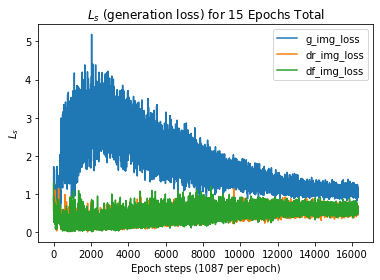

In [234]:
set=['g_img_loss','dr_img_loss','df_img_loss']
plt.figure()
for s in set:
     selected_data = hist[s]
     plt.plot(selected_data ,label=s)
plt.title(r'$L_s$ (generation loss) for 15 Epochs Total')
plt.xlabel('Epoch steps (1087 per epoch)')
plt.ylabel(r'$L_s$')     
plt.legend()
plt.show()


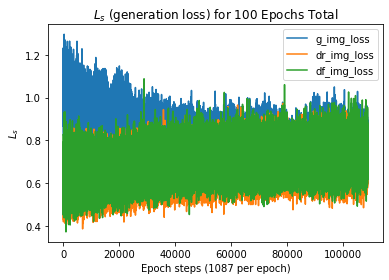

In [235]:
set=['g_img_loss','dr_img_loss','df_img_loss']
plt.figure()
for s in set:
     selected_data = histt[s]
     plt.plot(selected_data ,label=s)
plt.title(r'$L_s$ (generation loss) for 100 Epochs Total')
plt.xlabel('Epoch steps (1087 per epoch)')
plt.ylabel(r'$L_s$')     
plt.legend()
plt.show()

Label Classification Loss History:
- show if loss associated with the discriminator getting the correct label
- show if discriminator and generator loss reach stable congruence point

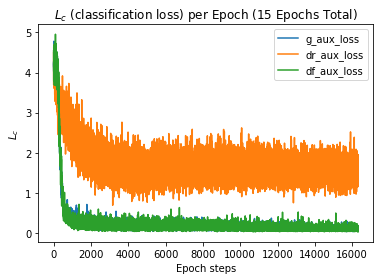

In [224]:
cset=['g_aux_loss','dr_aux_loss','df_aux_loss']
plt.figure()
for s in cset:
     selected_data = hist[s]
     plt.plot(selected_data ,label=s)
plt.title(r'$L_c$ (classification loss) per Epoch (15 Epochs Total)')
plt.xlabel('Epoch steps')
plt.ylabel(r'$L_c$')     
plt.legend()
plt.show()

The generator loss is harder too see when plotting all losses together. A seperate plot was generated to observe loss decrease.

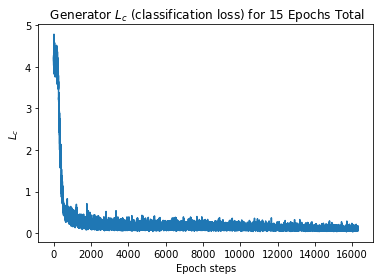

In [229]:
plt.title(r' Generator $L_c$ (classification loss) for 15 Epochs Total')
plt.xlabel('Epoch steps')
plt.ylabel(r'$L_c$')   
plt.plot(hist['g_aux_loss'])

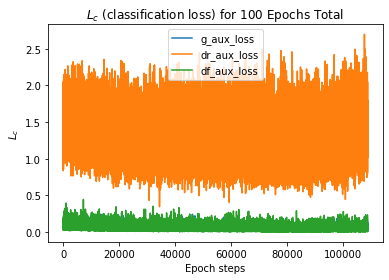

In [230]:
cset=['g_aux_loss','dr_aux_loss','df_aux_loss']
plt.figure()
for s in cset:
     selected_data = histt[s]
     plt.plot(selected_data ,label=s)
plt.title(r'$L_c$ (classification loss) for 100 Epochs Total')
plt.xlabel('Epoch steps')
plt.ylabel(r'$L_c$')          
plt.legend()
plt.show()

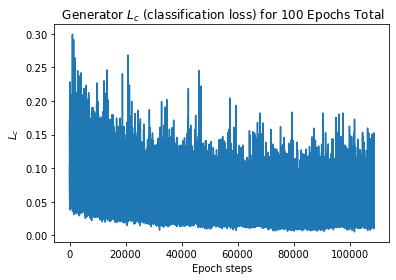

In [231]:
plt.title(r' Generator $L_c$ (classification loss) for 100 Epochs Total')
plt.xlabel('Epoch steps')
plt.ylabel(r'$L_c$')   
plt.plot(histt['g_aux_loss'])

During training, a plot of 100 random generated images where saved at each epoch. Found under history logs 

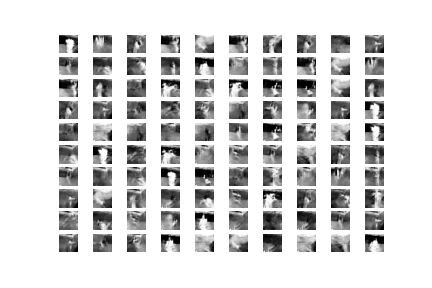

In [297]:
from PIL import Image
#first epoch from 100 epochs trained 
im = Image.open('generated_plot_100004.png')
im

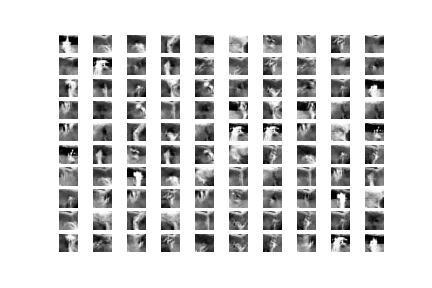

In [299]:
#100 epoch from 100 epochs trained 
im_l = Image.open('generated_plot_98917.png' )
im_l

## Example of Generated Images Conditioned on Label

In [300]:
from math import sqrt
from numpy import asarray
from numpy.random import randn
from keras.models import load_model

 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_class):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = asarray([n_class for _ in range(n_samples)])
    return [z_input, labels]
 
# create  plot of generated images
def create_plot(examples, n_examples):
    # plot images
    n =int(sqrt(n_examples))
    #fig = plt.figure(figsize=(n,n))
           
    for i in range(n_examples):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()
    
def get_real_ex(df, clabel):
    og = df.loc[df['label'] == clabel]
    ogpath = og.iloc[0]["path"]
    
    shape= (200,200)
    exampleC = get_image(ogpath, shape)

    plt.figure()
    plt.title("EX Image of "+clabel)
    plt.imshow(exampleC)
    plt.grid(False)
    plt.show() 

#### I observed how a real and generated image compared for letter C:

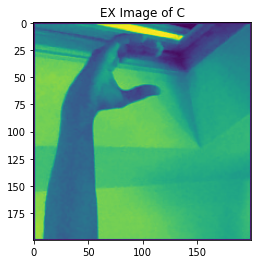

In [262]:
 get_real_ex(df, clabel="C")

Note: Image above is example of letter C before dimmensions where downsized

In [279]:
latent_dim = 100
n_examples = 100 # must be a square
n_class = 2 # letter C [0,1,2,...] for [A,B,C,....]
# generate images
latent_points, labels = generate_latent_points(latent_dim, n_examples, n_class)

#### At 15 epochs during first attempt

In [281]:
#with 15 epochs
model_15 = load_model(latest_15)
# generate images
X_15  = model_15.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X_15 = (X + 1) / 2.0

2022-04-06 15:37:34.447159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


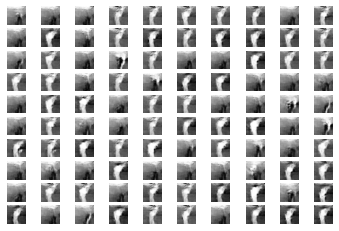

In [302]:
create_plot(X_15, n_examples)

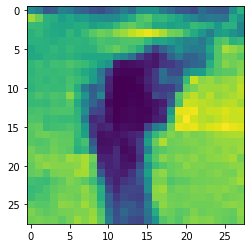

In [307]:
plt.imshow(X_15[99])

#### At 100 epochs during second attempt

In [283]:
#with 100 epochs
model_100 = load_model(latest)
# generate images
latent_points, labels = generate_latent_points(latent_dim, n_examples, n_class)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

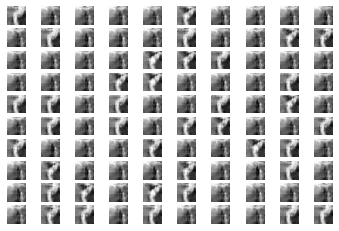

In [181]:
# plot the result
create_plot(X, n_examples)

In [204]:
X[0].shape

(28, 28, 1)

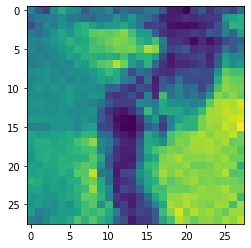

In [308]:
plt.imshow(X[99])

## Resources

- [Understanding better the networks used in a DCGAN using MNIST grayscale](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/dcgan.ipynb#scrollTo=k6qC-SbjK0yW)
- [How to build ACGAN from scratch](https://machinelearningmastery.com/how-to-develop-an-auxiliary-classifier-gan-ac-gan-from-scratch-with-keras/)
- [Builing ACGAN with color images from Dog Breed Dataset](https://www.kaggle.com/cdeotte/dog-breed-acgan-lb-52/notebook)
-[Building ACGAN using MNIST](https://www.kaggle.com/amyjang/tensorflow-mnist-acgan-tutorial)
-[Building ACGAN different way using MNIST](https://github.com/lukedeo/keras-acgan/blob/master/mnist_acgan.py)
